# 260320_Cartopy 

https://piratefache.ch/real-time-tweets-with-tweepy-and-cartopy/

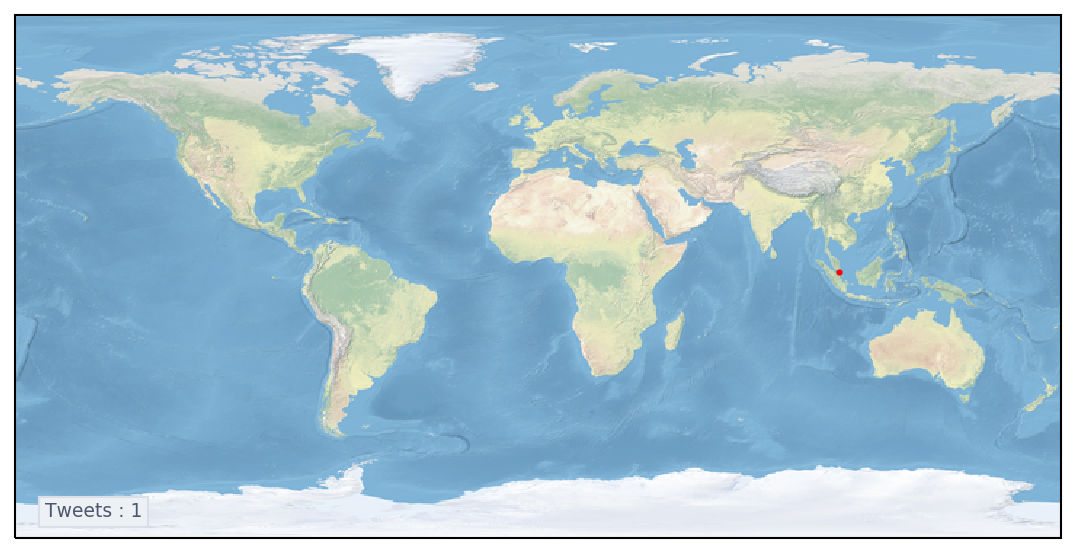

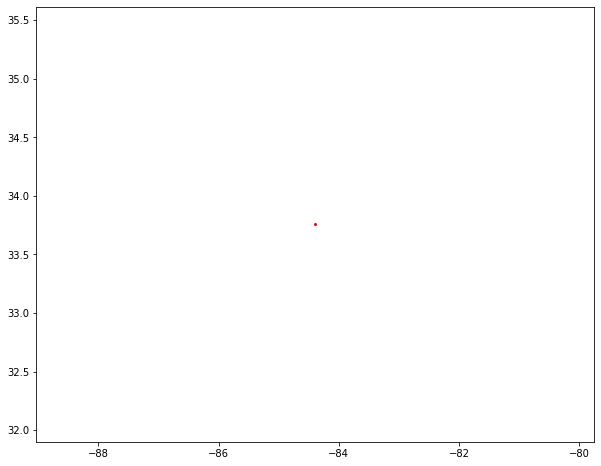

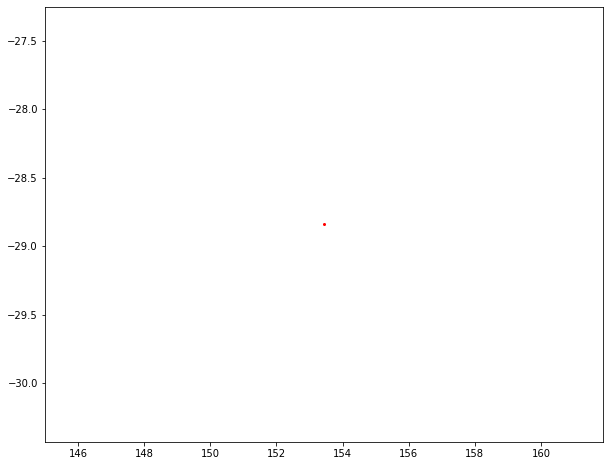

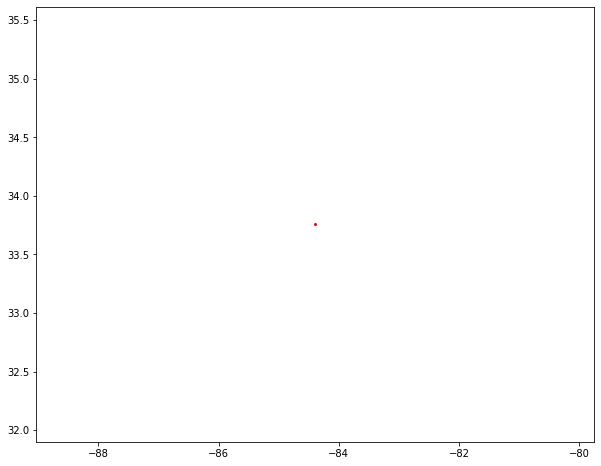

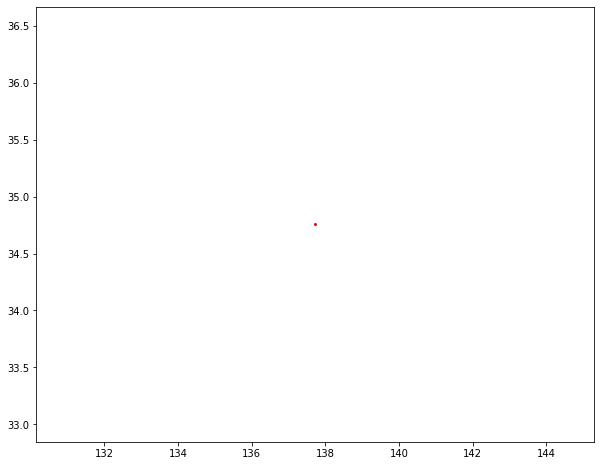

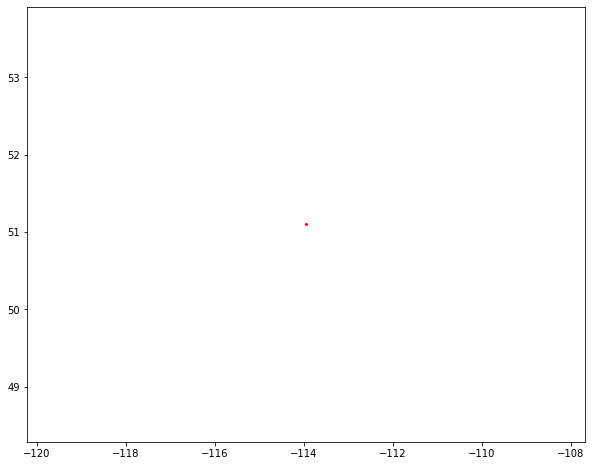

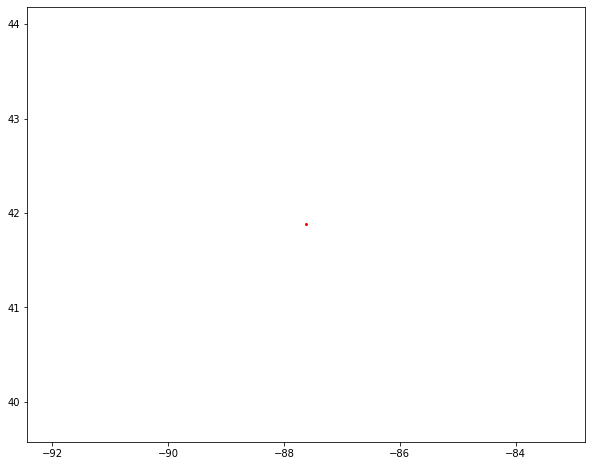

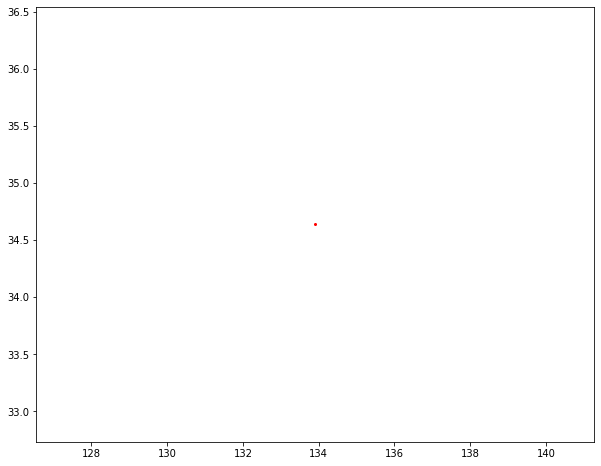

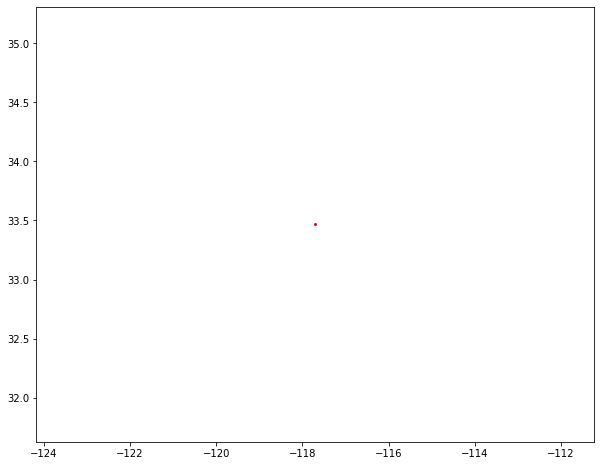

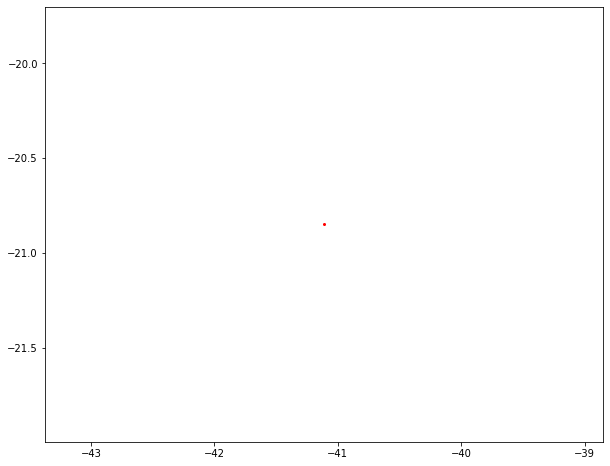

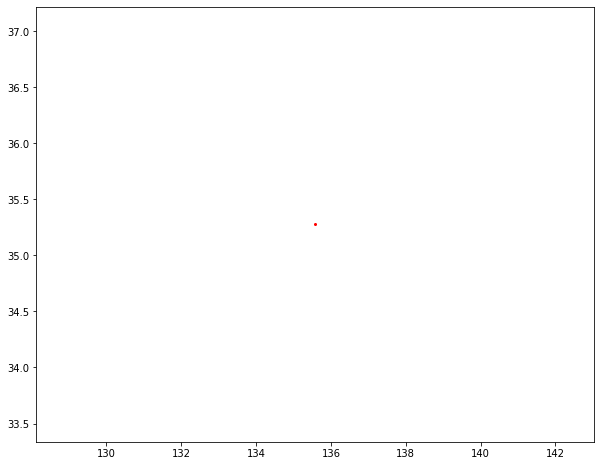

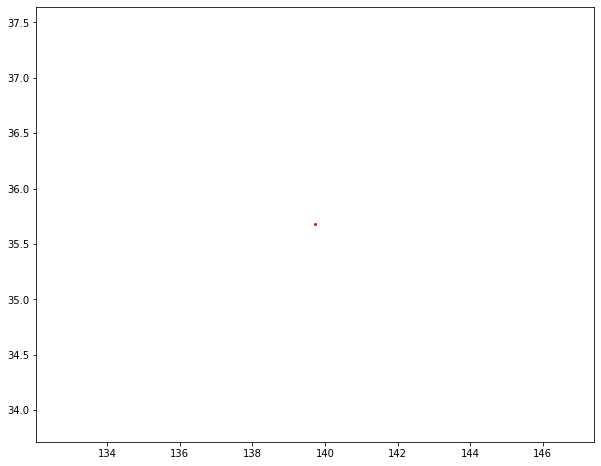

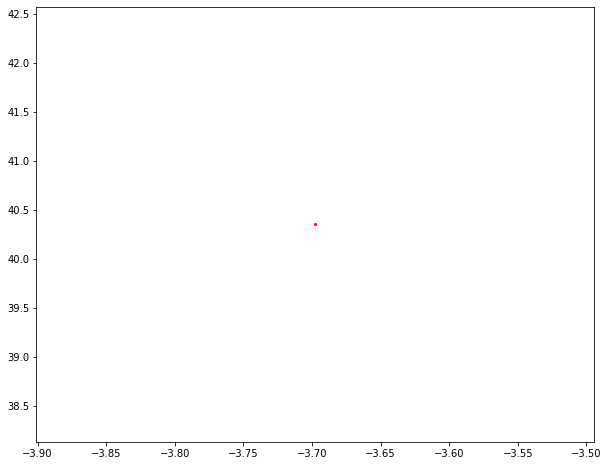

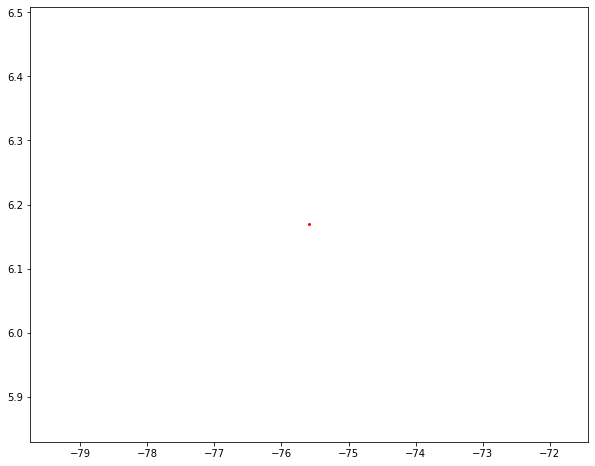

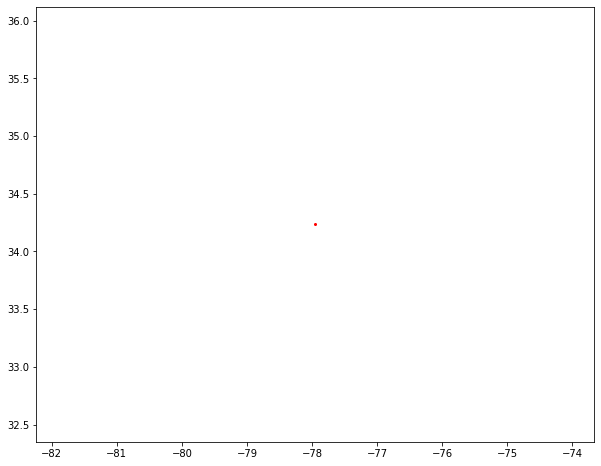

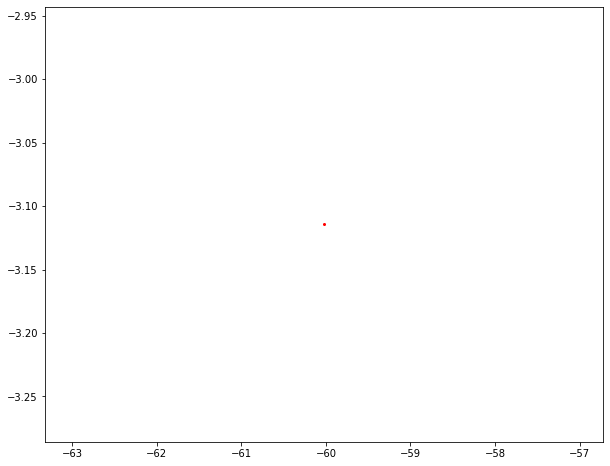

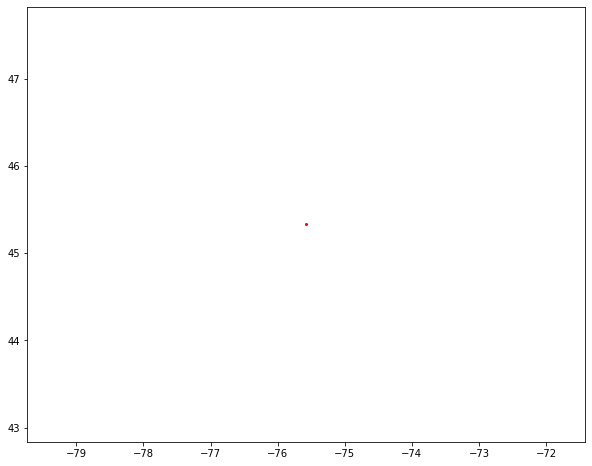

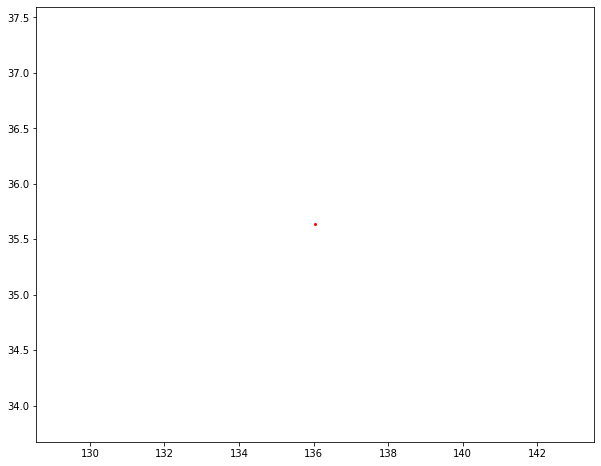

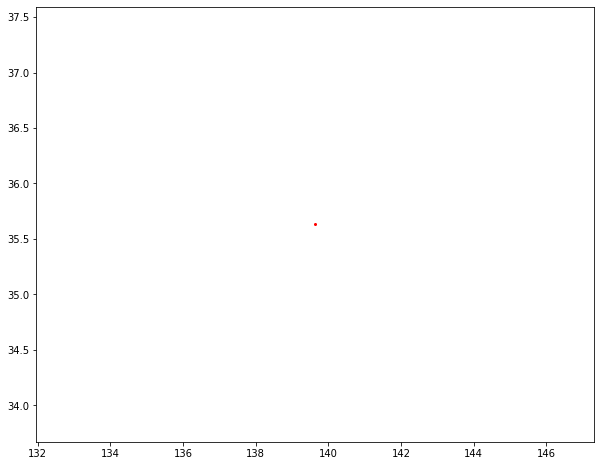

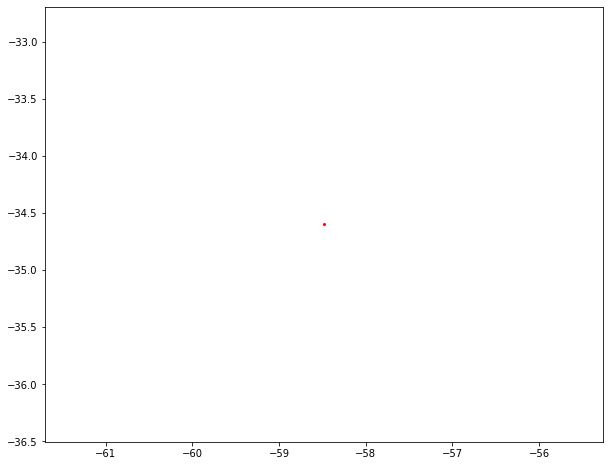

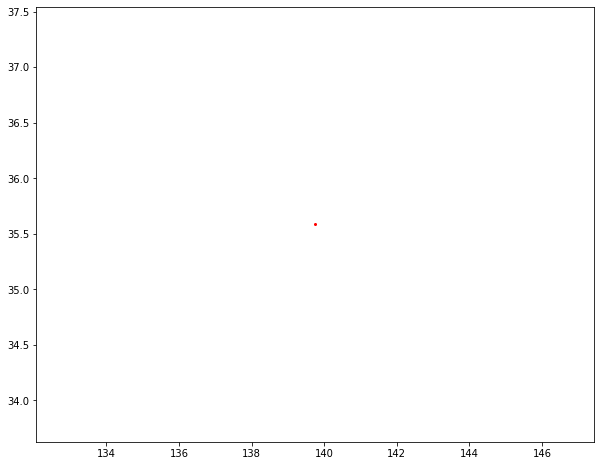

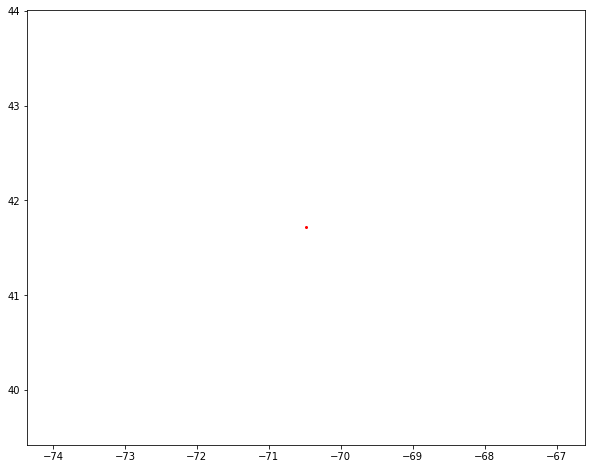

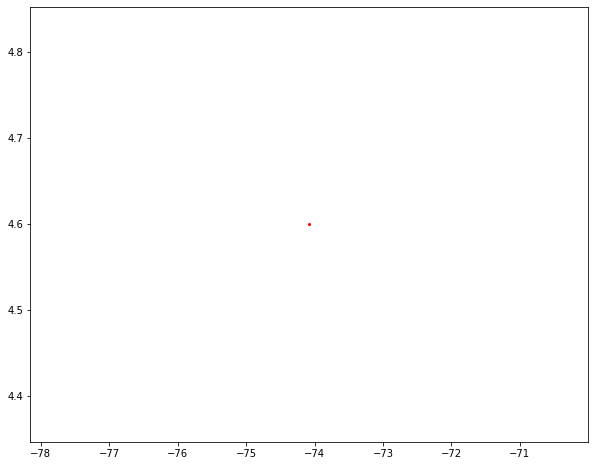

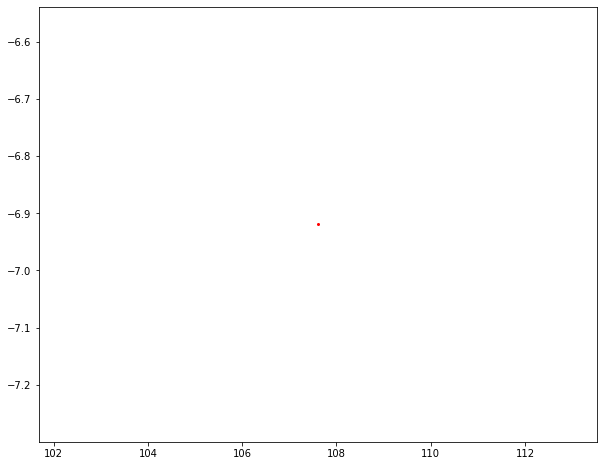

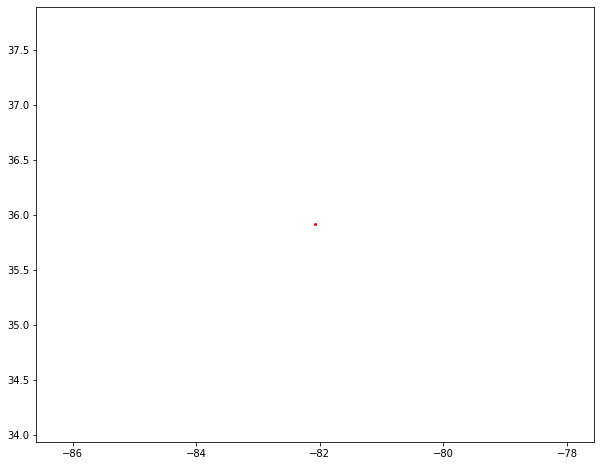

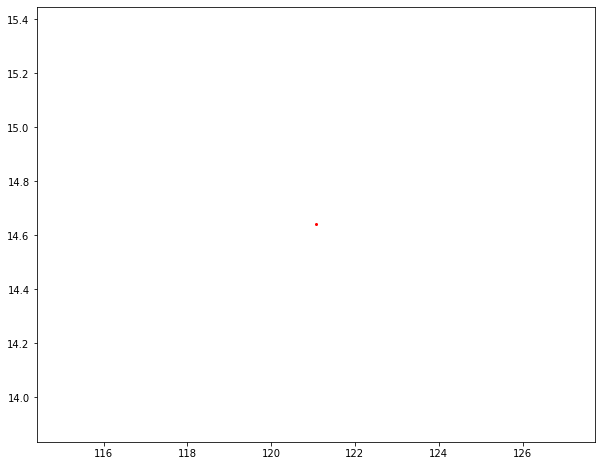

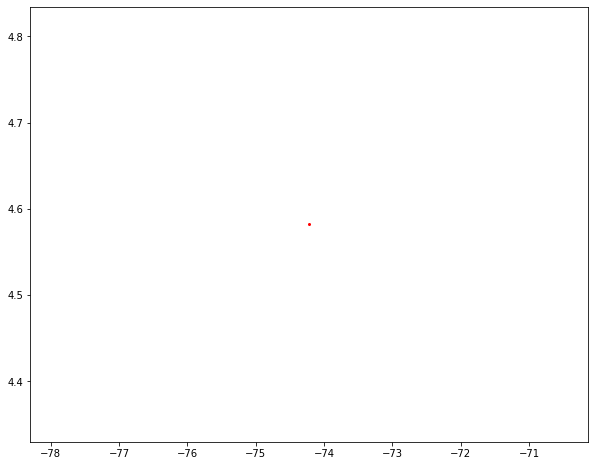

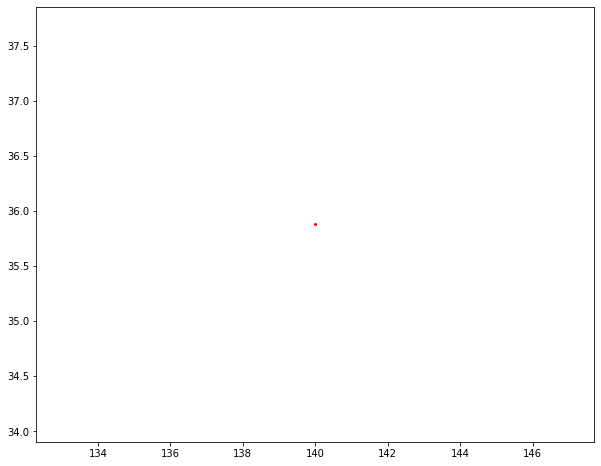

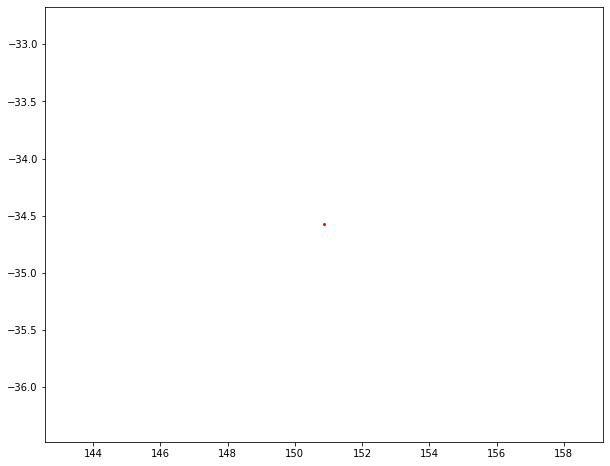

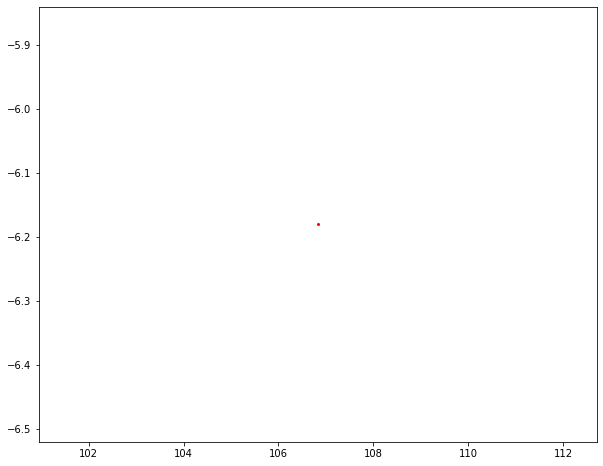

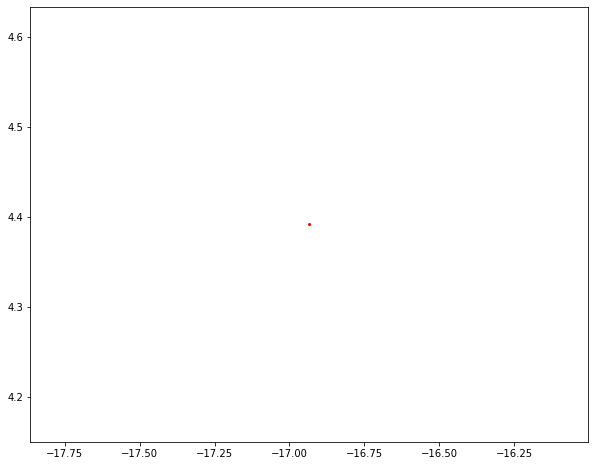

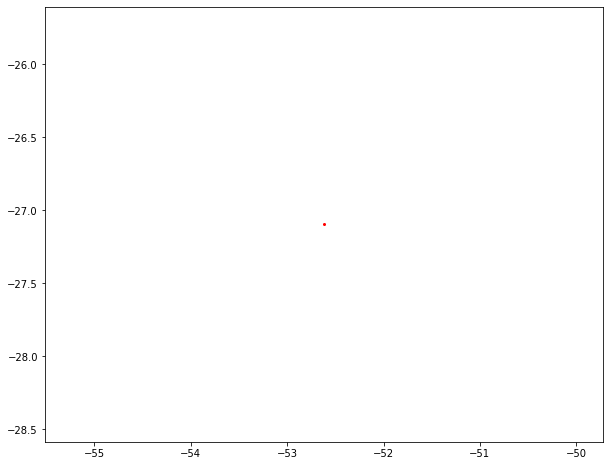

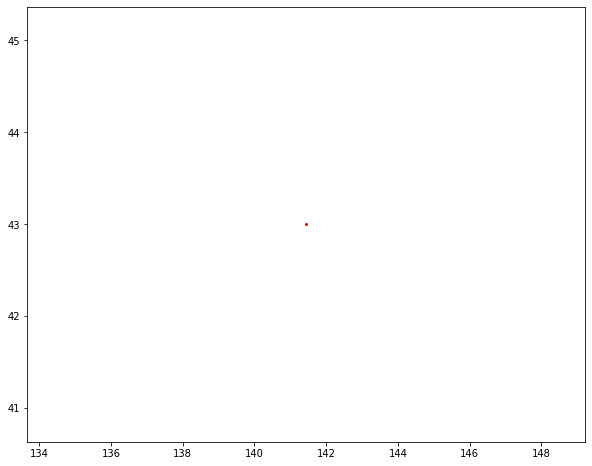

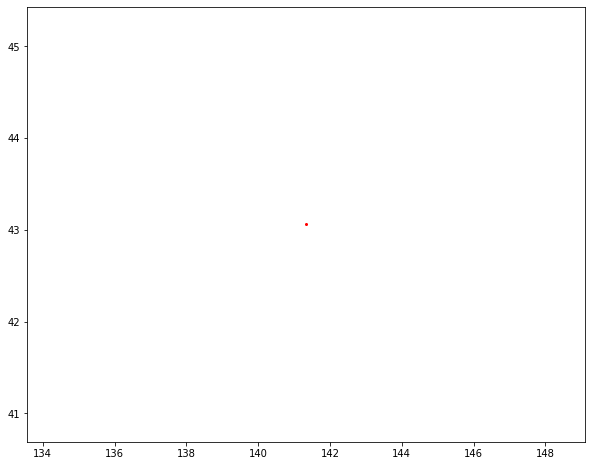

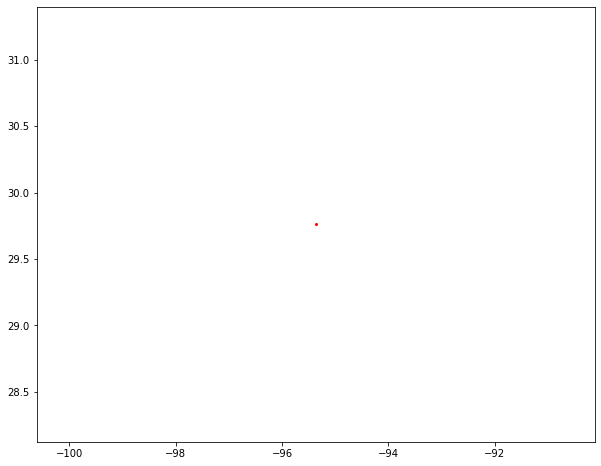

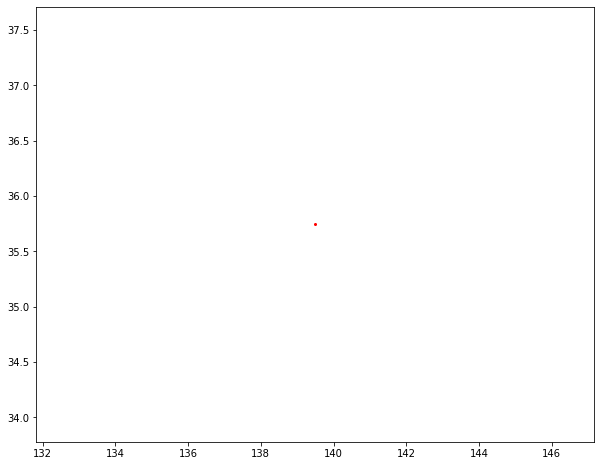

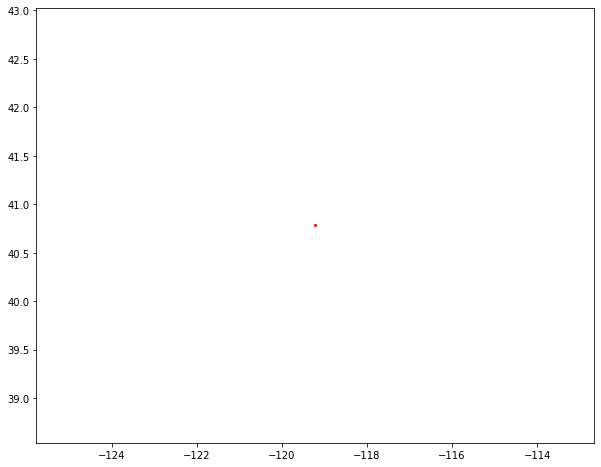

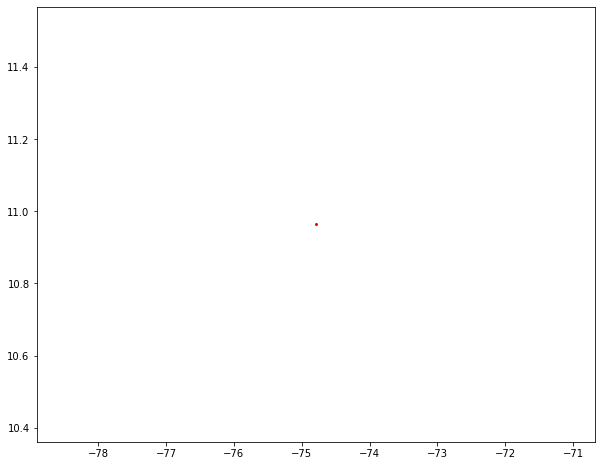

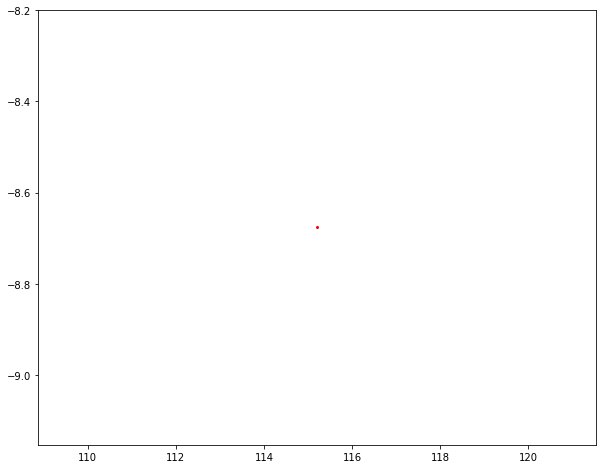

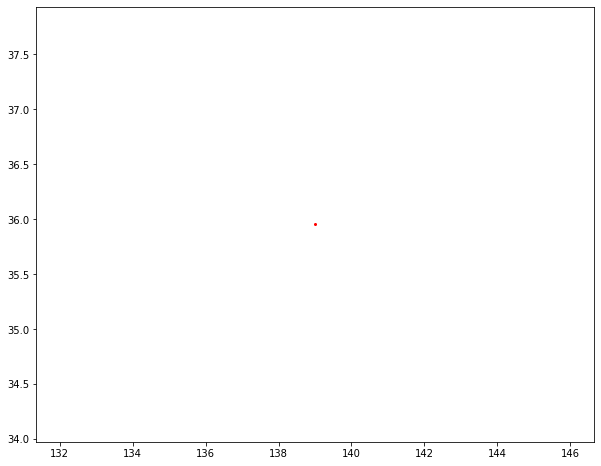

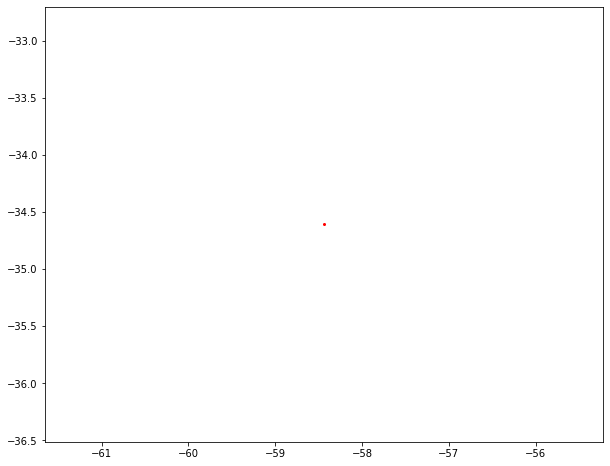

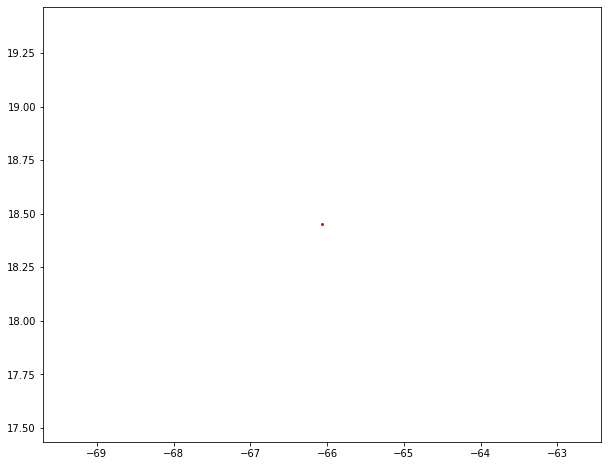

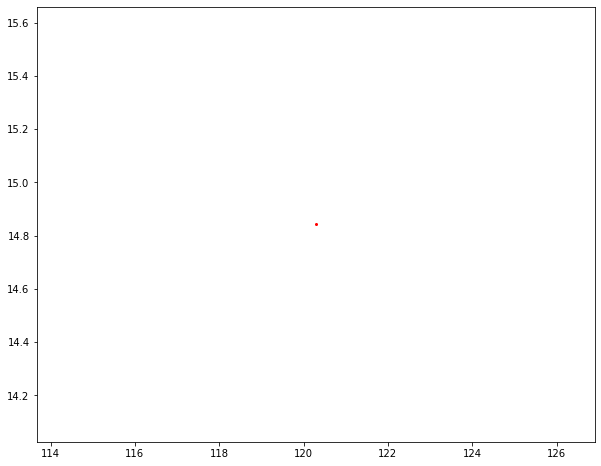

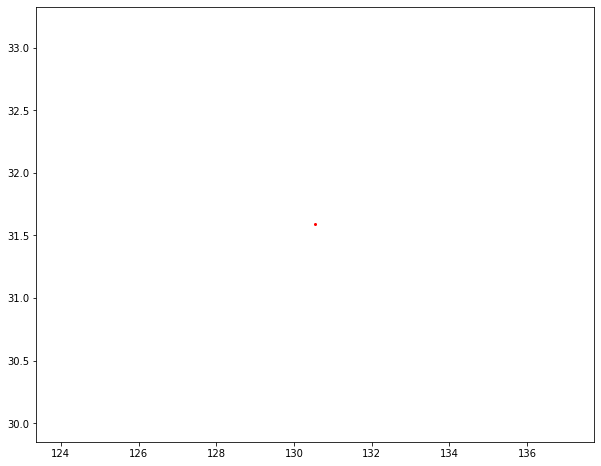

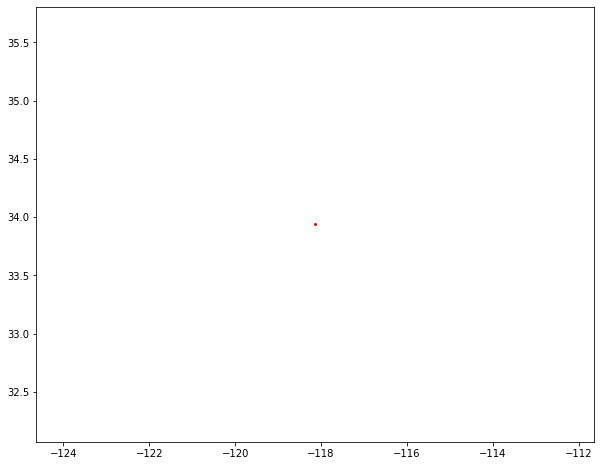

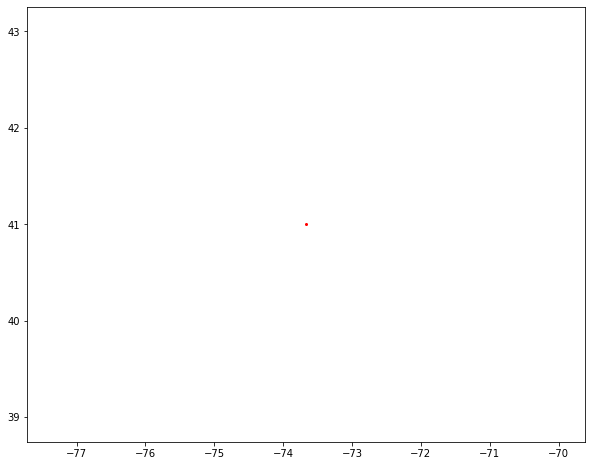

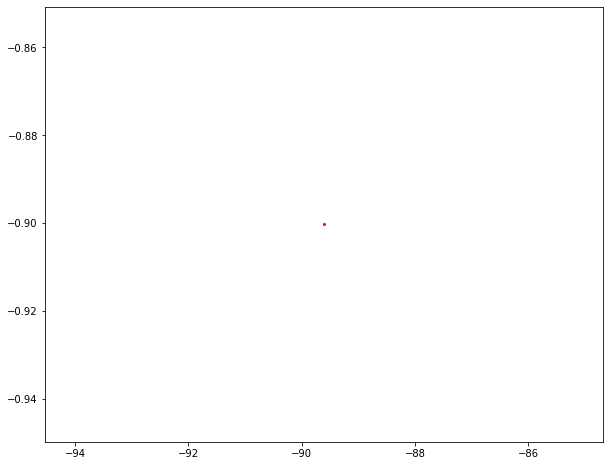

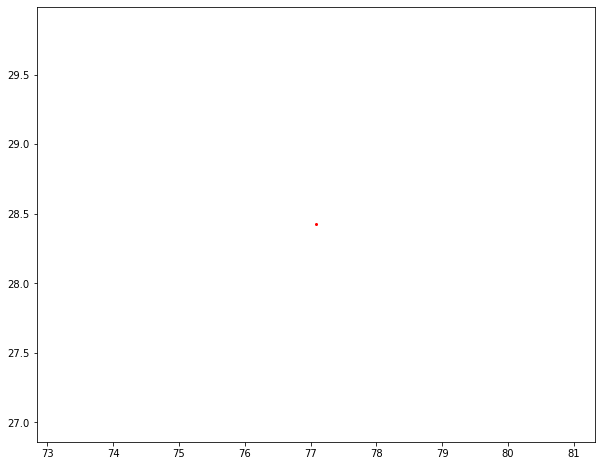

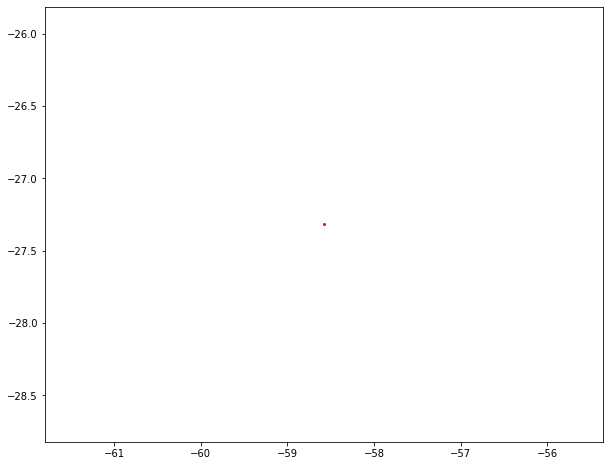

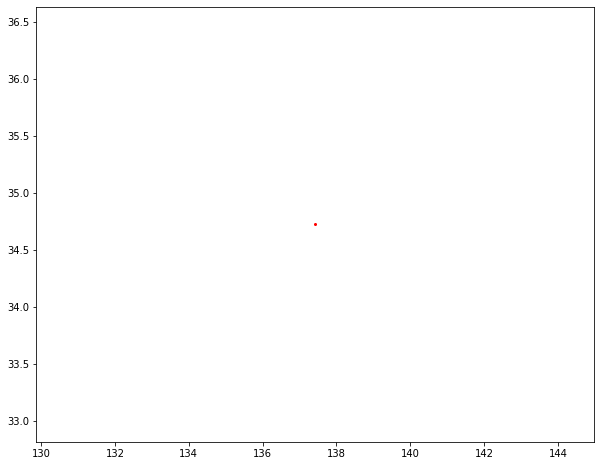

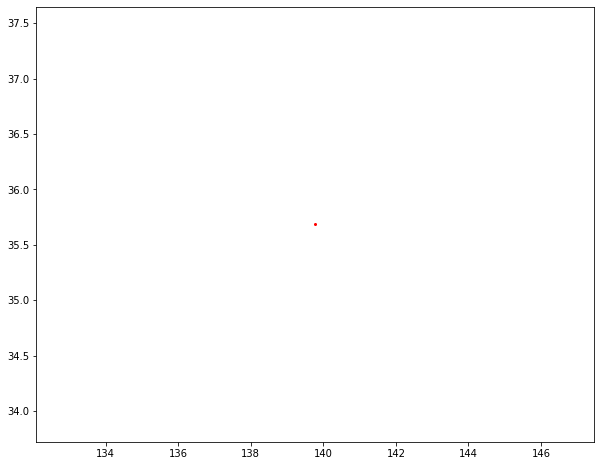

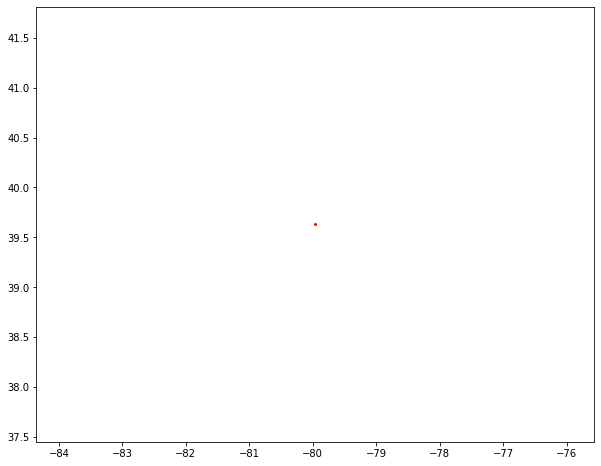

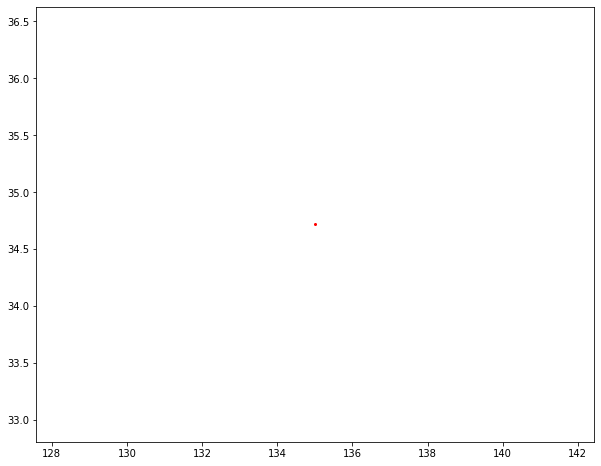

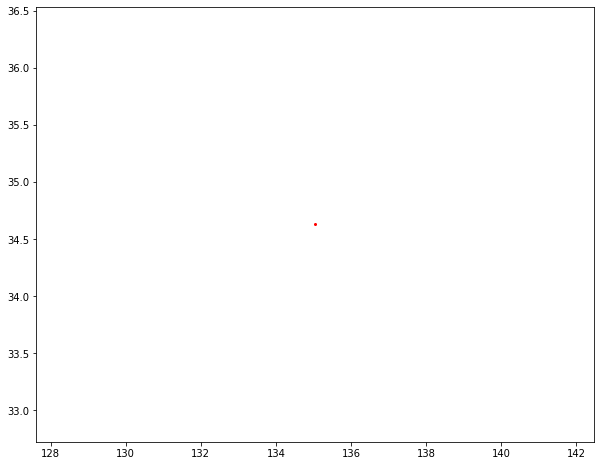

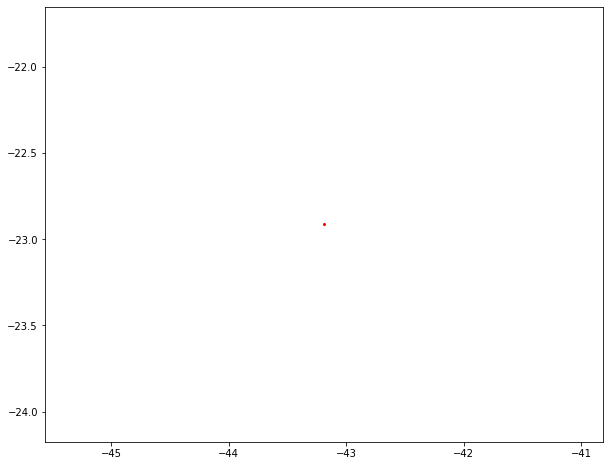

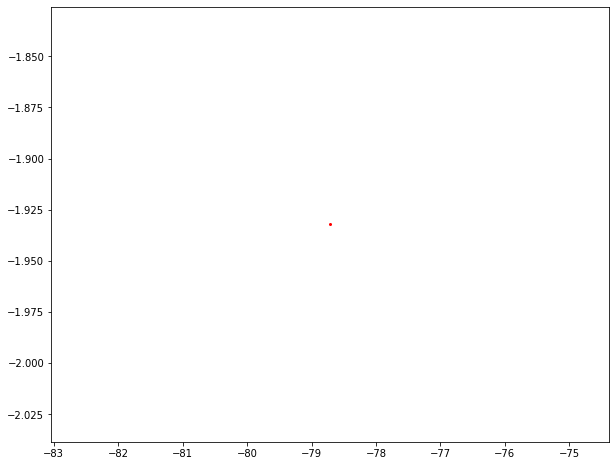

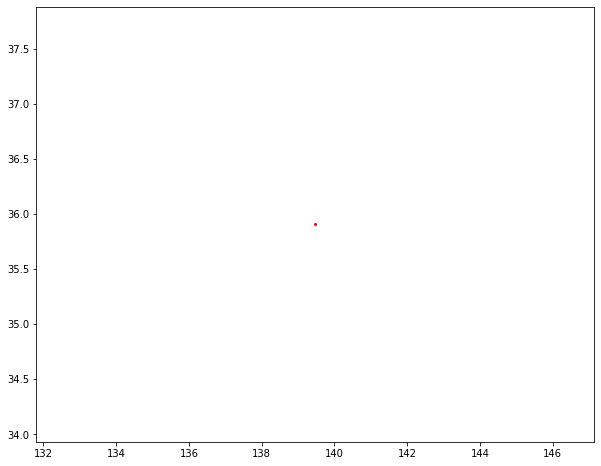

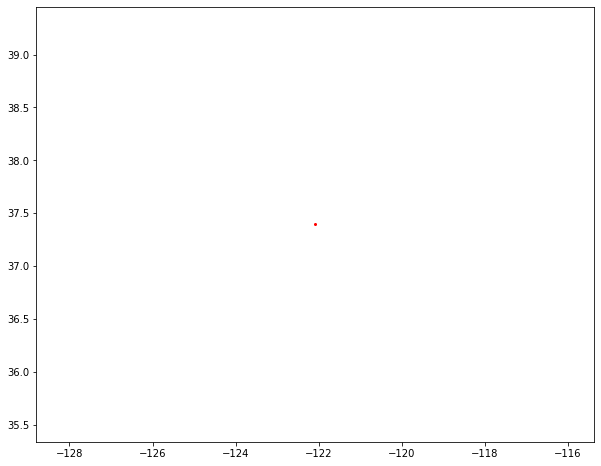

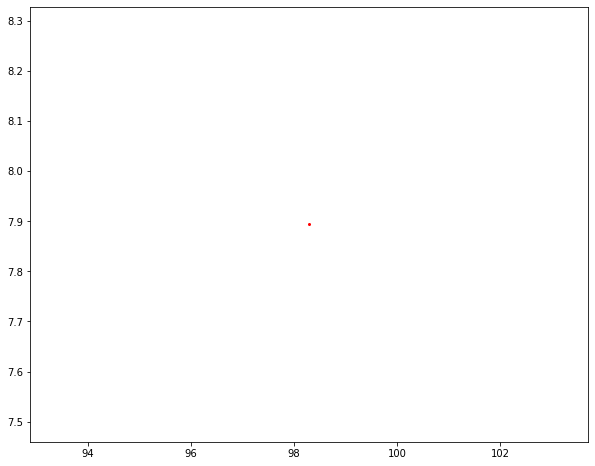

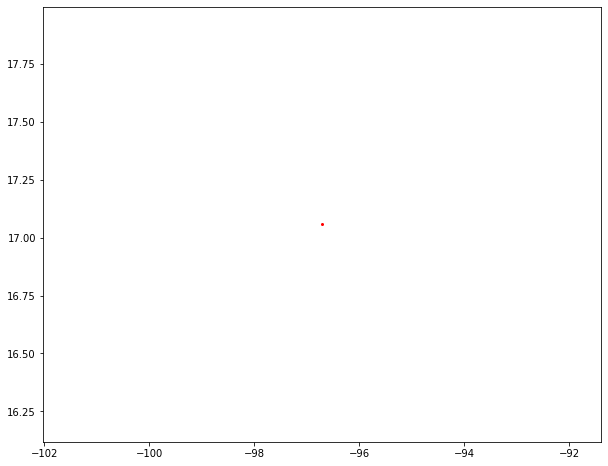

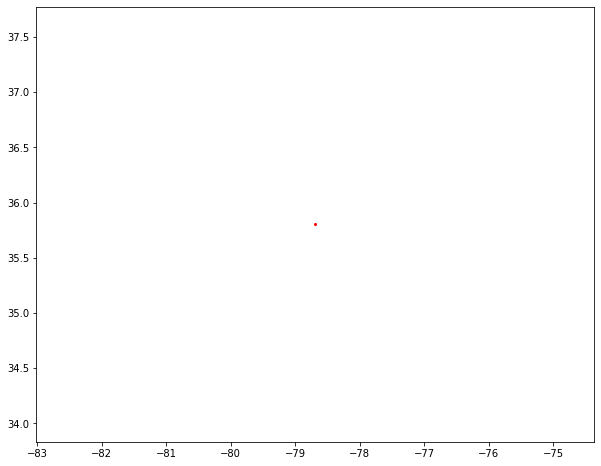

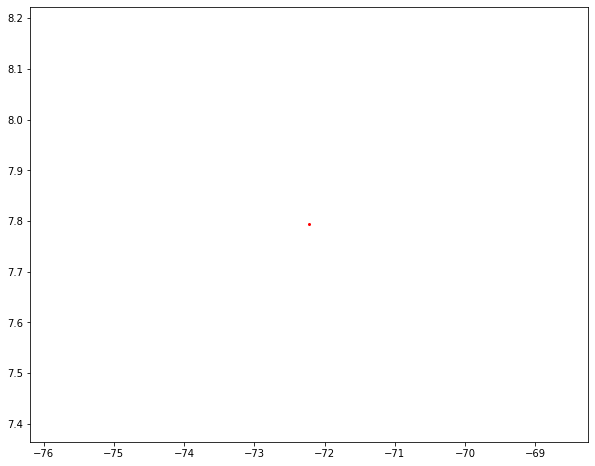

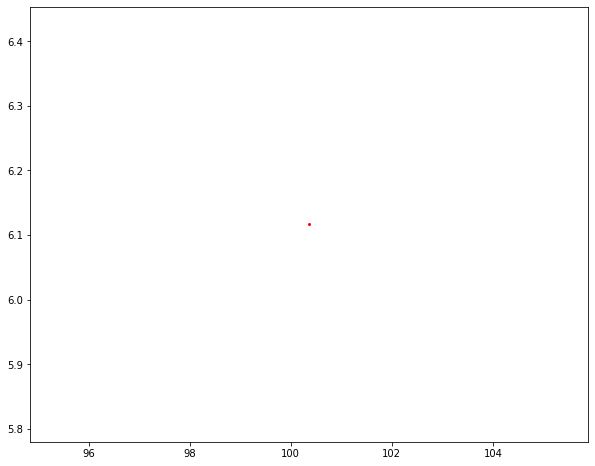

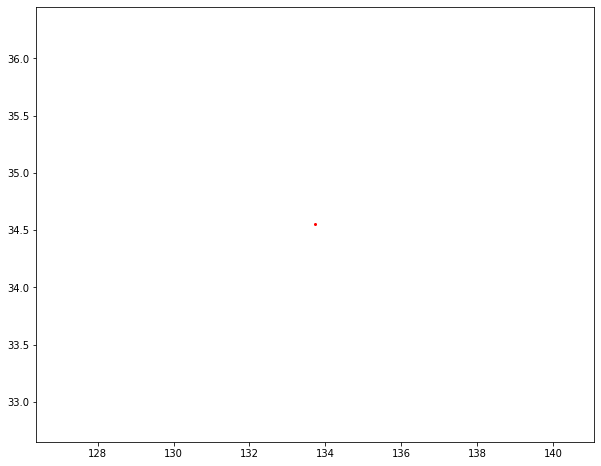

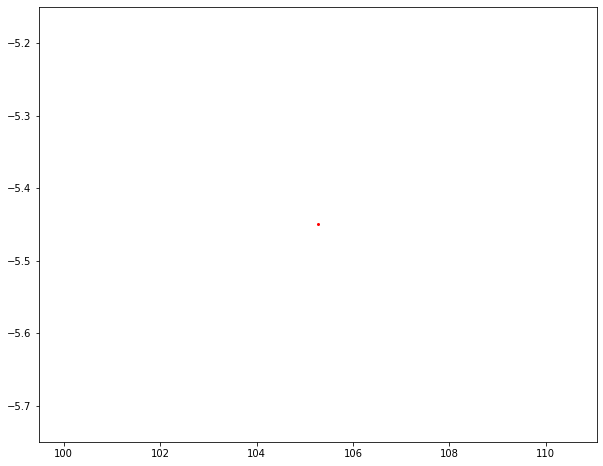

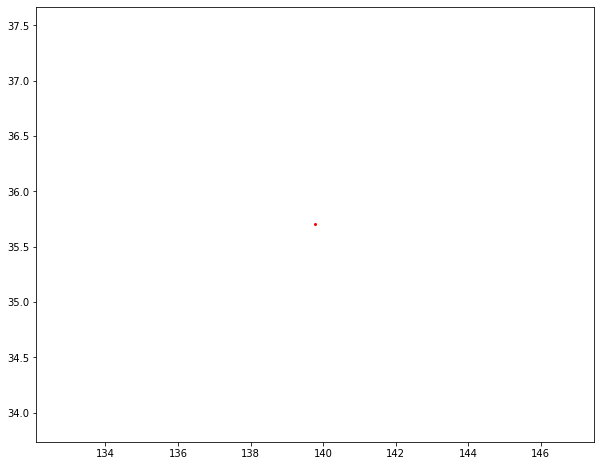

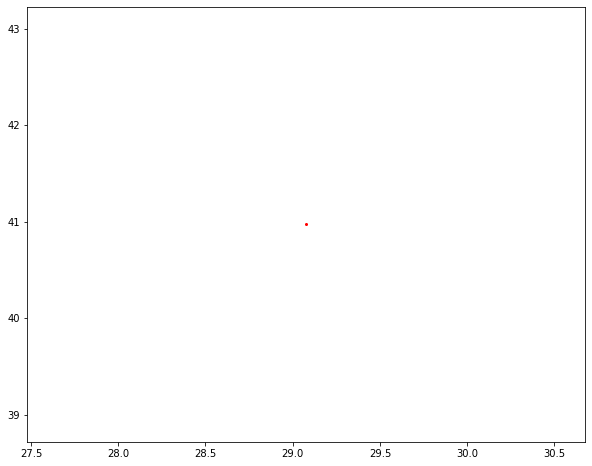

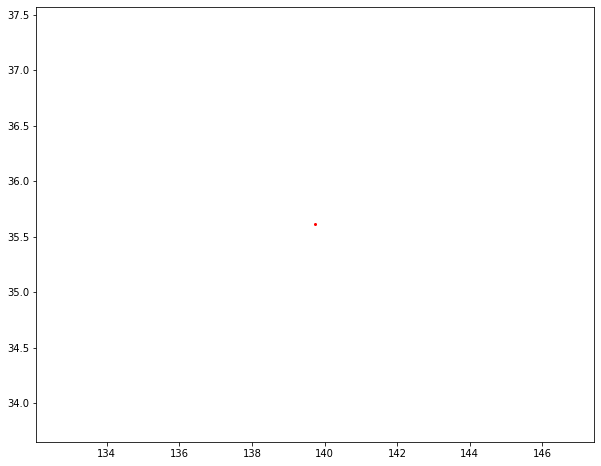

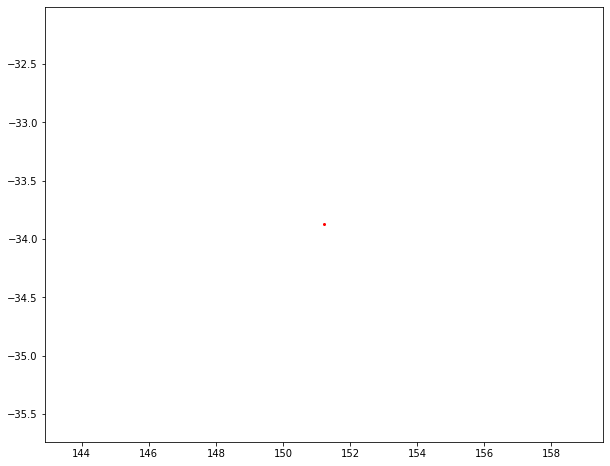

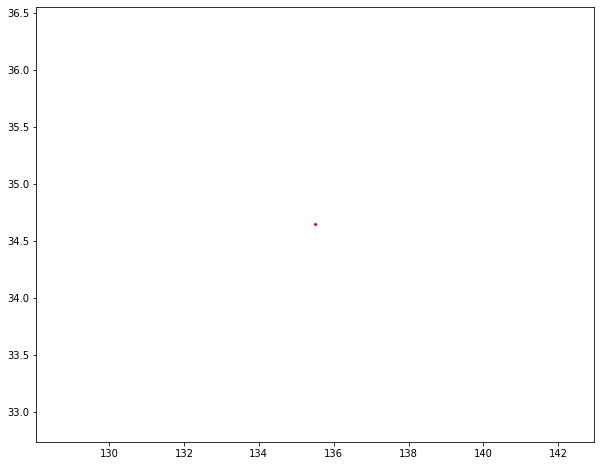

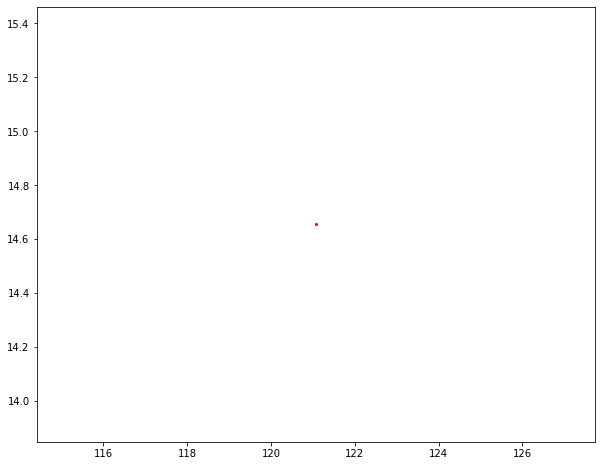

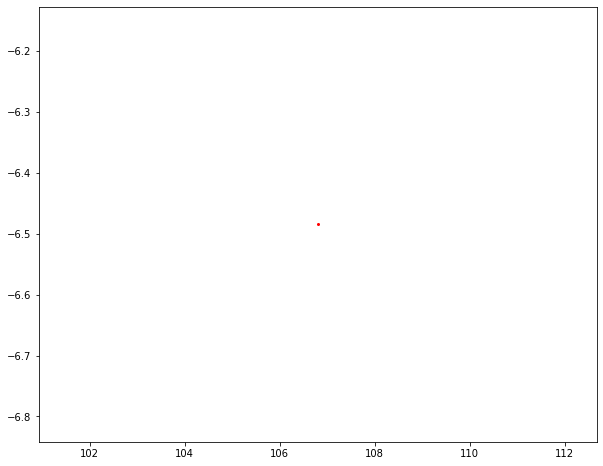

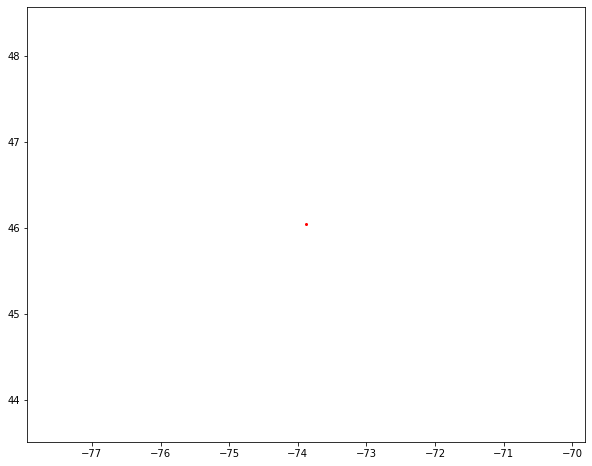

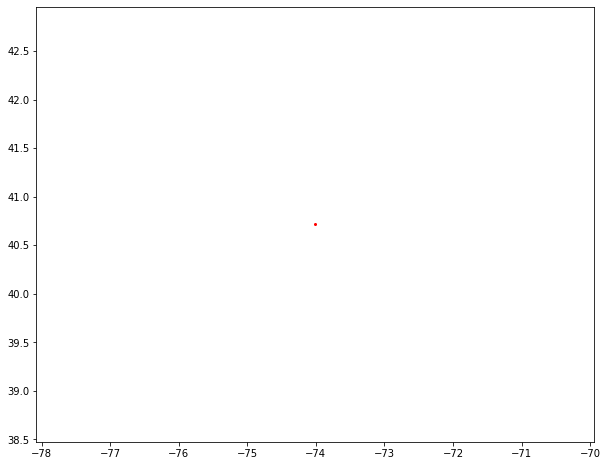

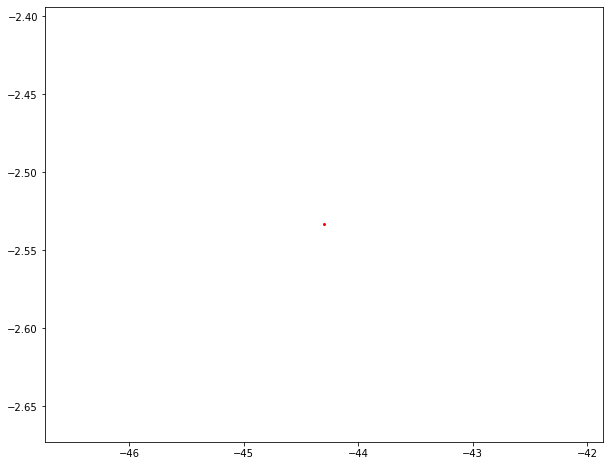

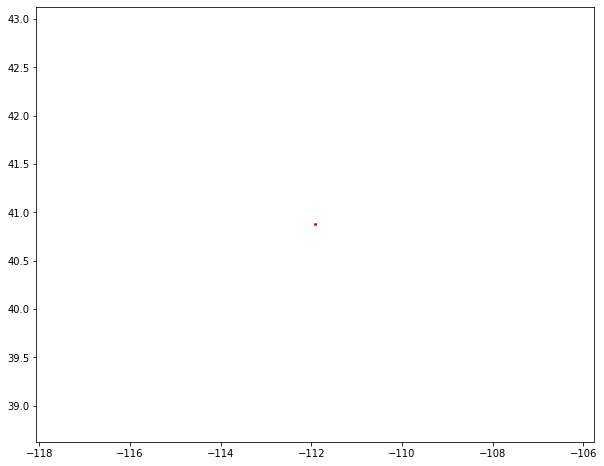

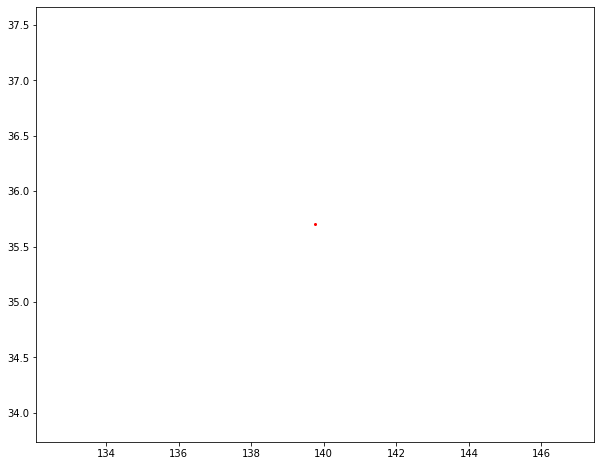

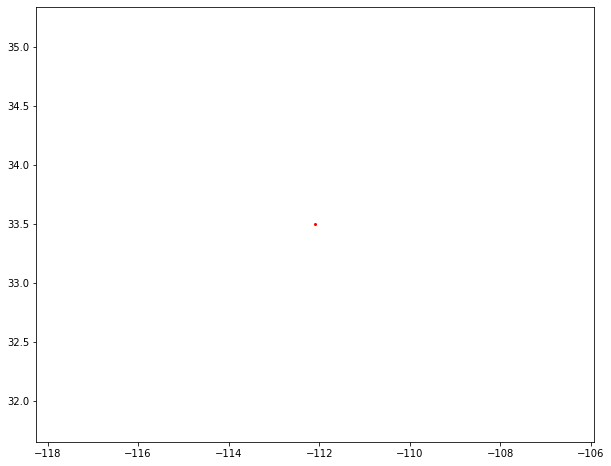

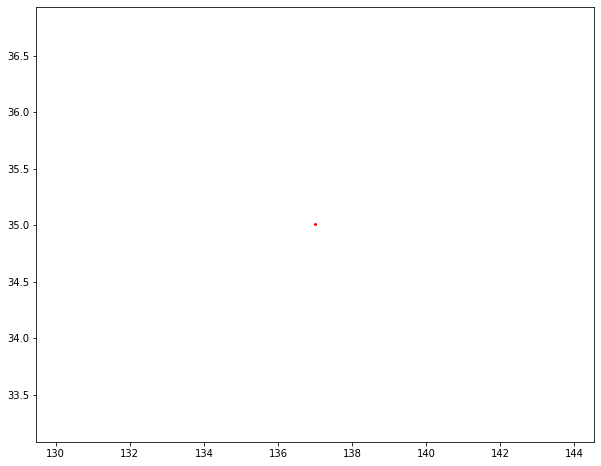

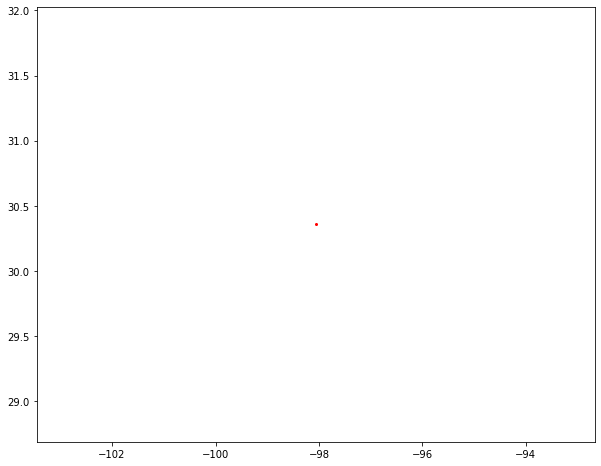

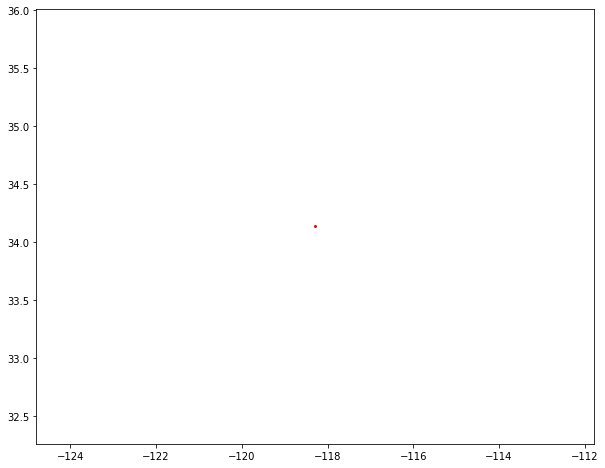

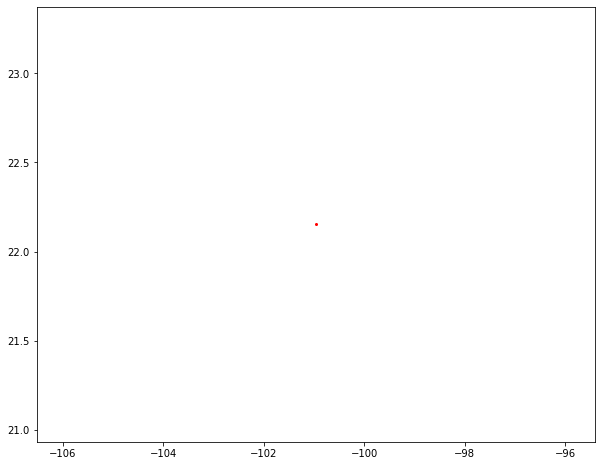

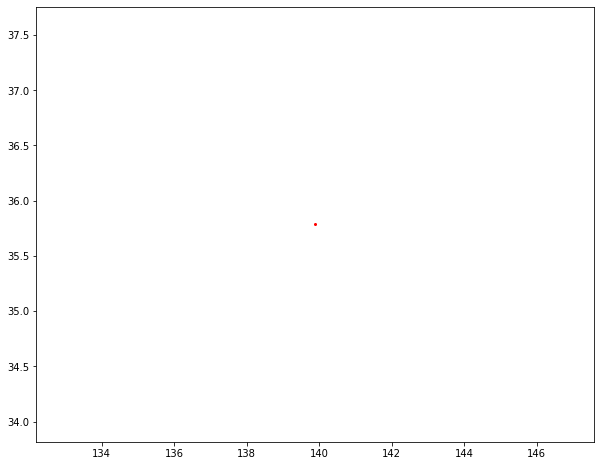

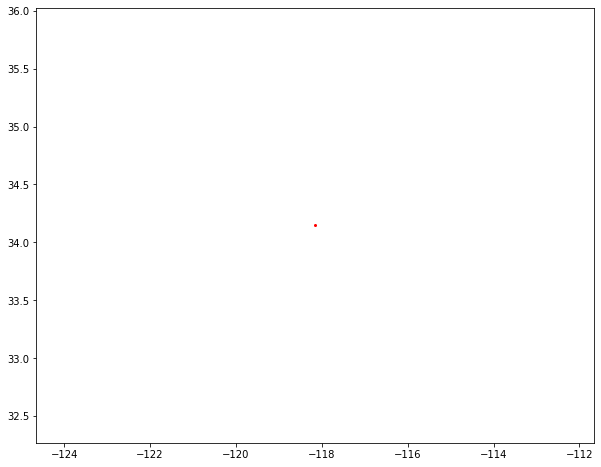

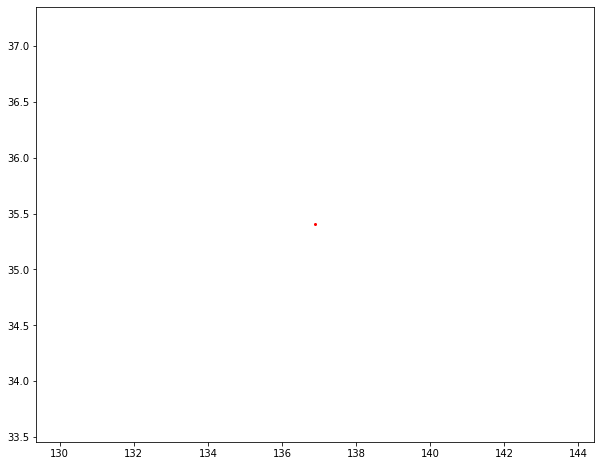

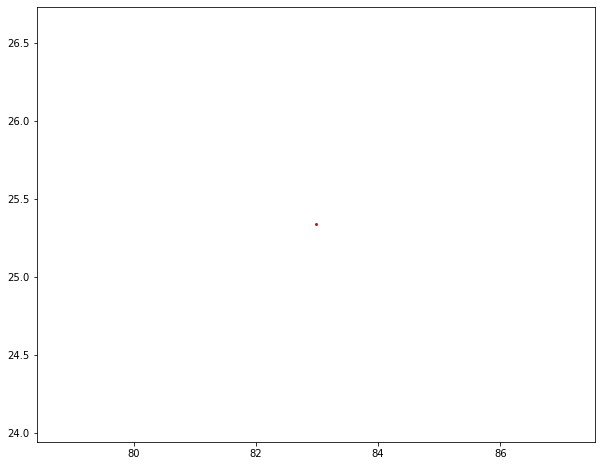

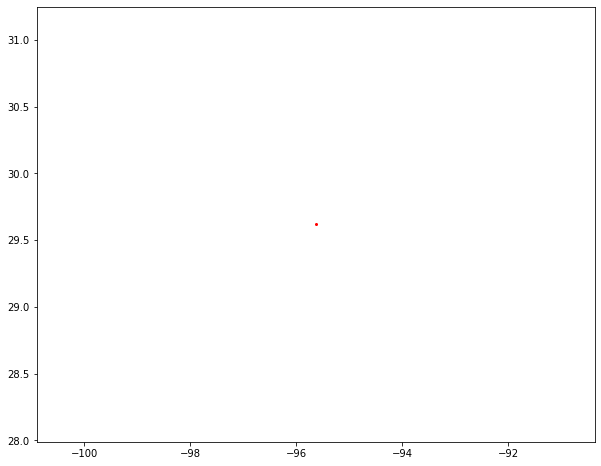

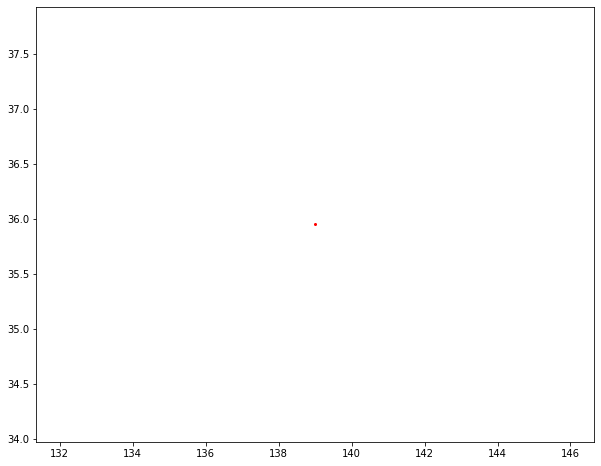

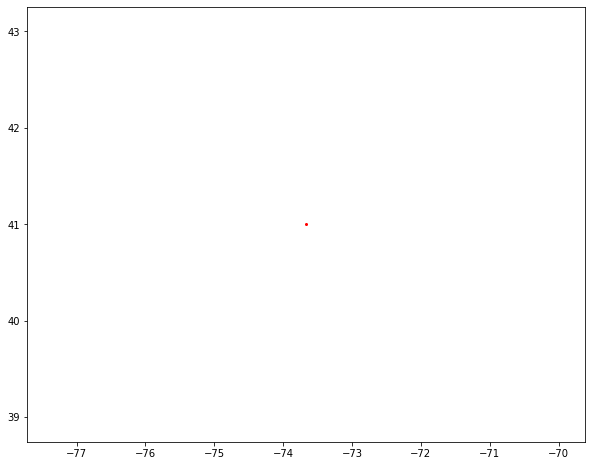

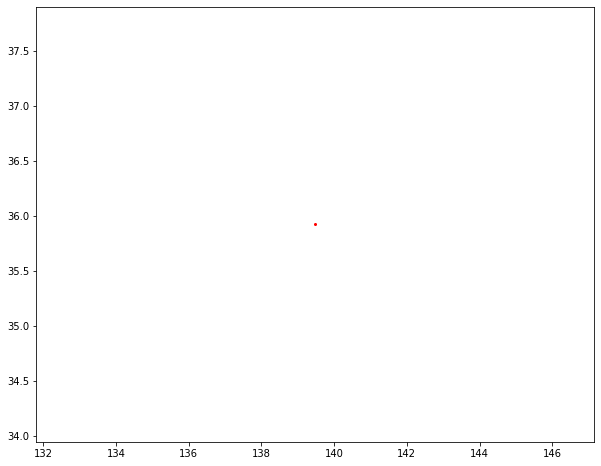

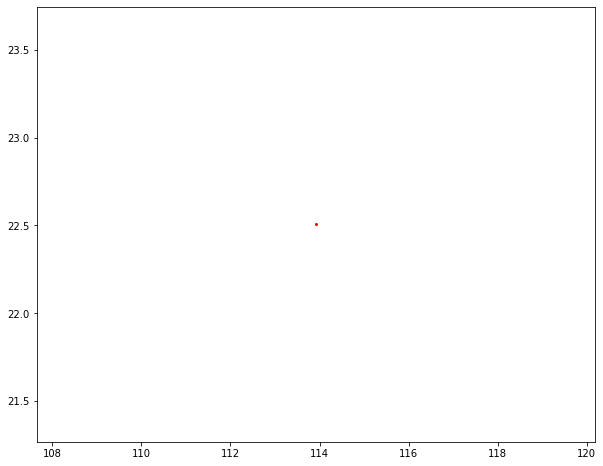

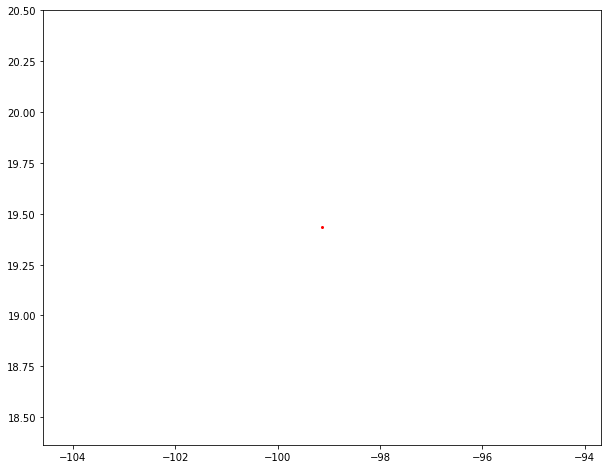

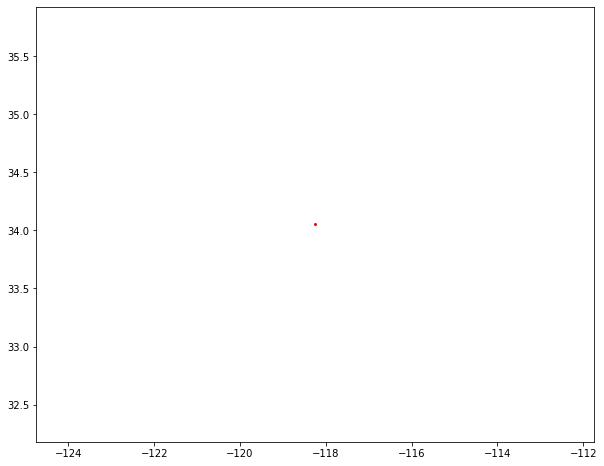

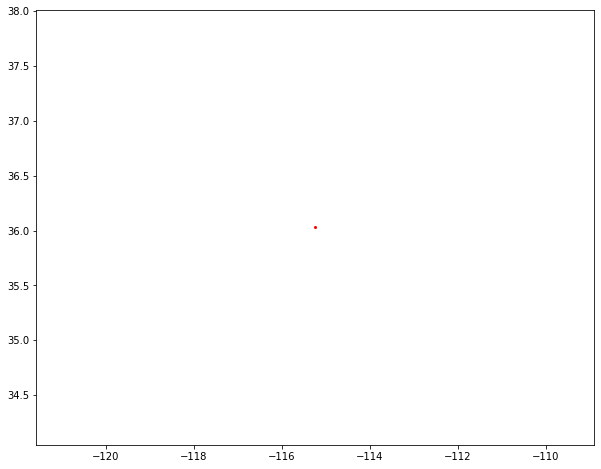

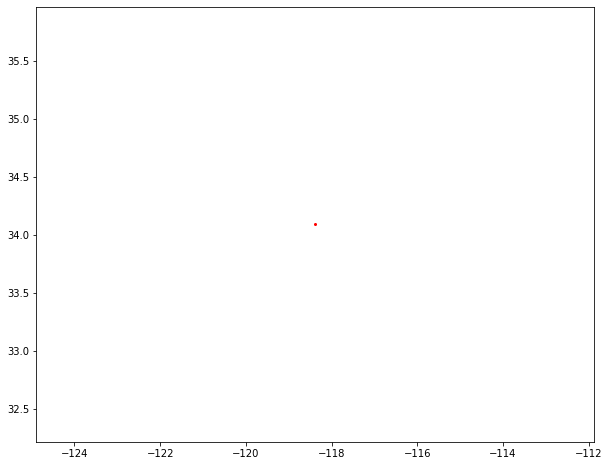

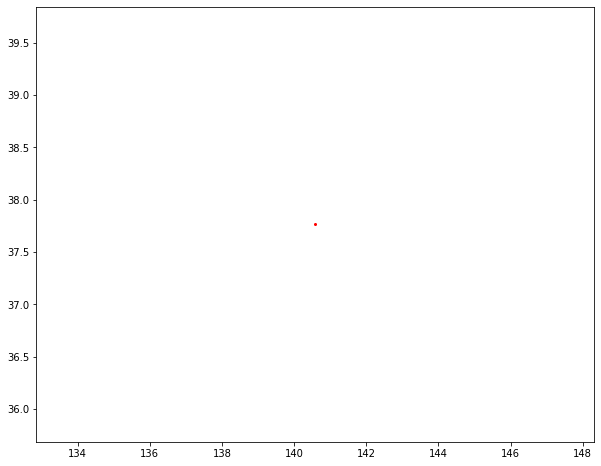

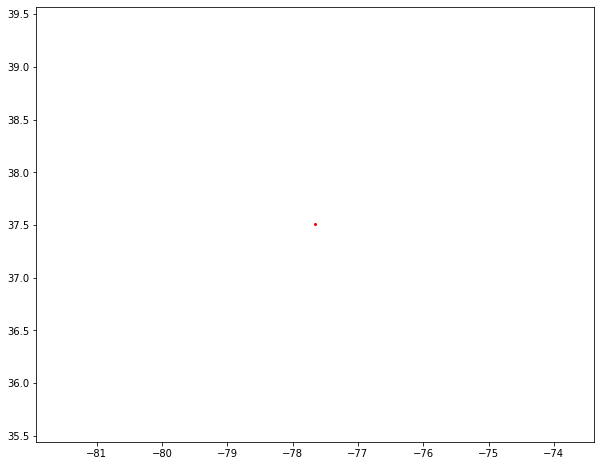

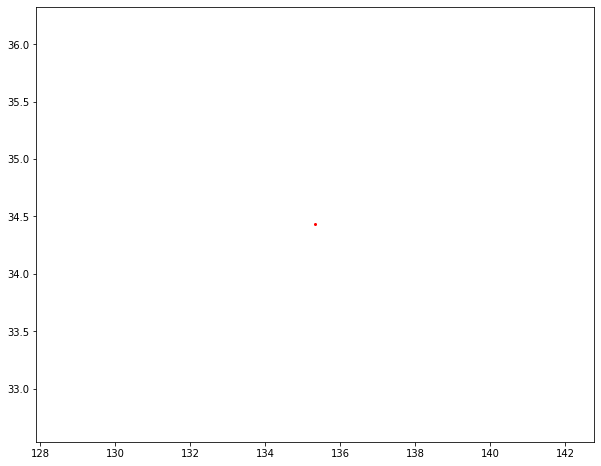

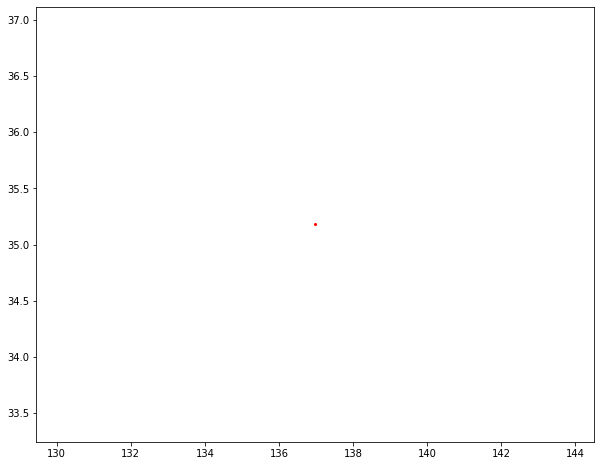

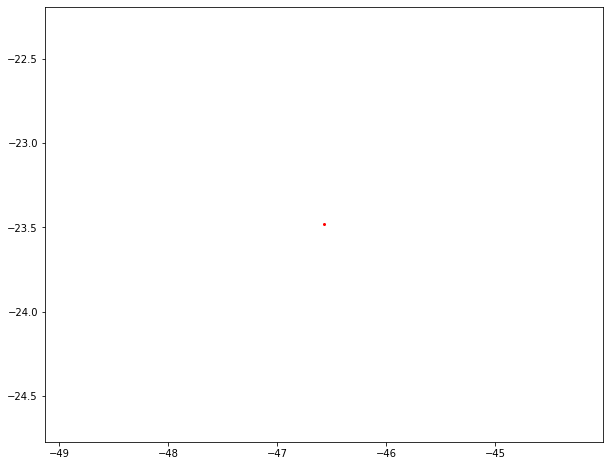

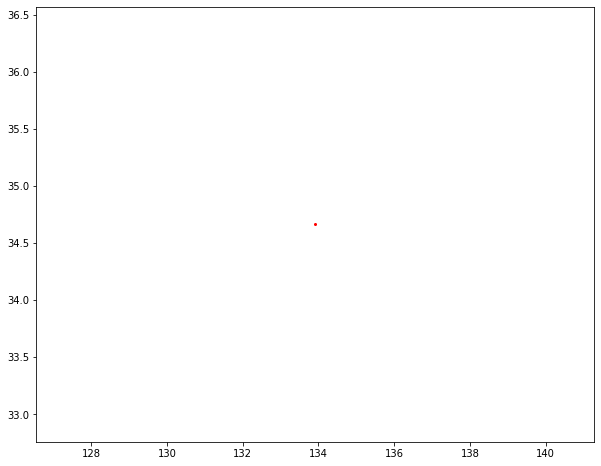

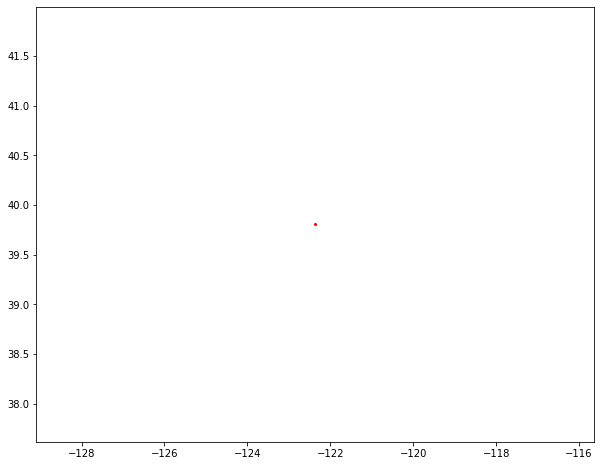

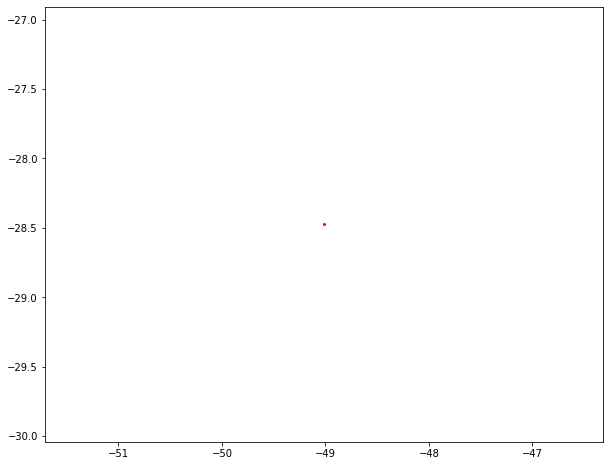

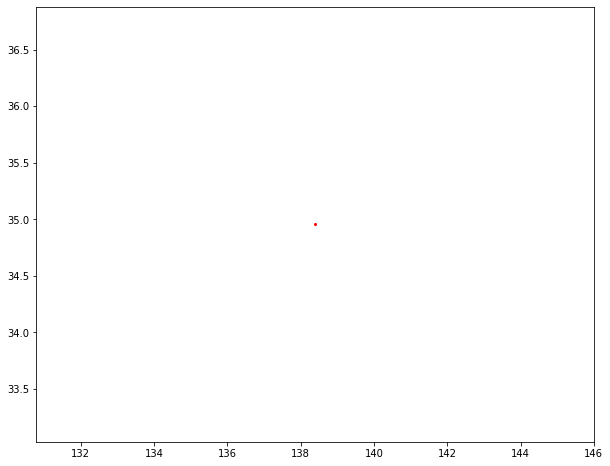

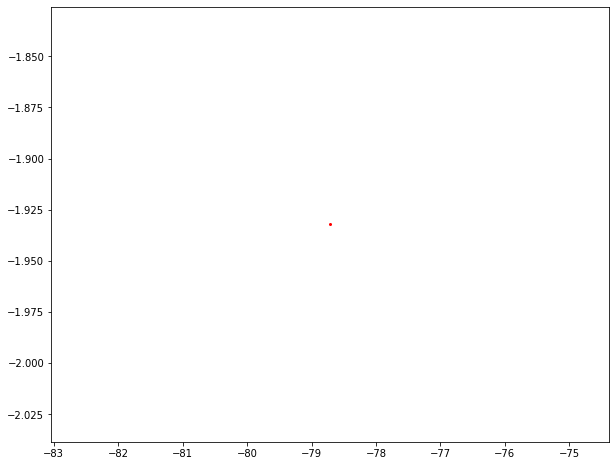

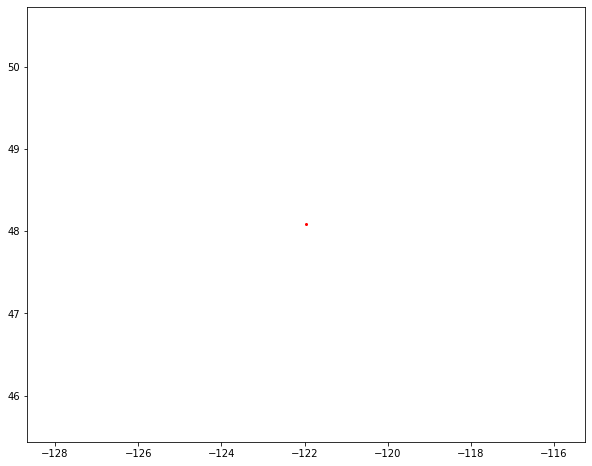

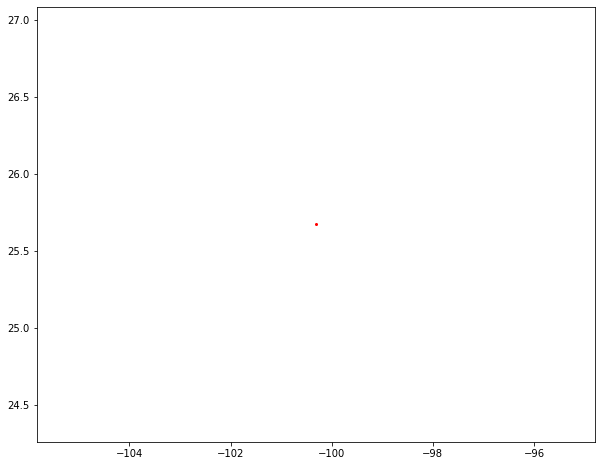

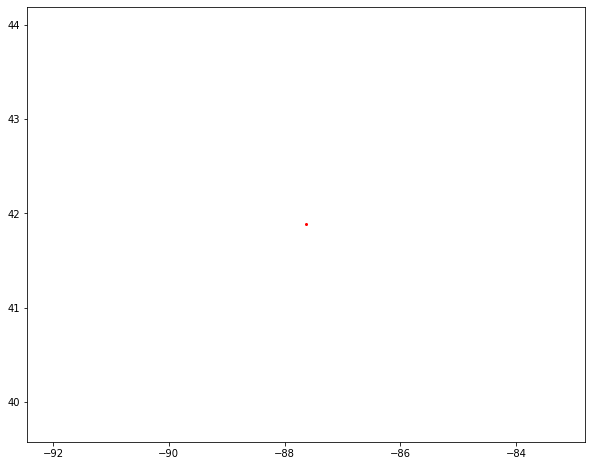

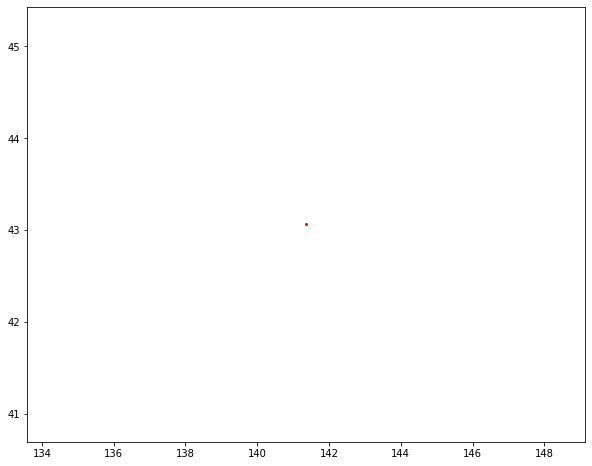

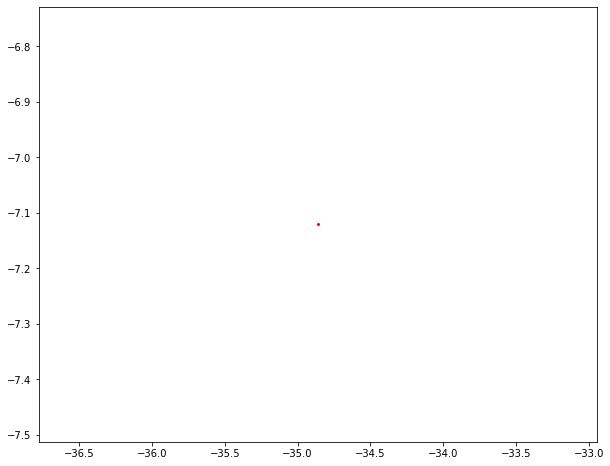

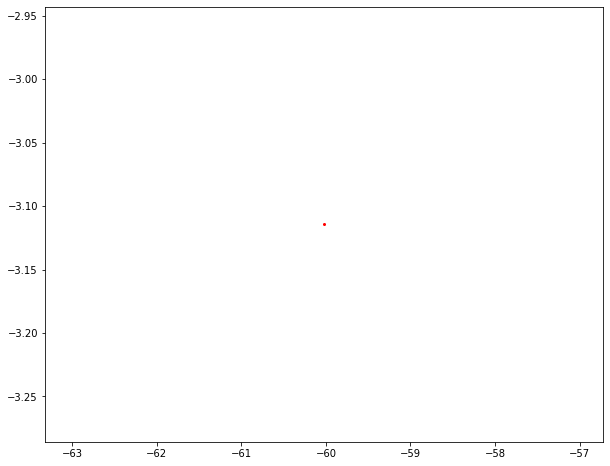

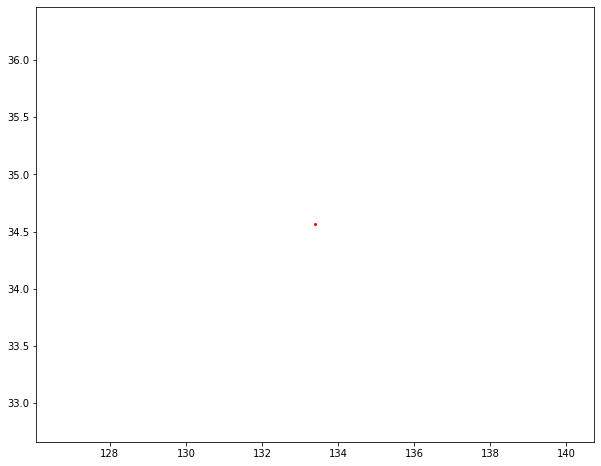

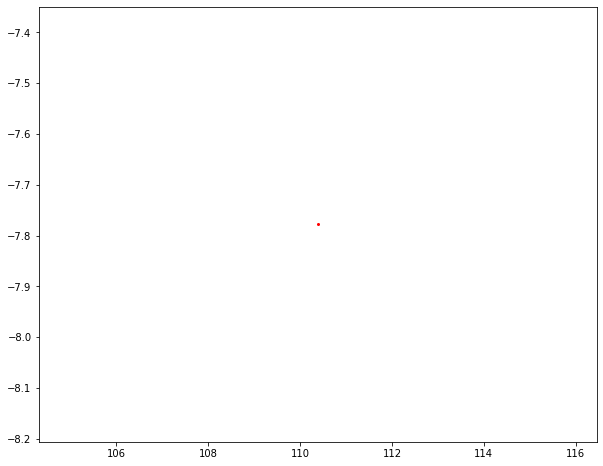

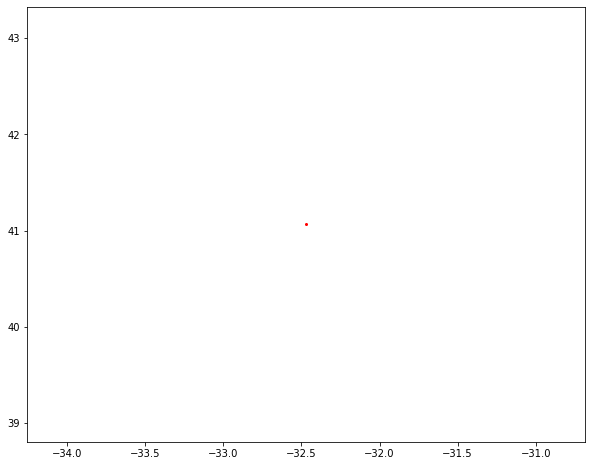

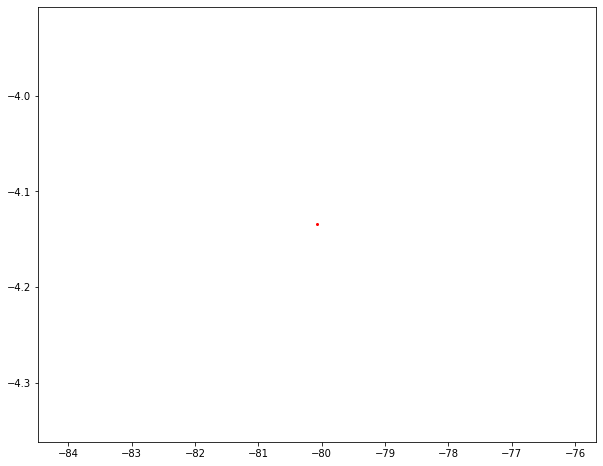

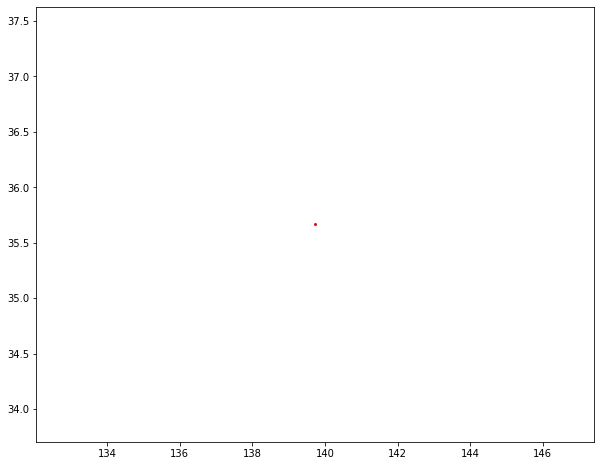

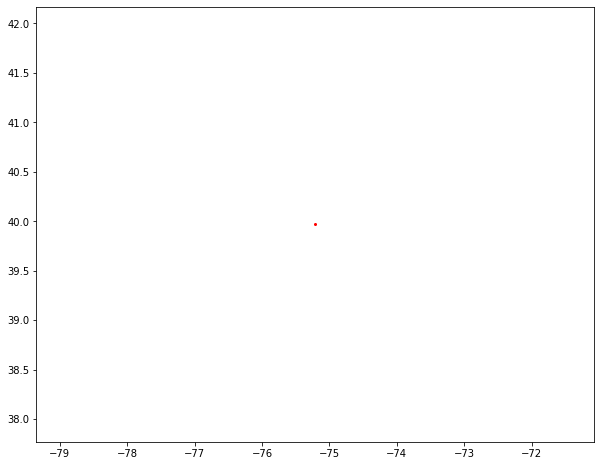

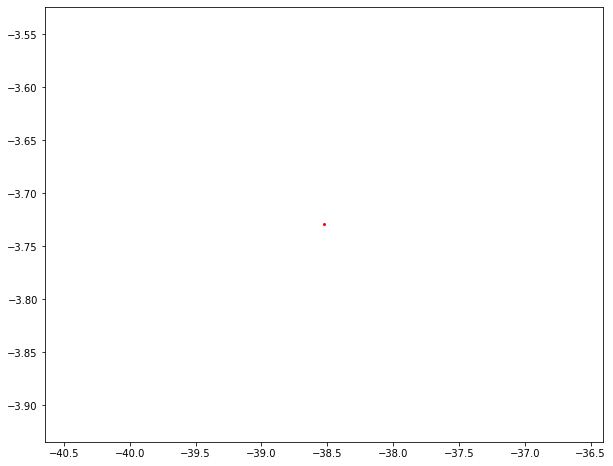

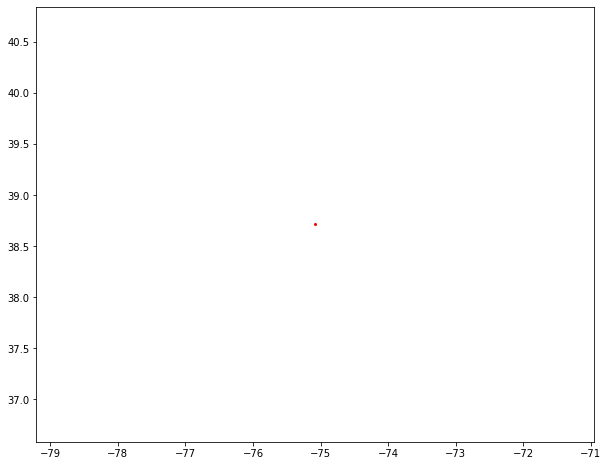

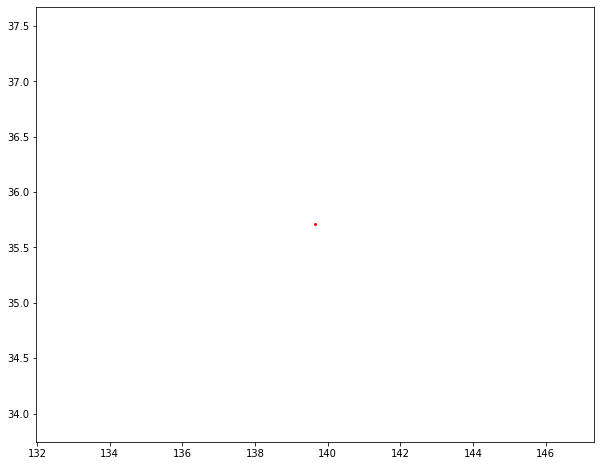

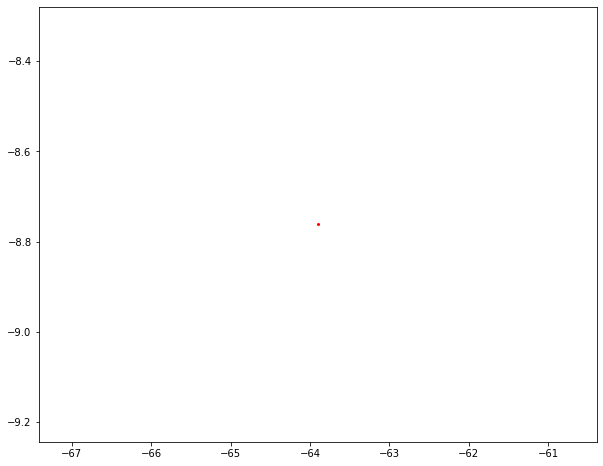

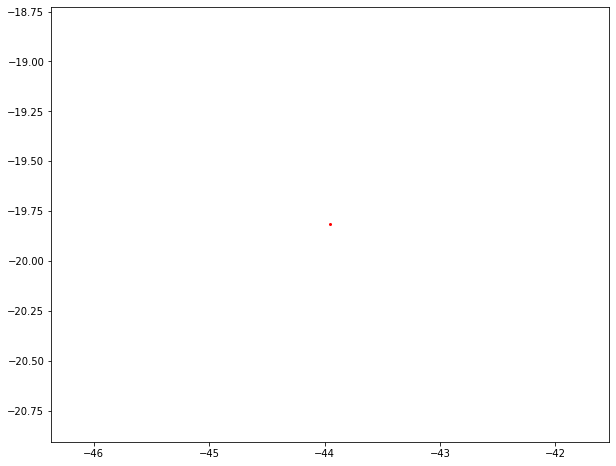

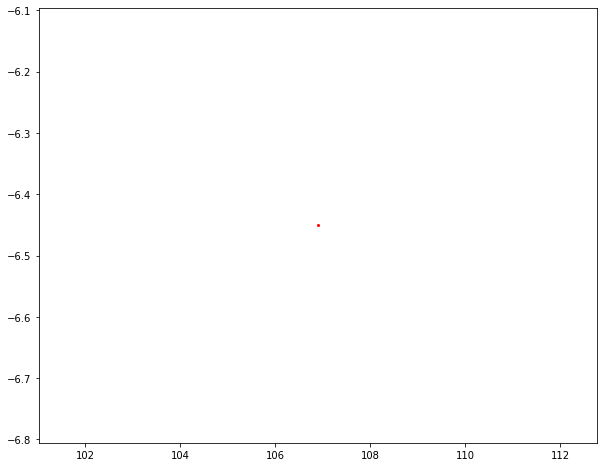

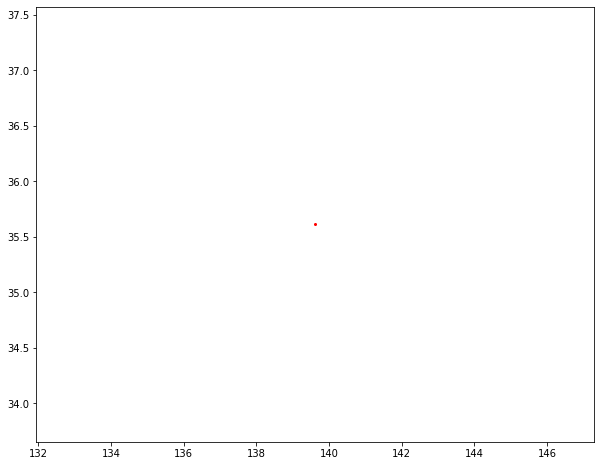

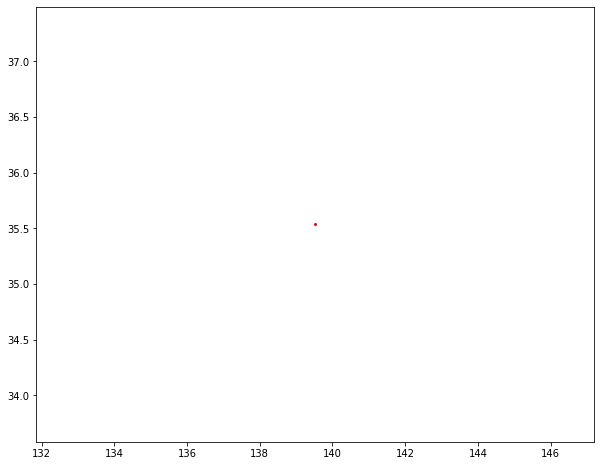

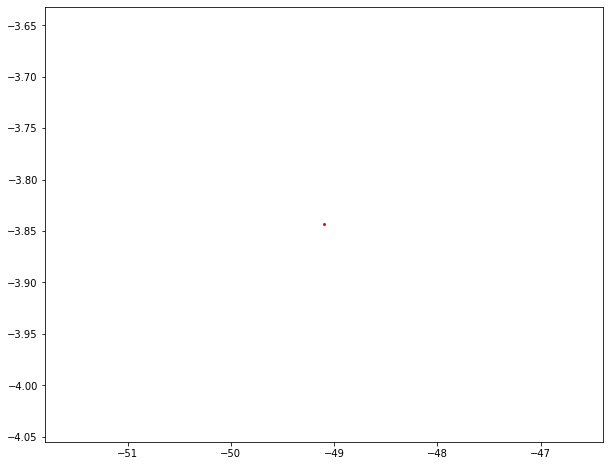

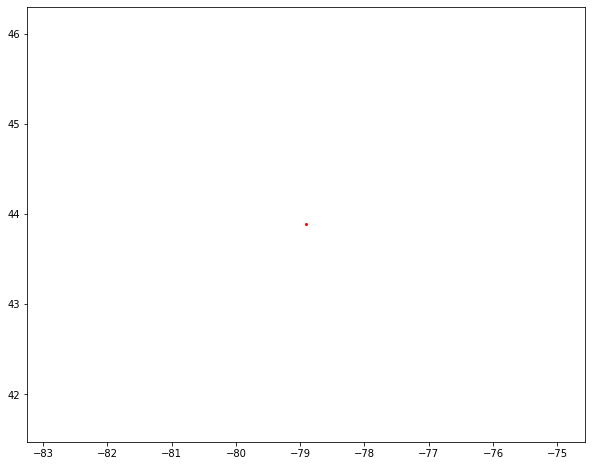

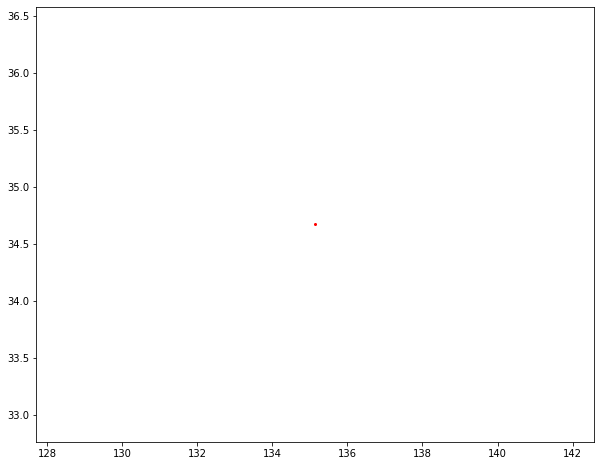

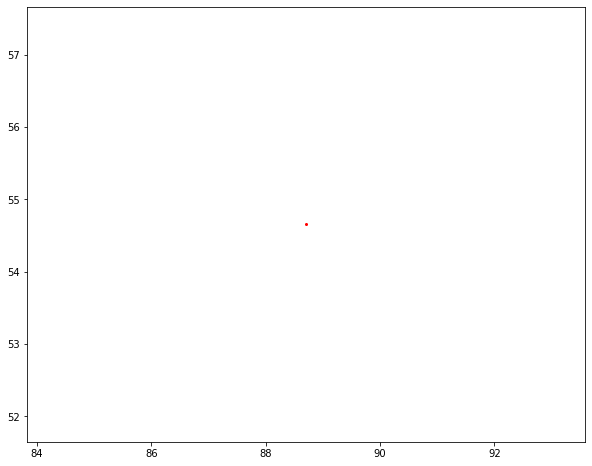

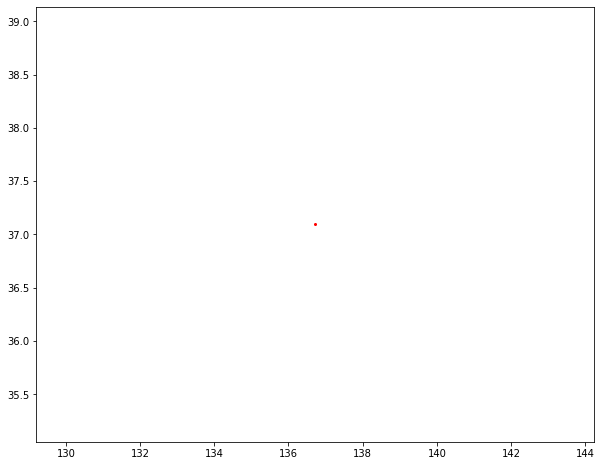

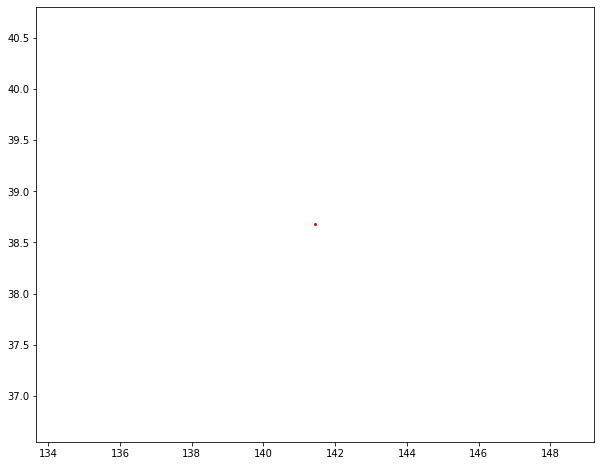

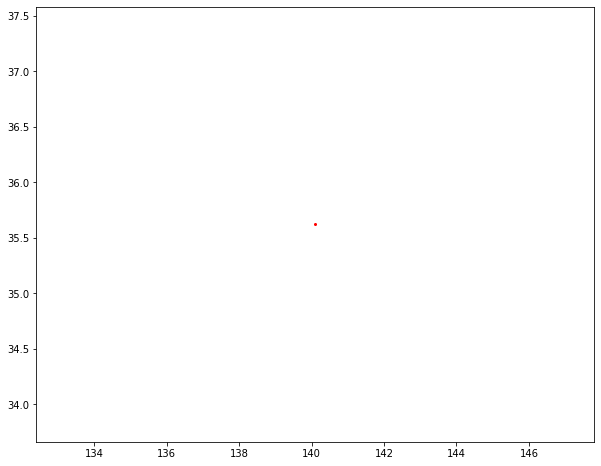

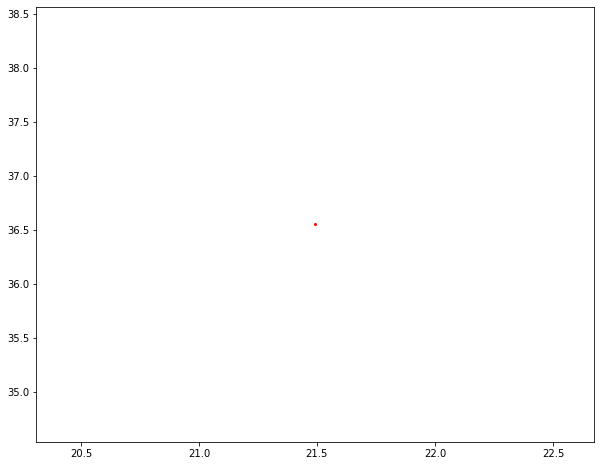

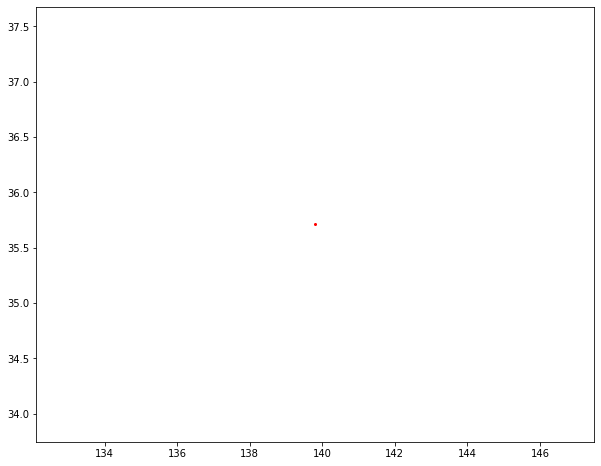

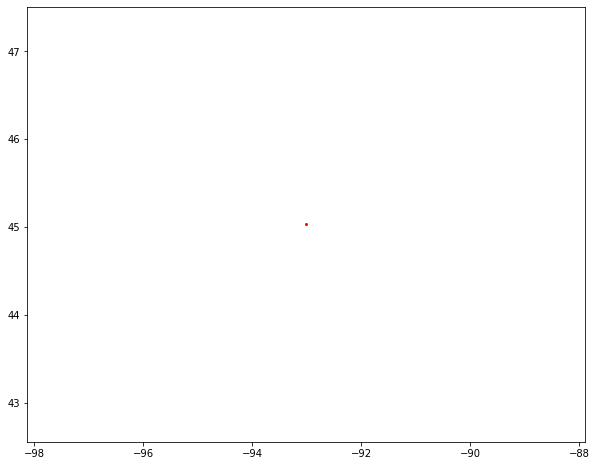

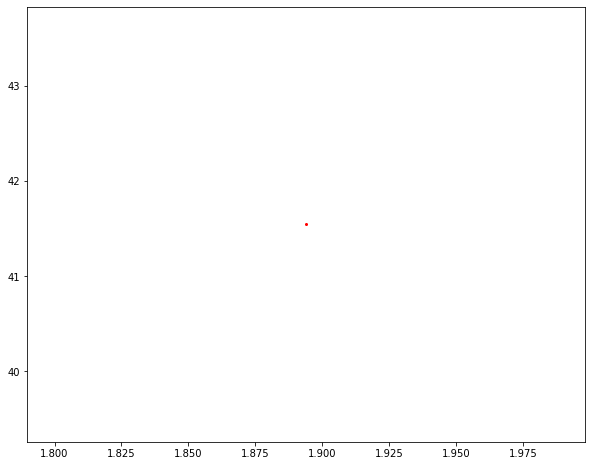

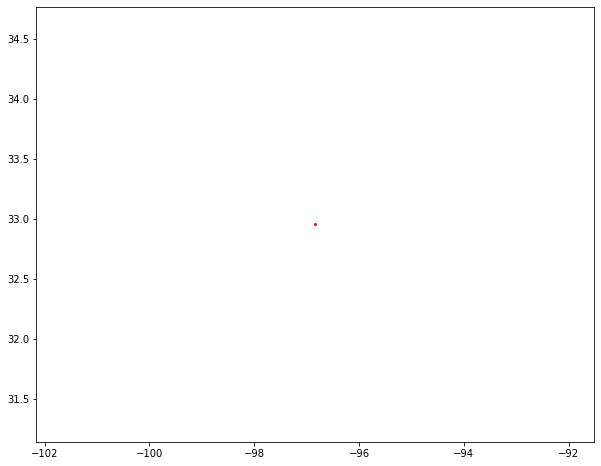

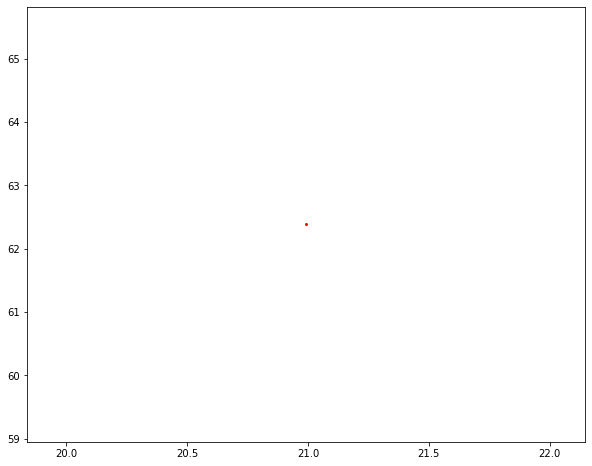

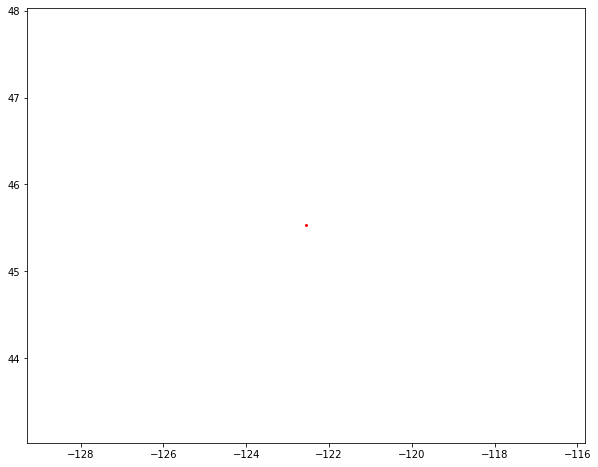

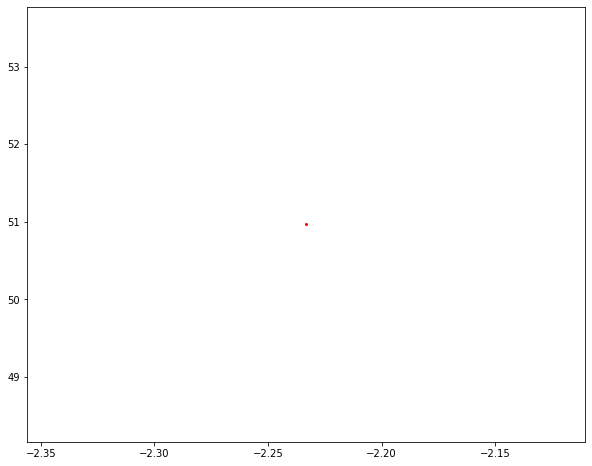

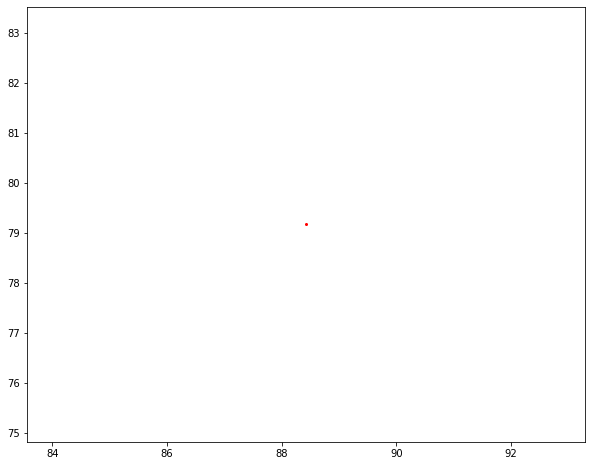

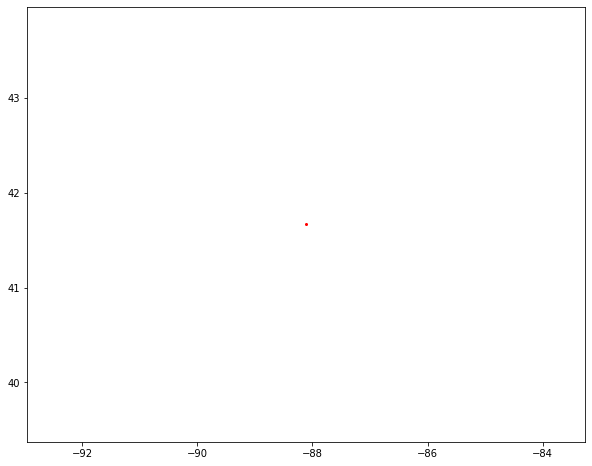

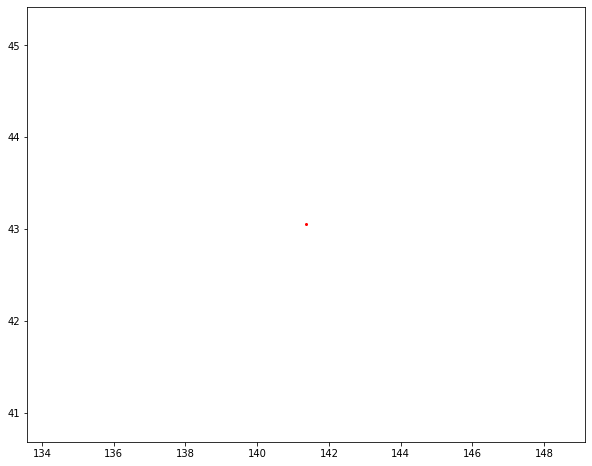

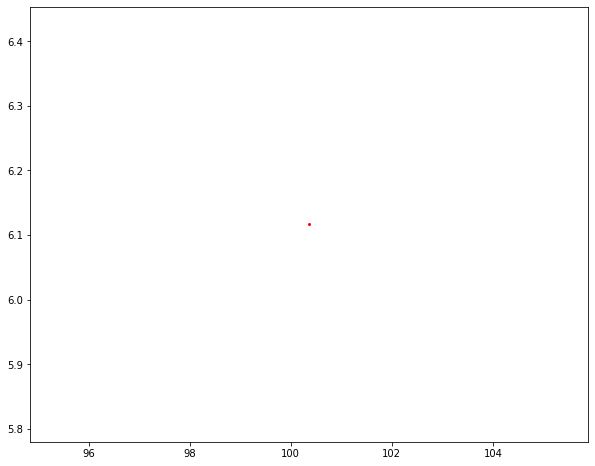

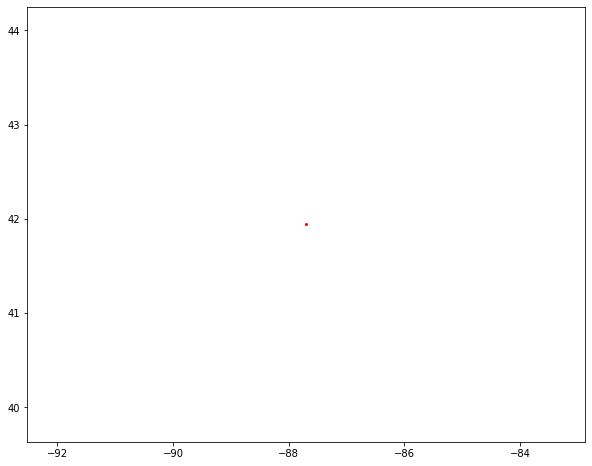

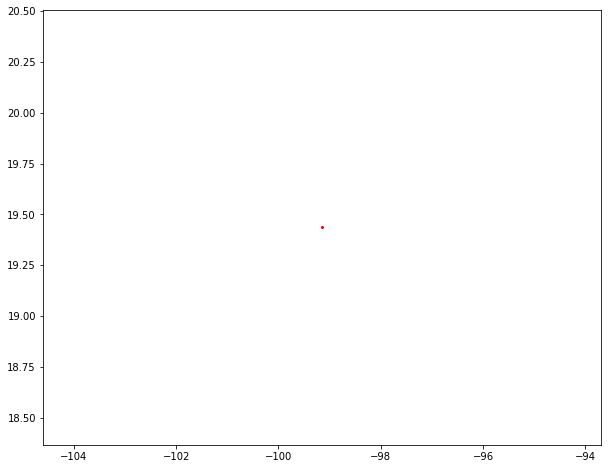

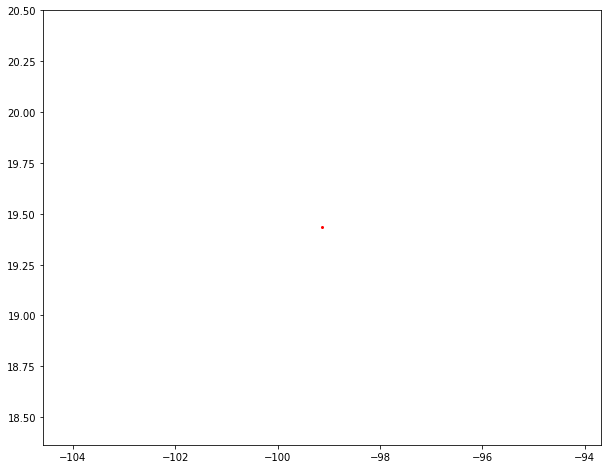

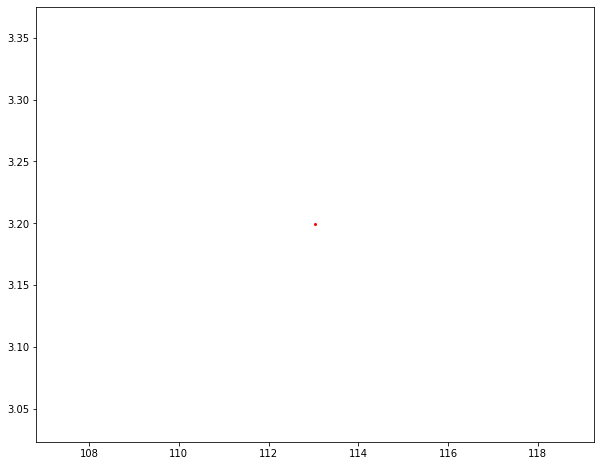

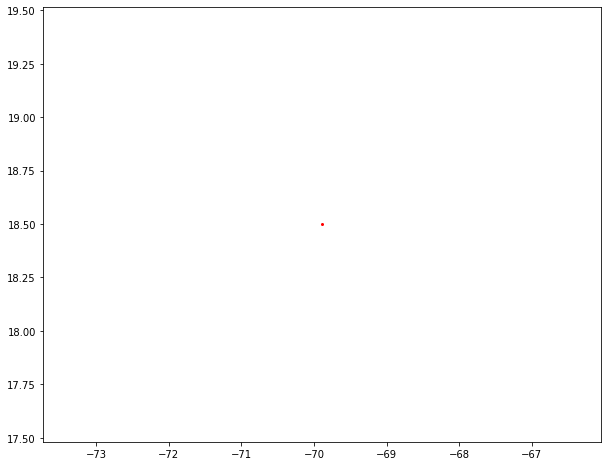

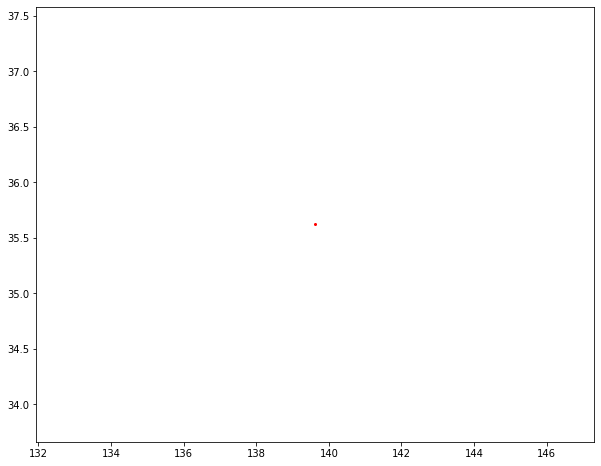

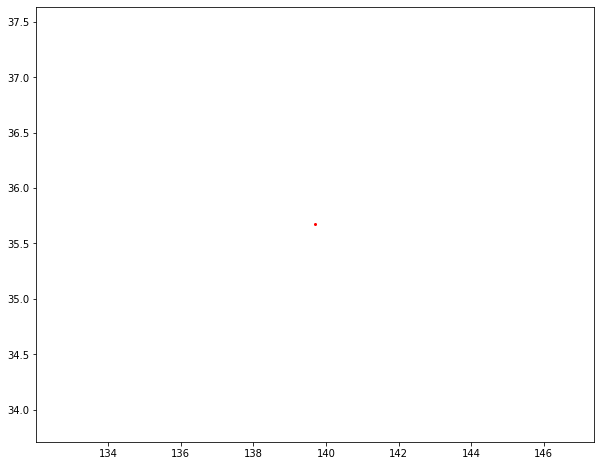

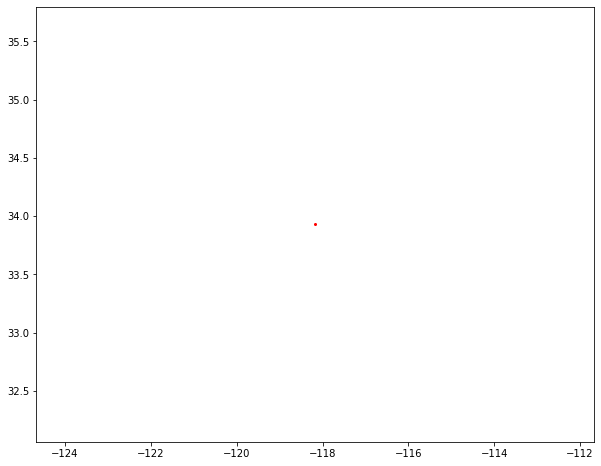

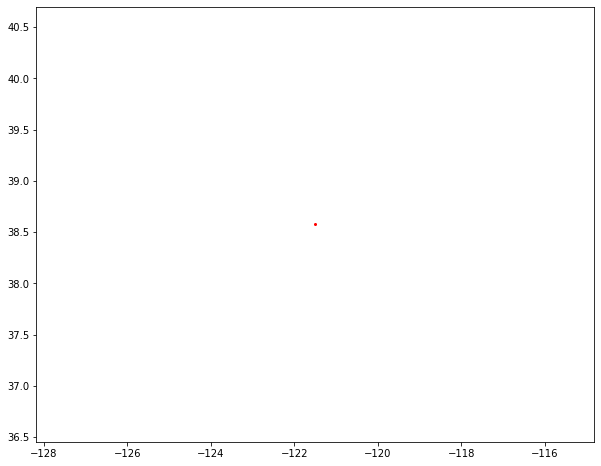

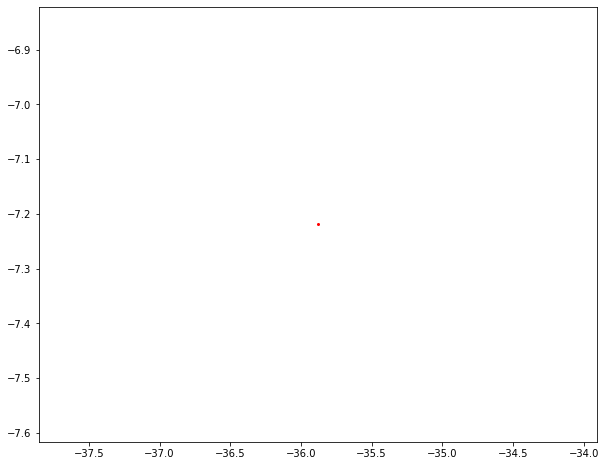

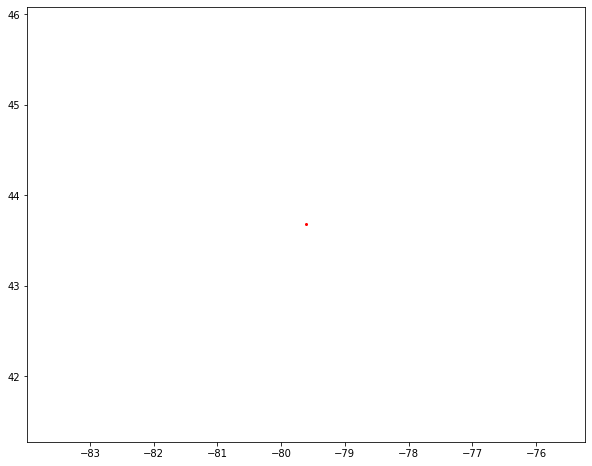

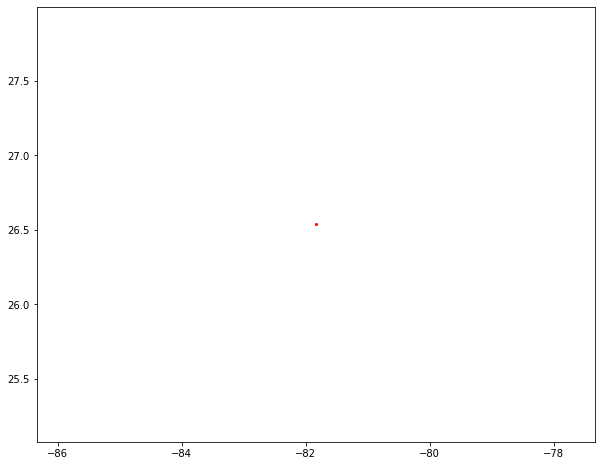

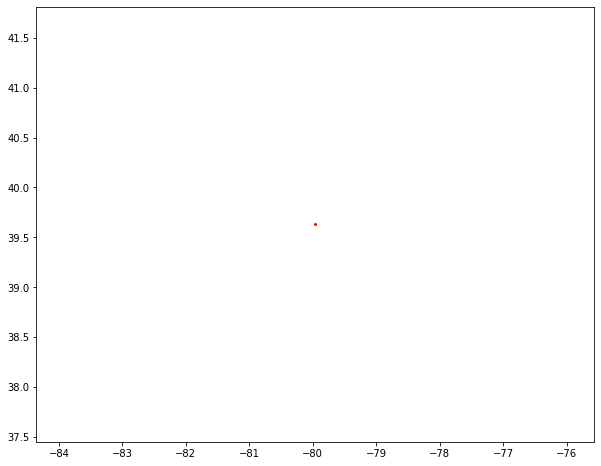

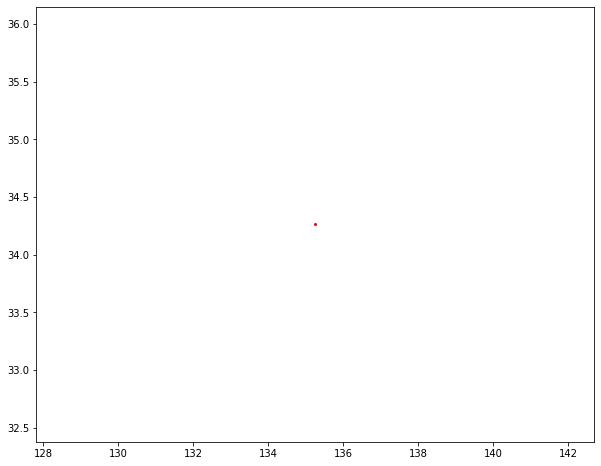

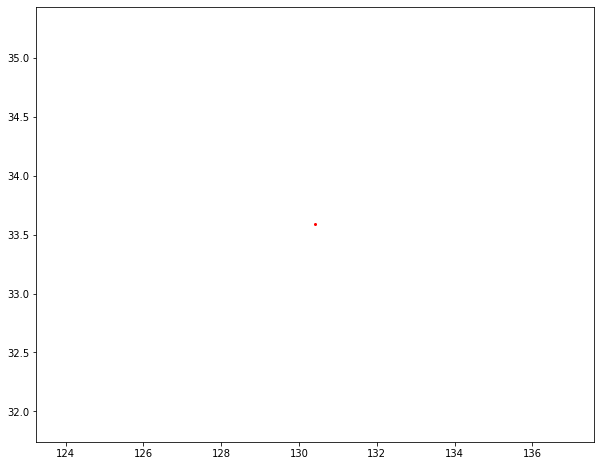

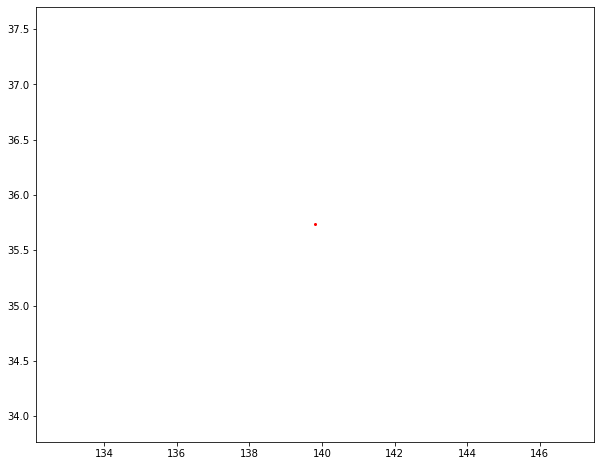

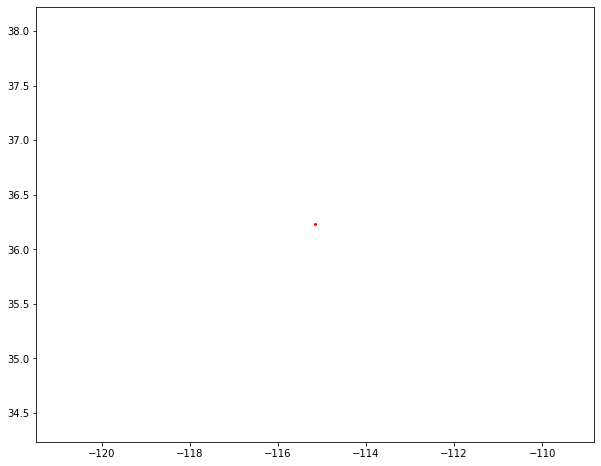

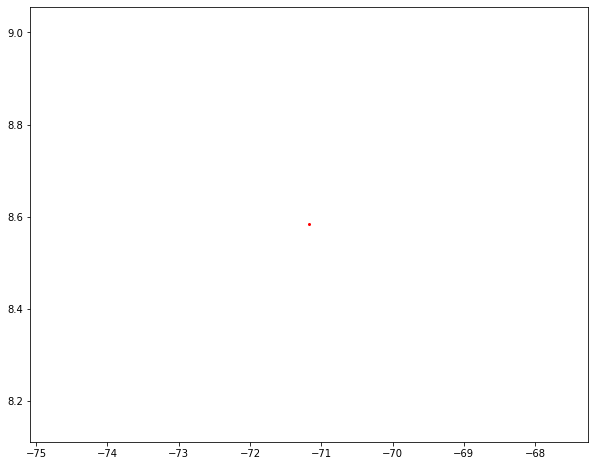

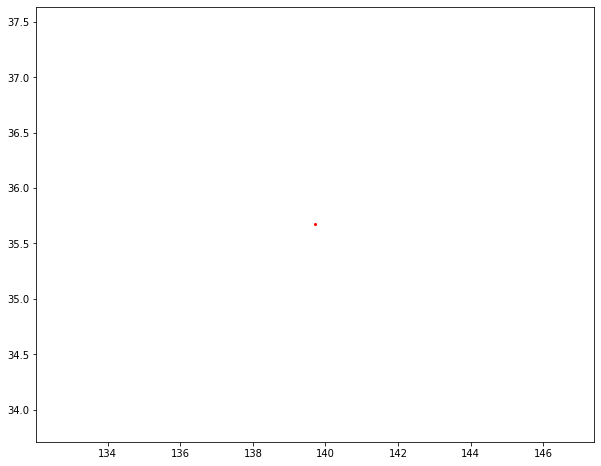

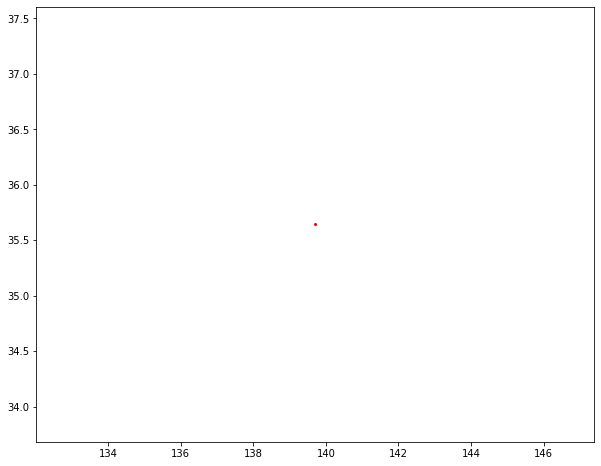

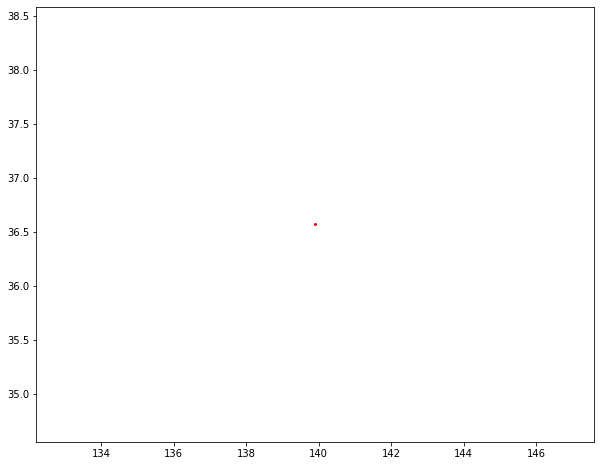

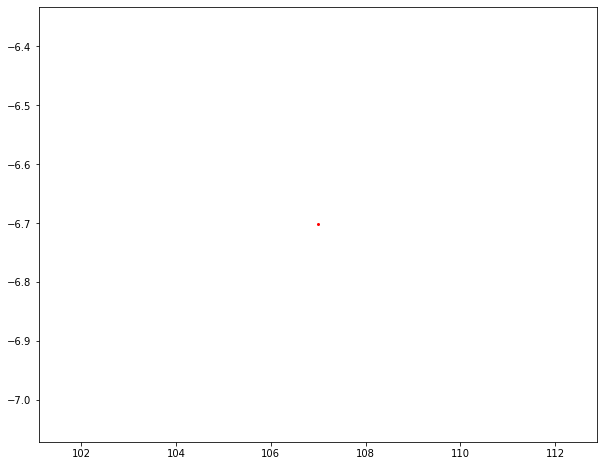

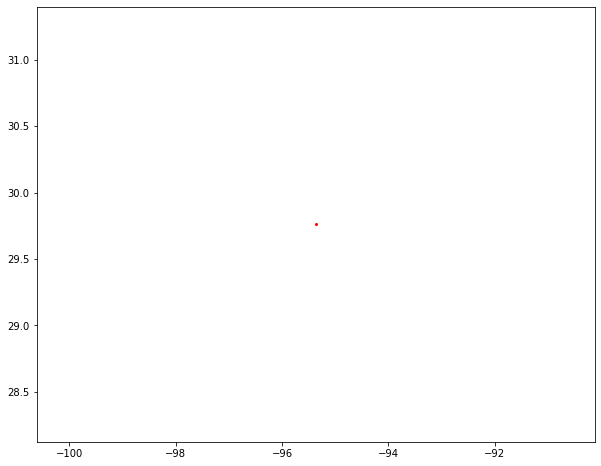

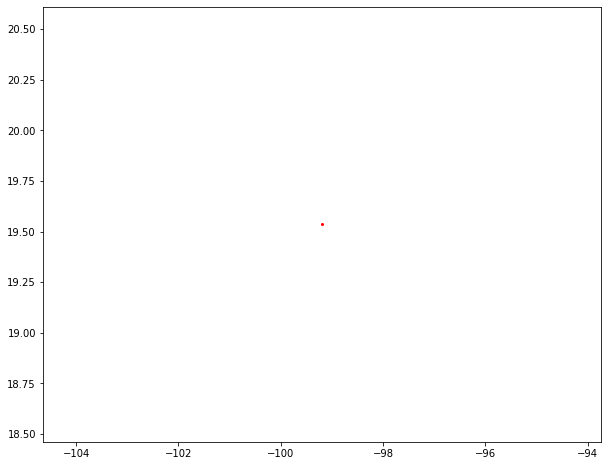

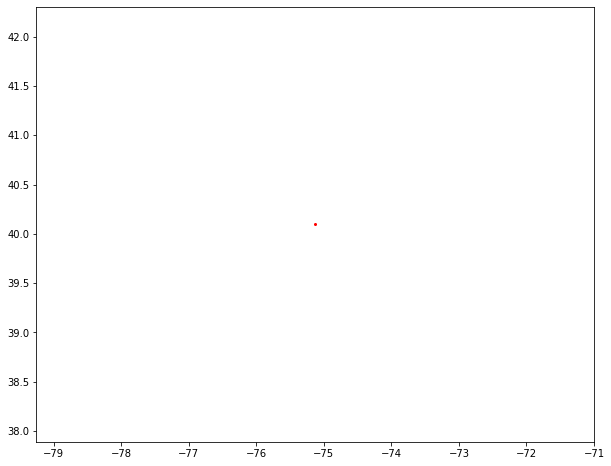

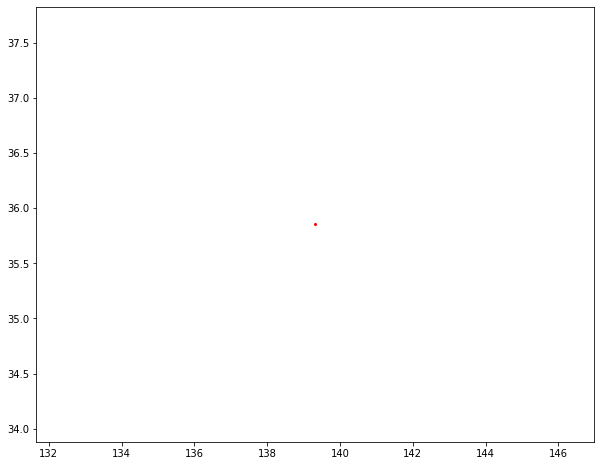

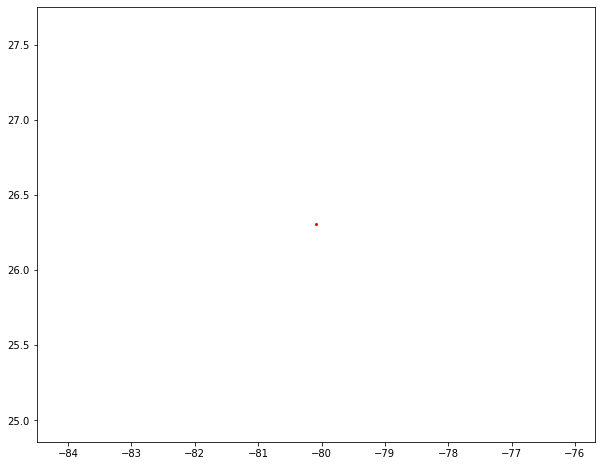

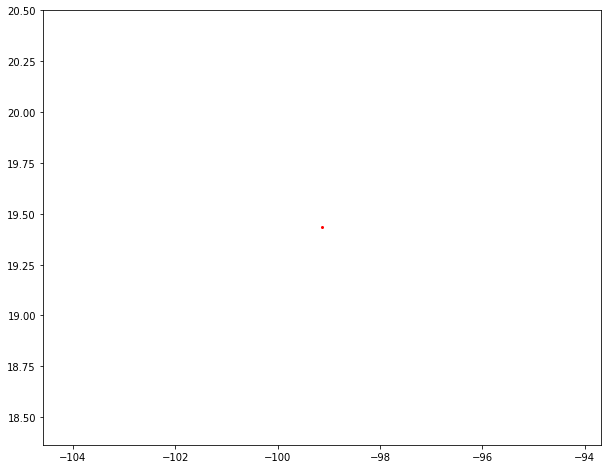

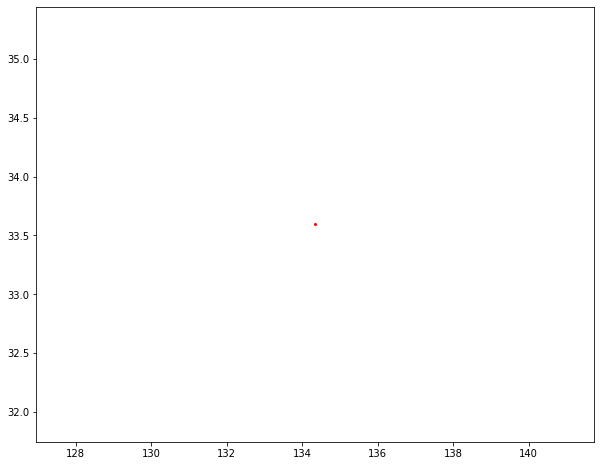

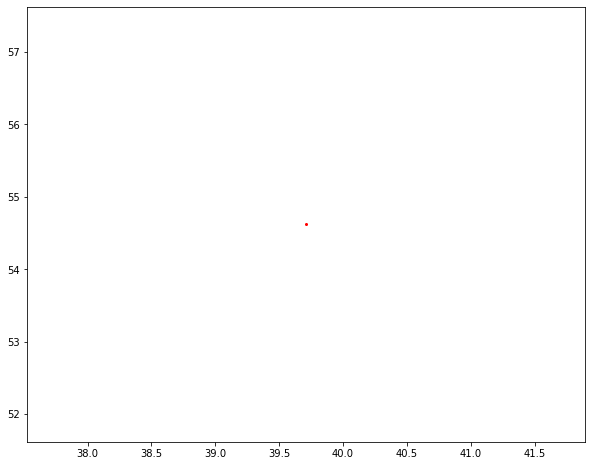

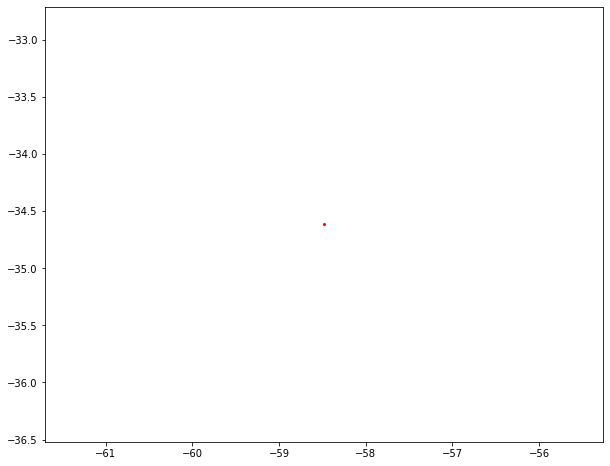

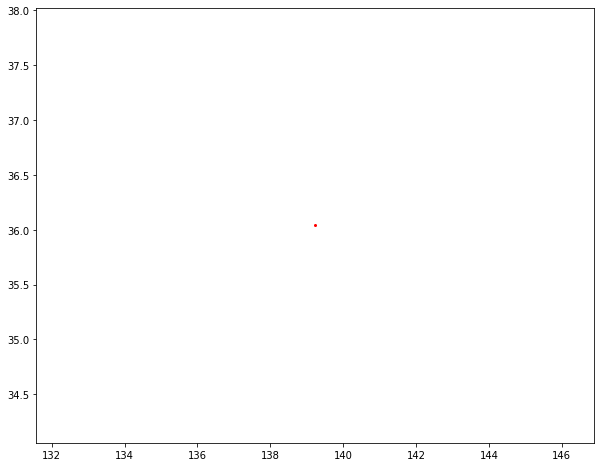

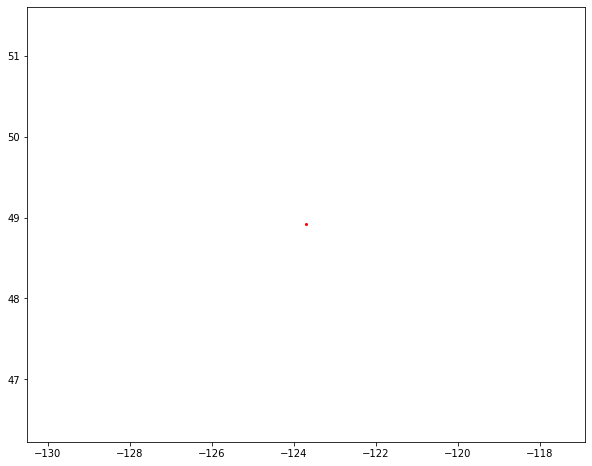

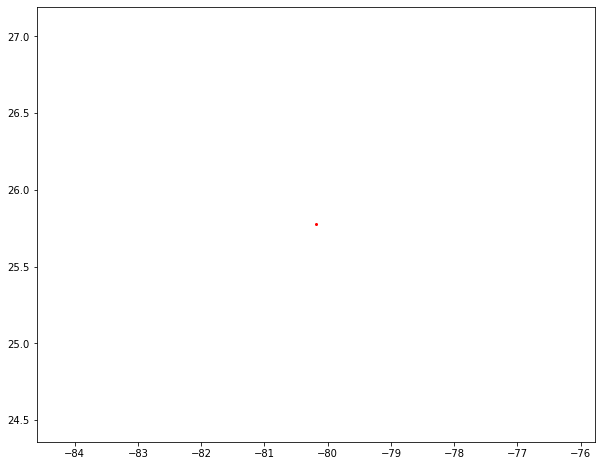

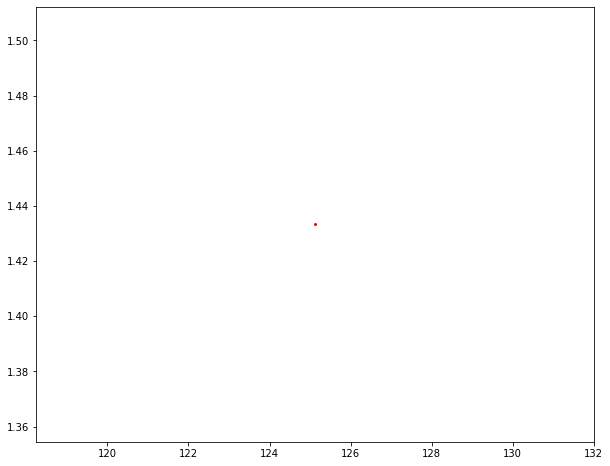

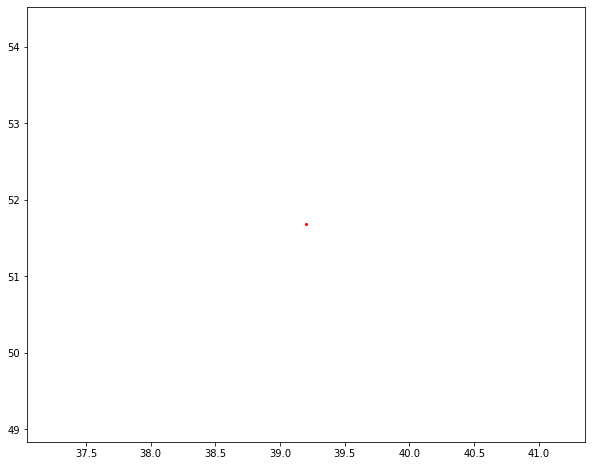

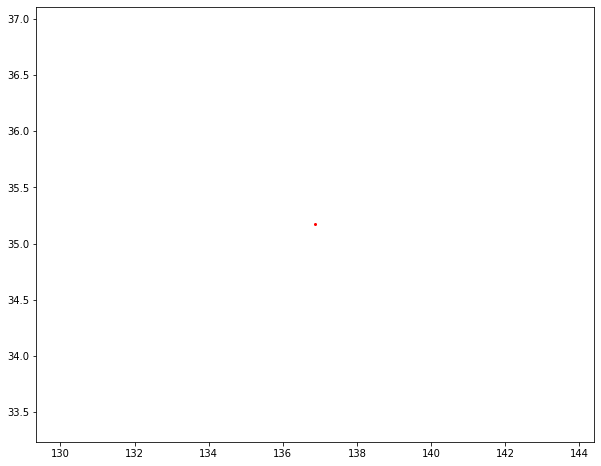

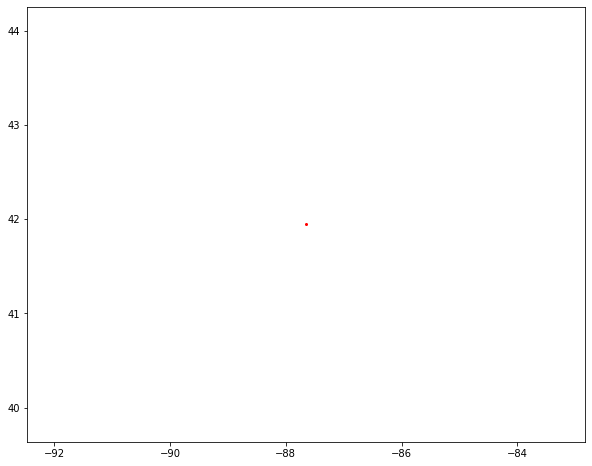

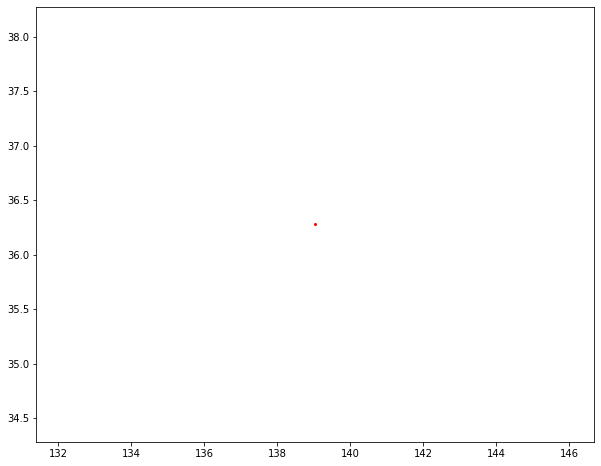

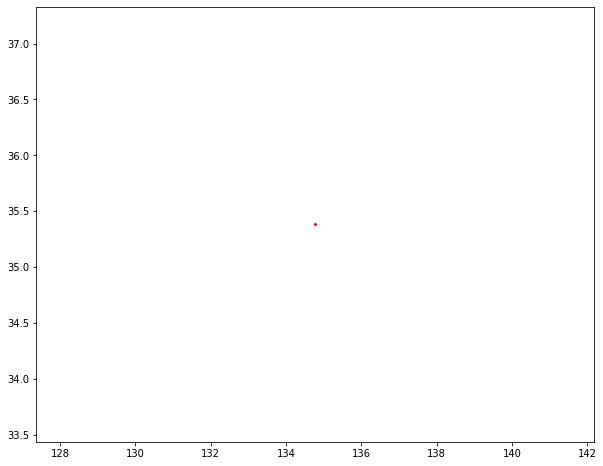

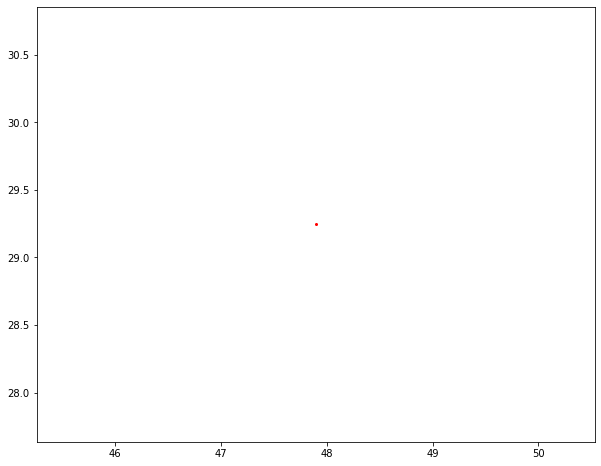

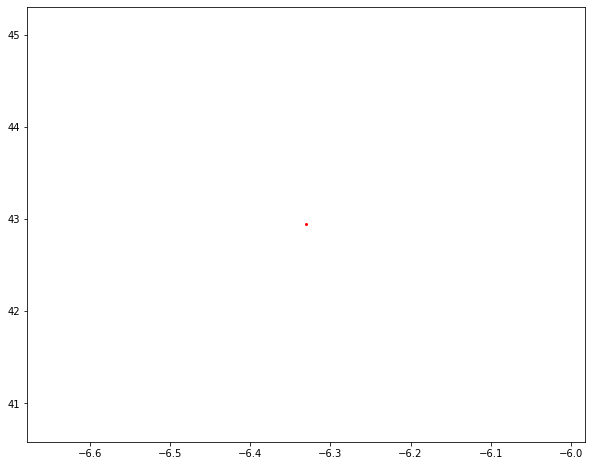

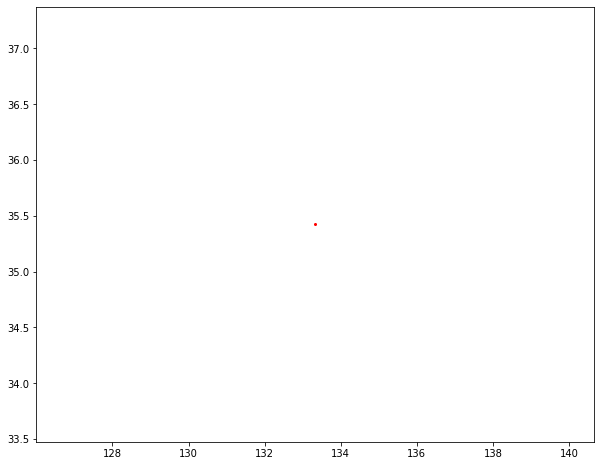

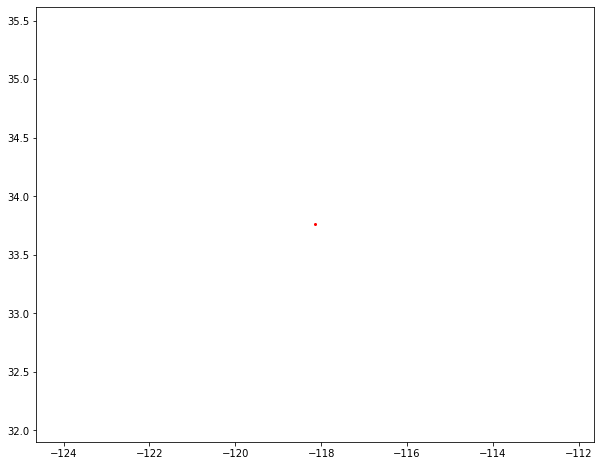

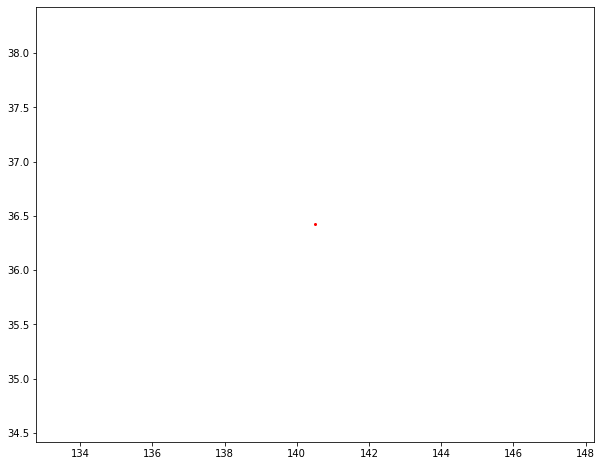

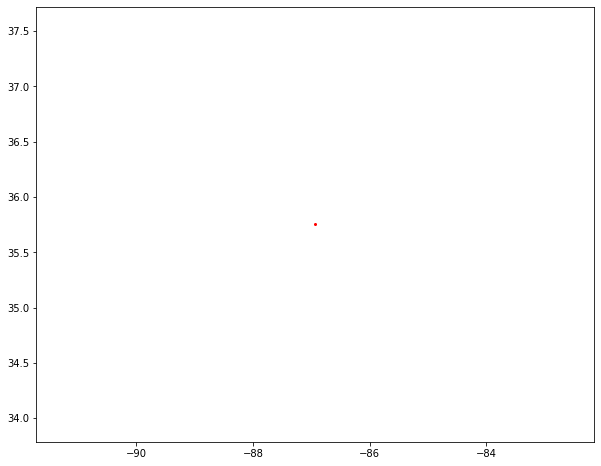

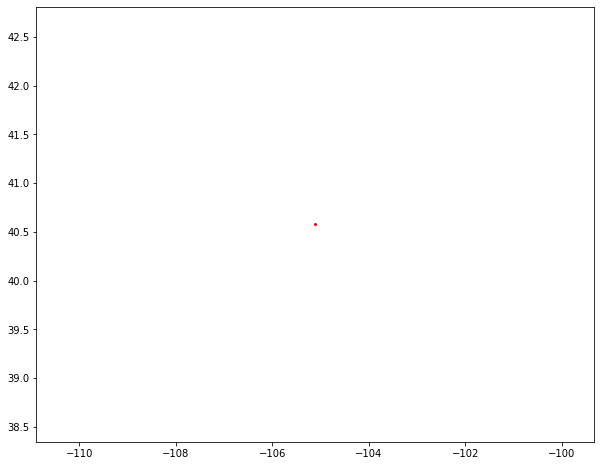

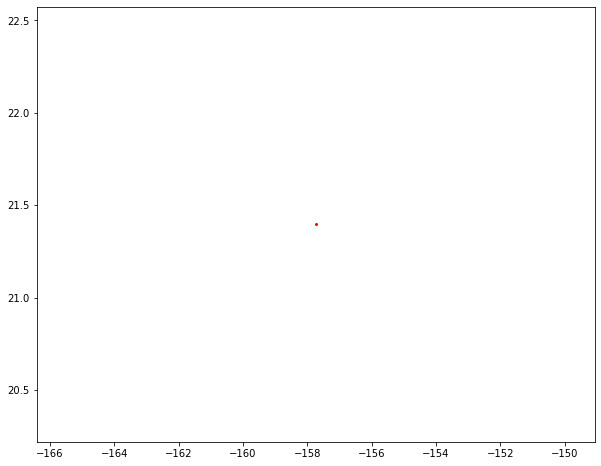

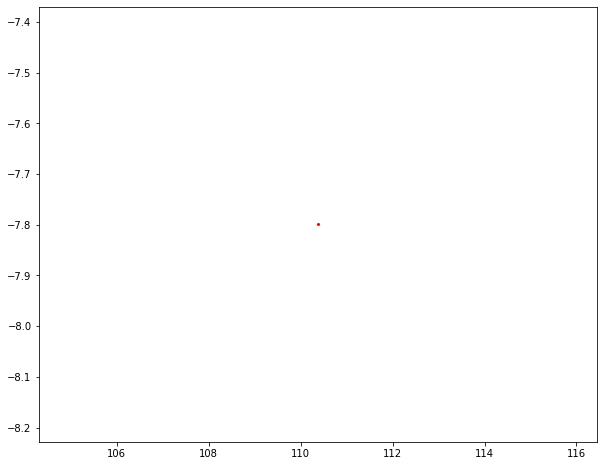

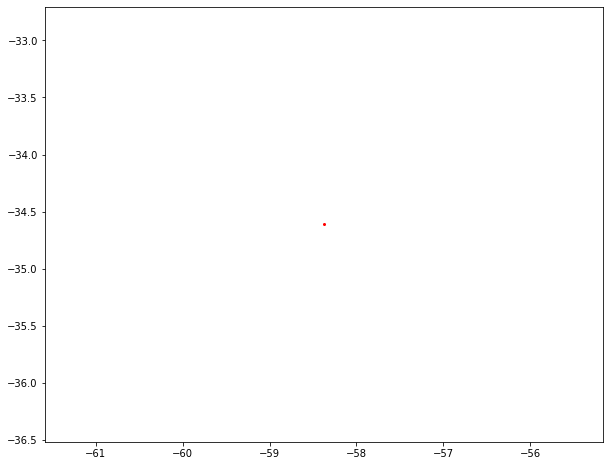

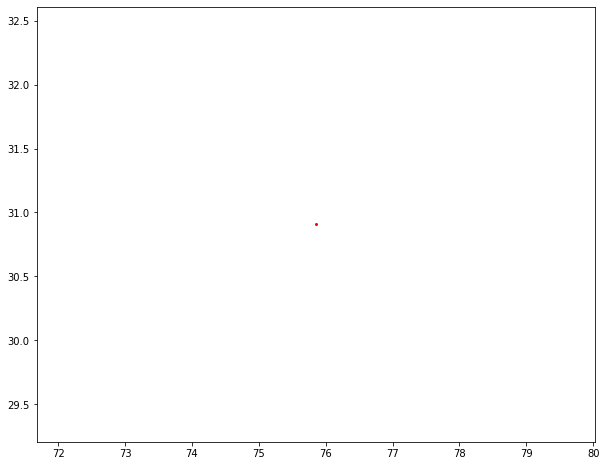

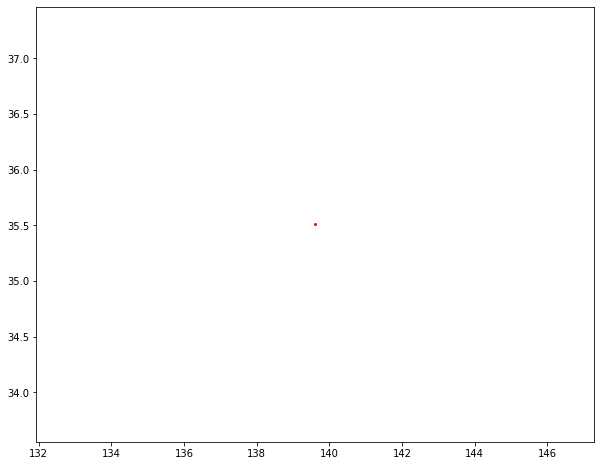

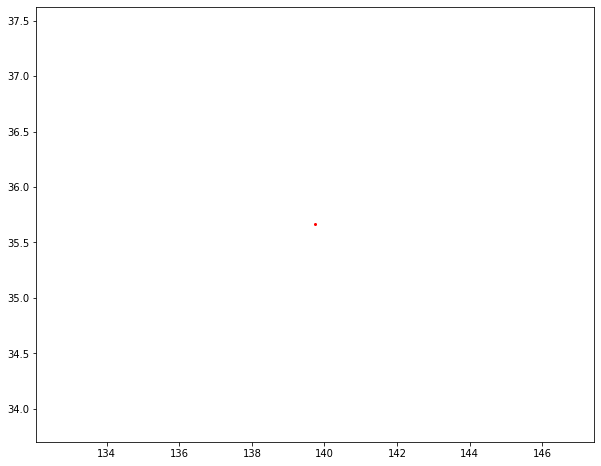

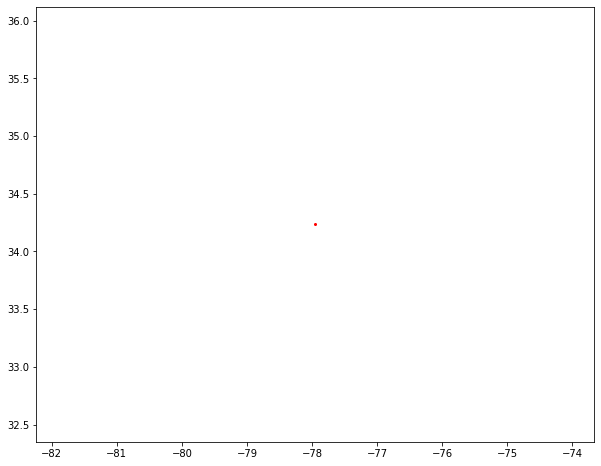

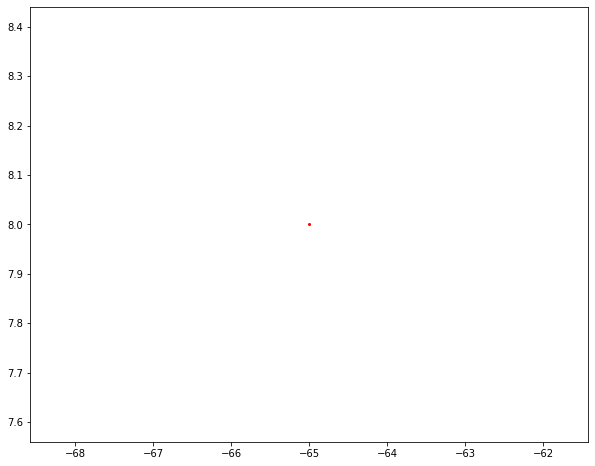

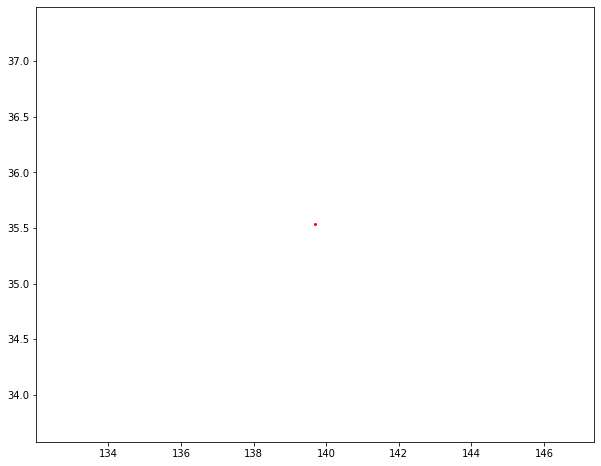

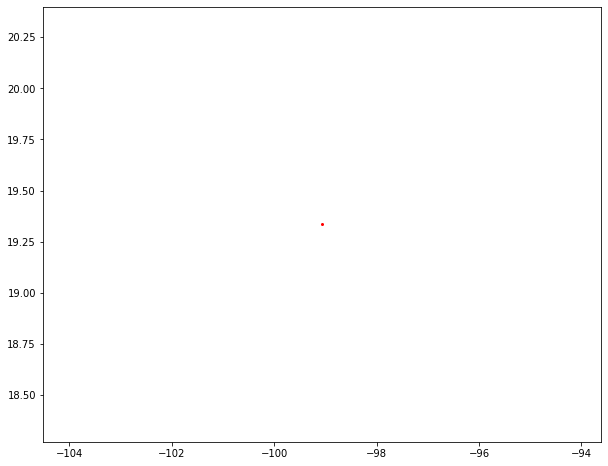

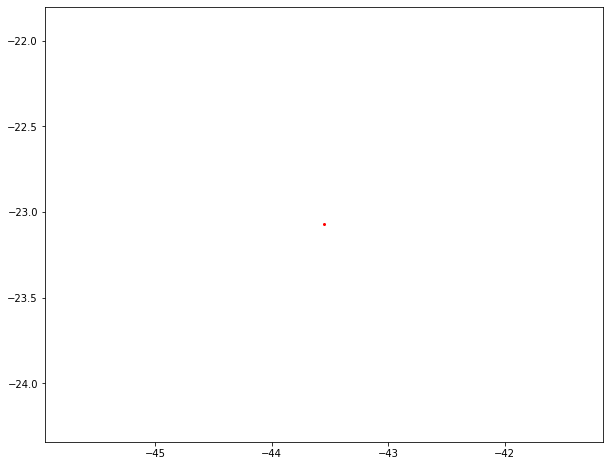

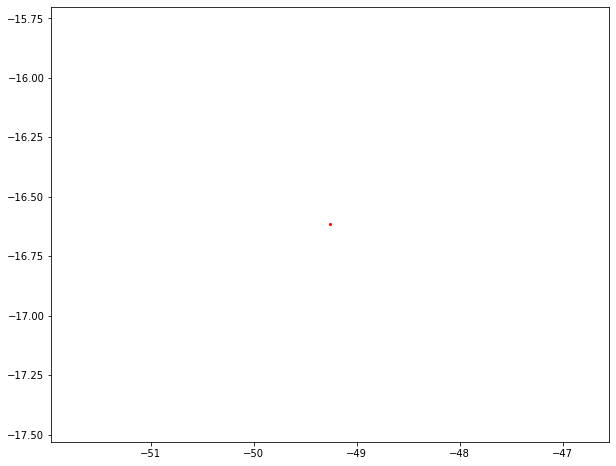

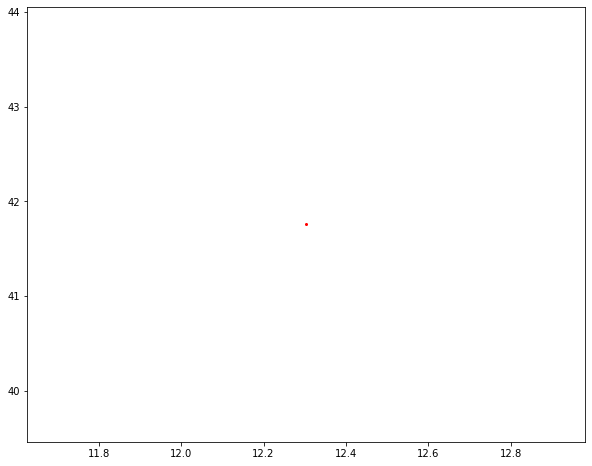

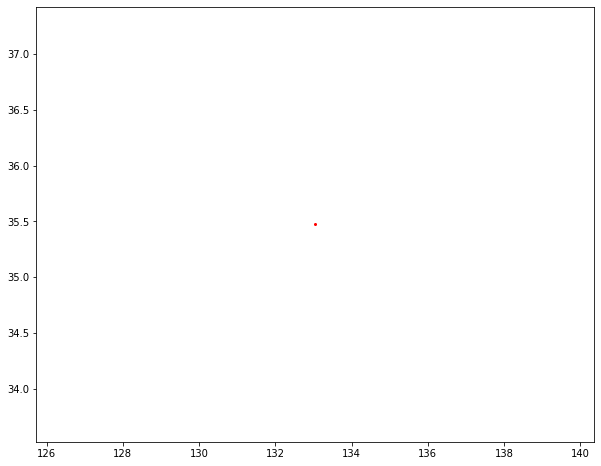

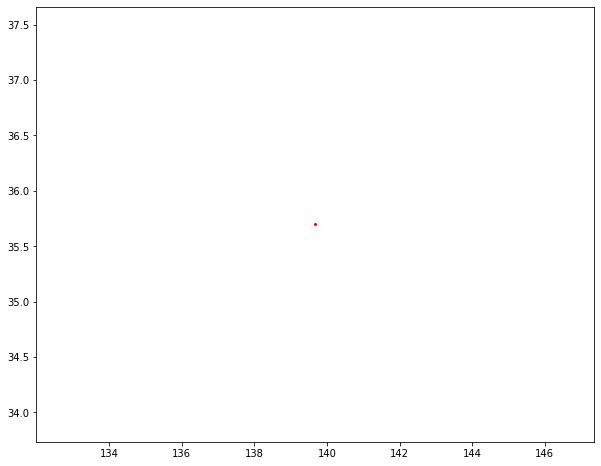

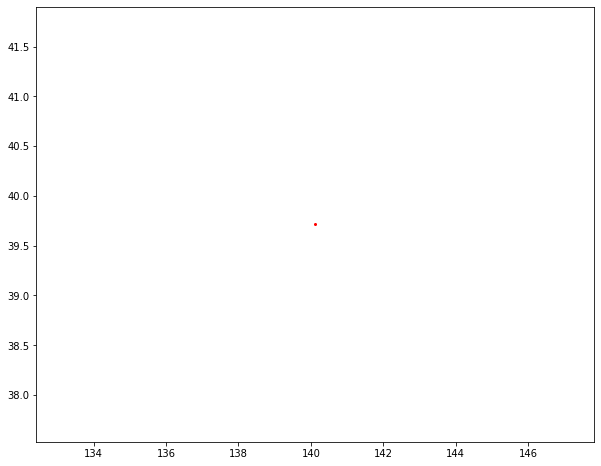

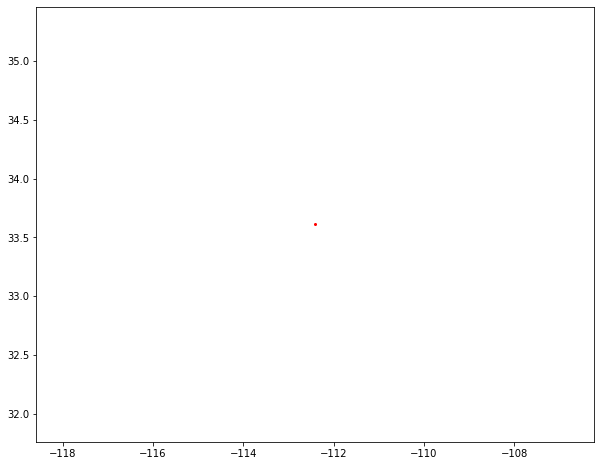

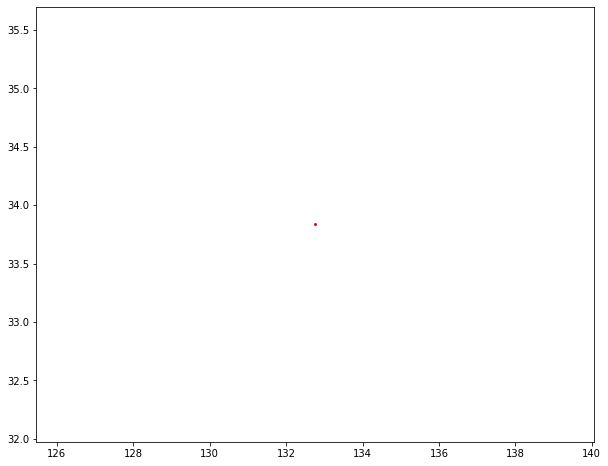

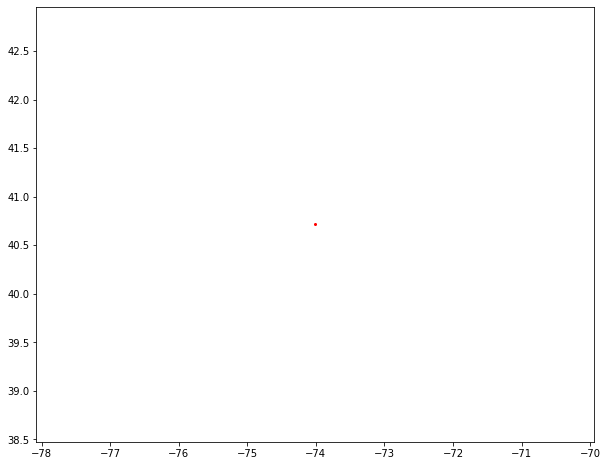

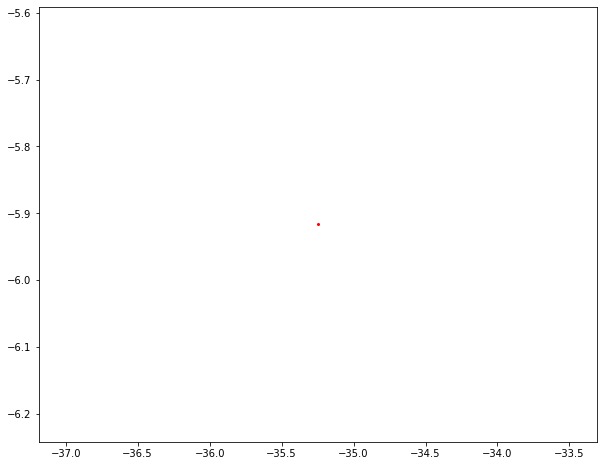

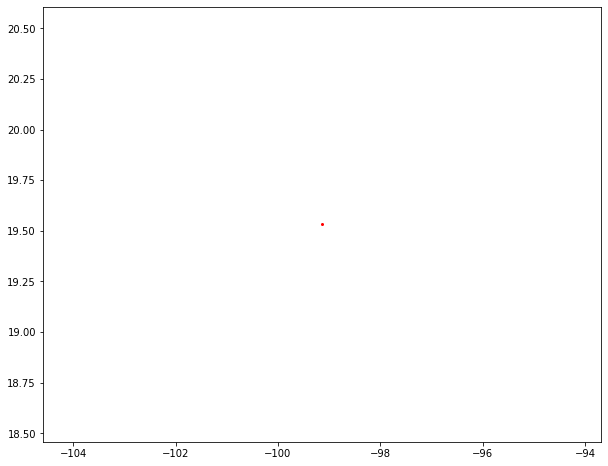

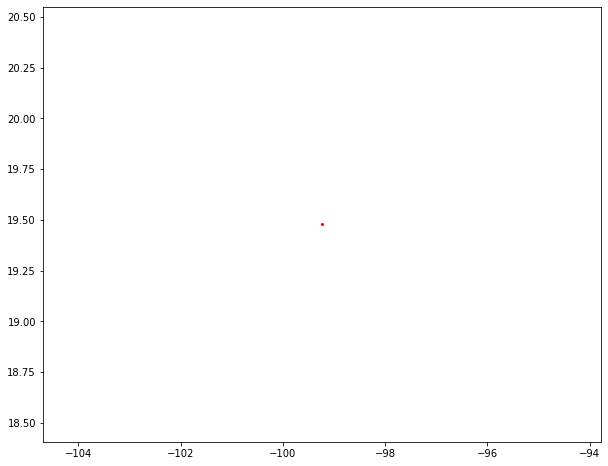

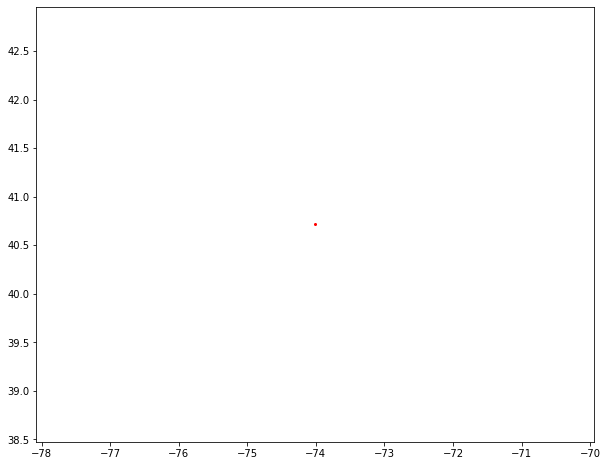

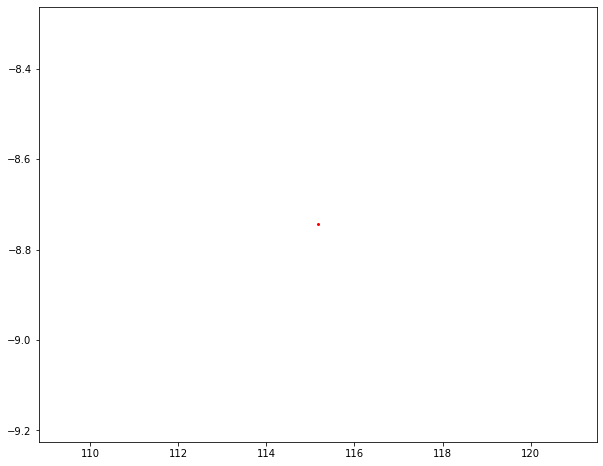

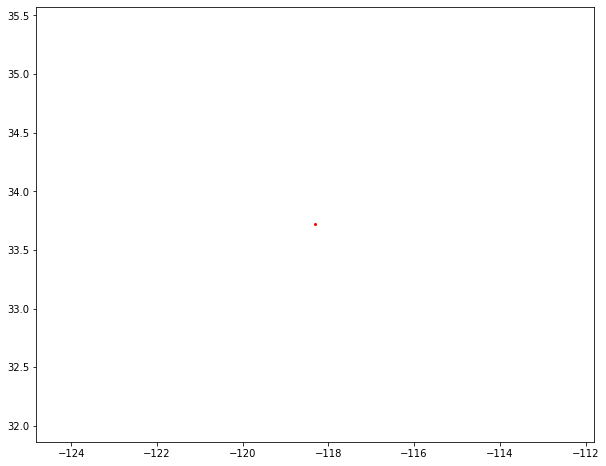

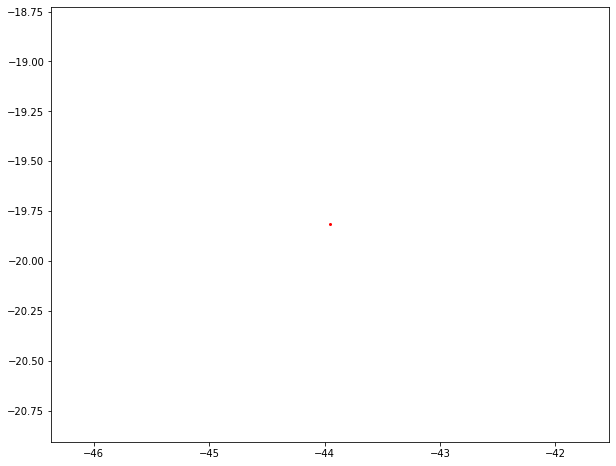

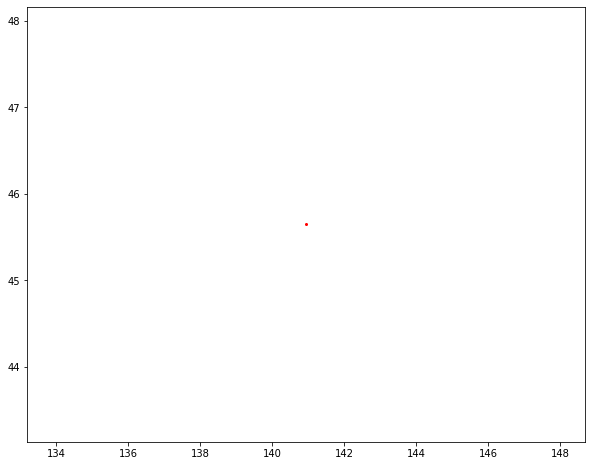

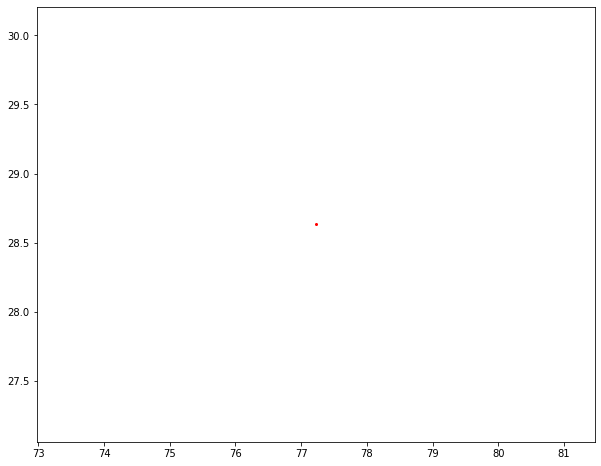

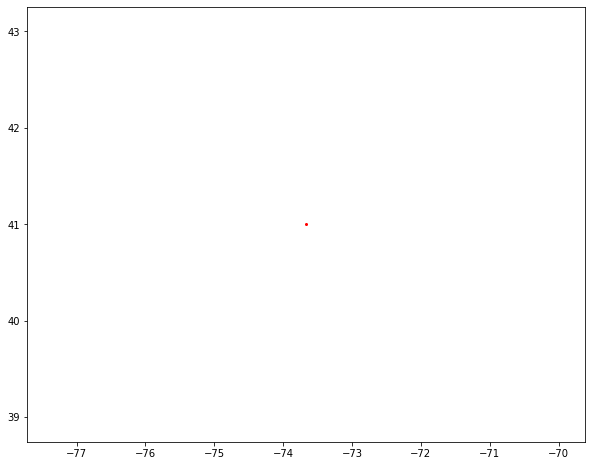

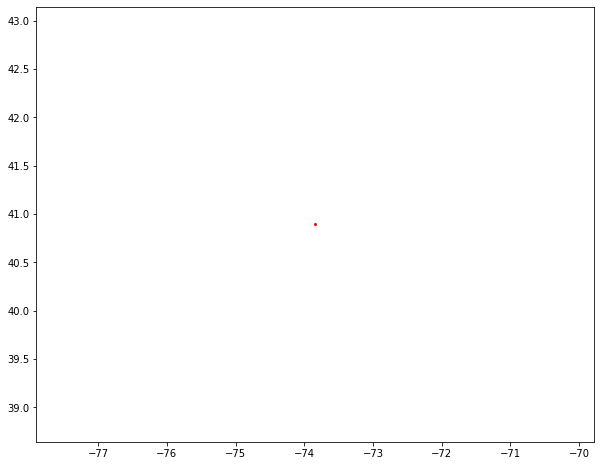

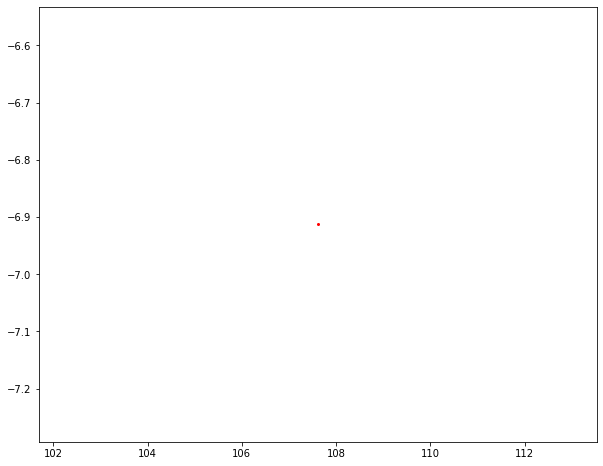

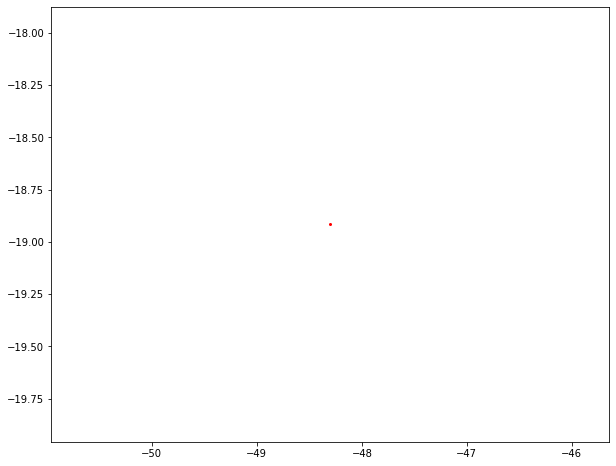

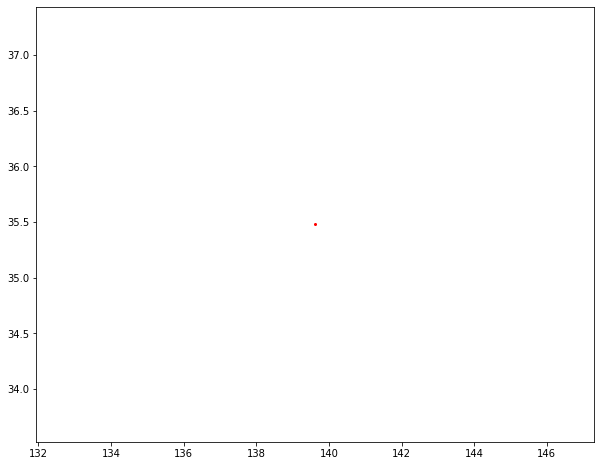

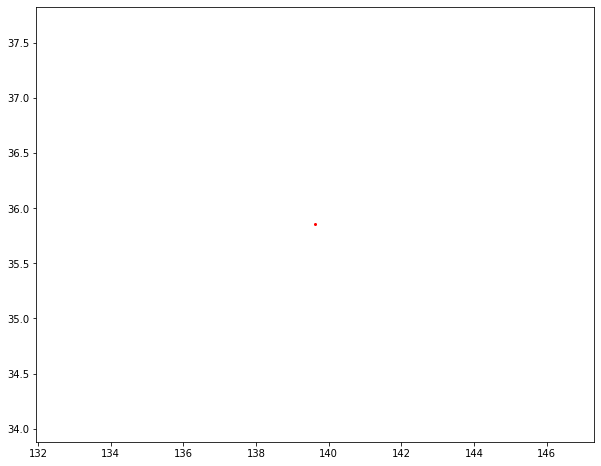

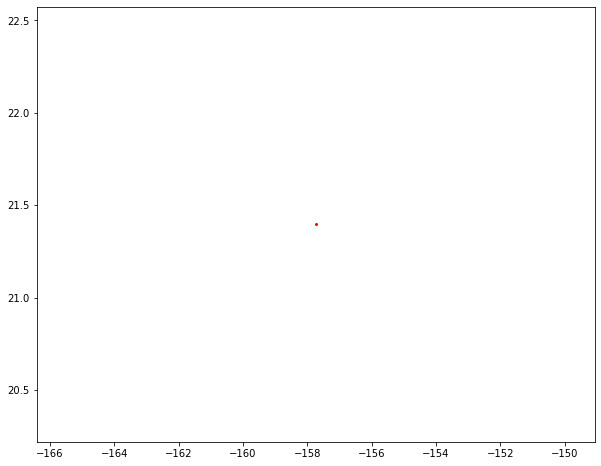

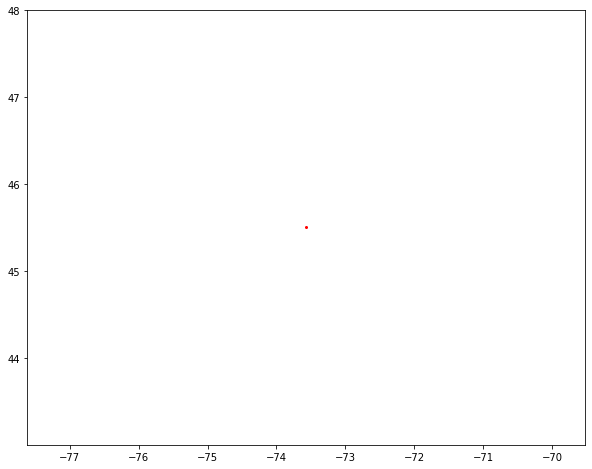

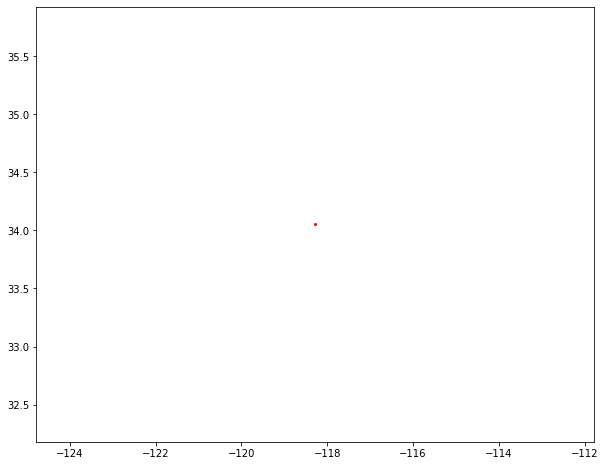

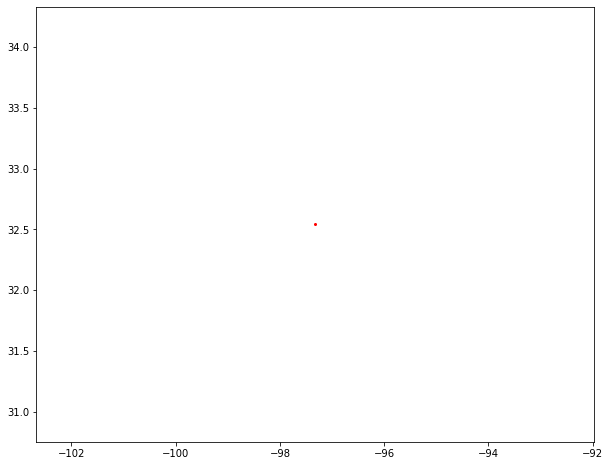

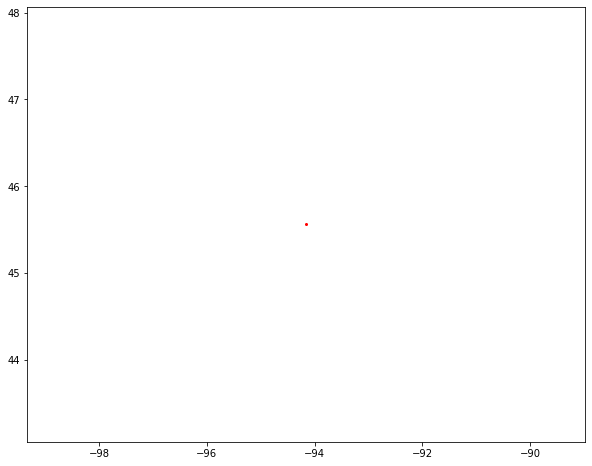

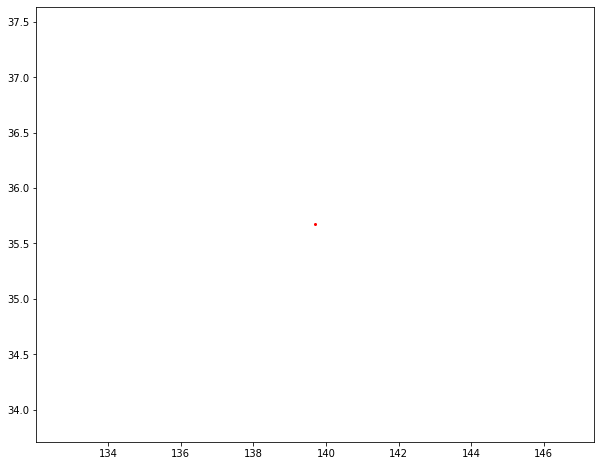

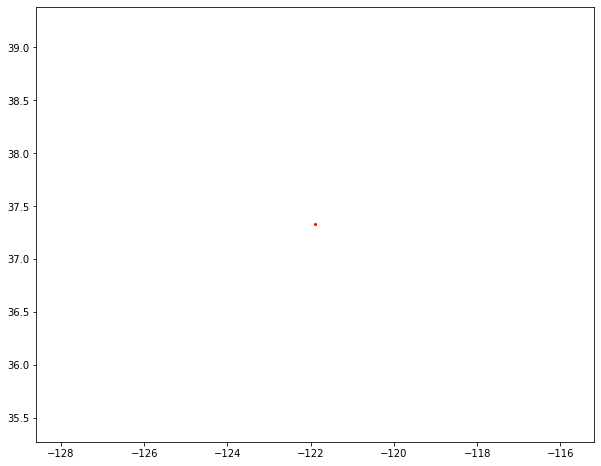

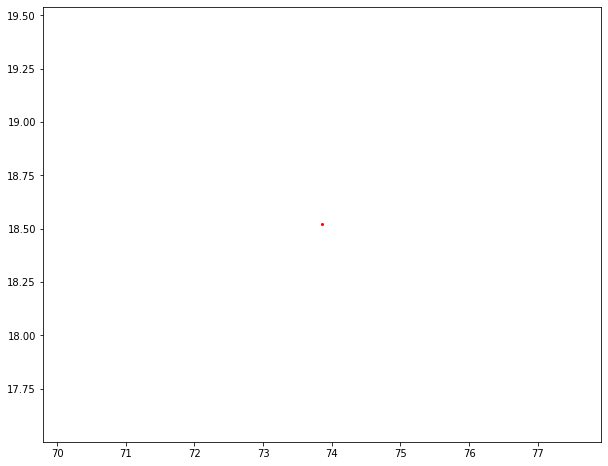

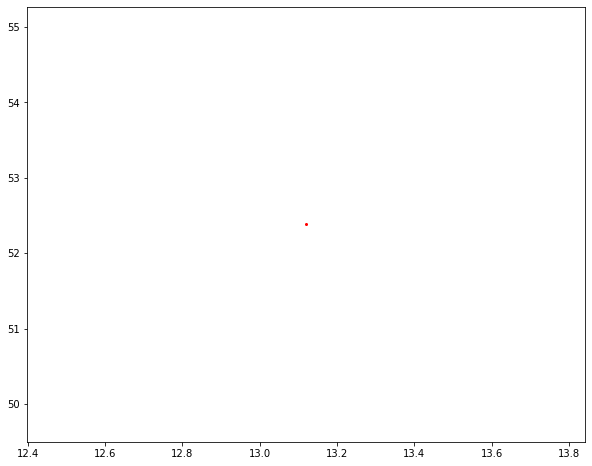

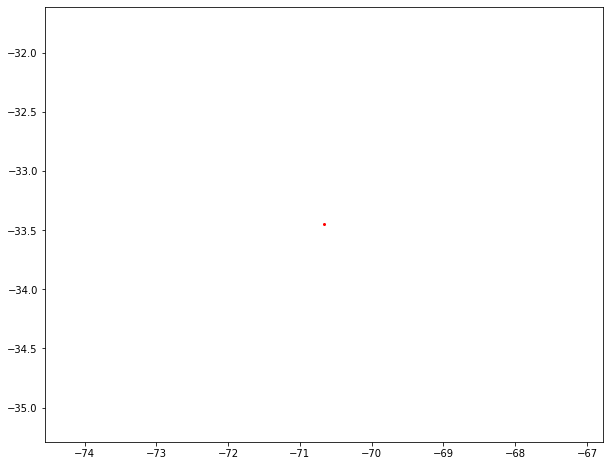

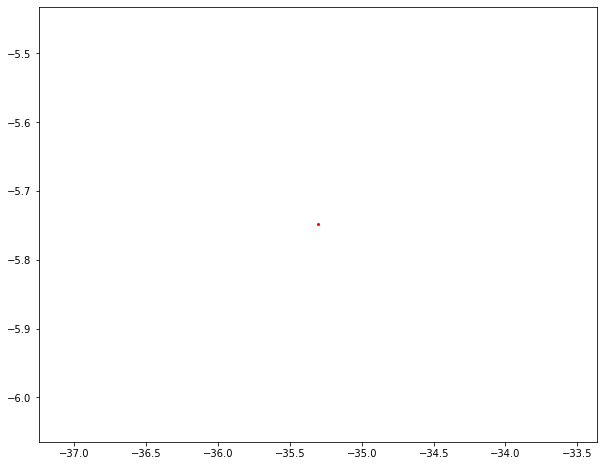

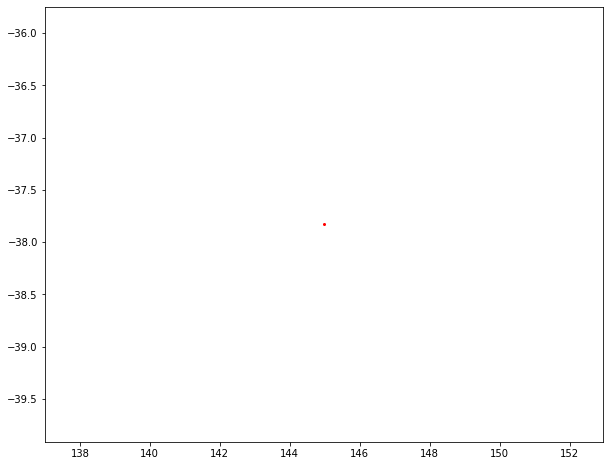

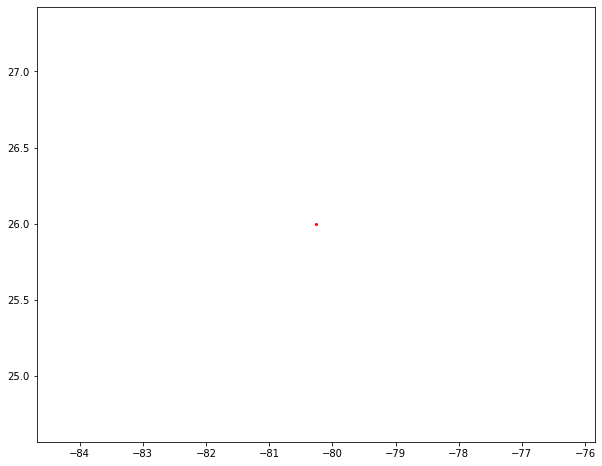

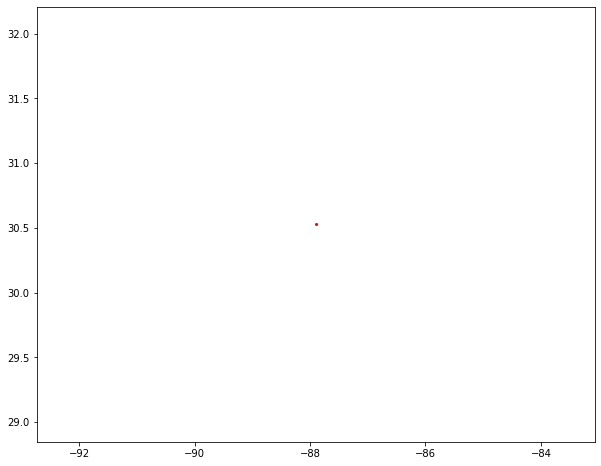

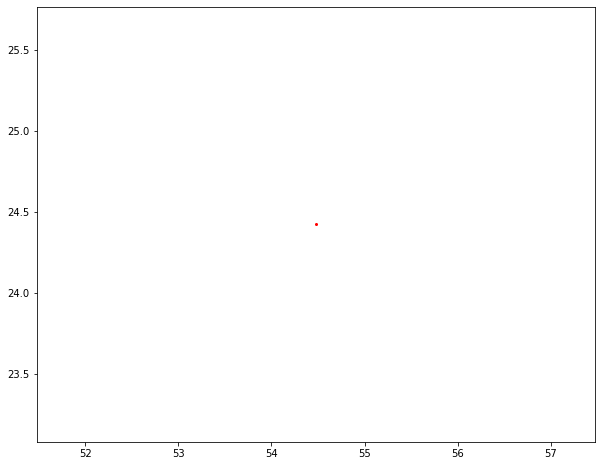

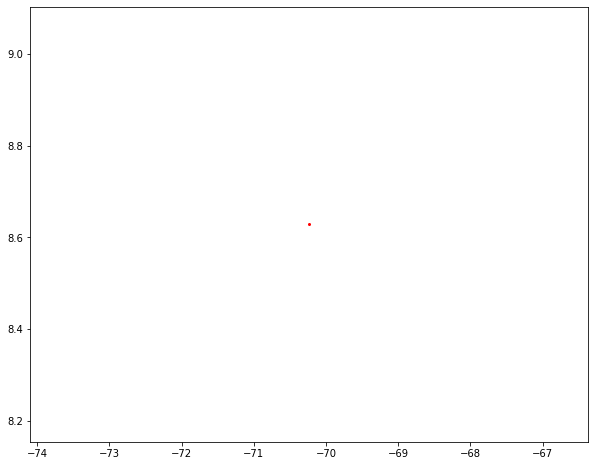

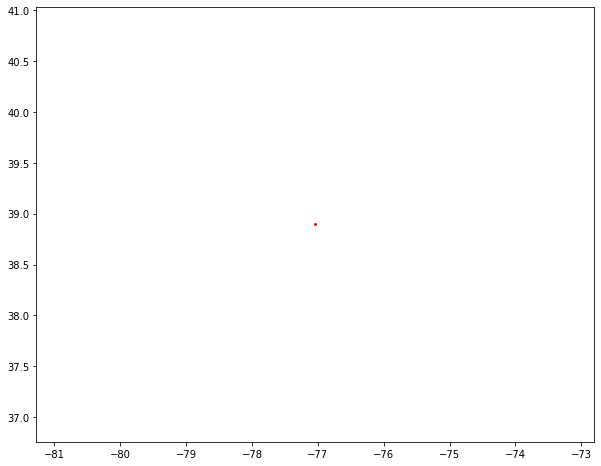

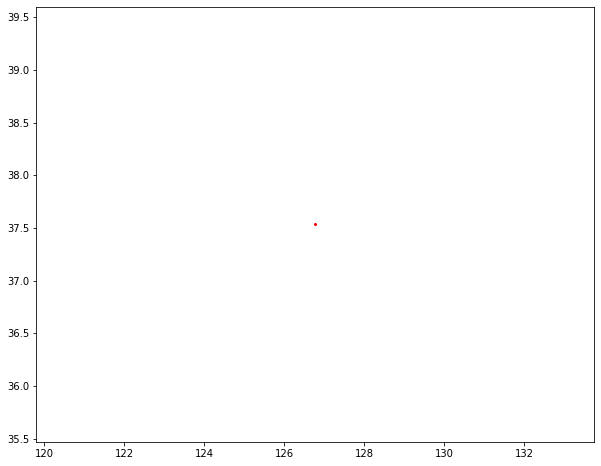

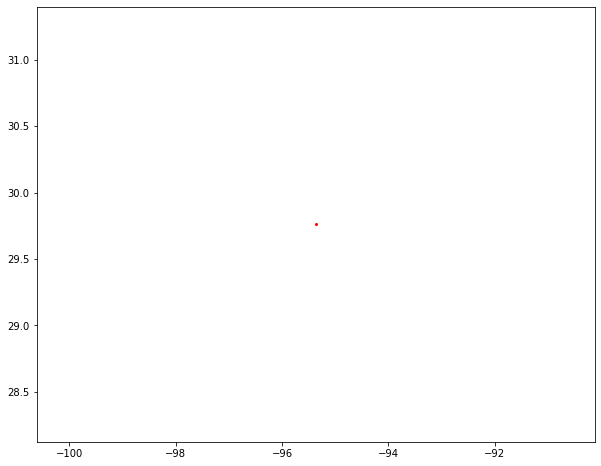

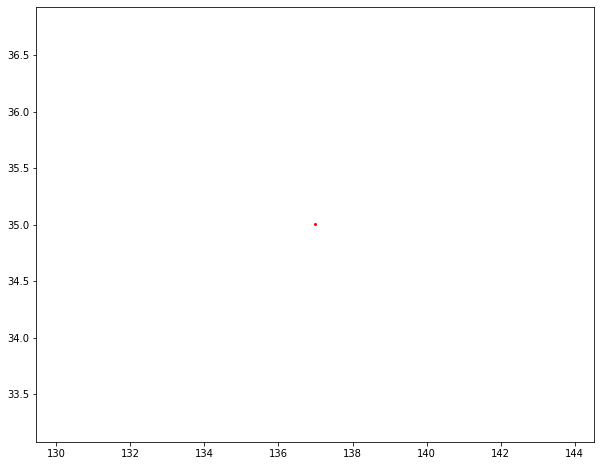

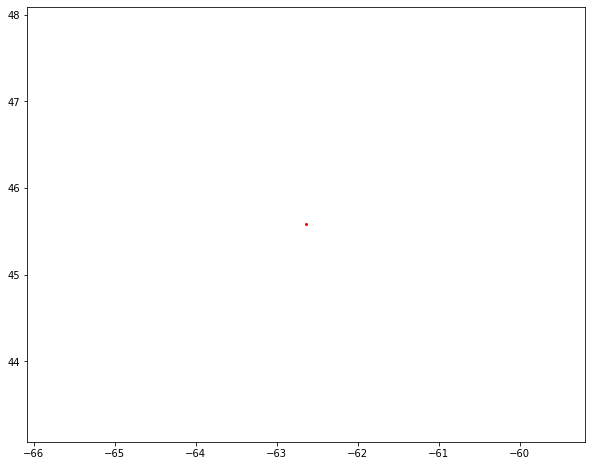

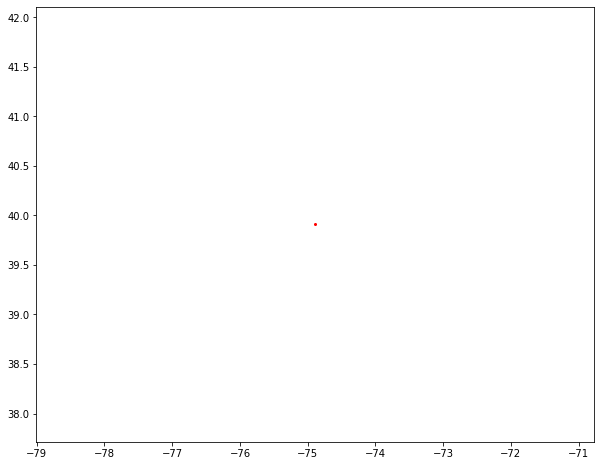

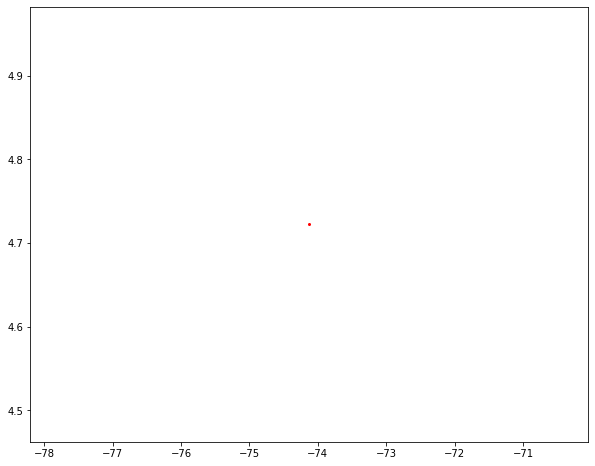

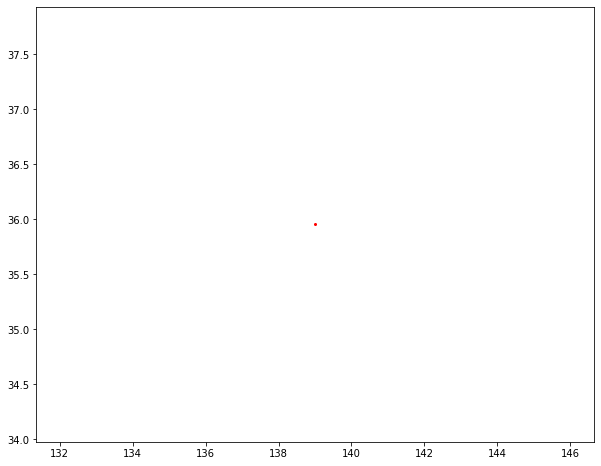

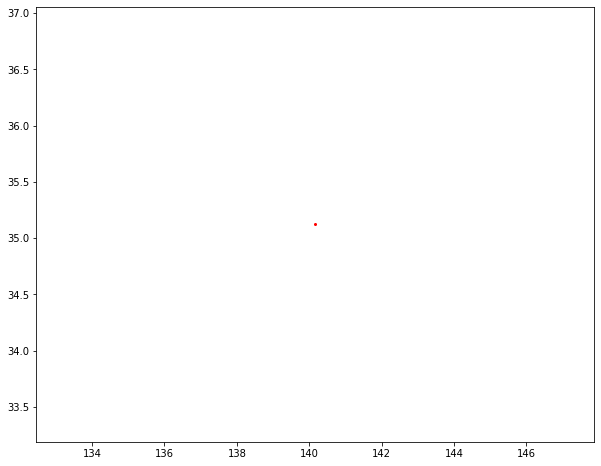

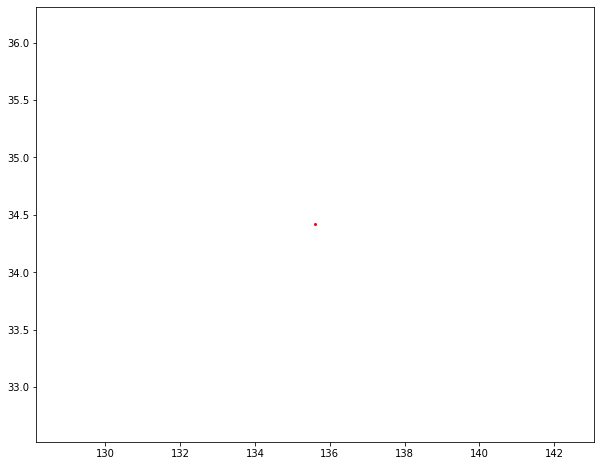

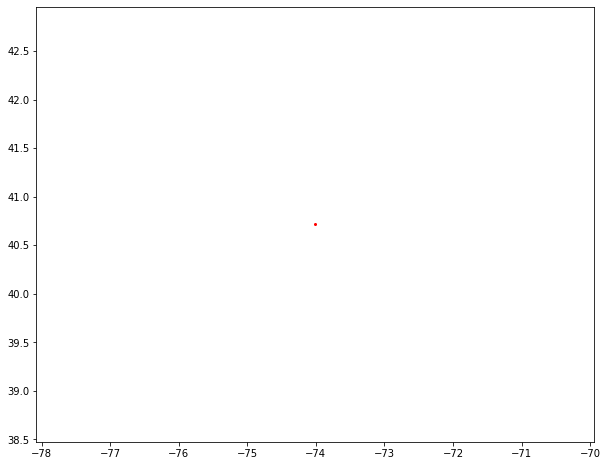

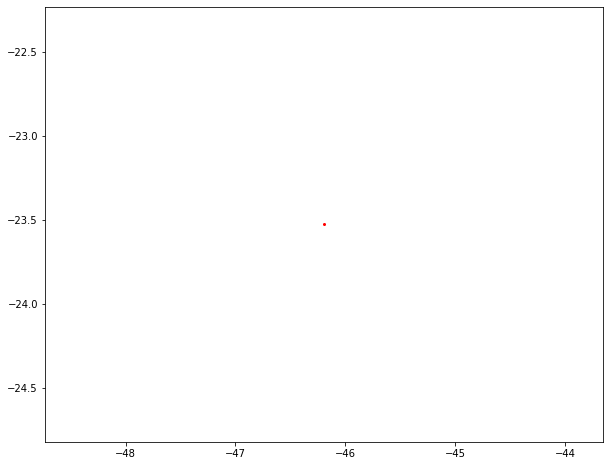

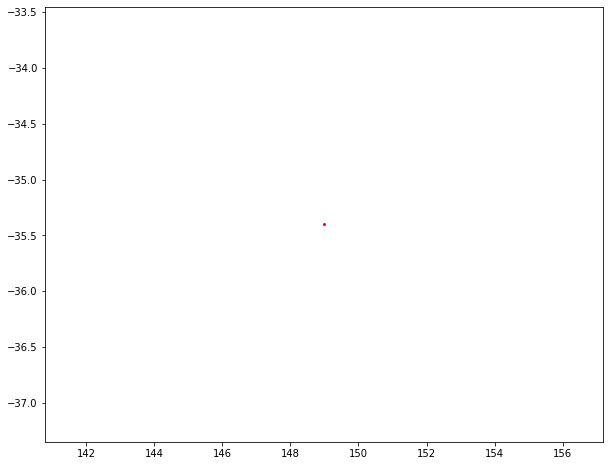

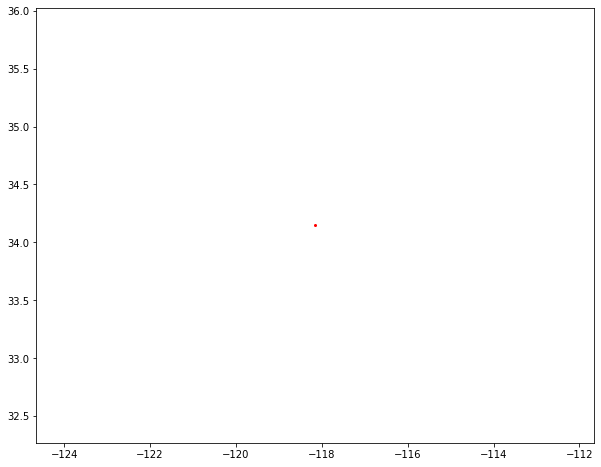

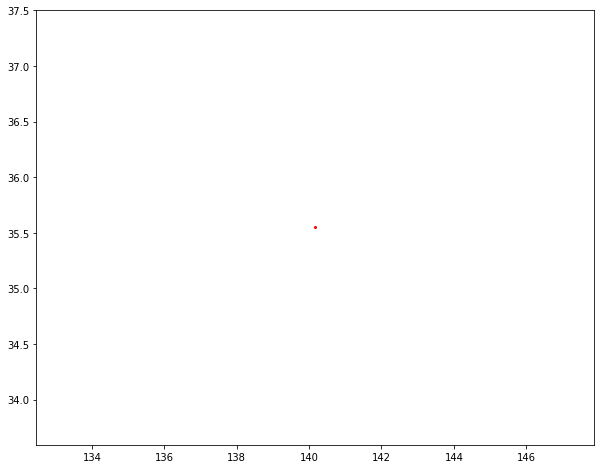

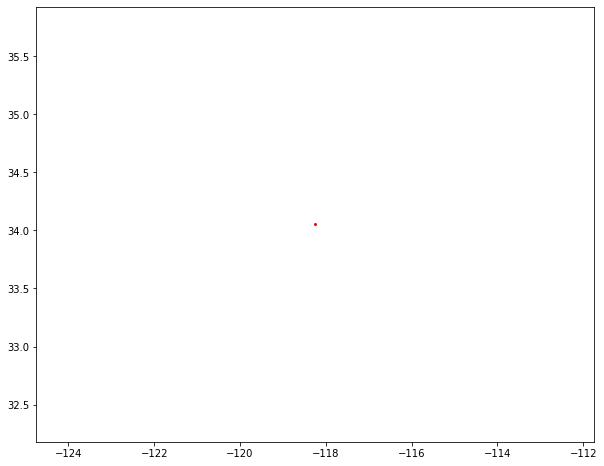

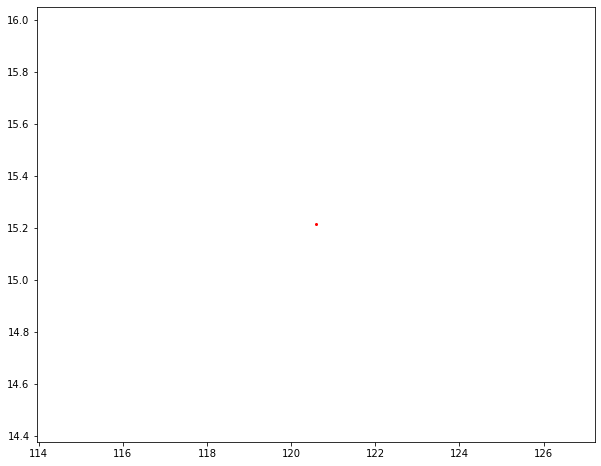

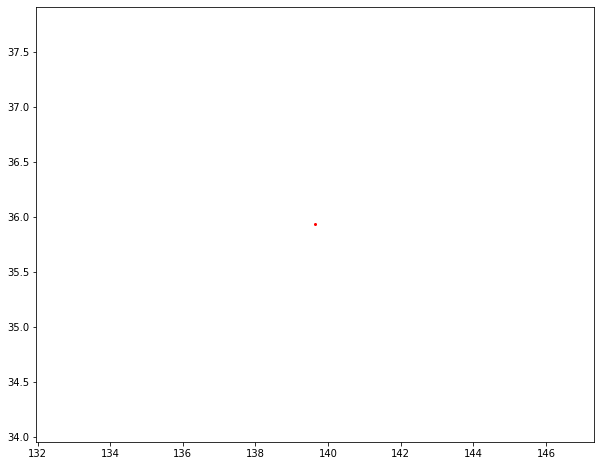

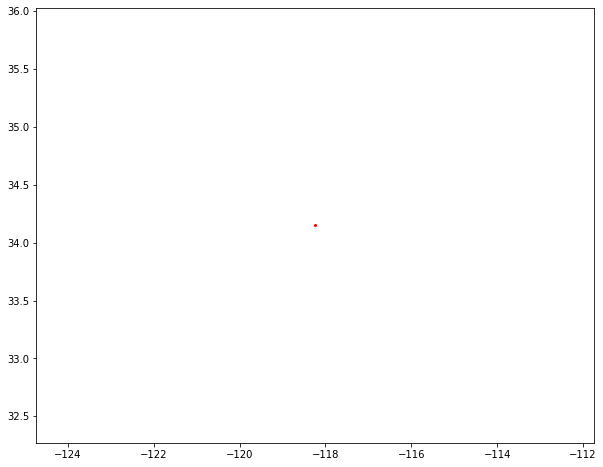

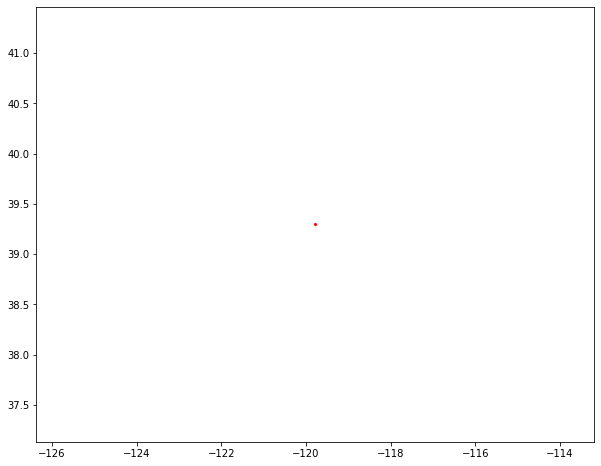

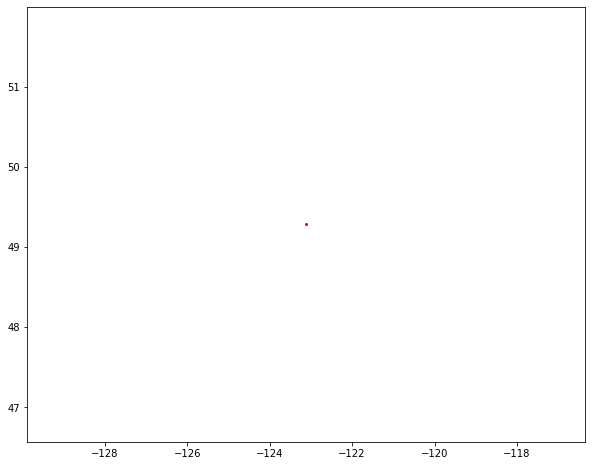

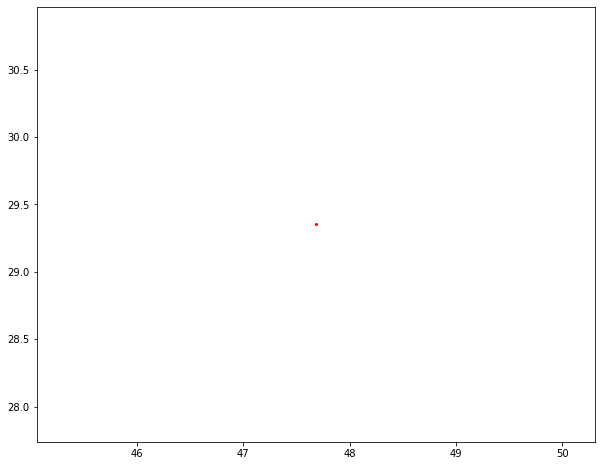

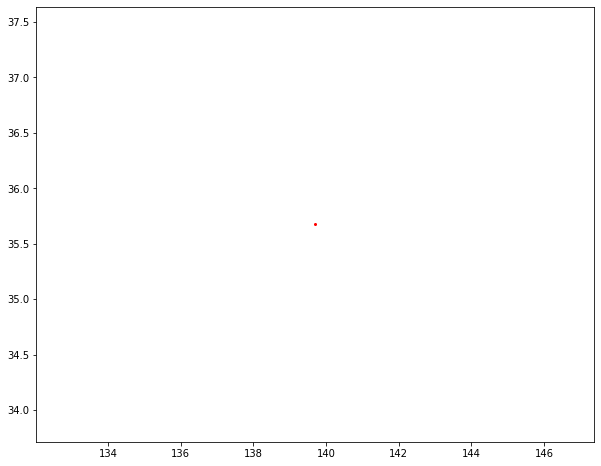

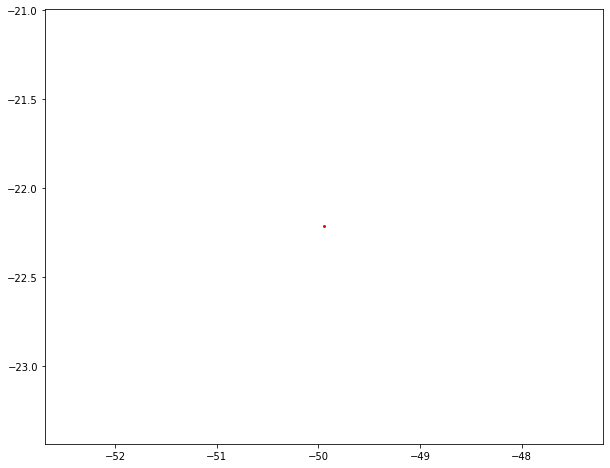

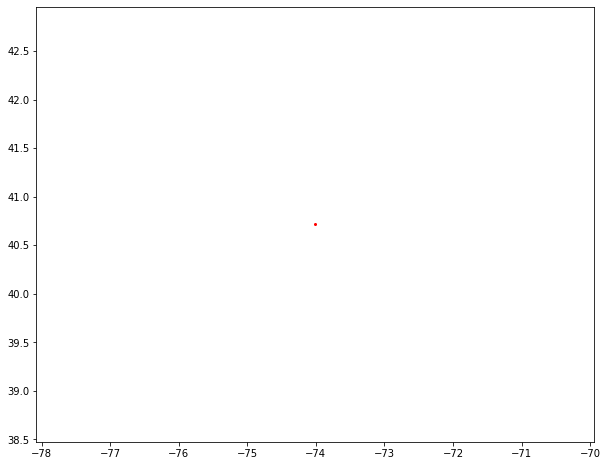

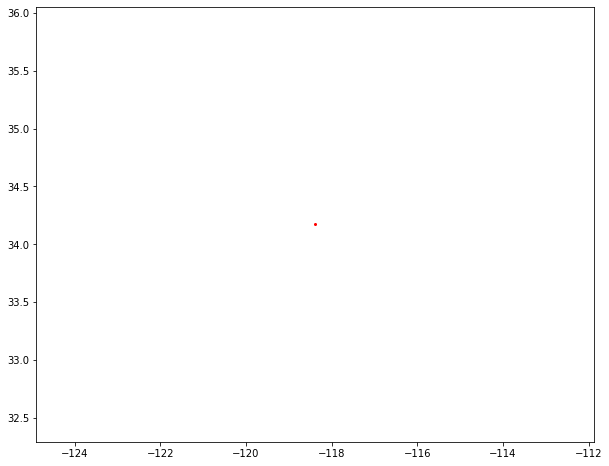

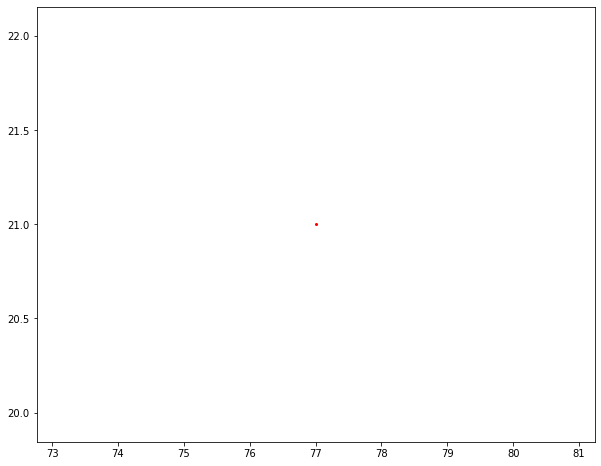

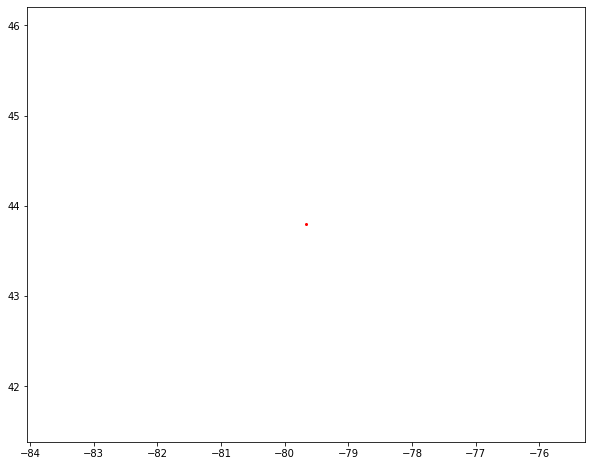

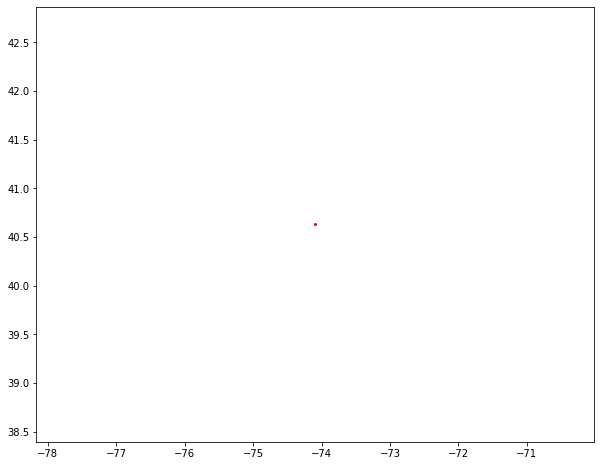

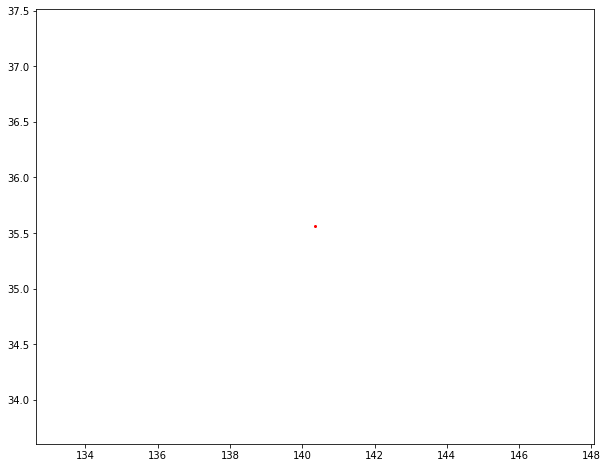

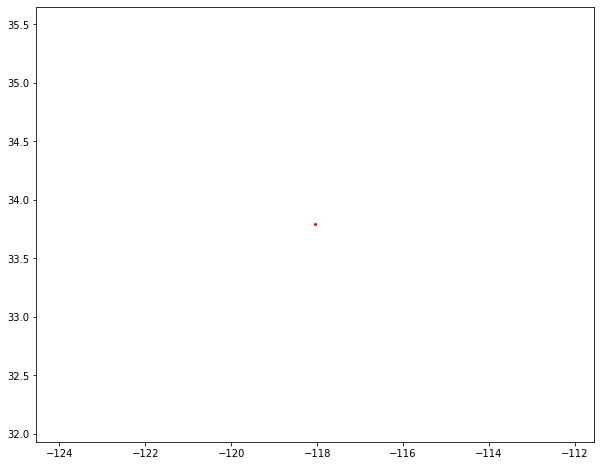

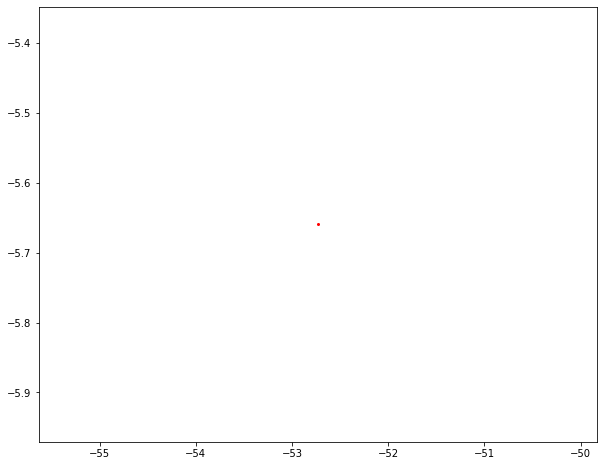

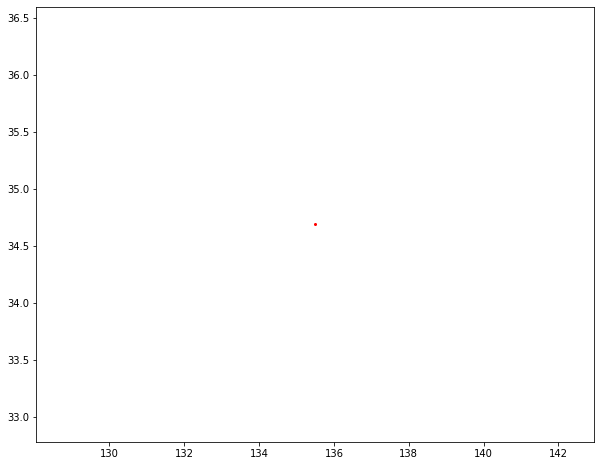

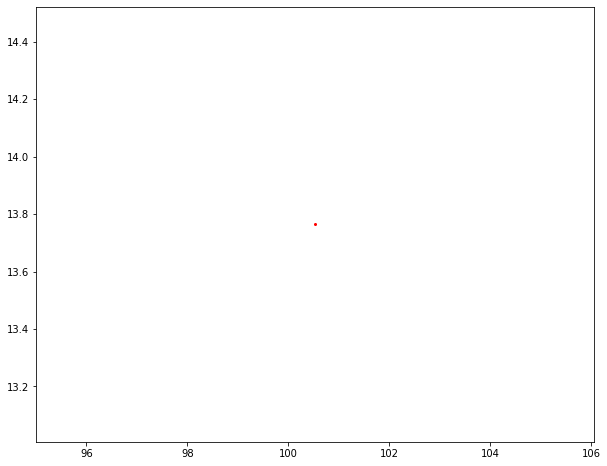

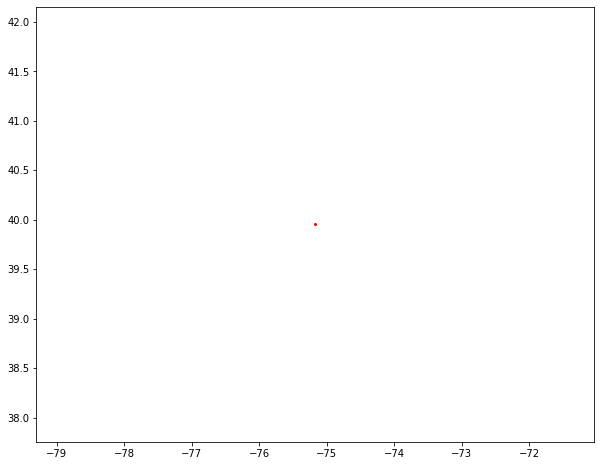

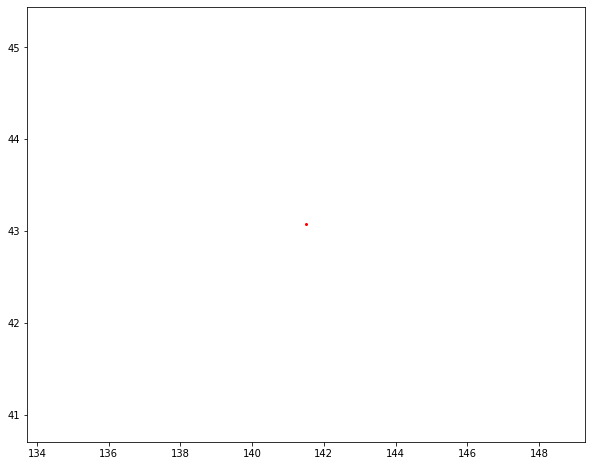

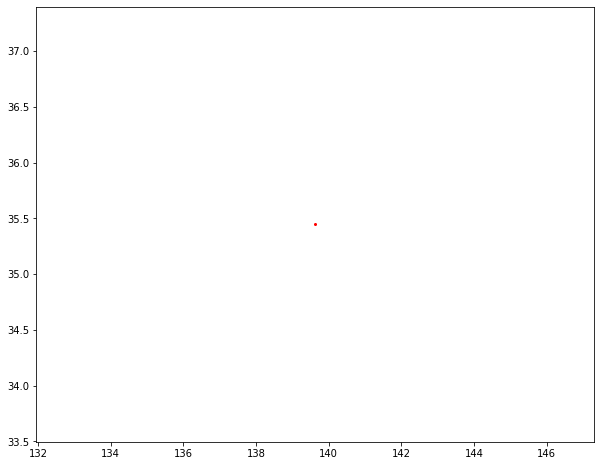

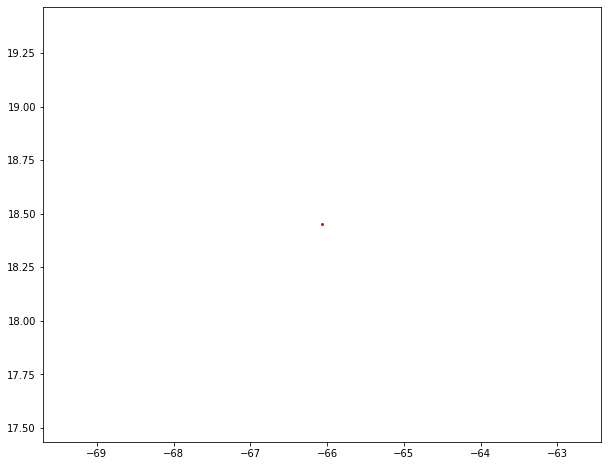

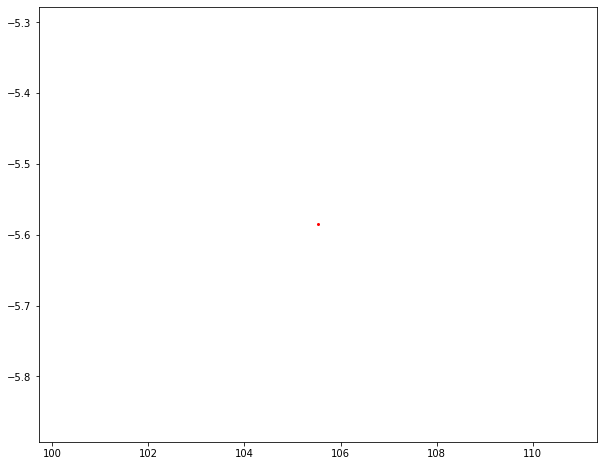

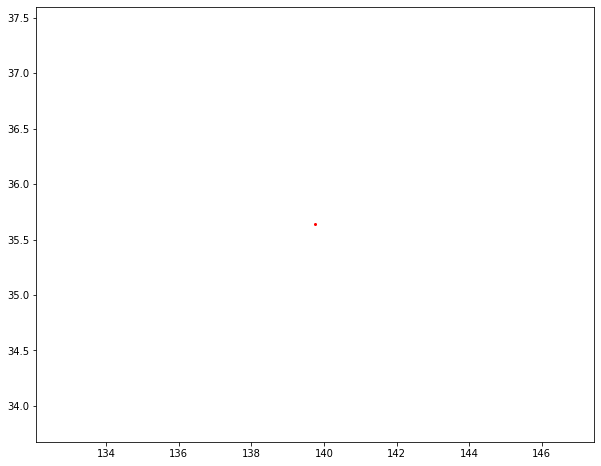

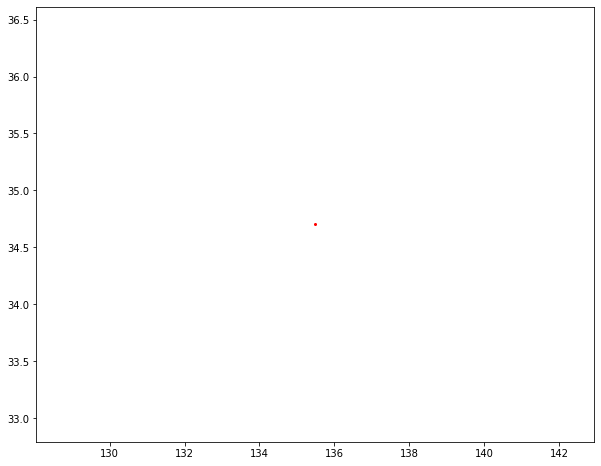

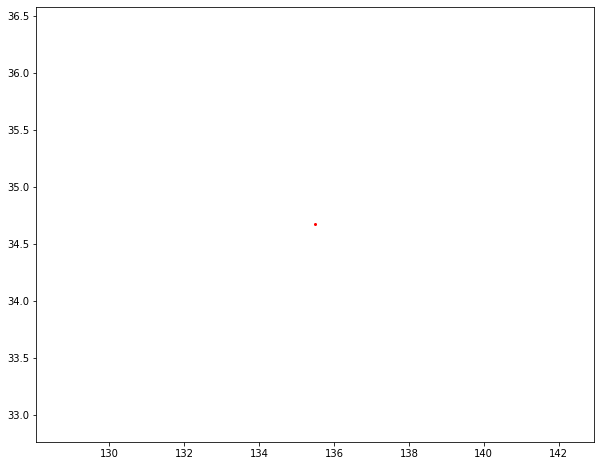

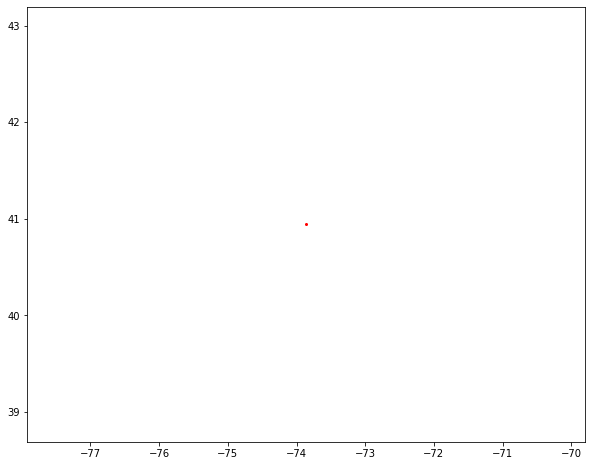

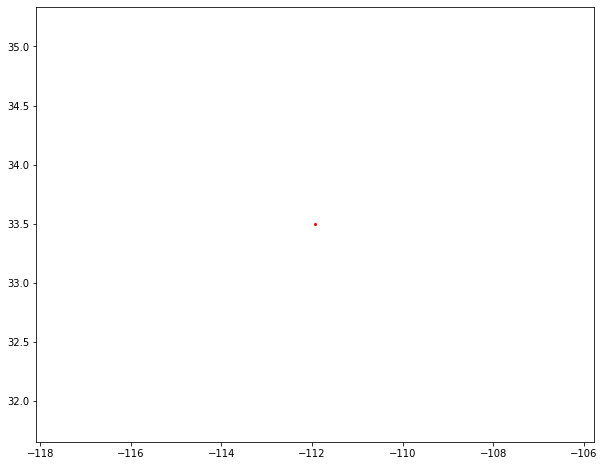

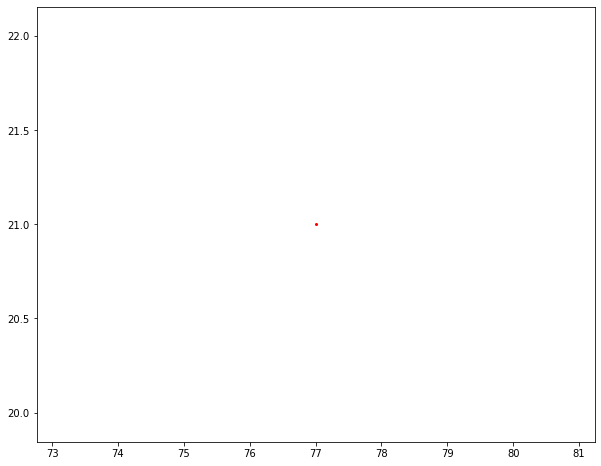

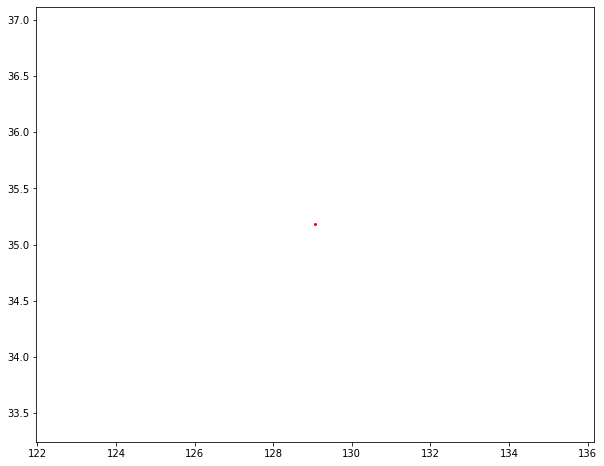

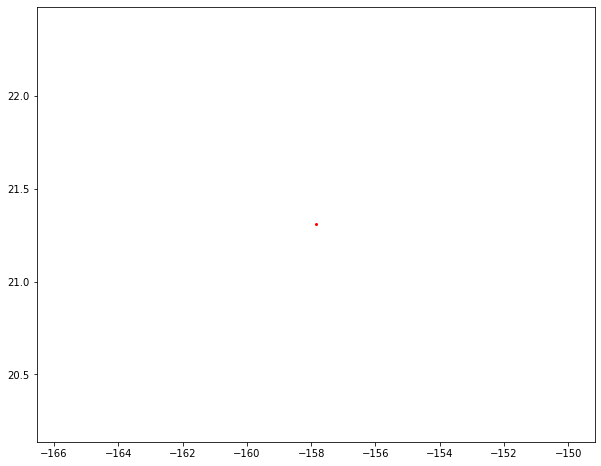

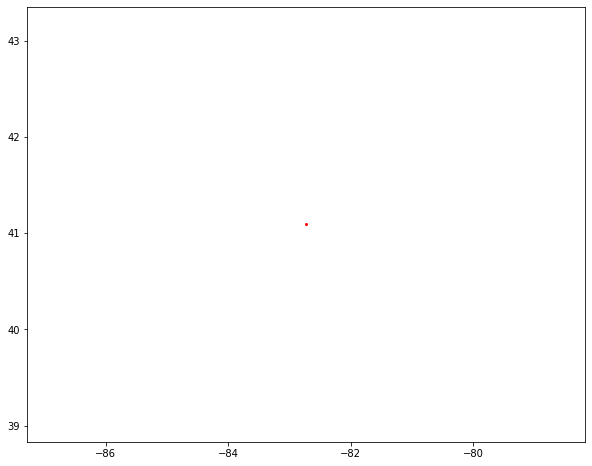

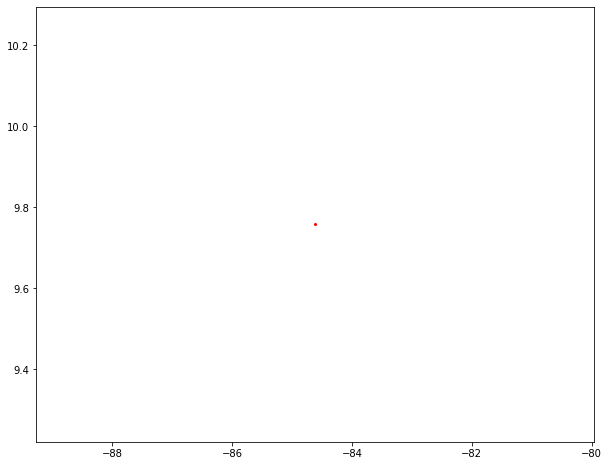

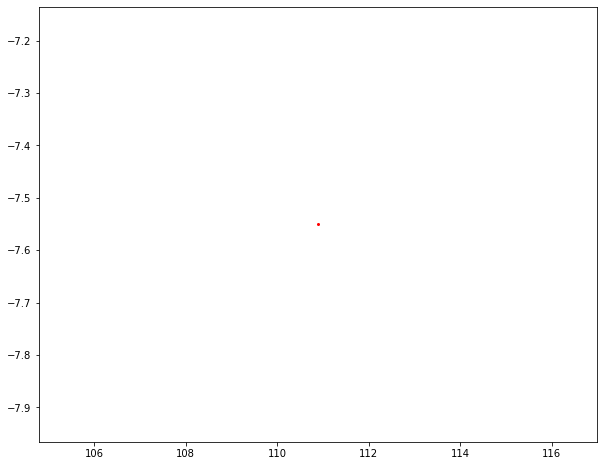

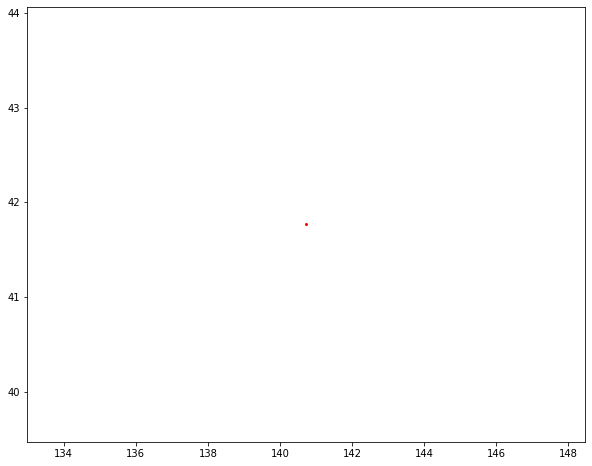

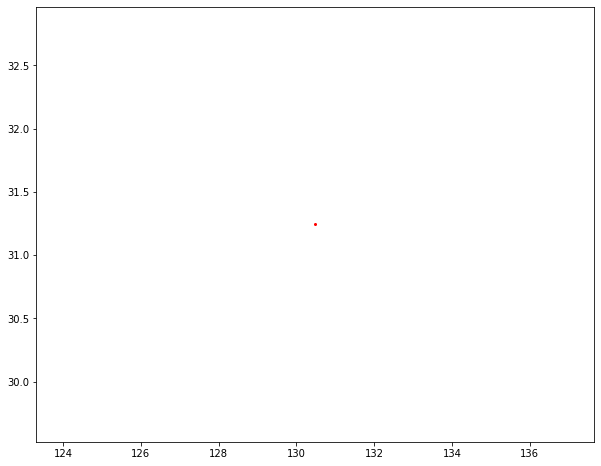

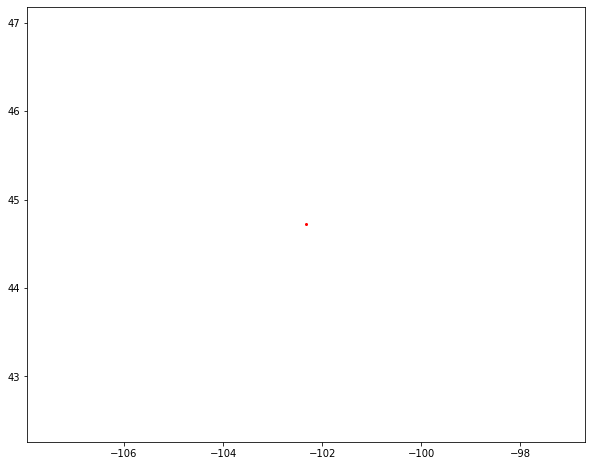

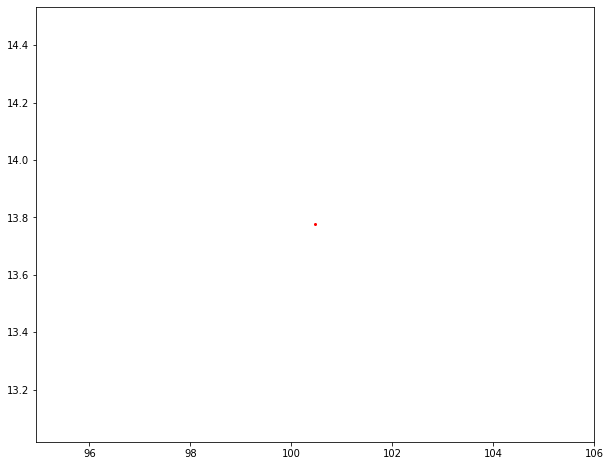

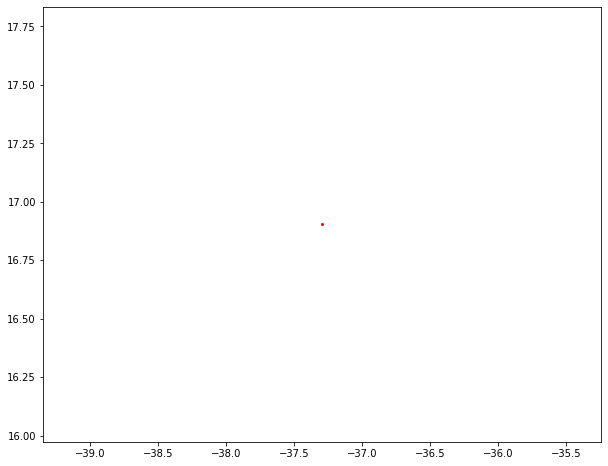

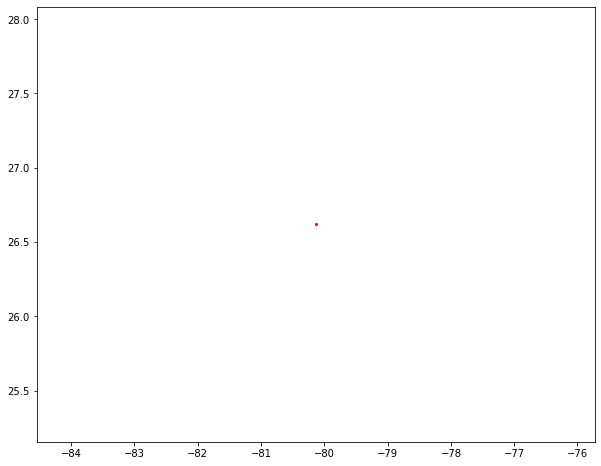

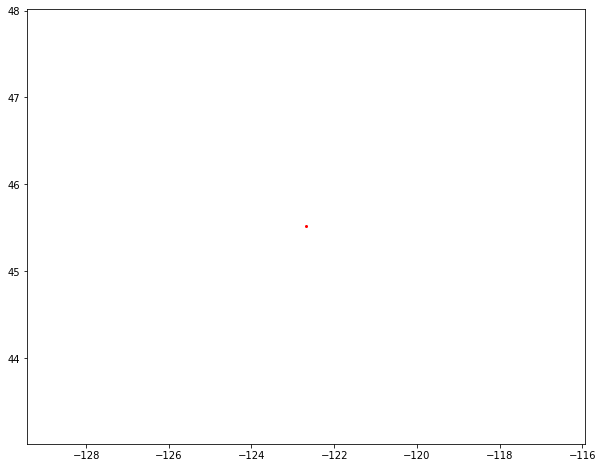

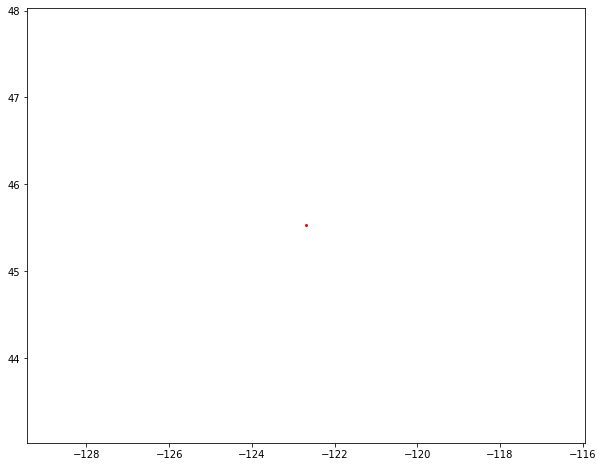

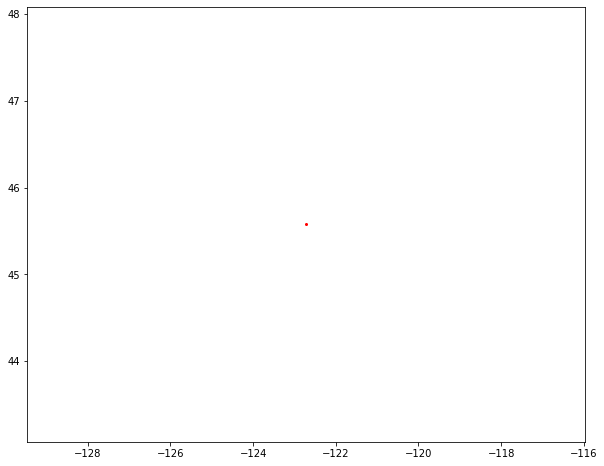

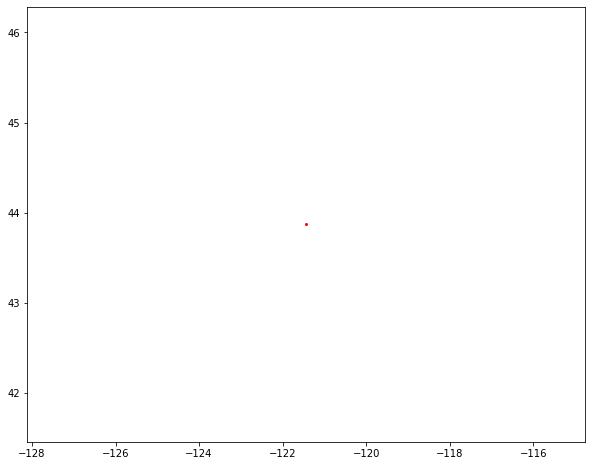

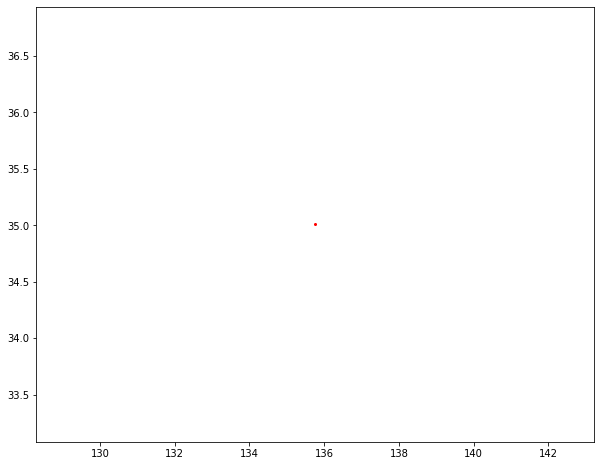

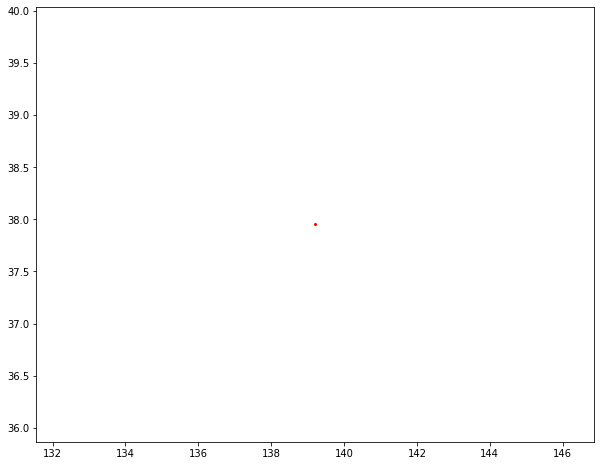

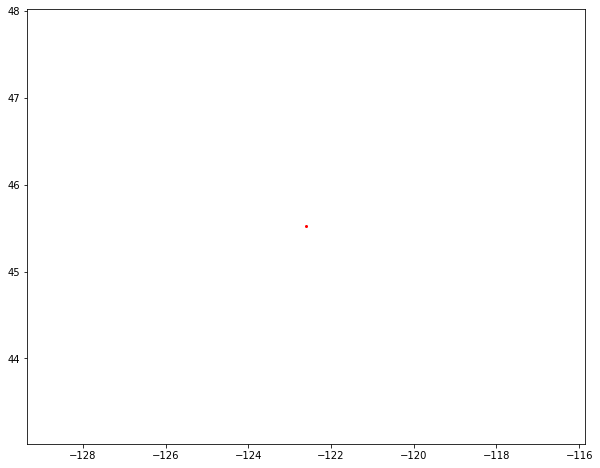

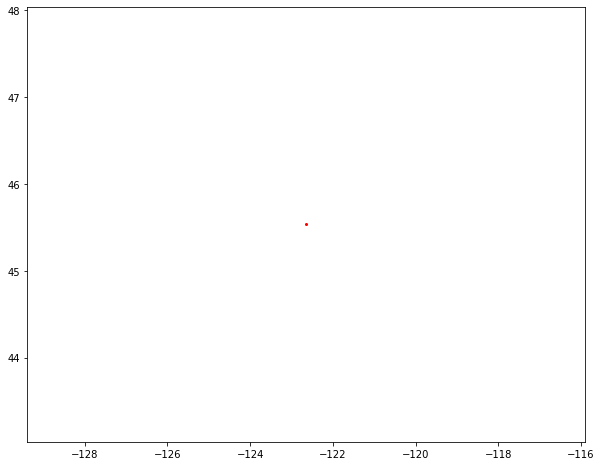

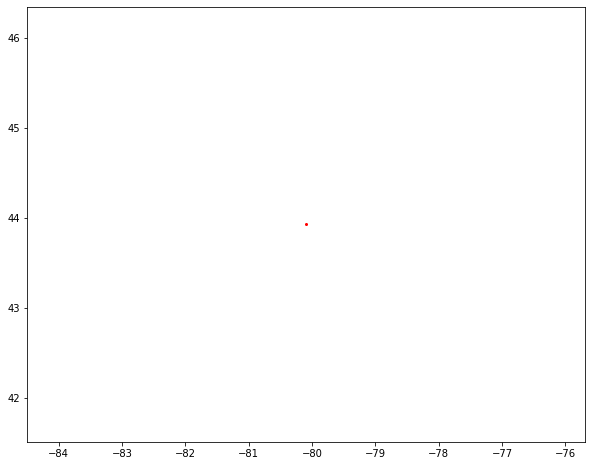

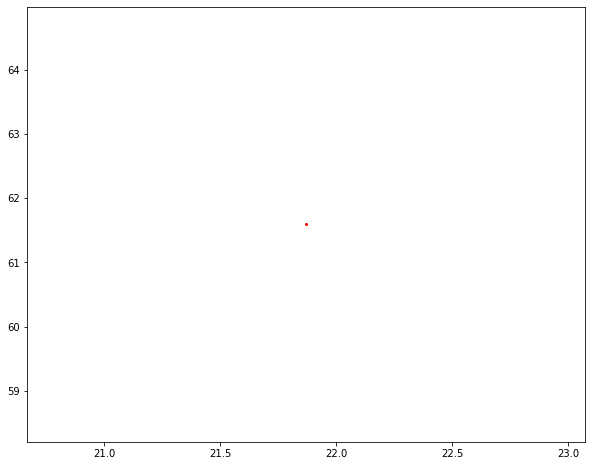

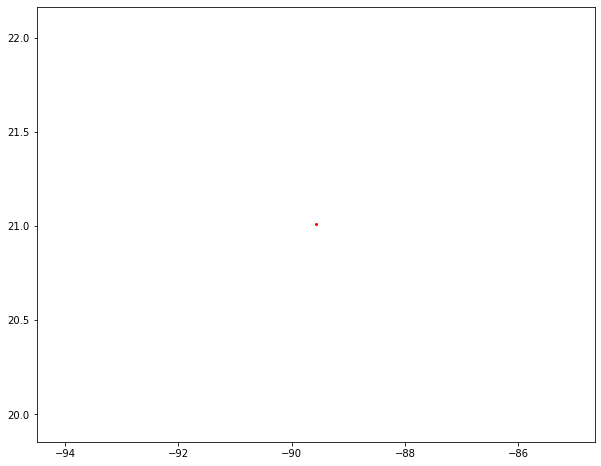

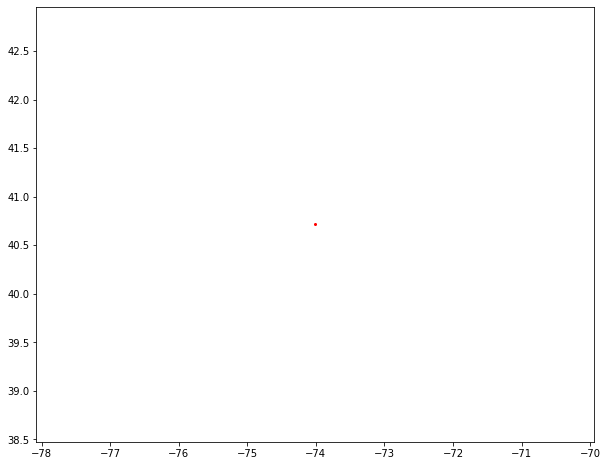

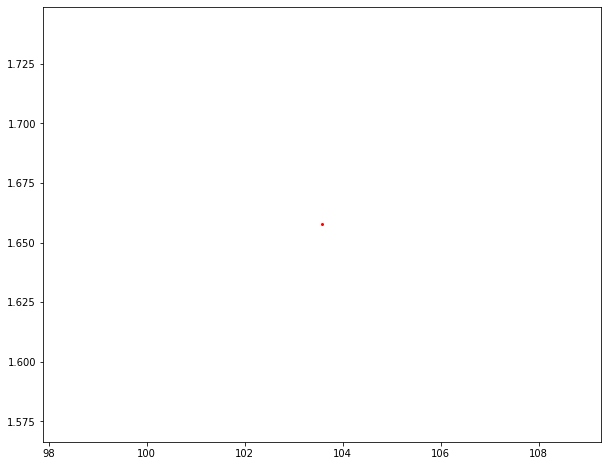

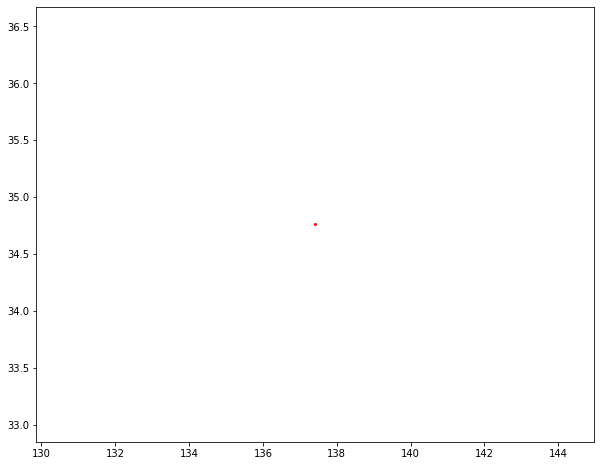

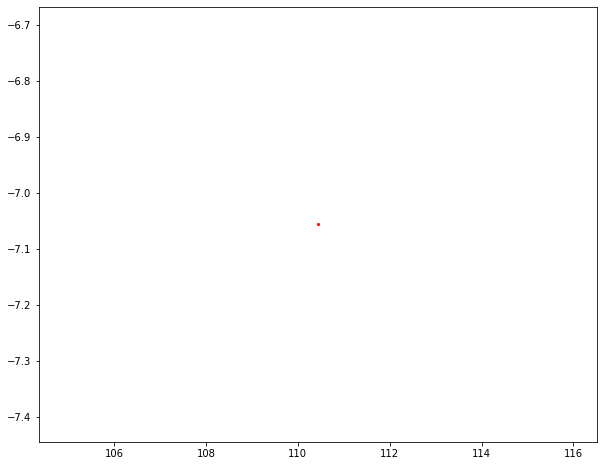

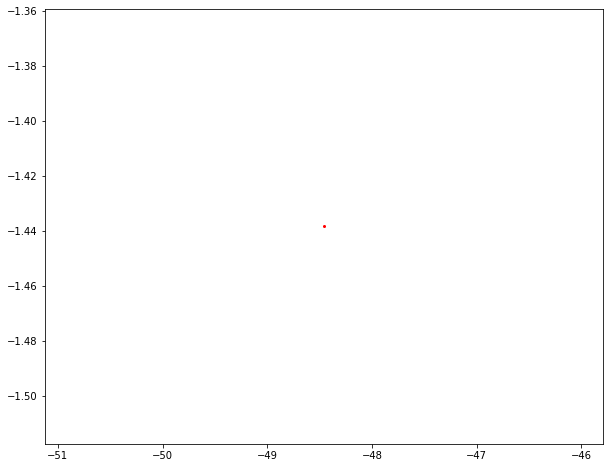

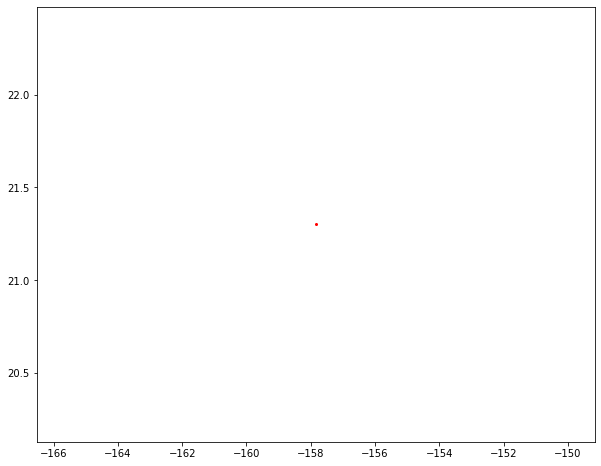

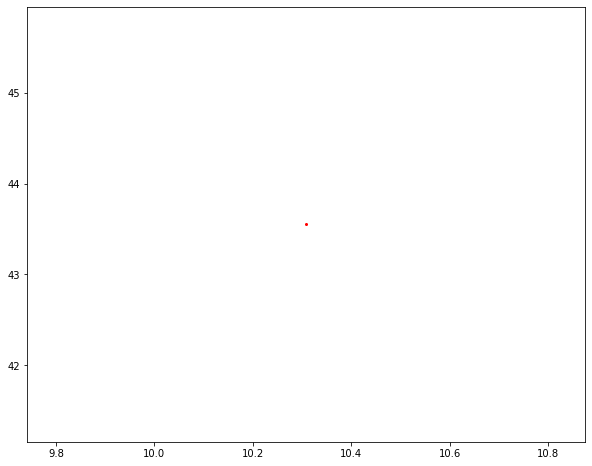

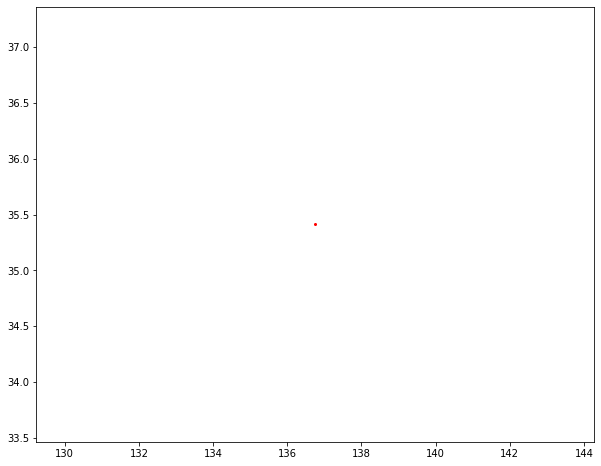

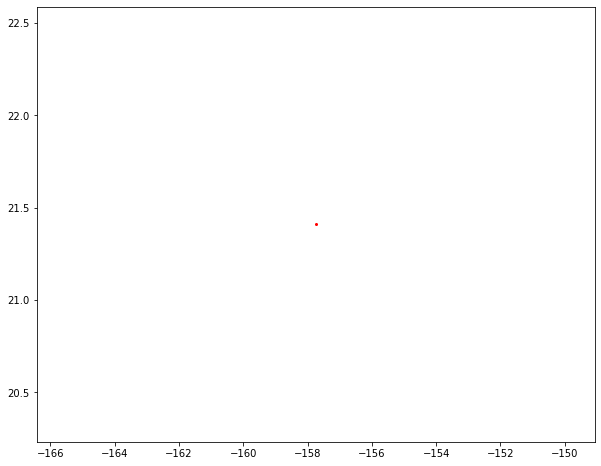

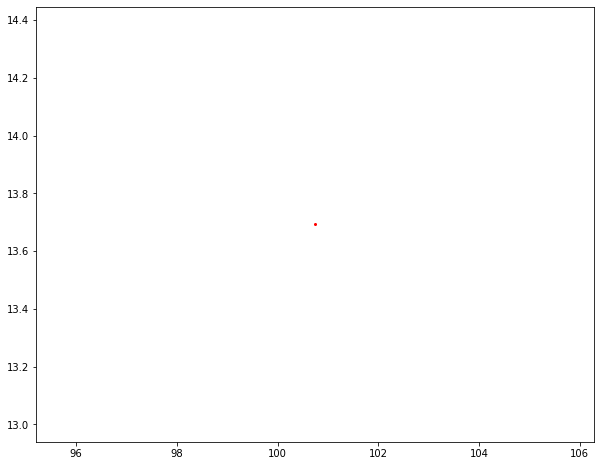

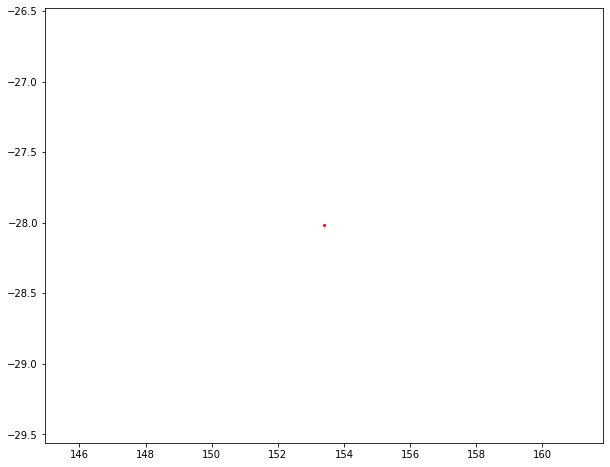

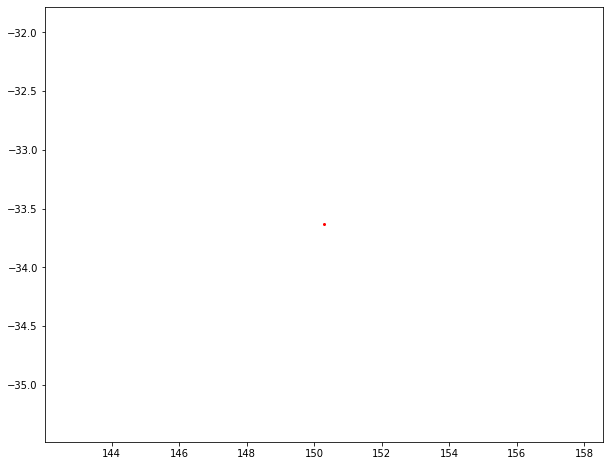

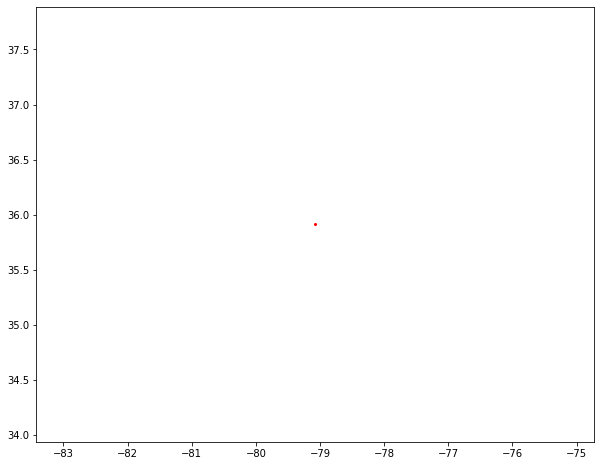

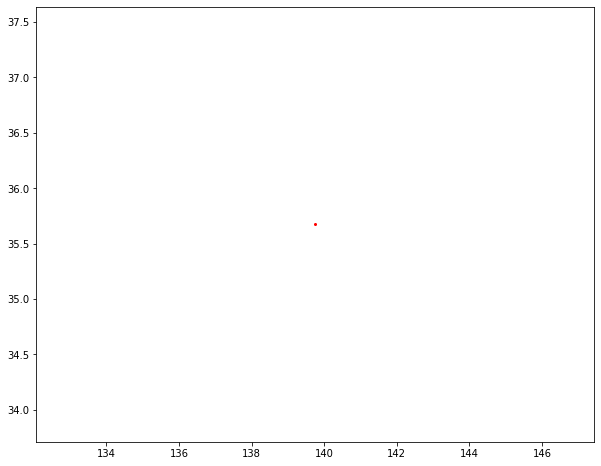

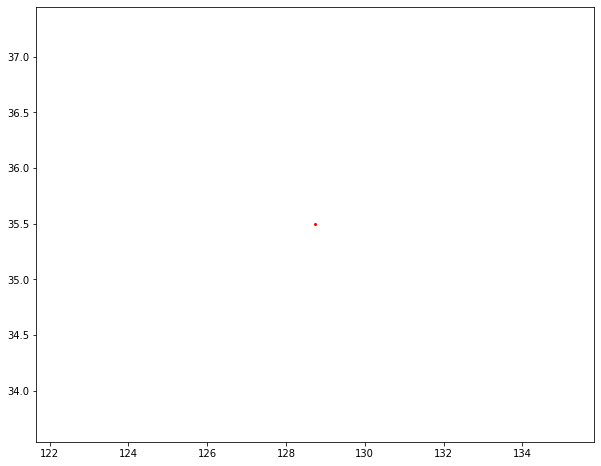

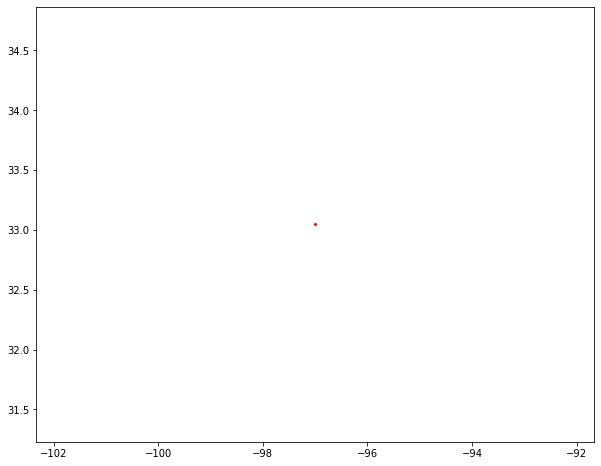

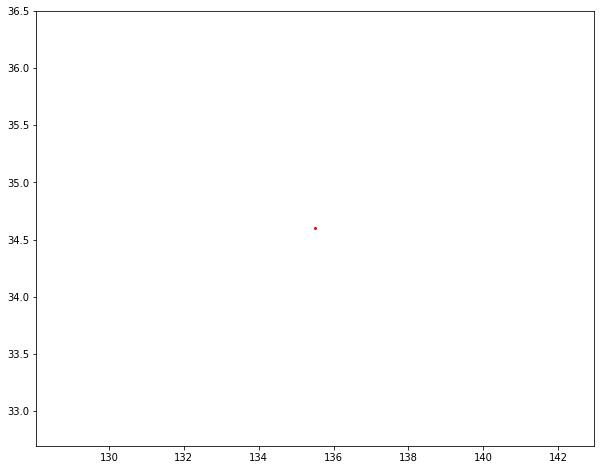

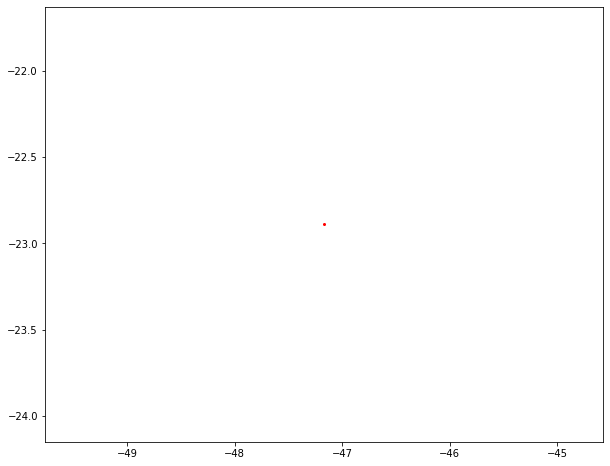

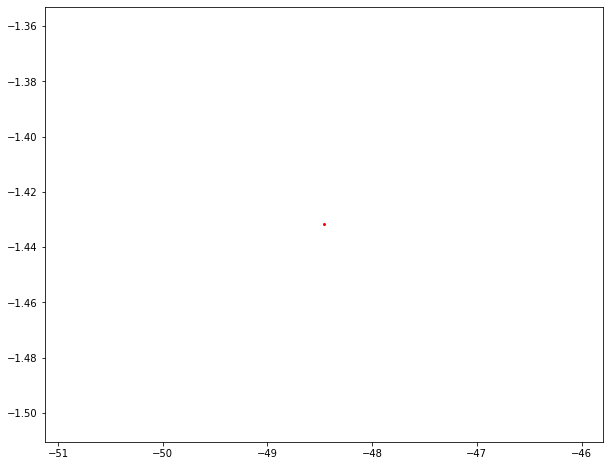

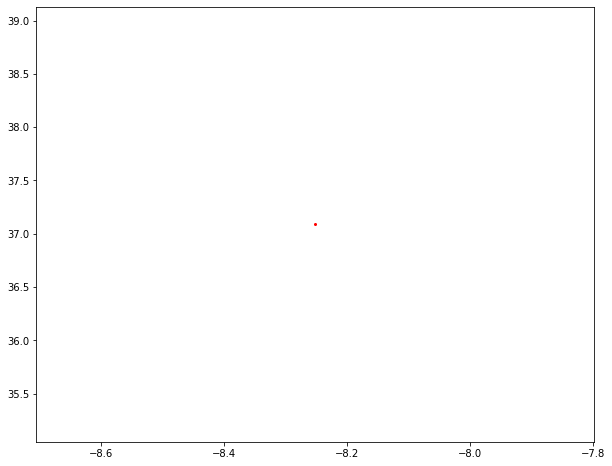

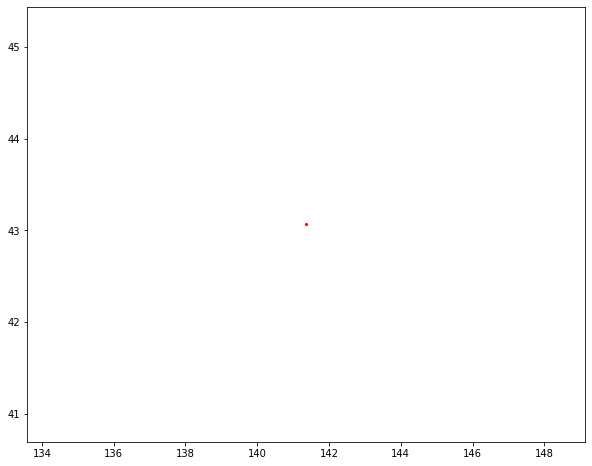

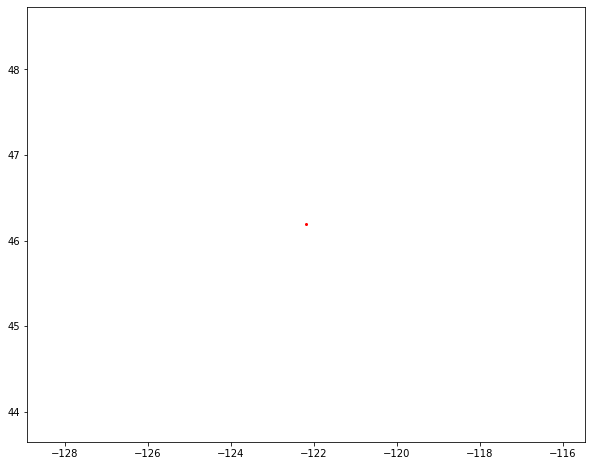

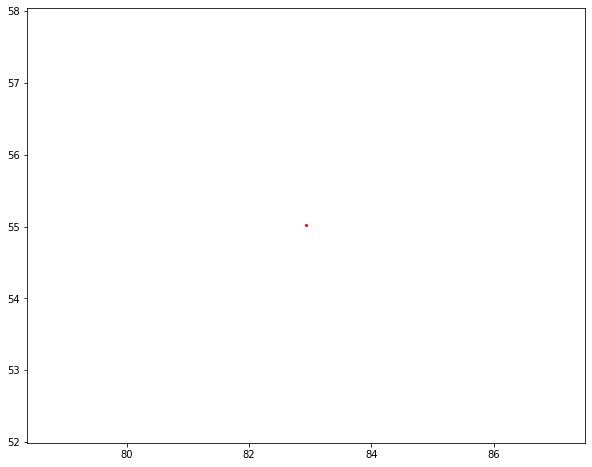

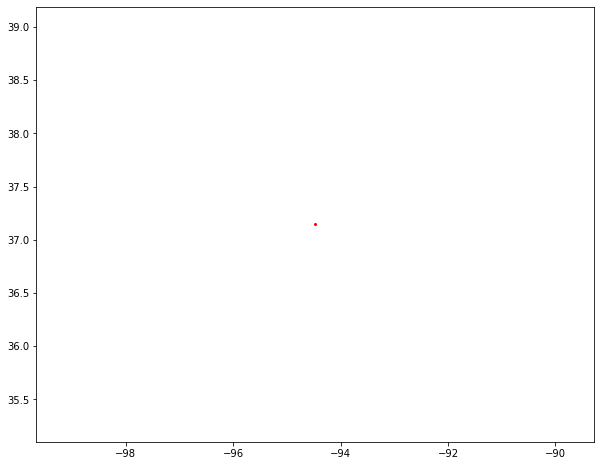

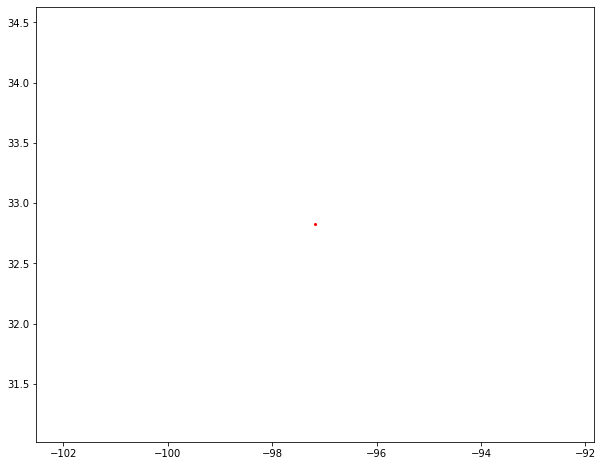

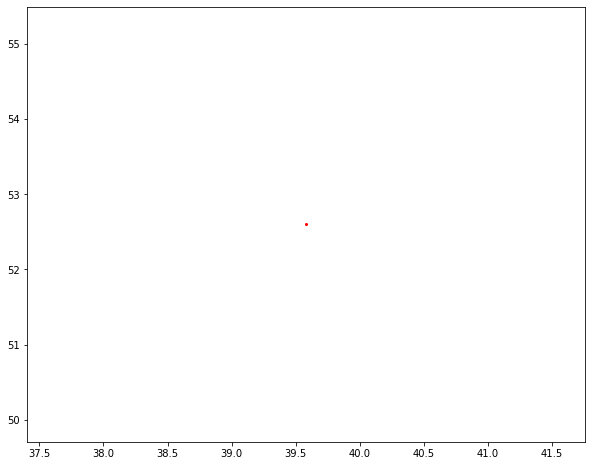

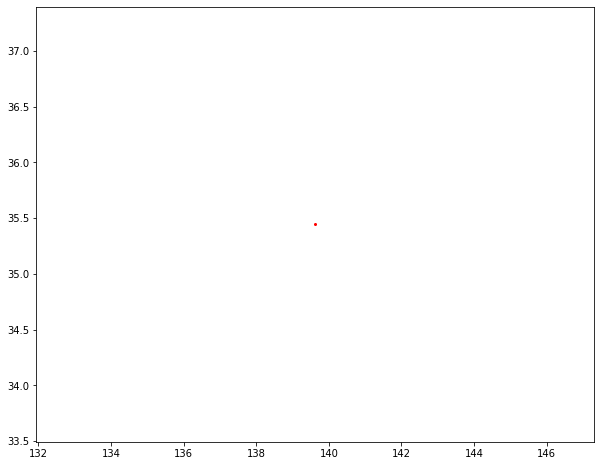

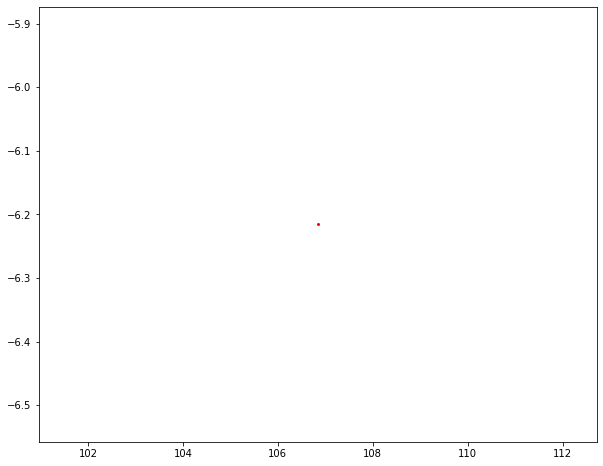

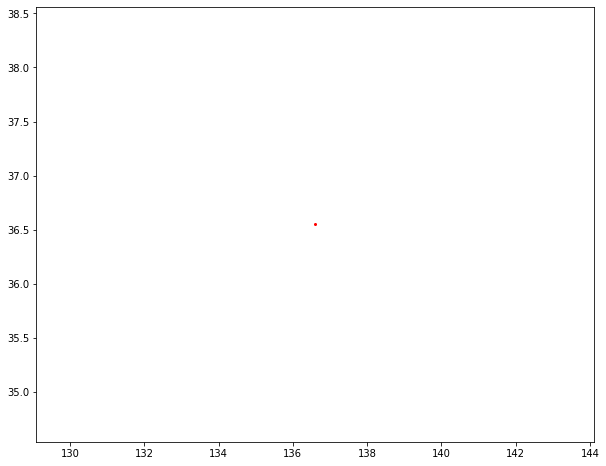

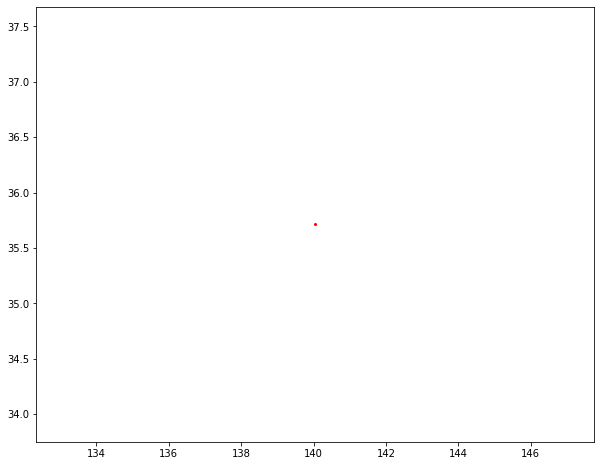

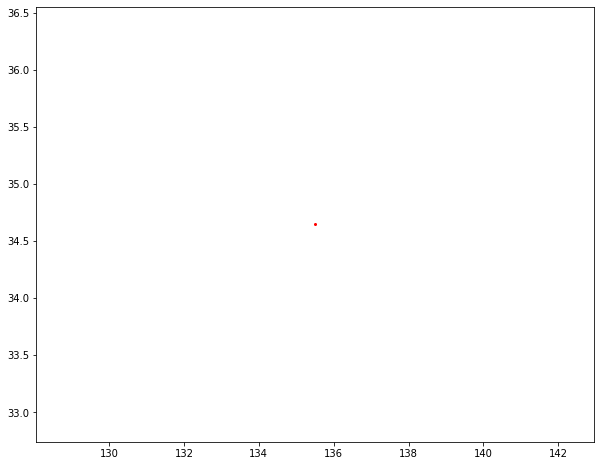

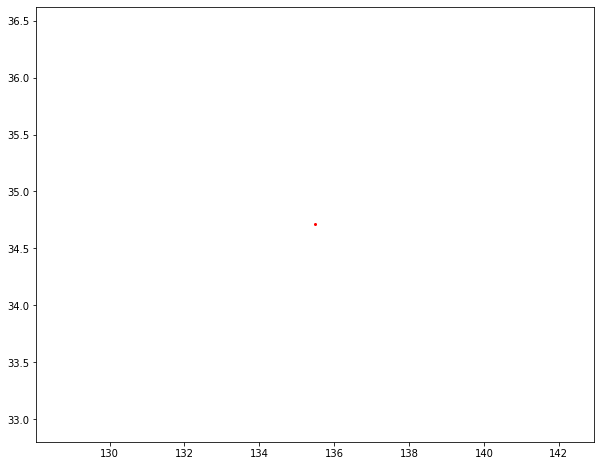

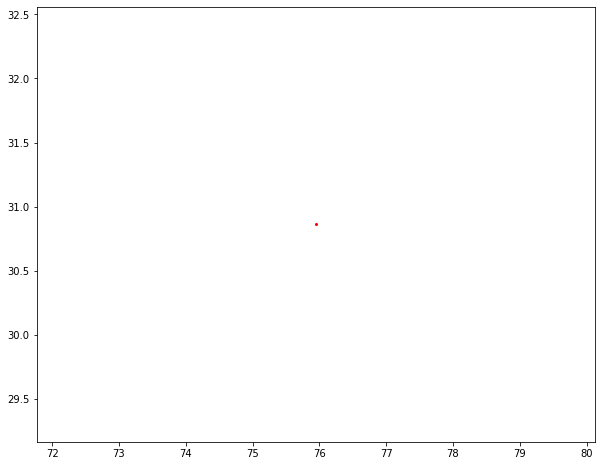

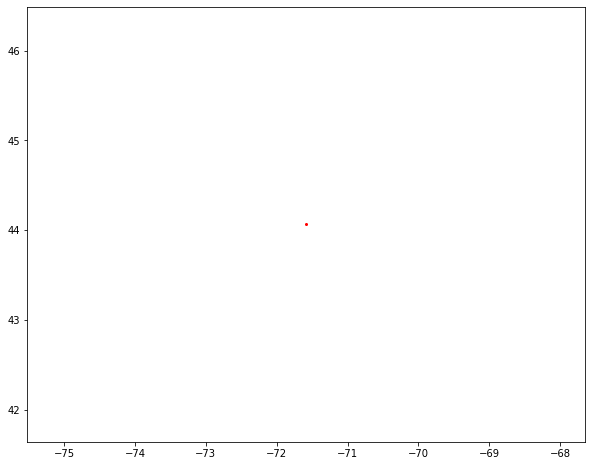

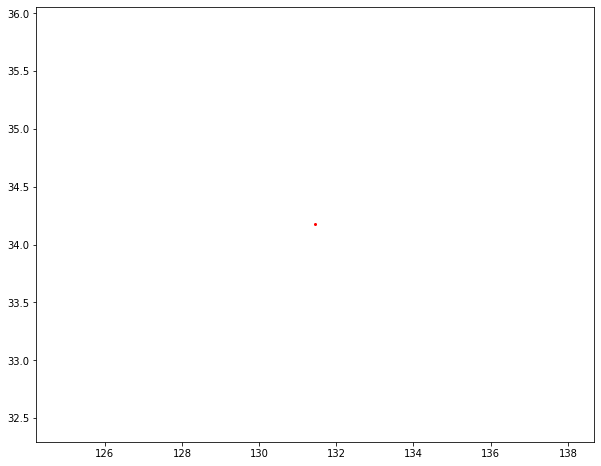

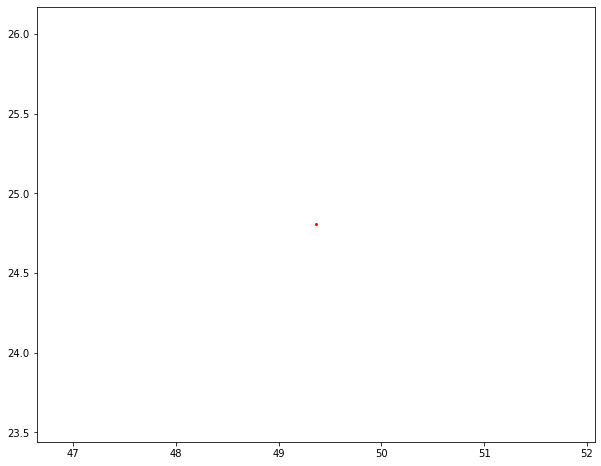

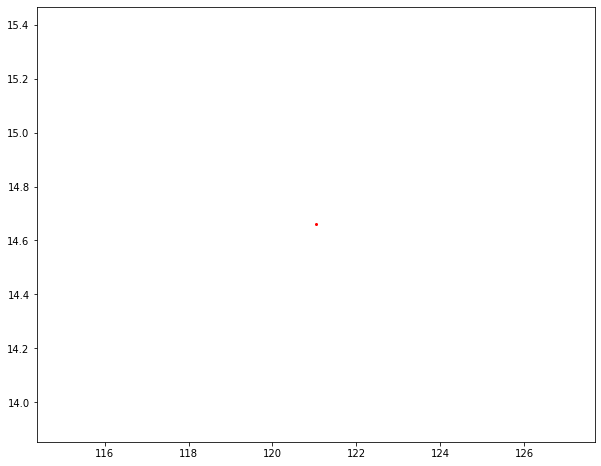

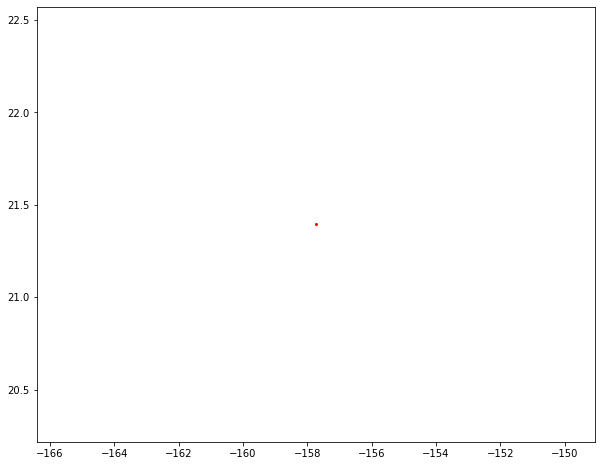

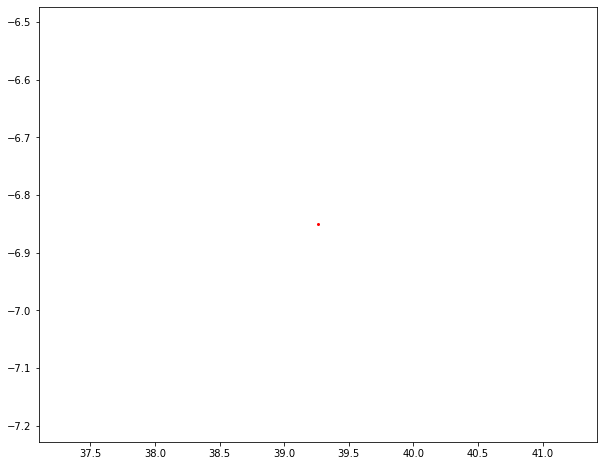

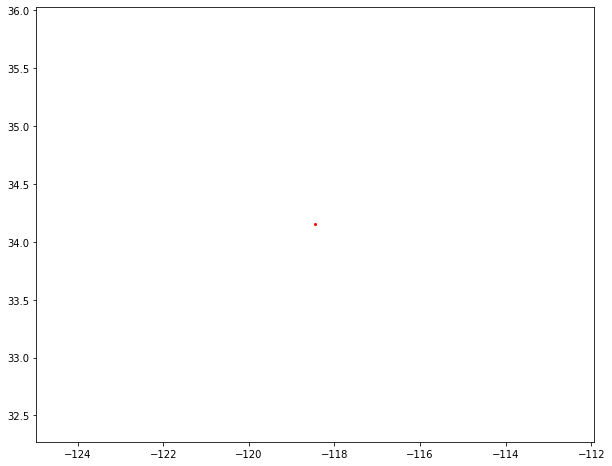

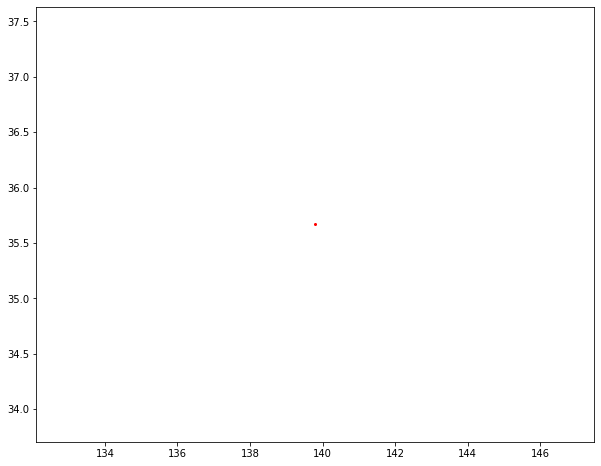

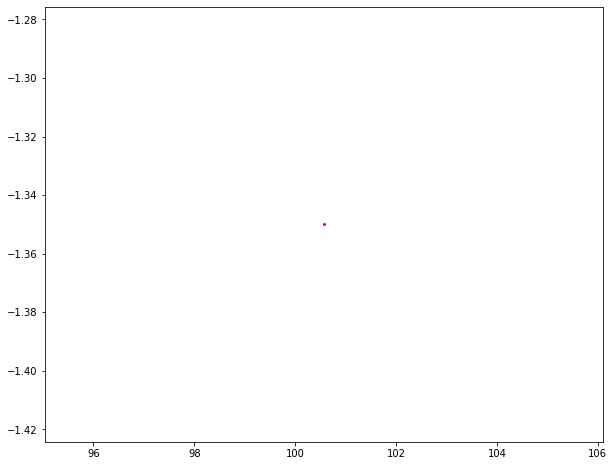

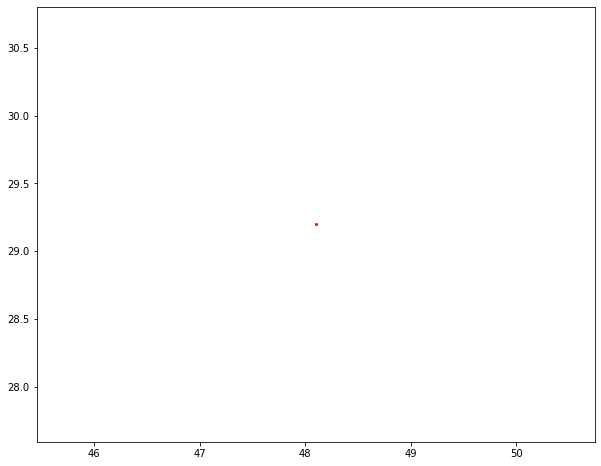

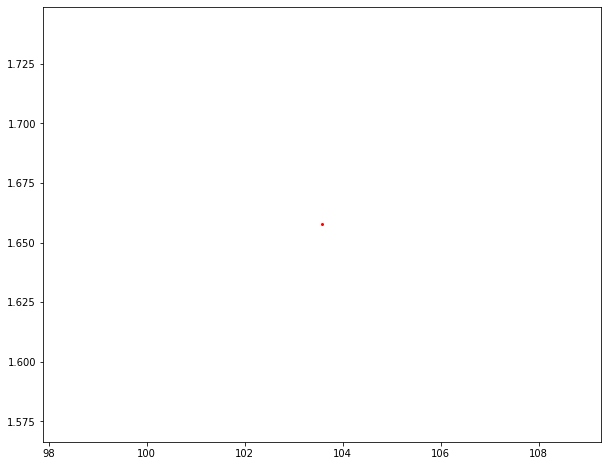

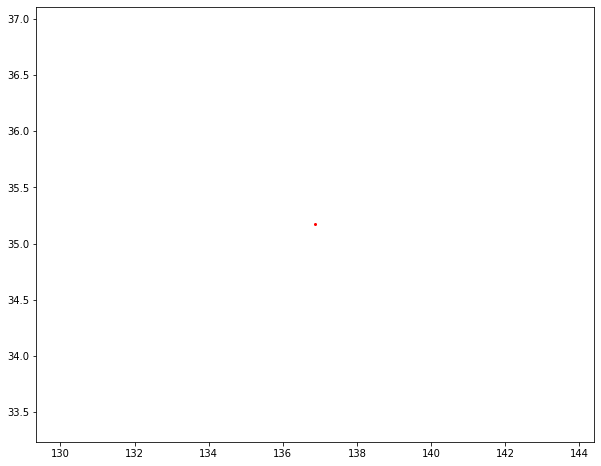

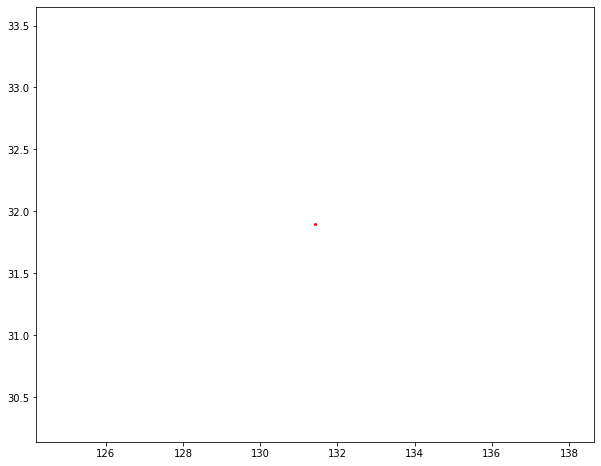

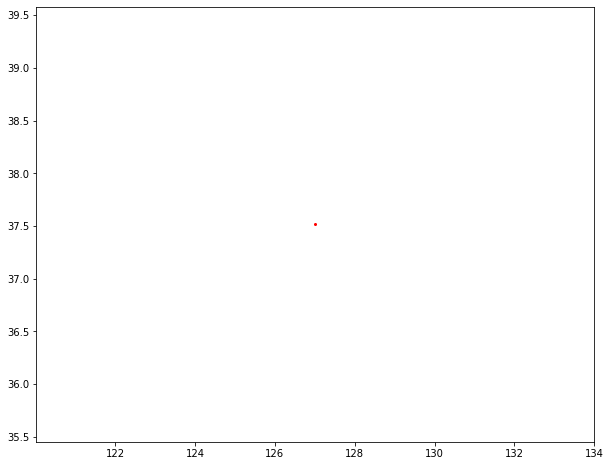

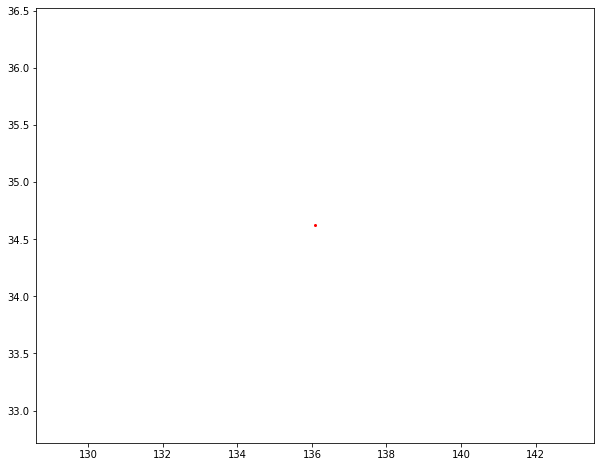

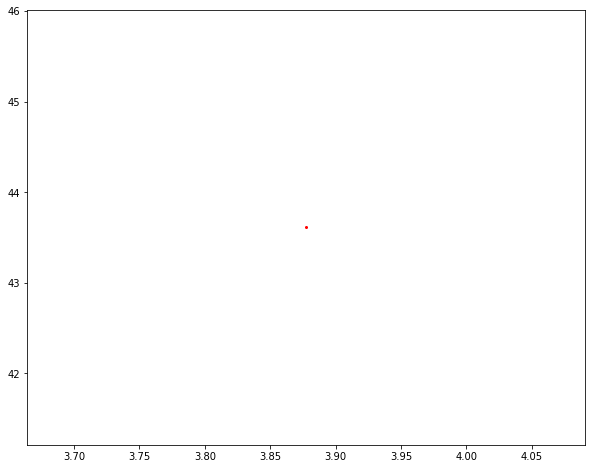

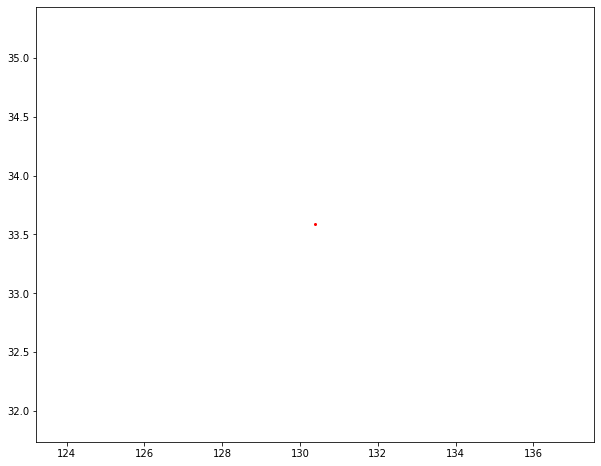

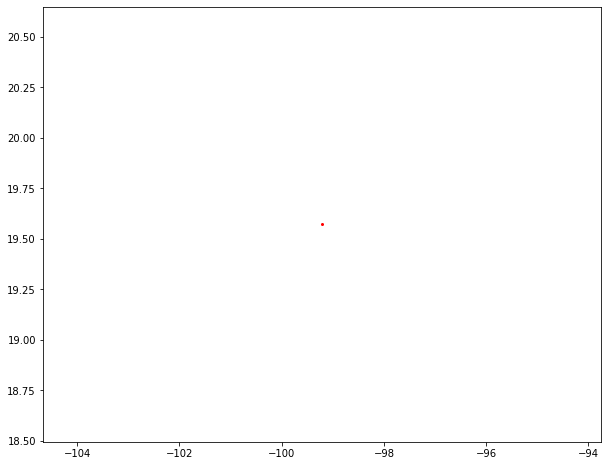

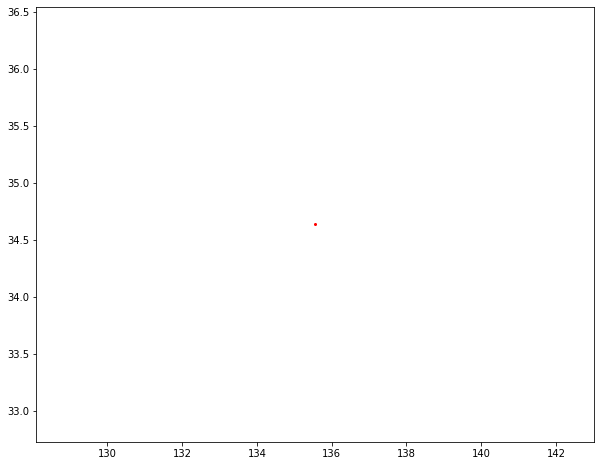

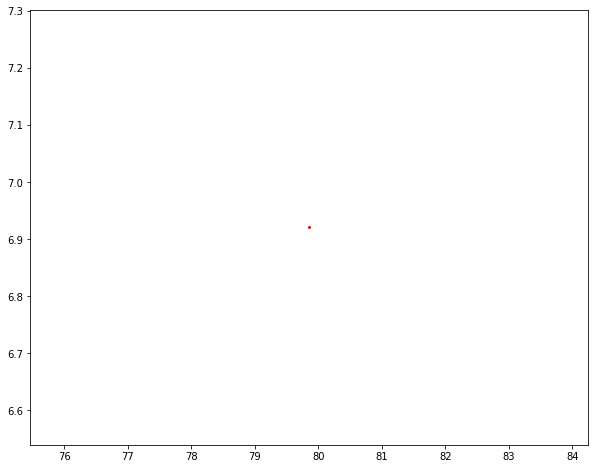

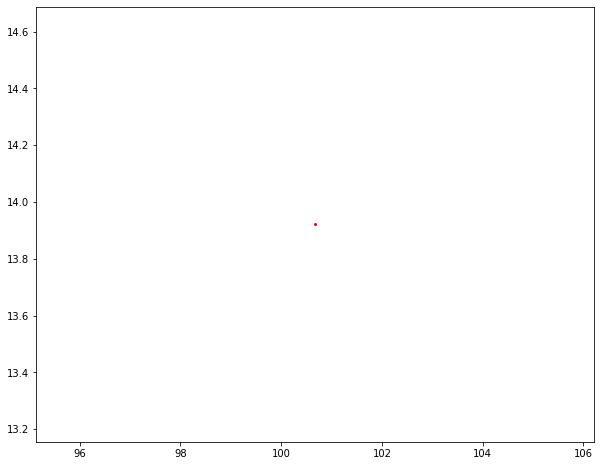

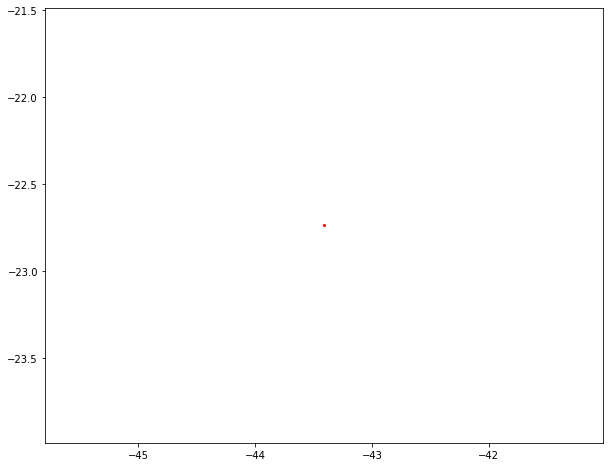

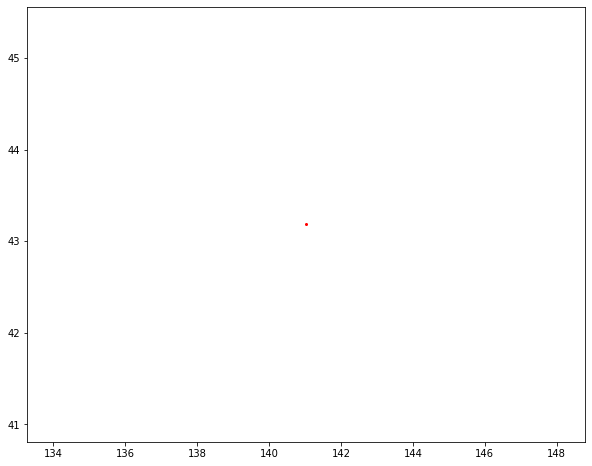

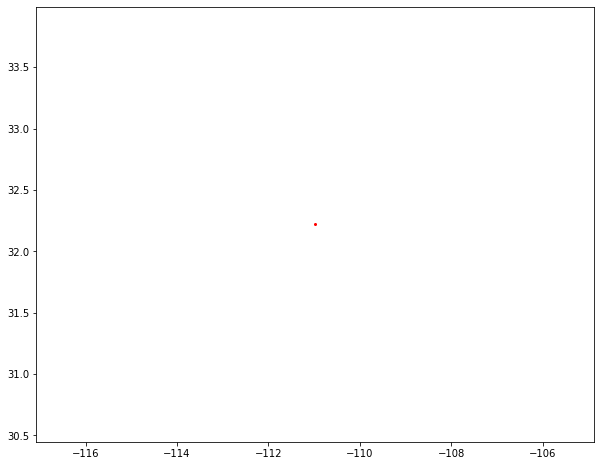

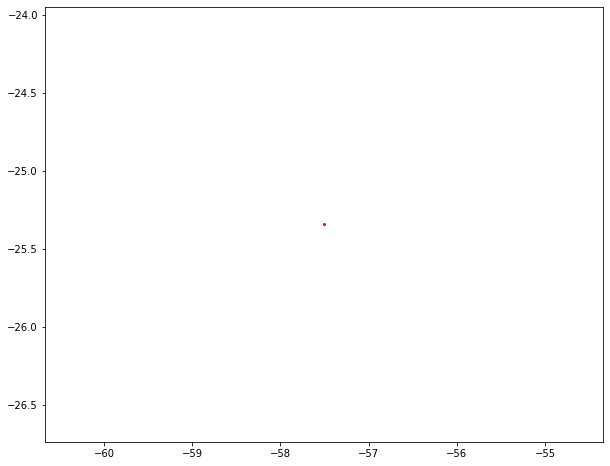

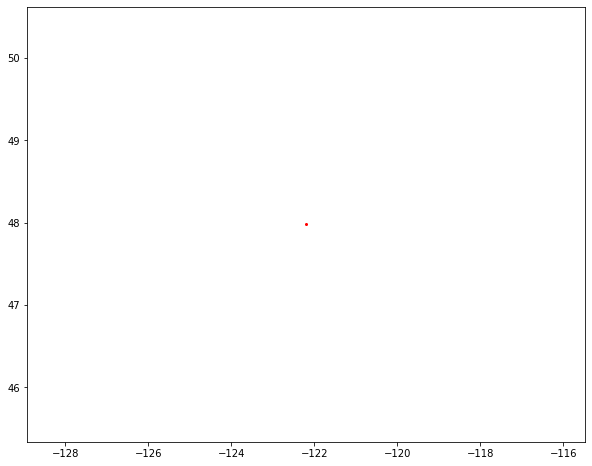

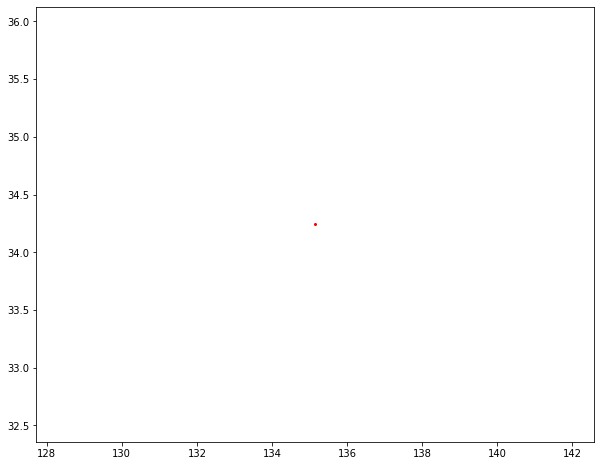

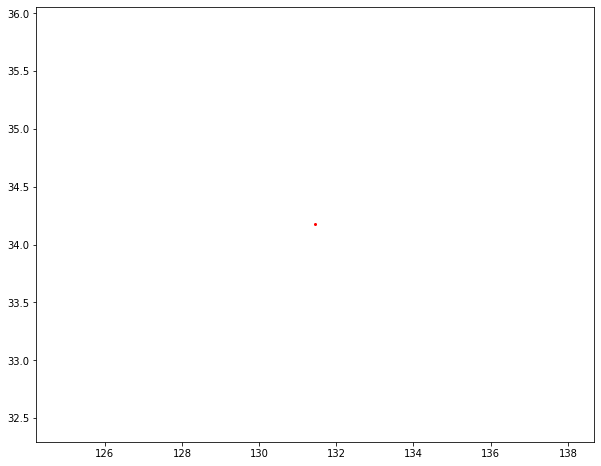

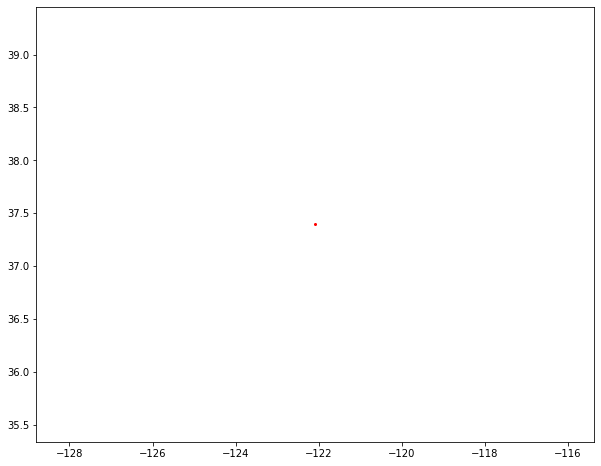

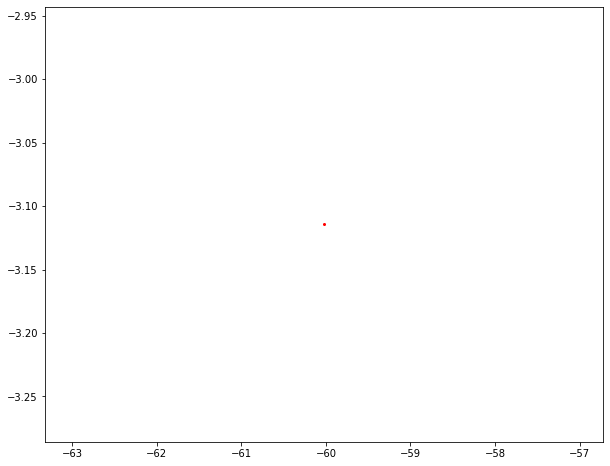

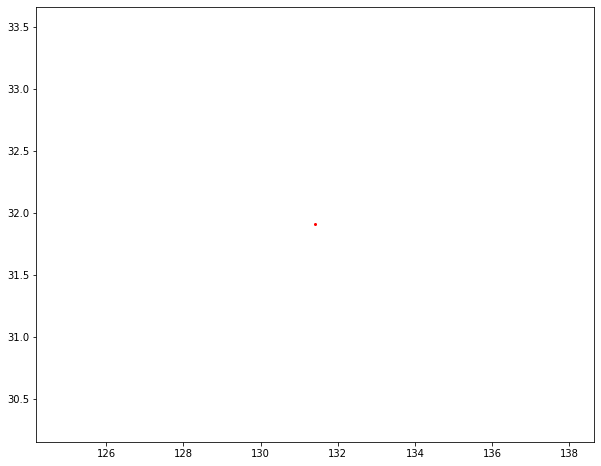

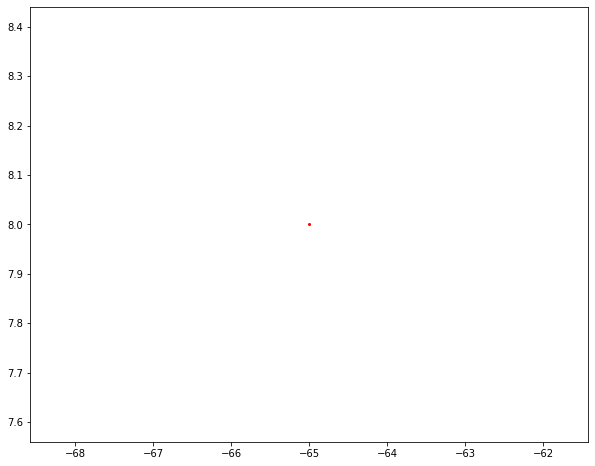

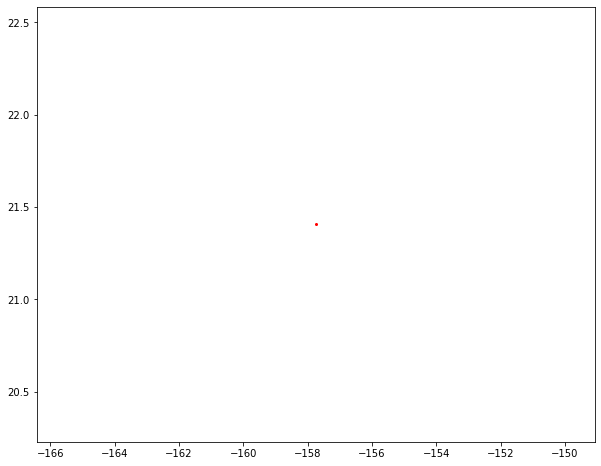

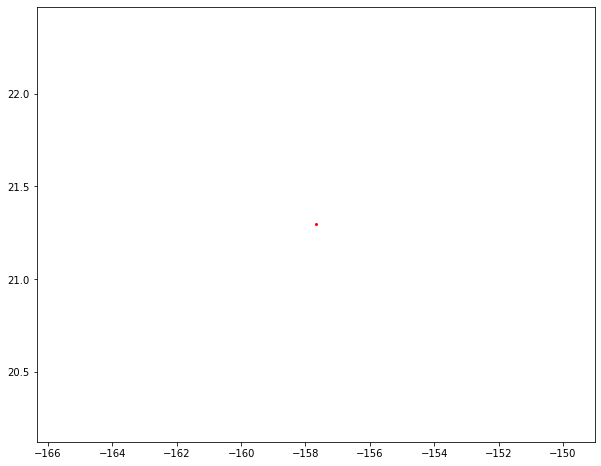

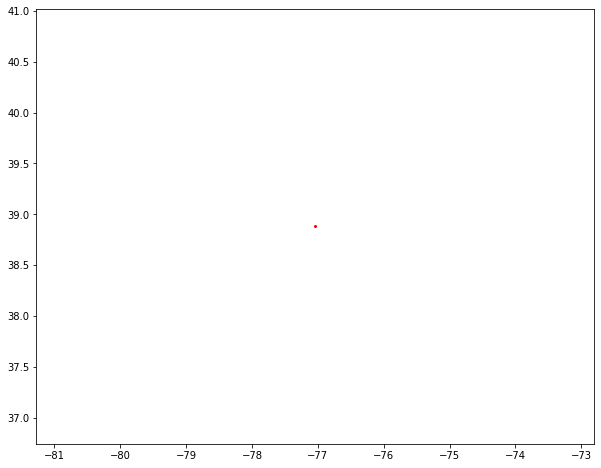

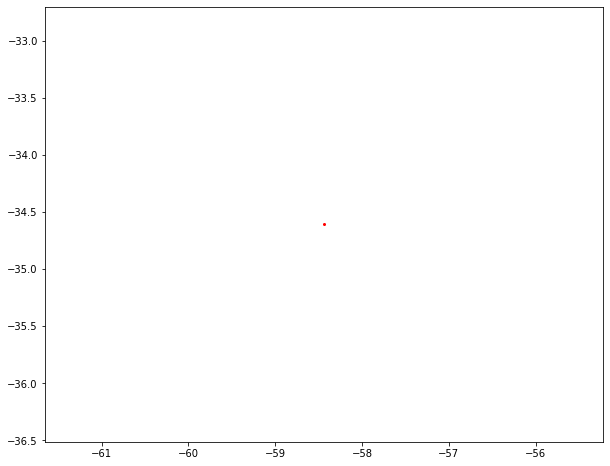

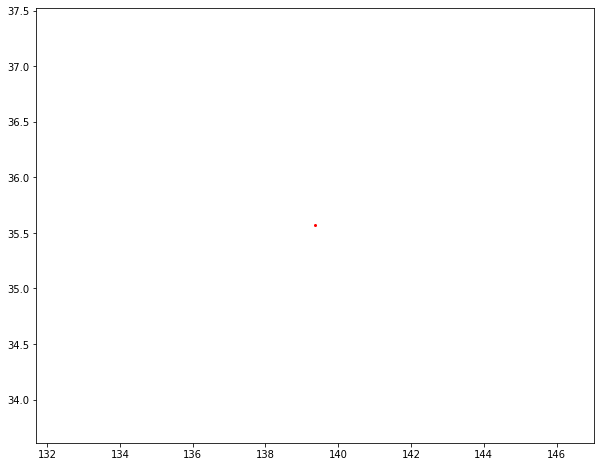

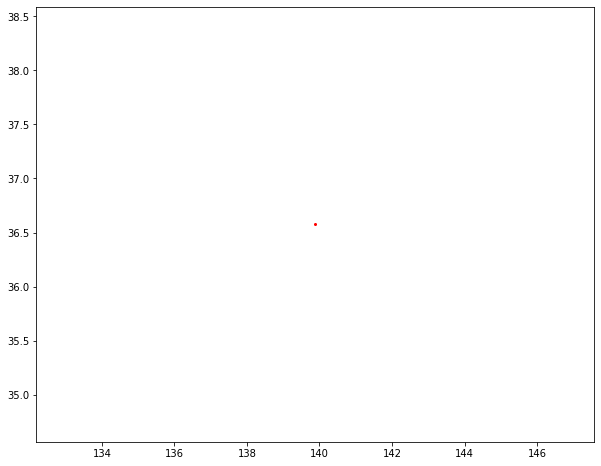

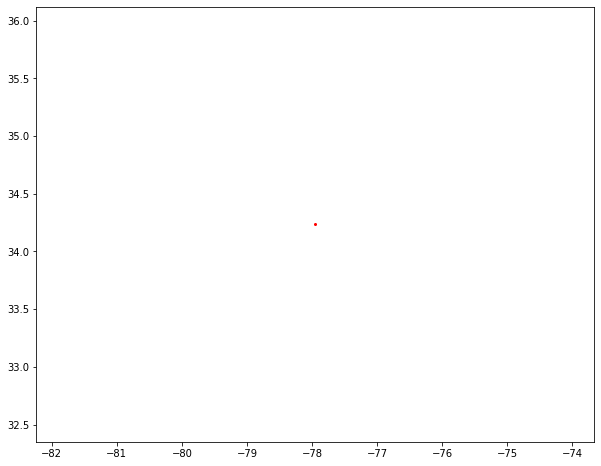

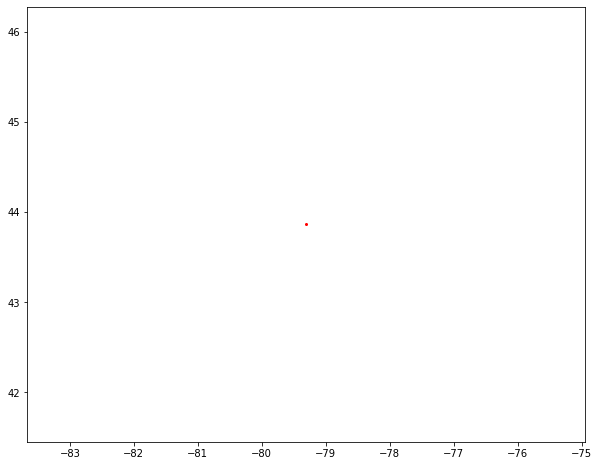

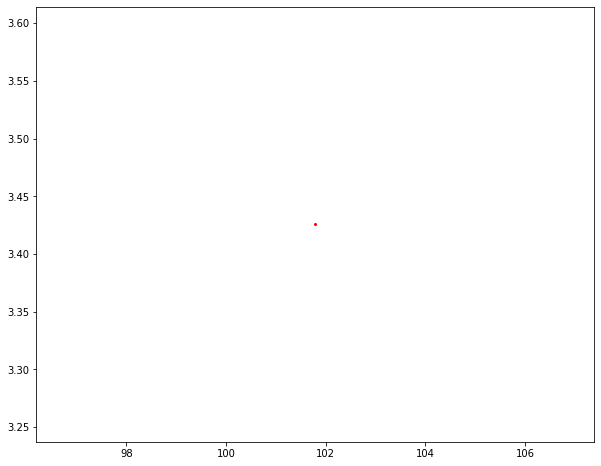

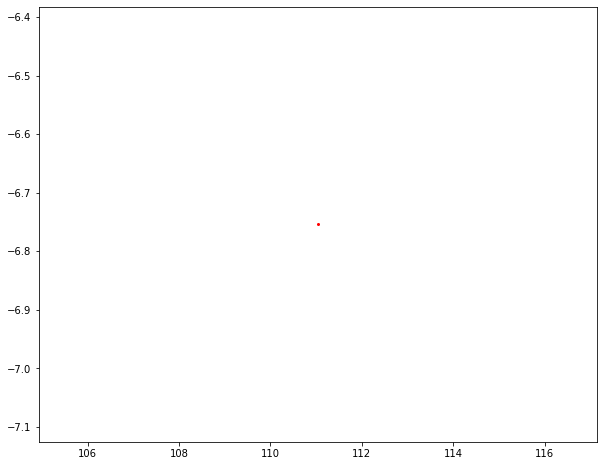

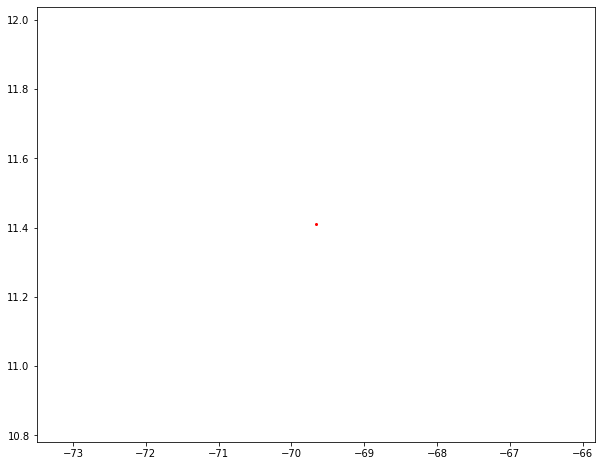

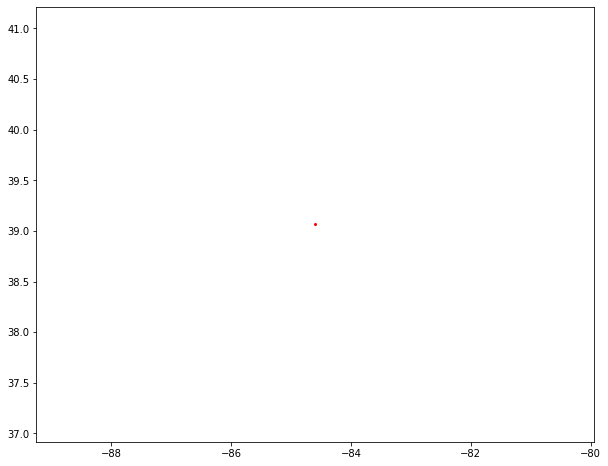

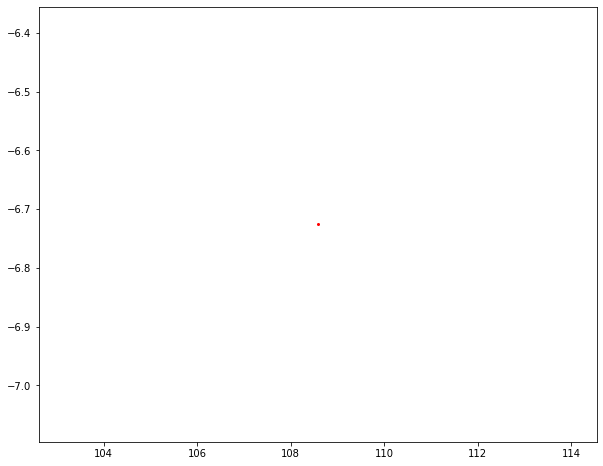

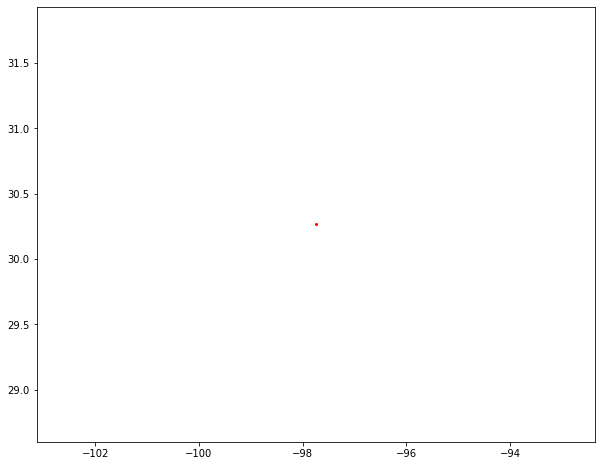

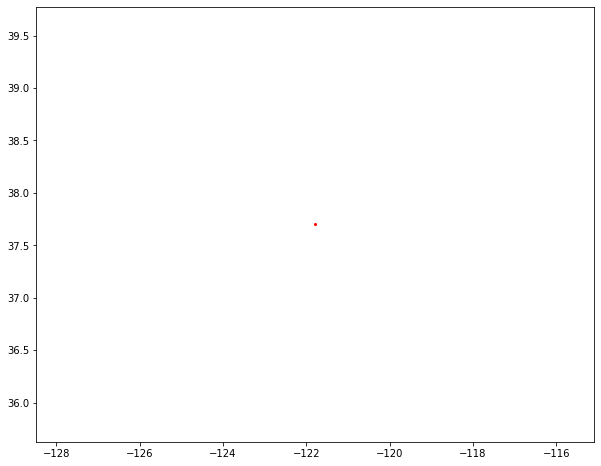

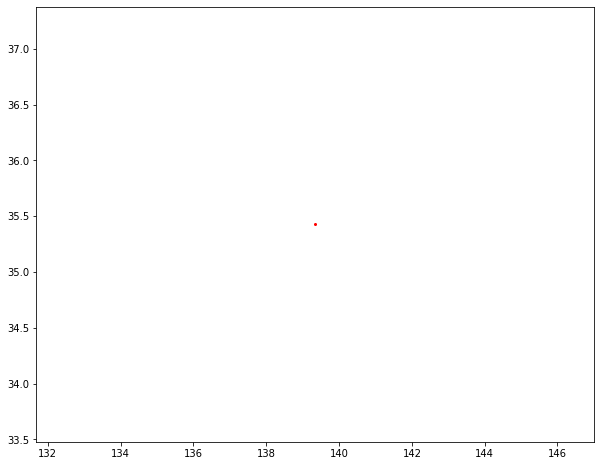

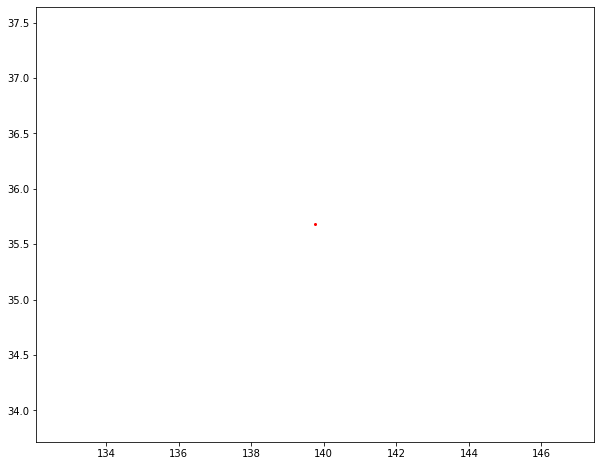

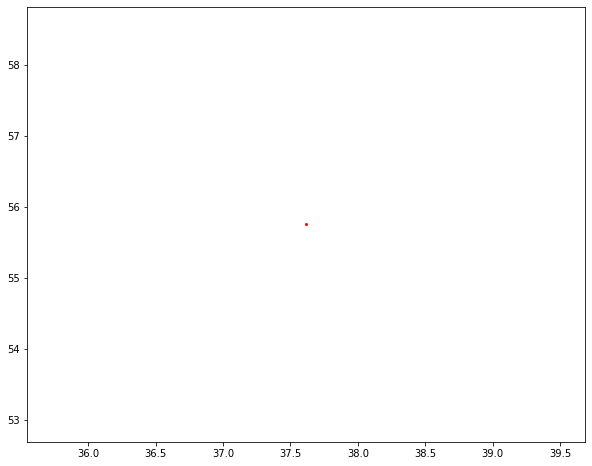

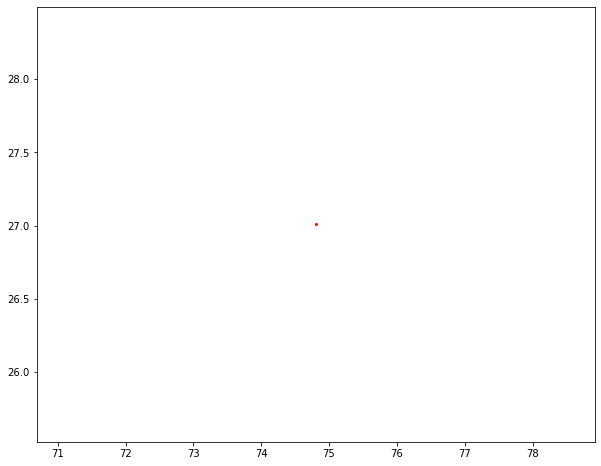

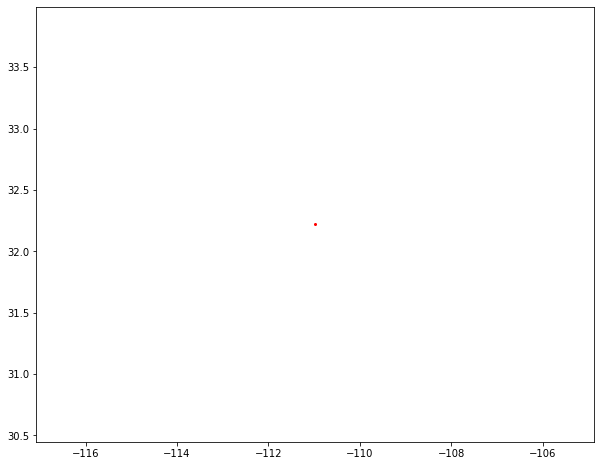

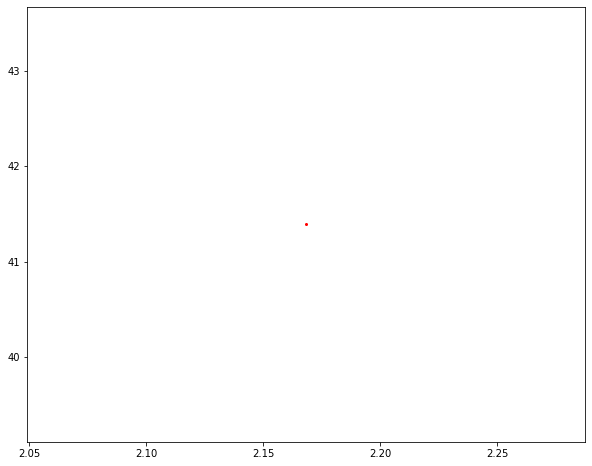

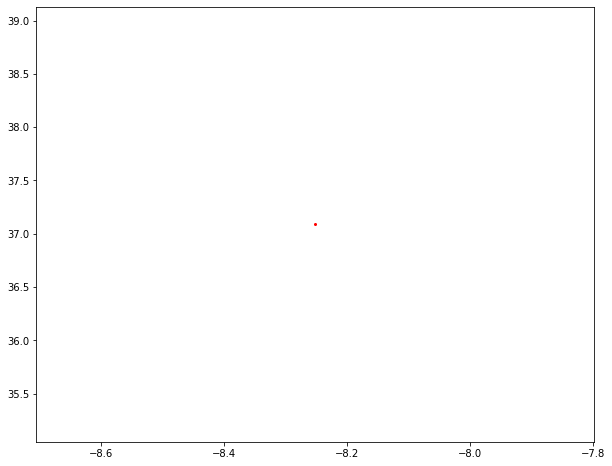

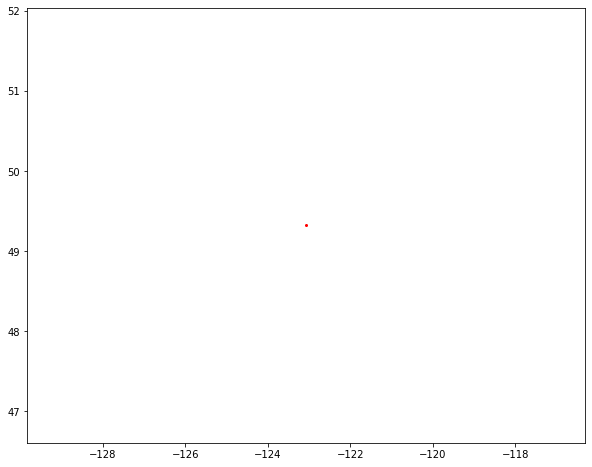

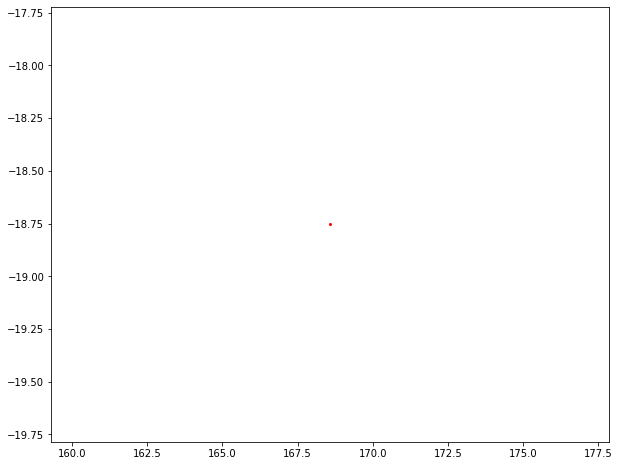

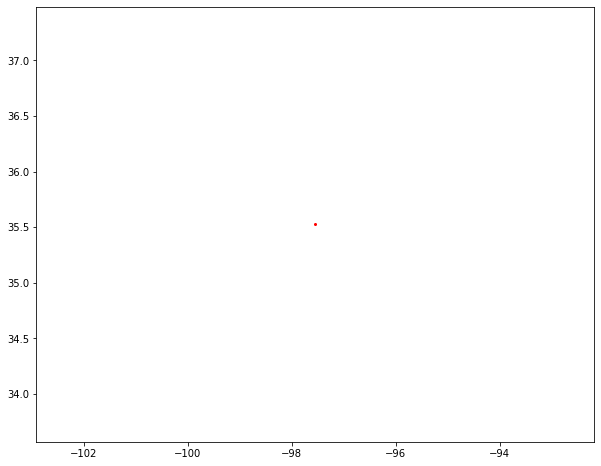

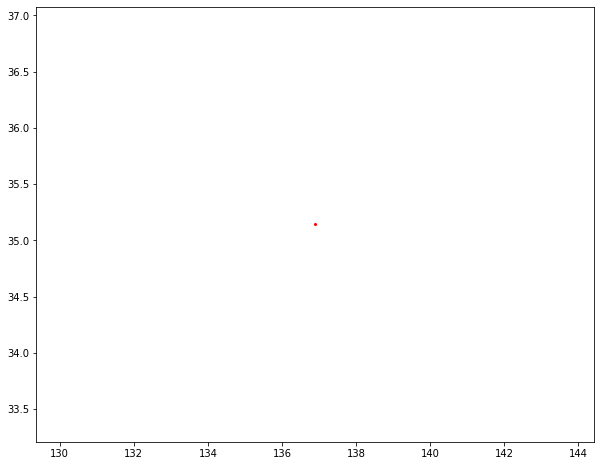

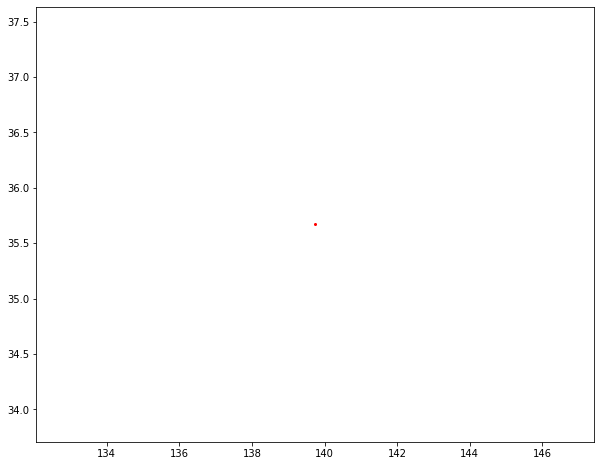

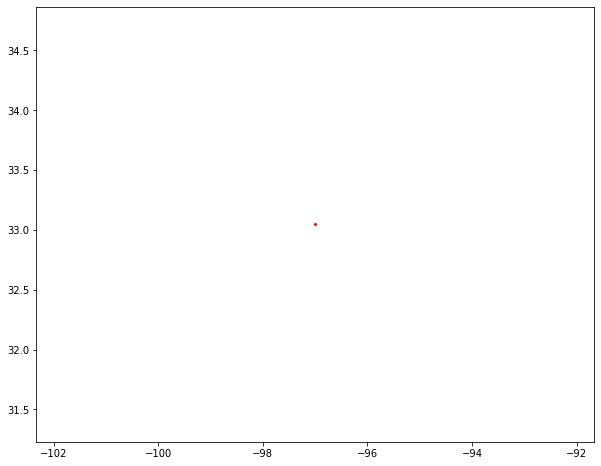

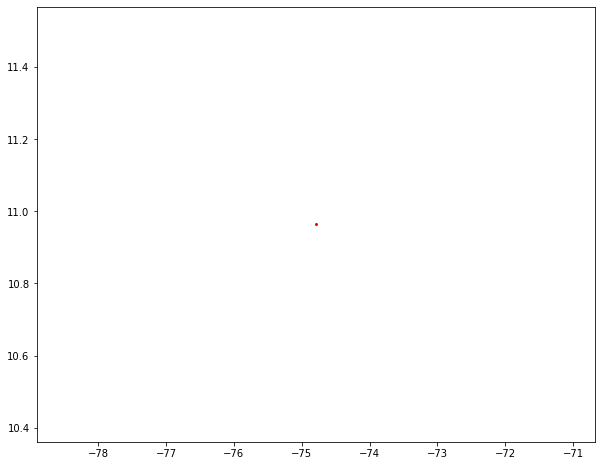

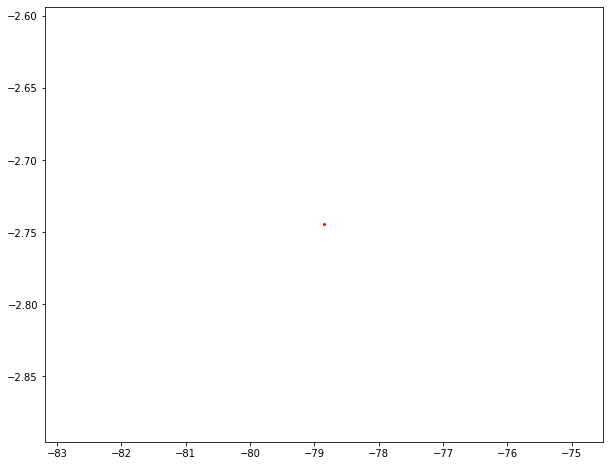

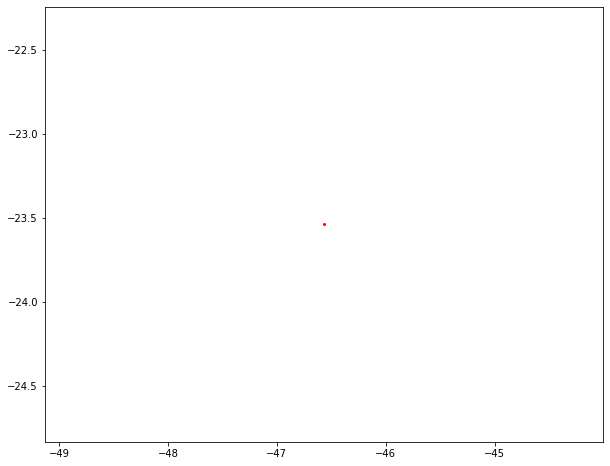

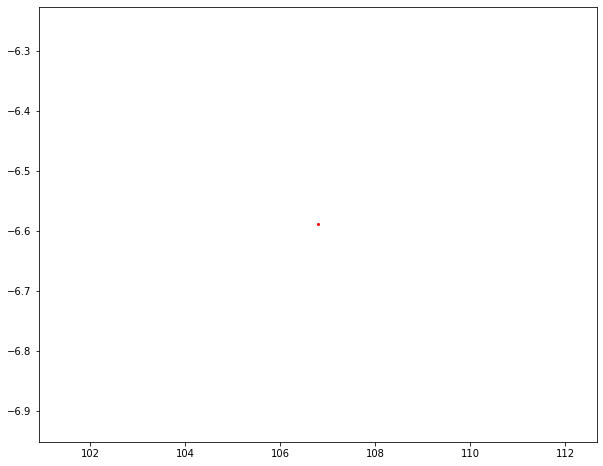

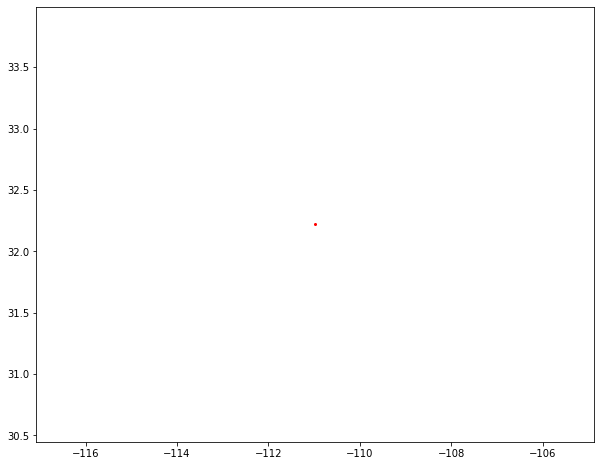

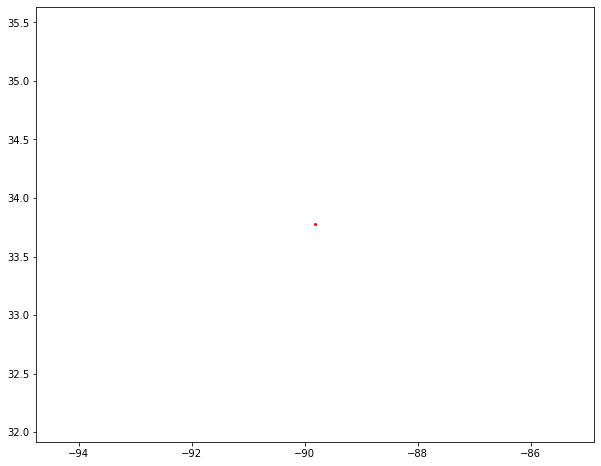

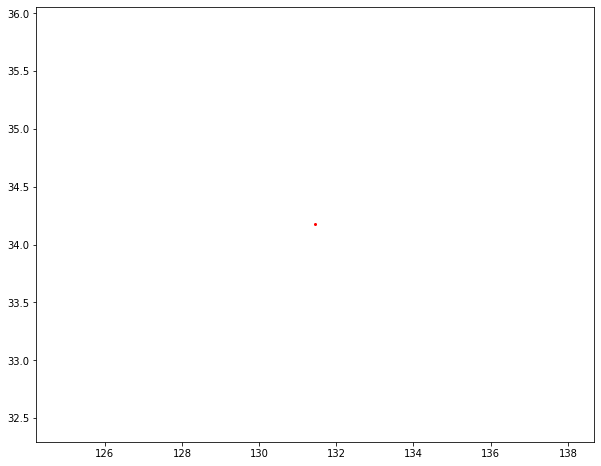

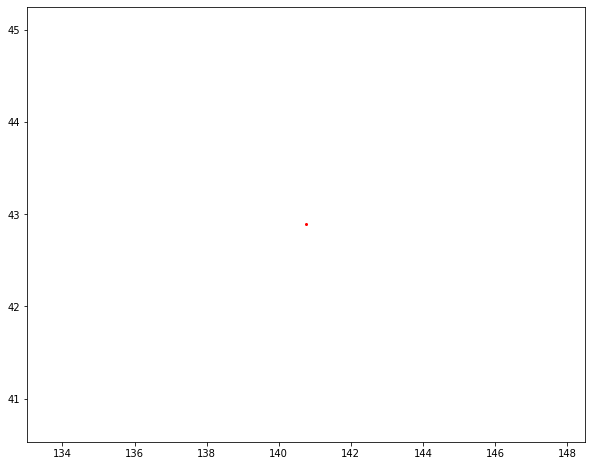

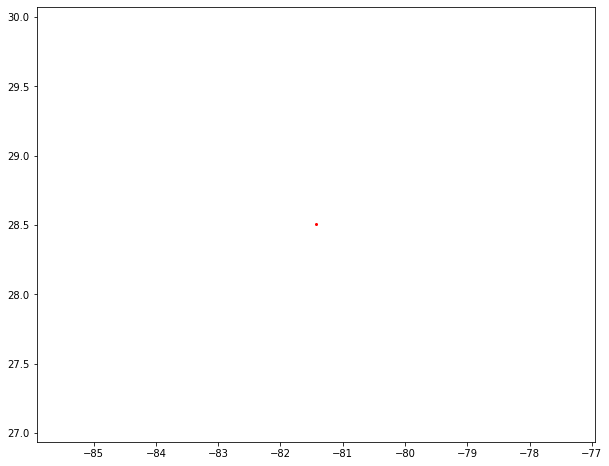

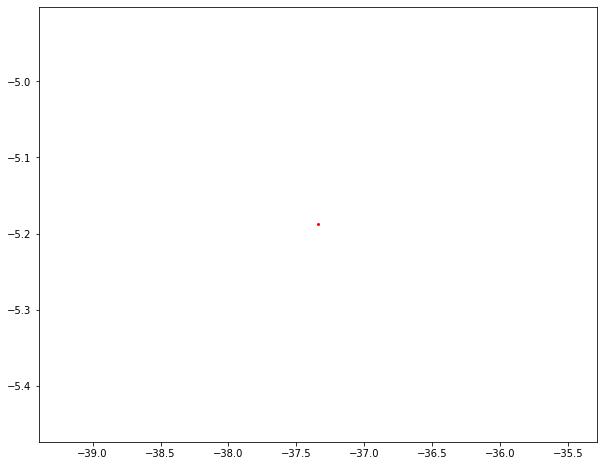

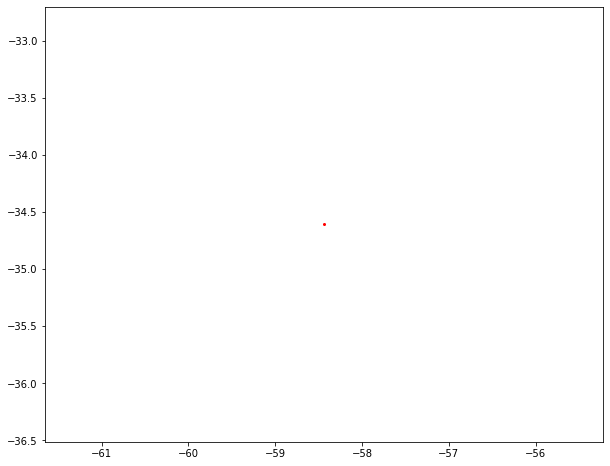

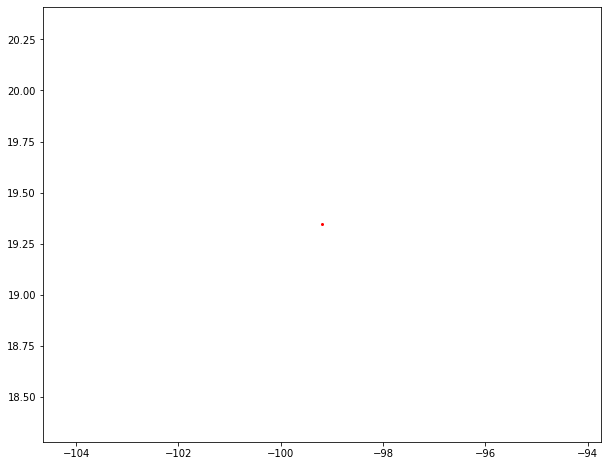

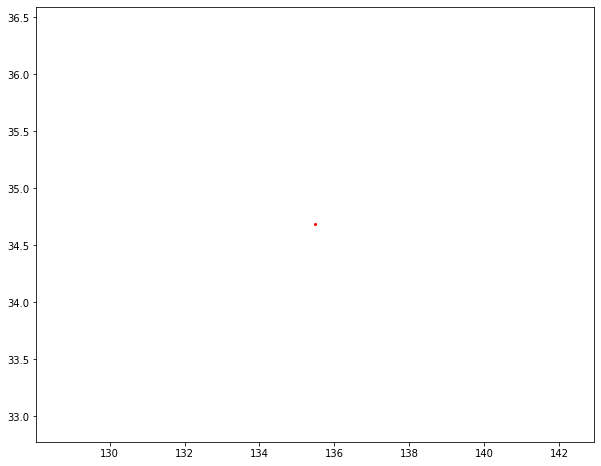

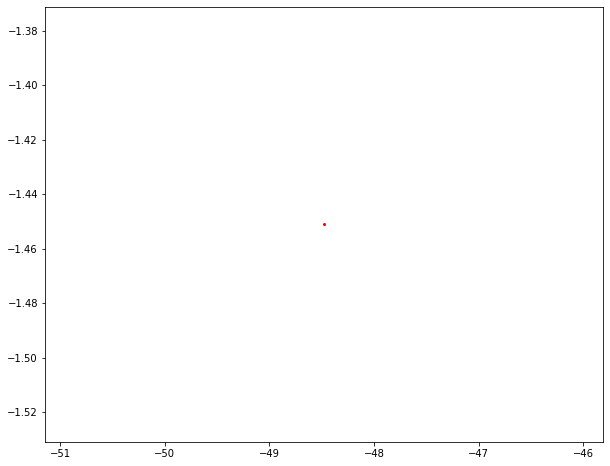

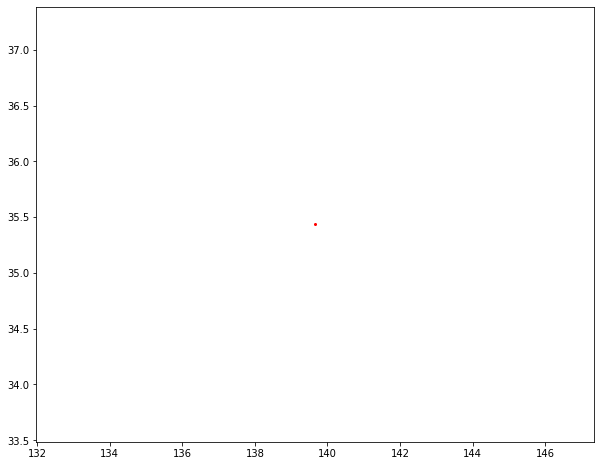

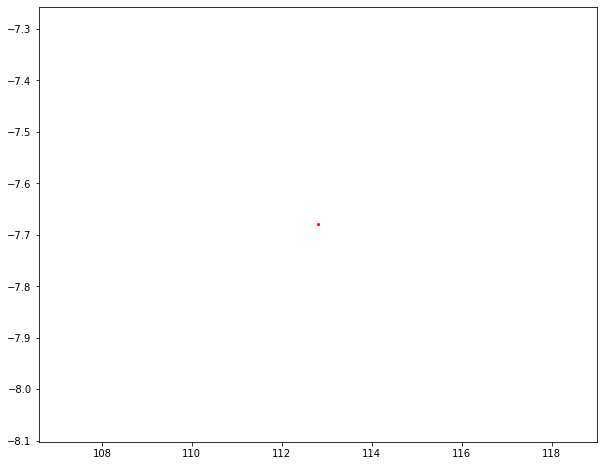

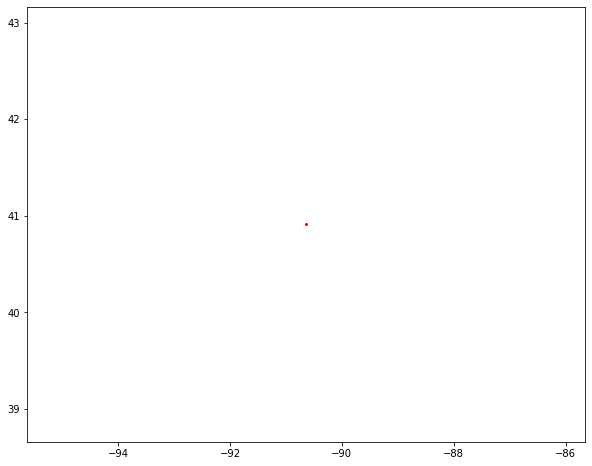

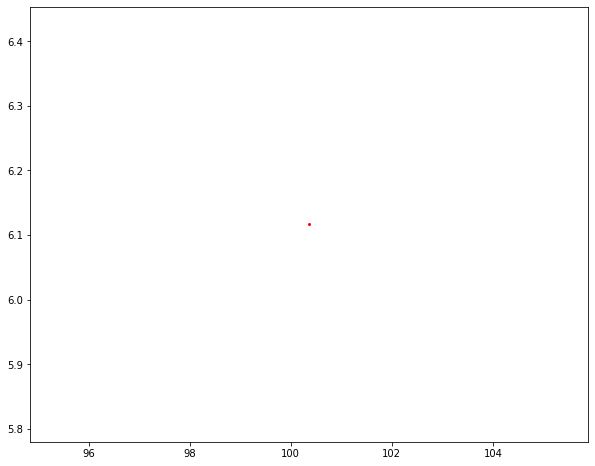

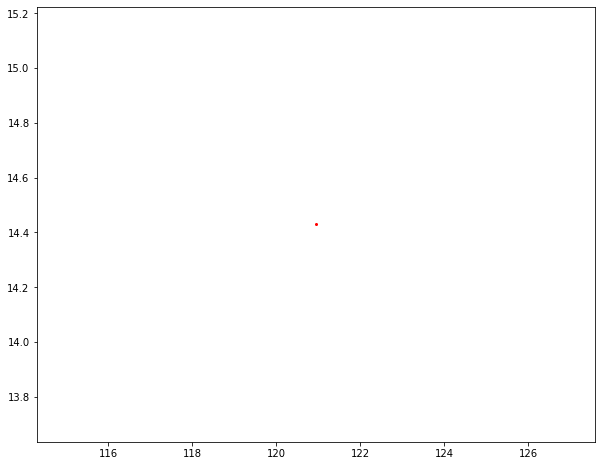

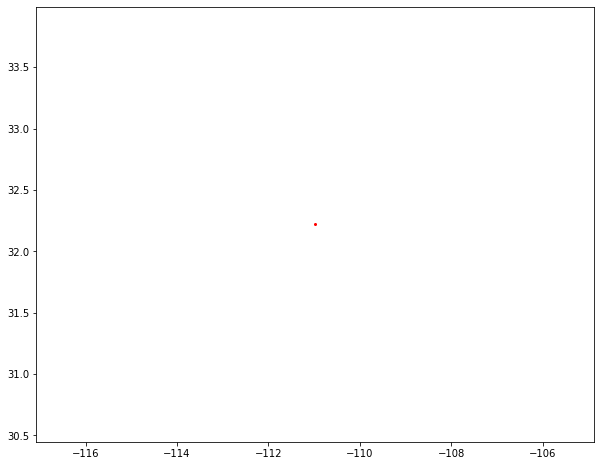

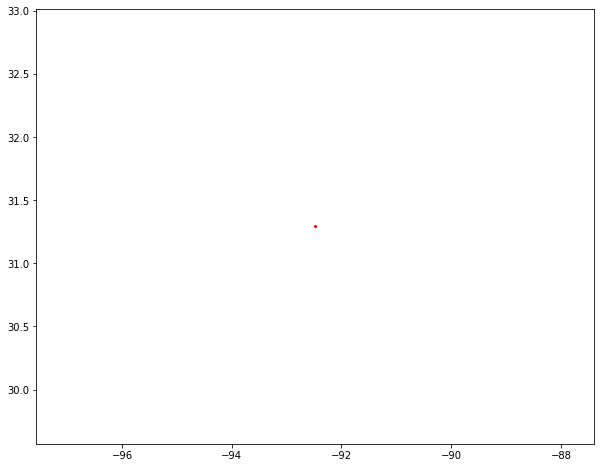

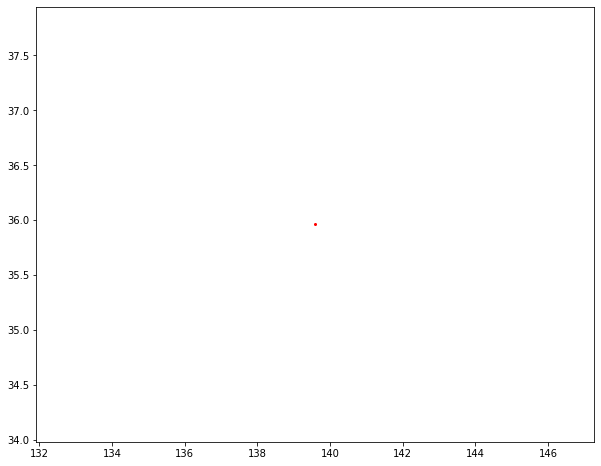

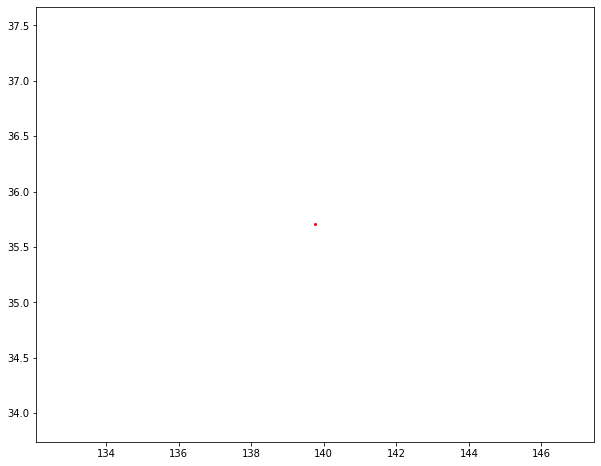

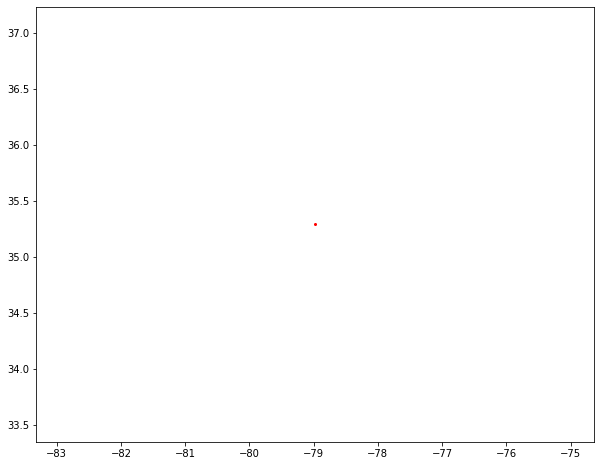

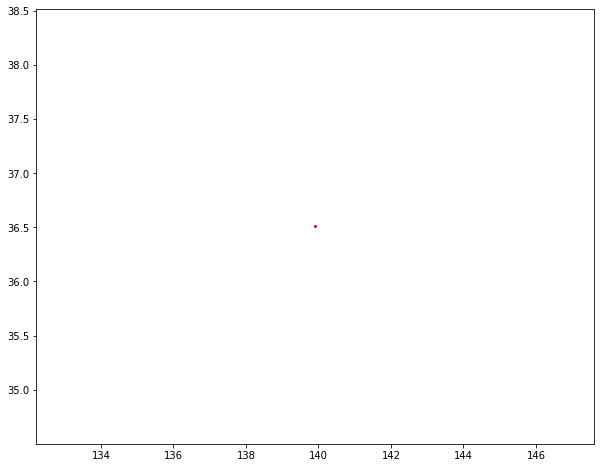

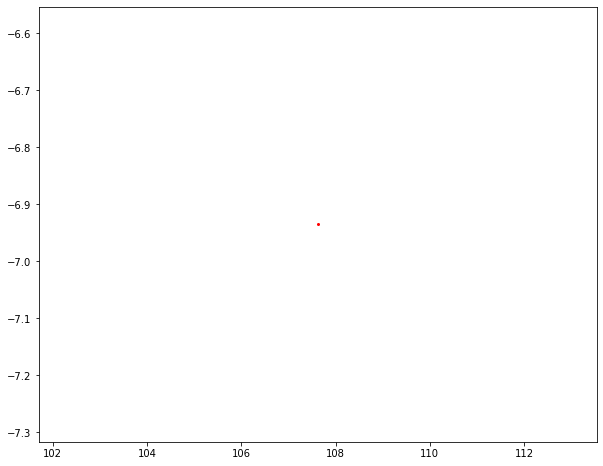

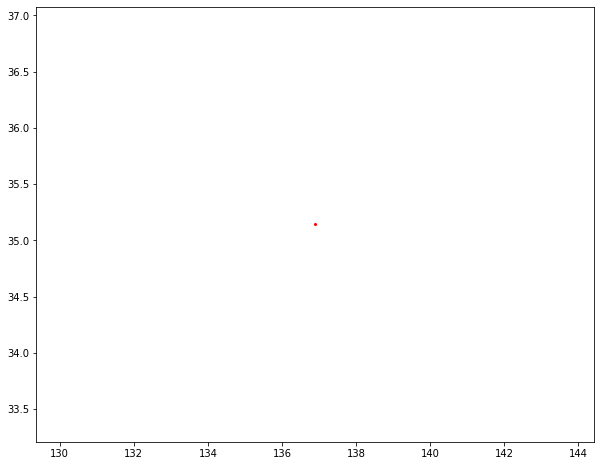

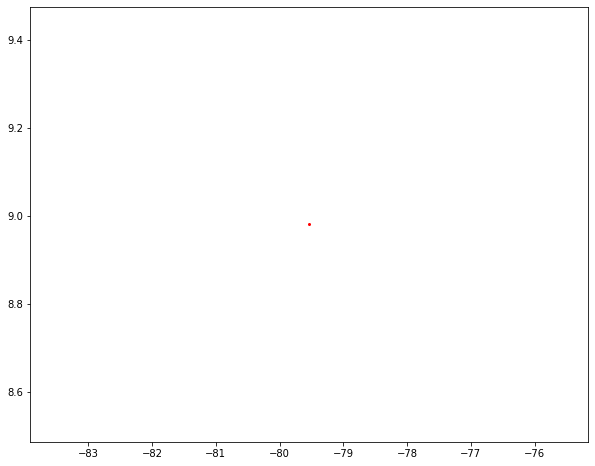

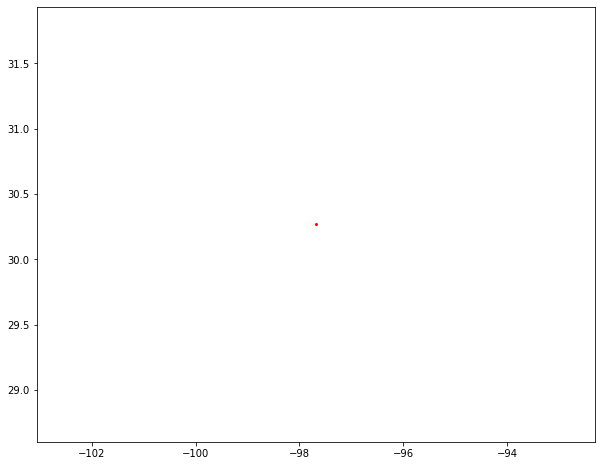

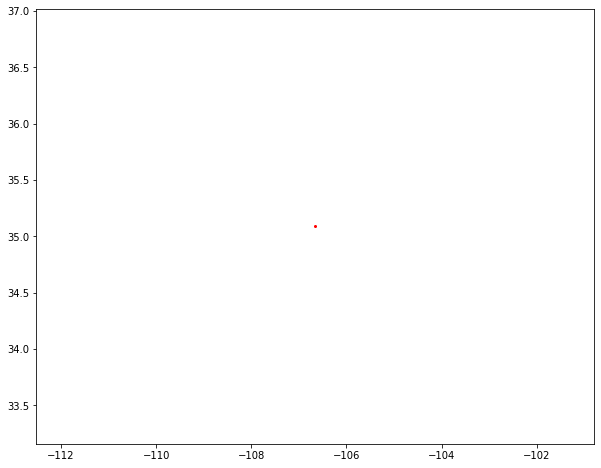

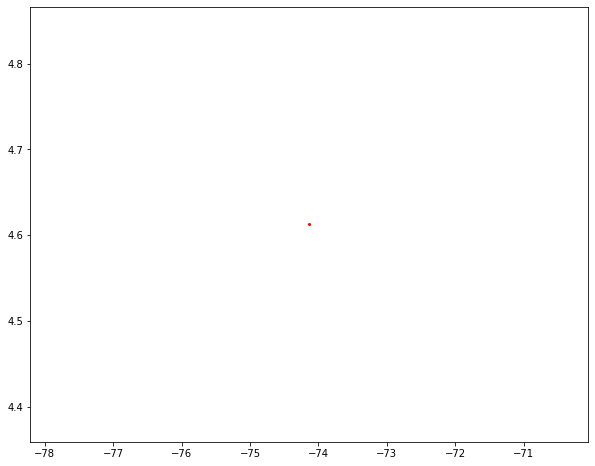

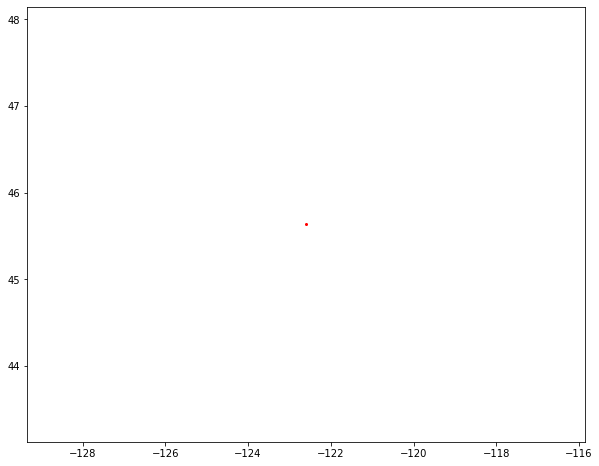

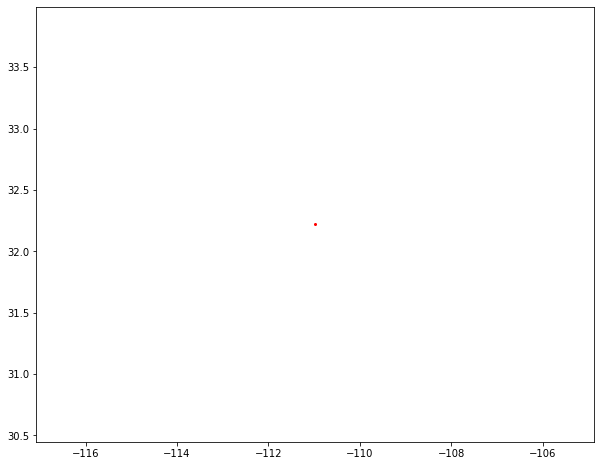

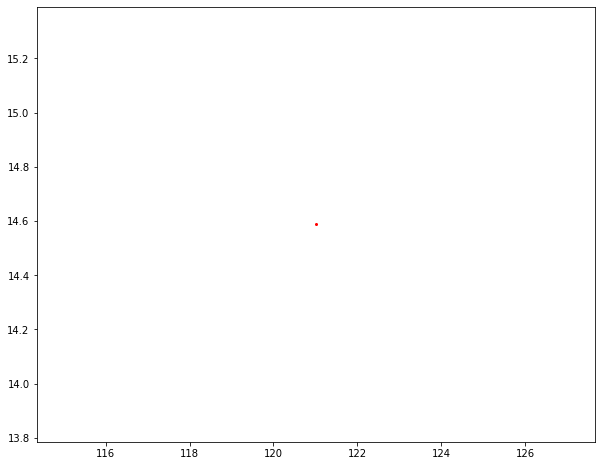

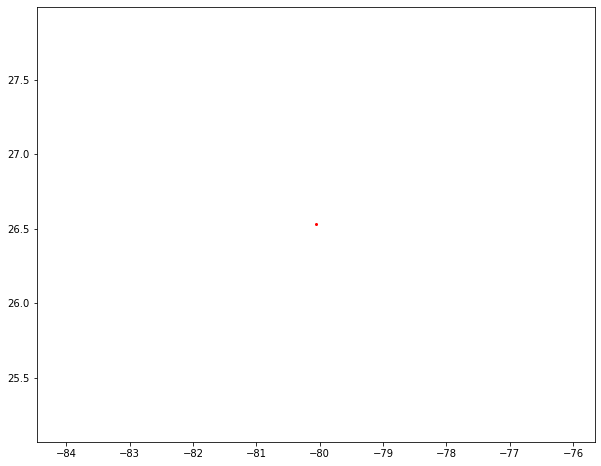

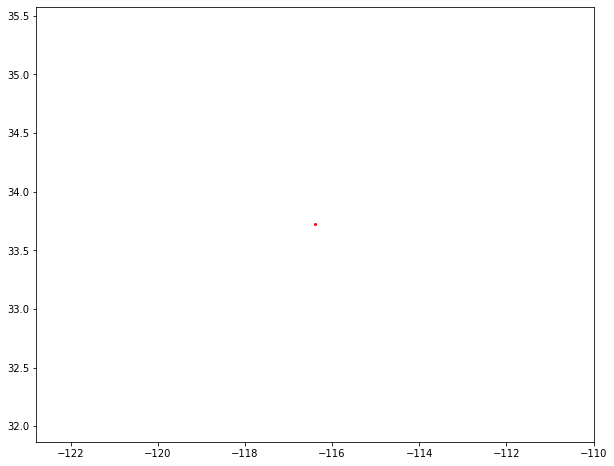

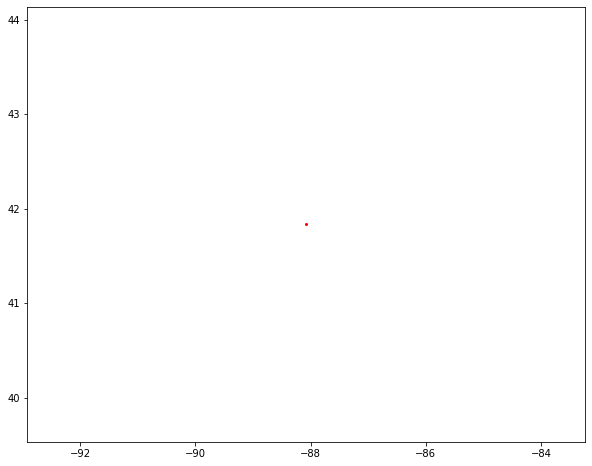

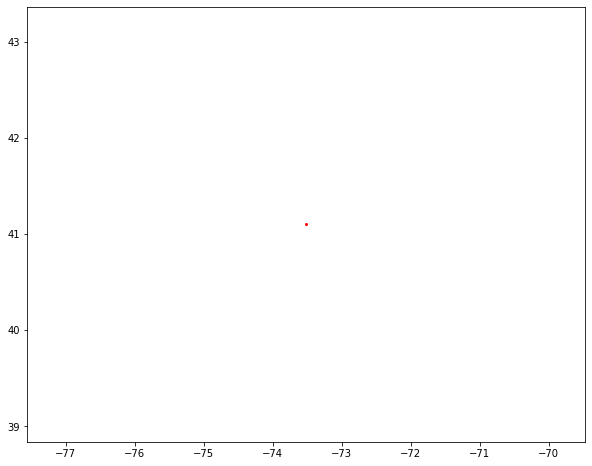

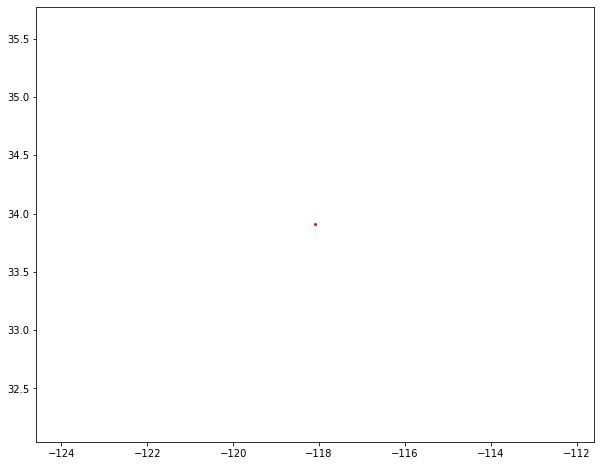

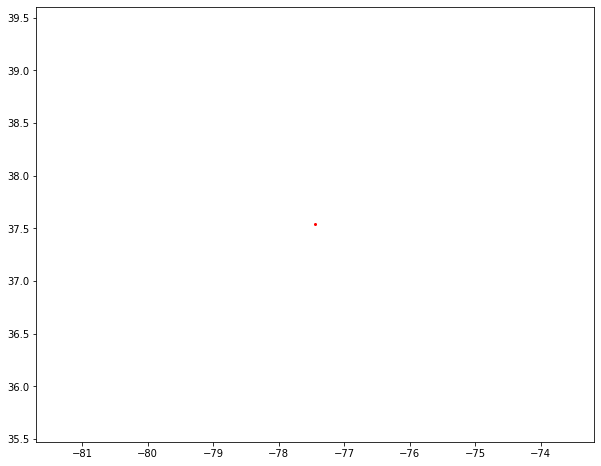

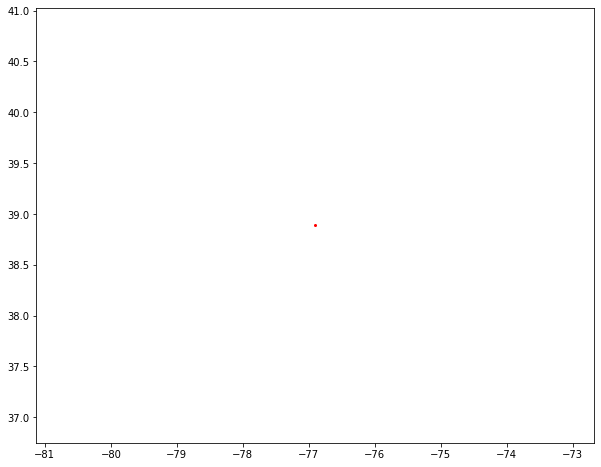

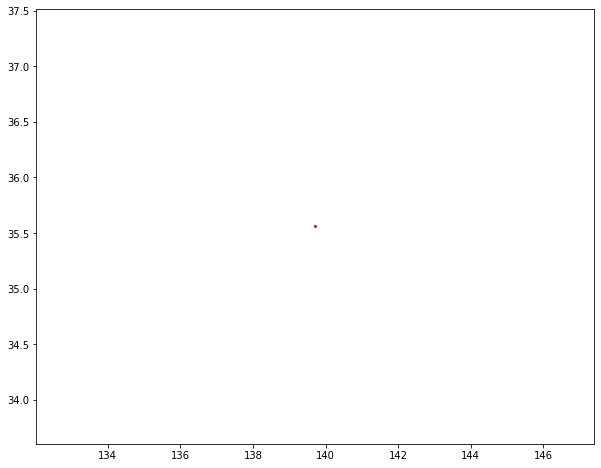

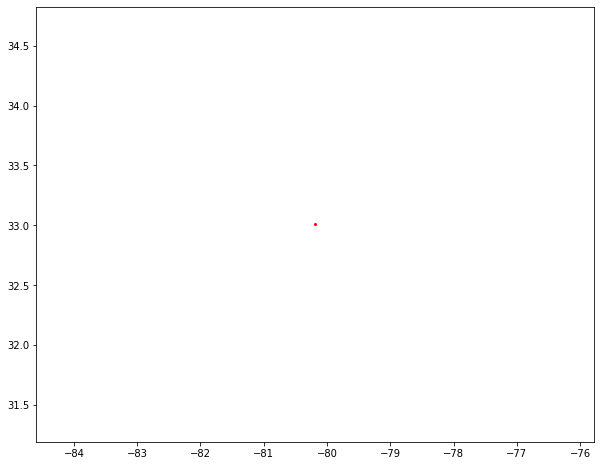

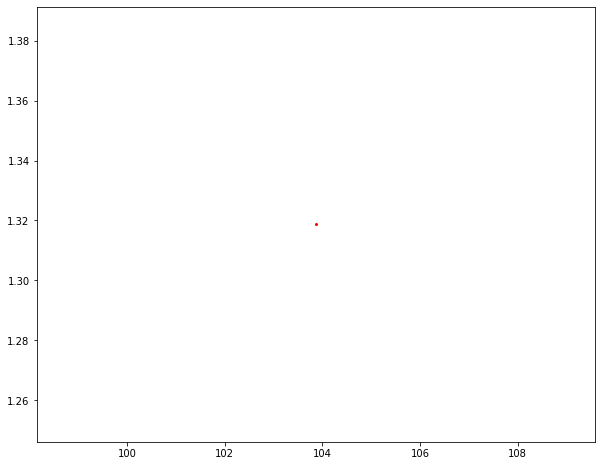

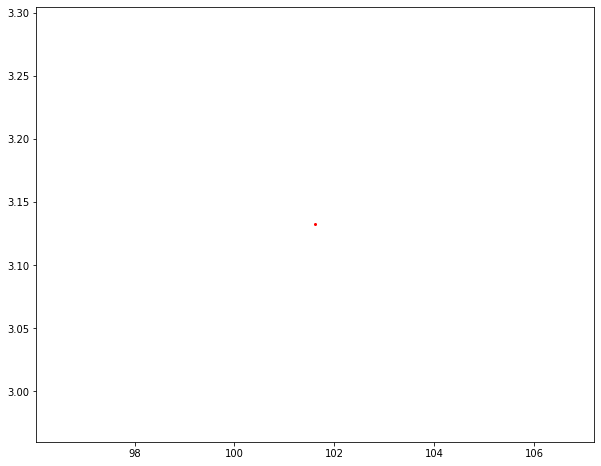

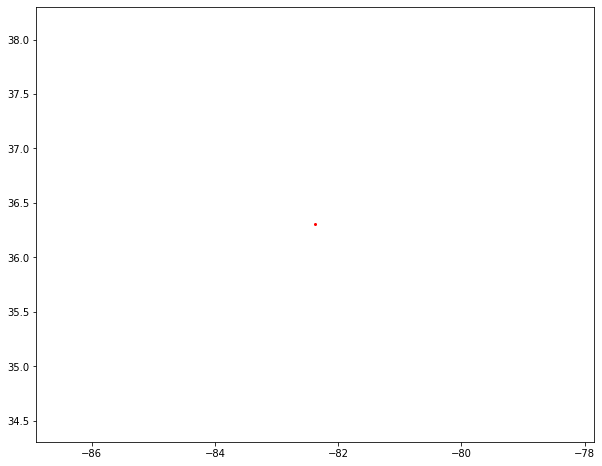

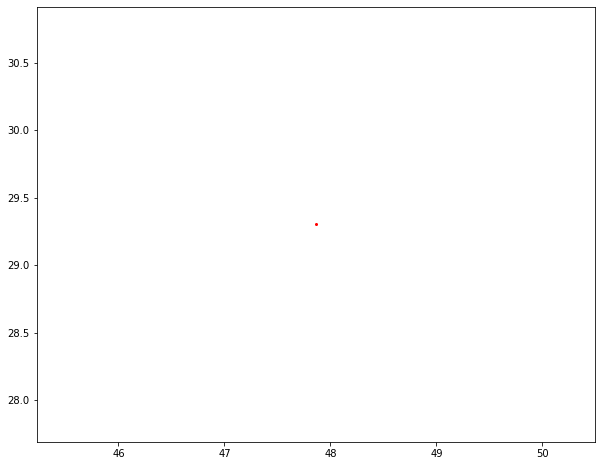

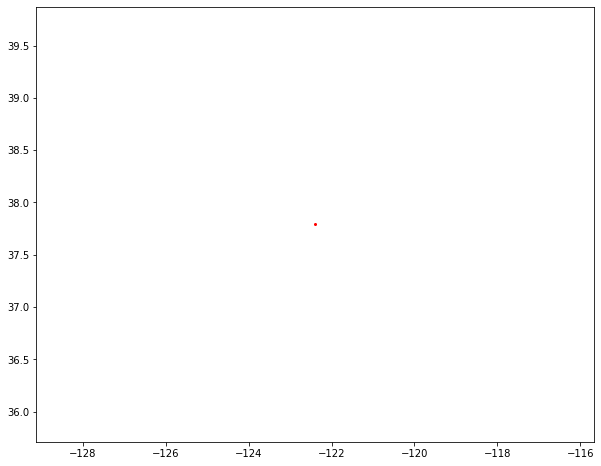

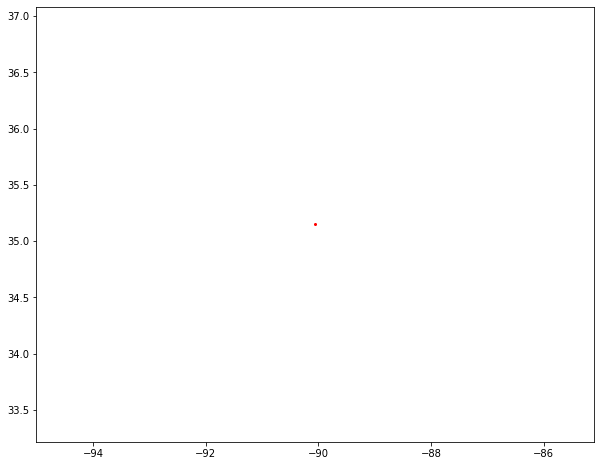

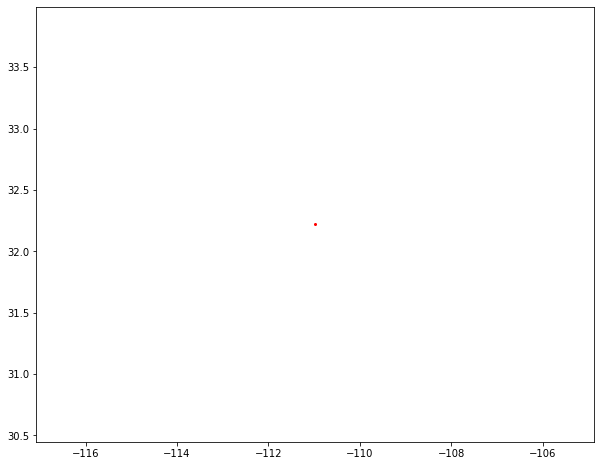

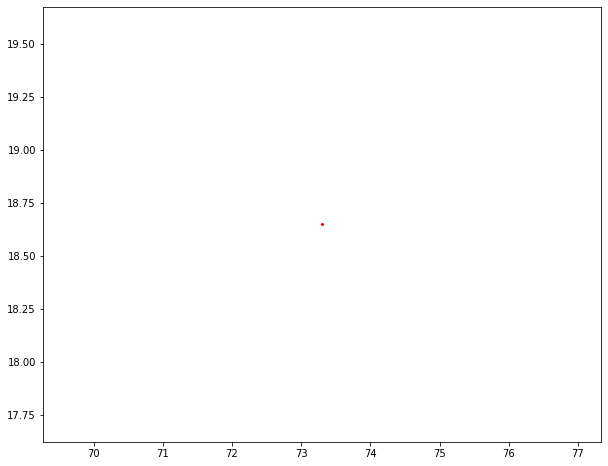

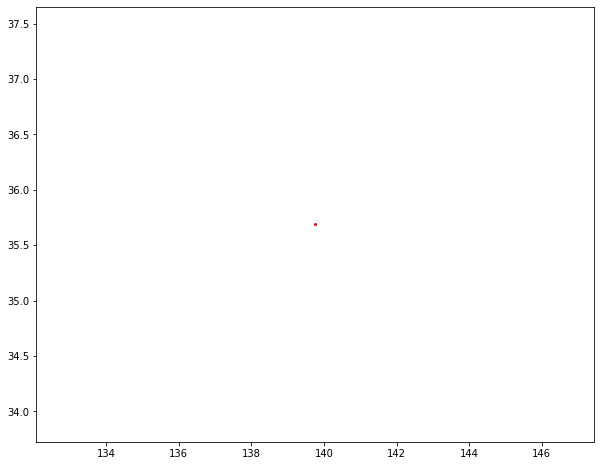

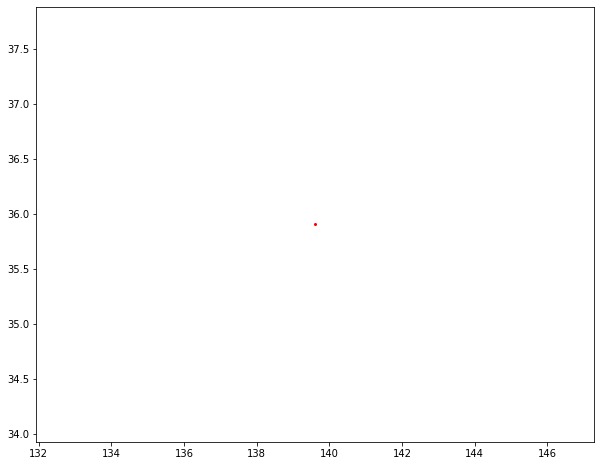

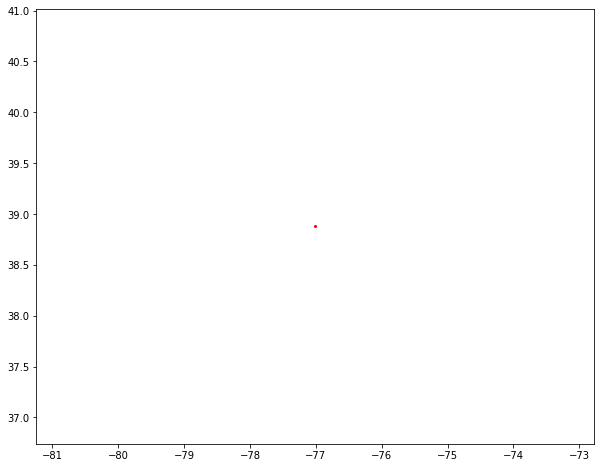

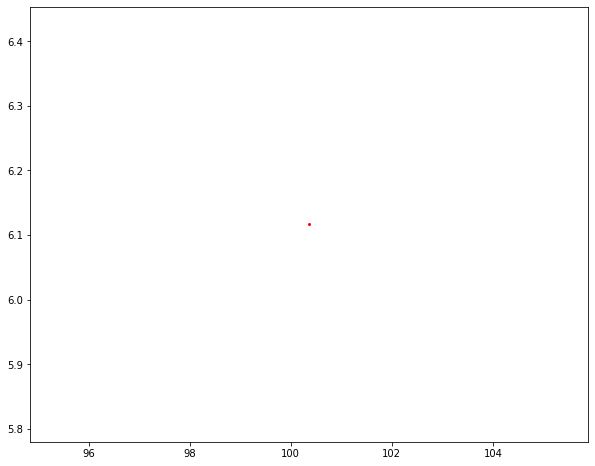

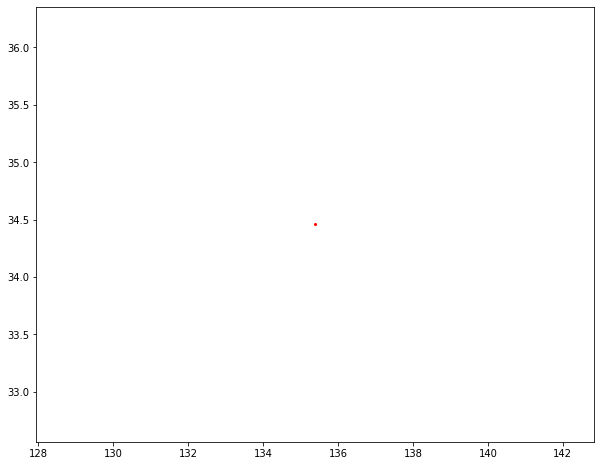

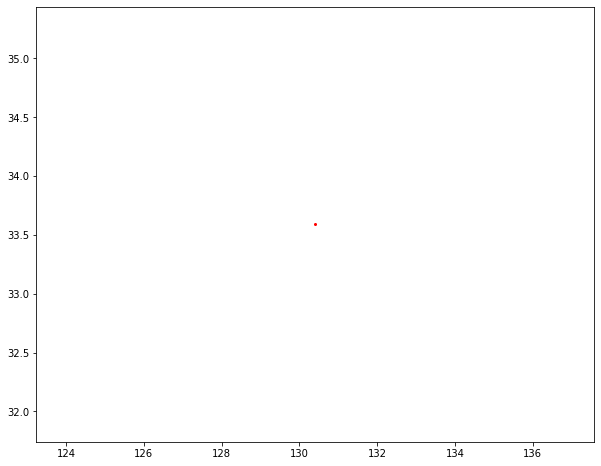

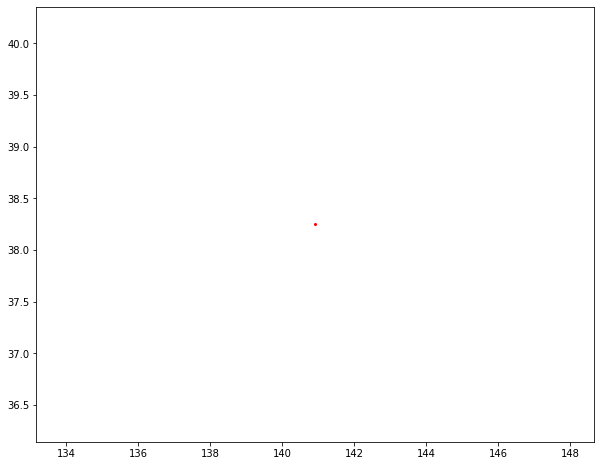

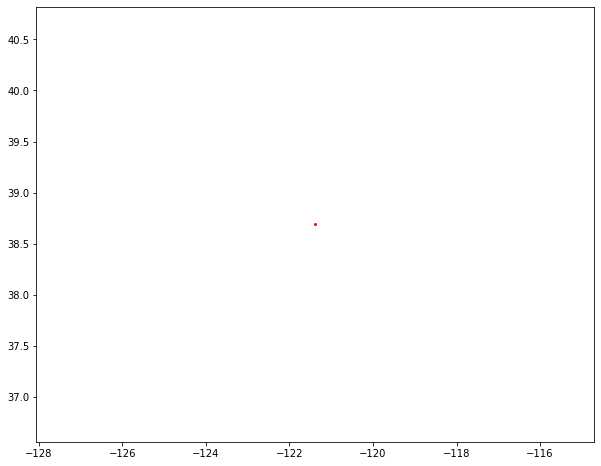

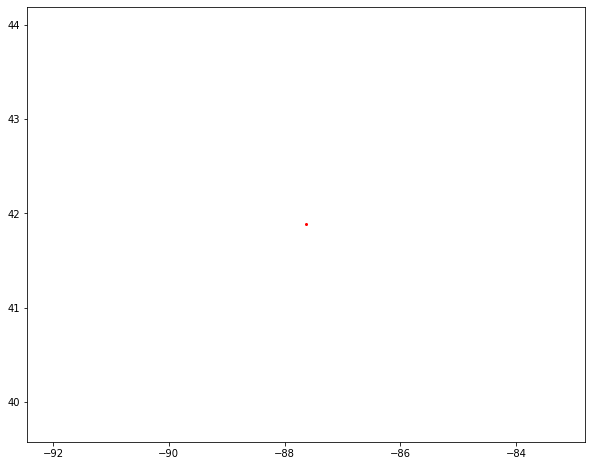

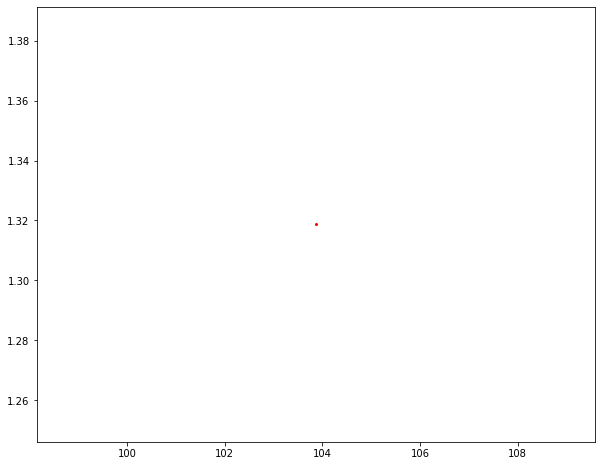

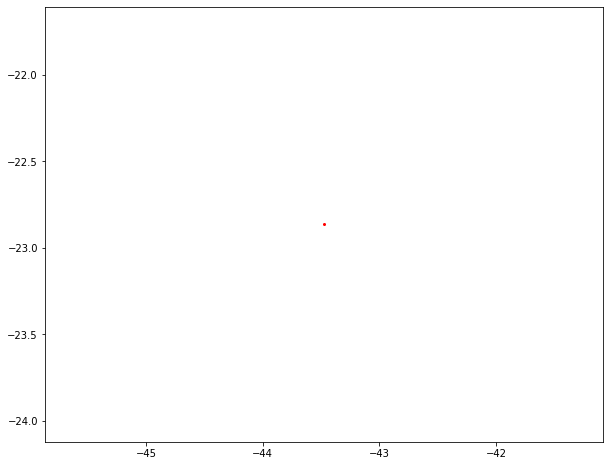

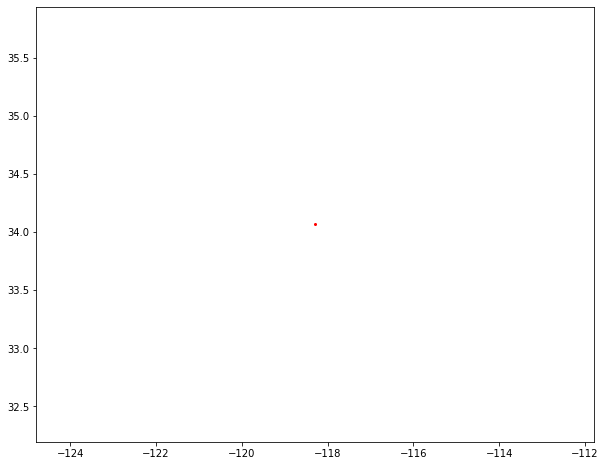

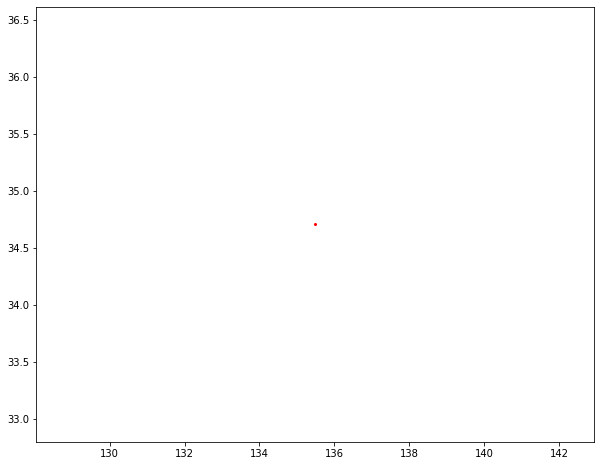

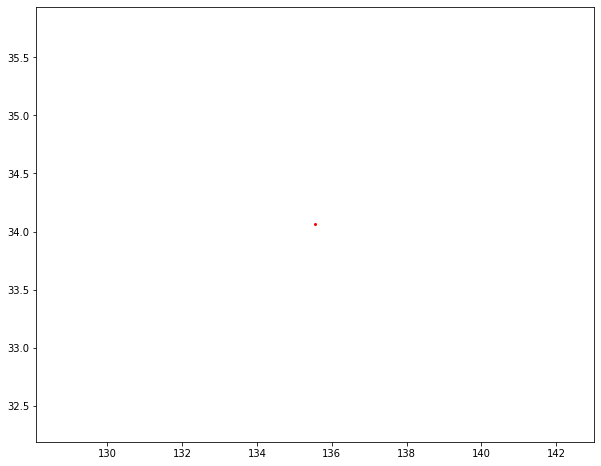

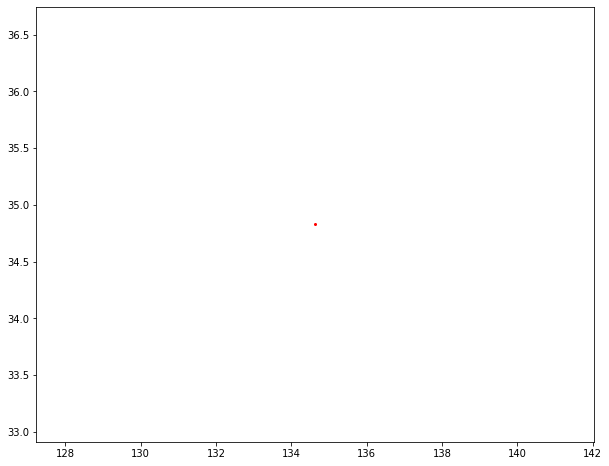

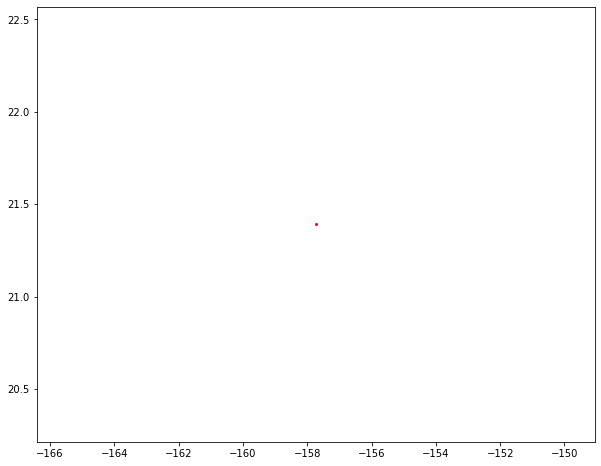

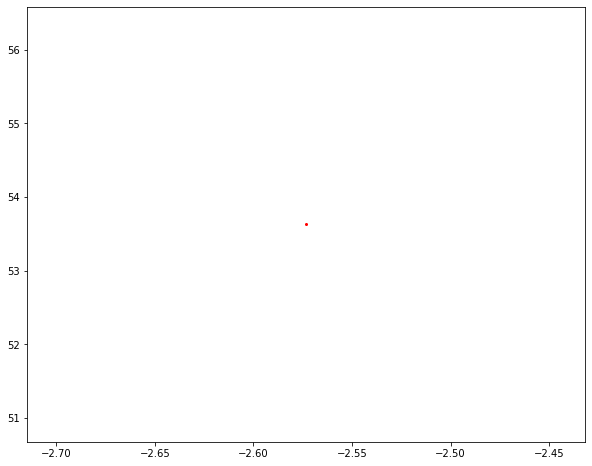

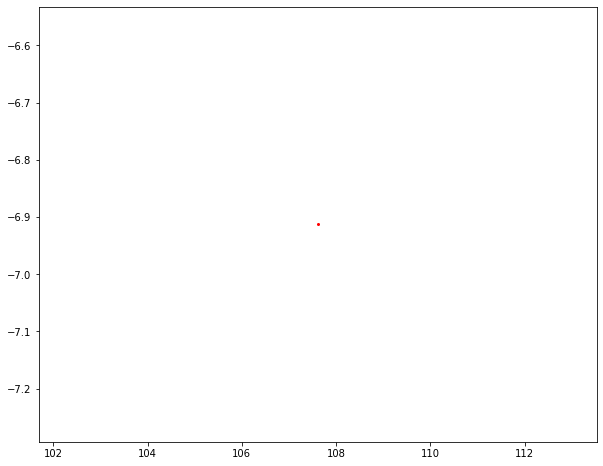

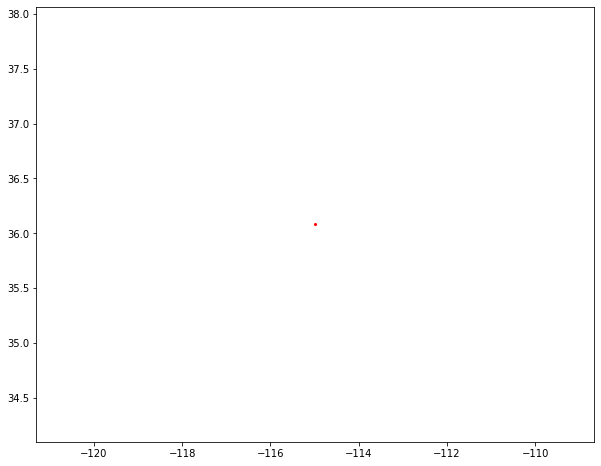

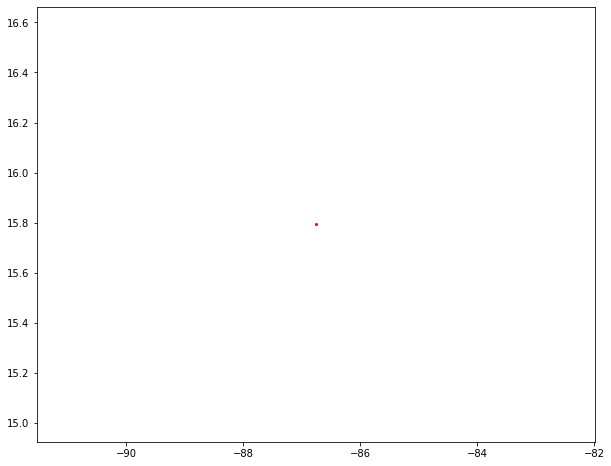

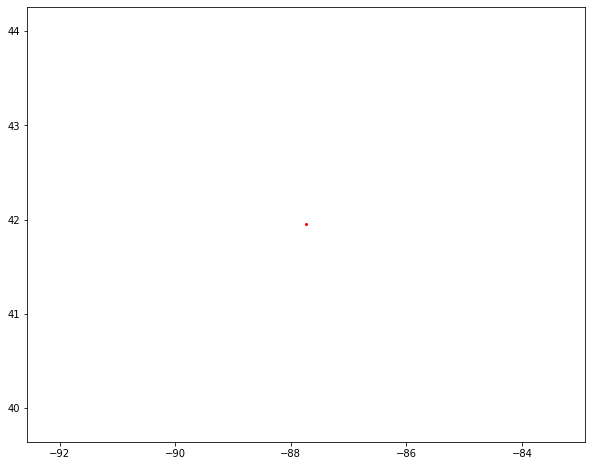

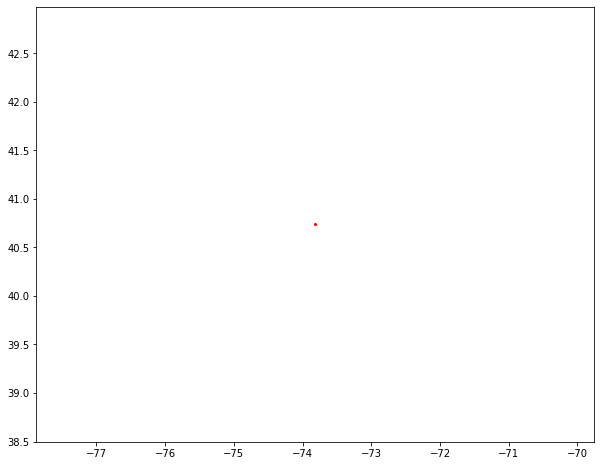

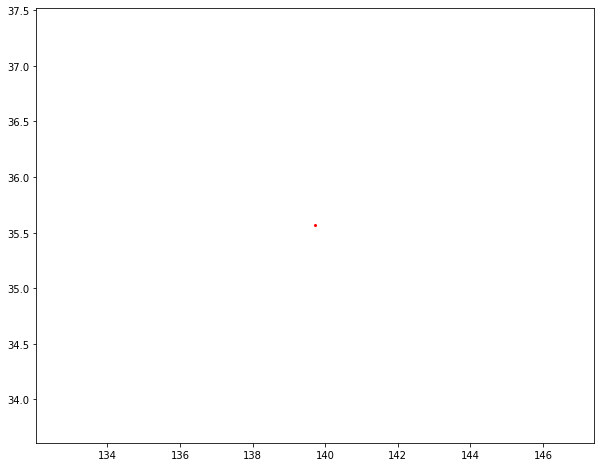

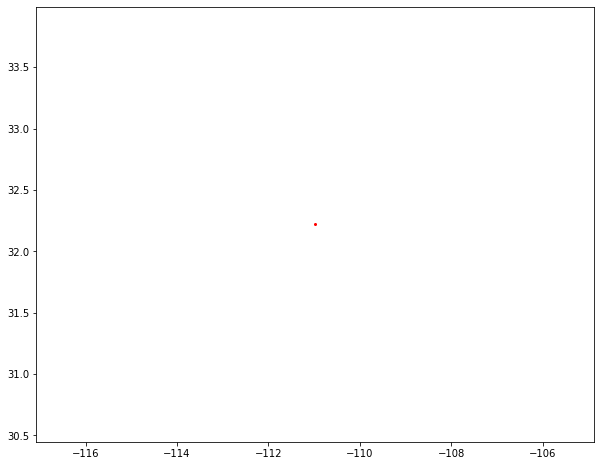

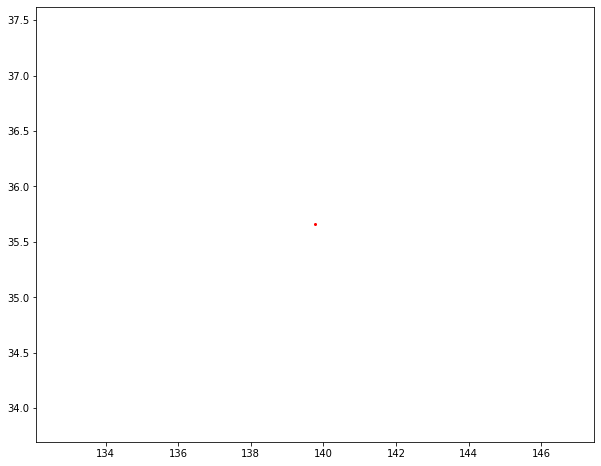

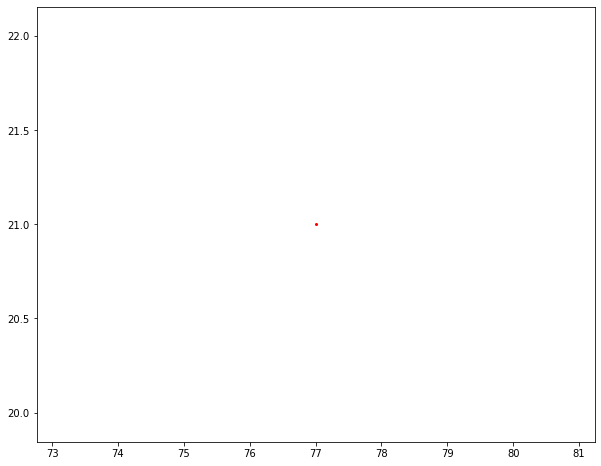

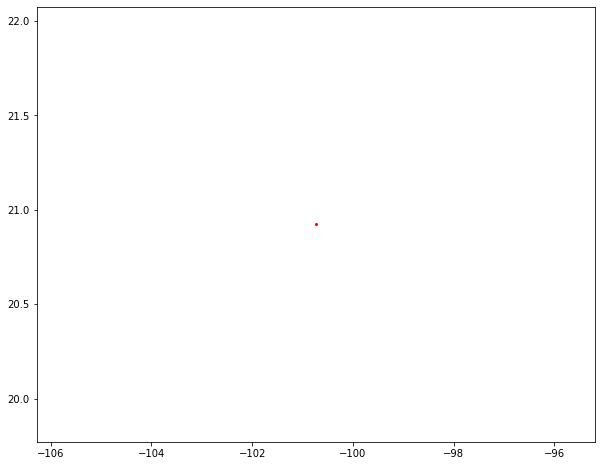

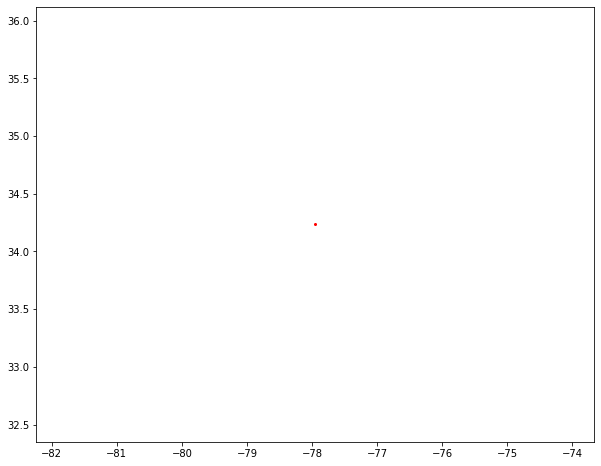

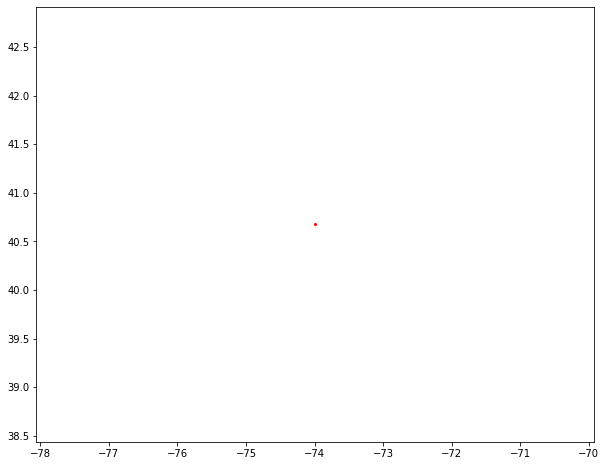

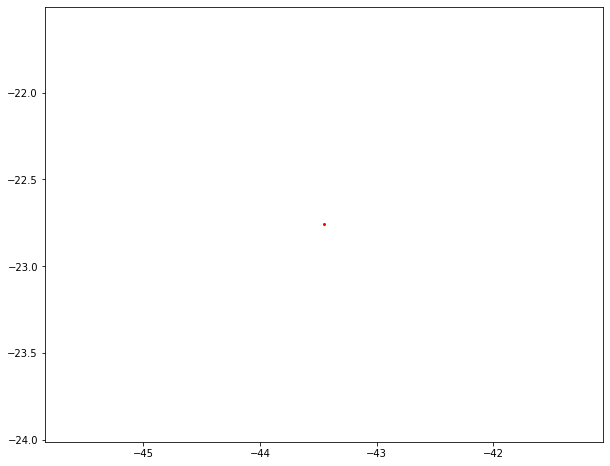

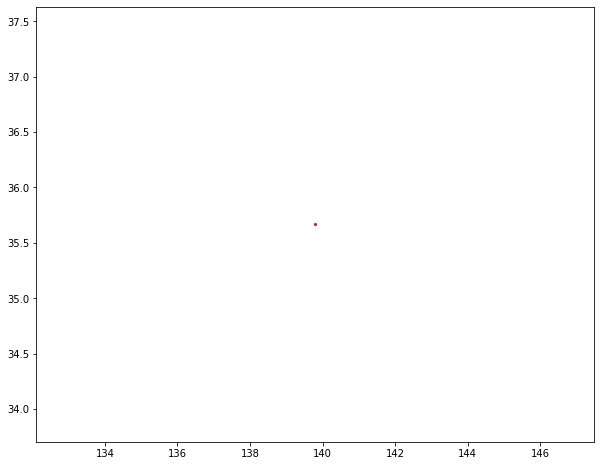

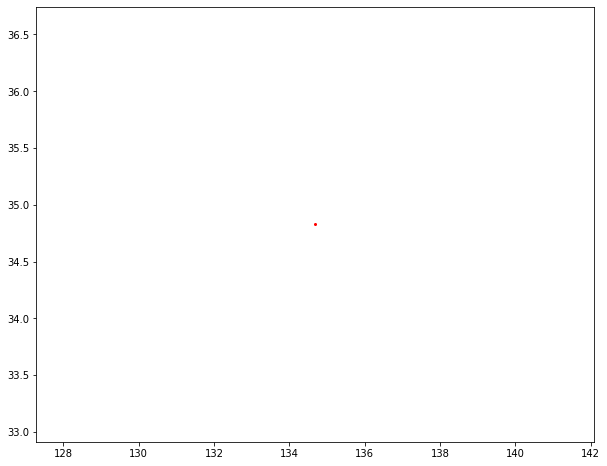

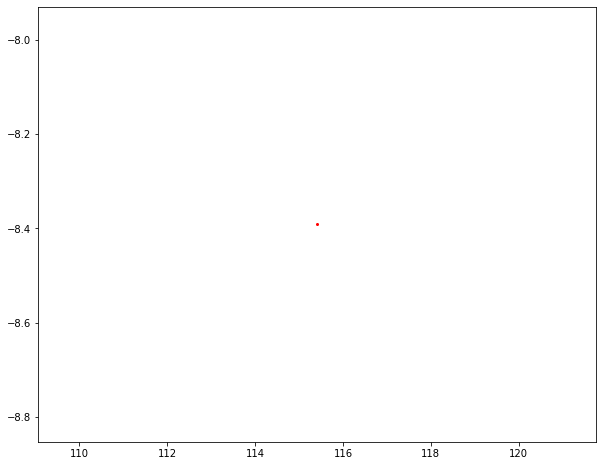

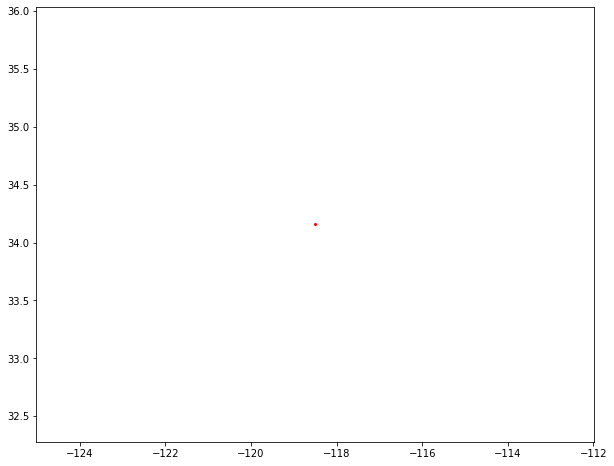

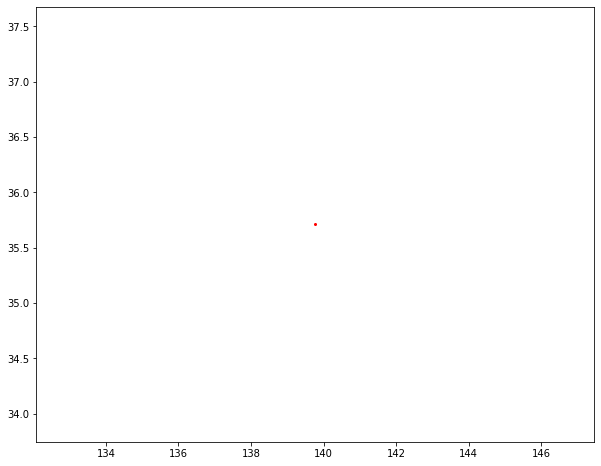

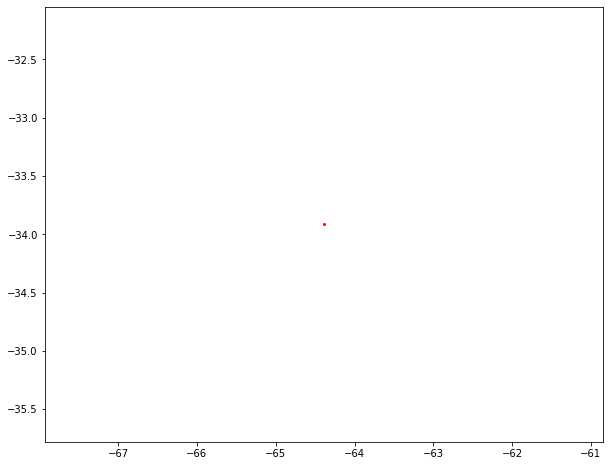

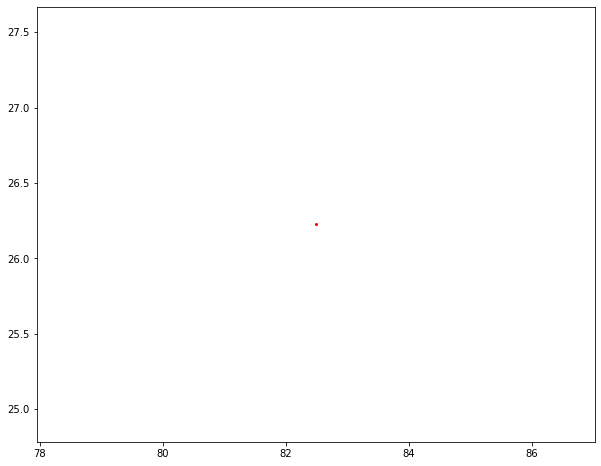

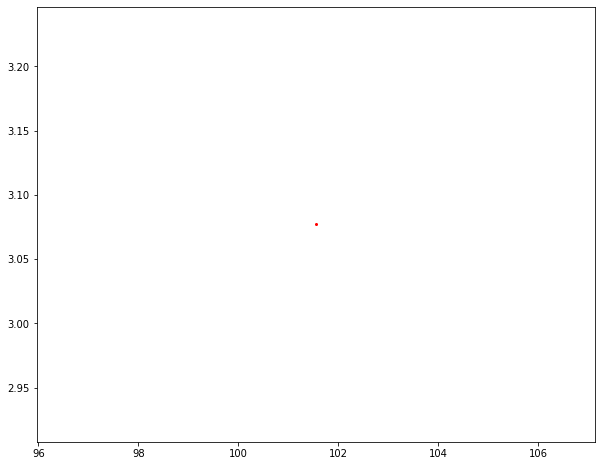

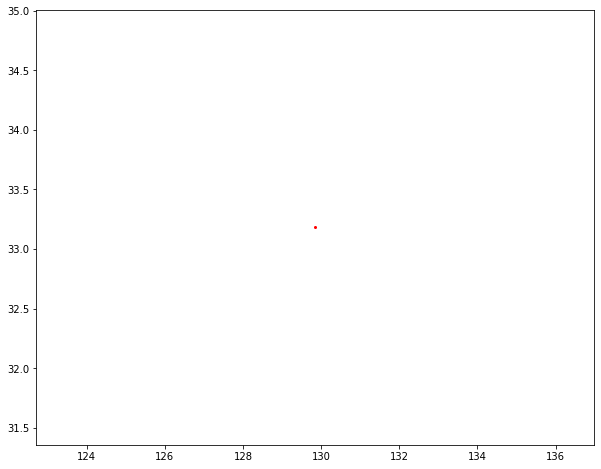

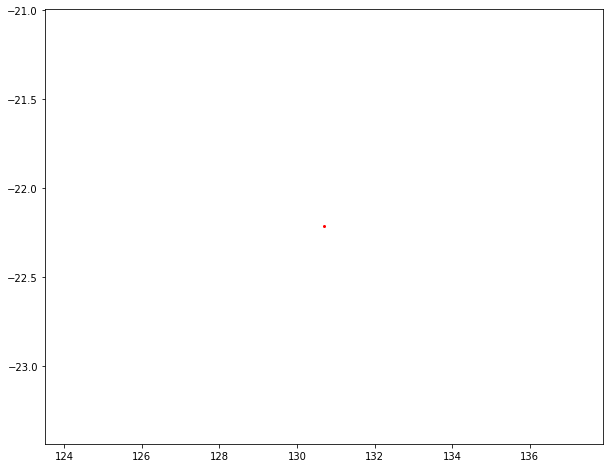

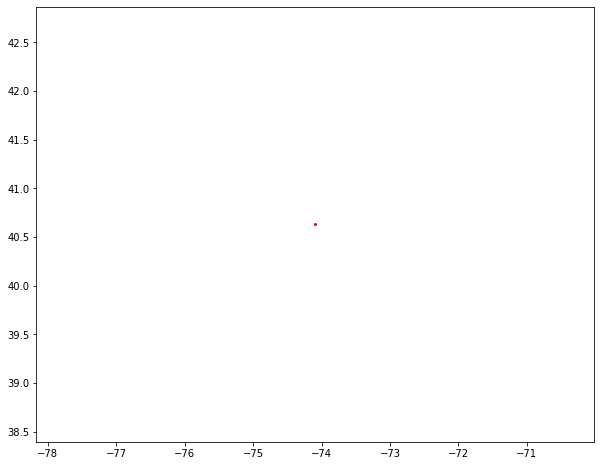

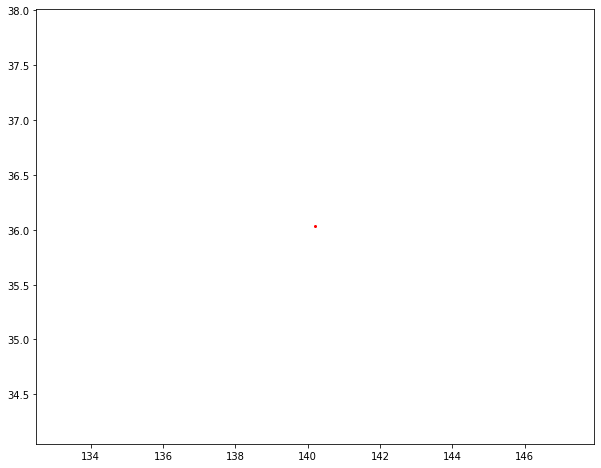

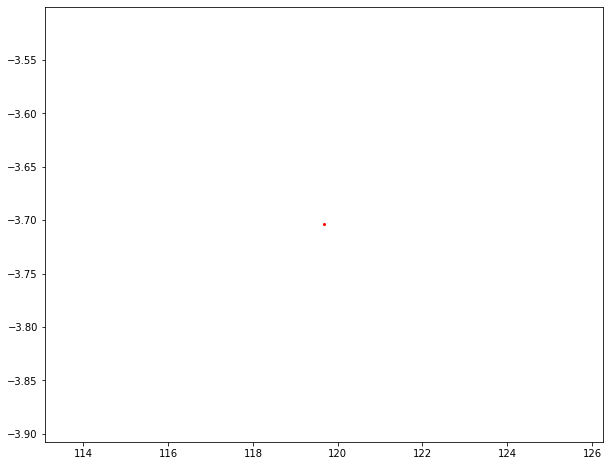

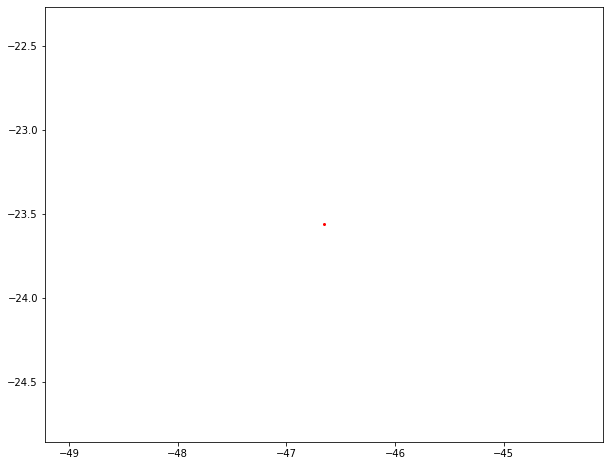

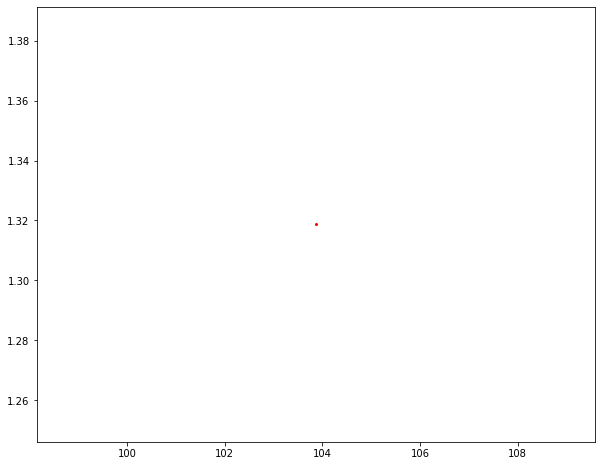

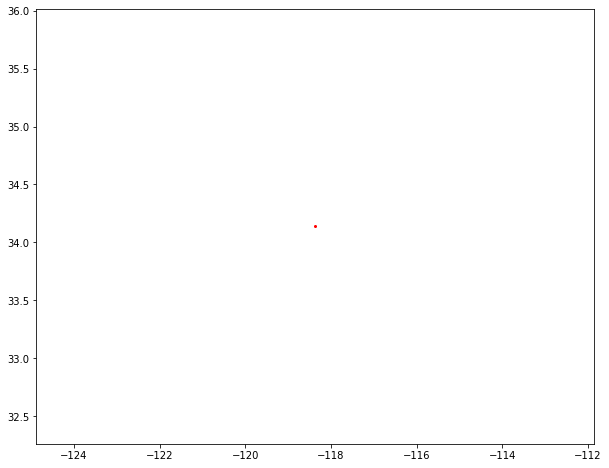

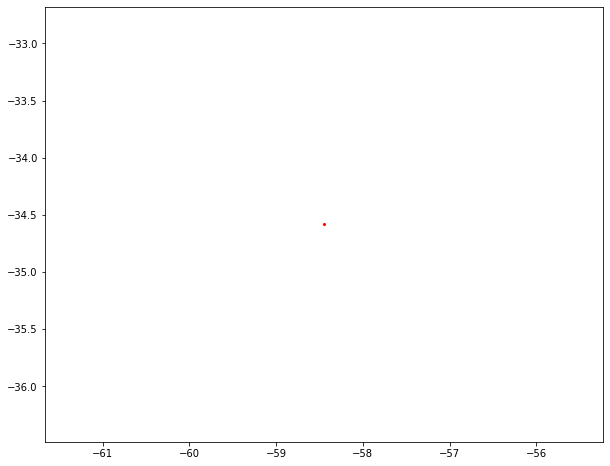

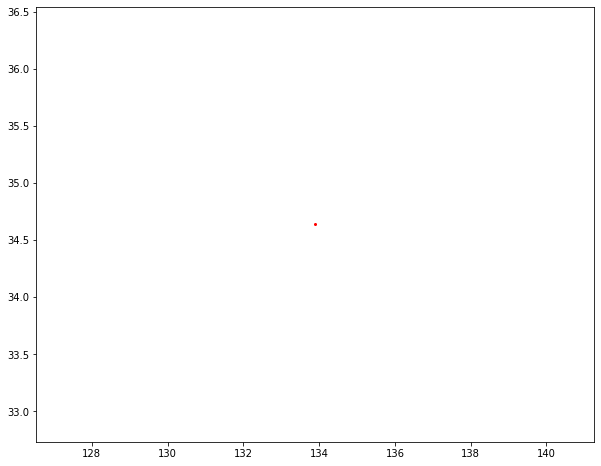

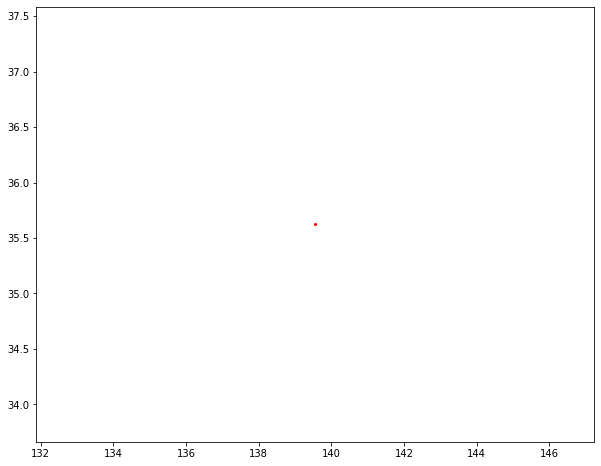

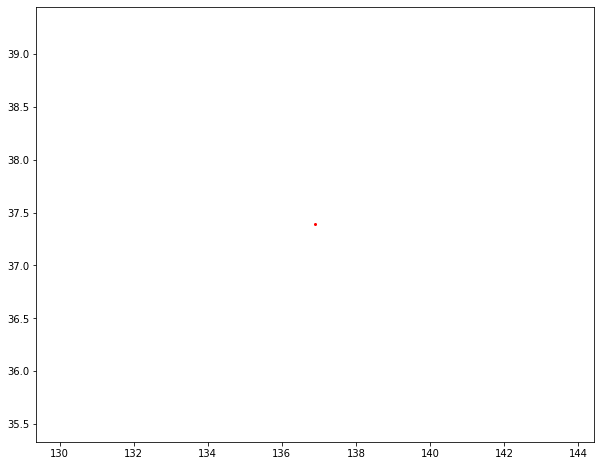

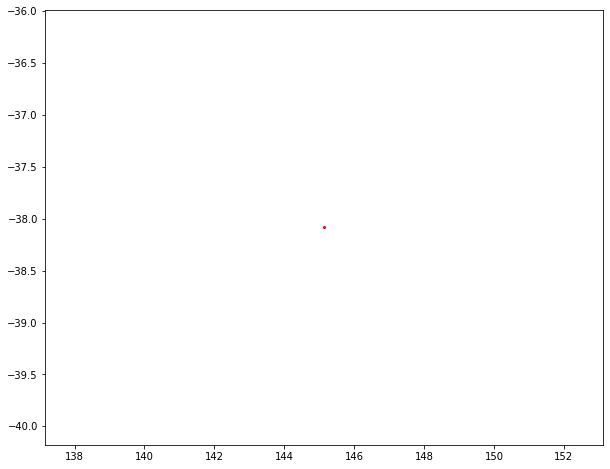

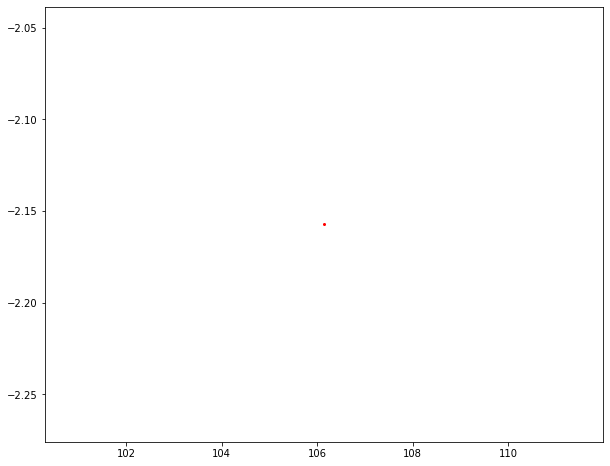

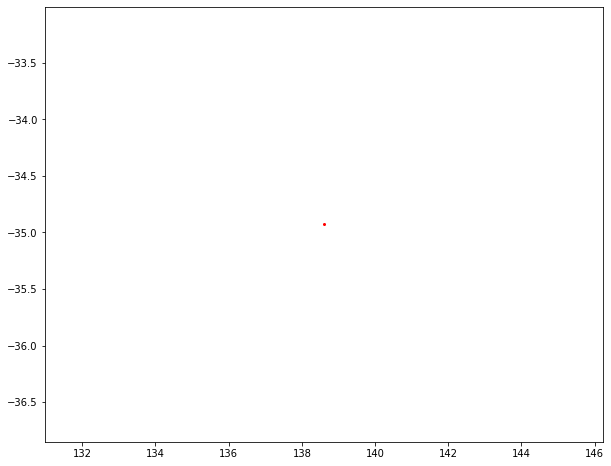

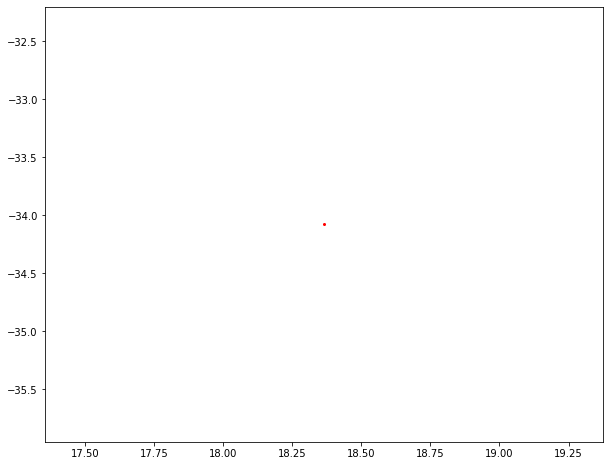

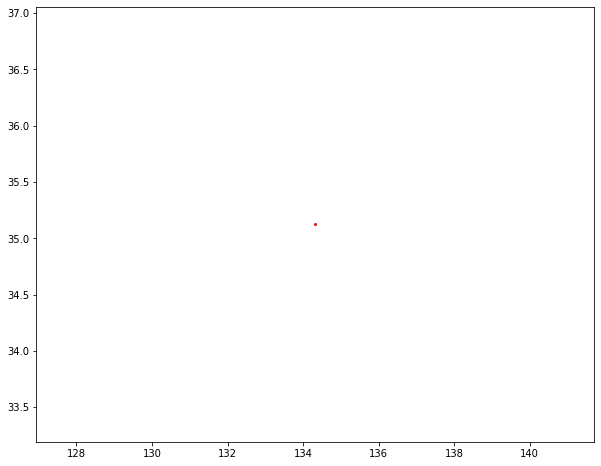

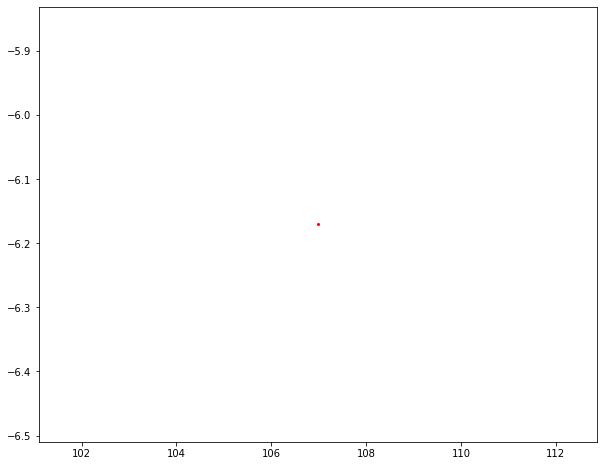

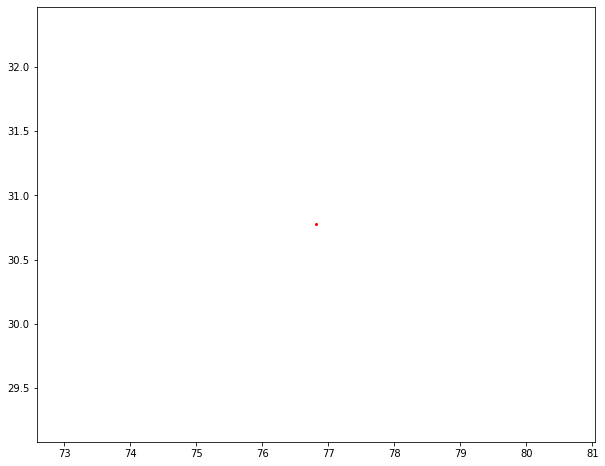

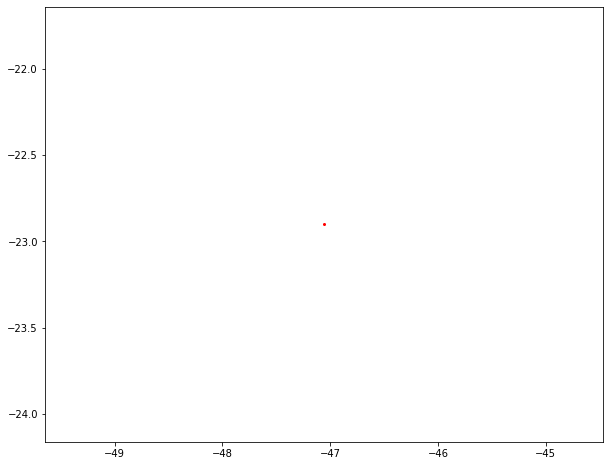

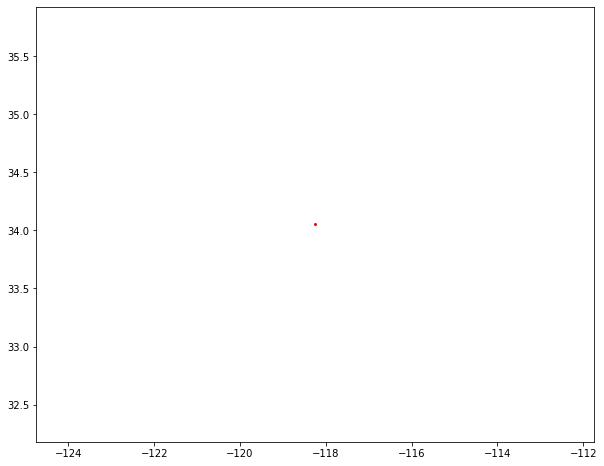

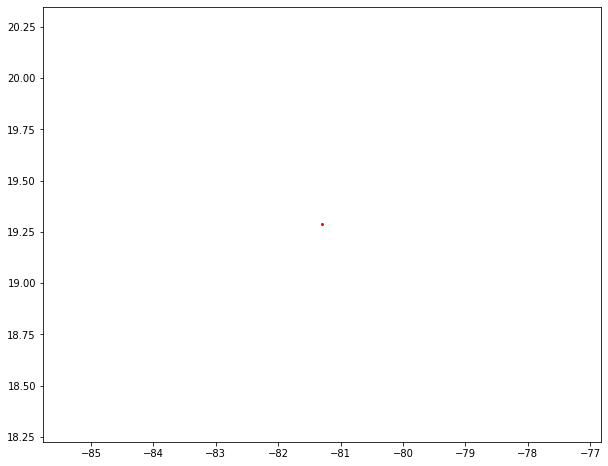

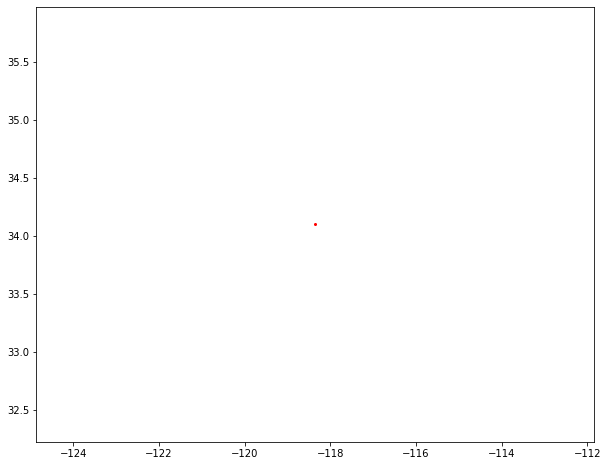

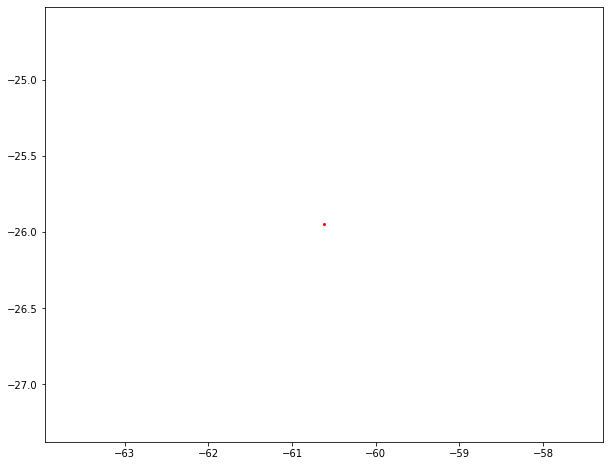

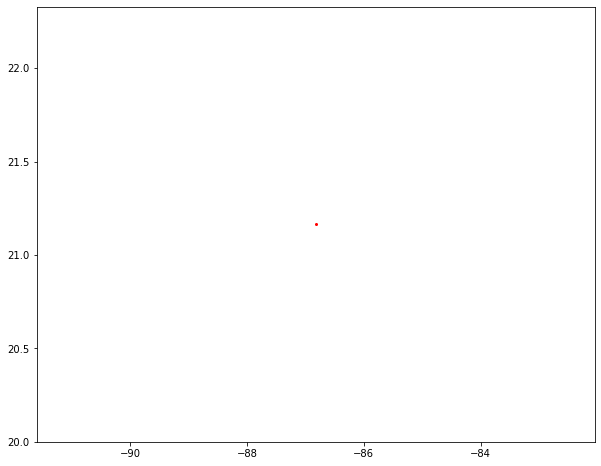

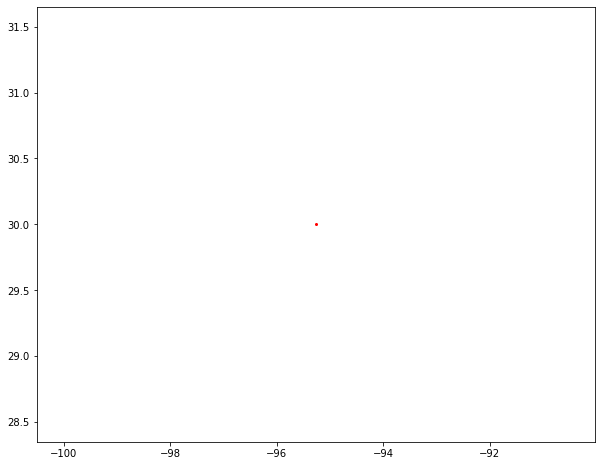

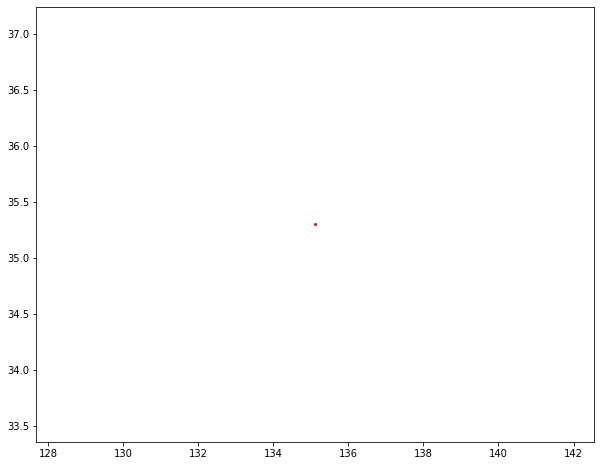

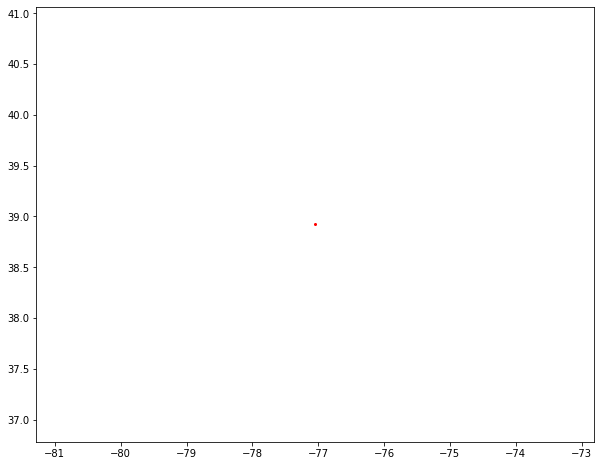

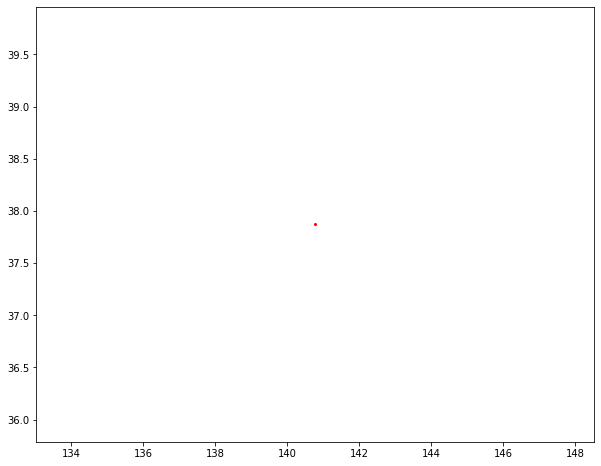

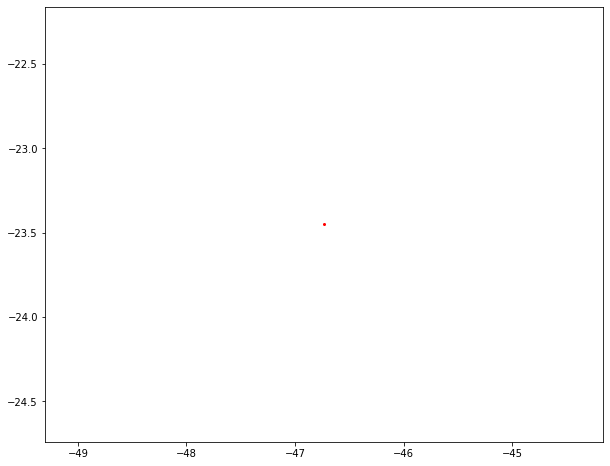

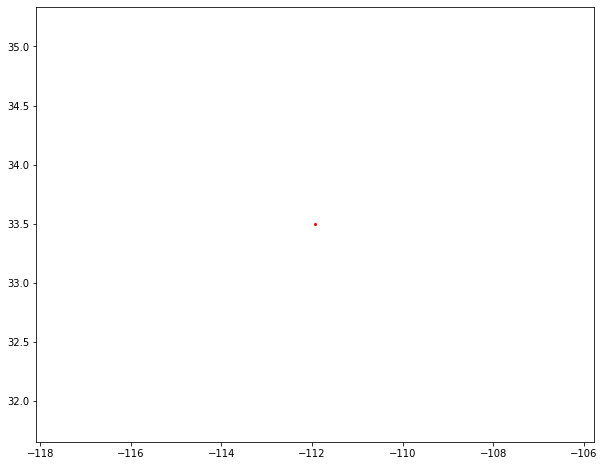

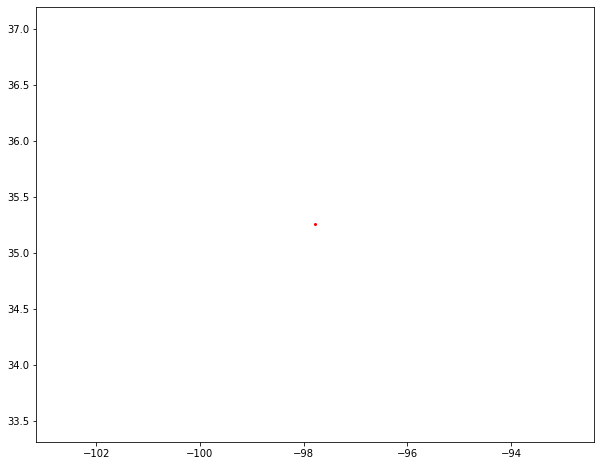

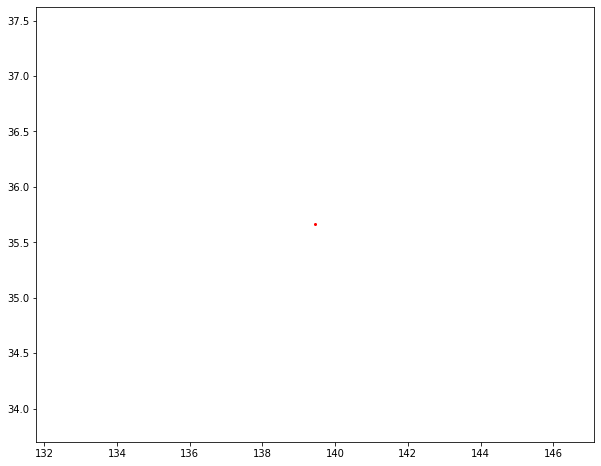

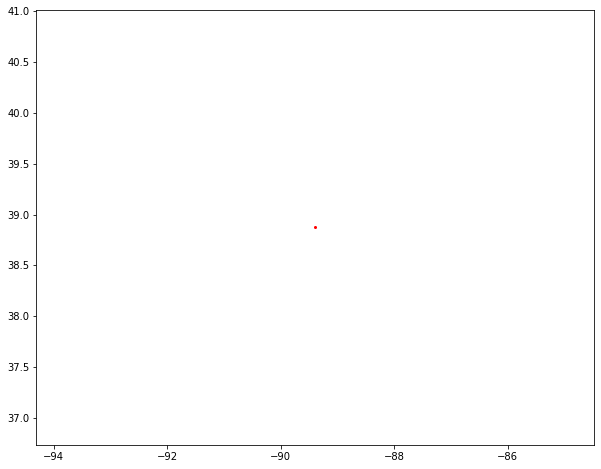

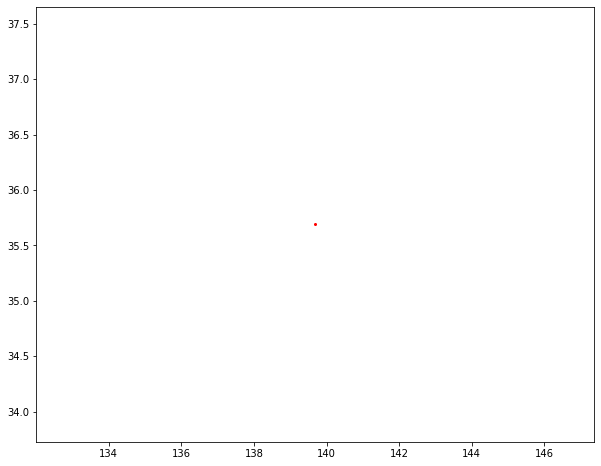

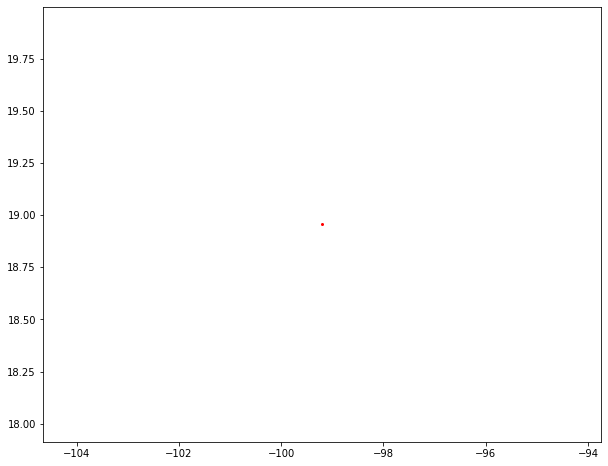

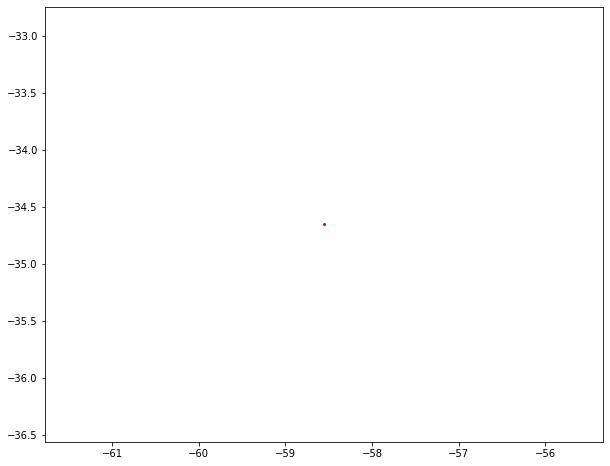

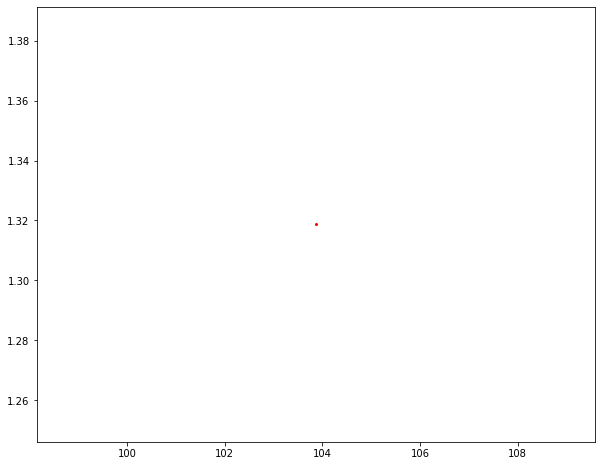

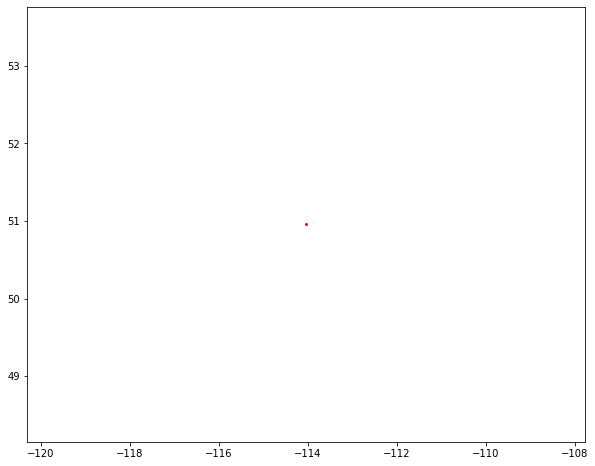

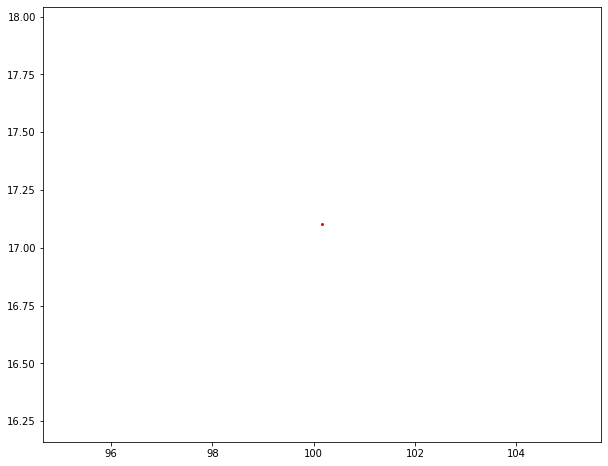

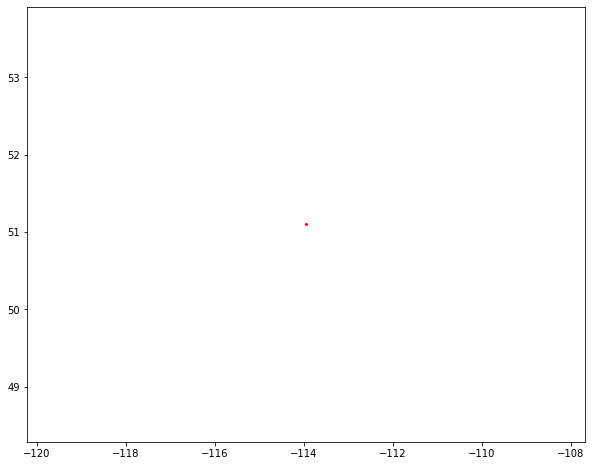

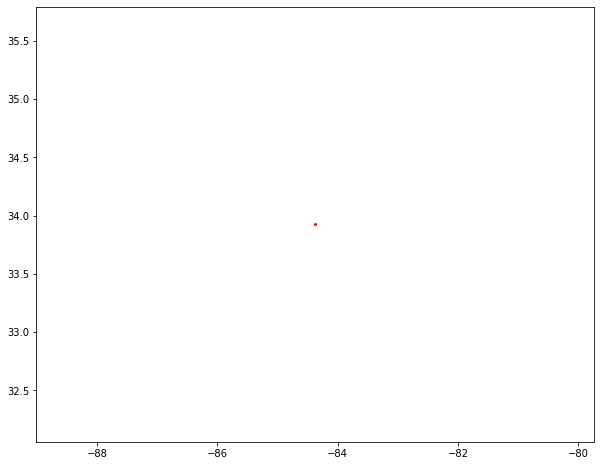

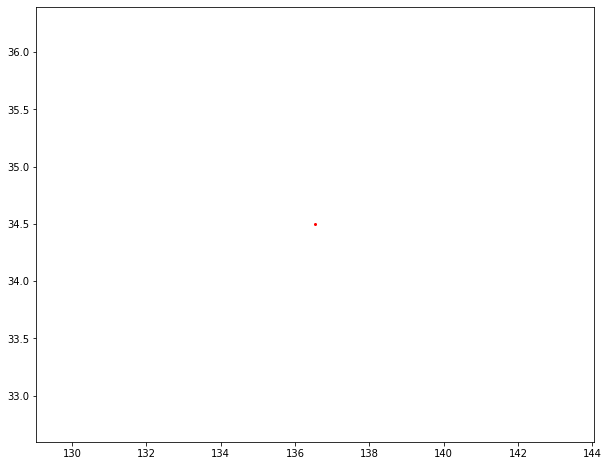

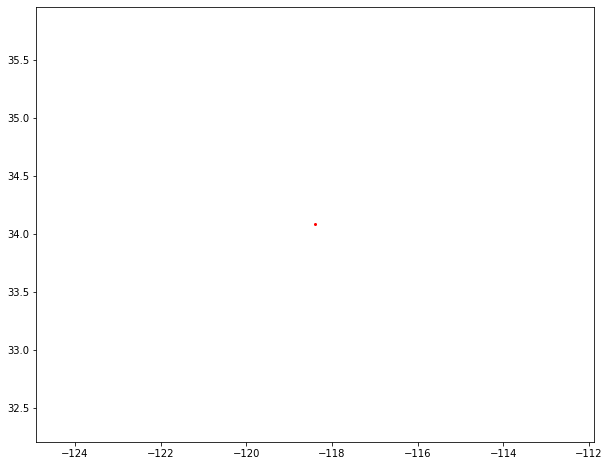

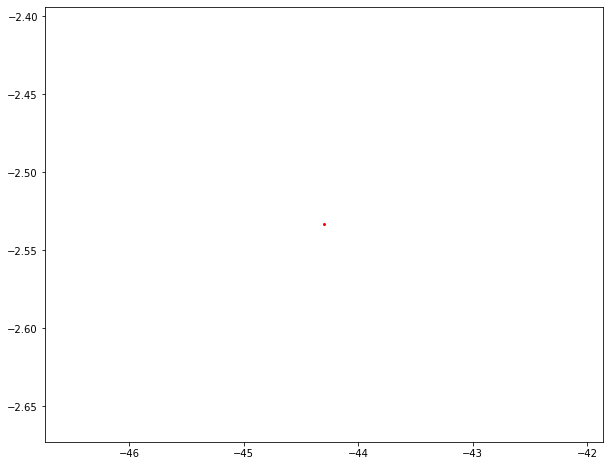

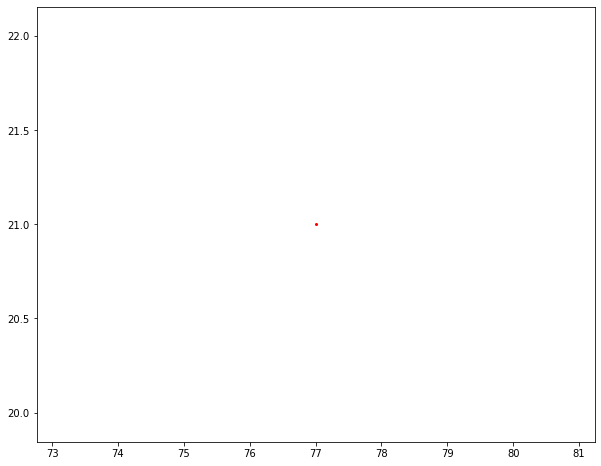

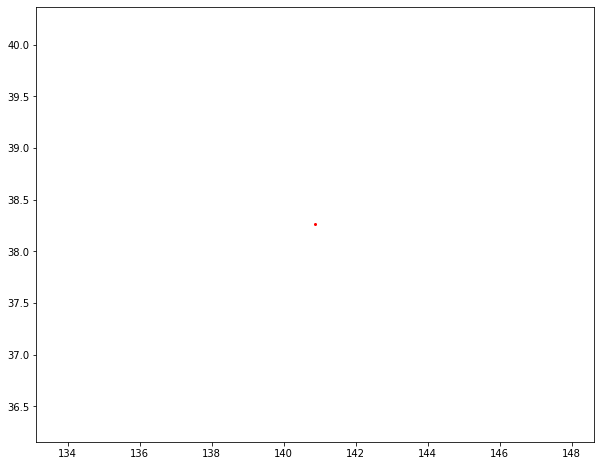

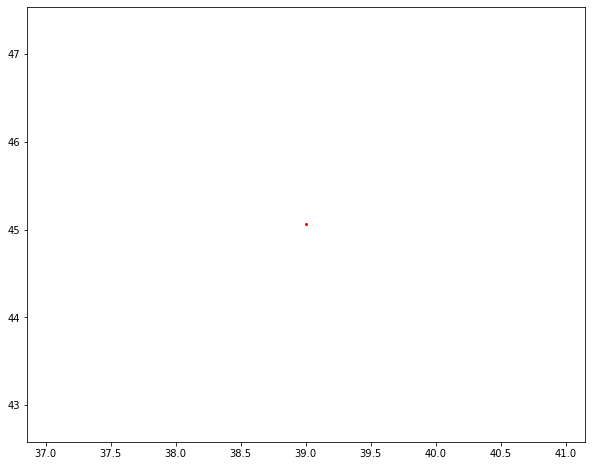

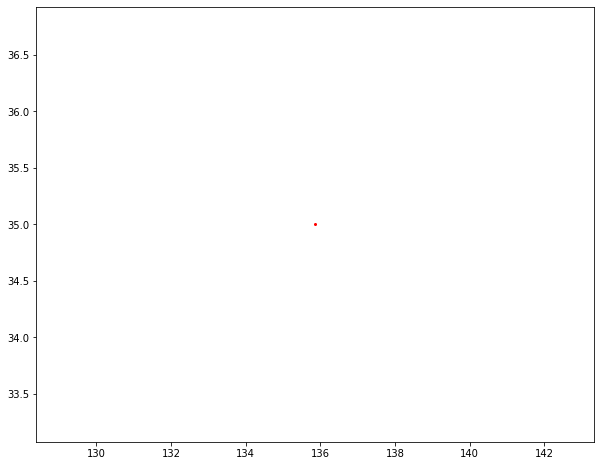

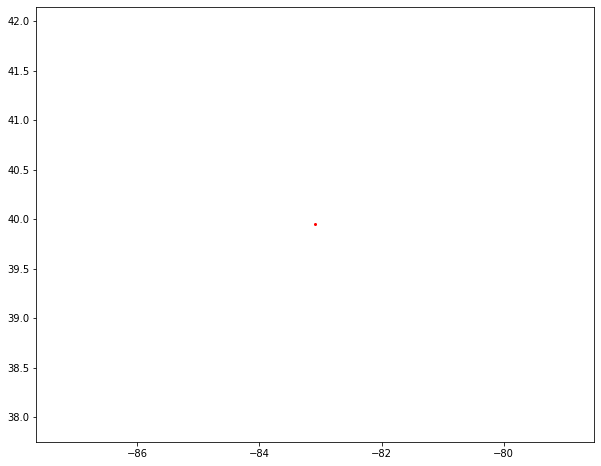

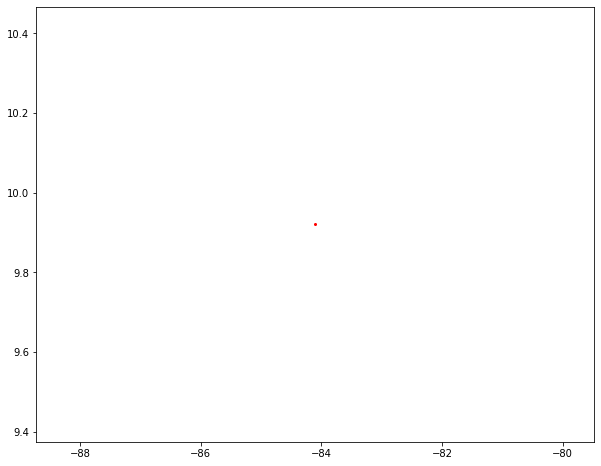

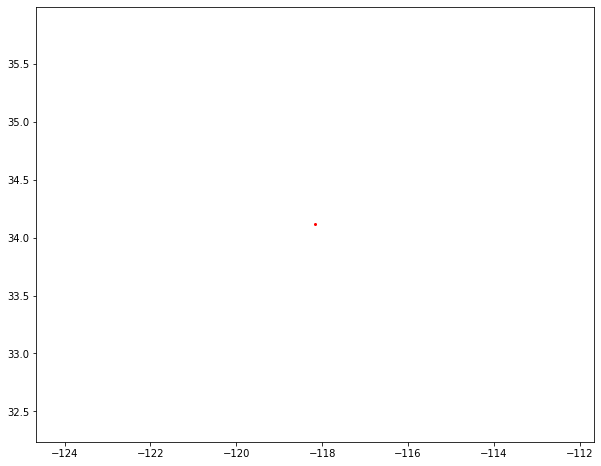

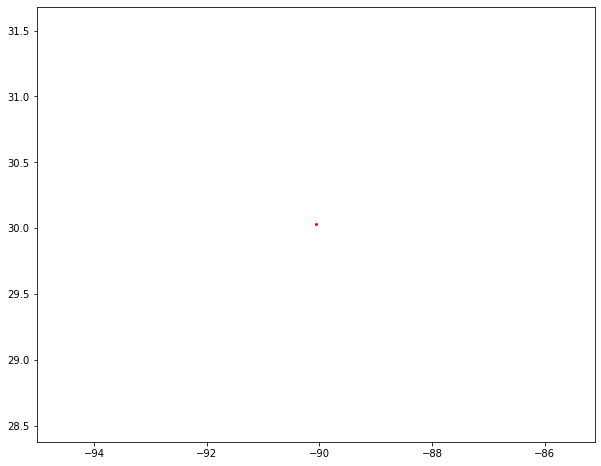

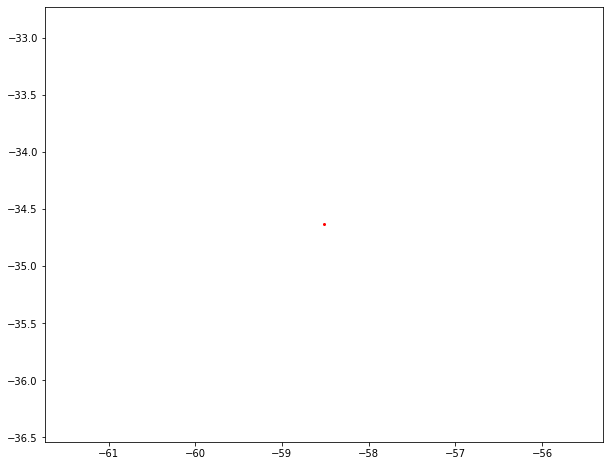

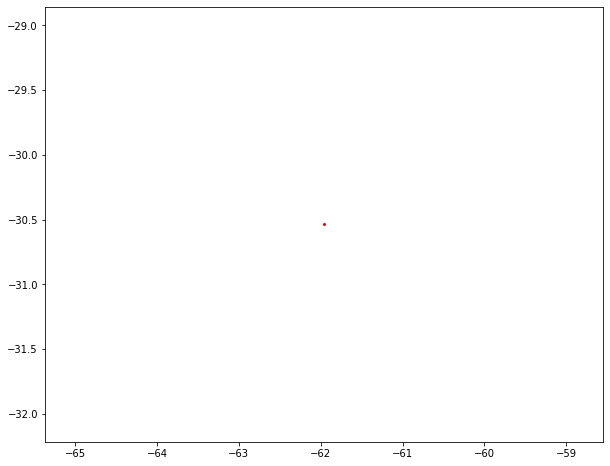

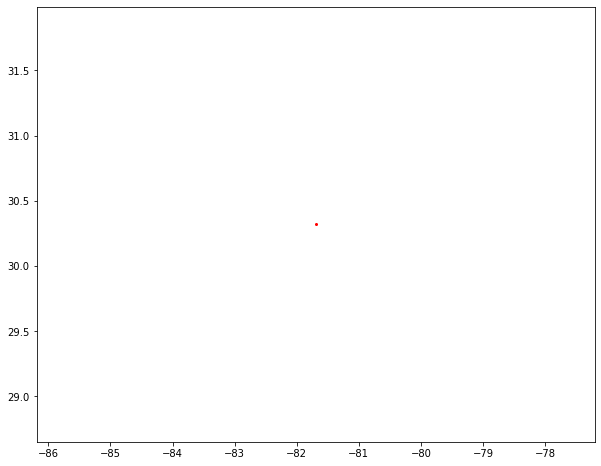

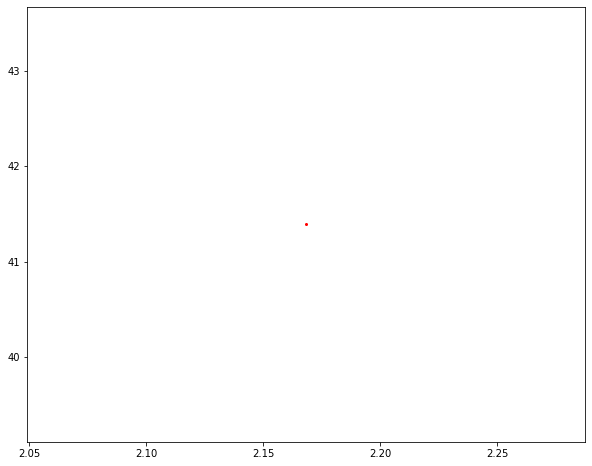

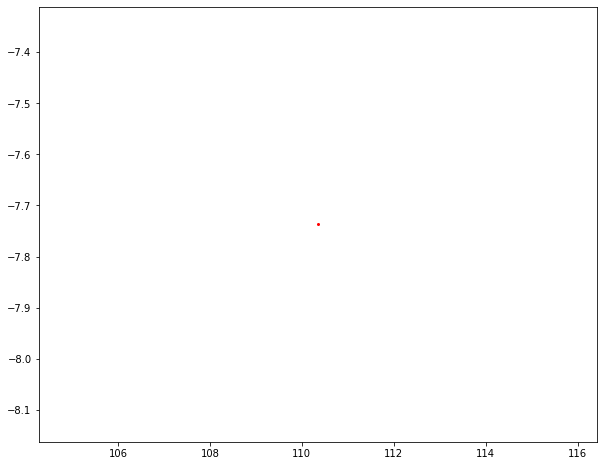

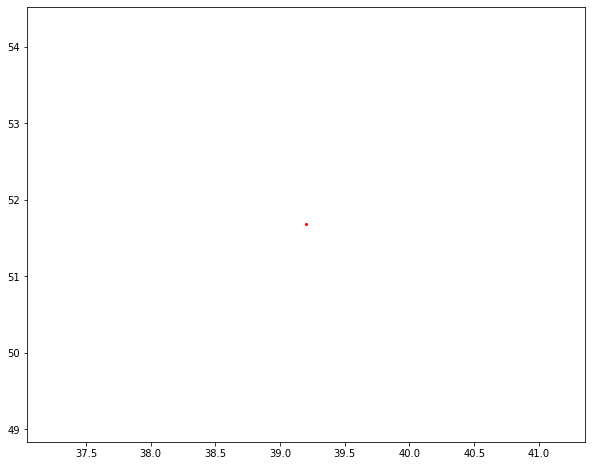

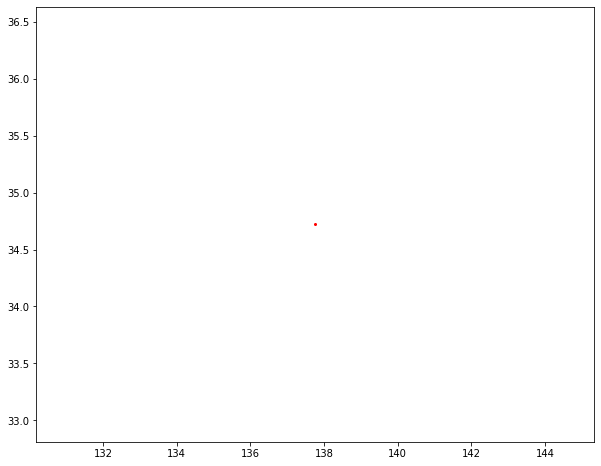

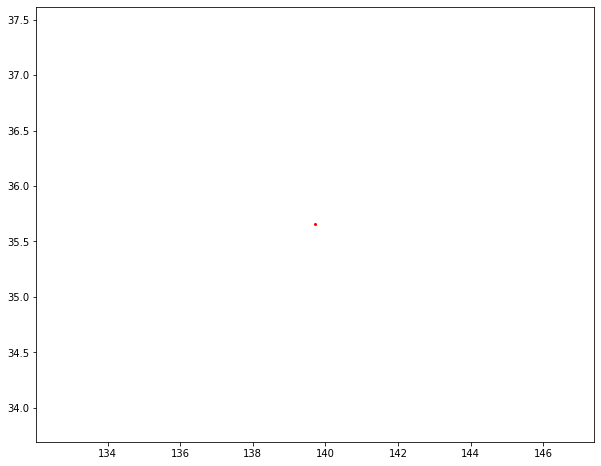

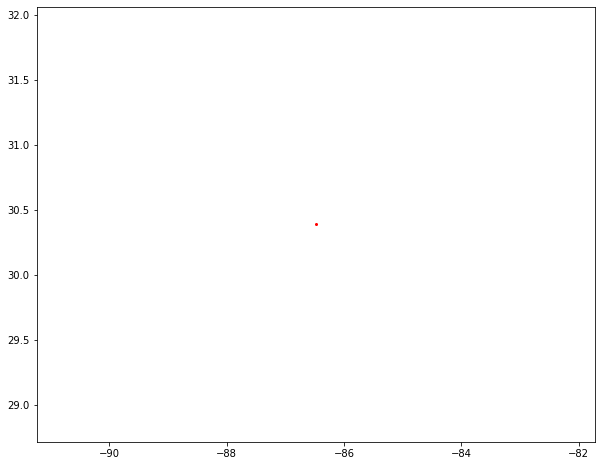

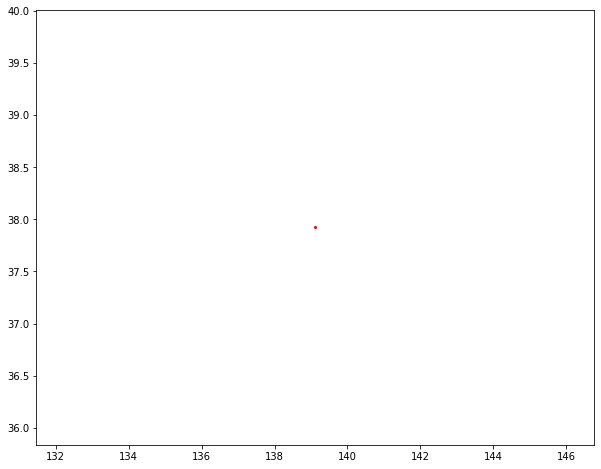

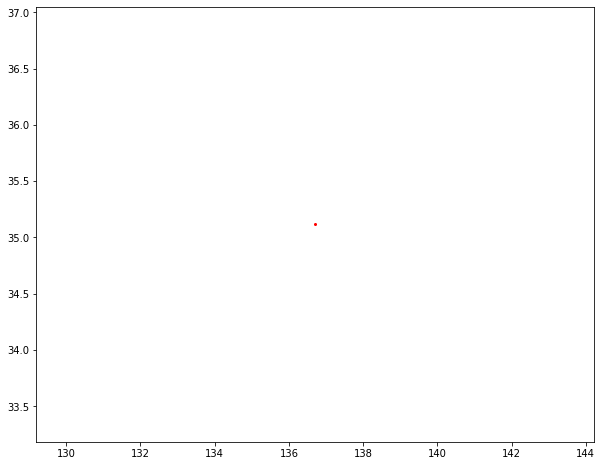

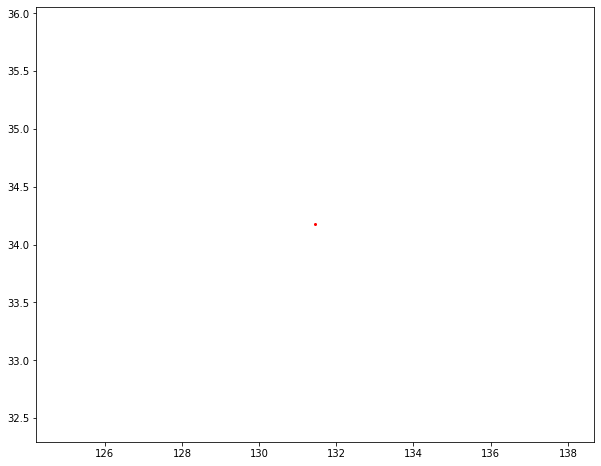

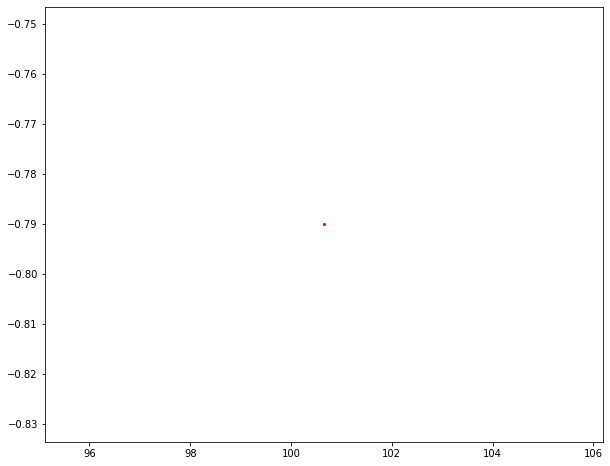

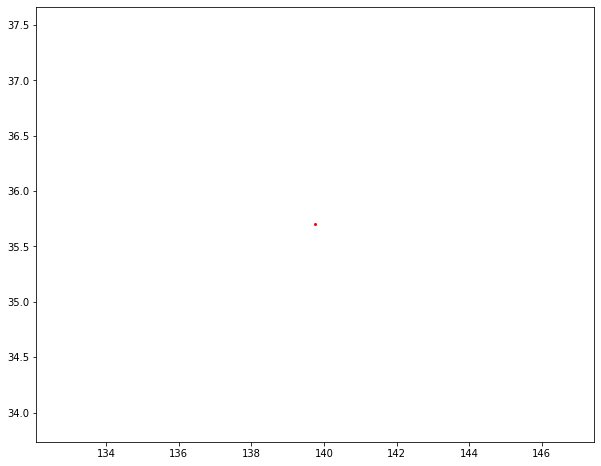

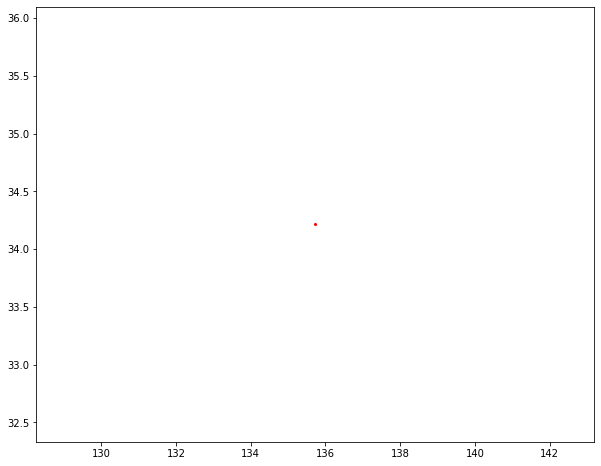

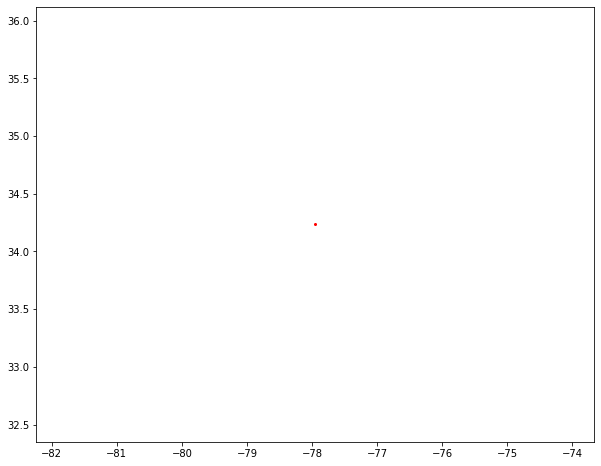

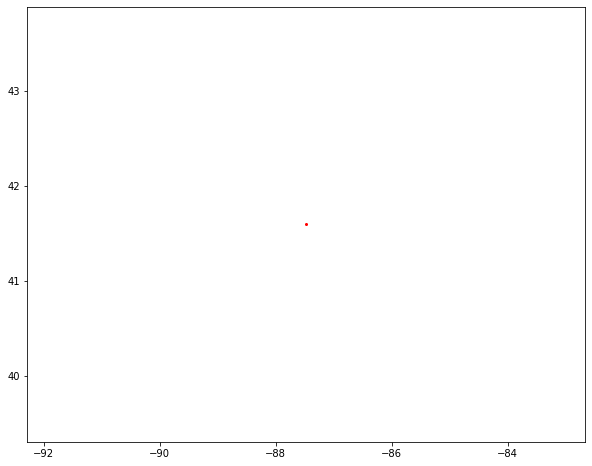

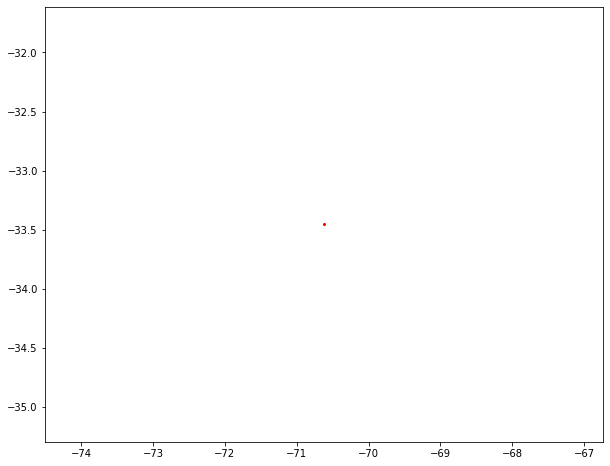

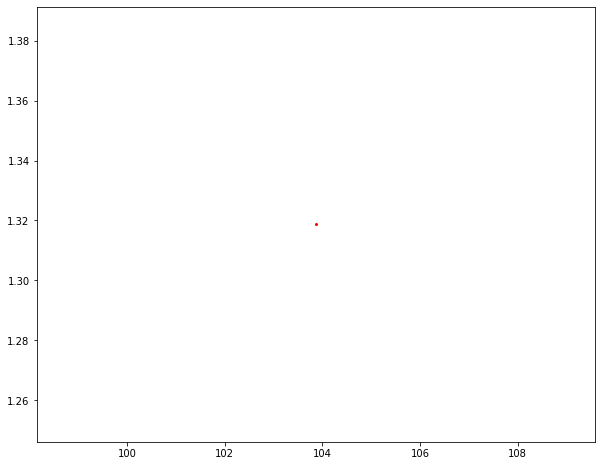

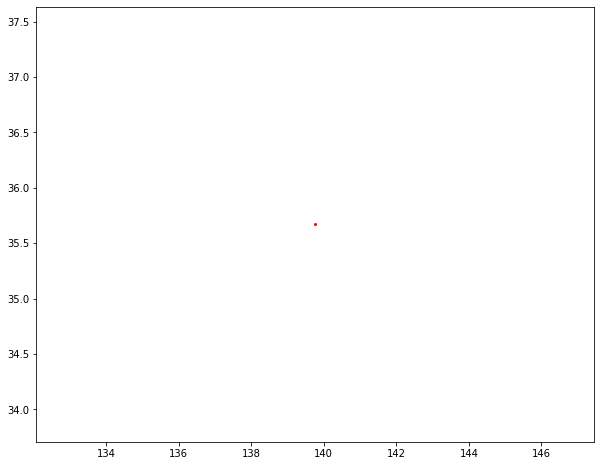

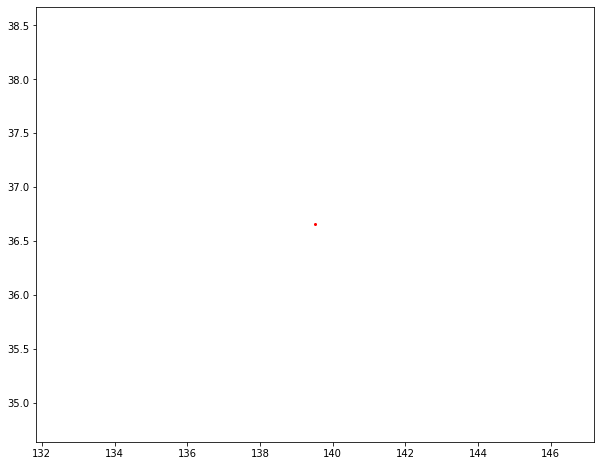

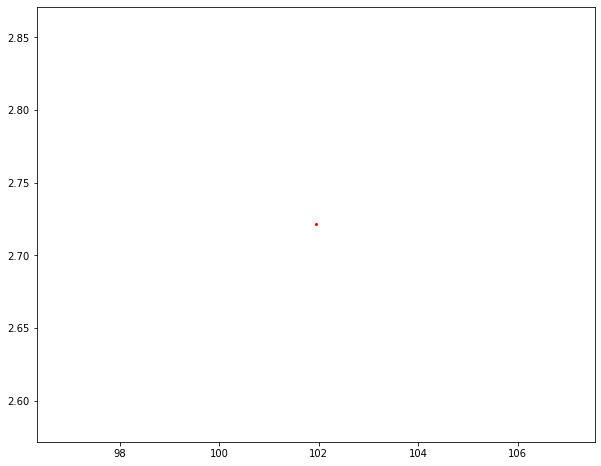

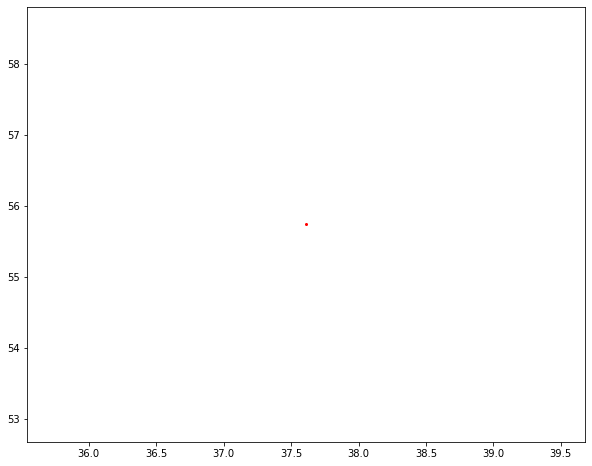

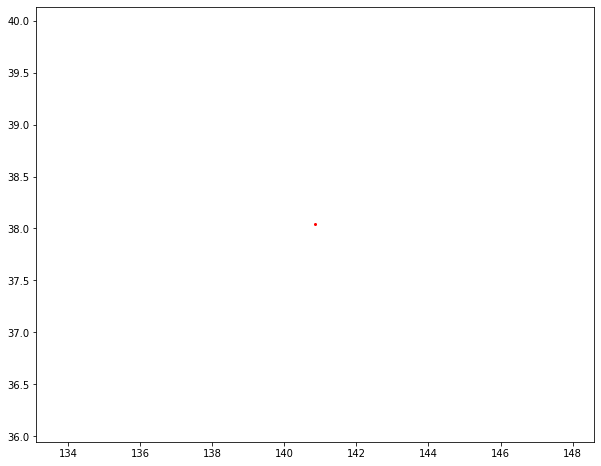

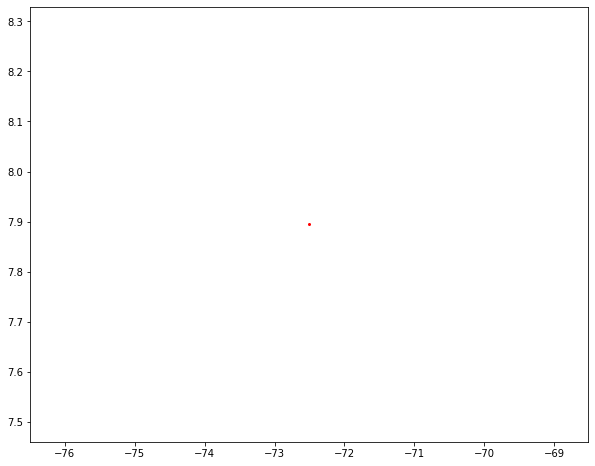

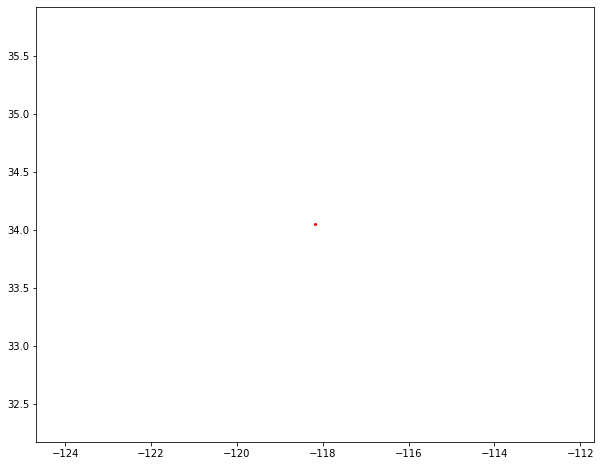

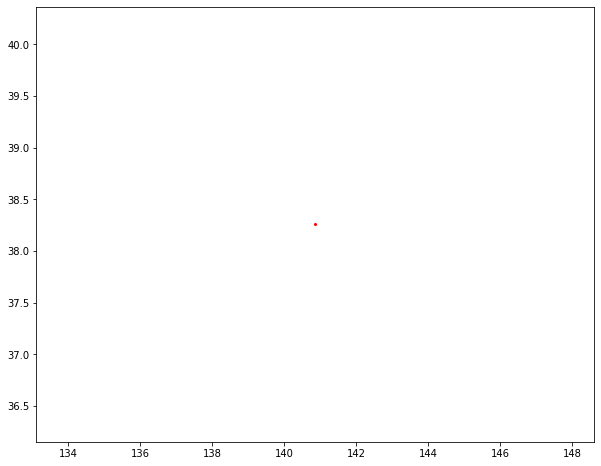

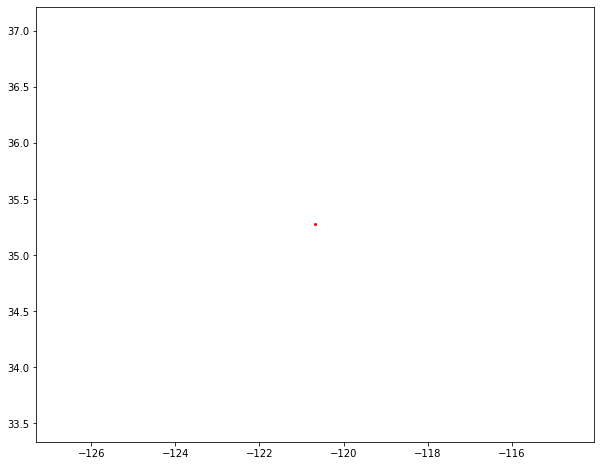

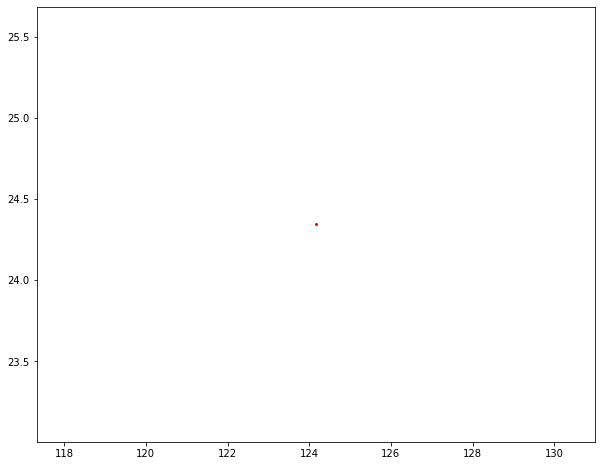

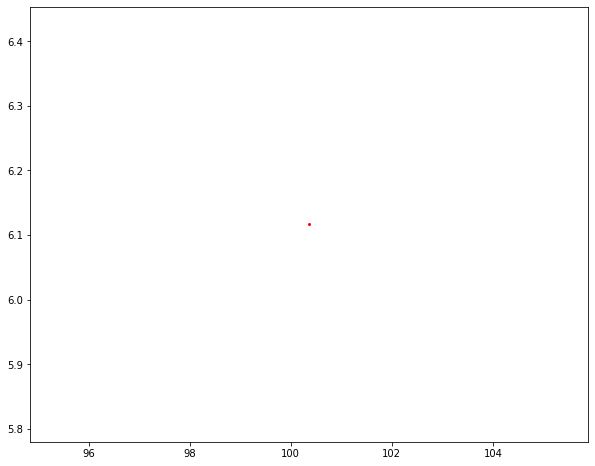

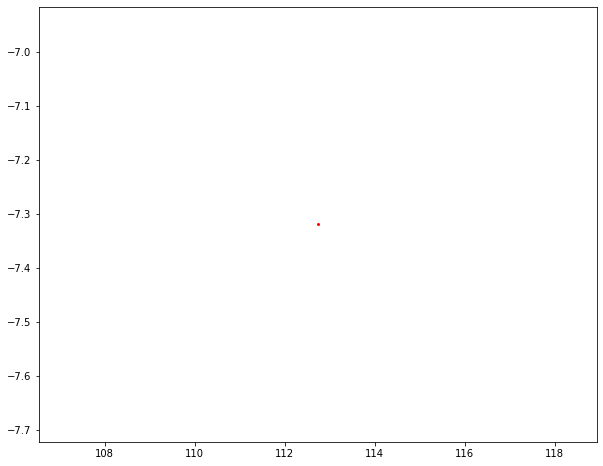

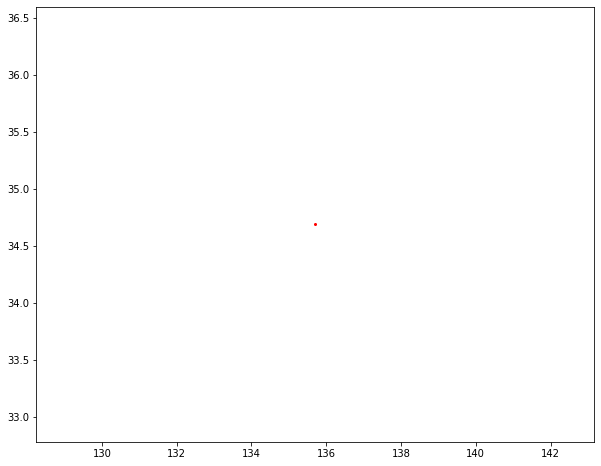

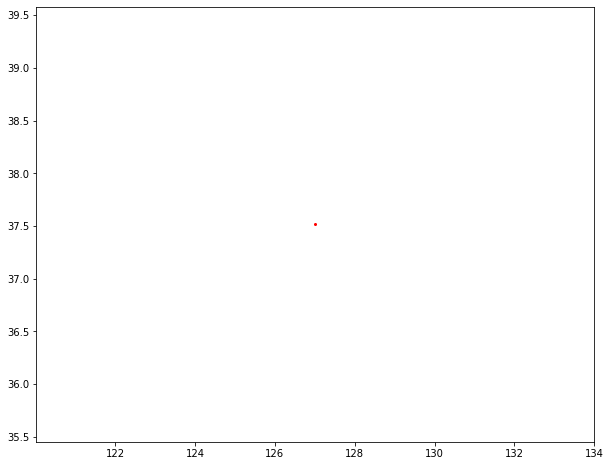

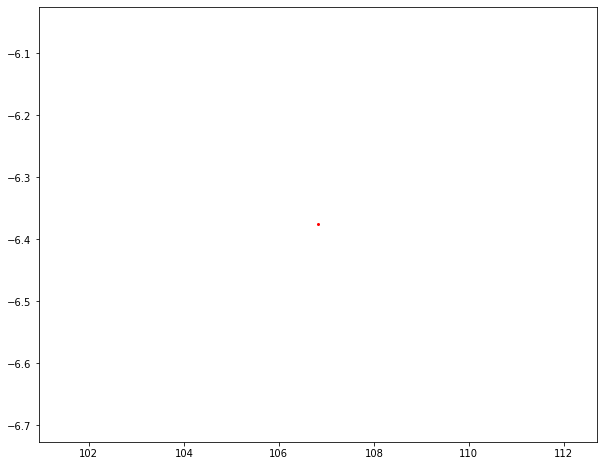

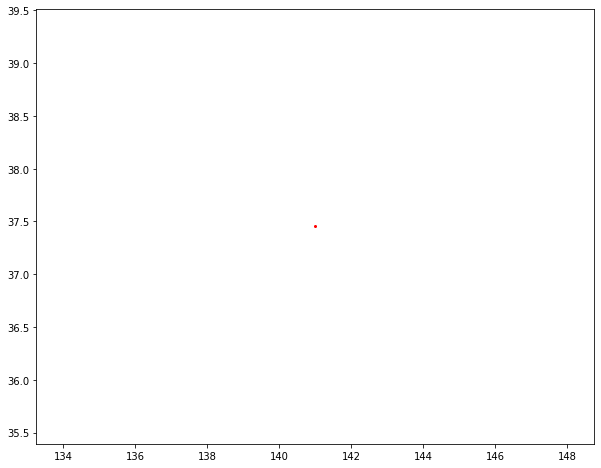

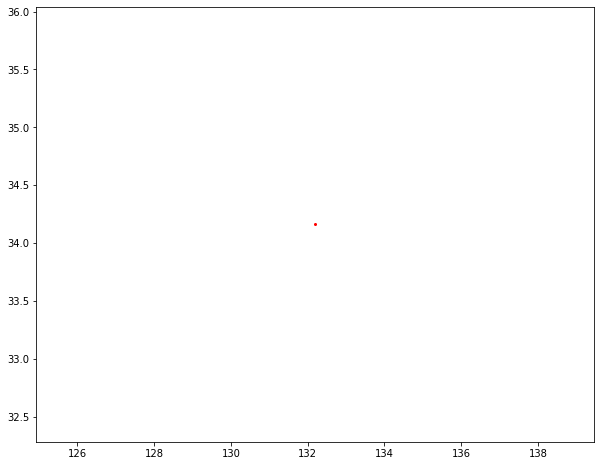

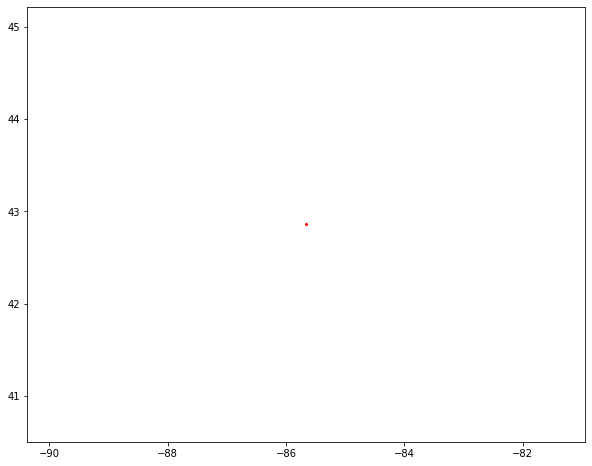

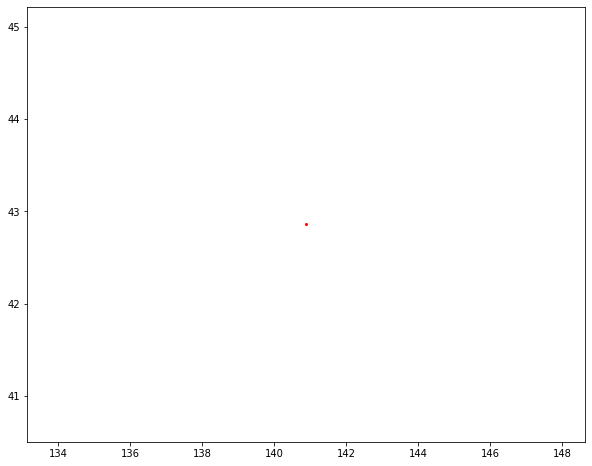

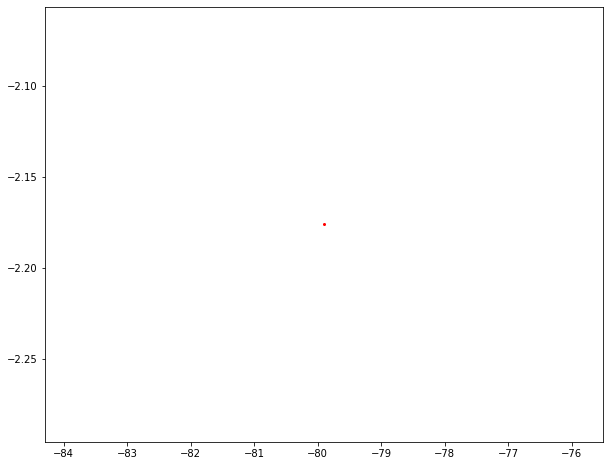

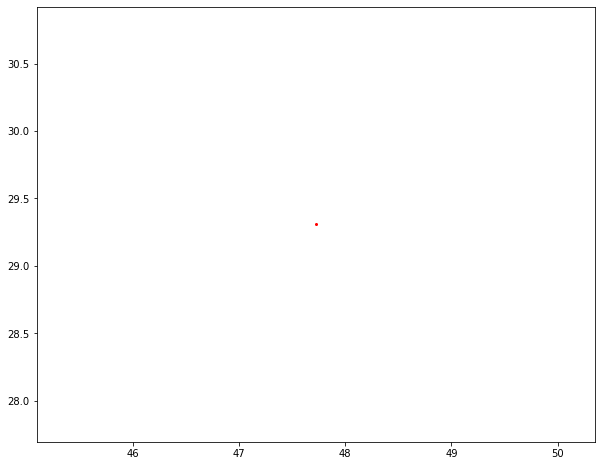

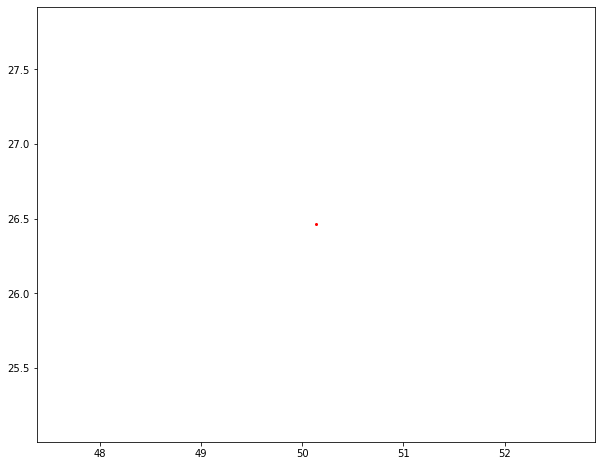

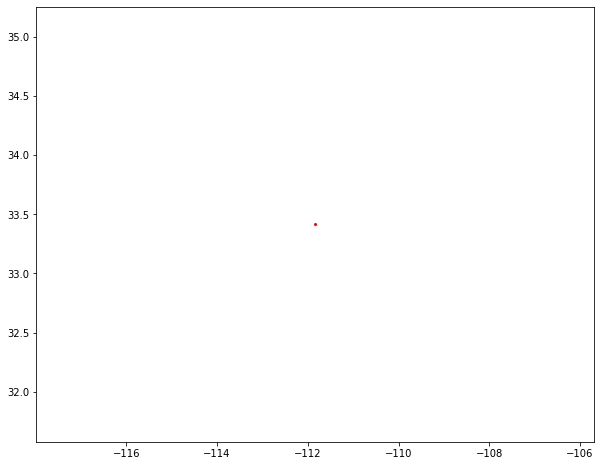

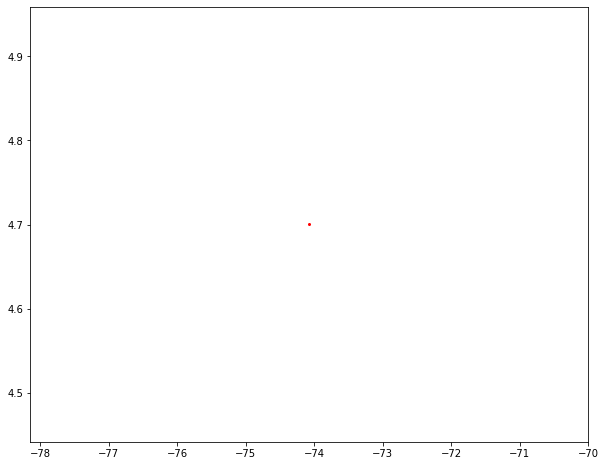

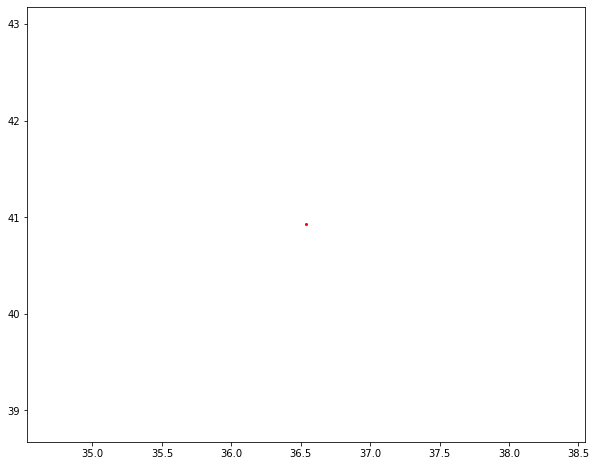

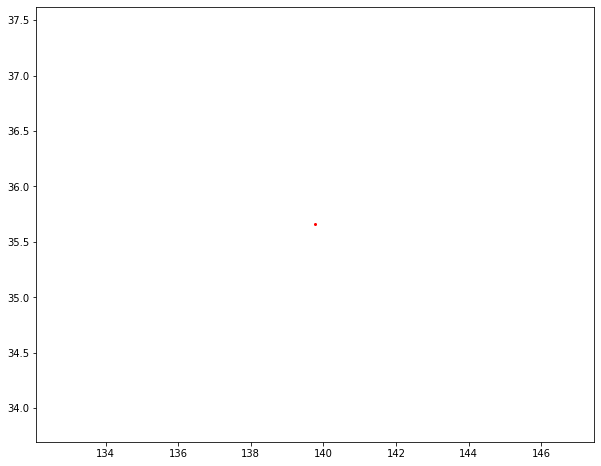

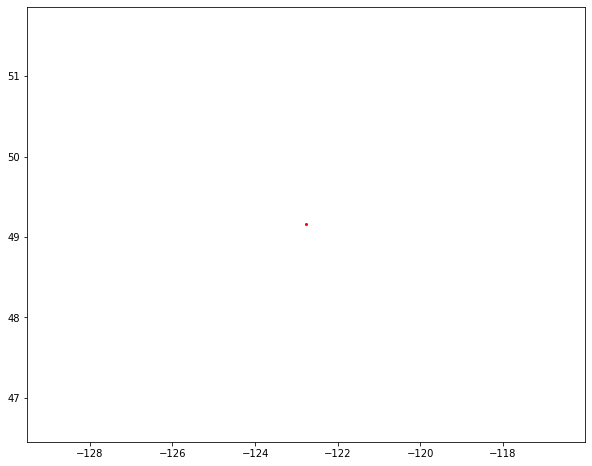

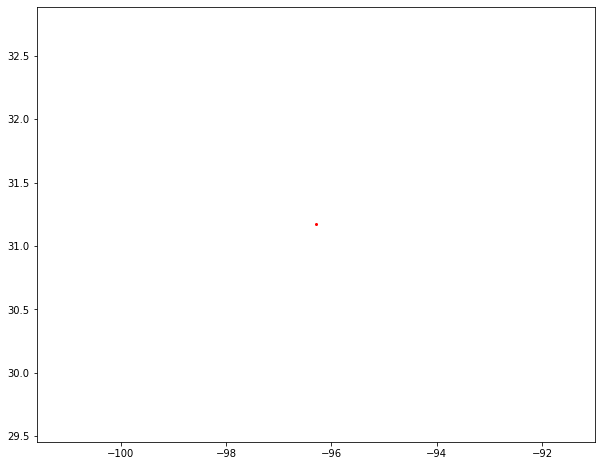

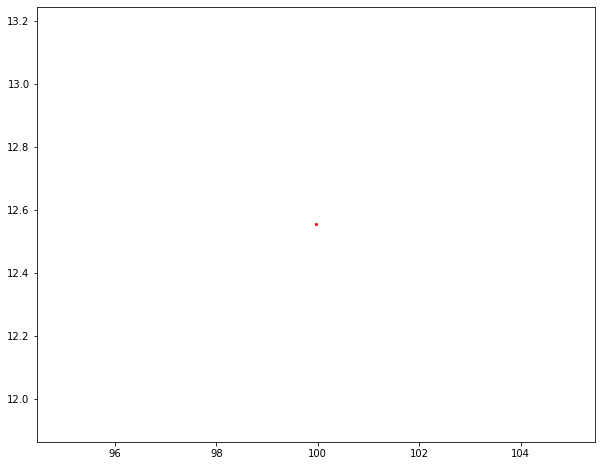

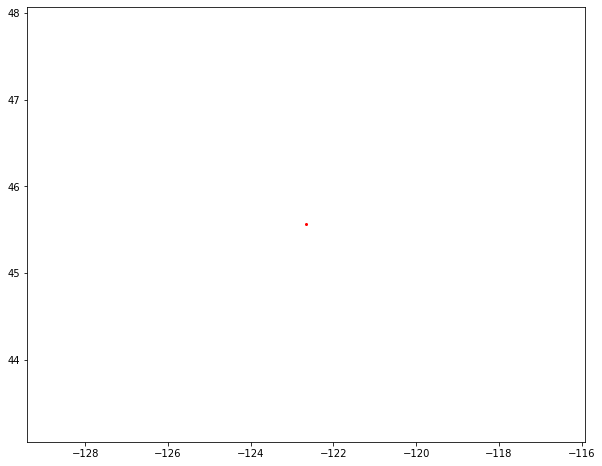

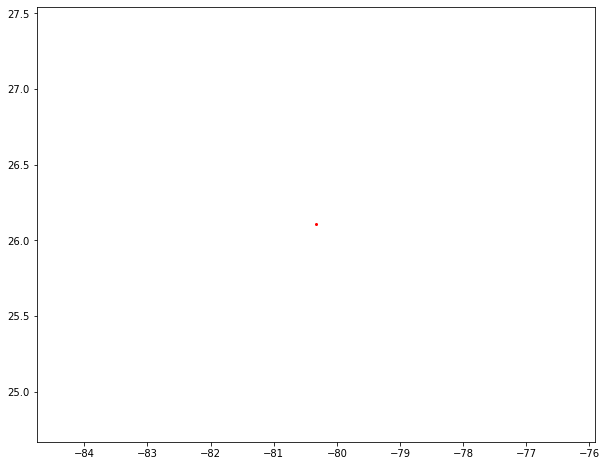

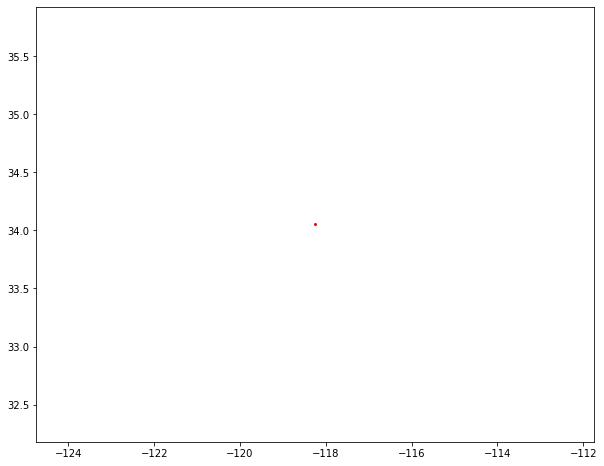

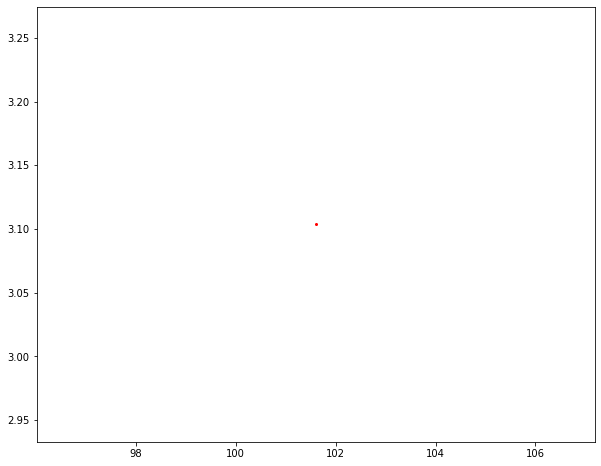

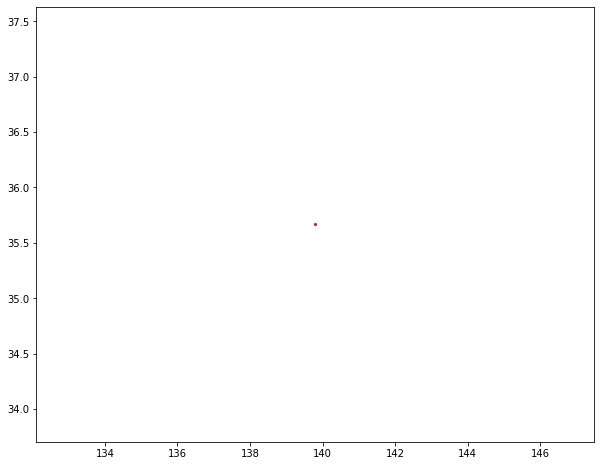

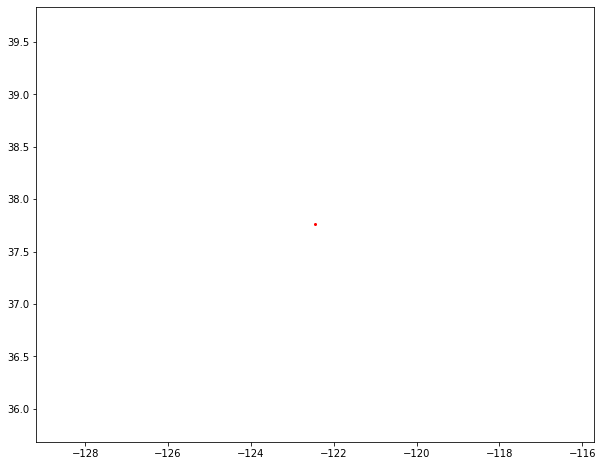

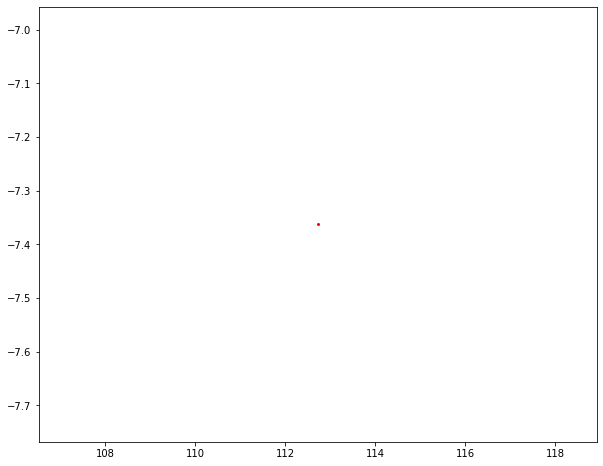

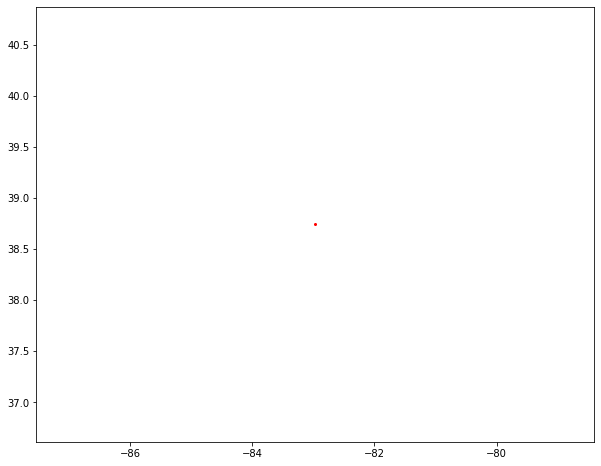

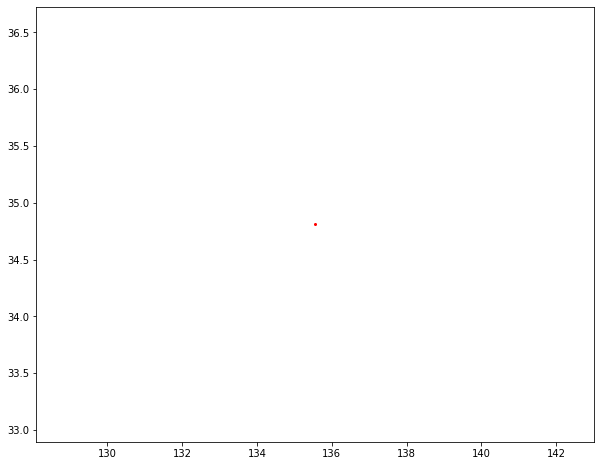

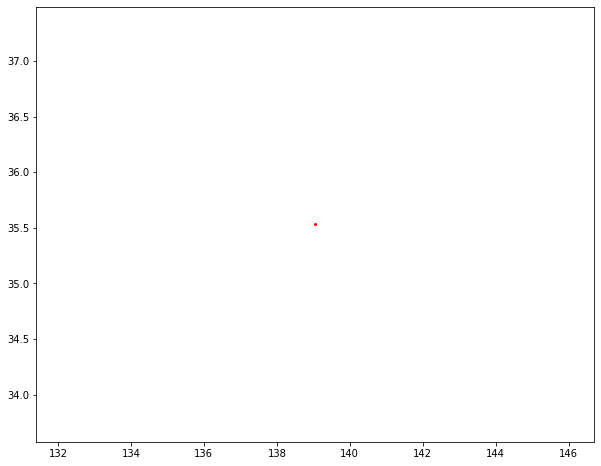

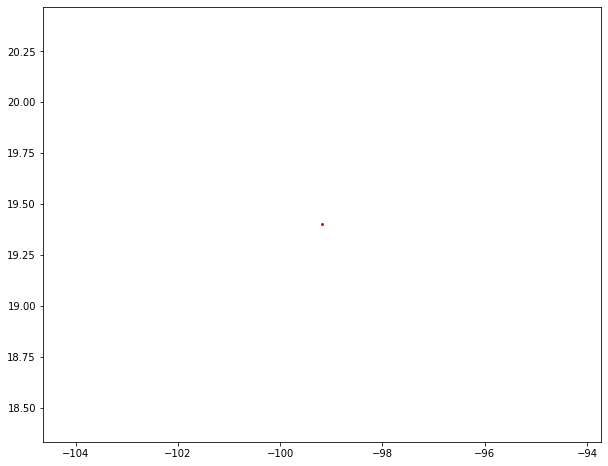

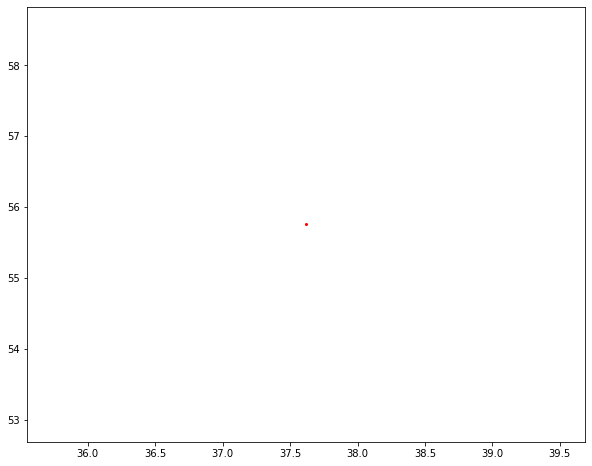

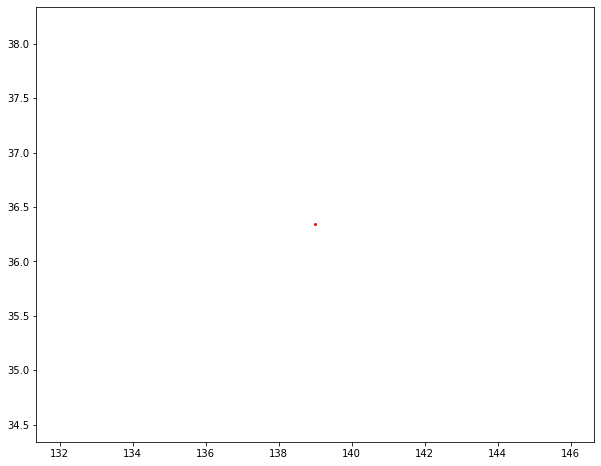

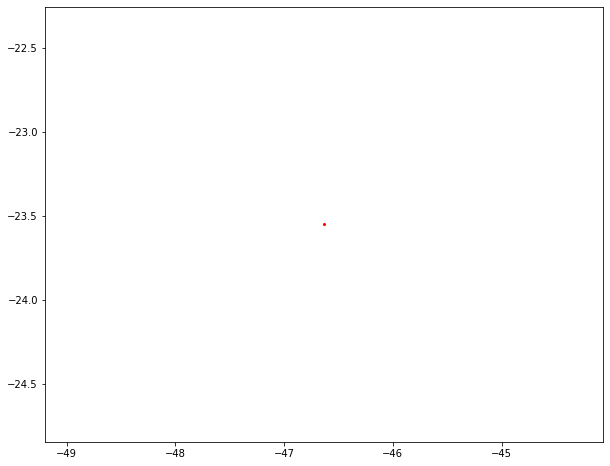

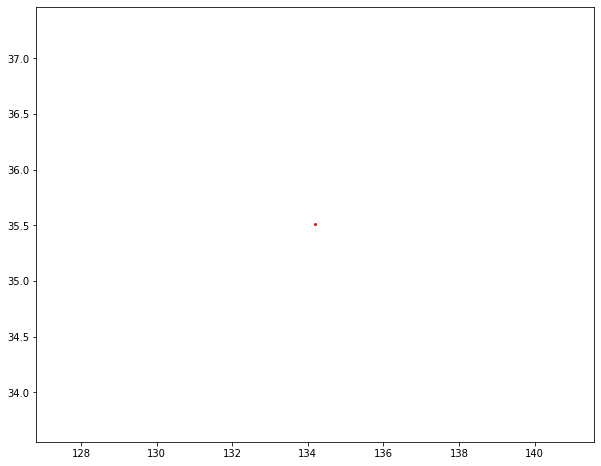

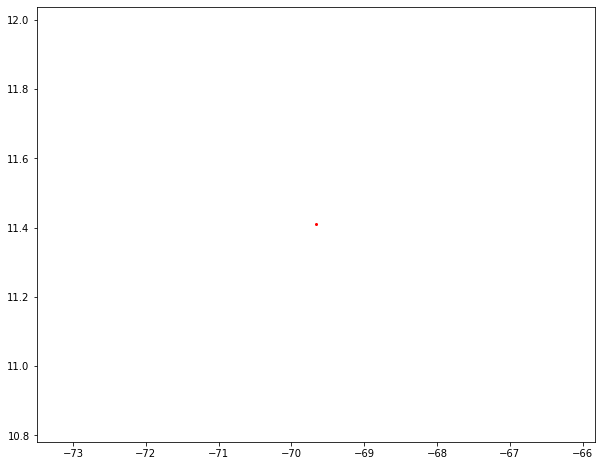

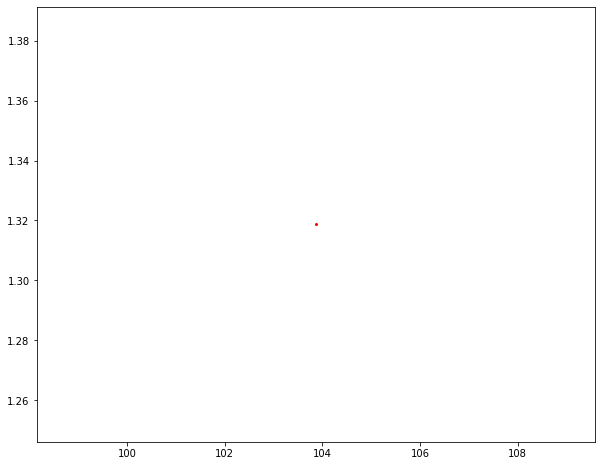

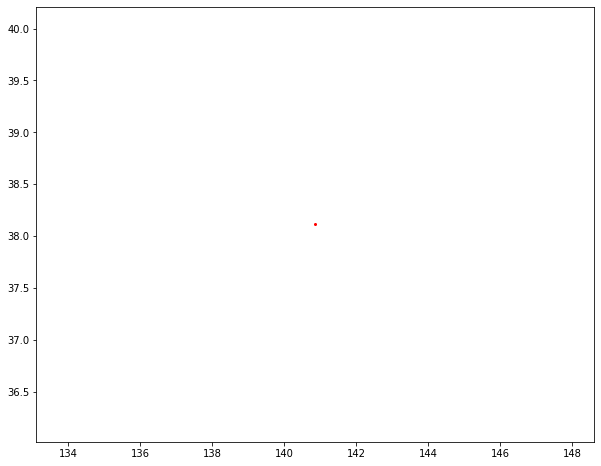

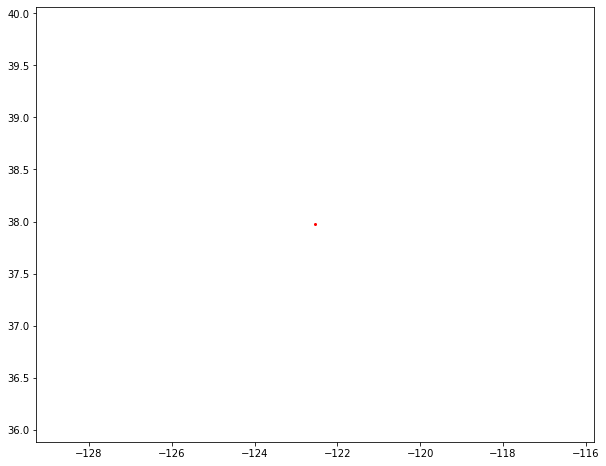

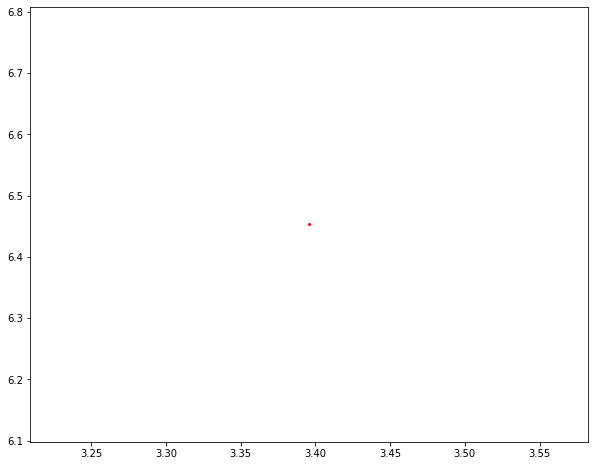

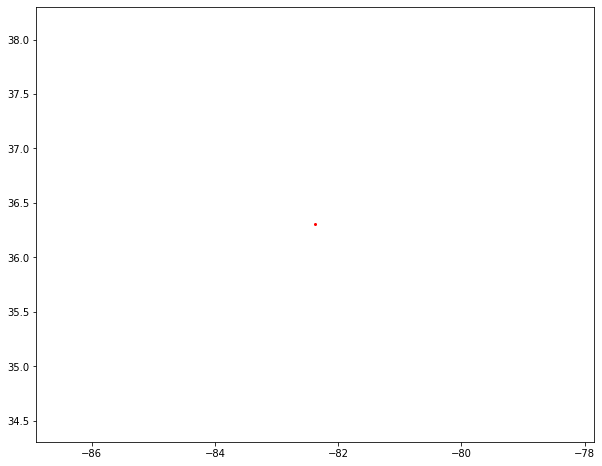

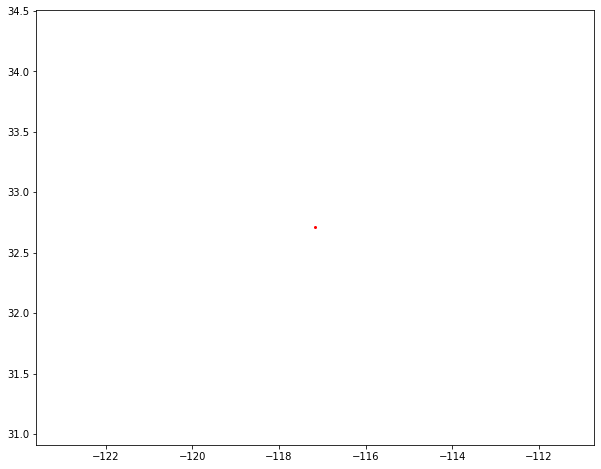

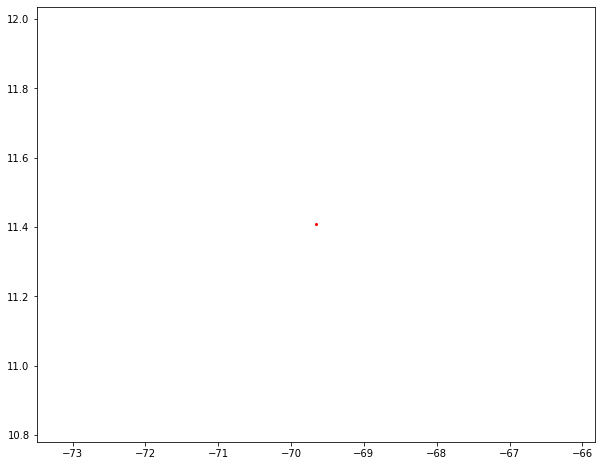

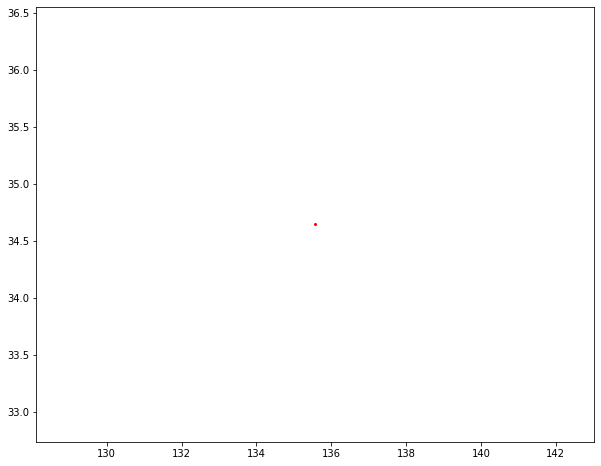

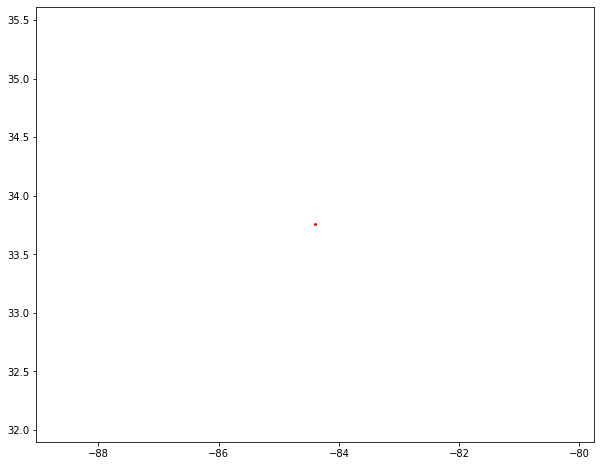

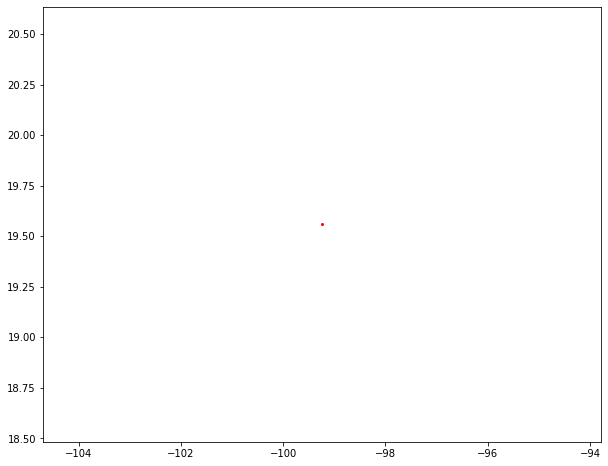

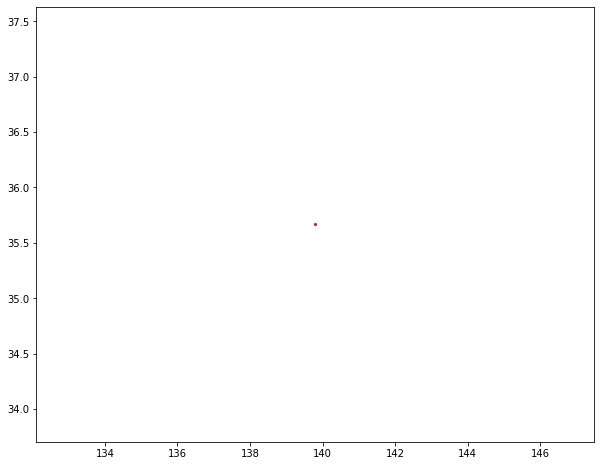

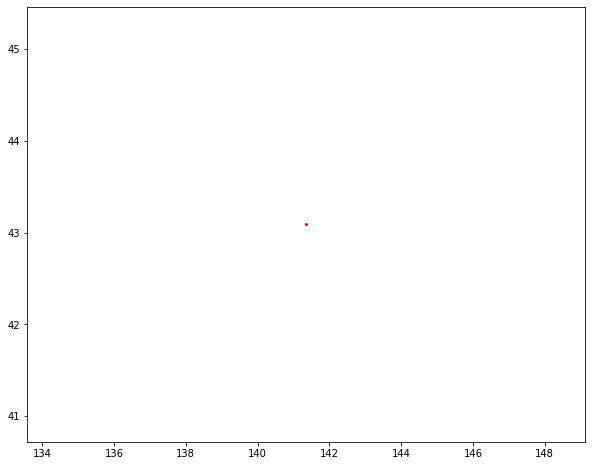

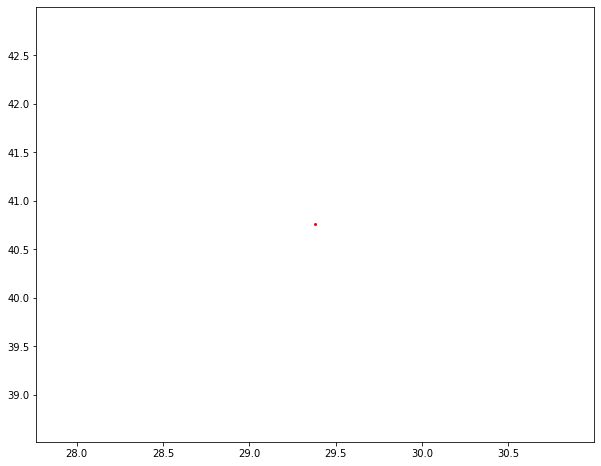

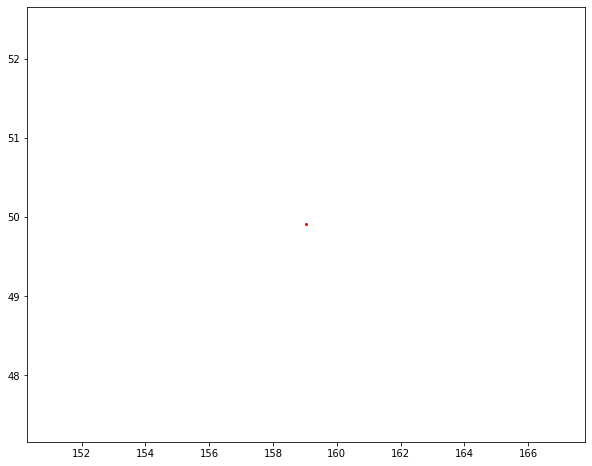

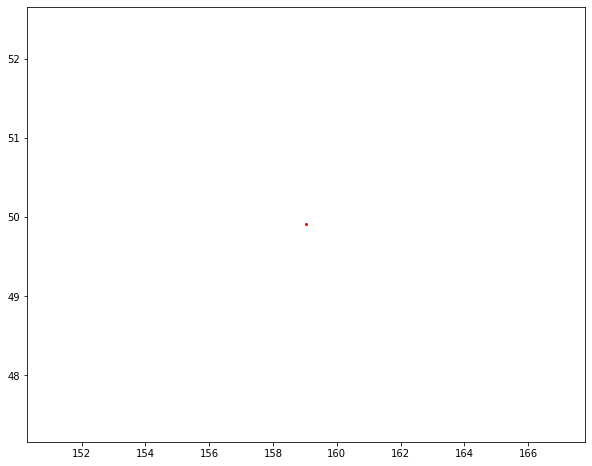

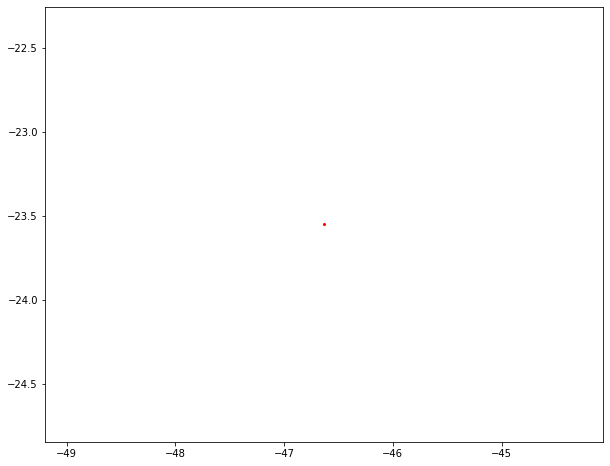

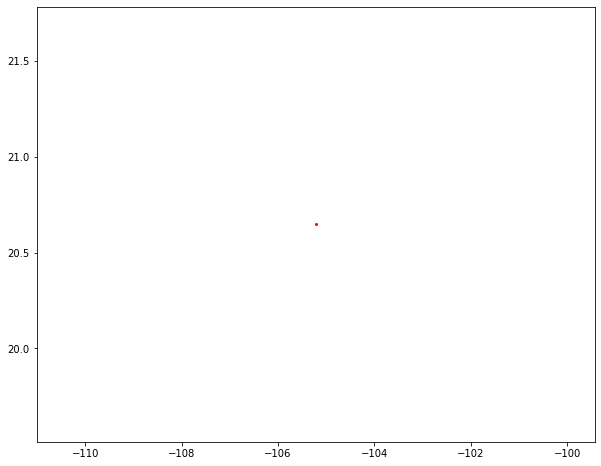

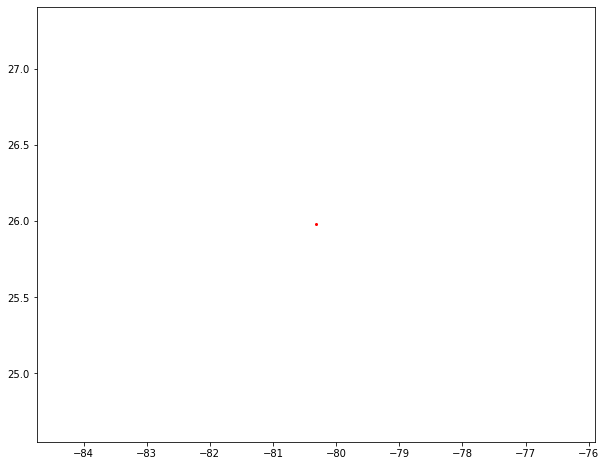

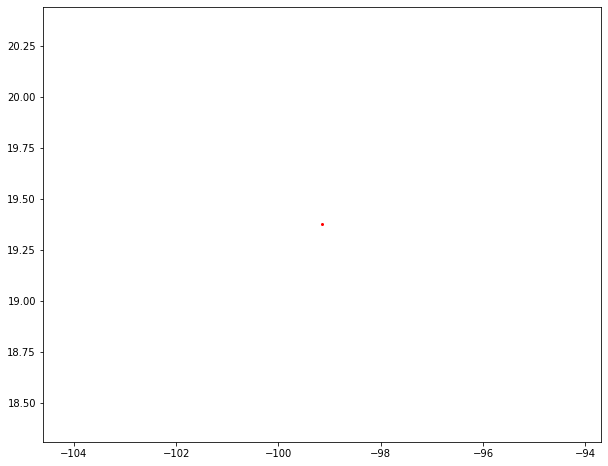

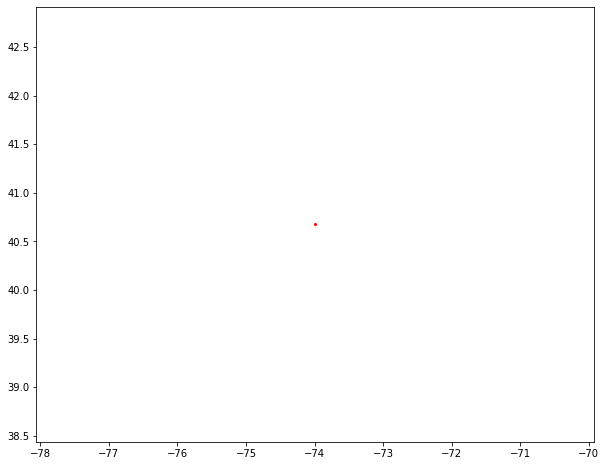

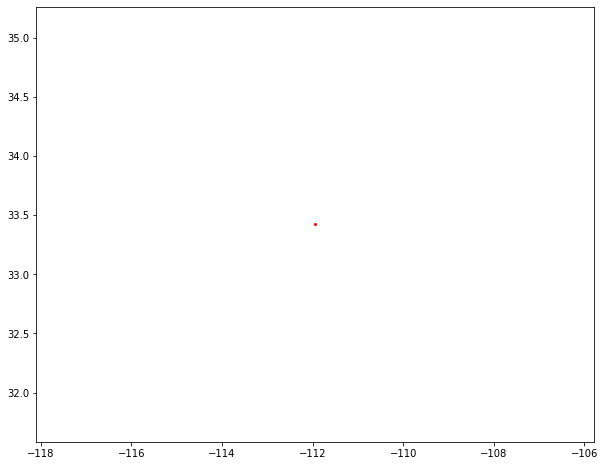

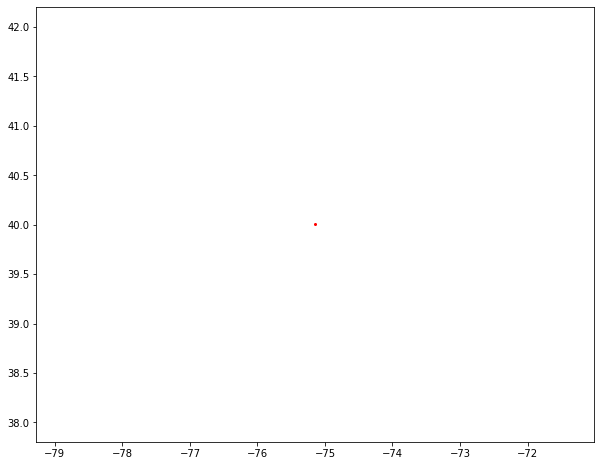

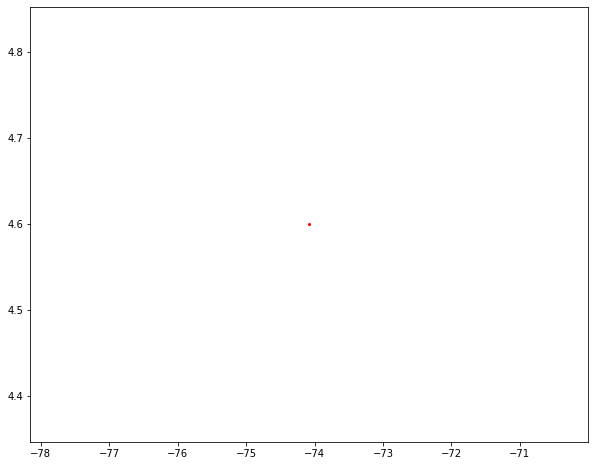

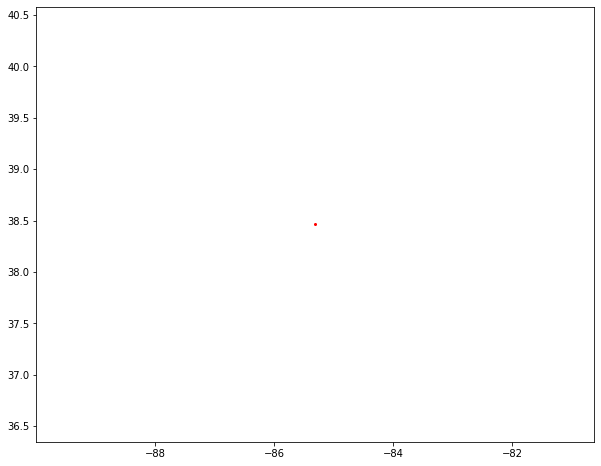

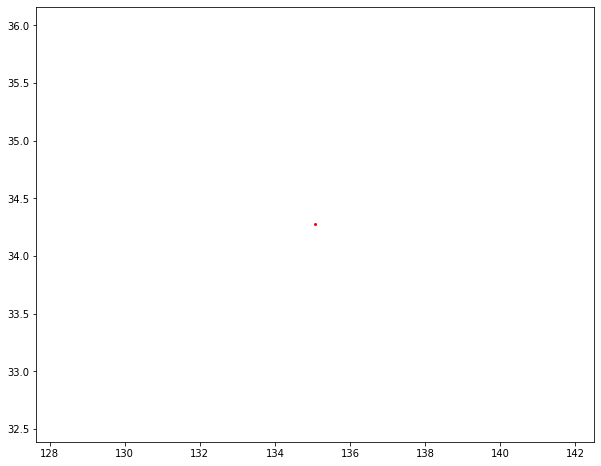

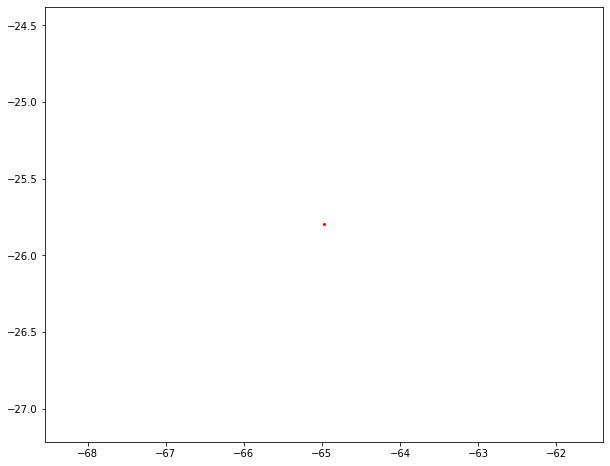

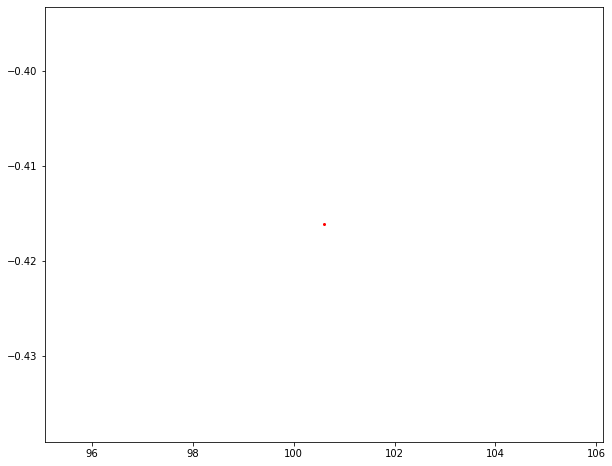

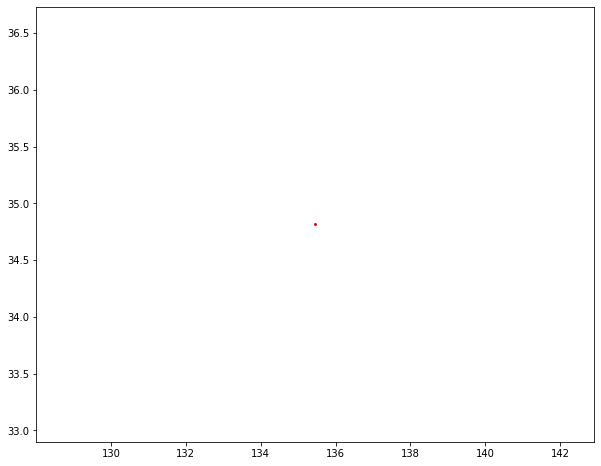

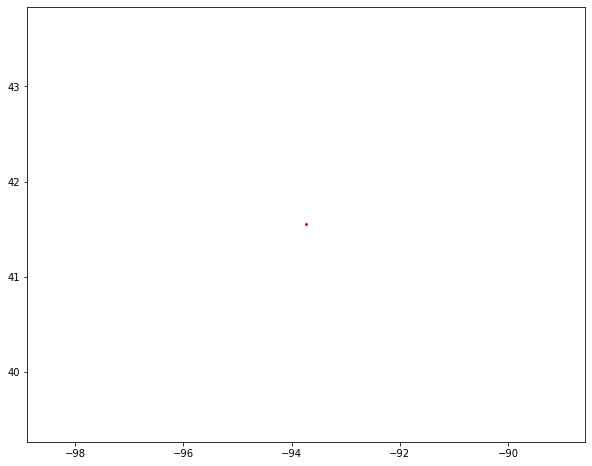

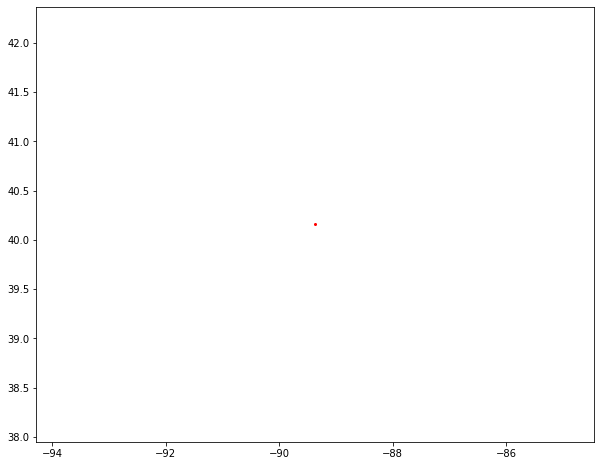

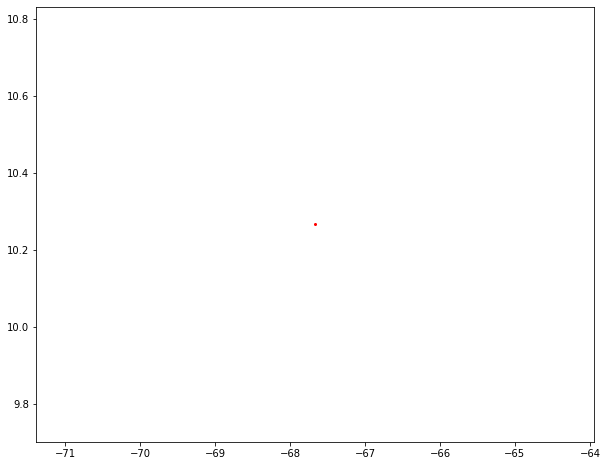

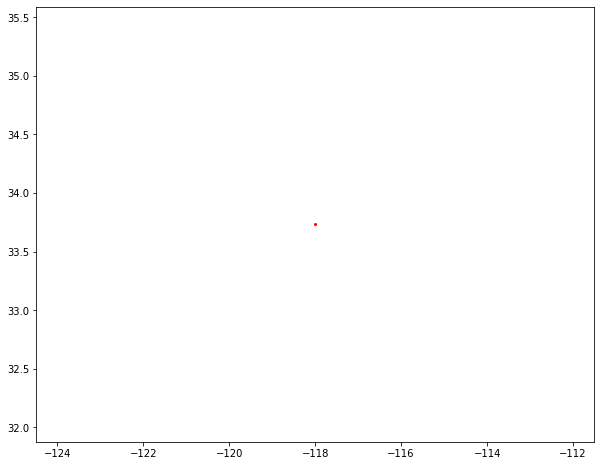

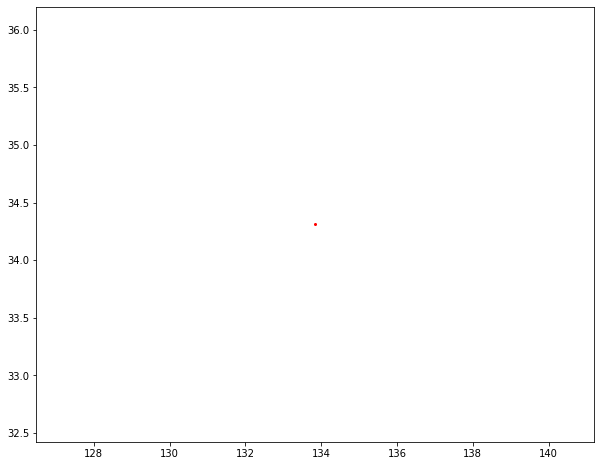

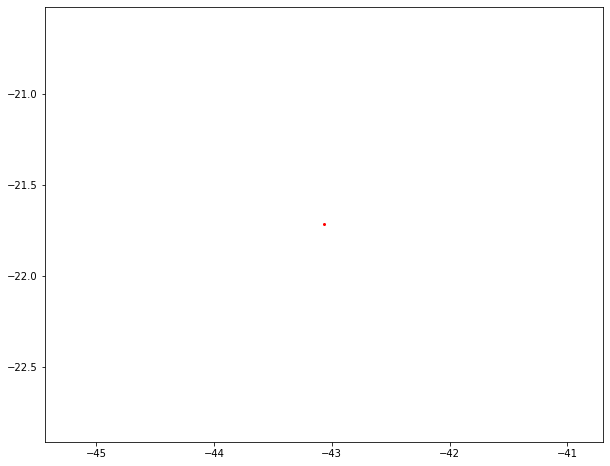

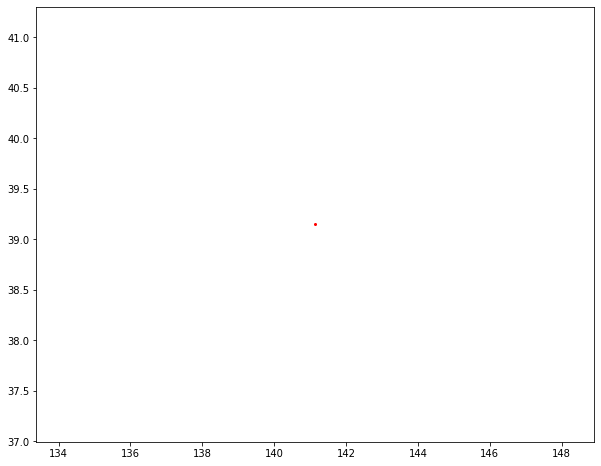

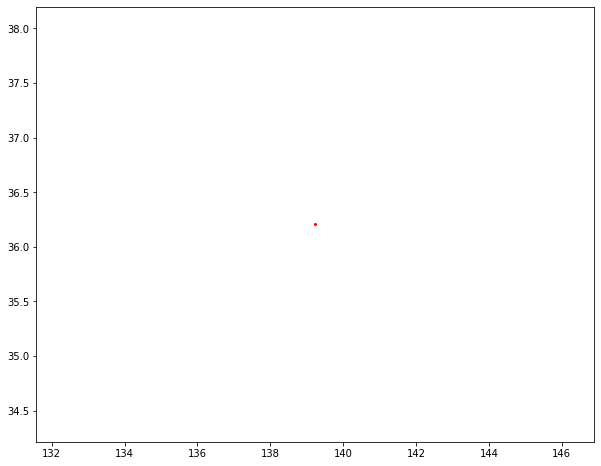

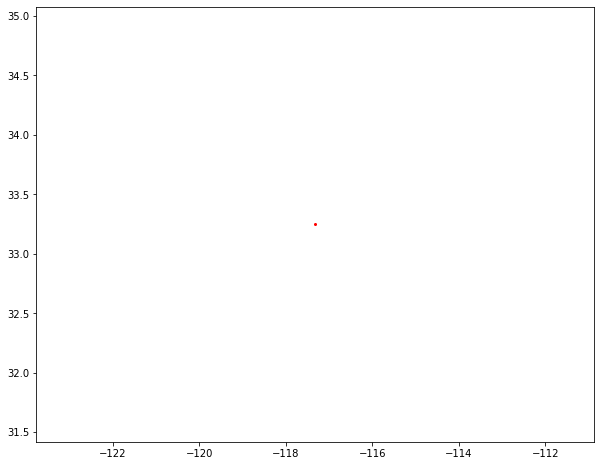

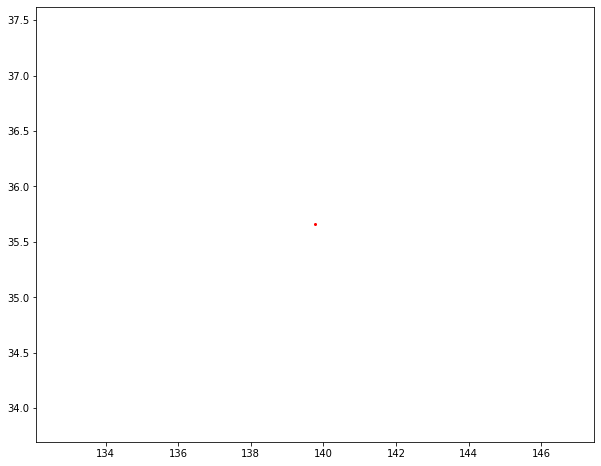

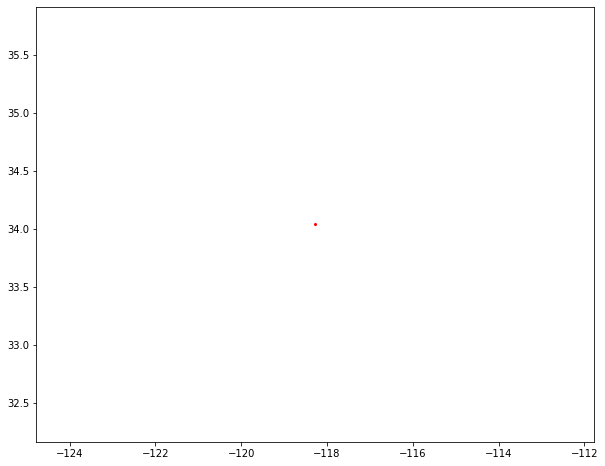

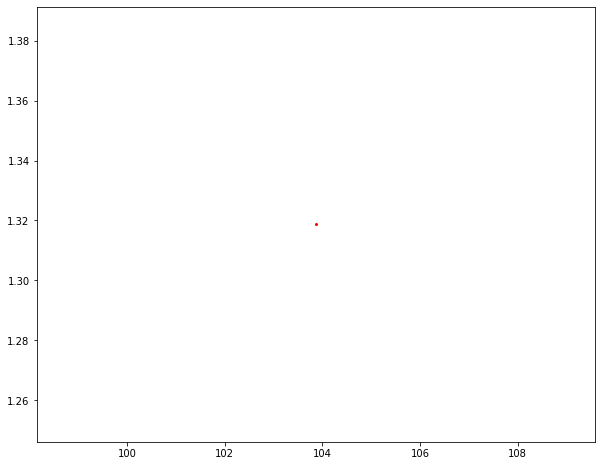

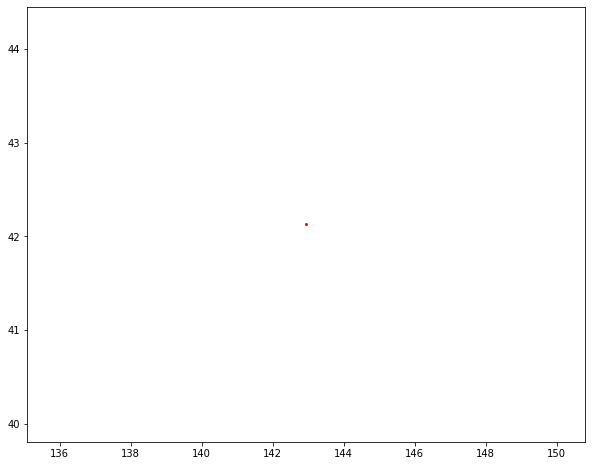

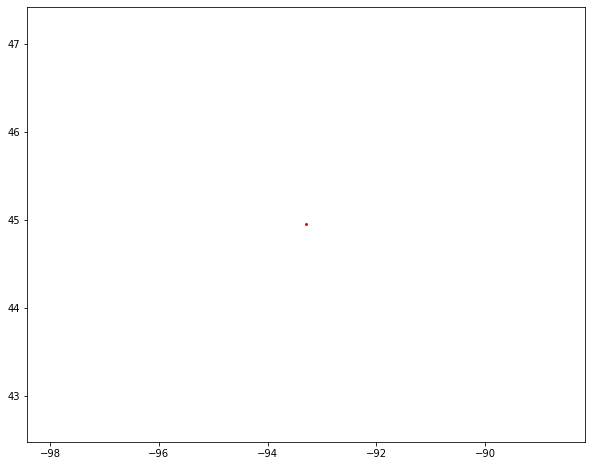

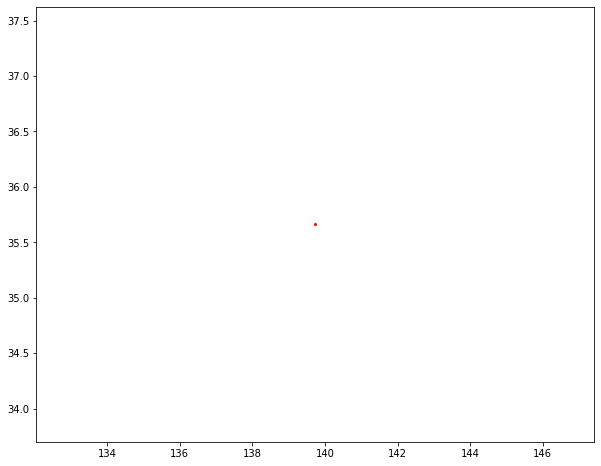

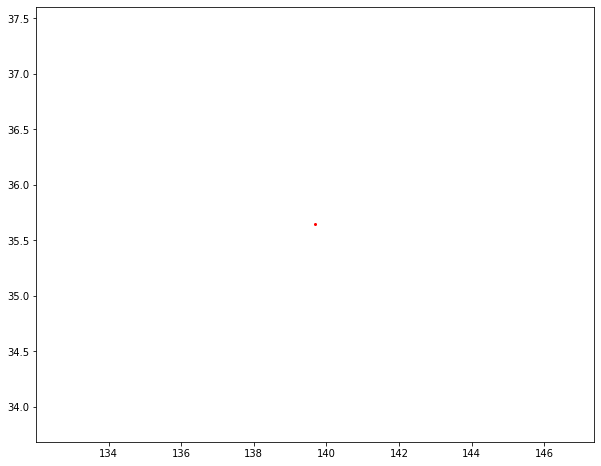

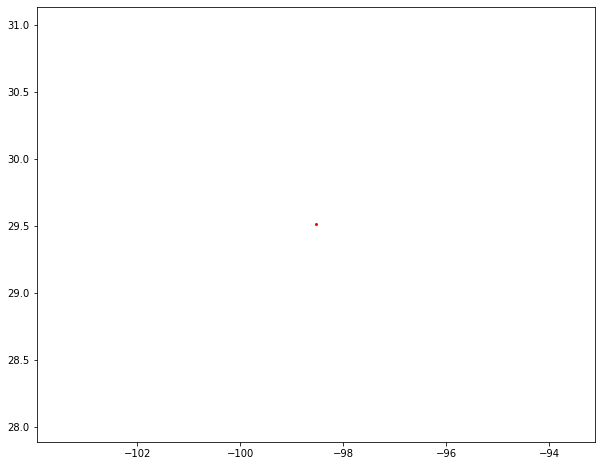

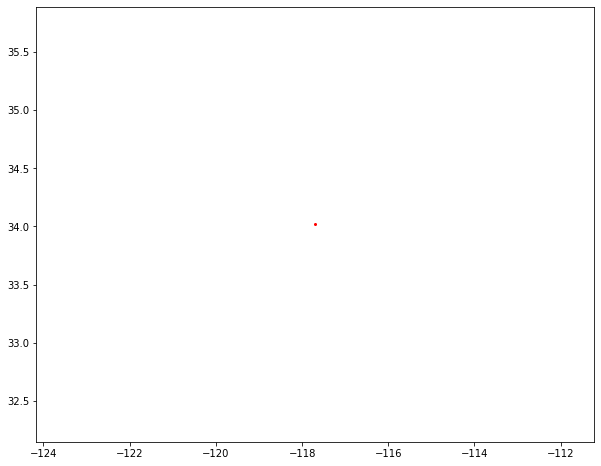

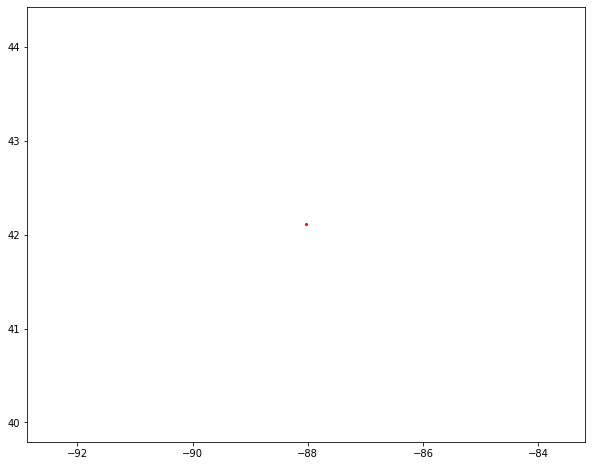

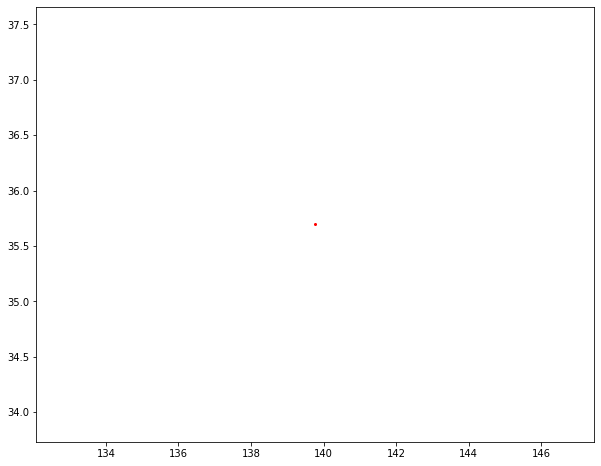

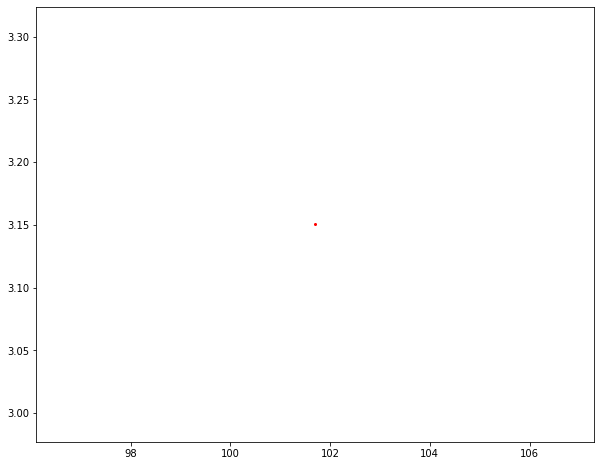

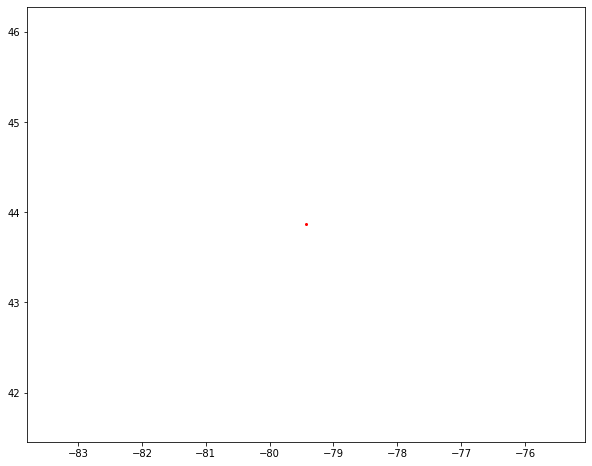

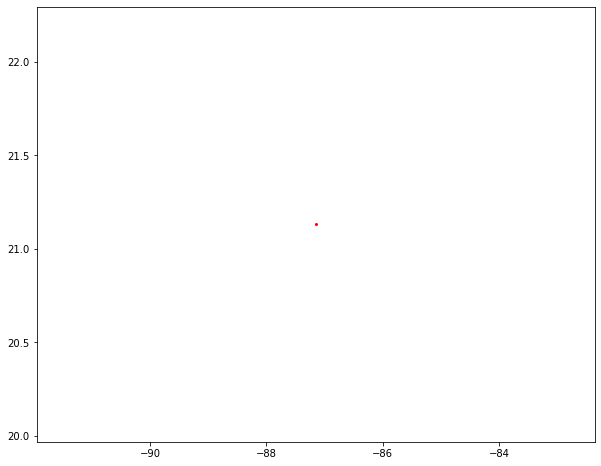

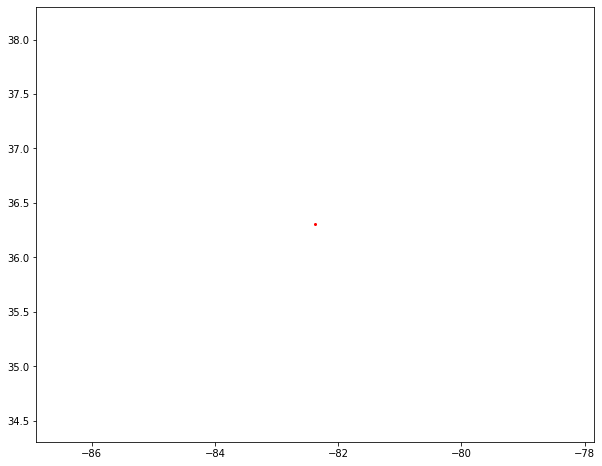

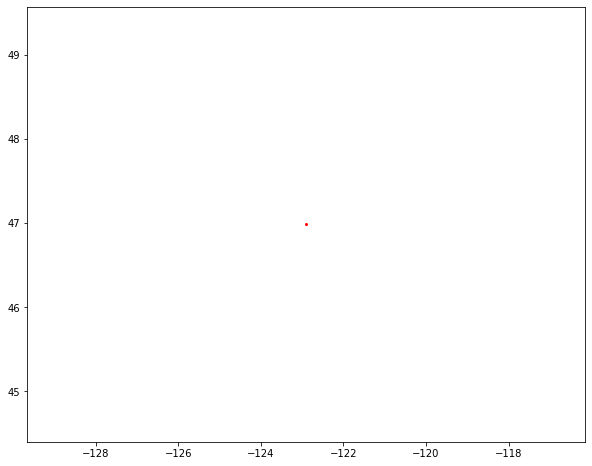

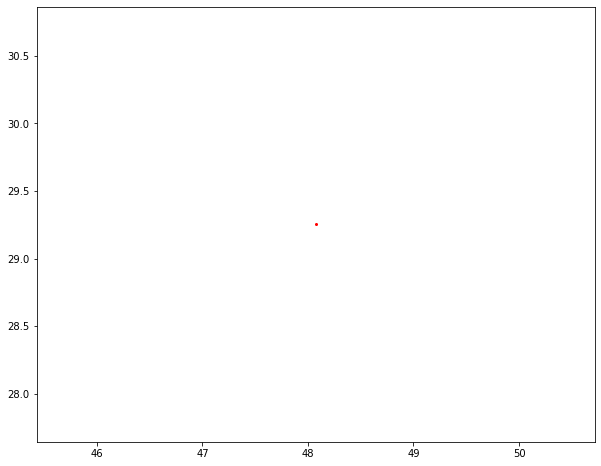

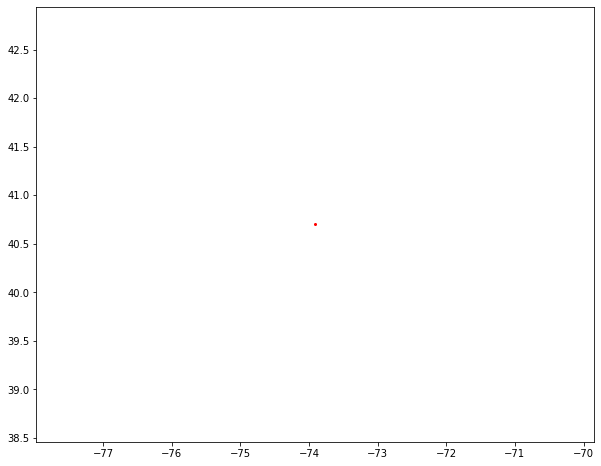

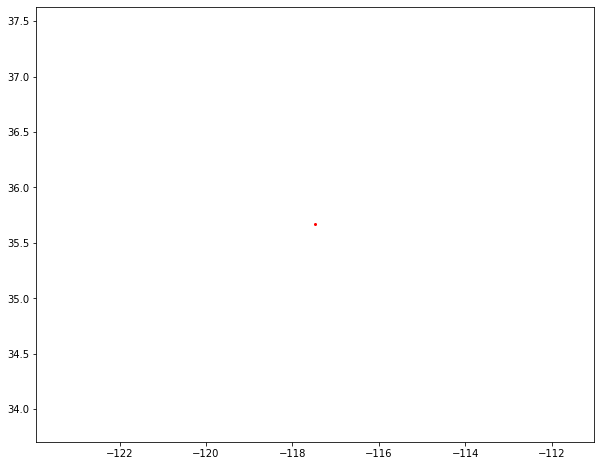

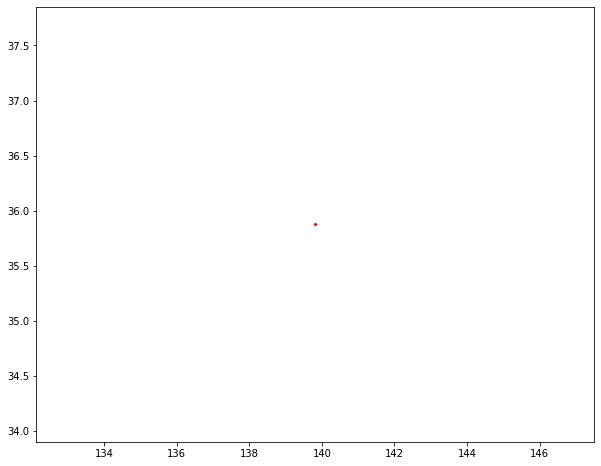

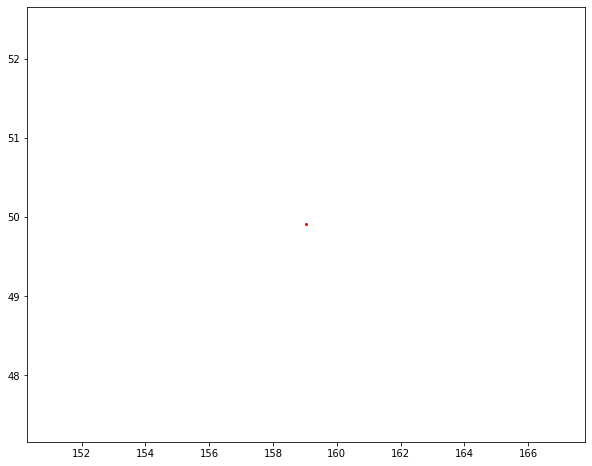

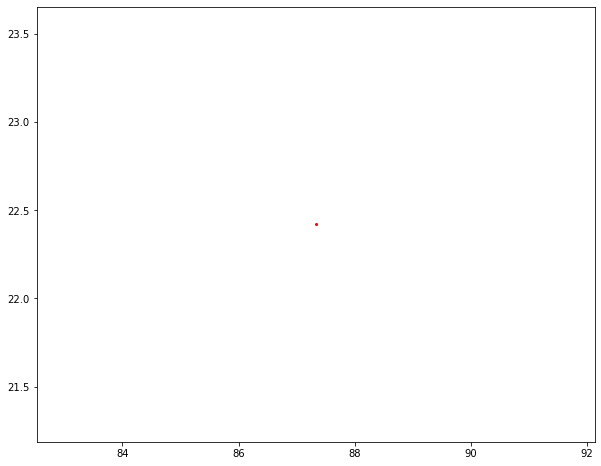

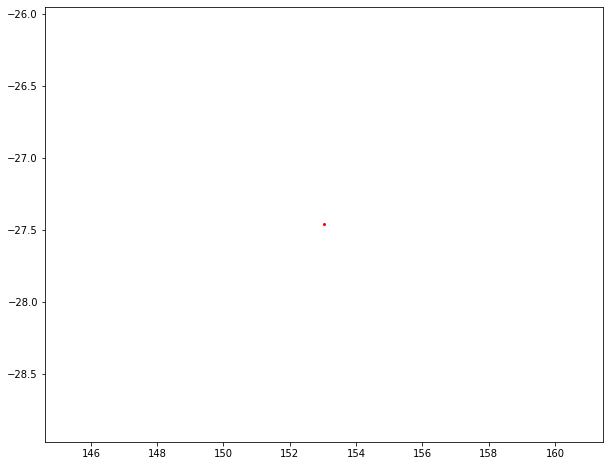

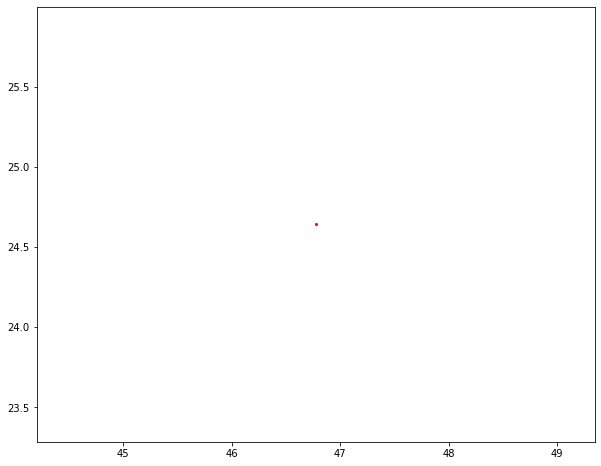

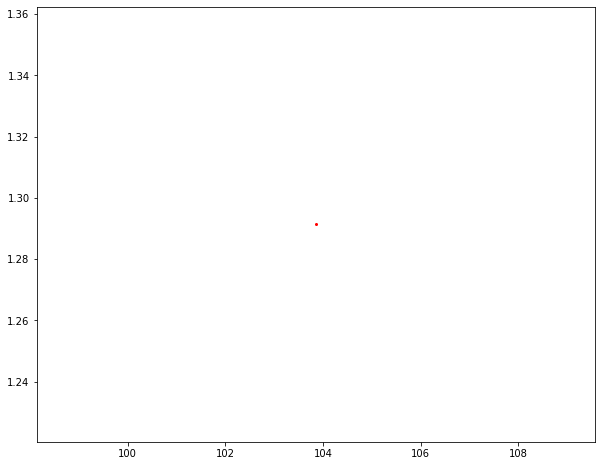

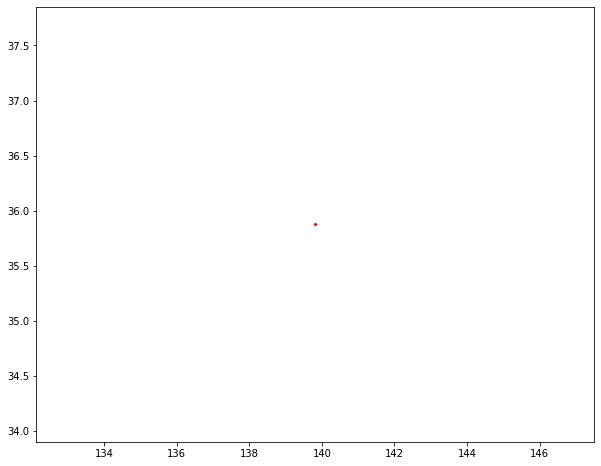

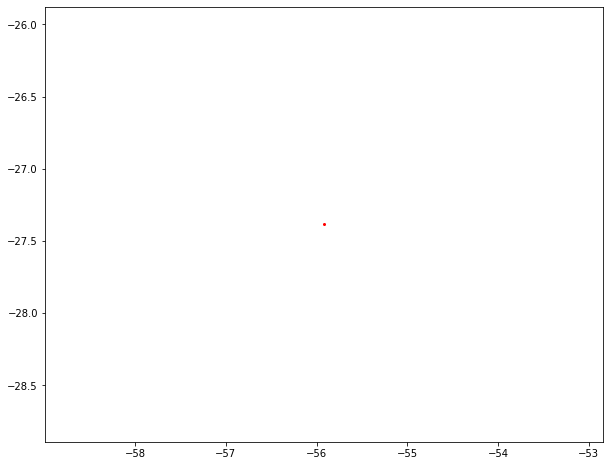

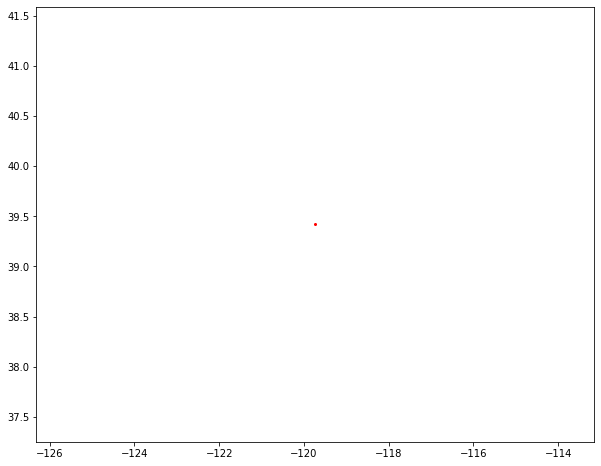

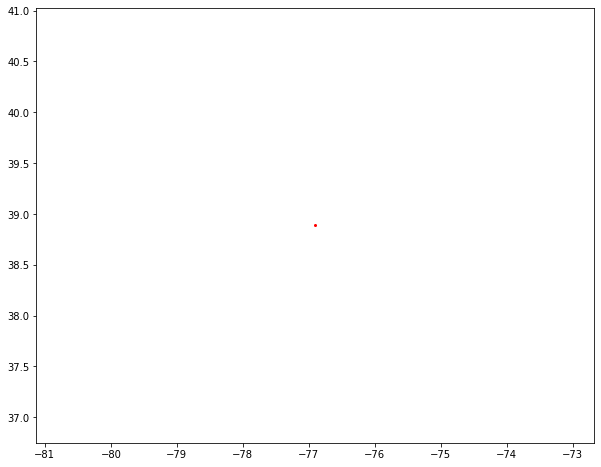

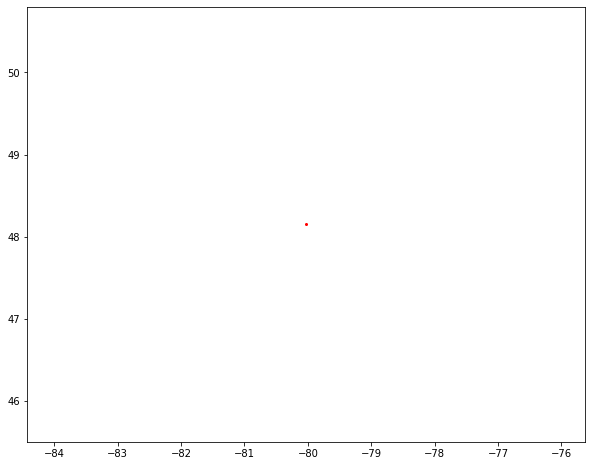

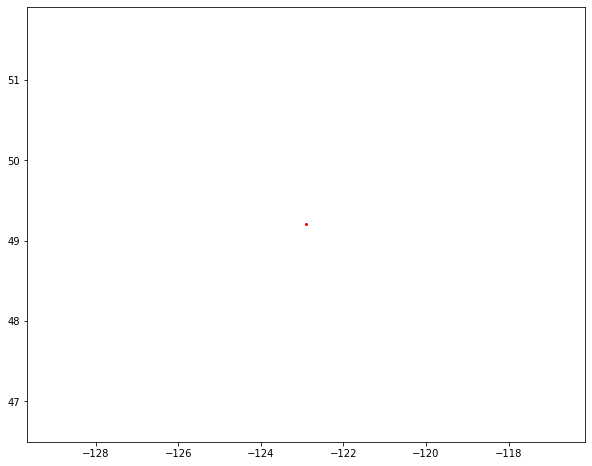

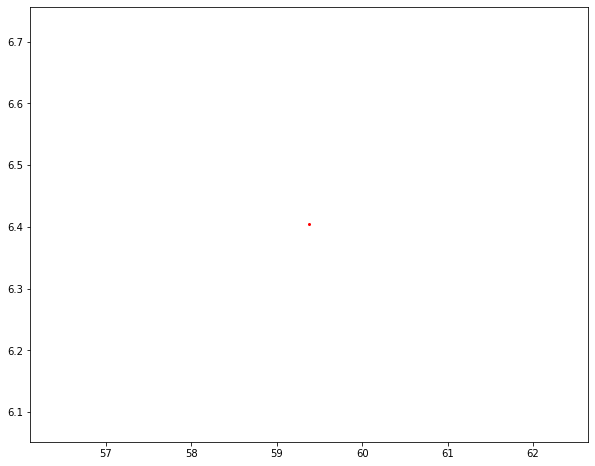

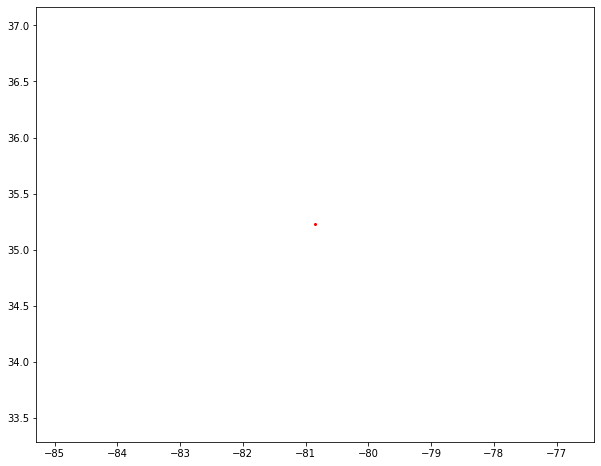

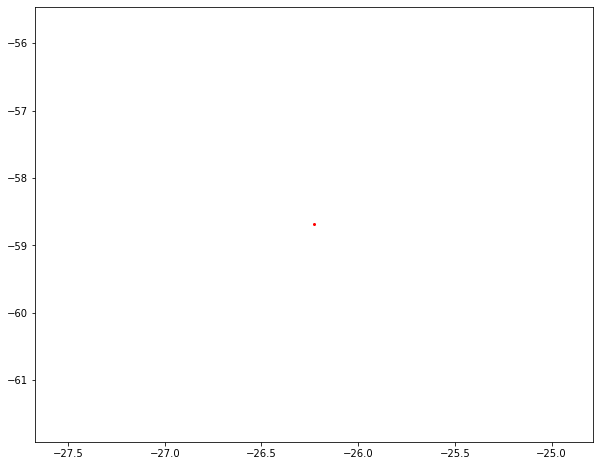

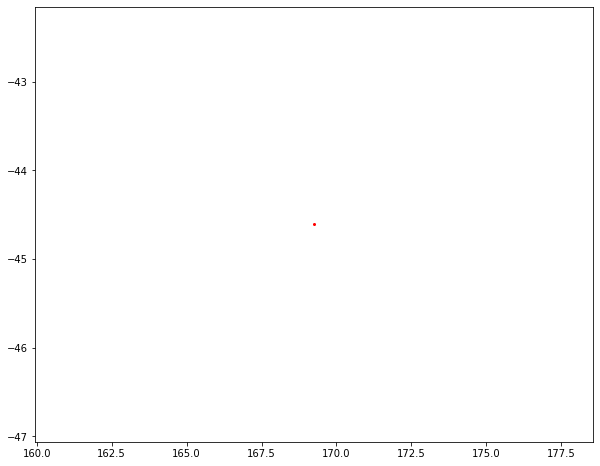

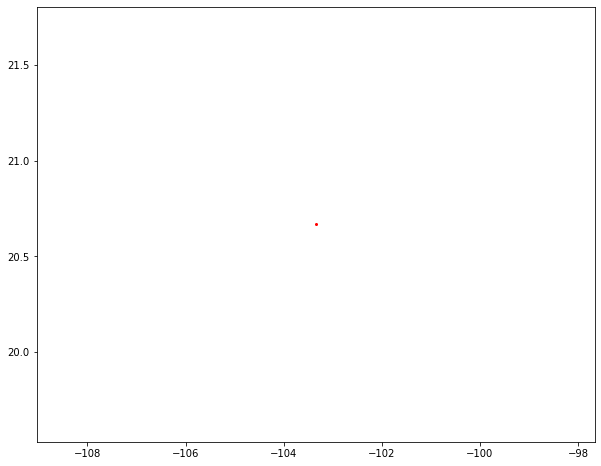

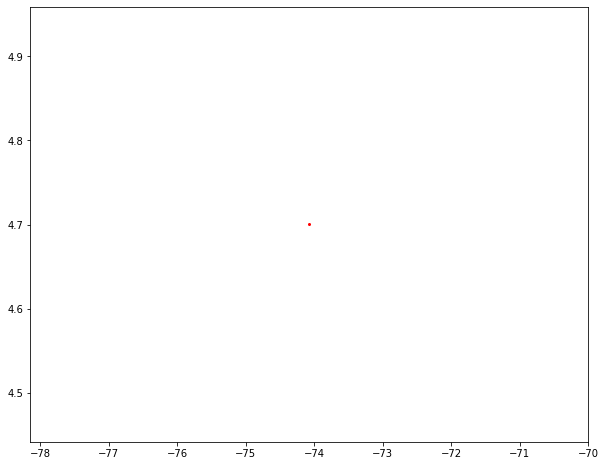

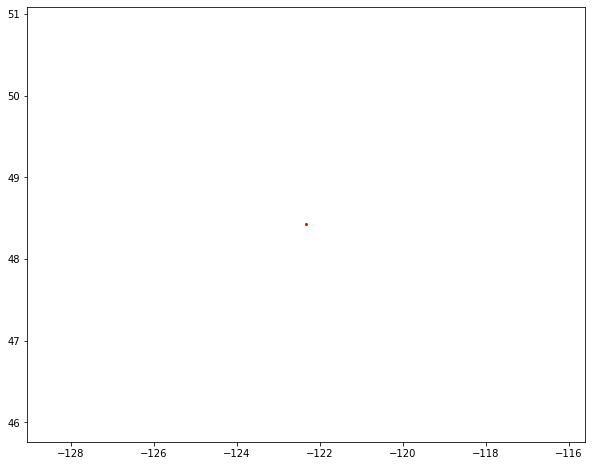

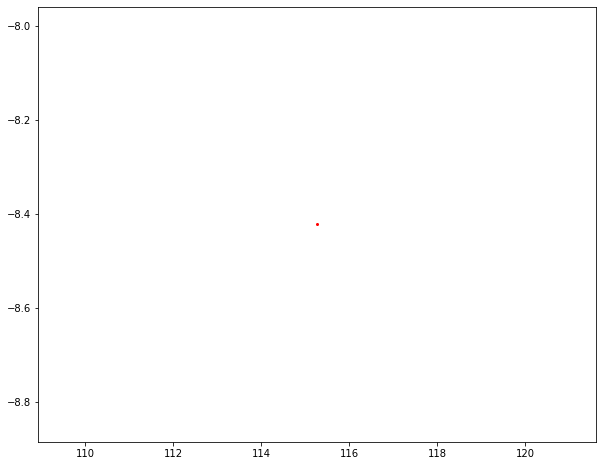

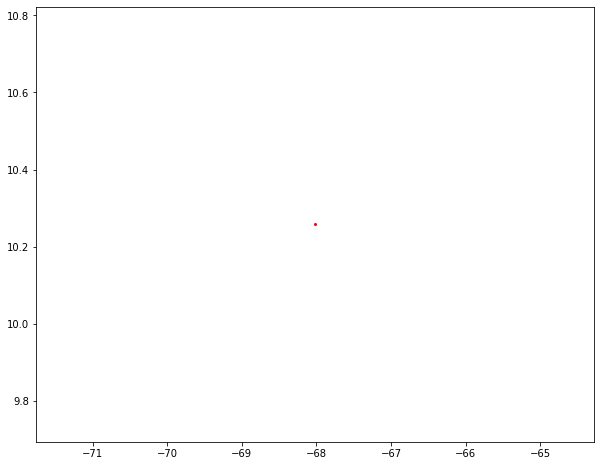

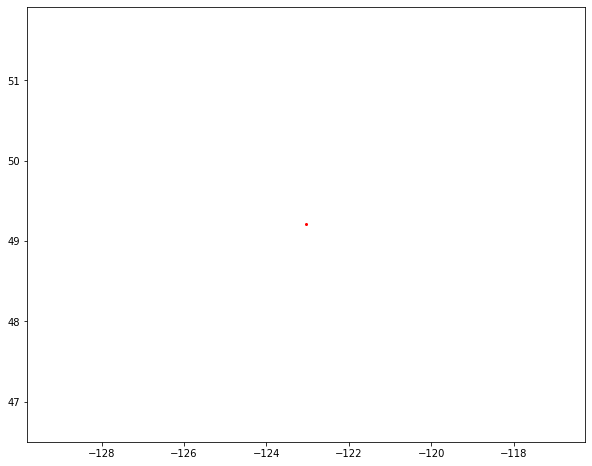

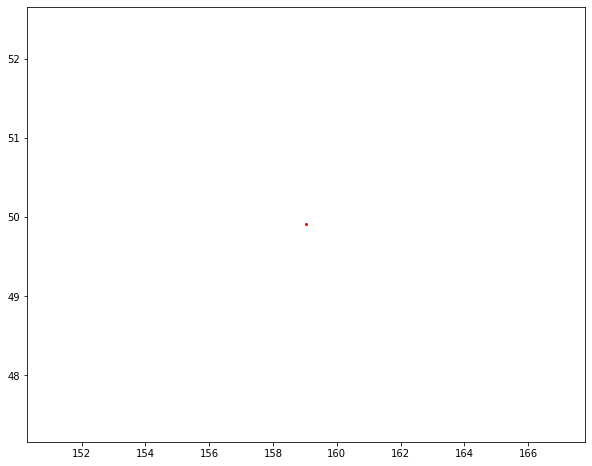

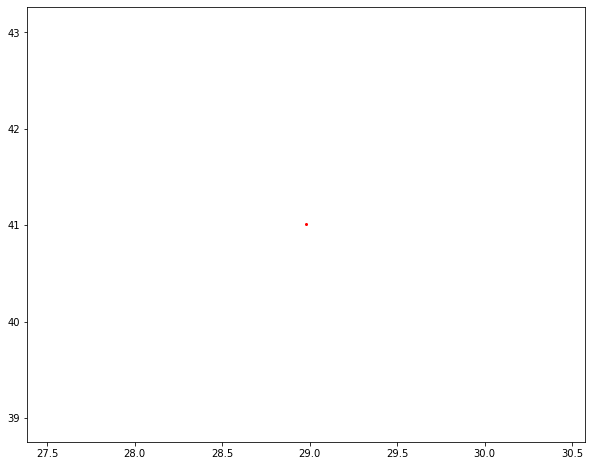

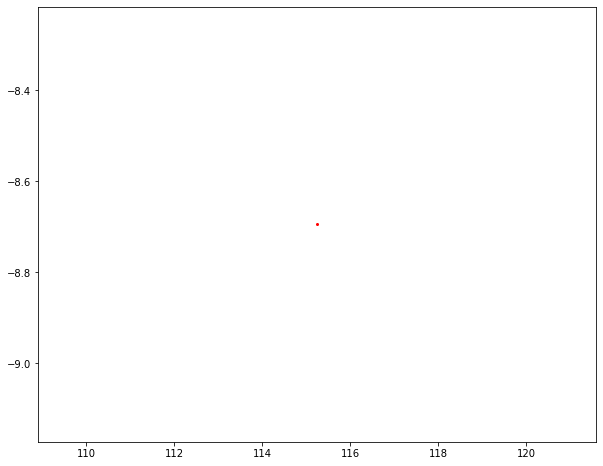

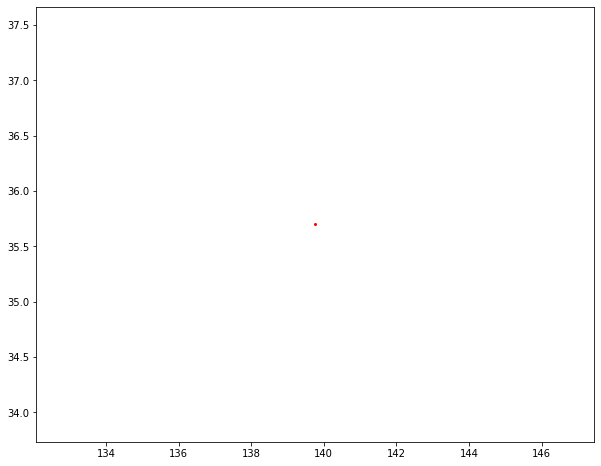

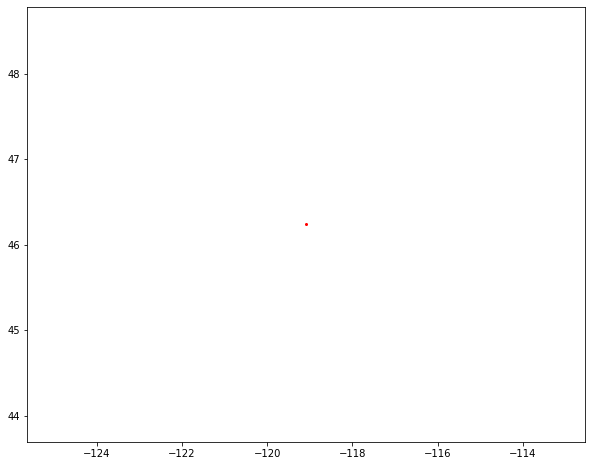

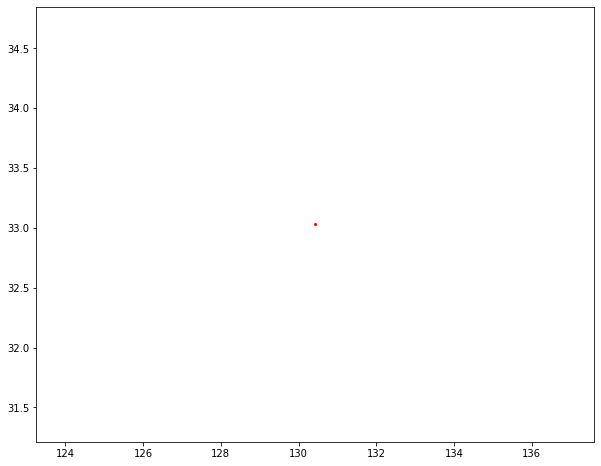

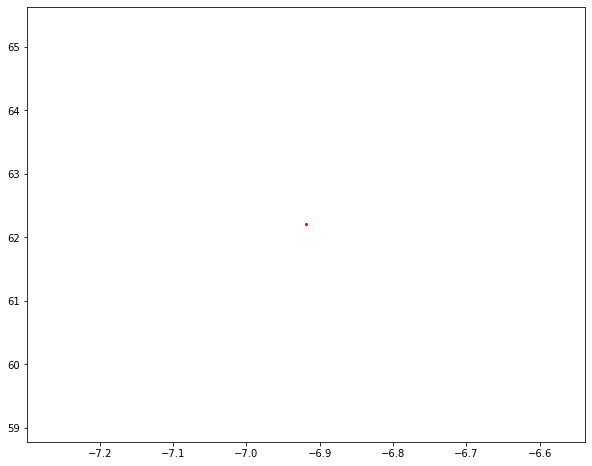

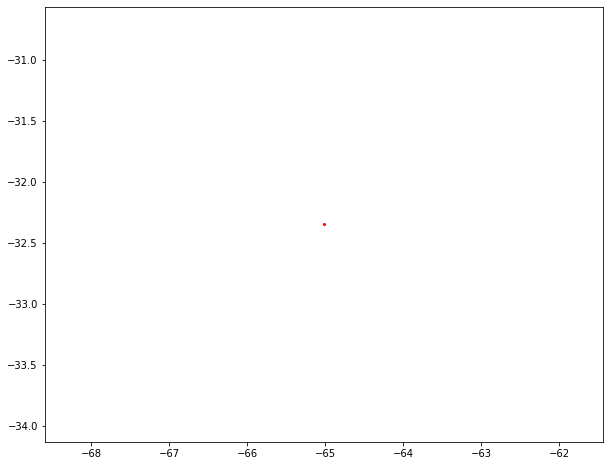

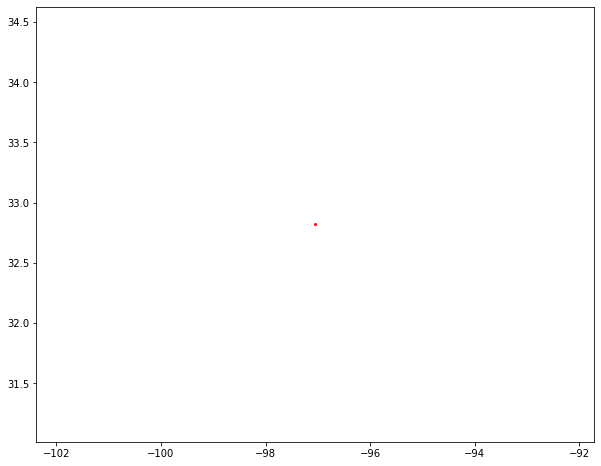

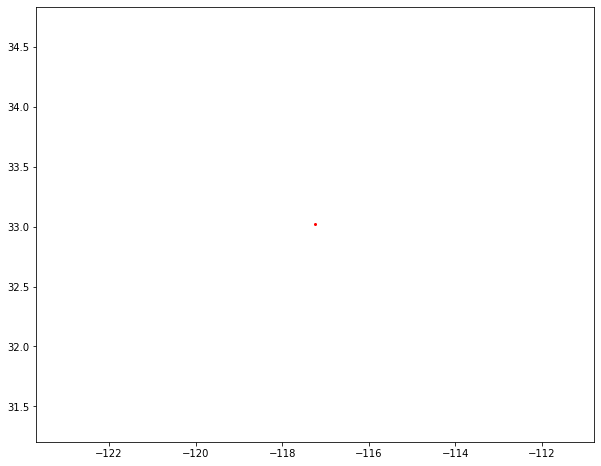

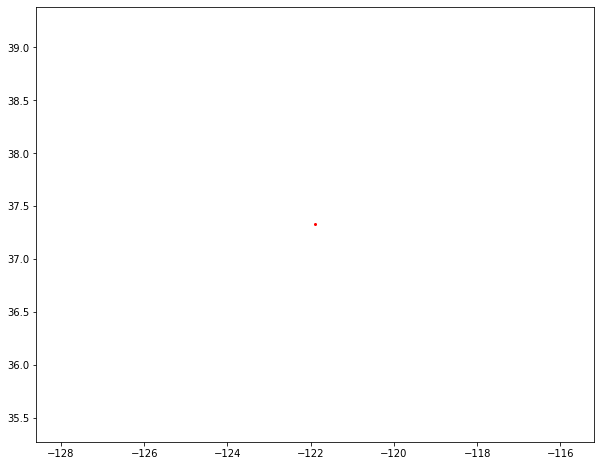

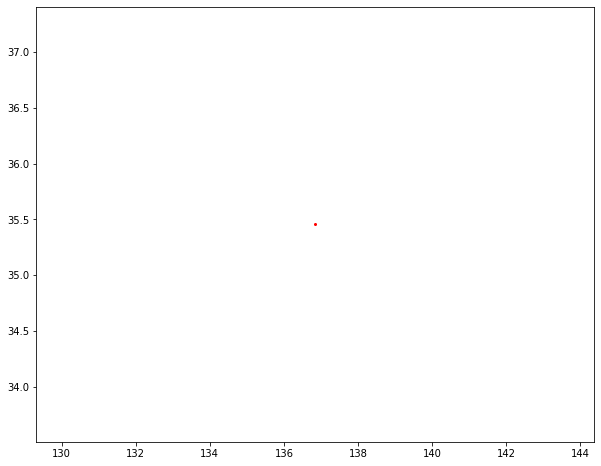

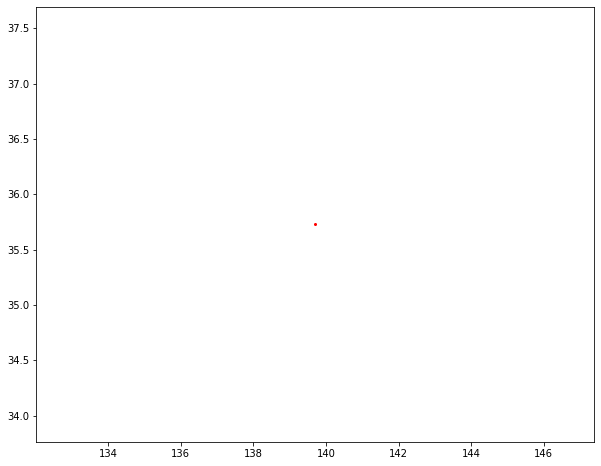

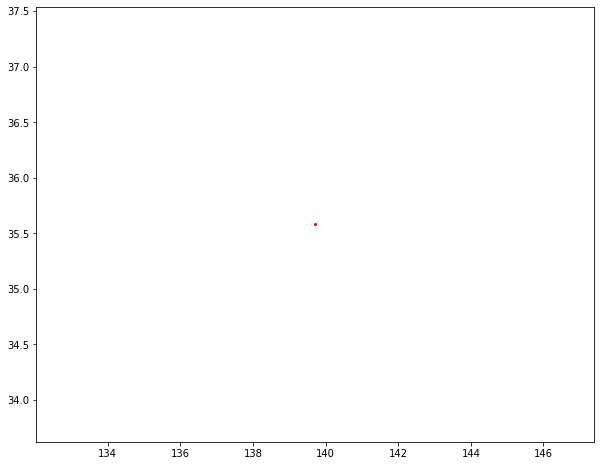

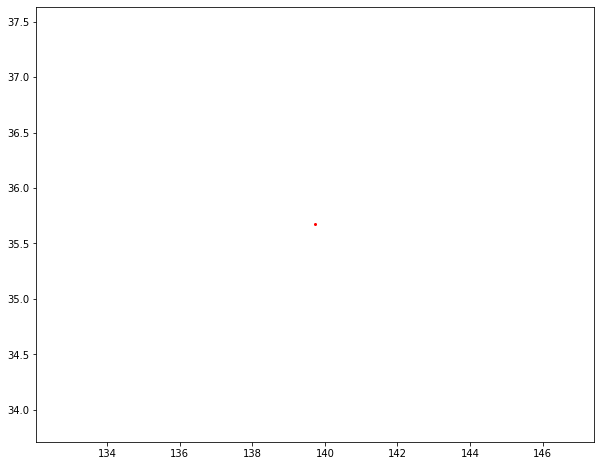

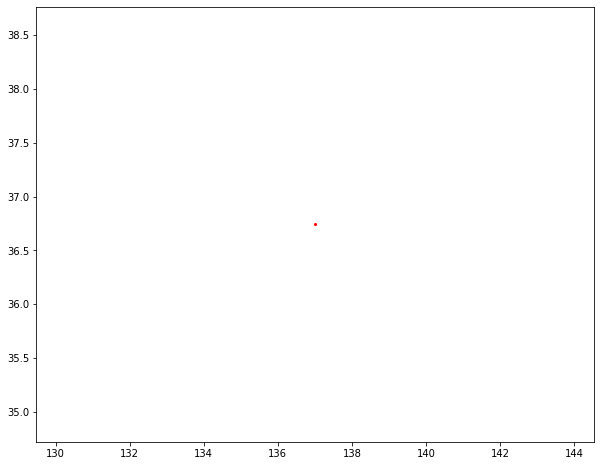

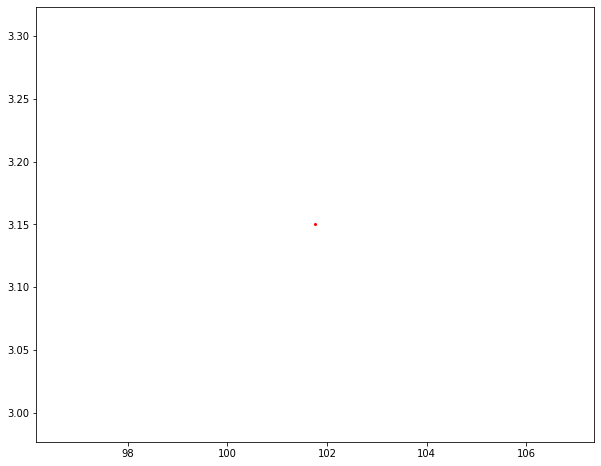

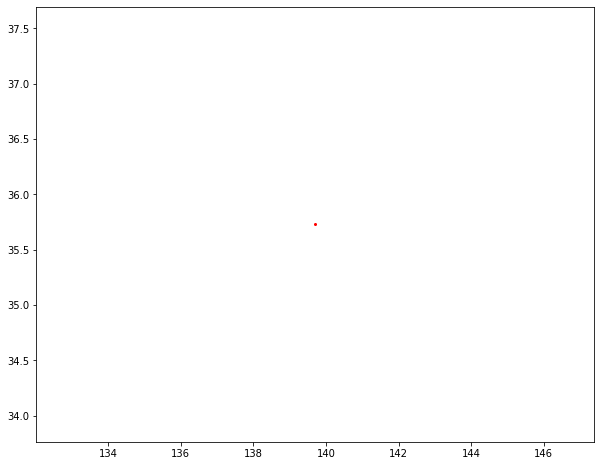

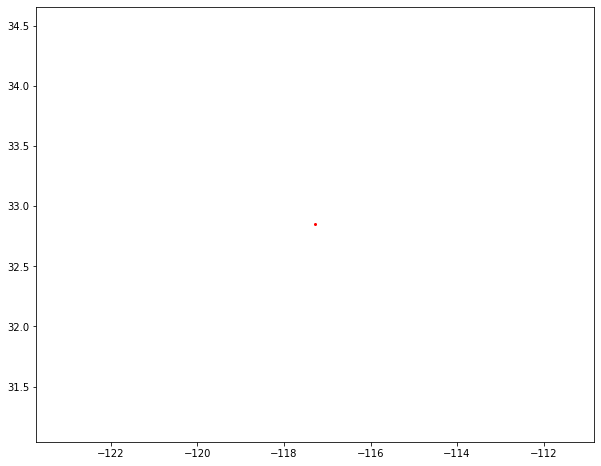

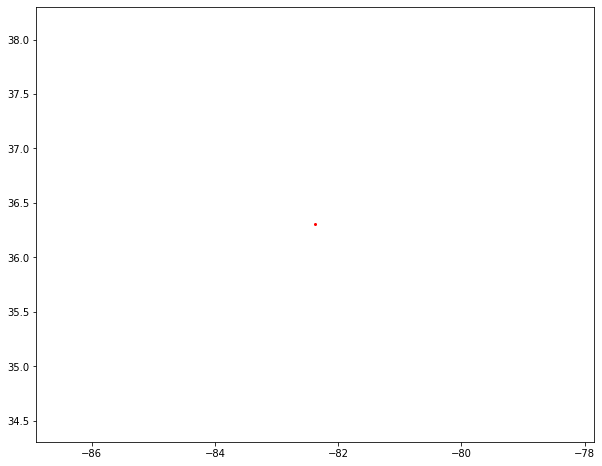

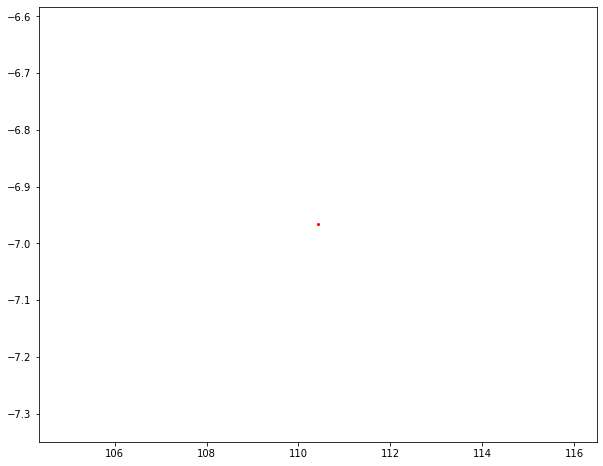

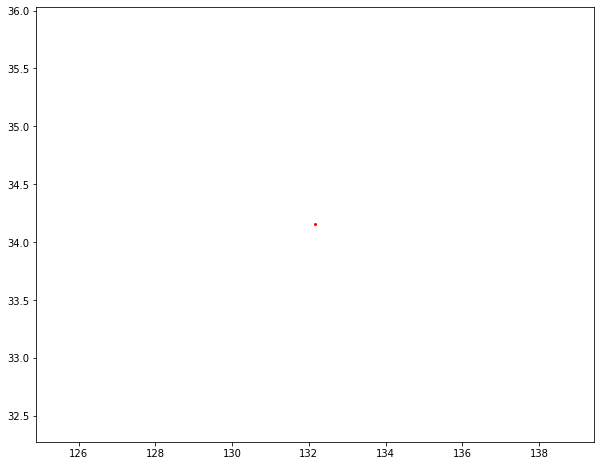

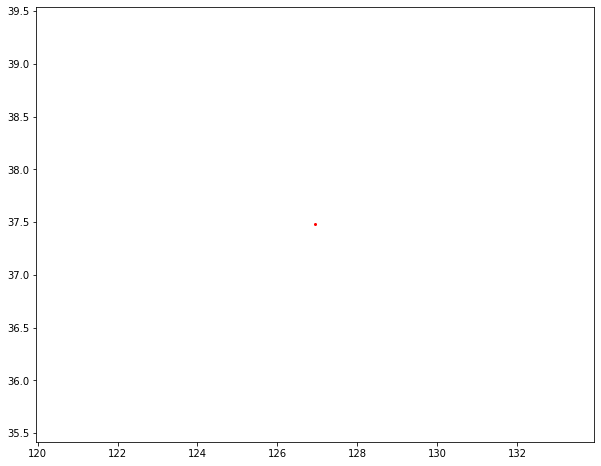

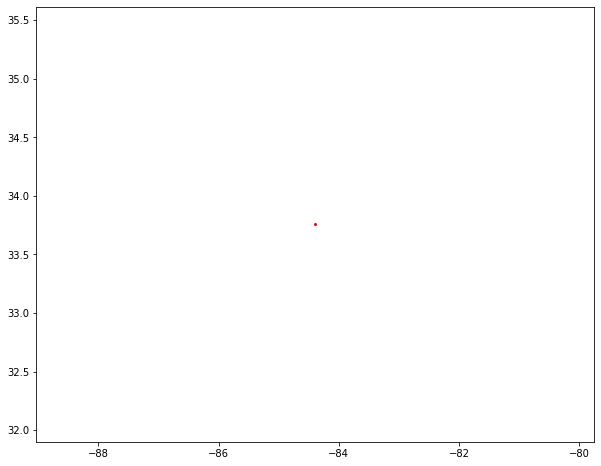

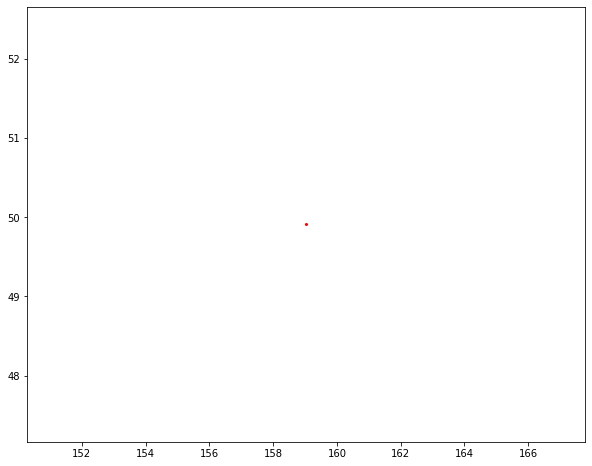

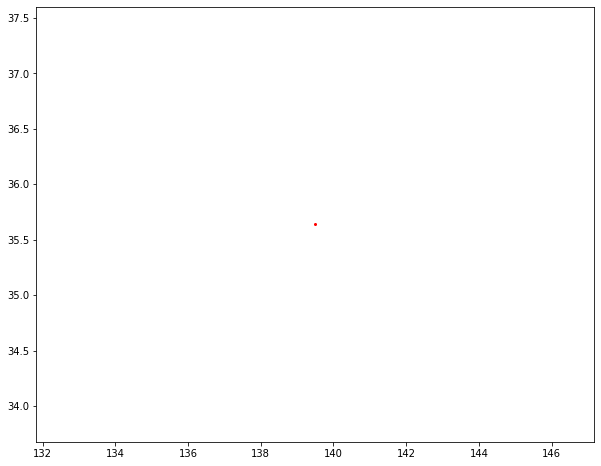

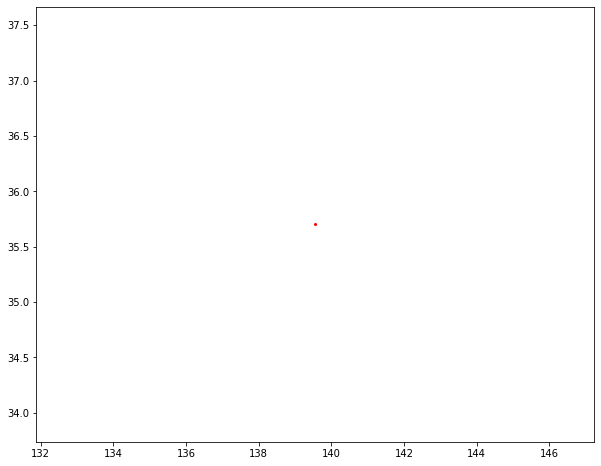

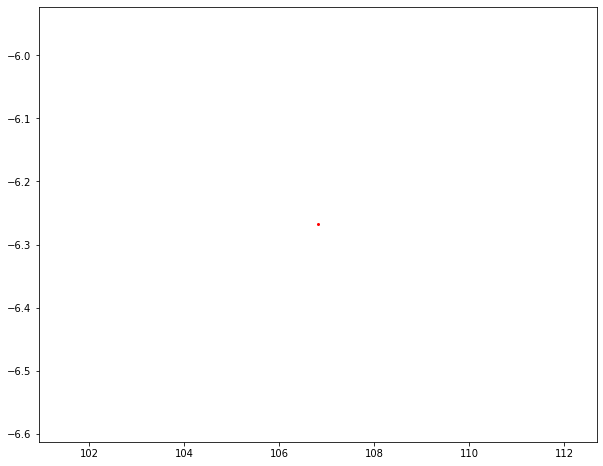

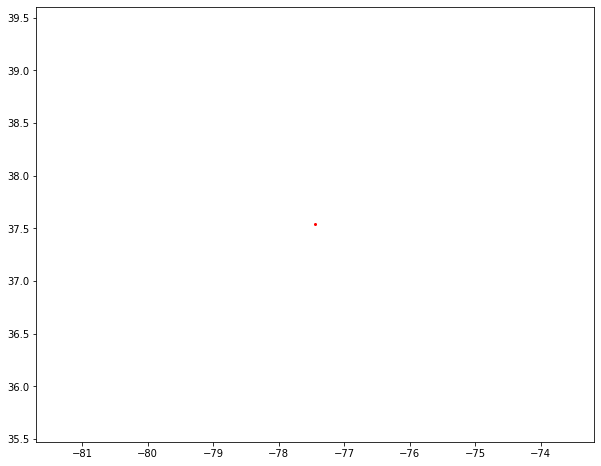

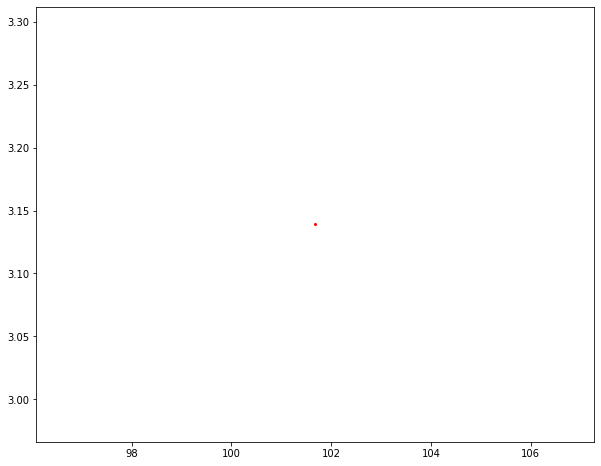

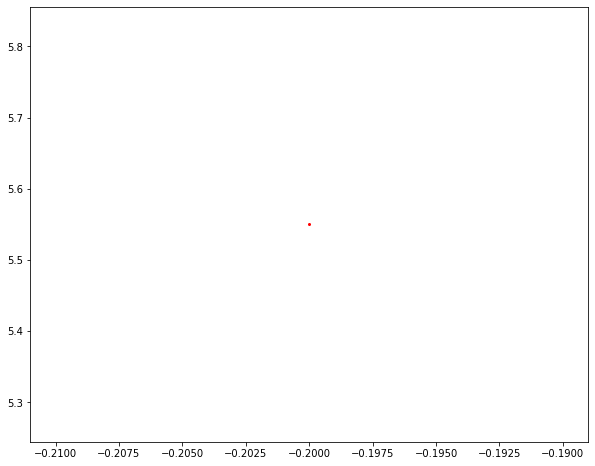

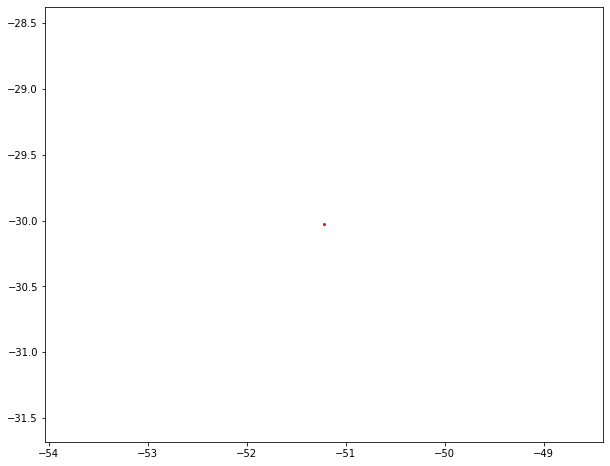

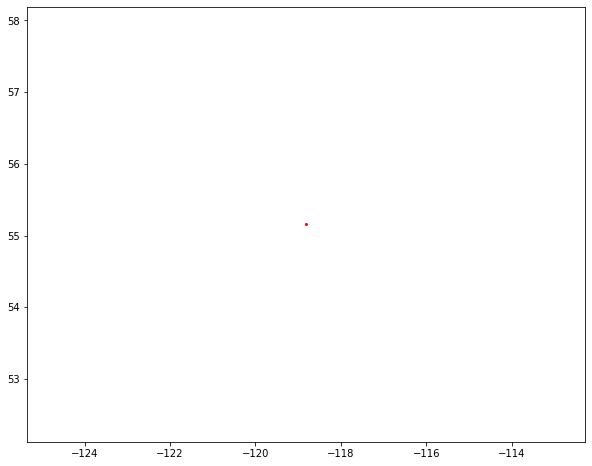

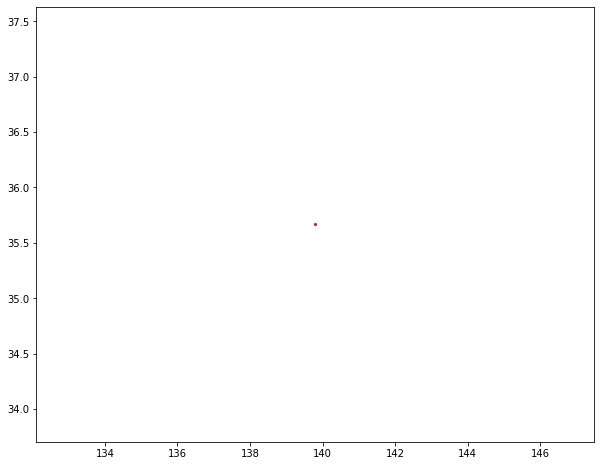

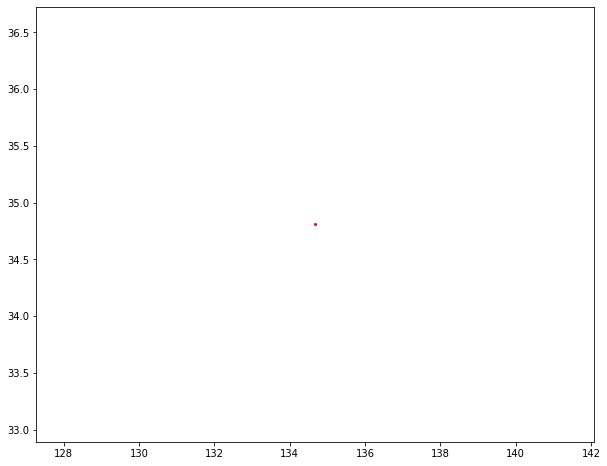

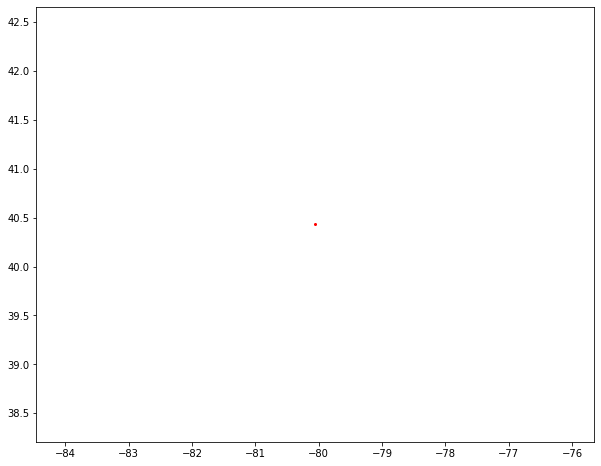

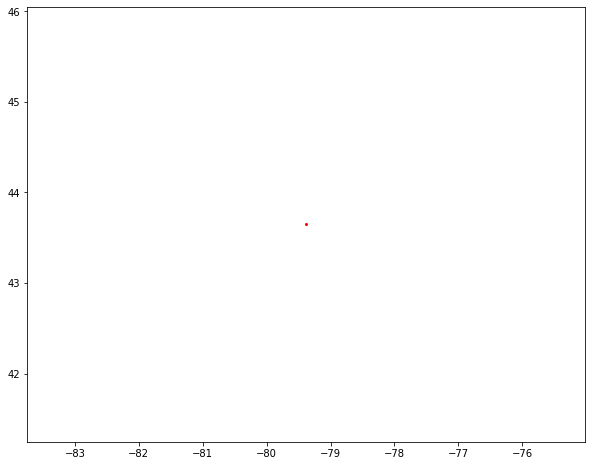

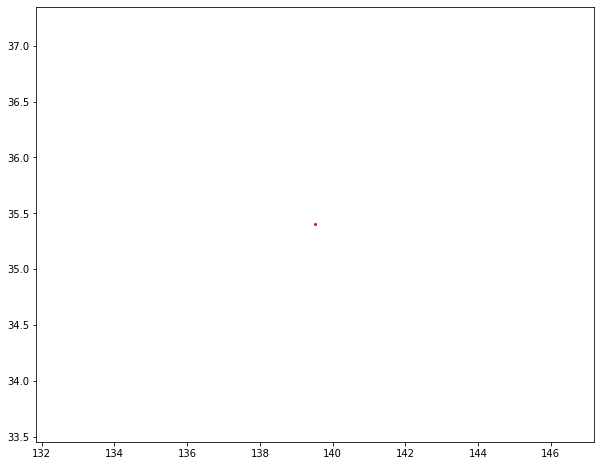

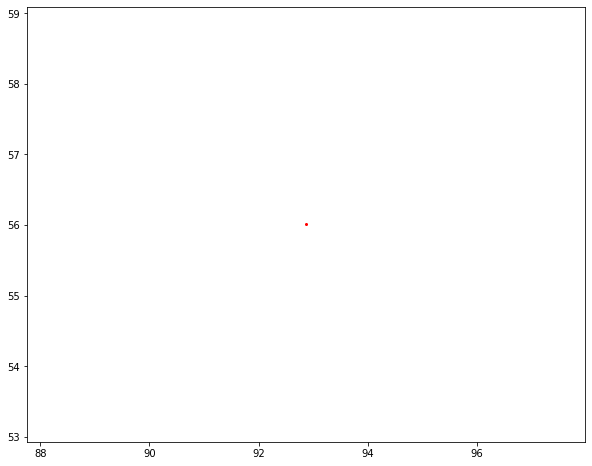

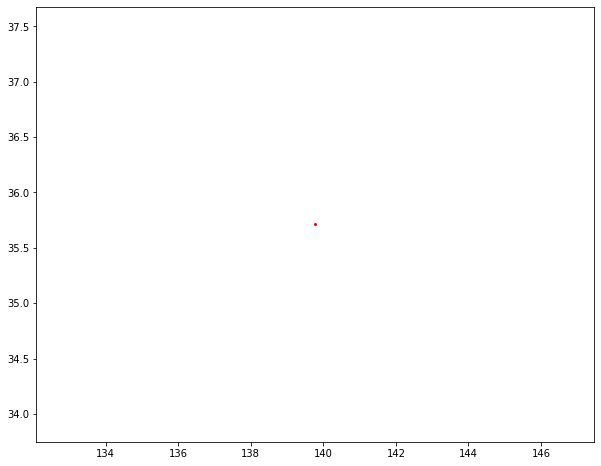

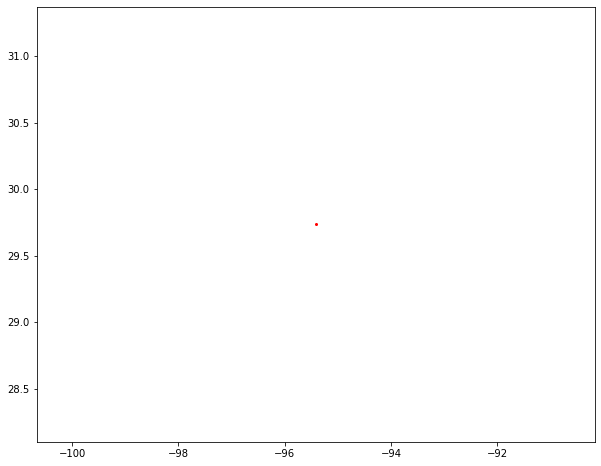

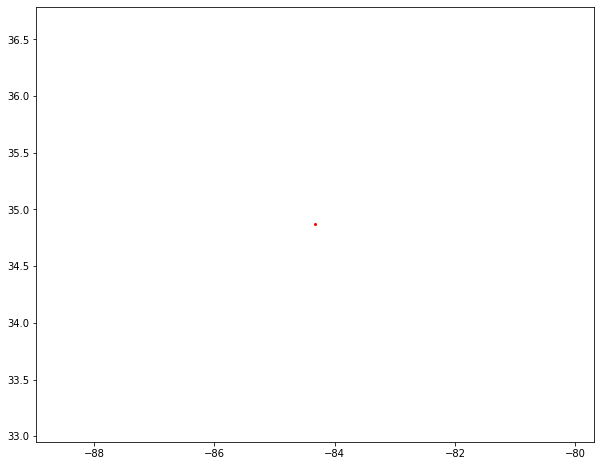

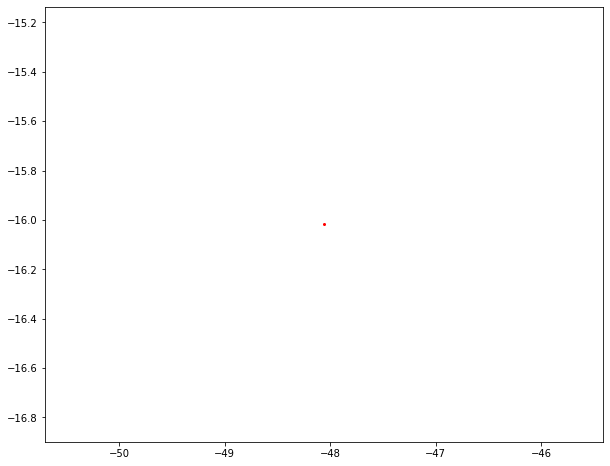

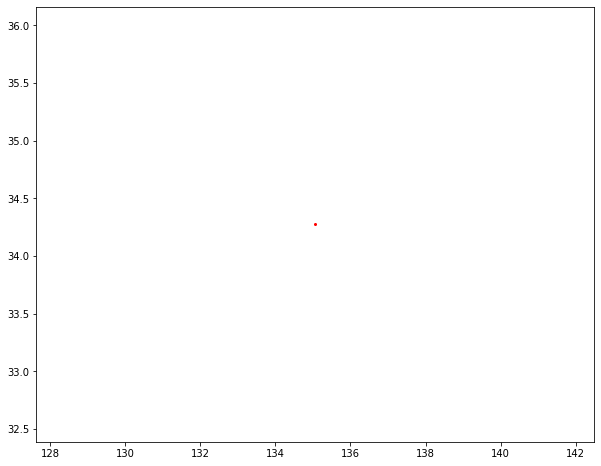

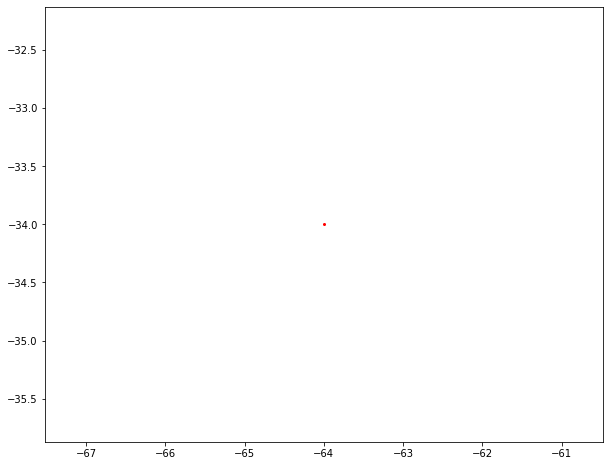

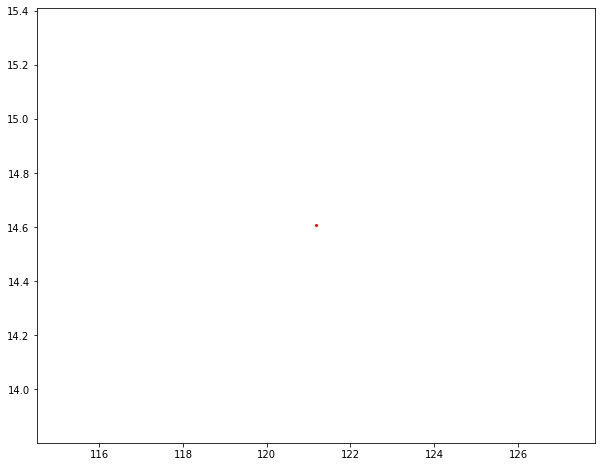

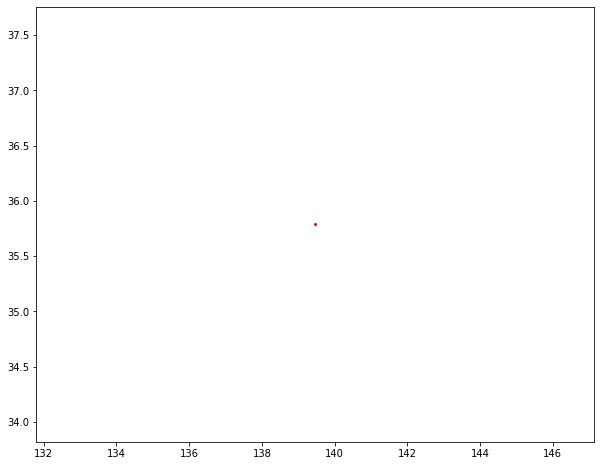

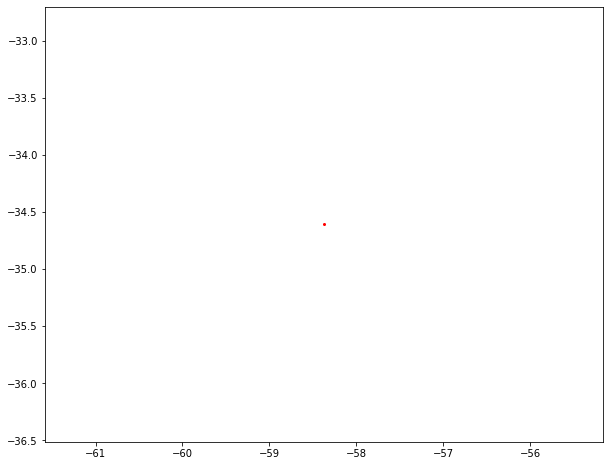

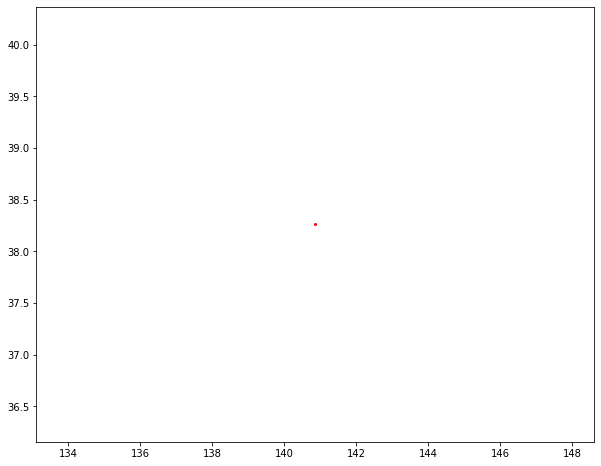

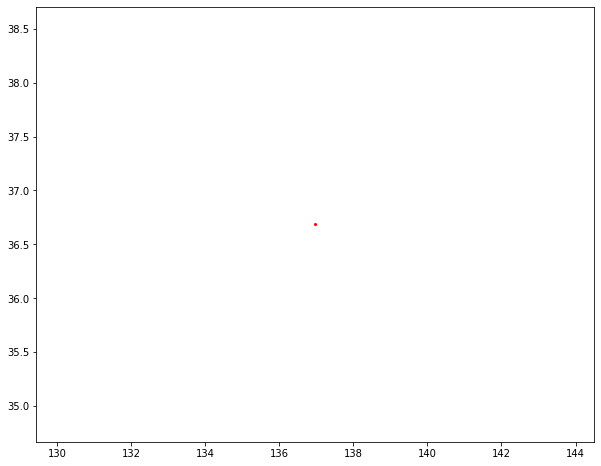

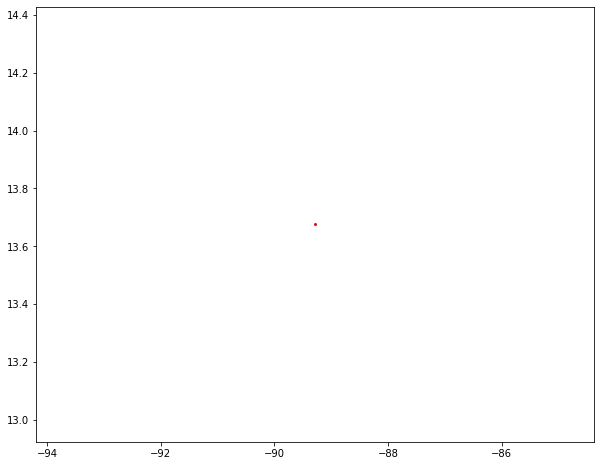

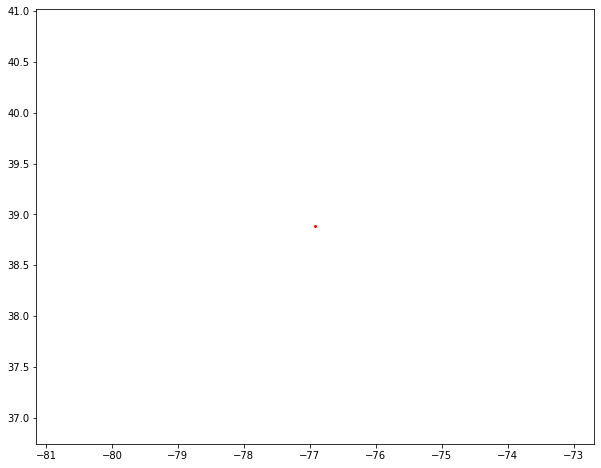

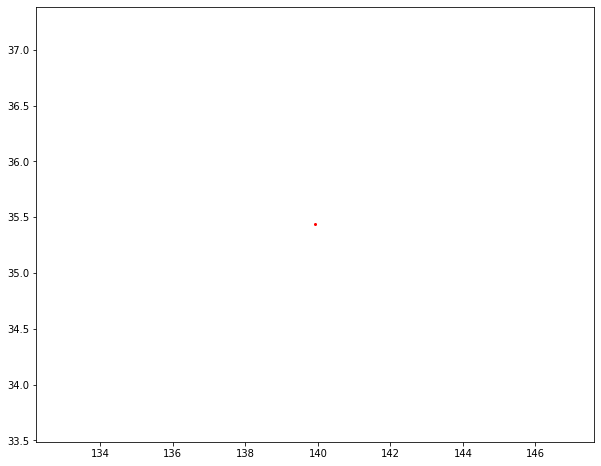

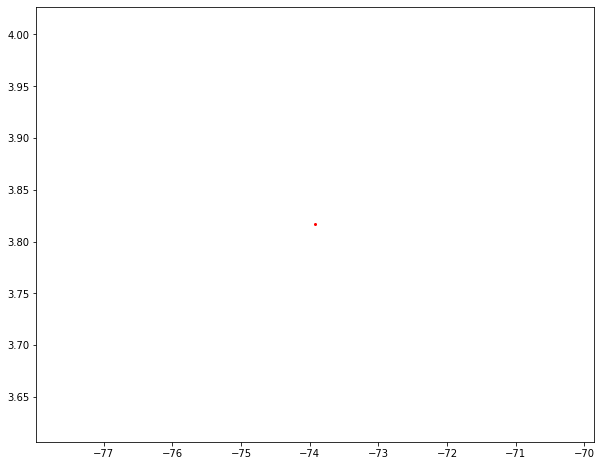

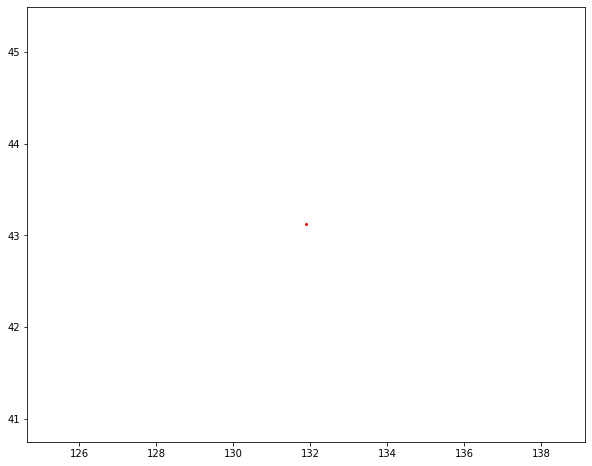

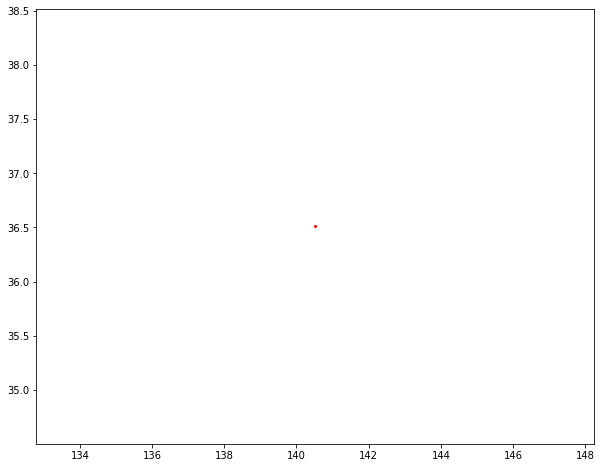

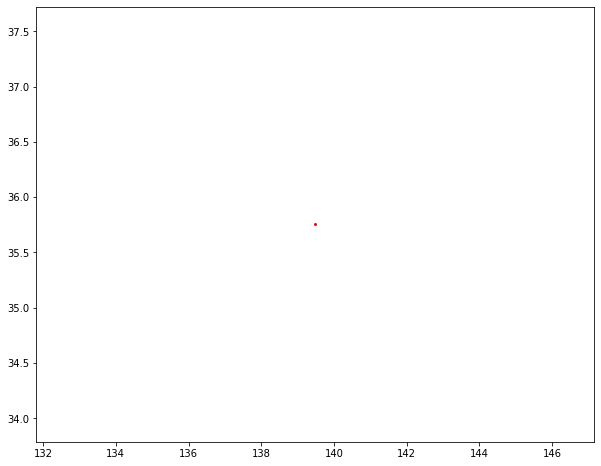

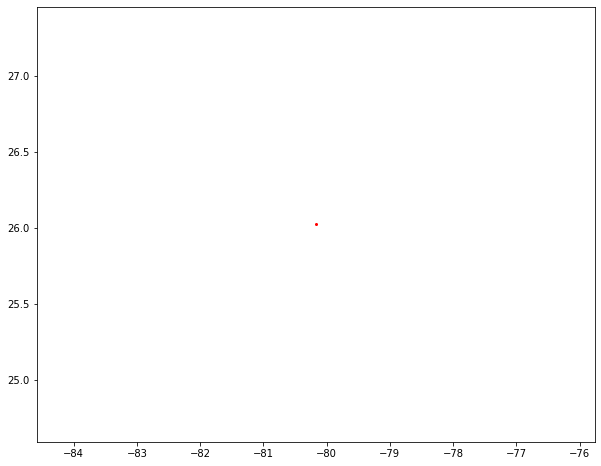

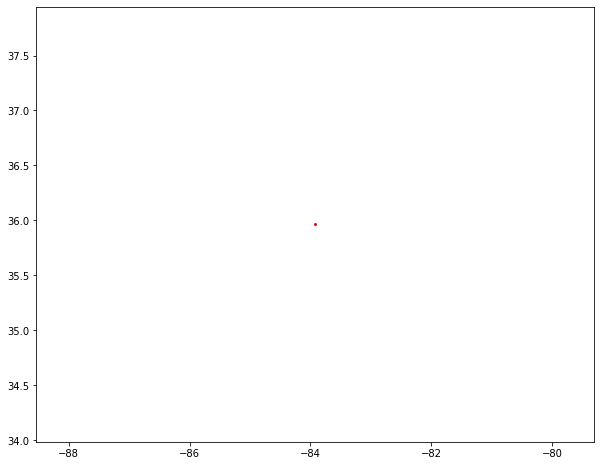

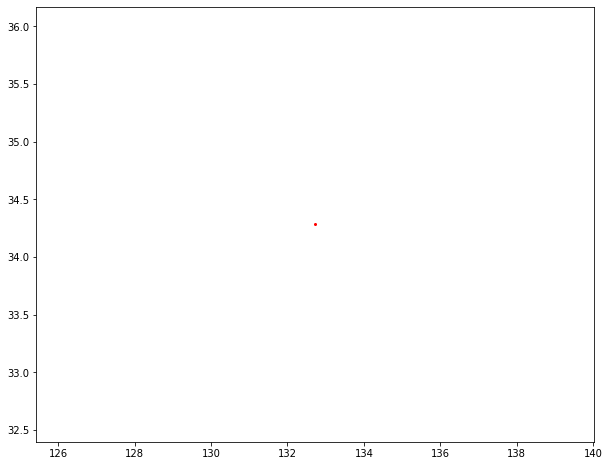

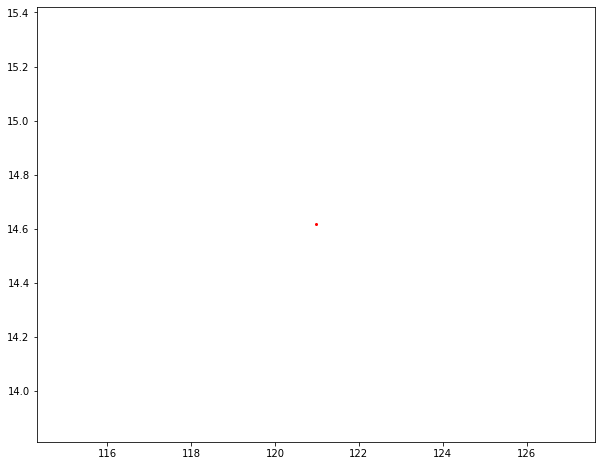

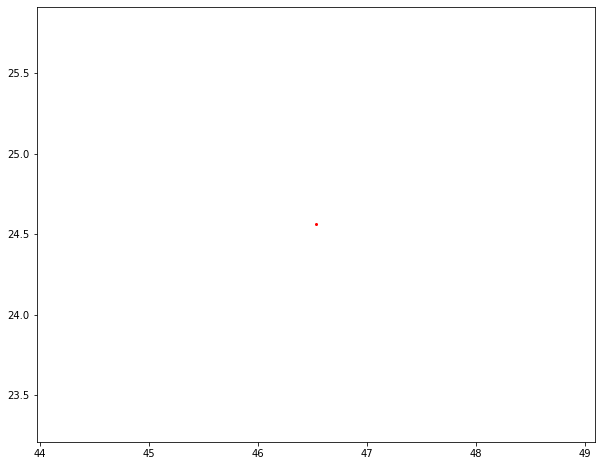

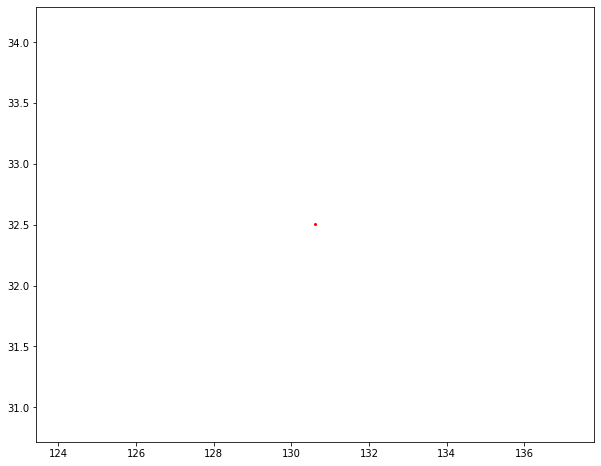

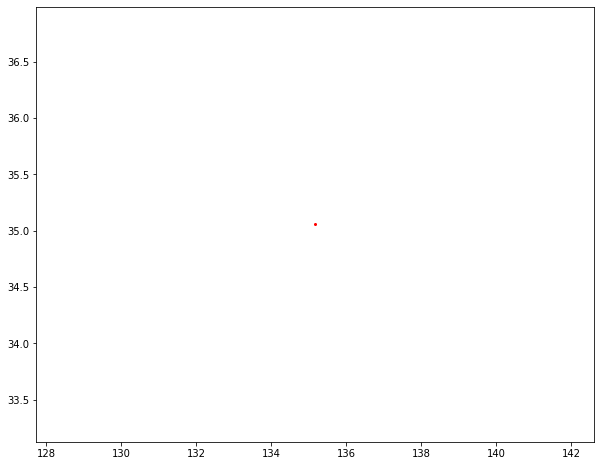

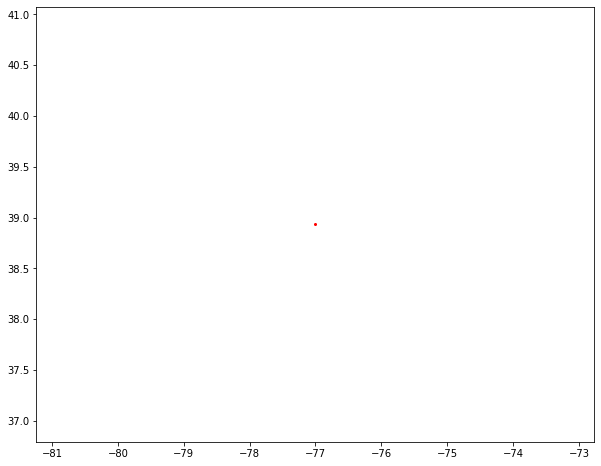

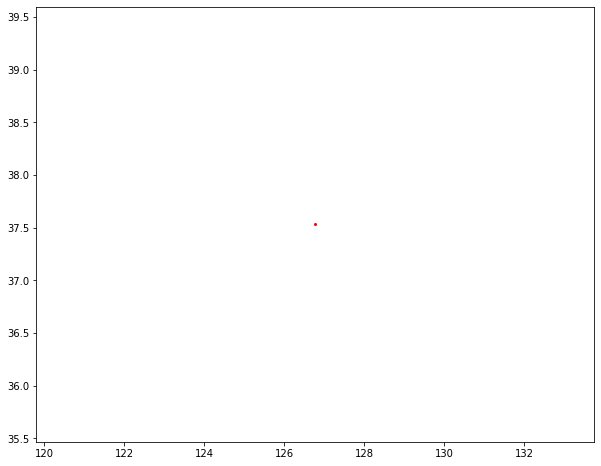

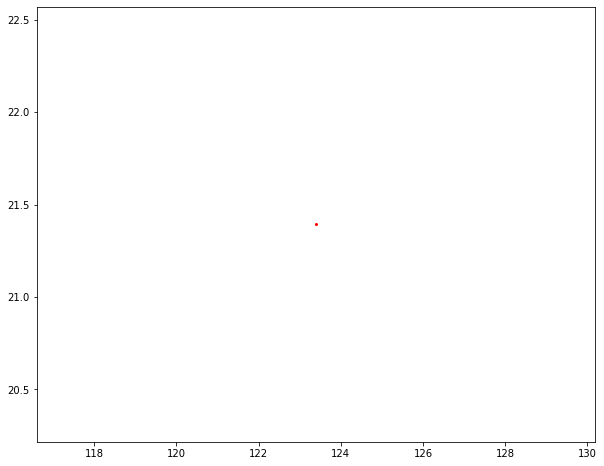

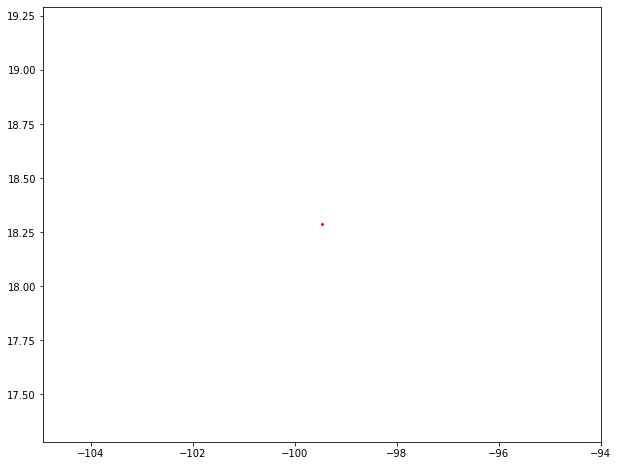

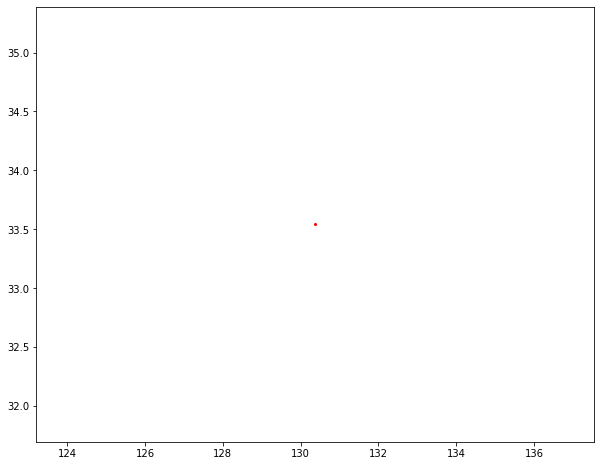

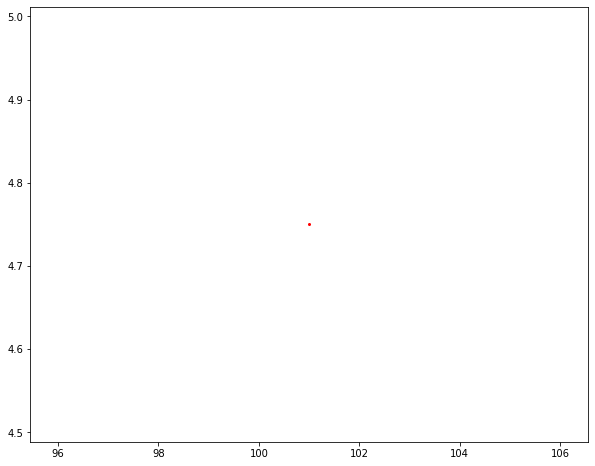

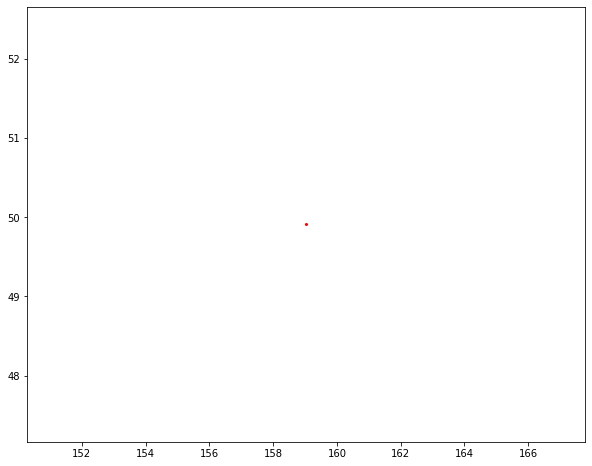

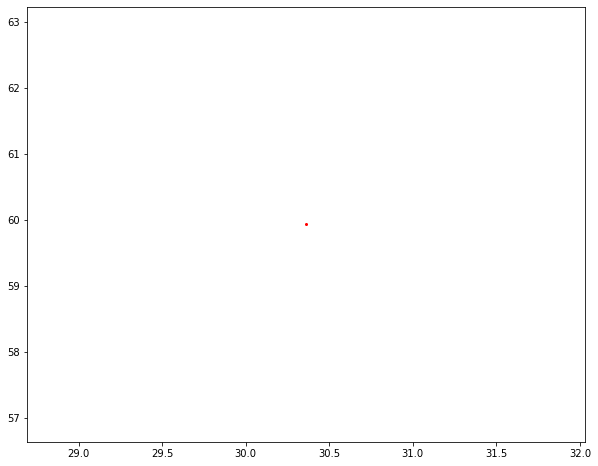

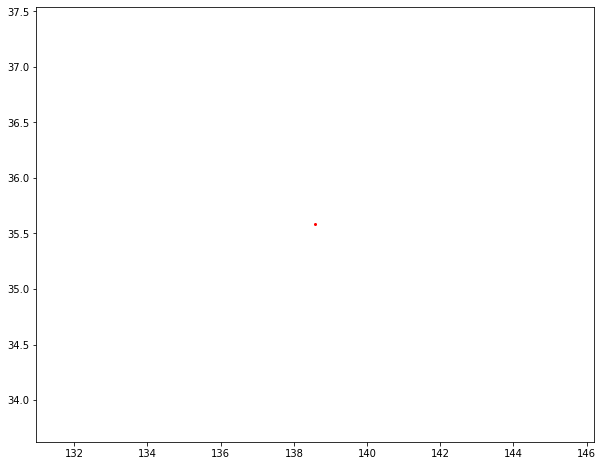

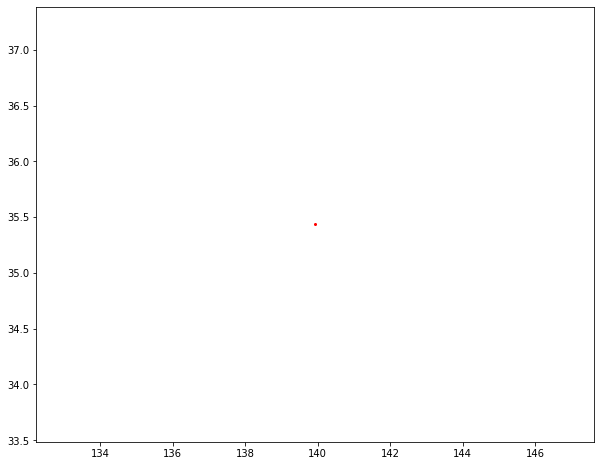

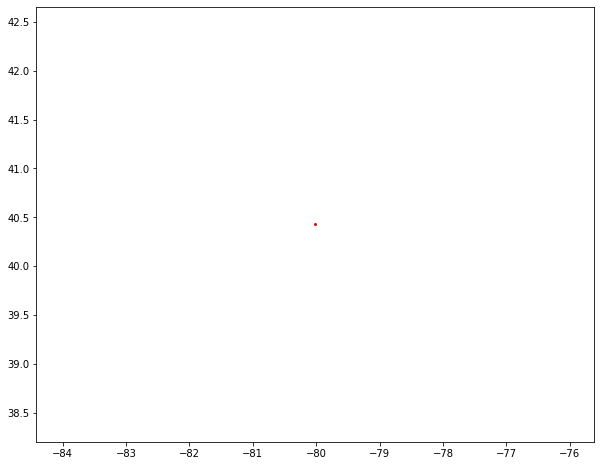

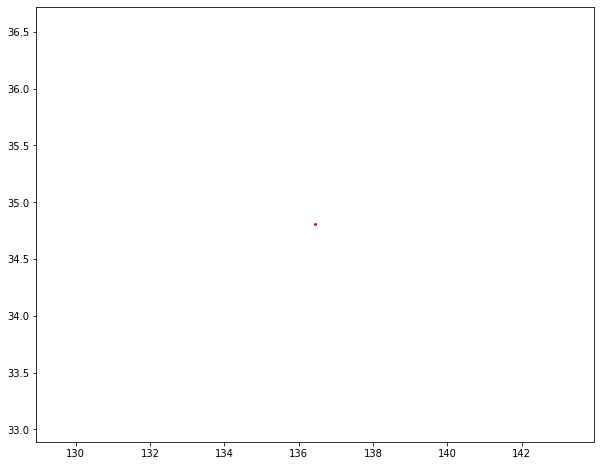

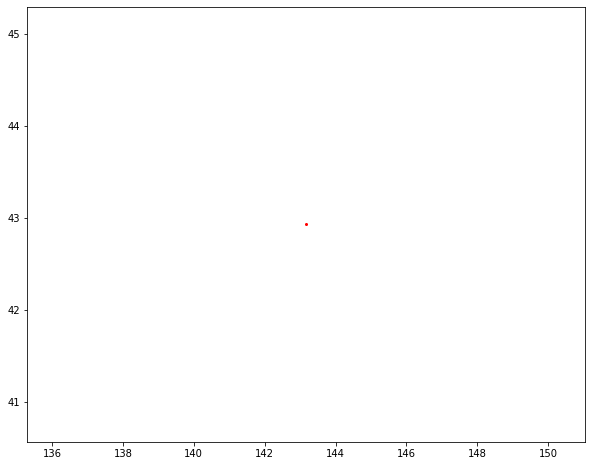

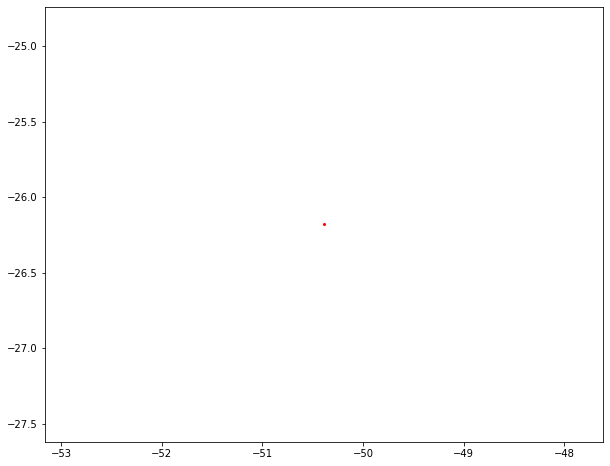

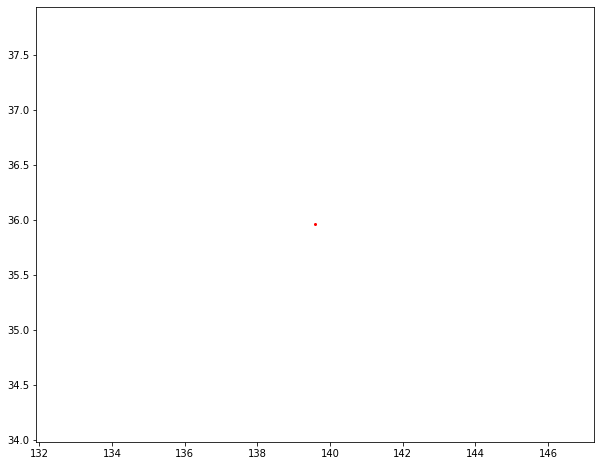

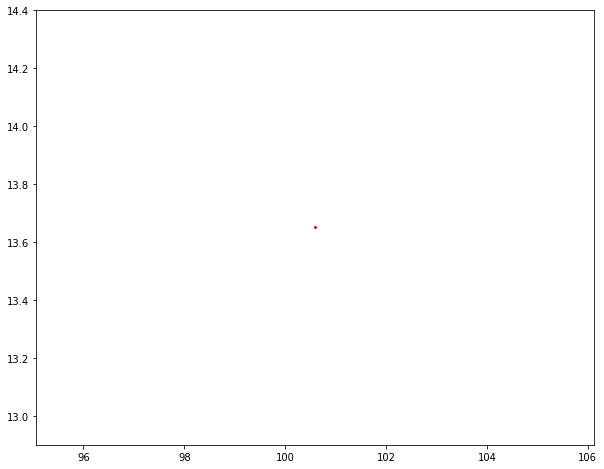

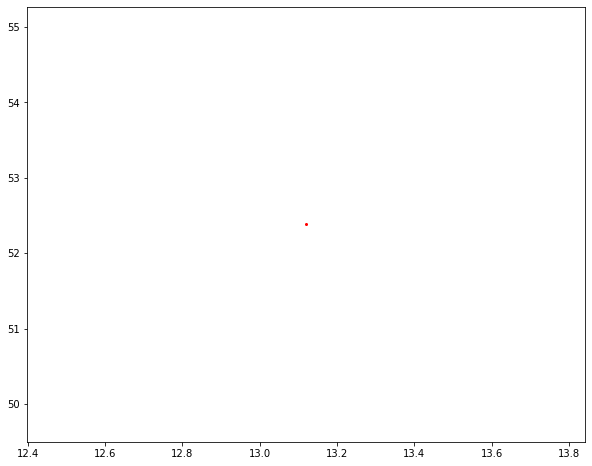

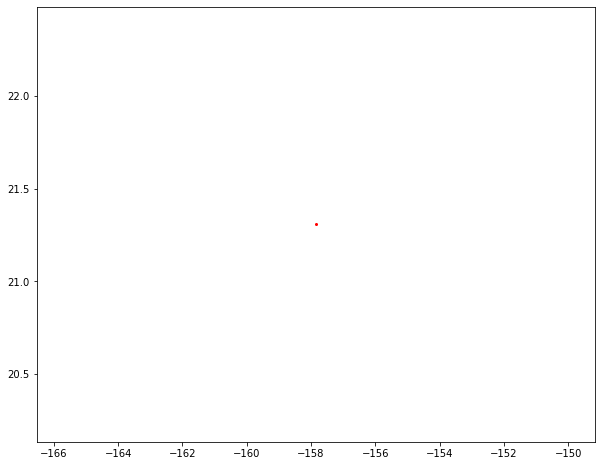

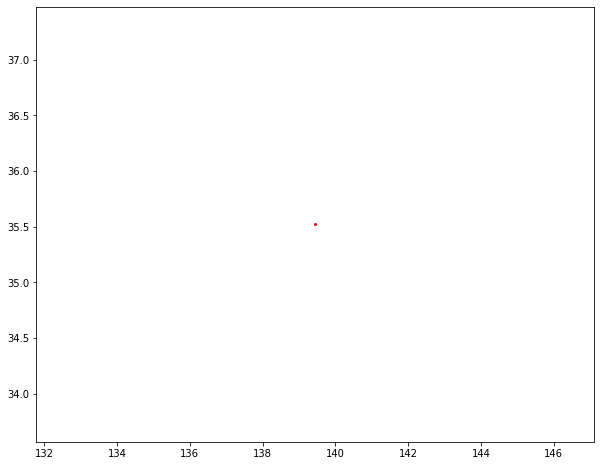

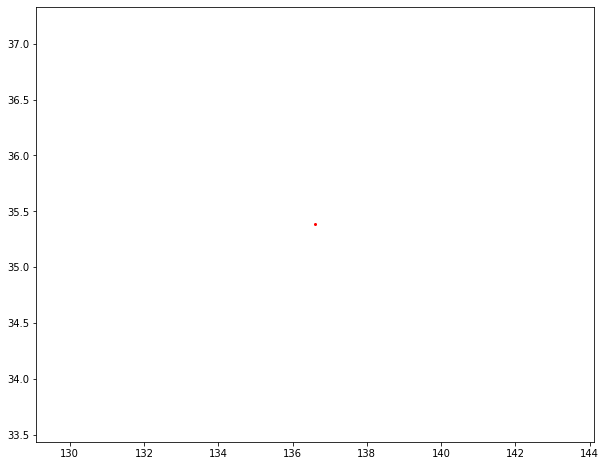

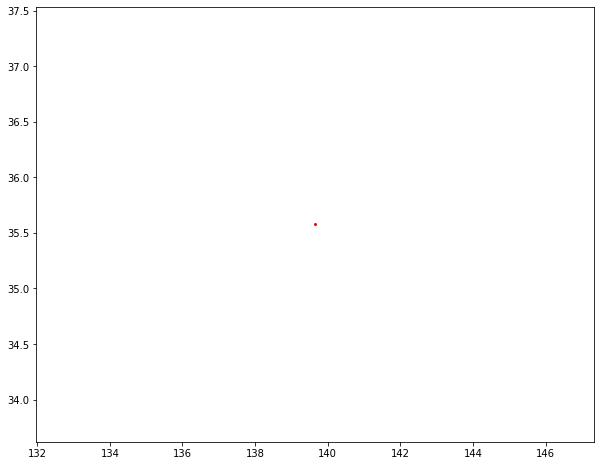

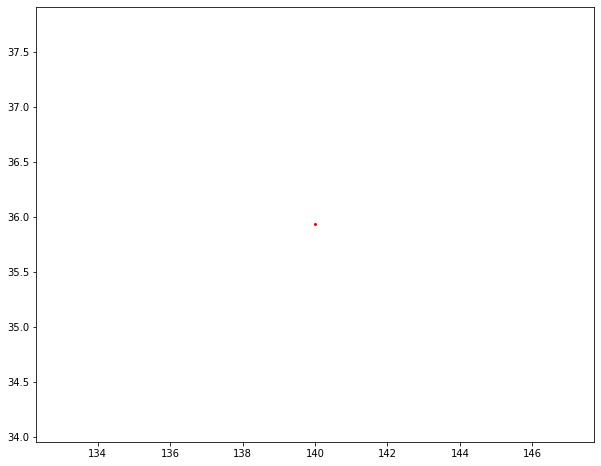

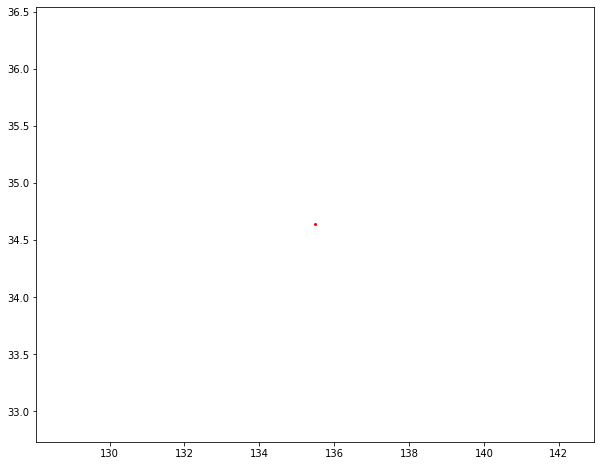

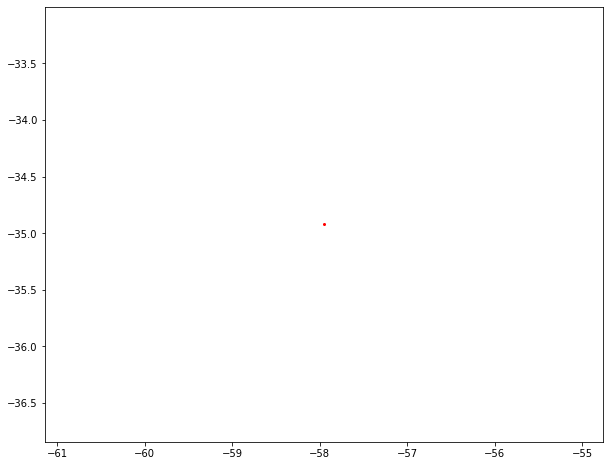

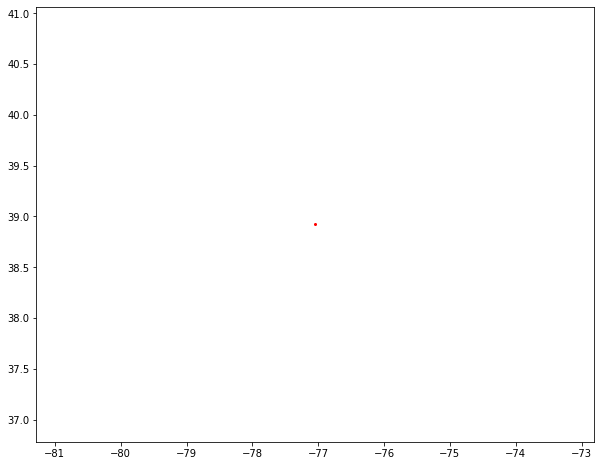

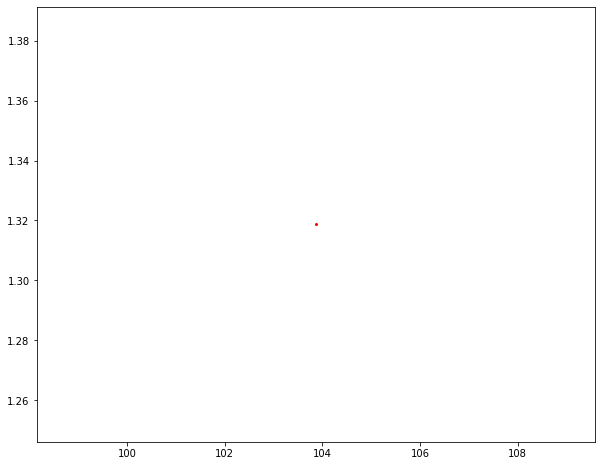

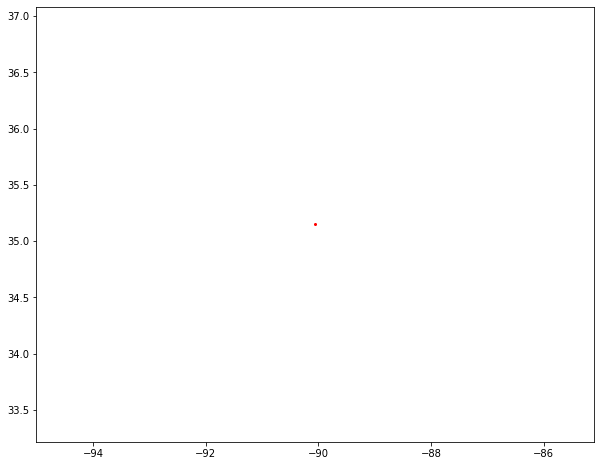

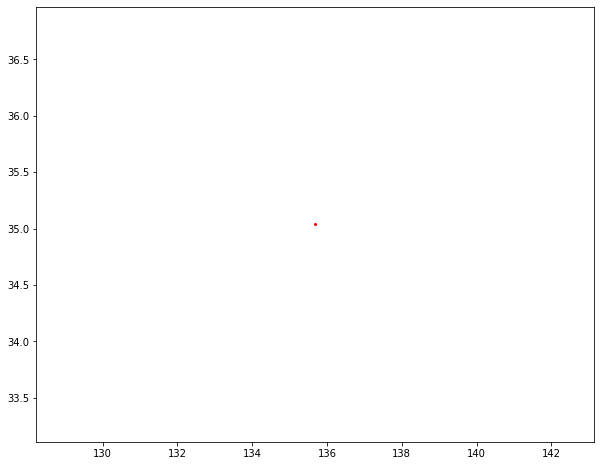

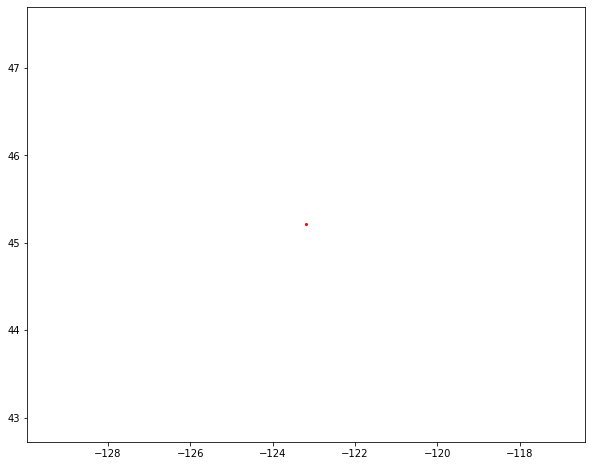

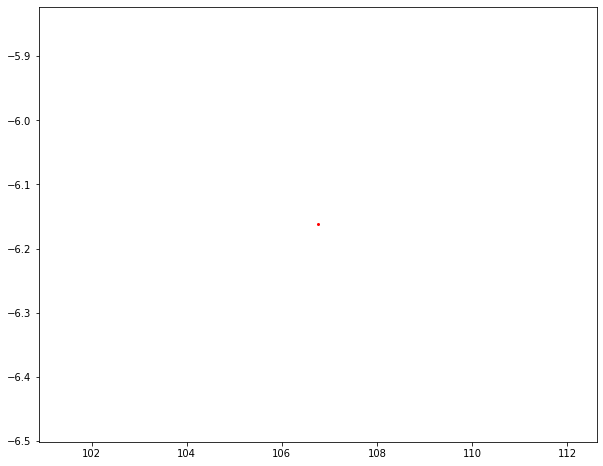

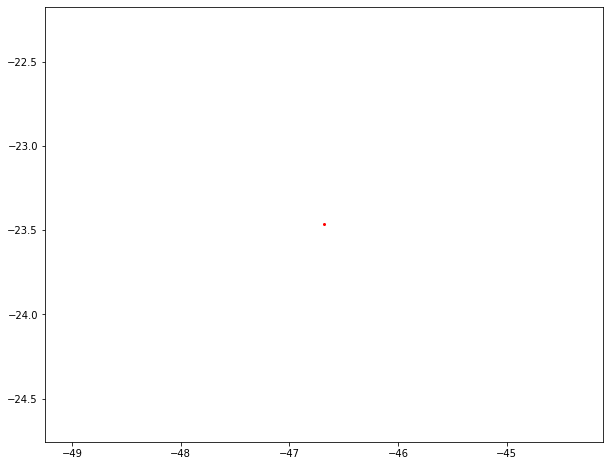

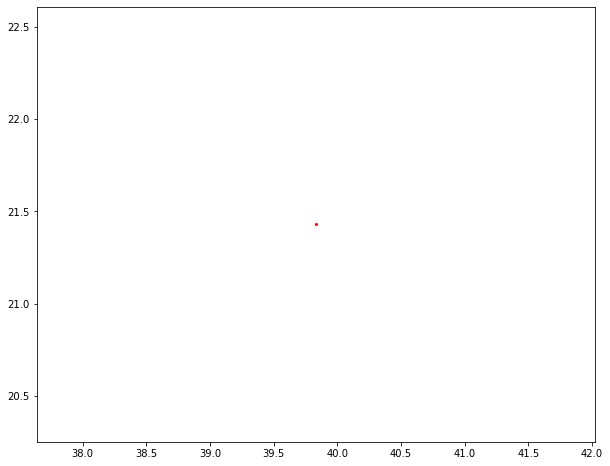

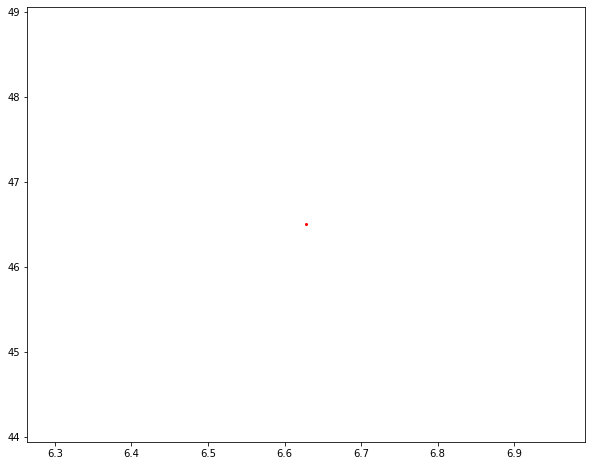

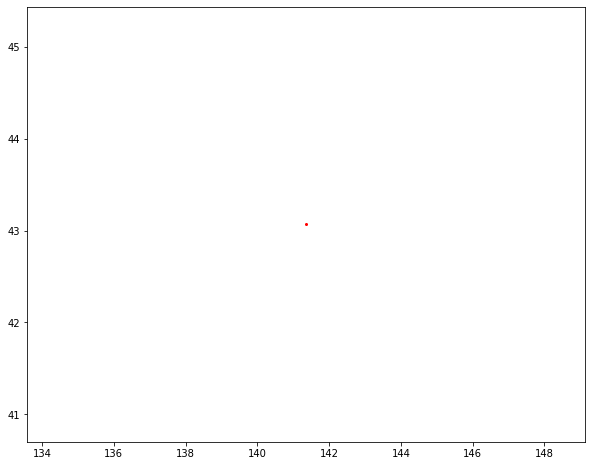

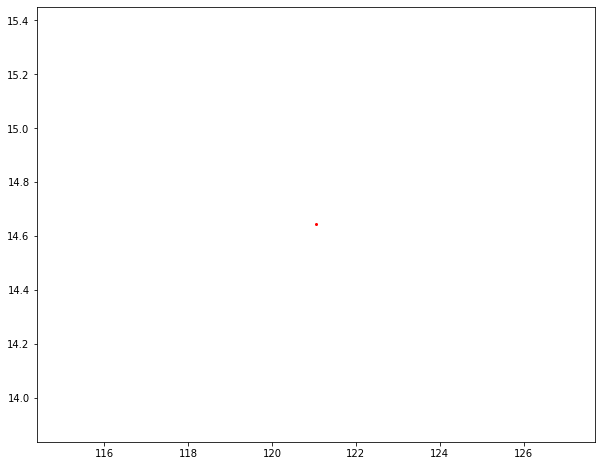

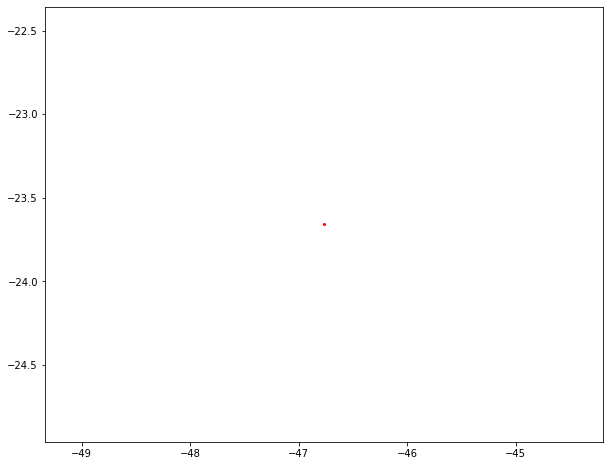

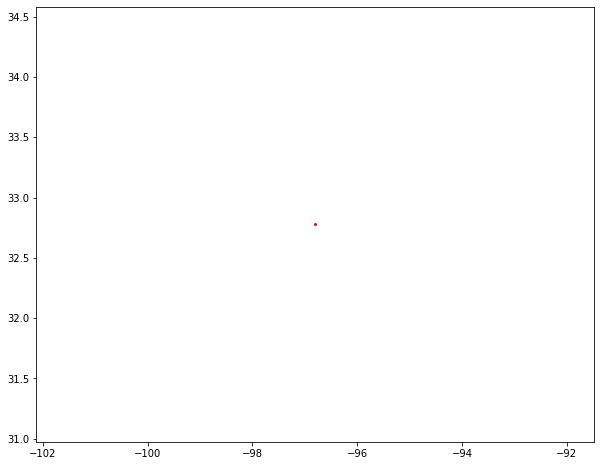

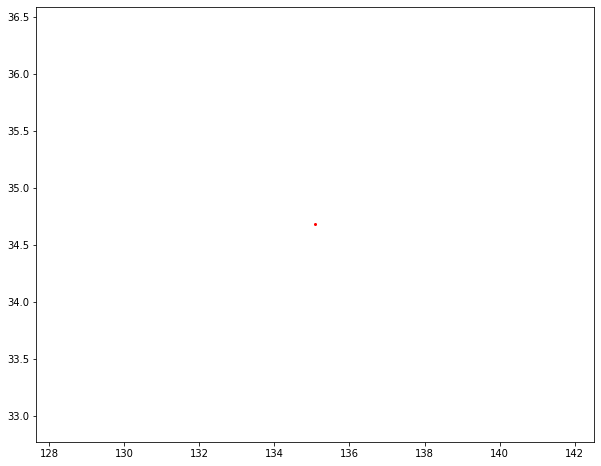

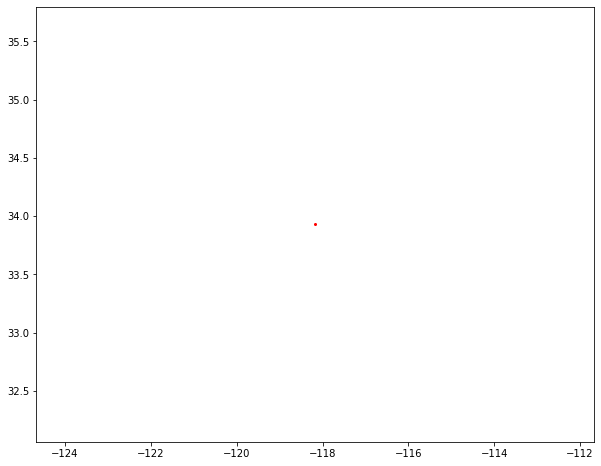

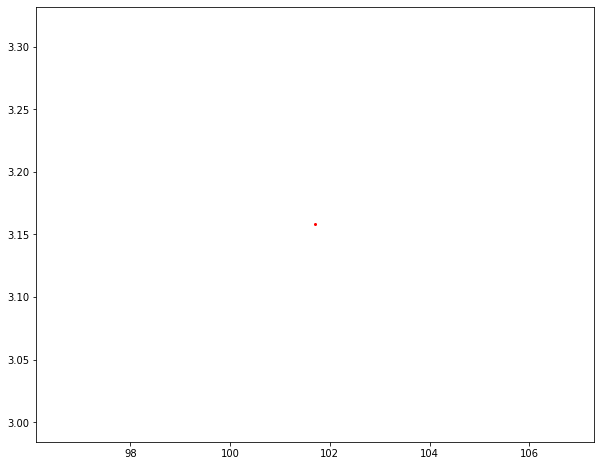

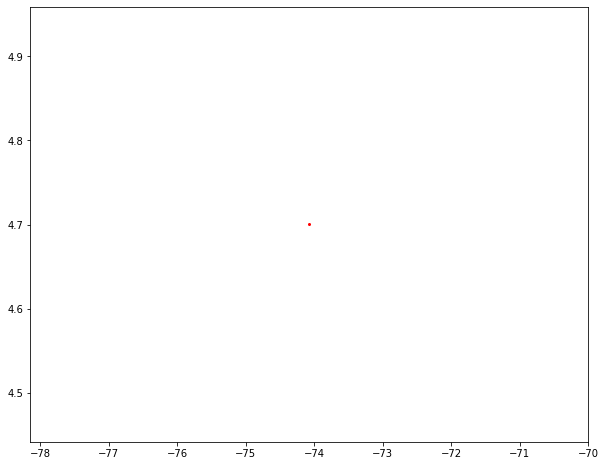

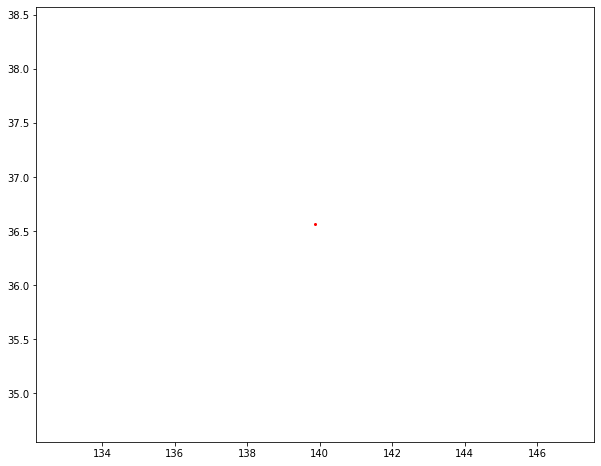

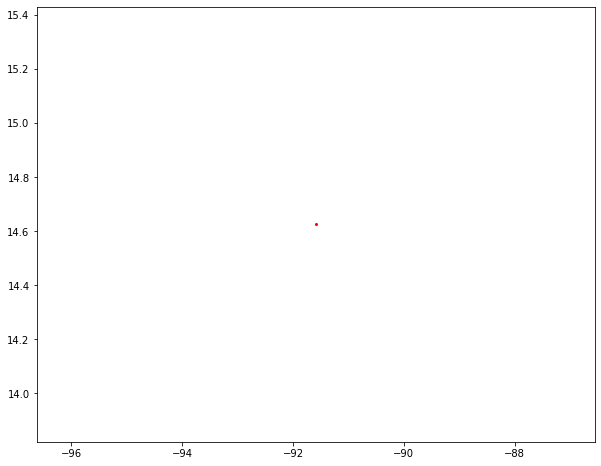

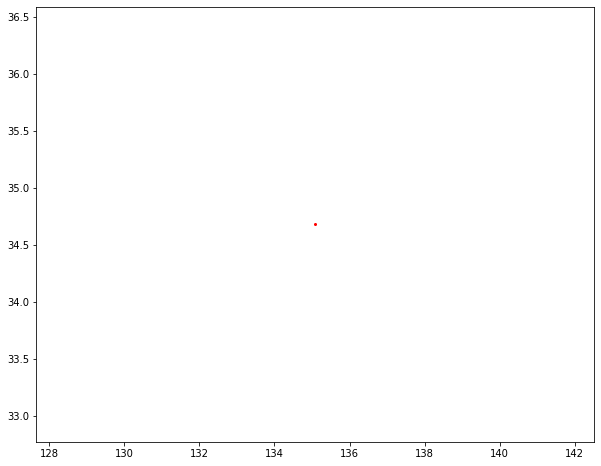

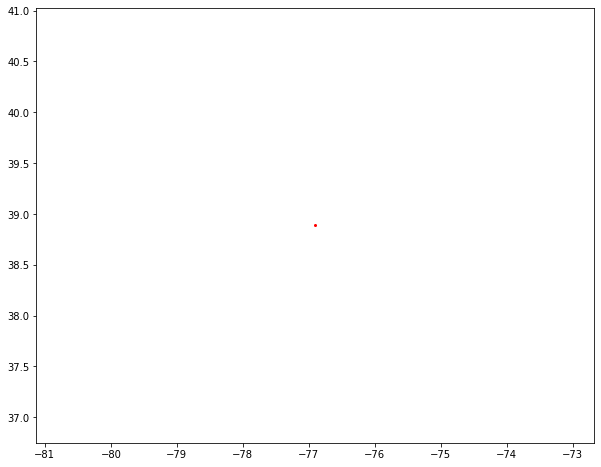

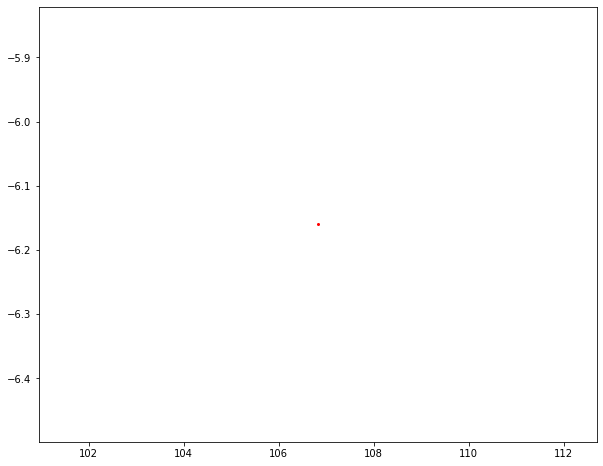

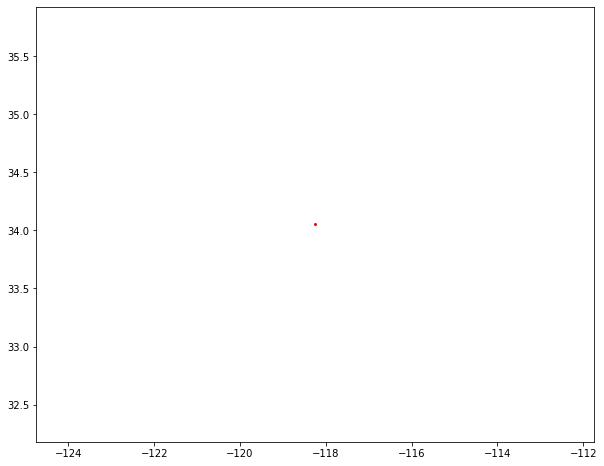

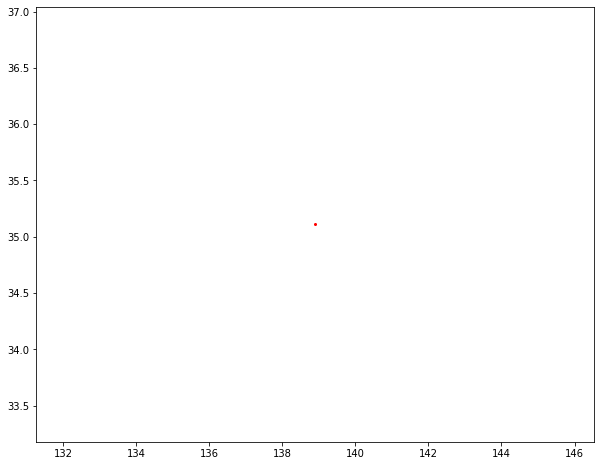

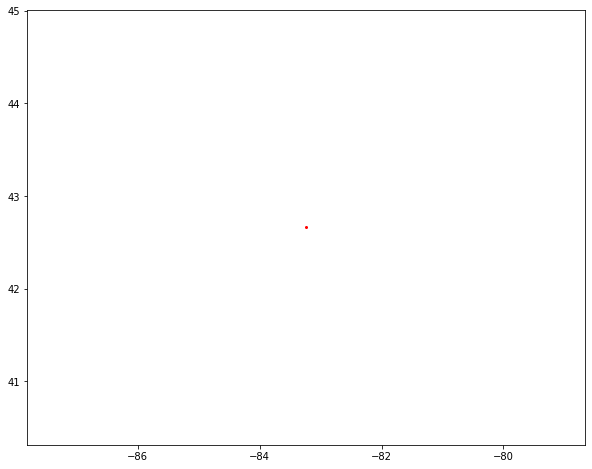

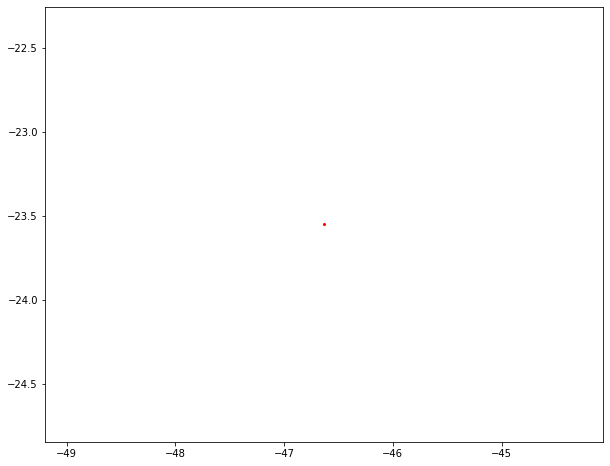

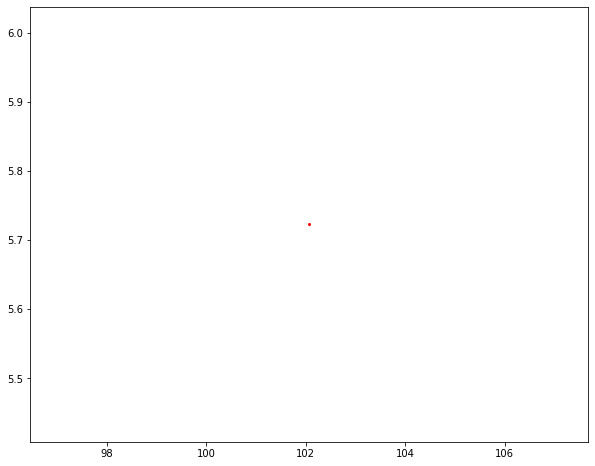

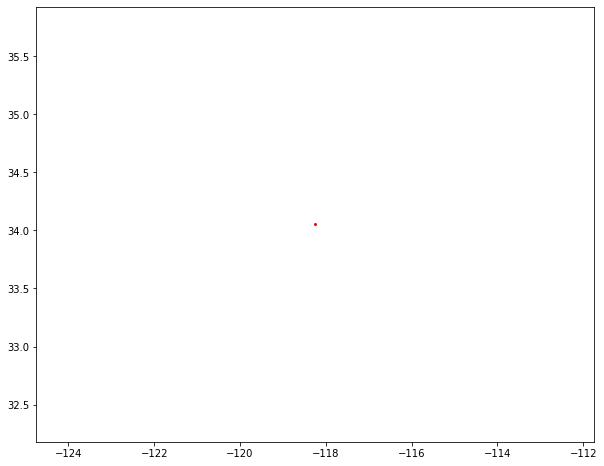

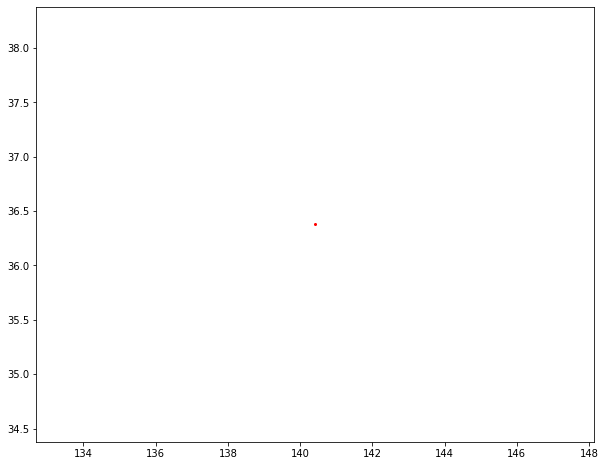

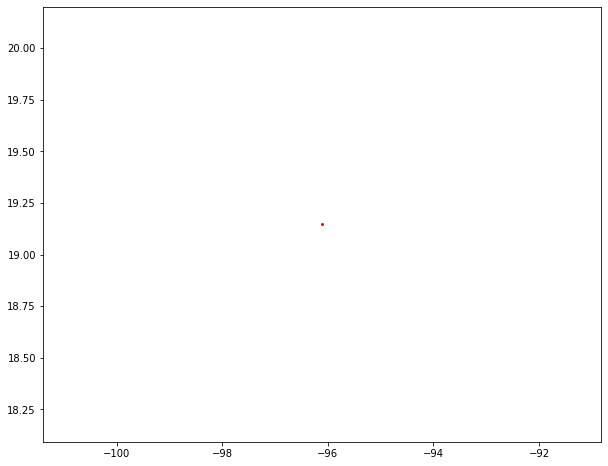

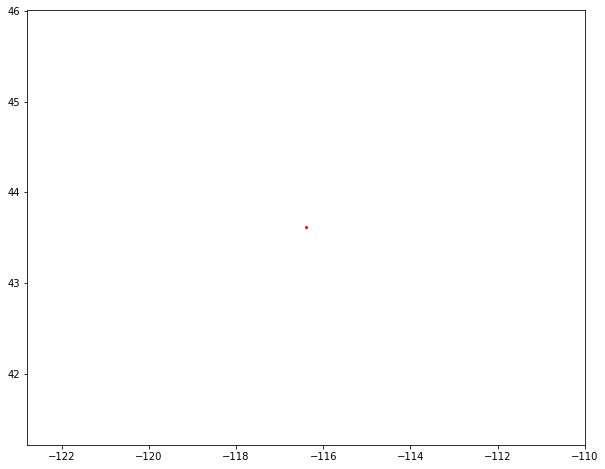

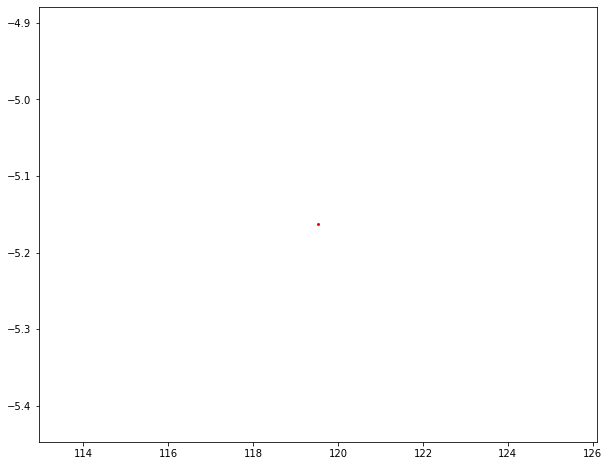

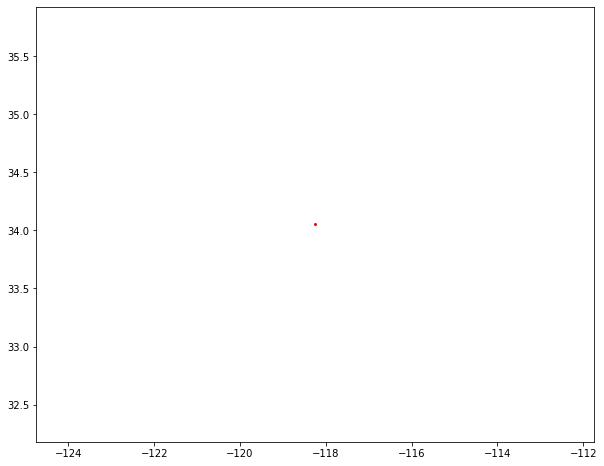

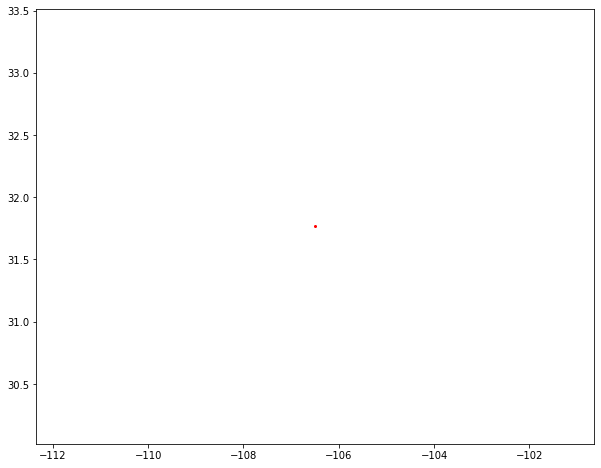

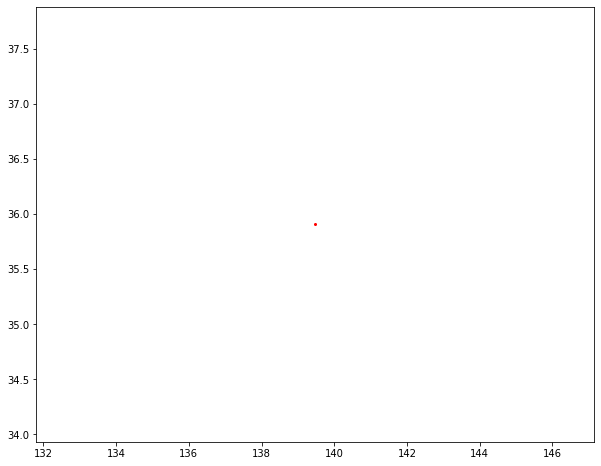

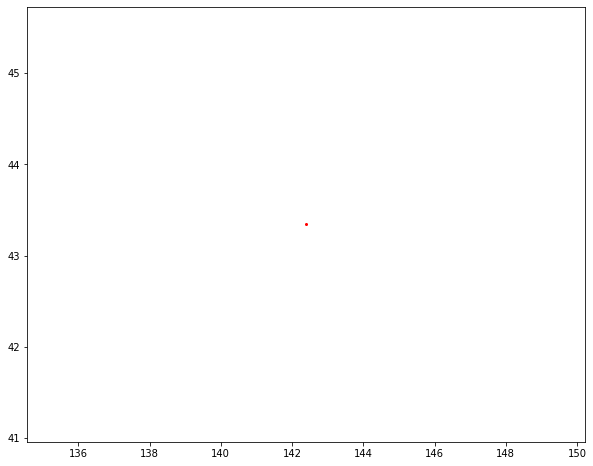

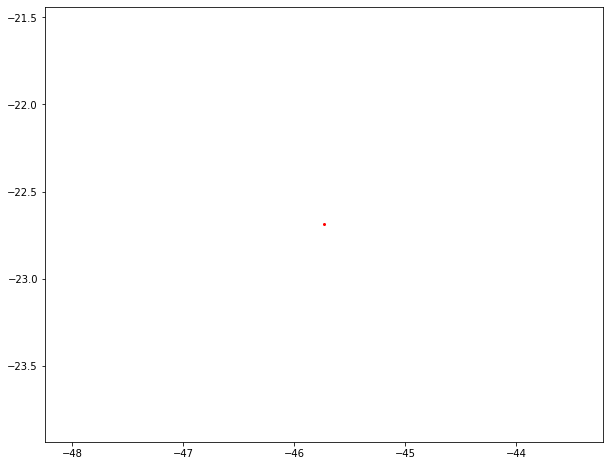

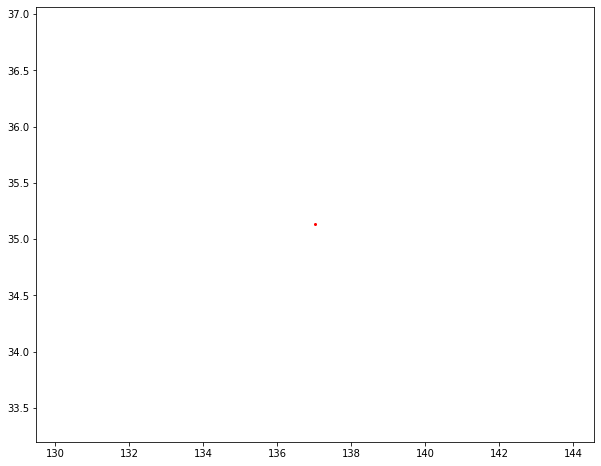

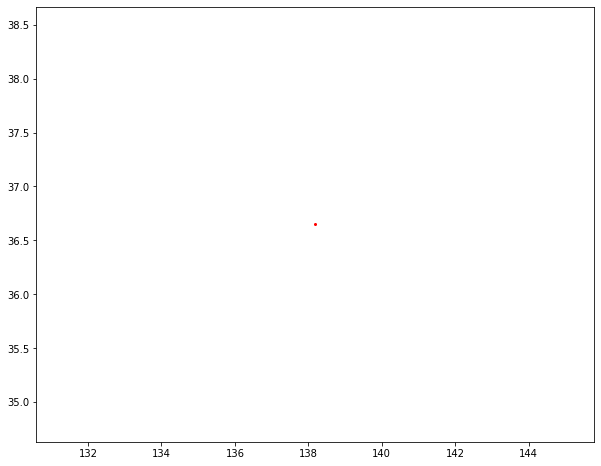

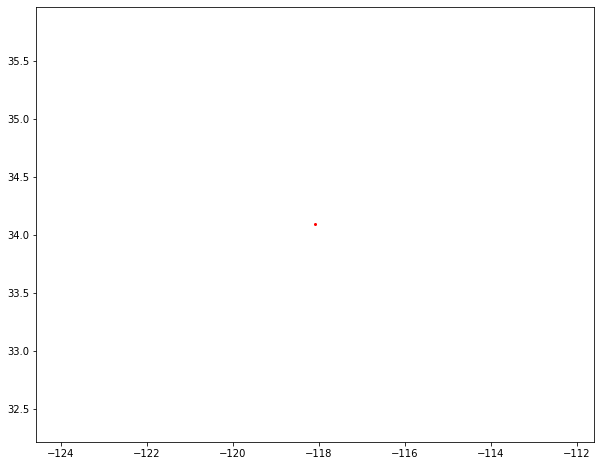

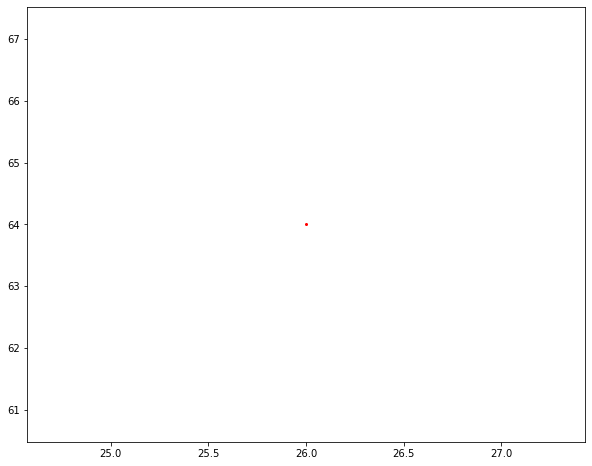

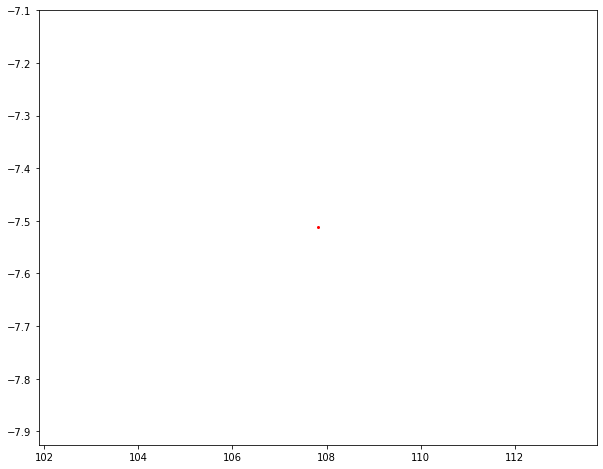

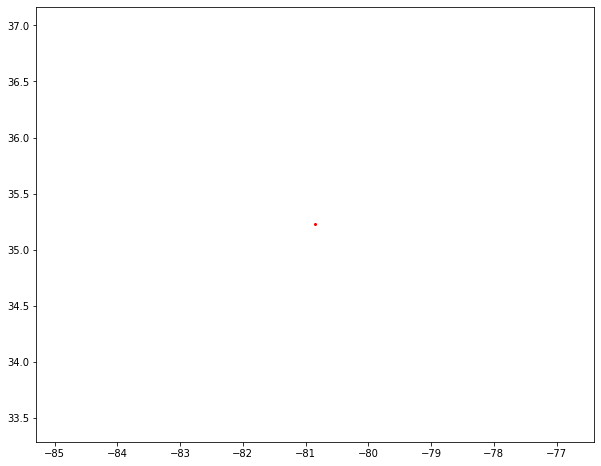

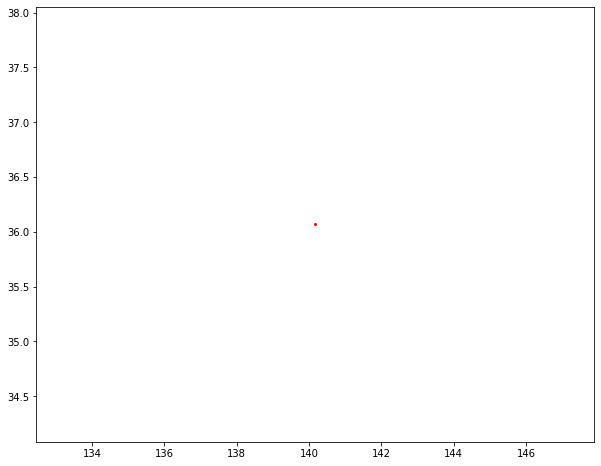

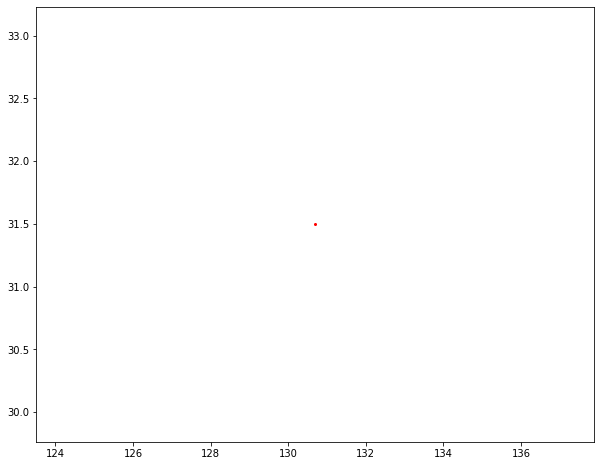

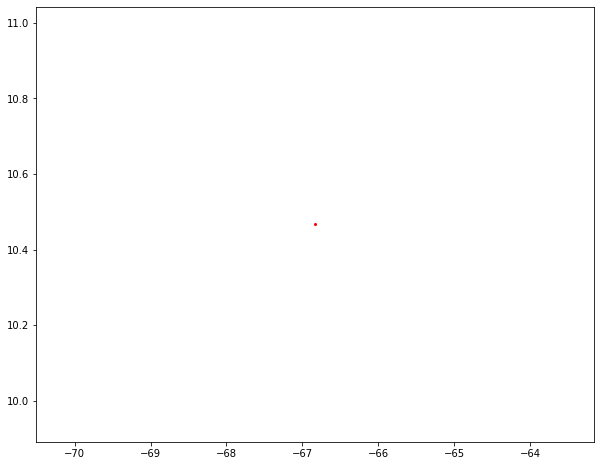

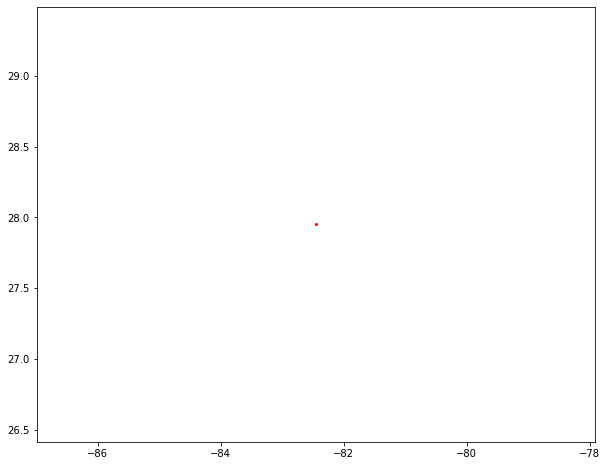

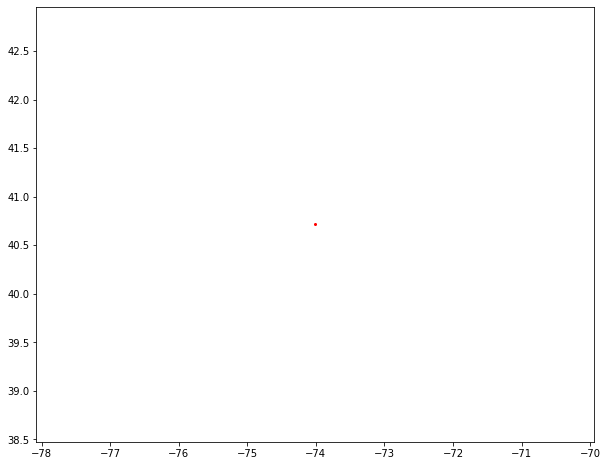

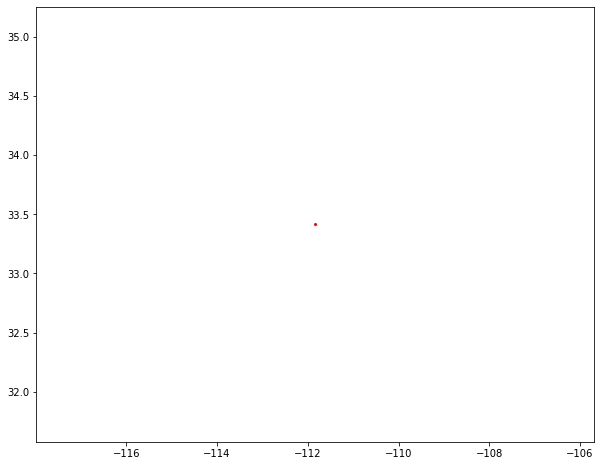

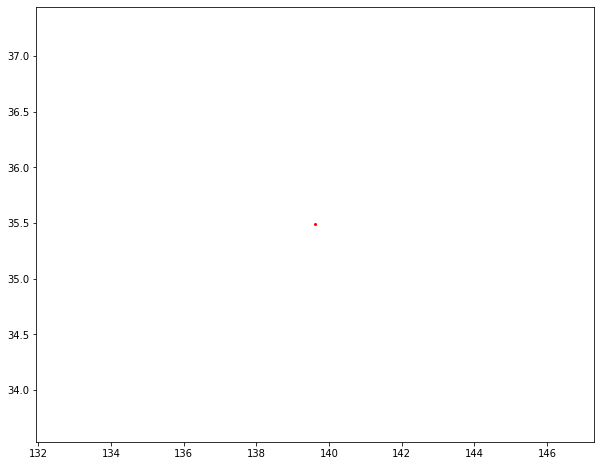

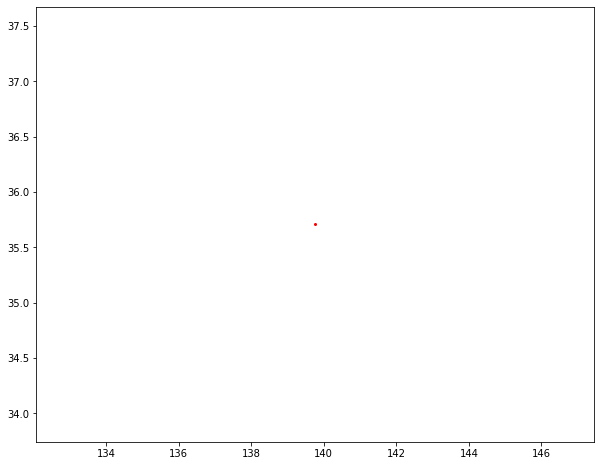

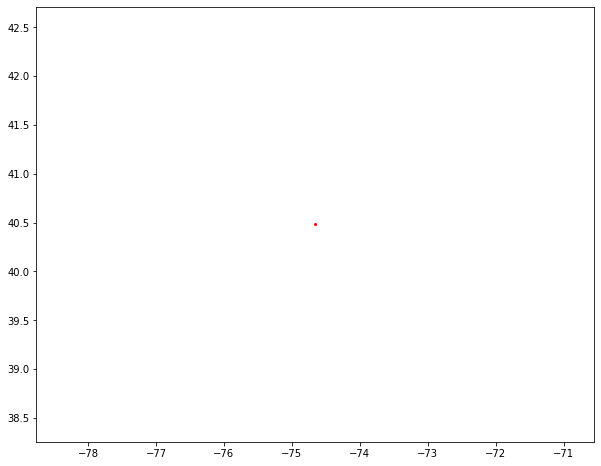

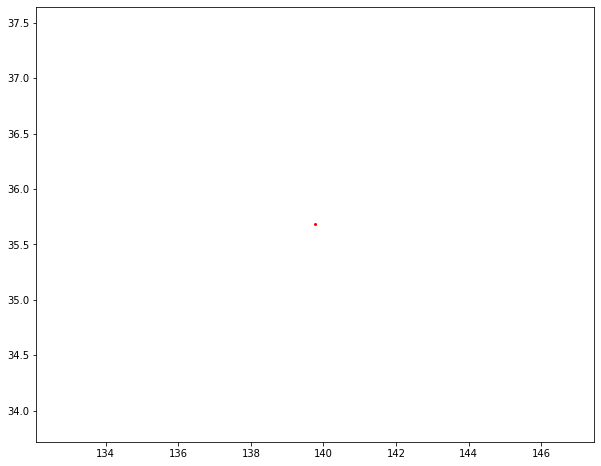

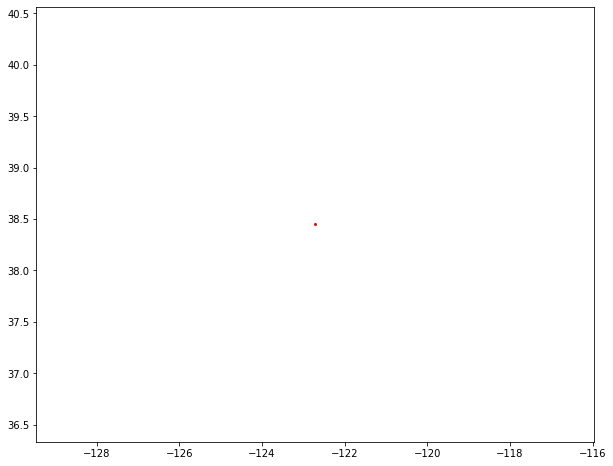

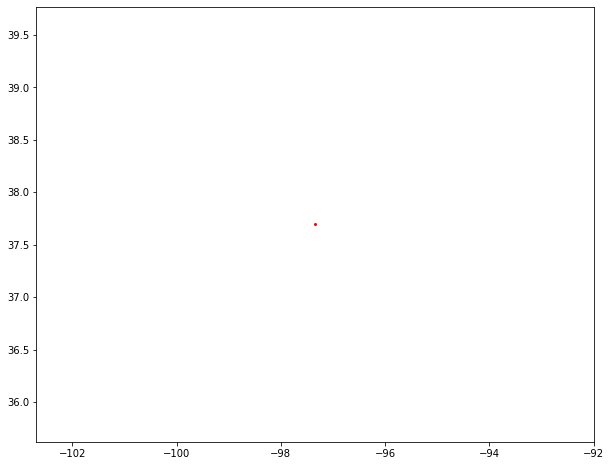

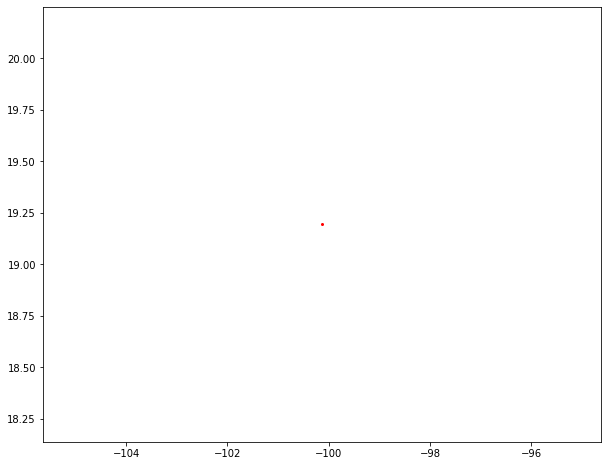

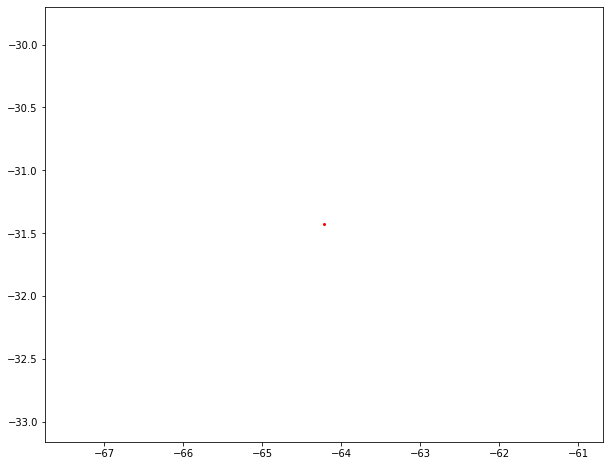

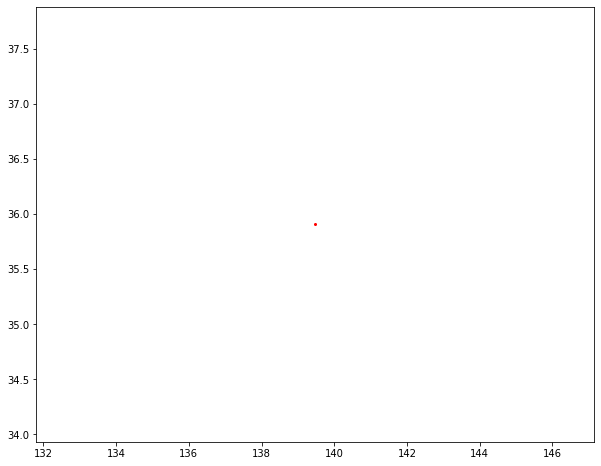

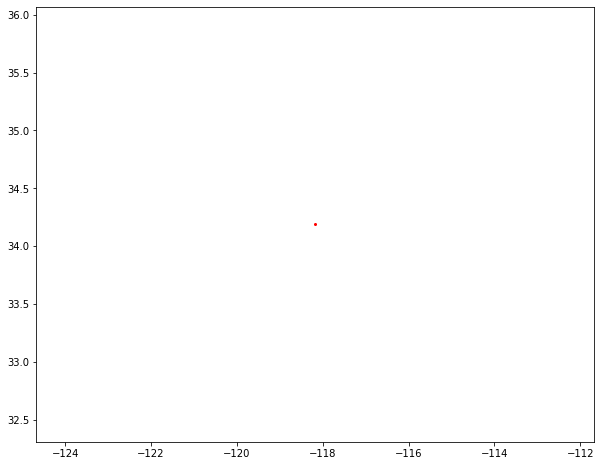

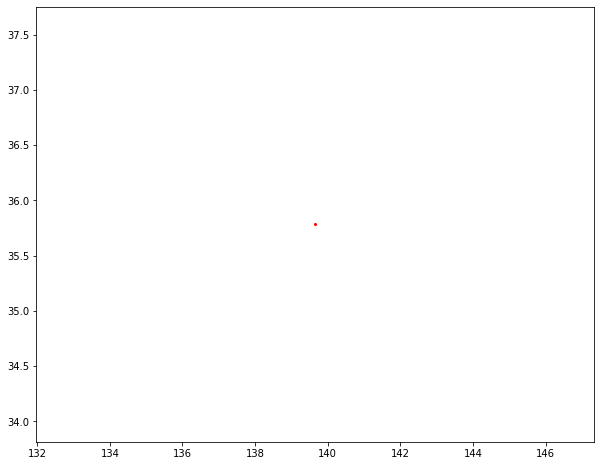

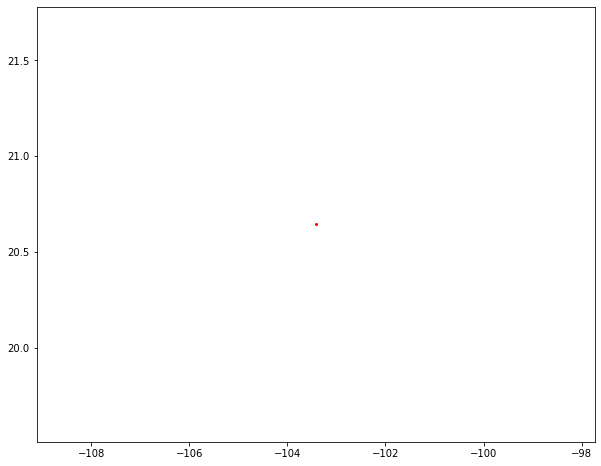

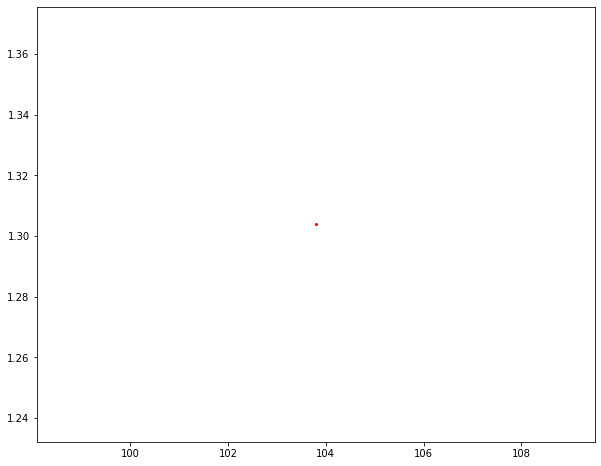

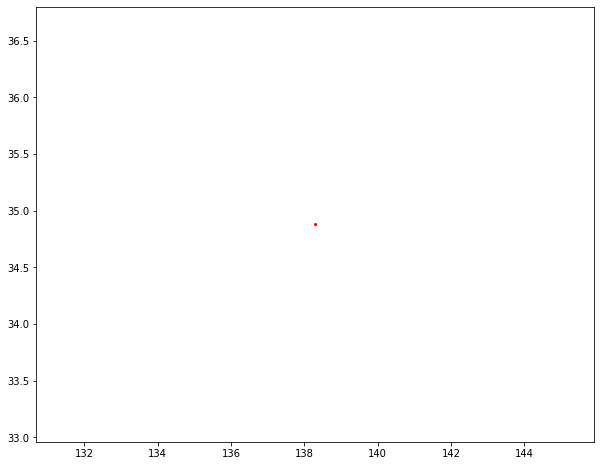

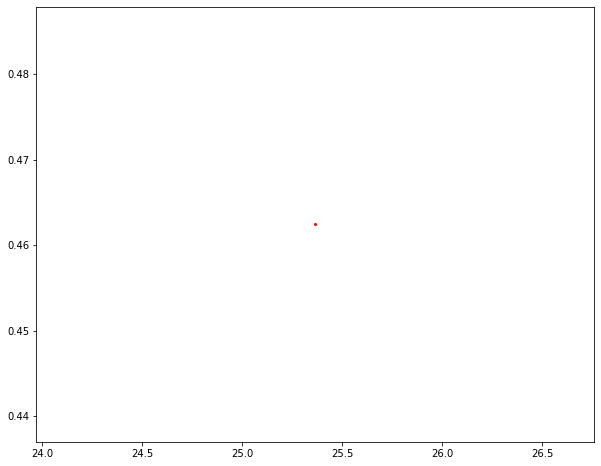

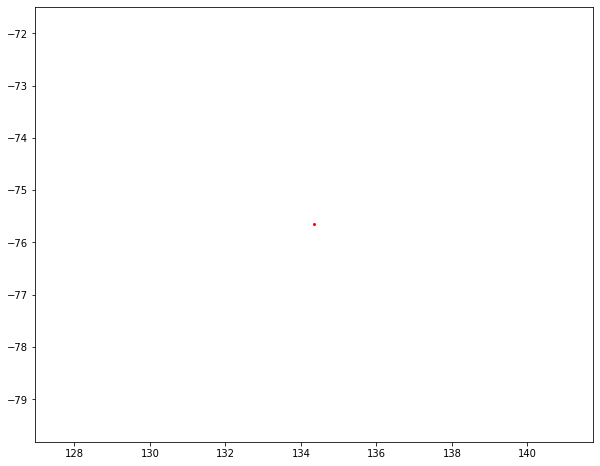

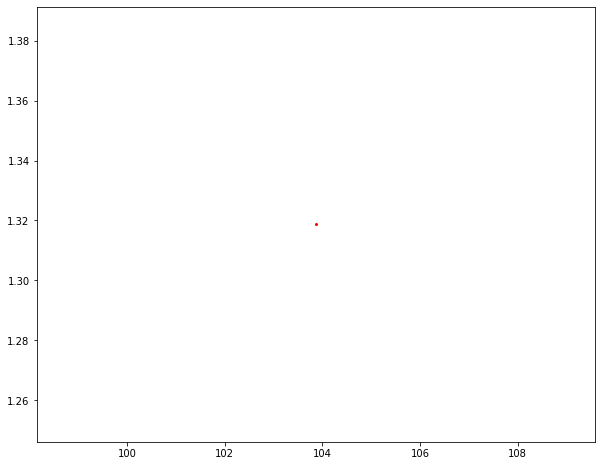

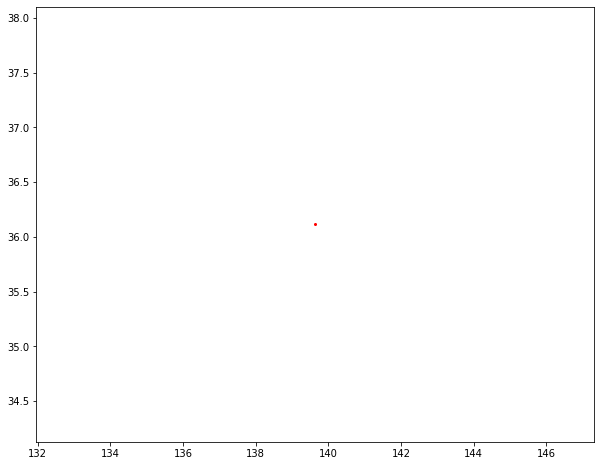

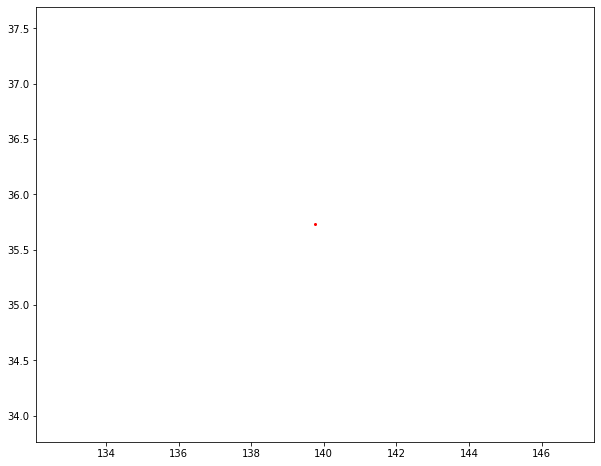

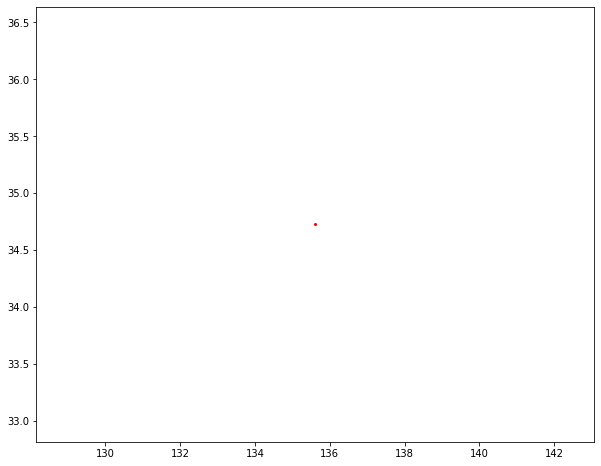

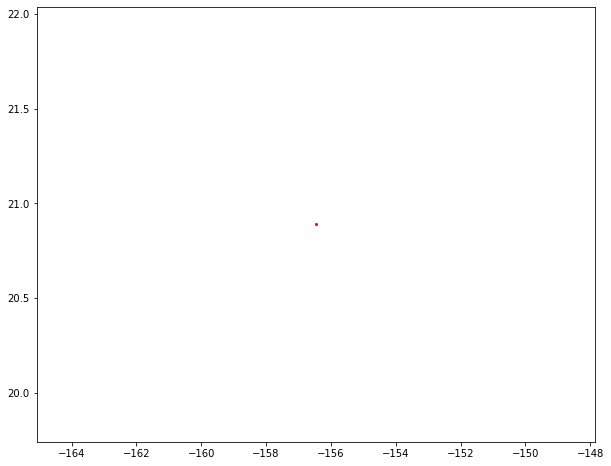

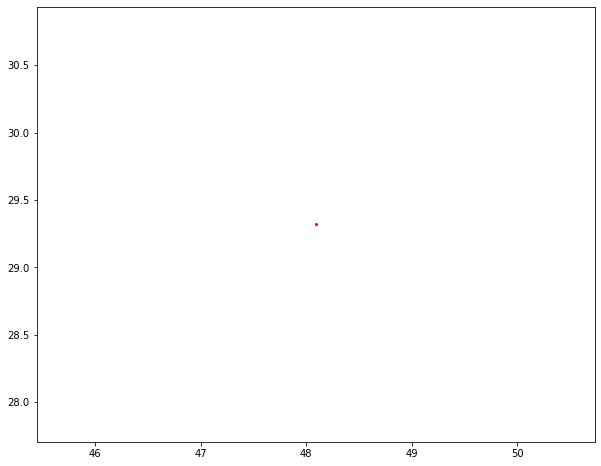

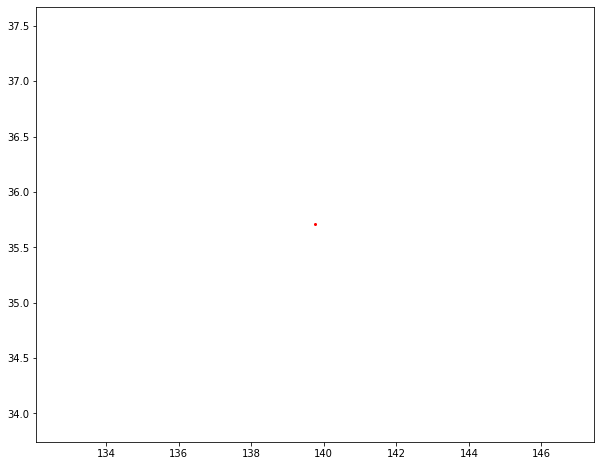

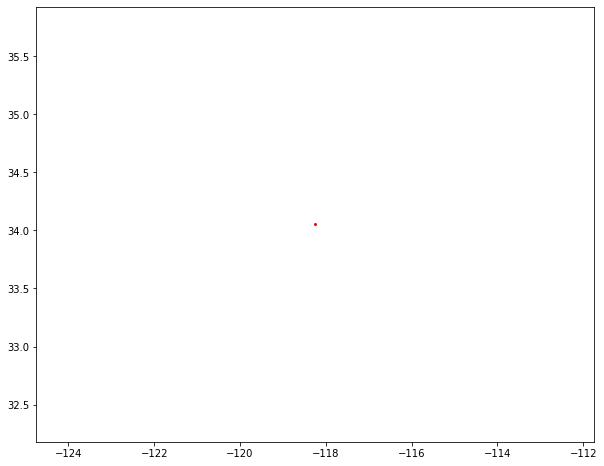

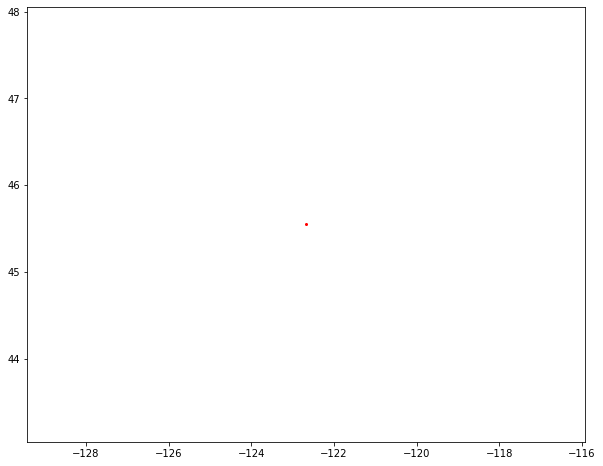

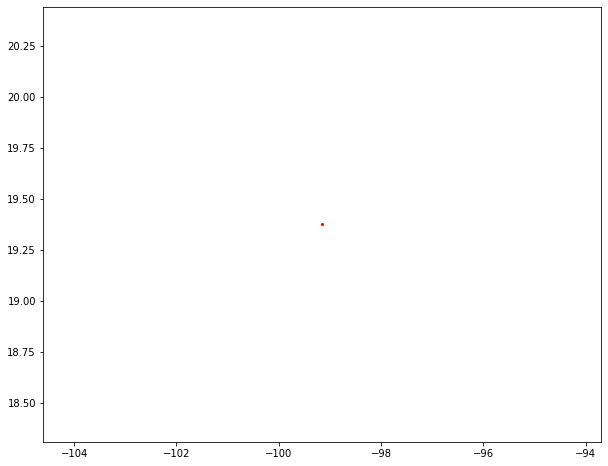

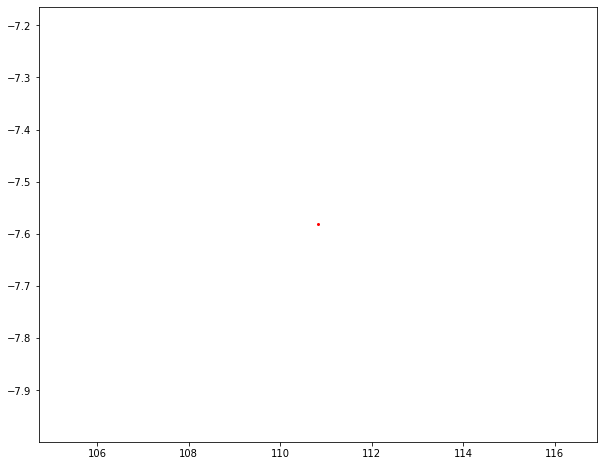

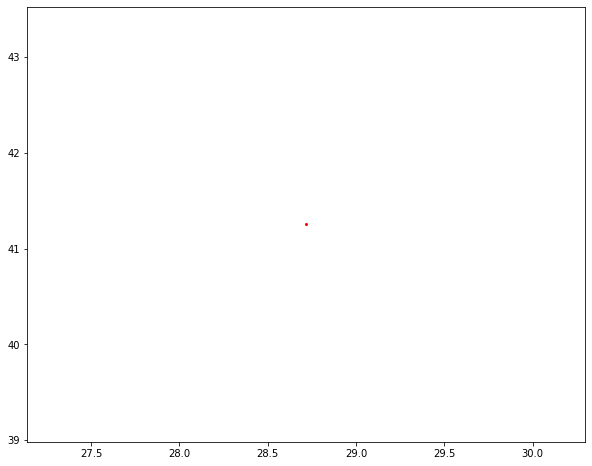

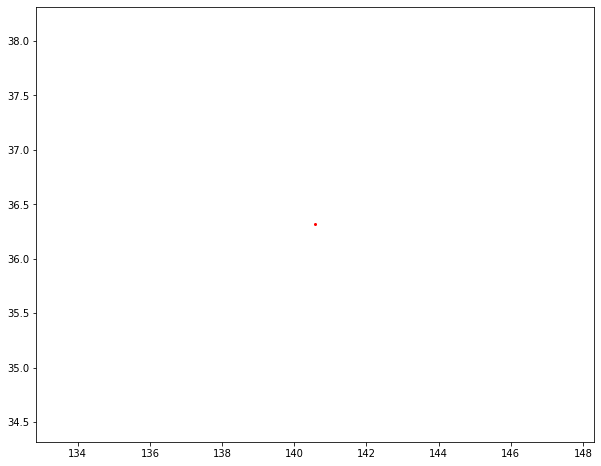

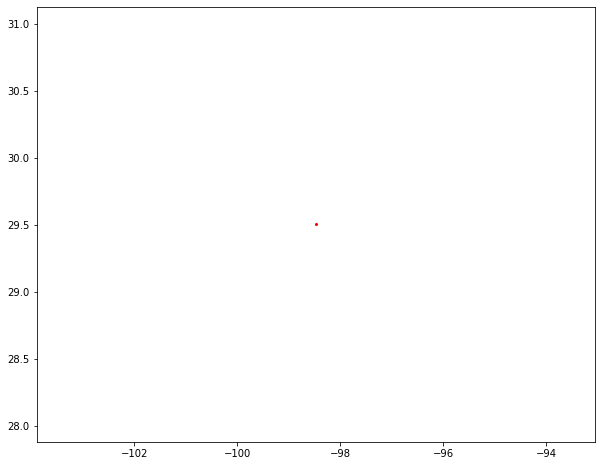

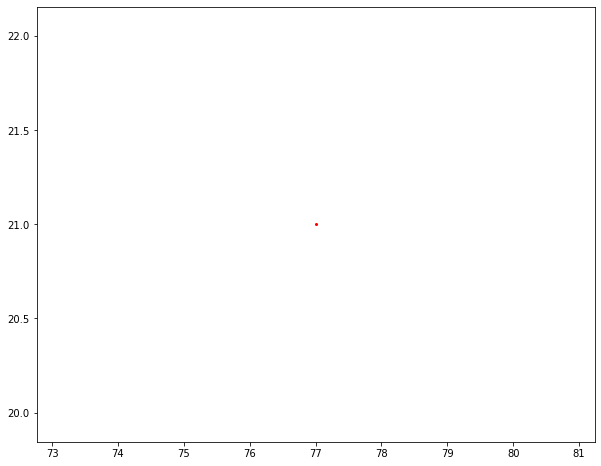

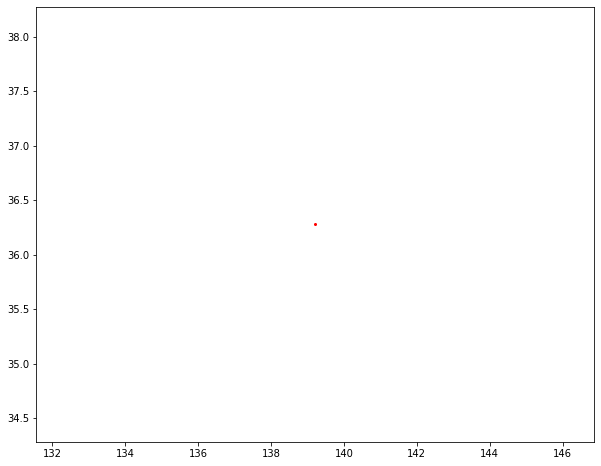

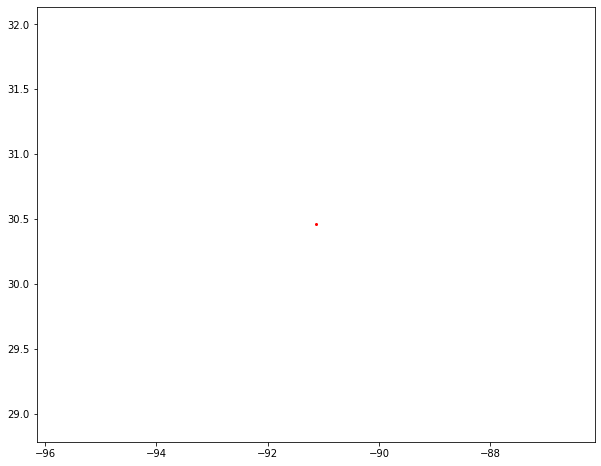

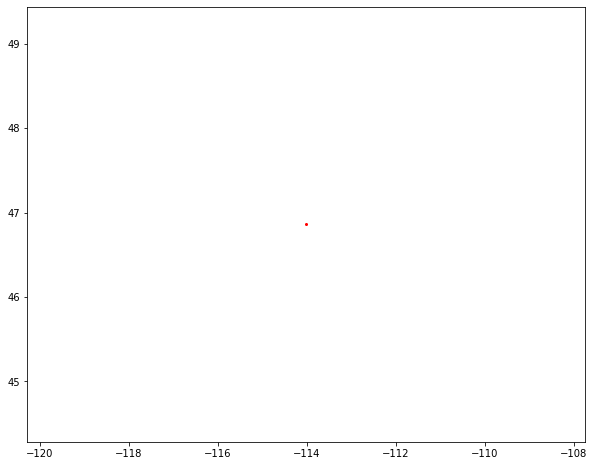

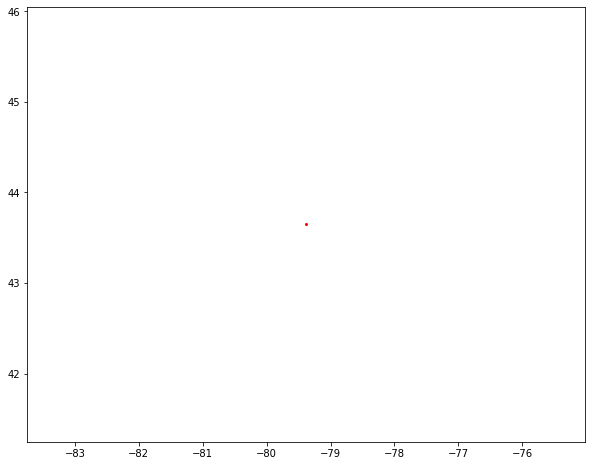

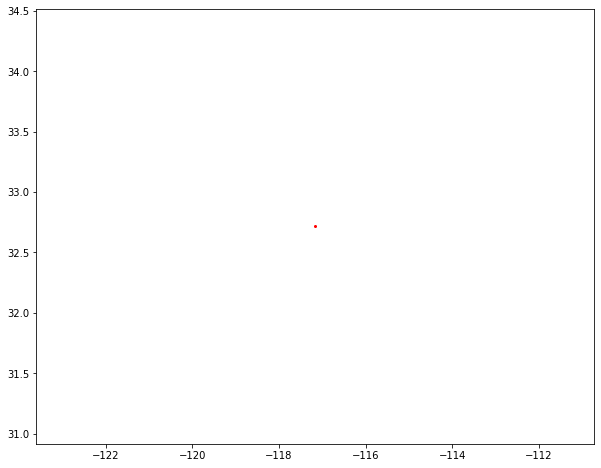

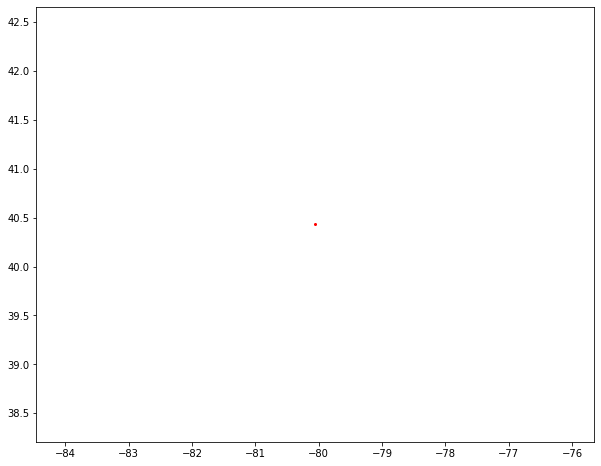

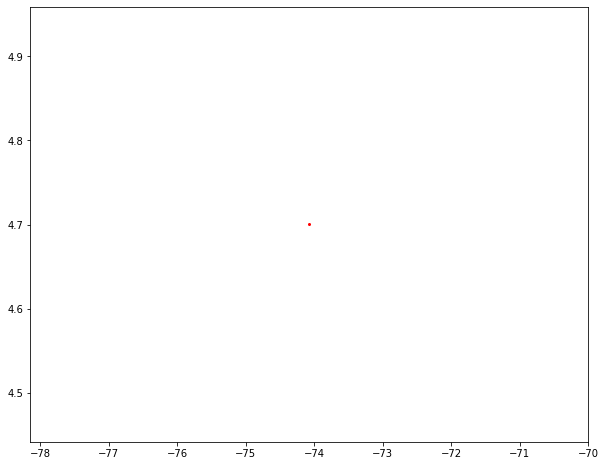

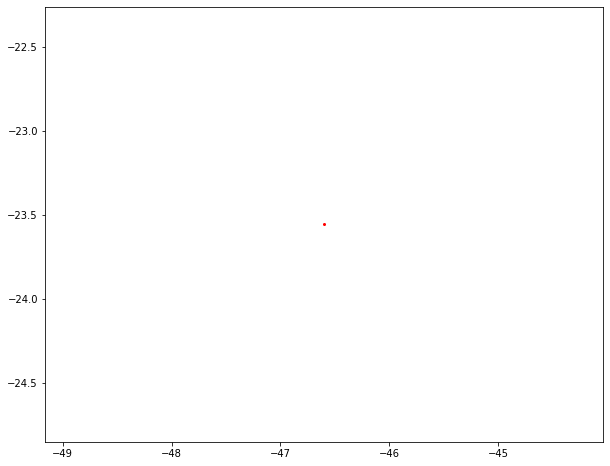

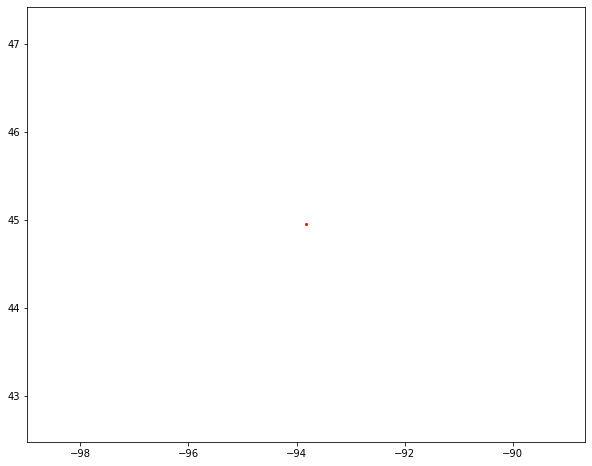

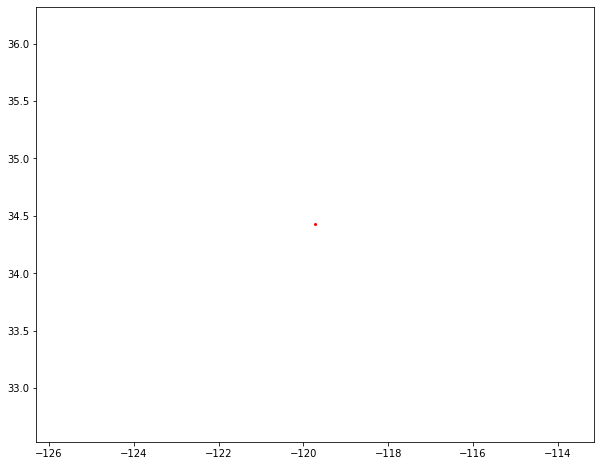

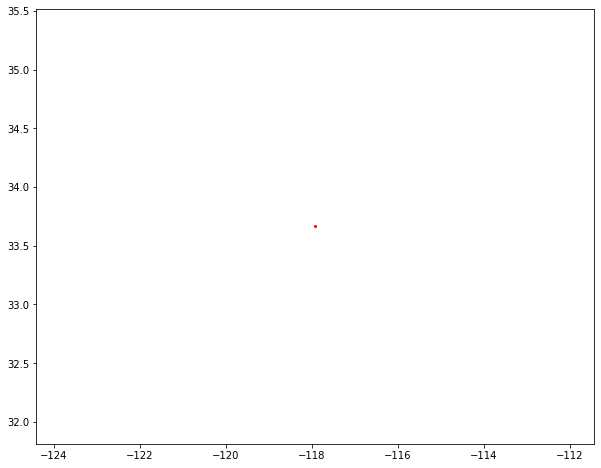

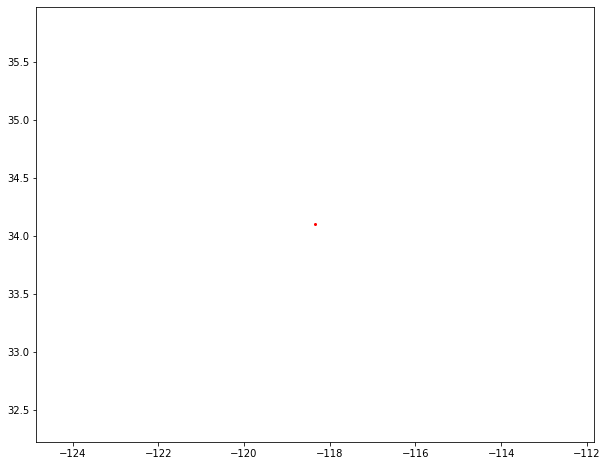

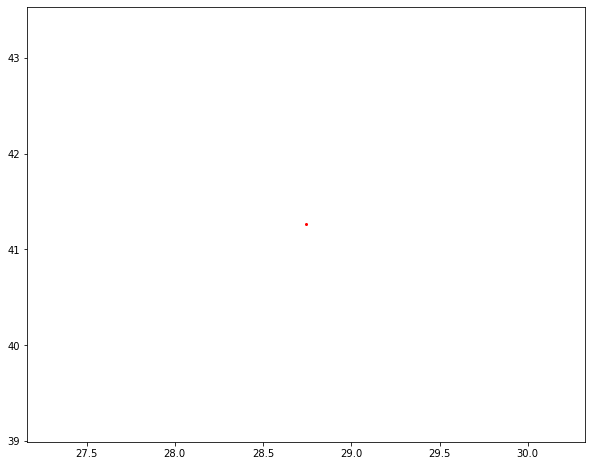

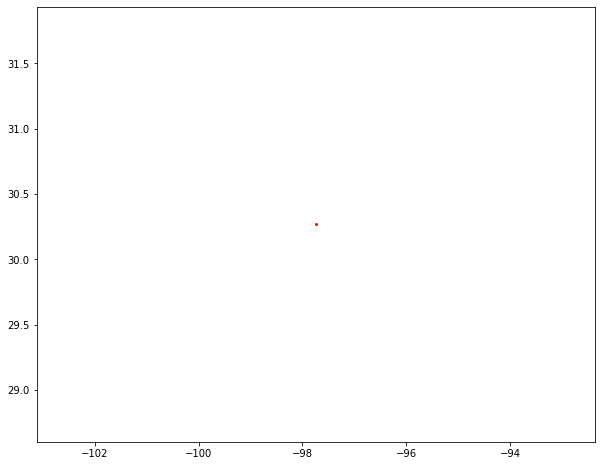

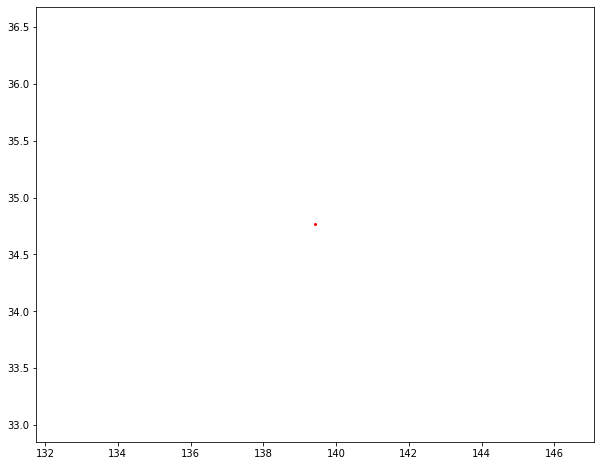

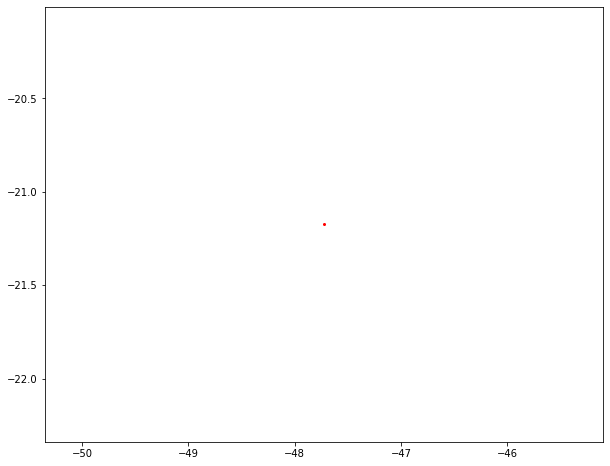

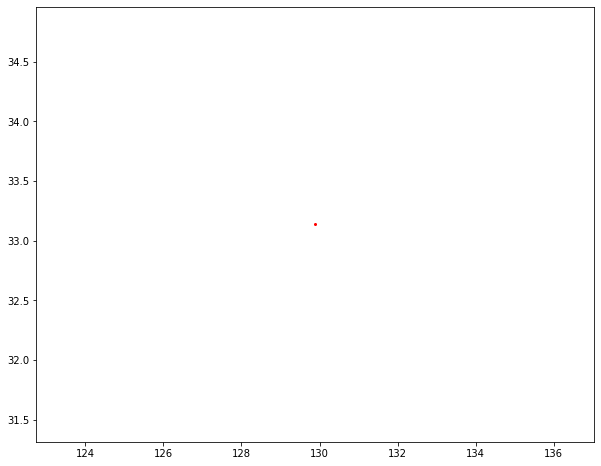

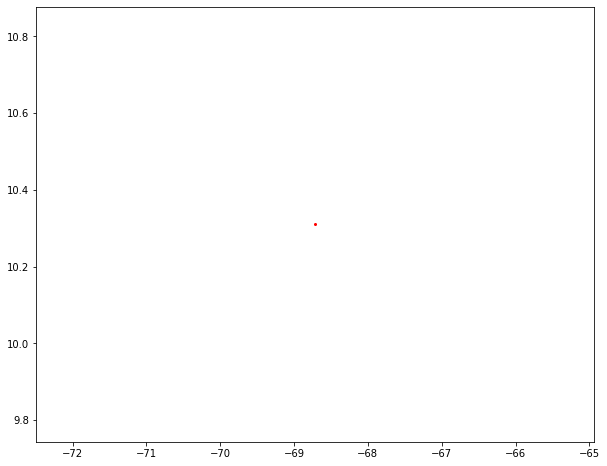

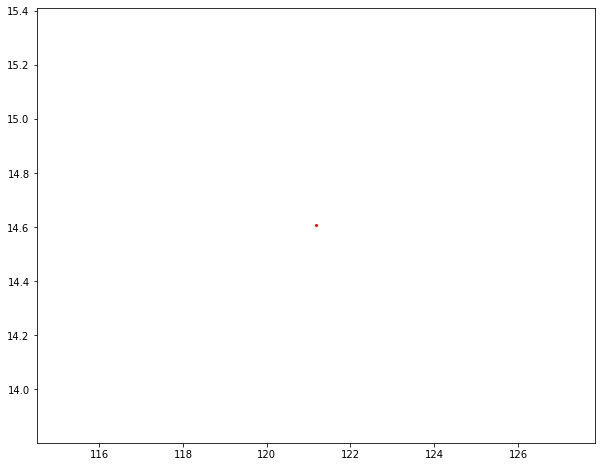

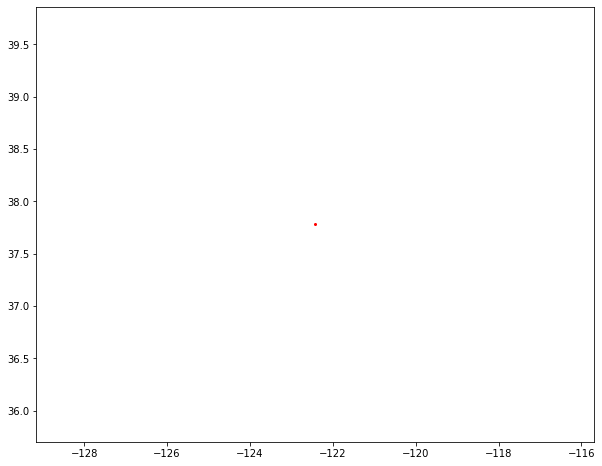

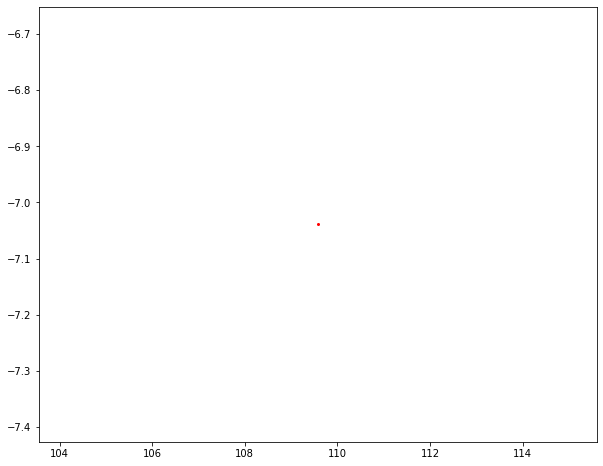

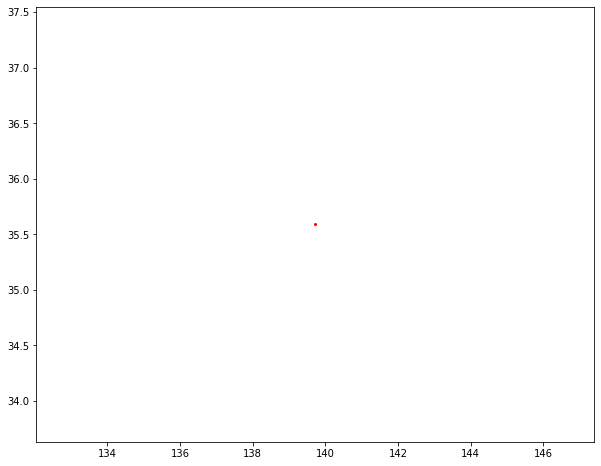

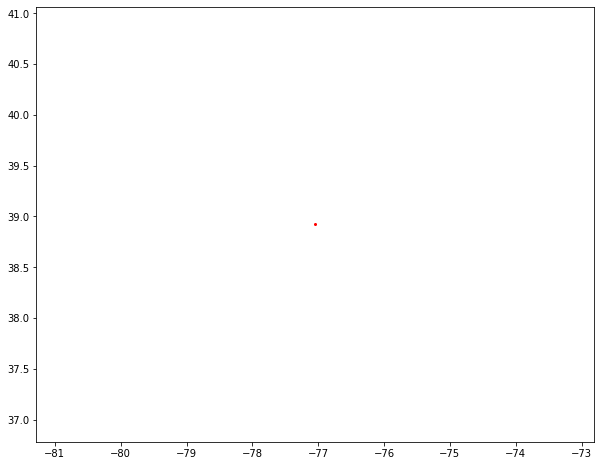

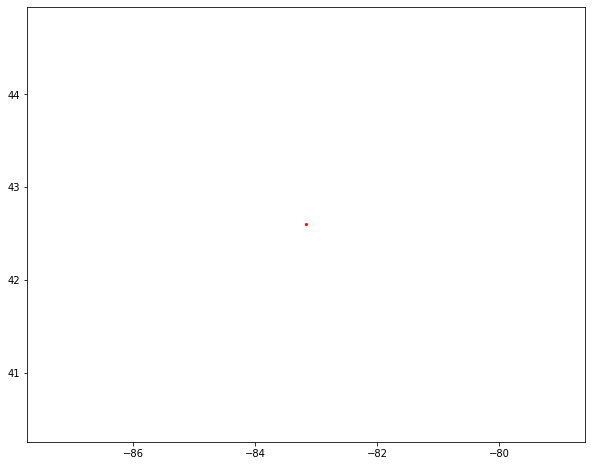

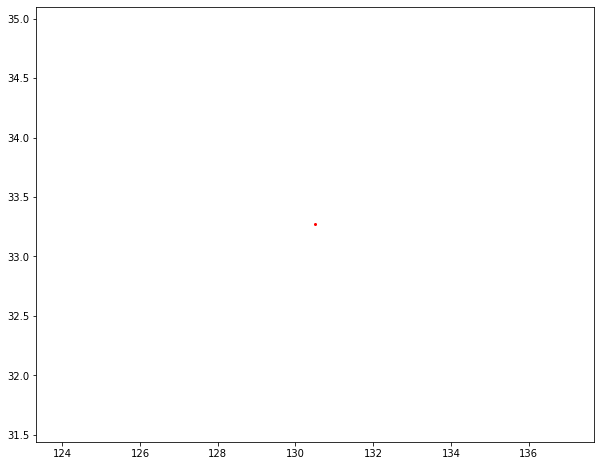

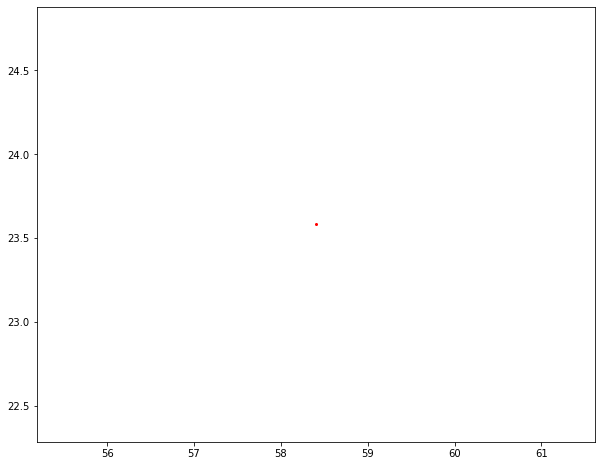

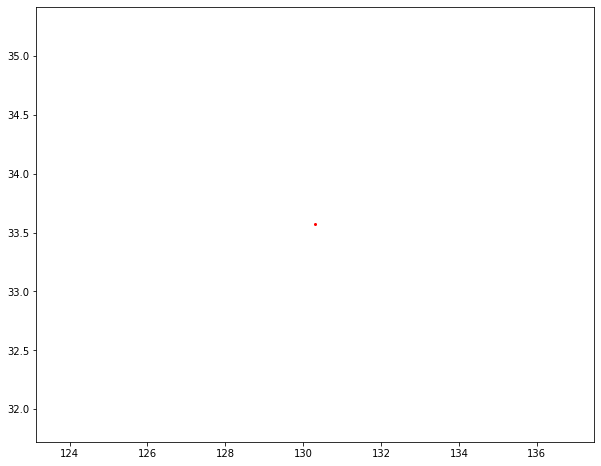

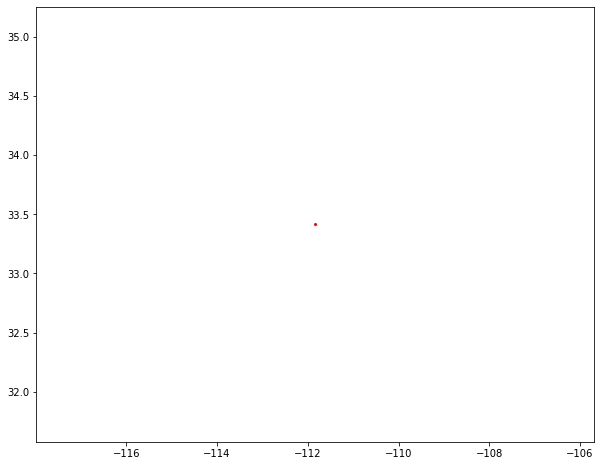

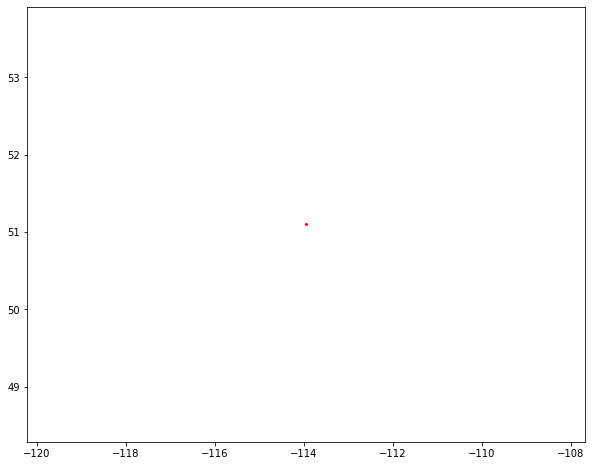

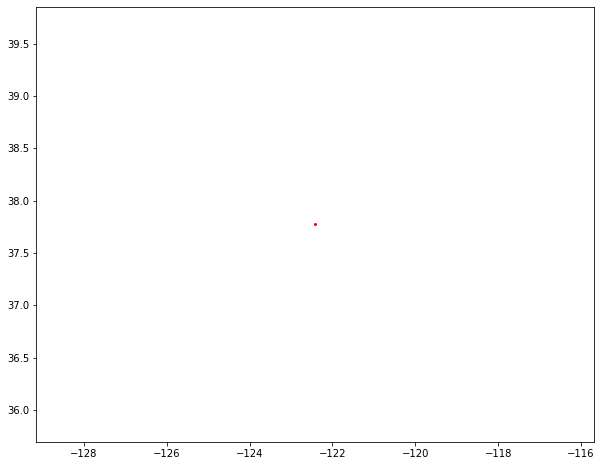

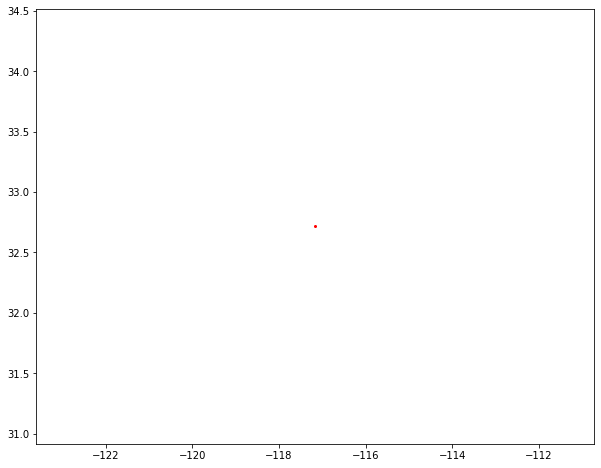

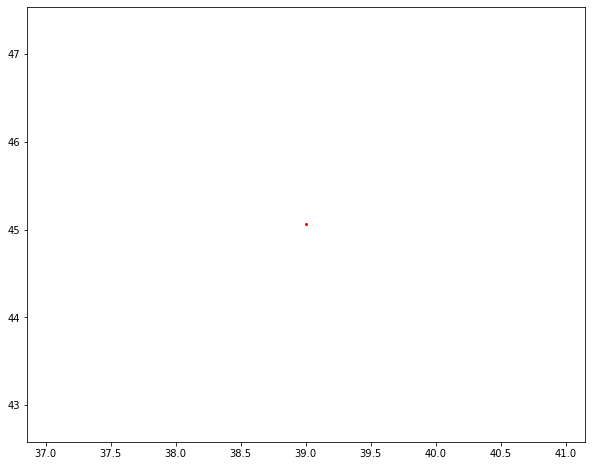

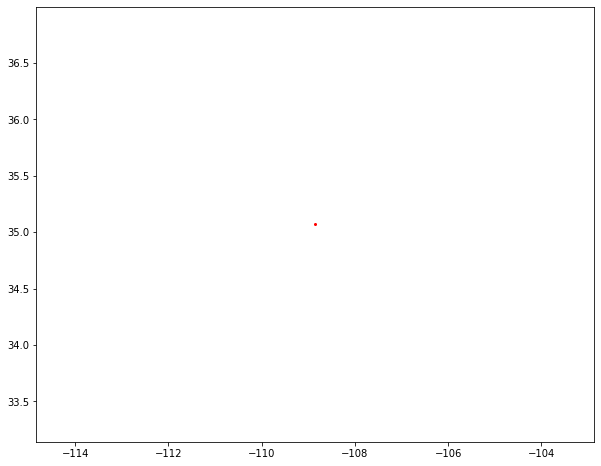

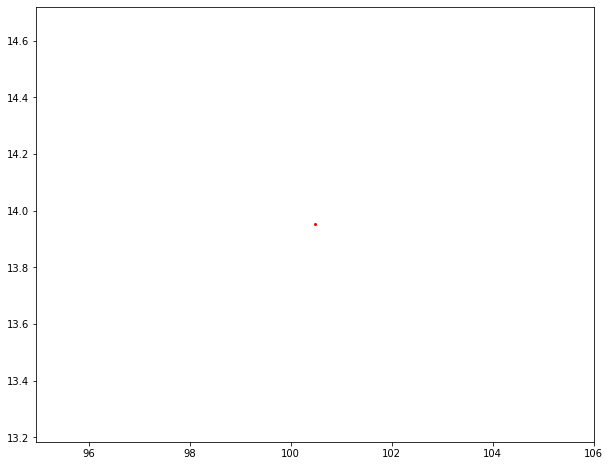

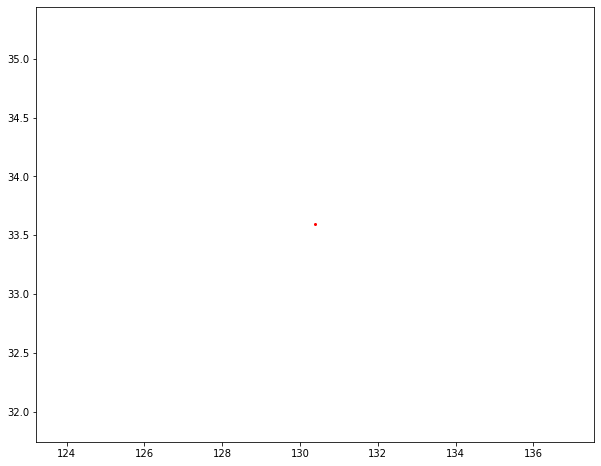

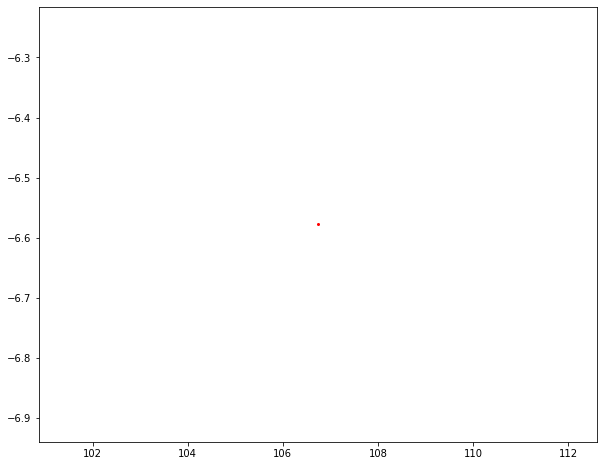

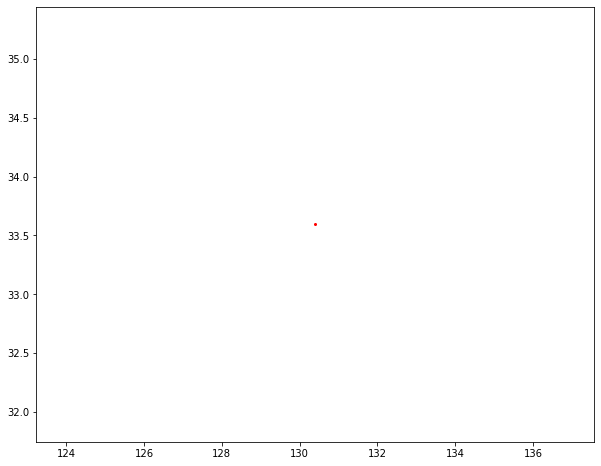

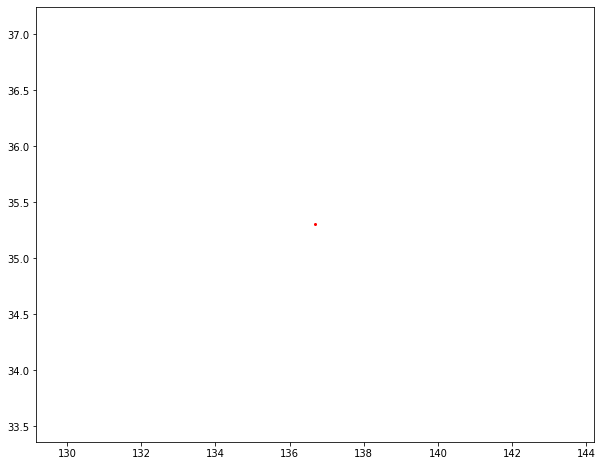

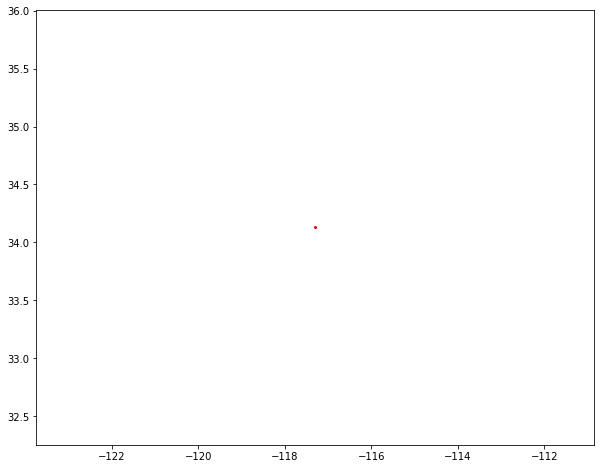

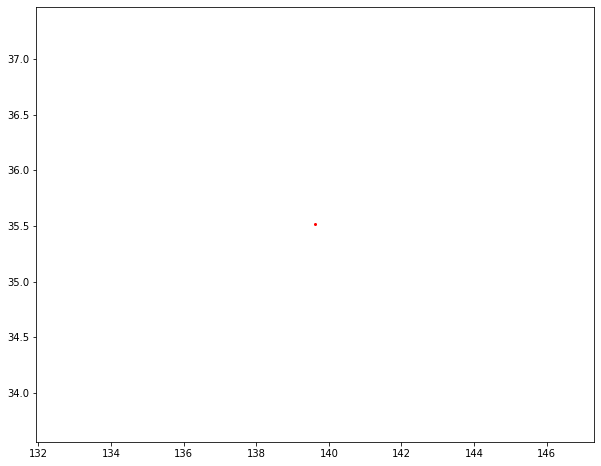

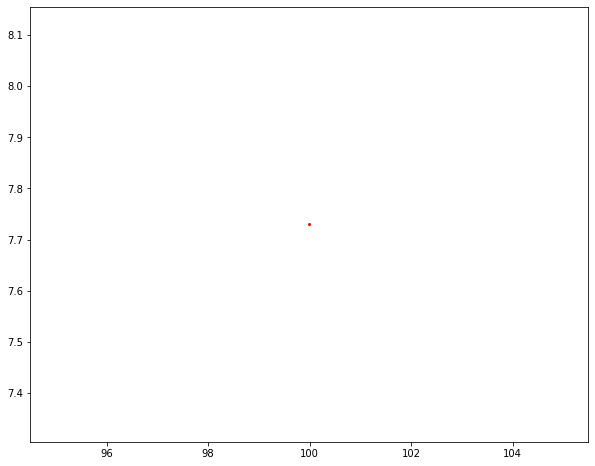

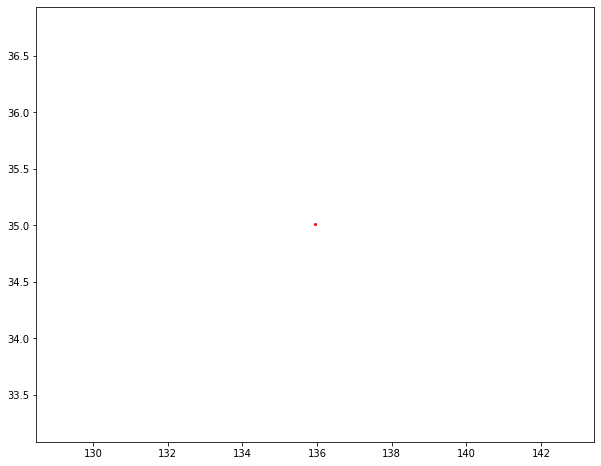

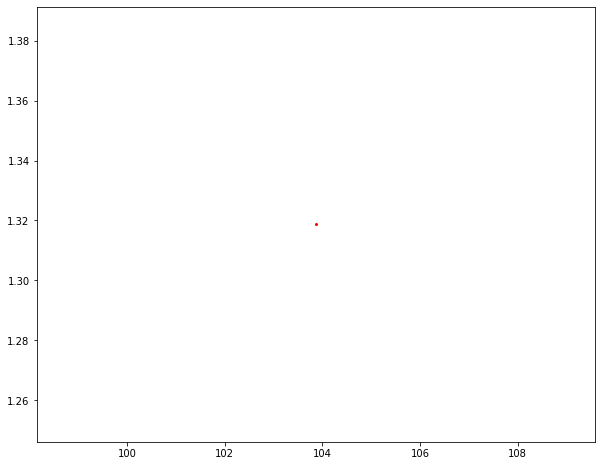

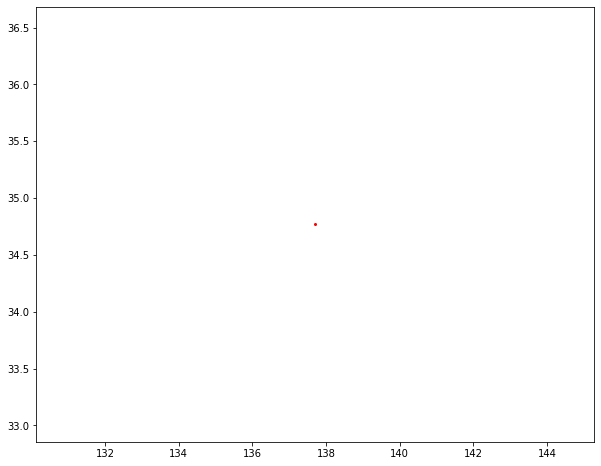

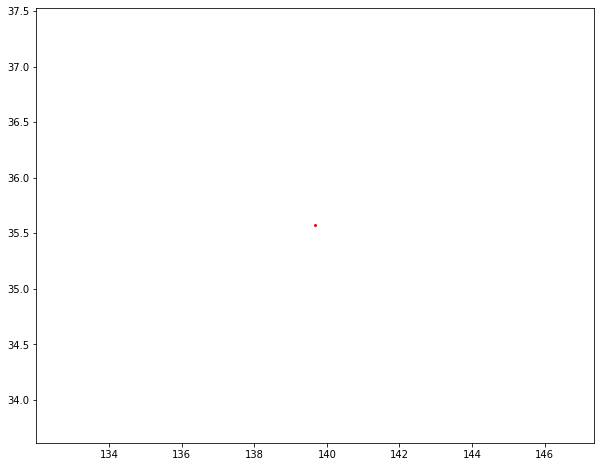

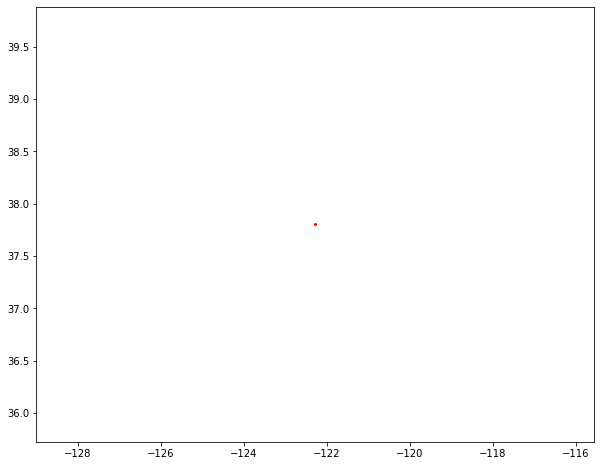

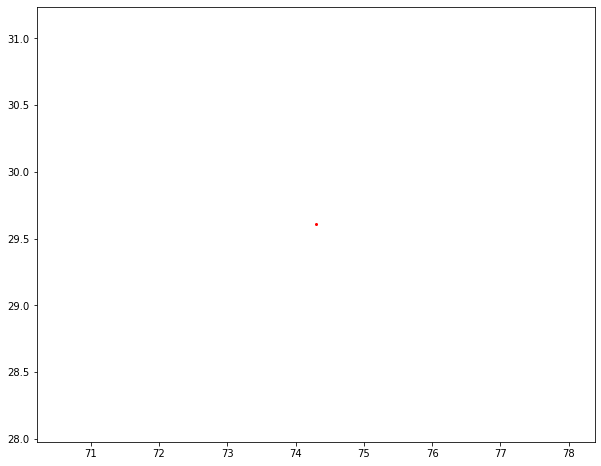

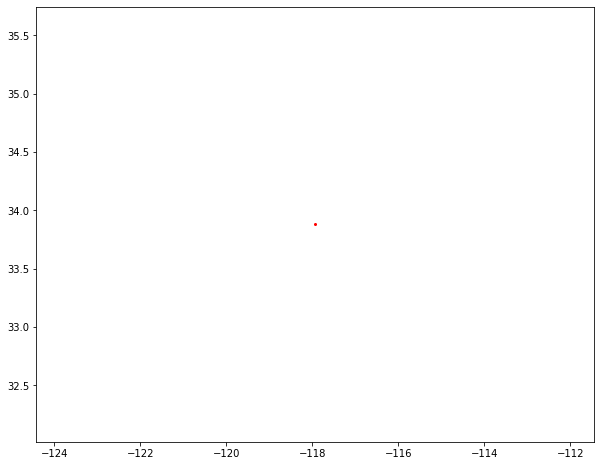

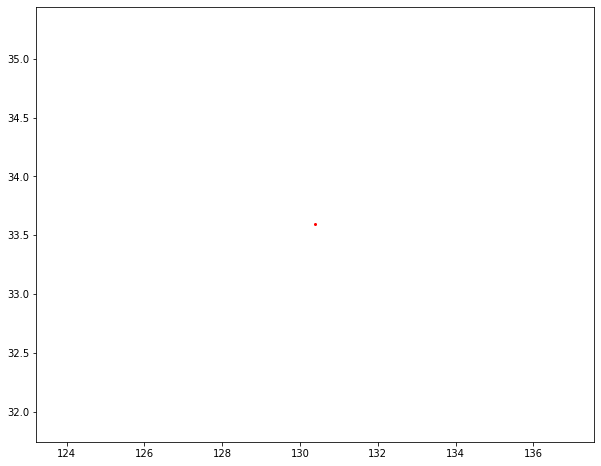

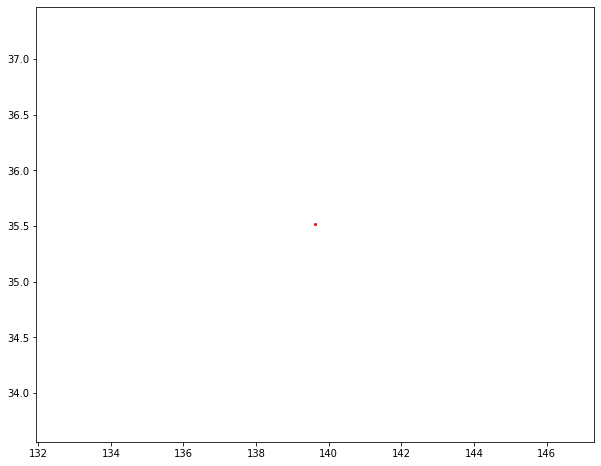

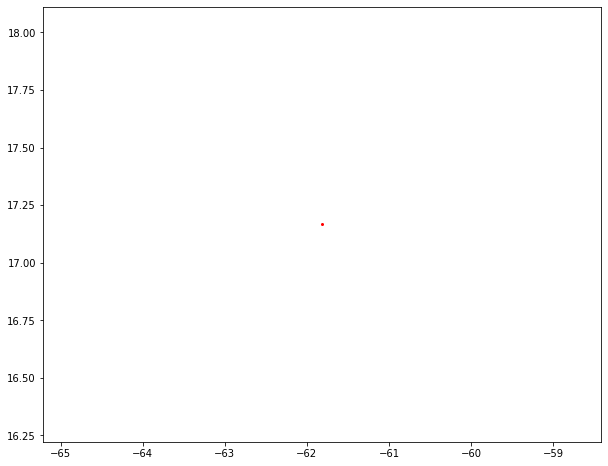

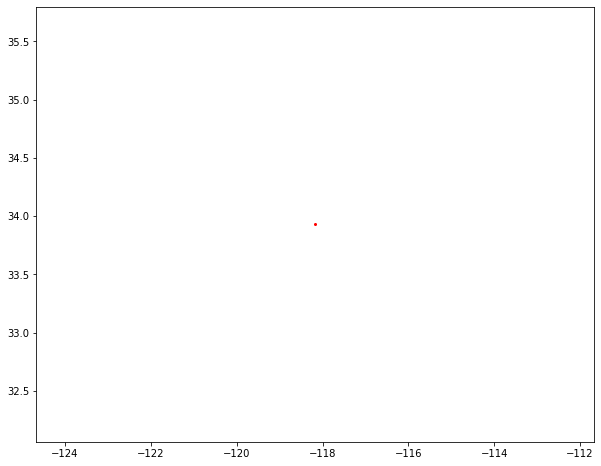

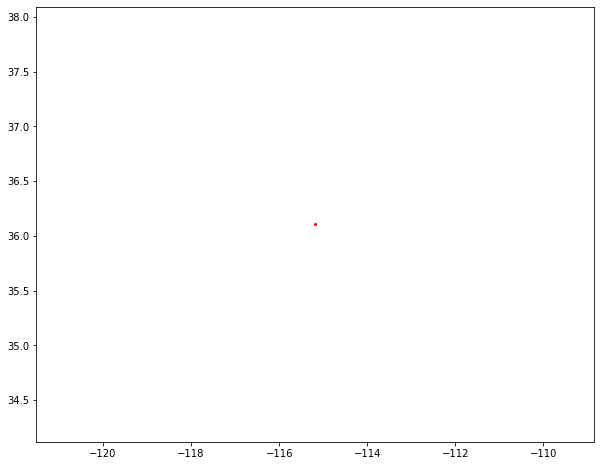

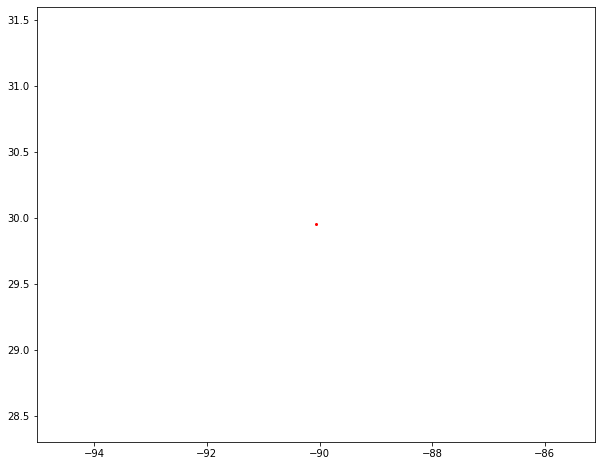

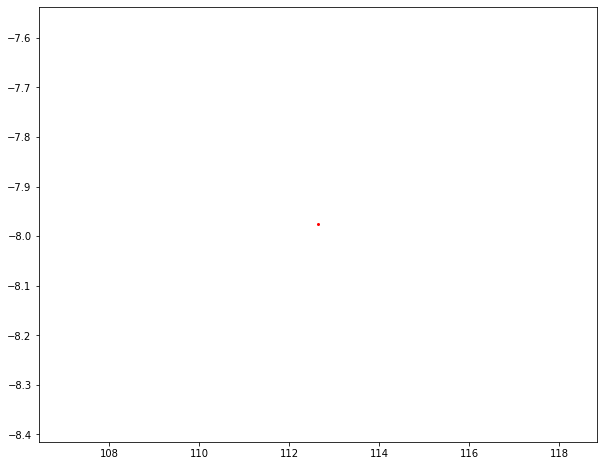

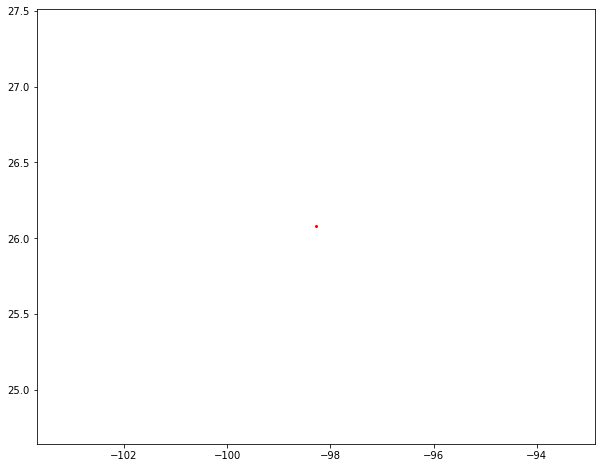

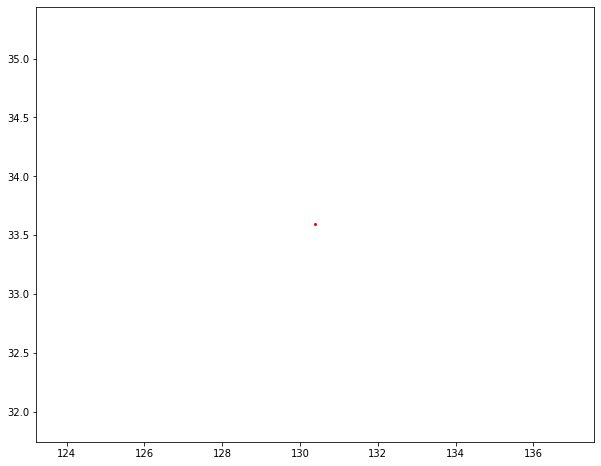

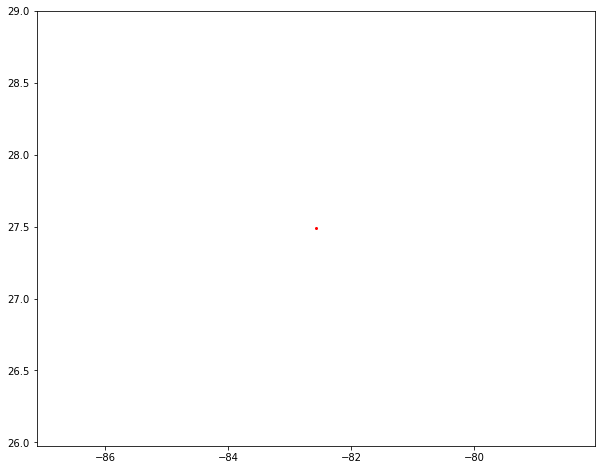

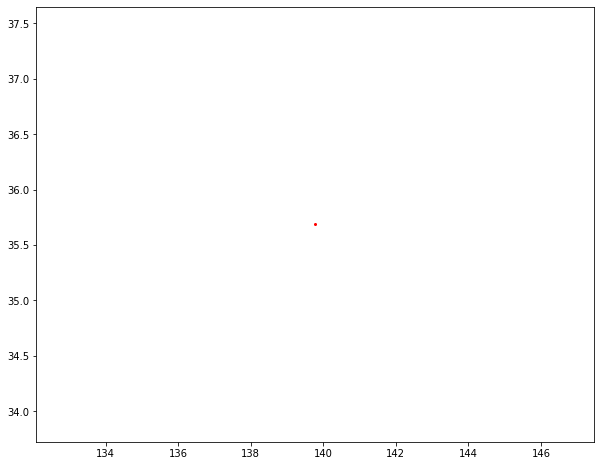

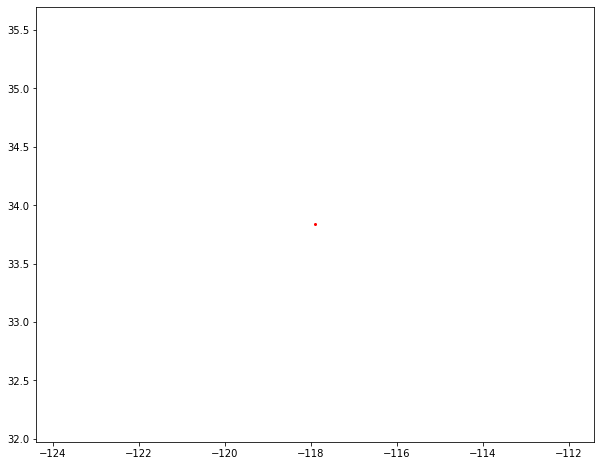

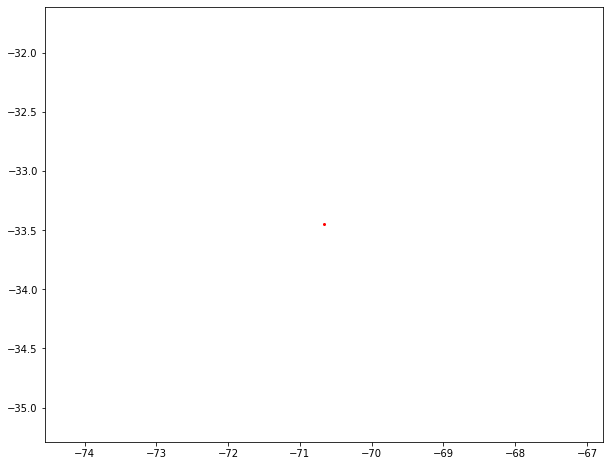

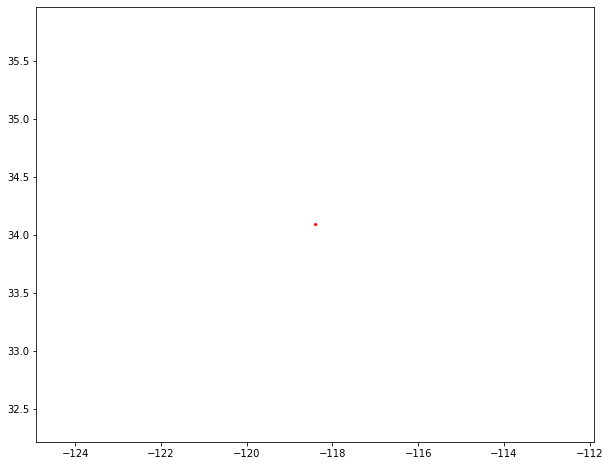

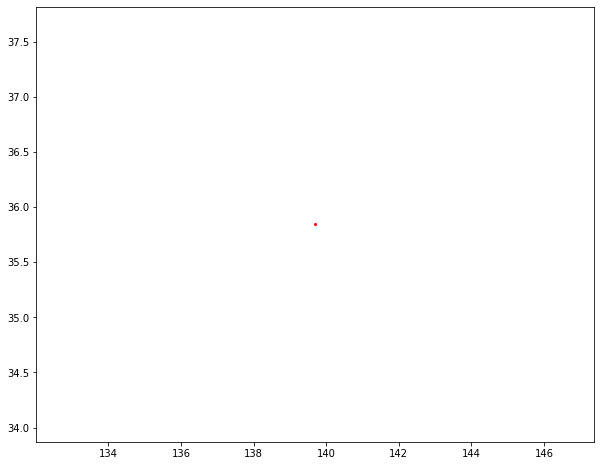

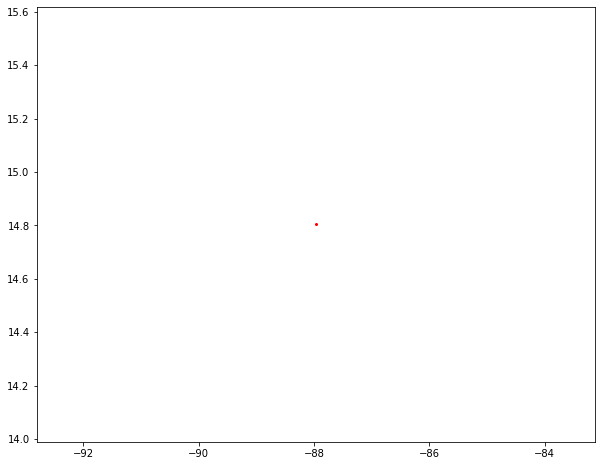

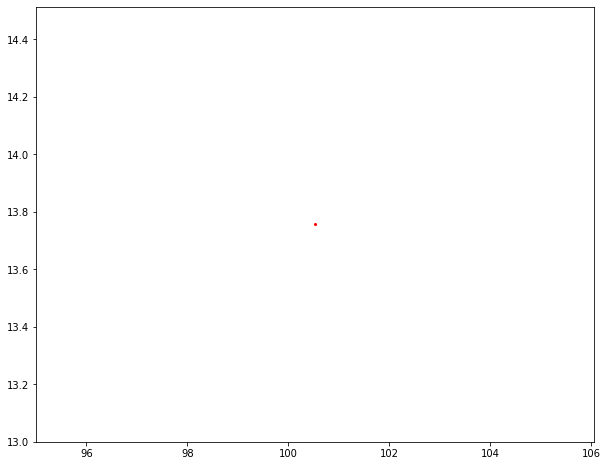

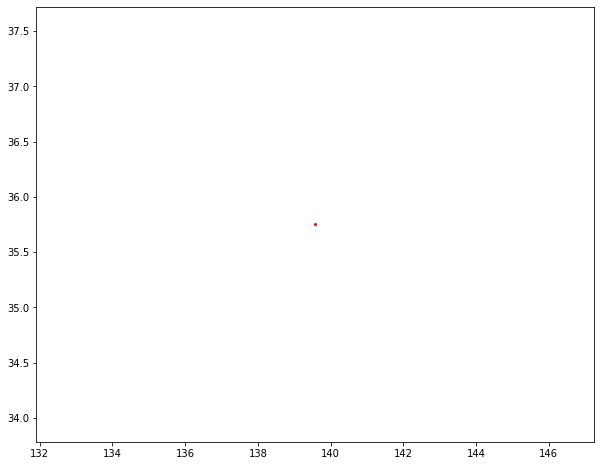

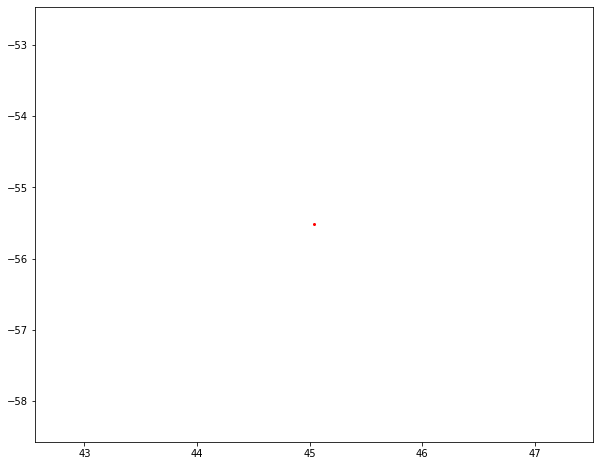

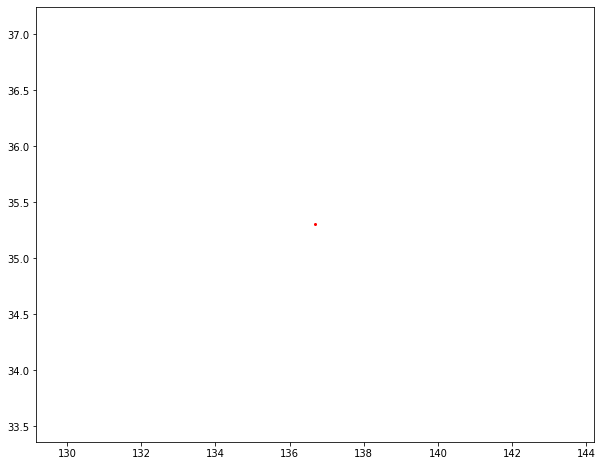

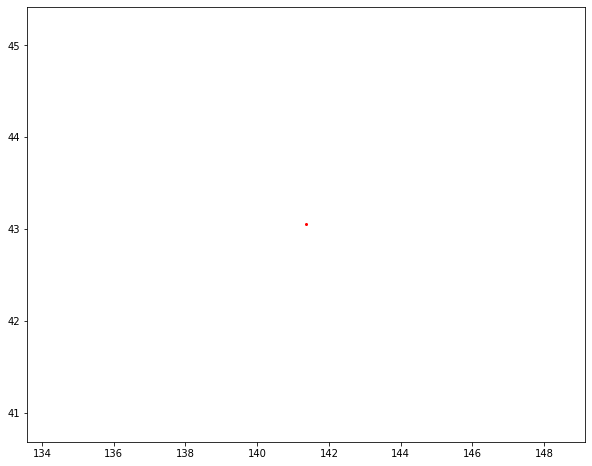

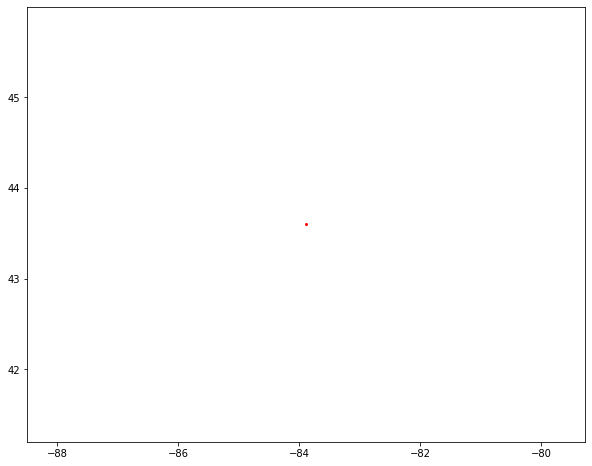

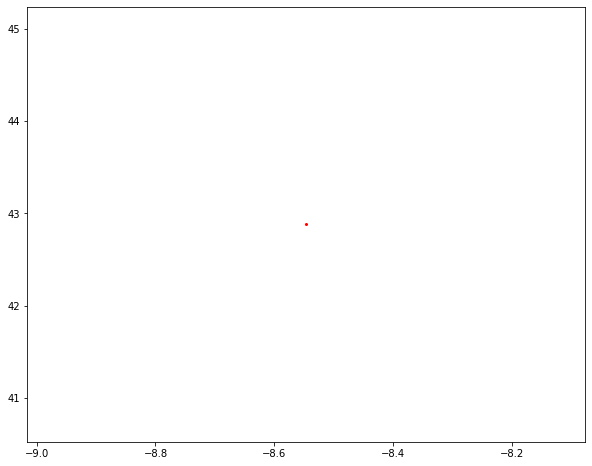

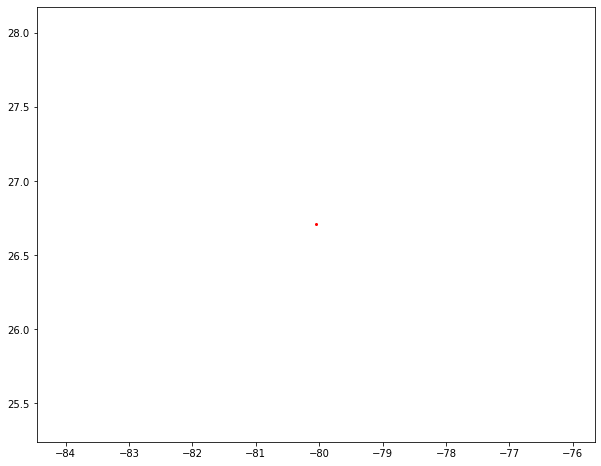

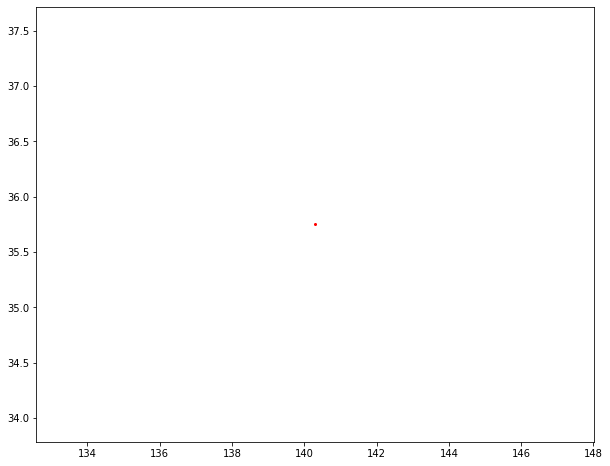

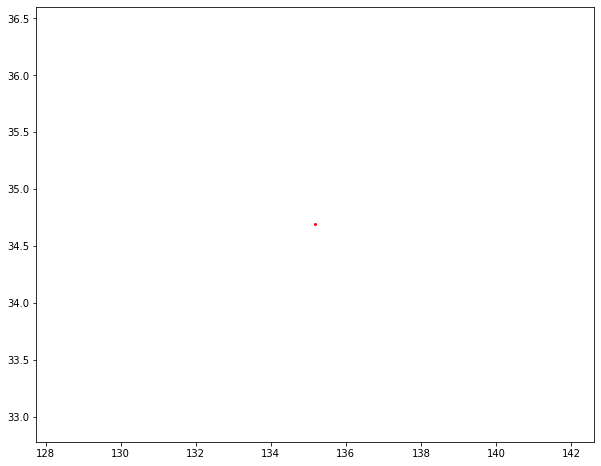

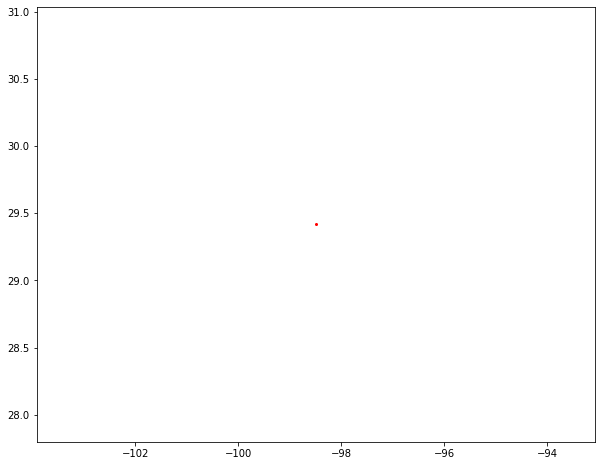

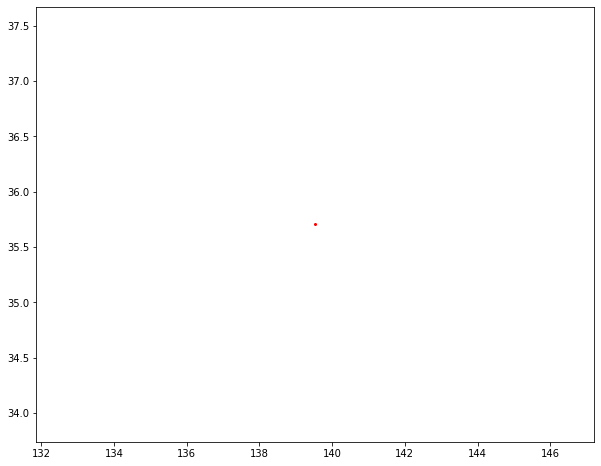

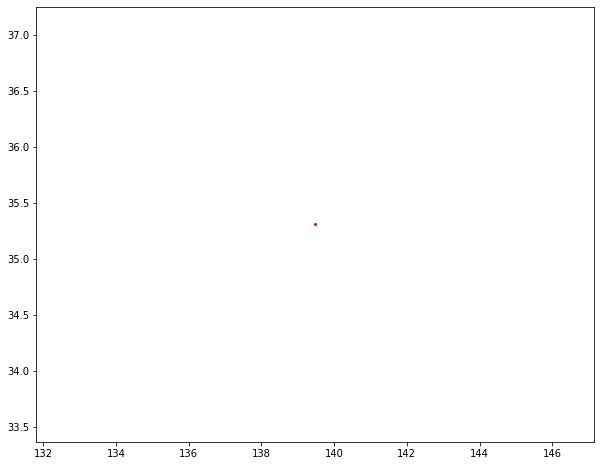

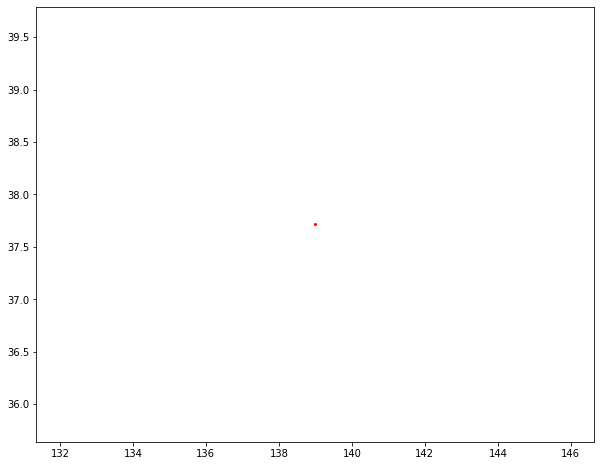

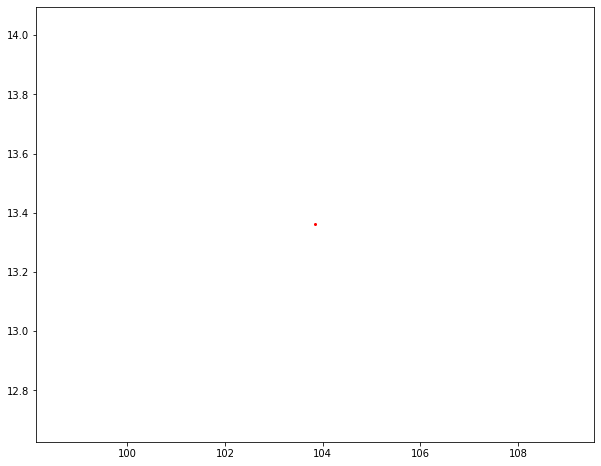

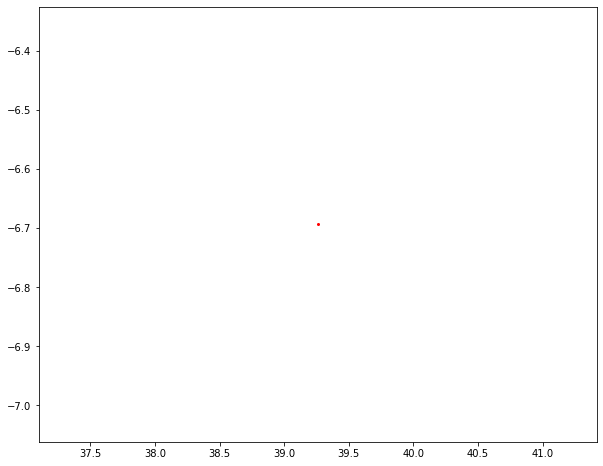

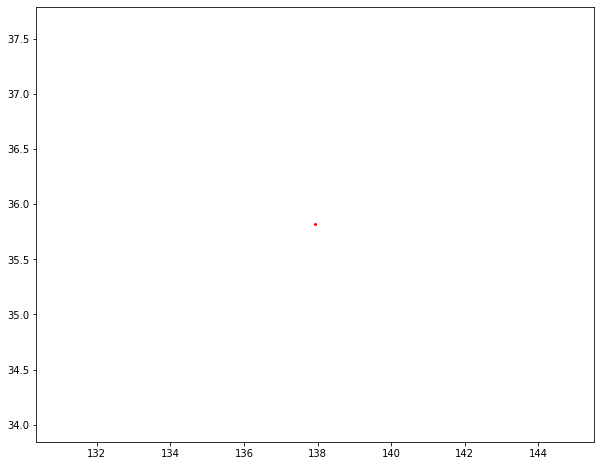

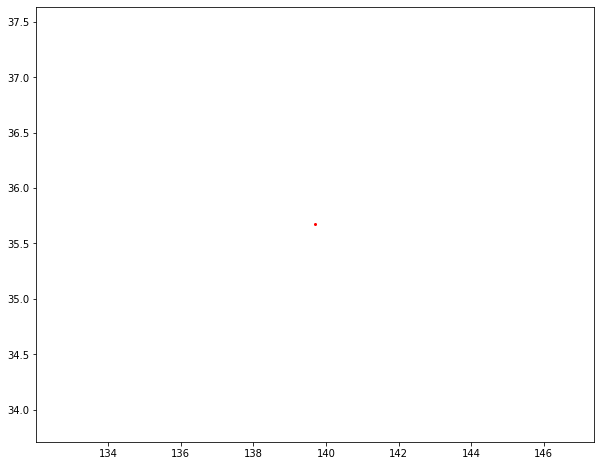

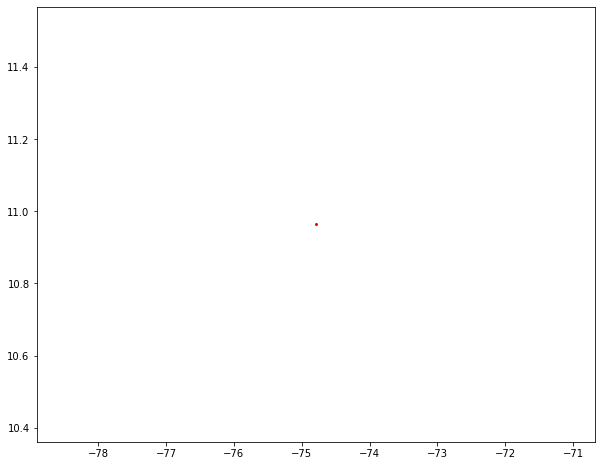

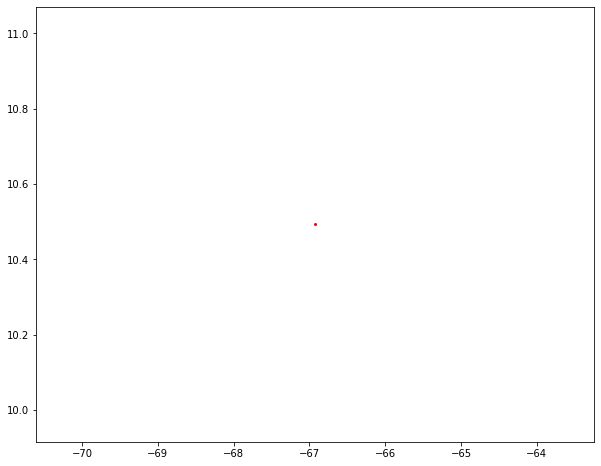

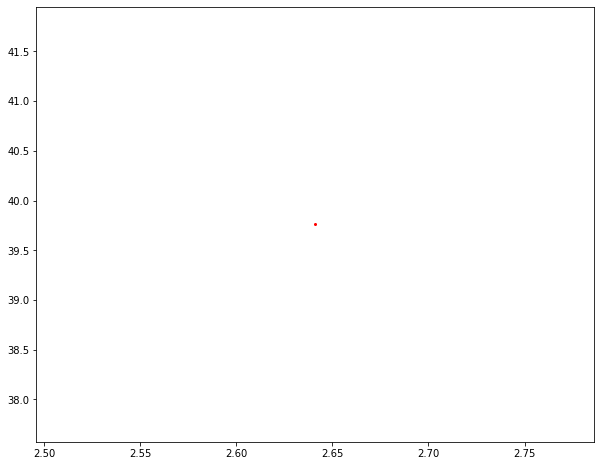

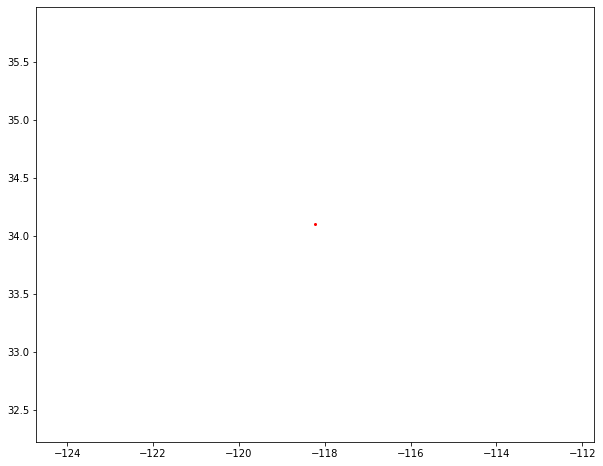

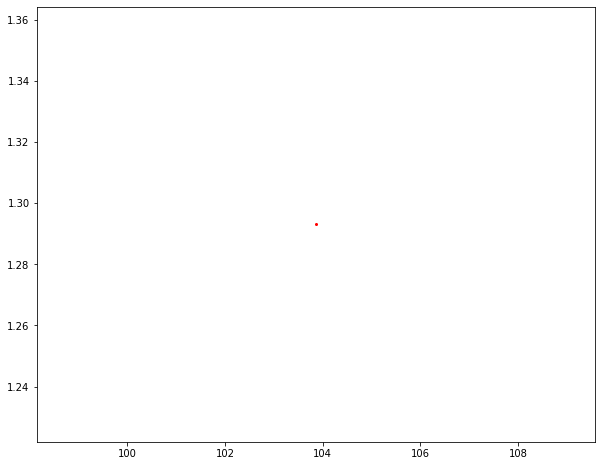

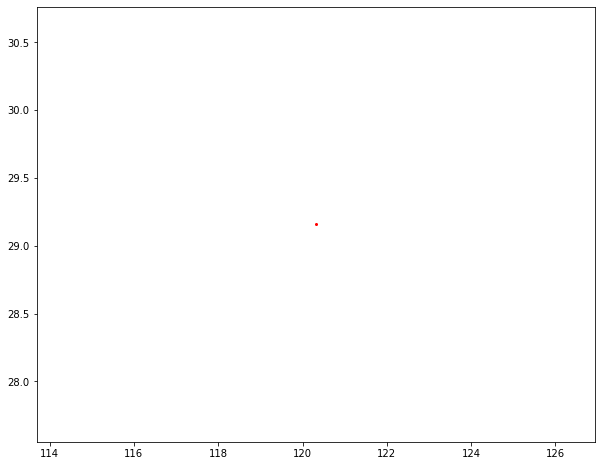

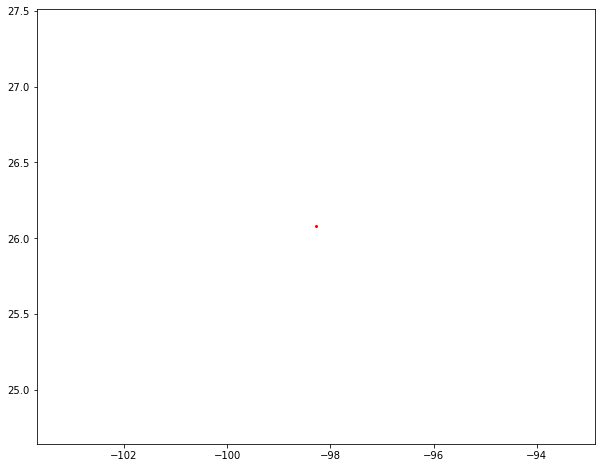

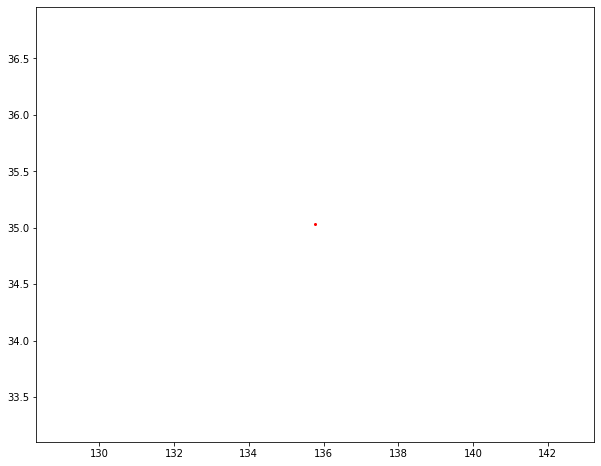

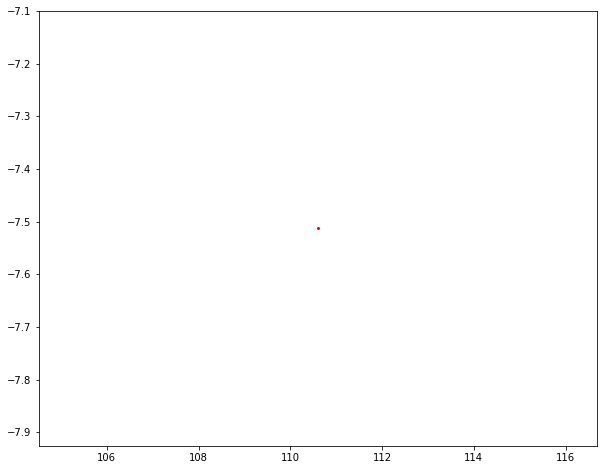

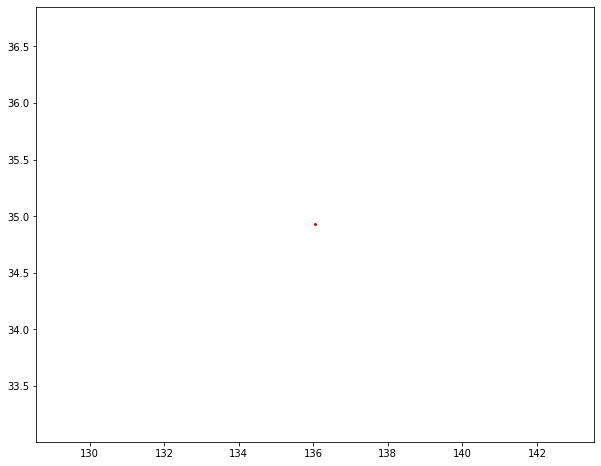

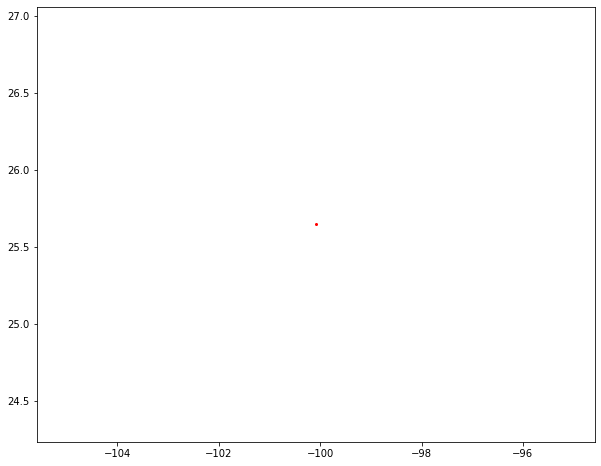

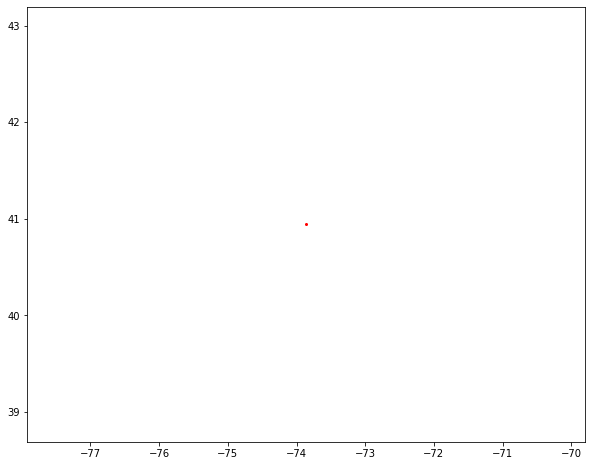

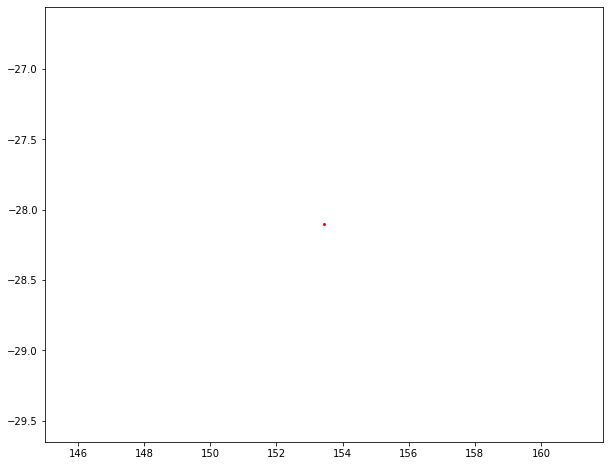

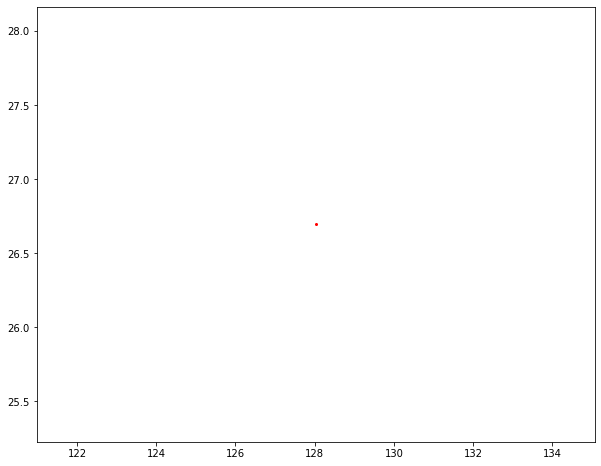

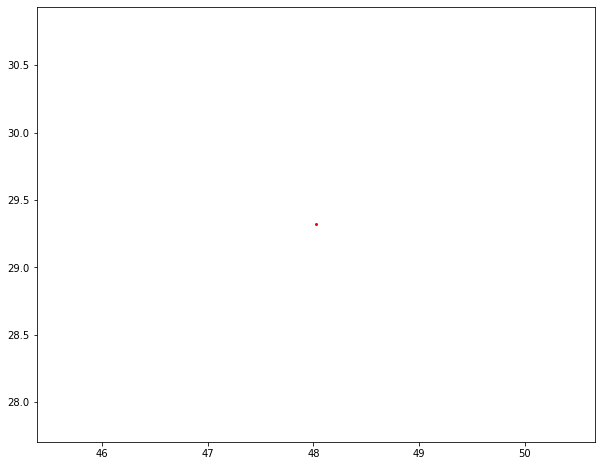

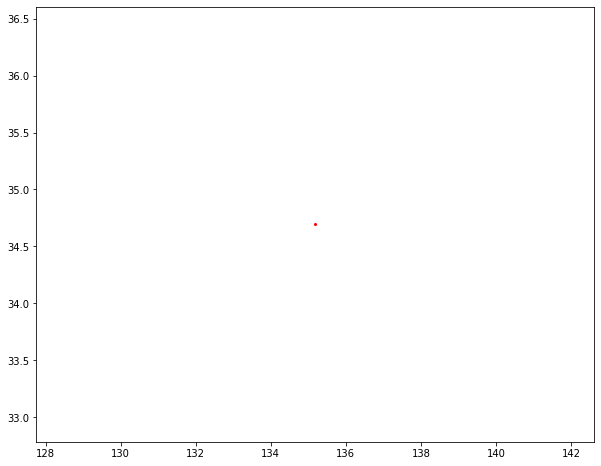

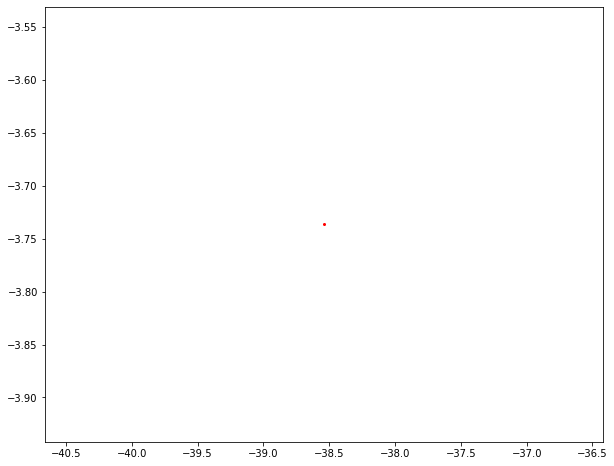

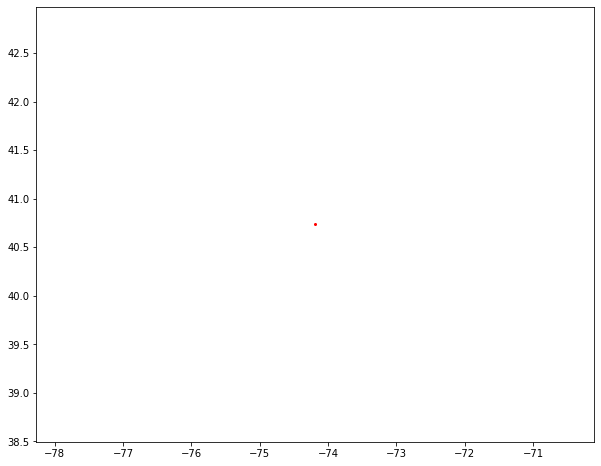

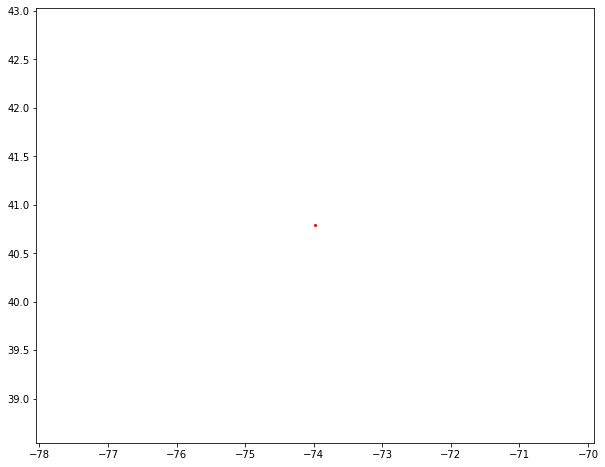

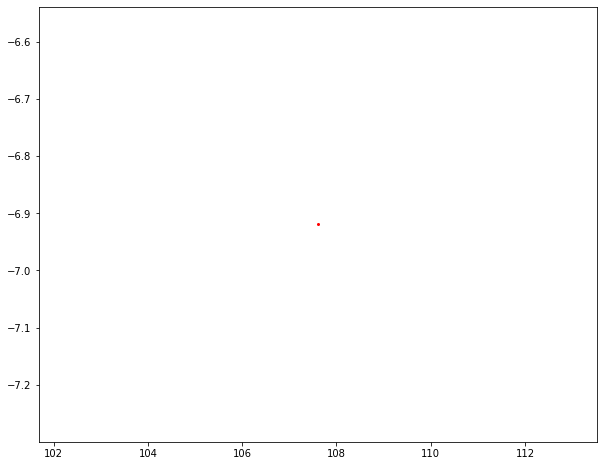

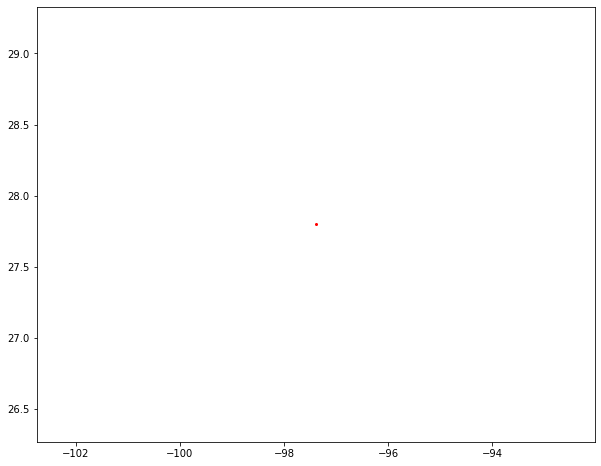

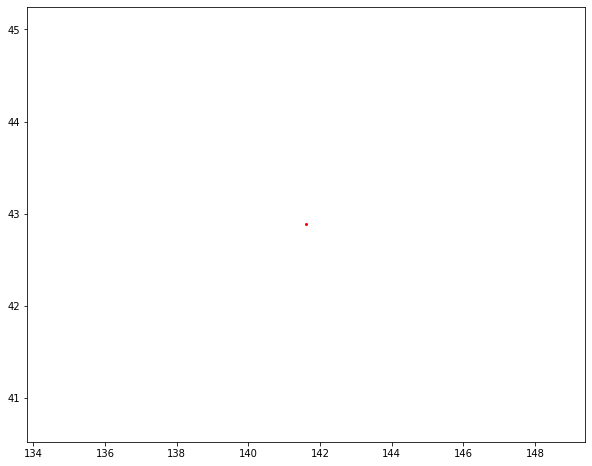

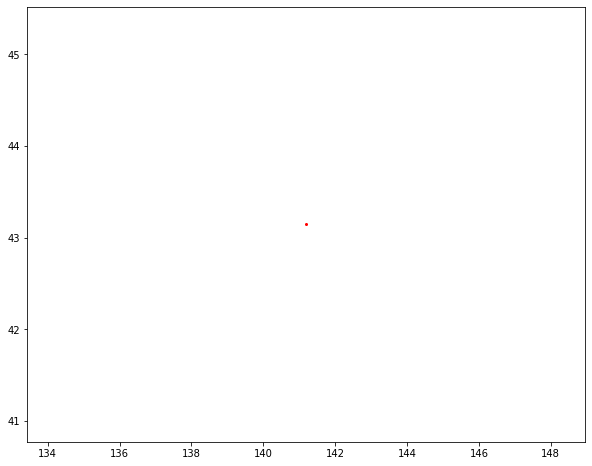

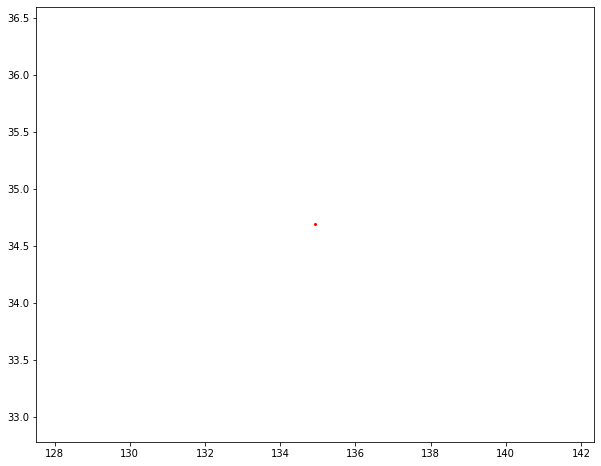

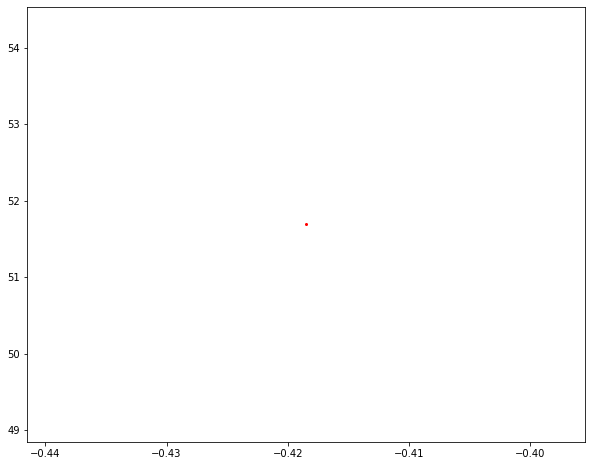

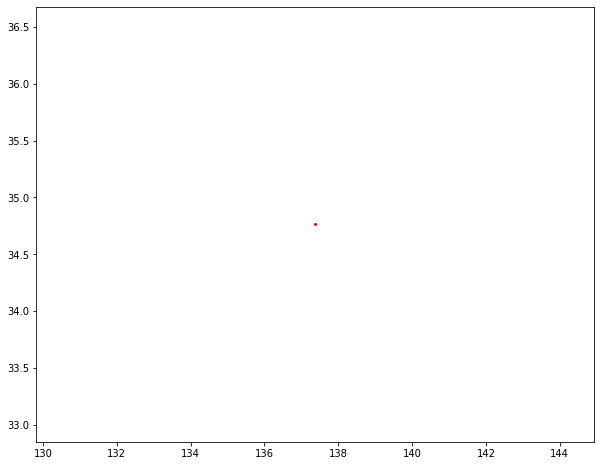

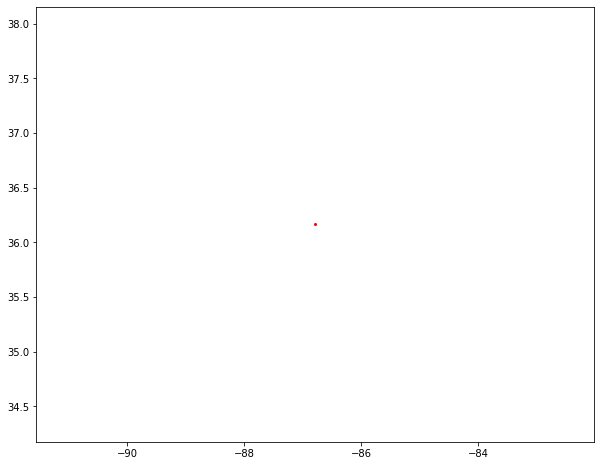

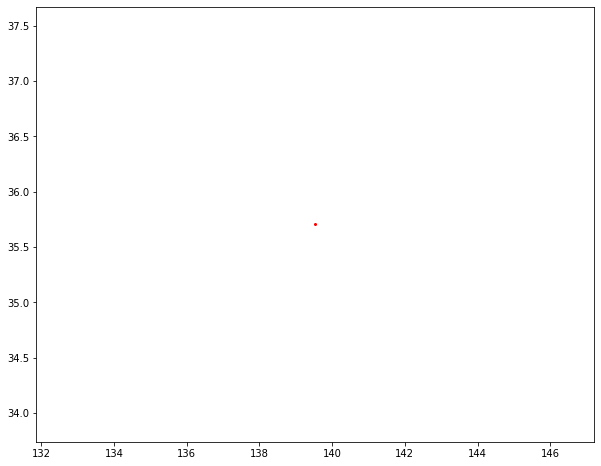

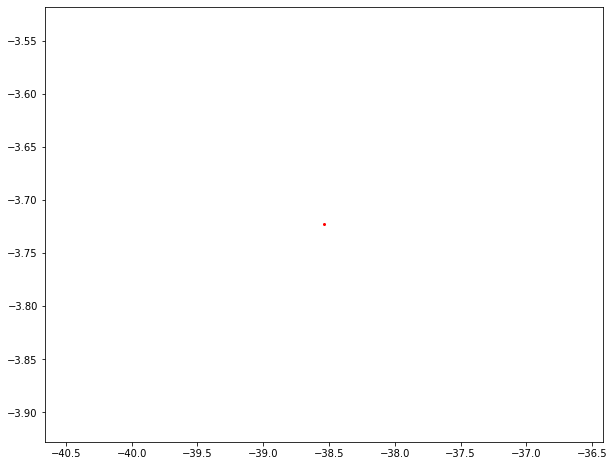

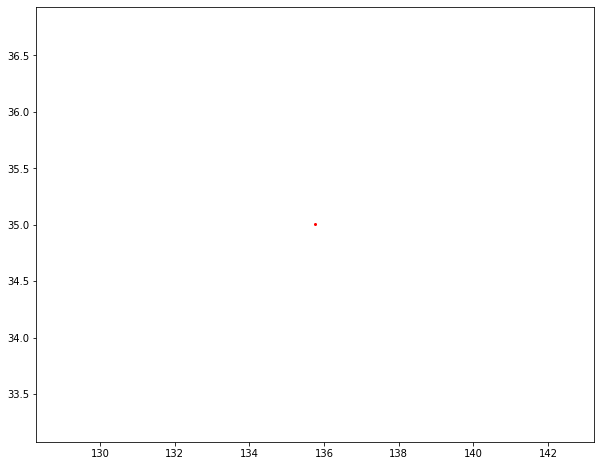

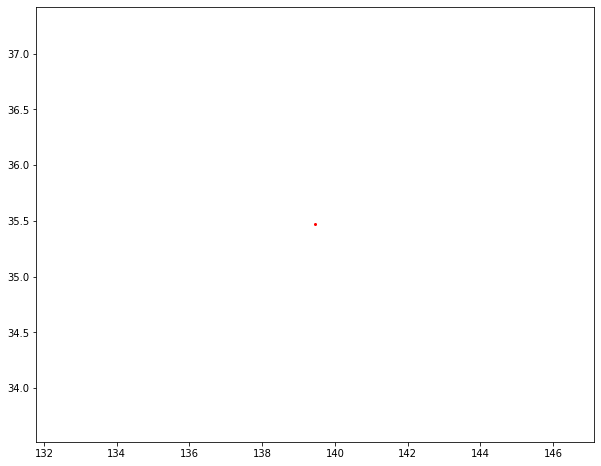

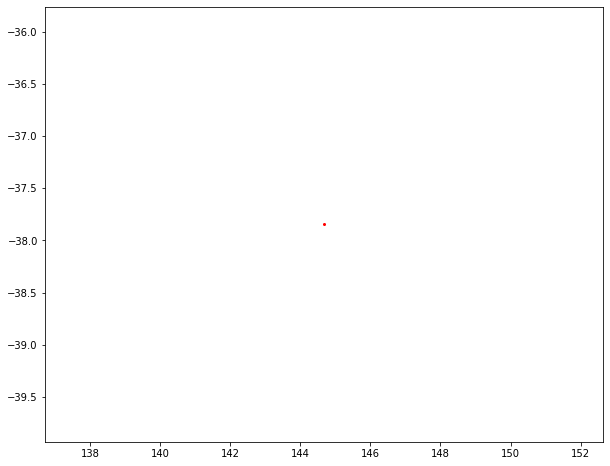

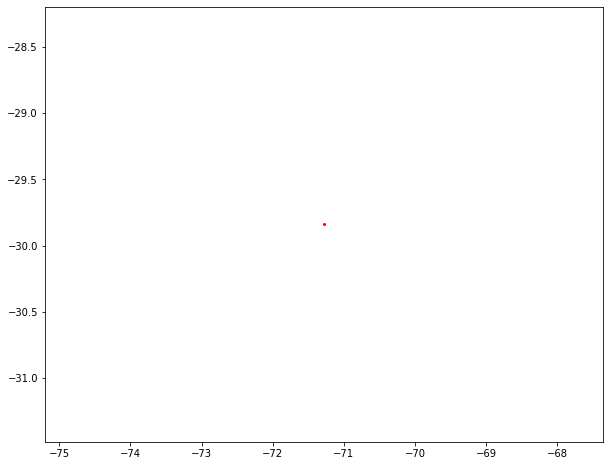

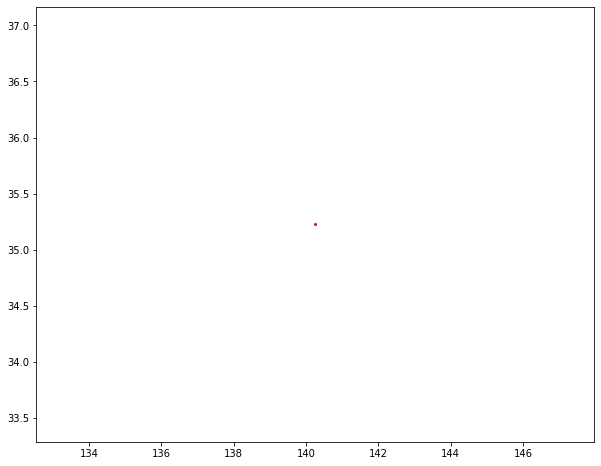

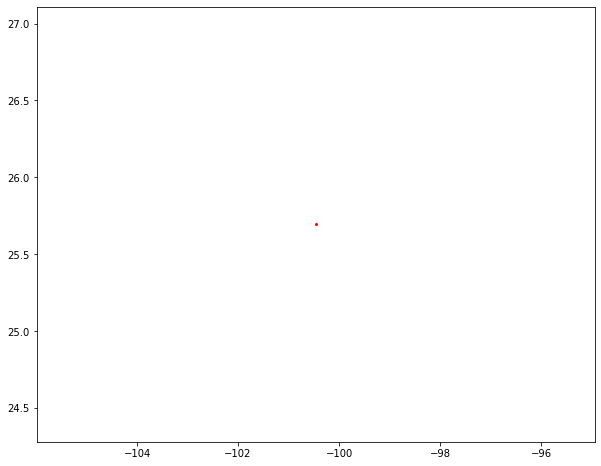

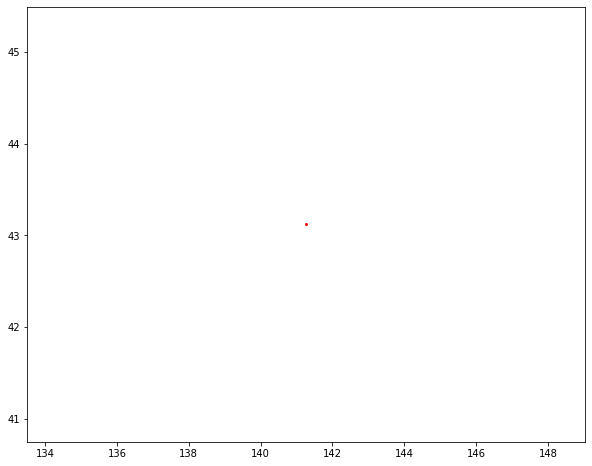

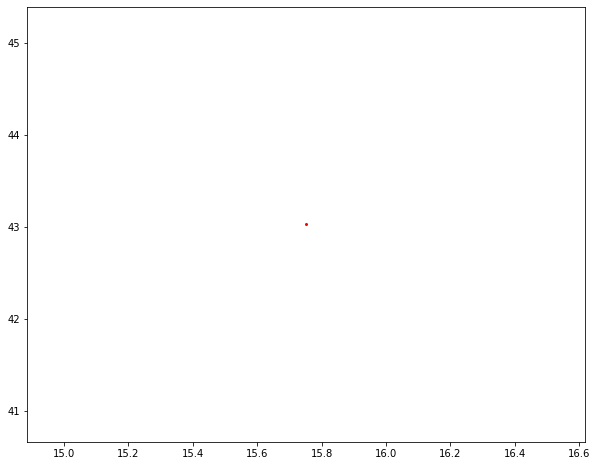

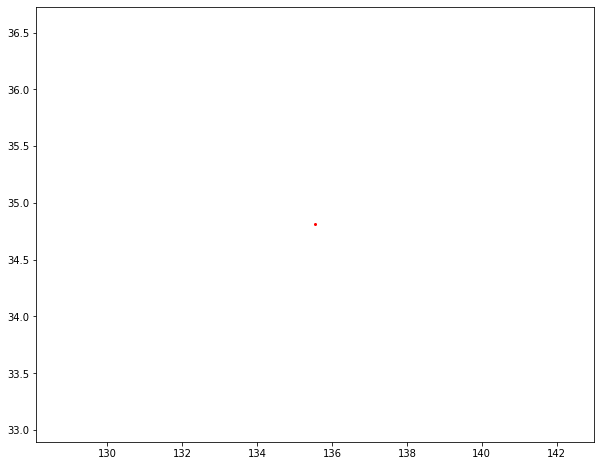

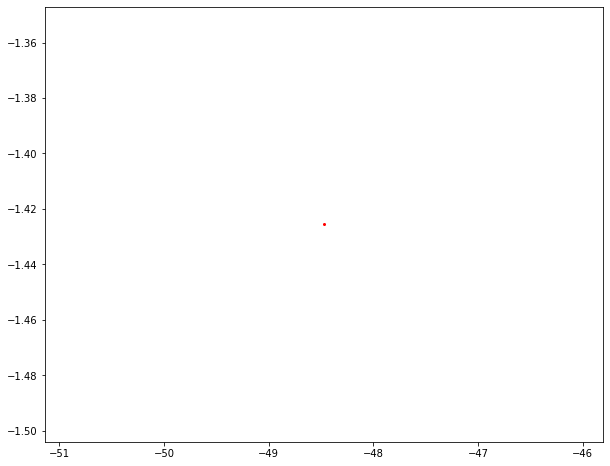

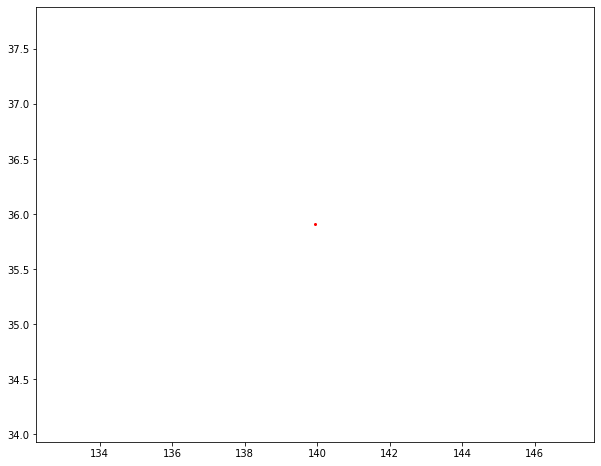

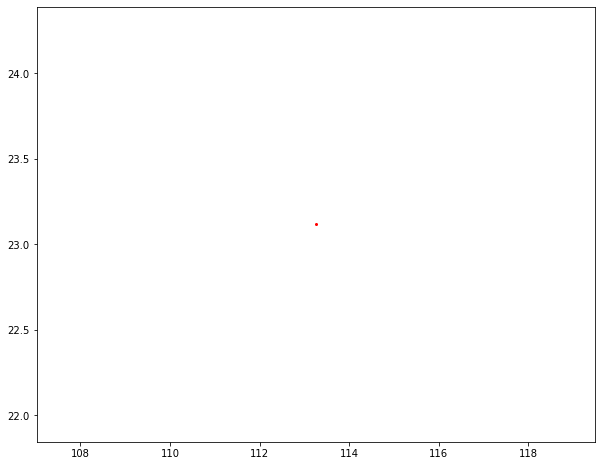

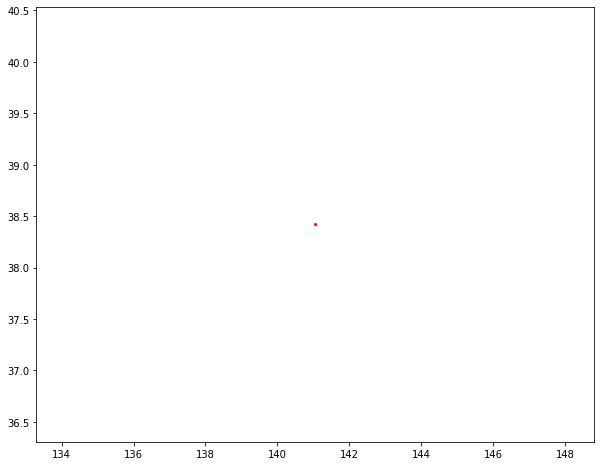

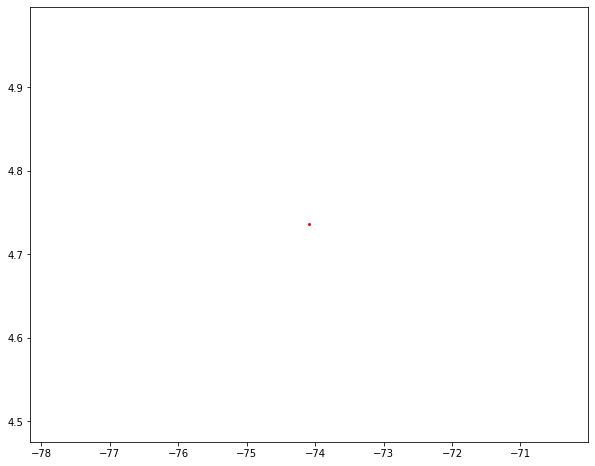

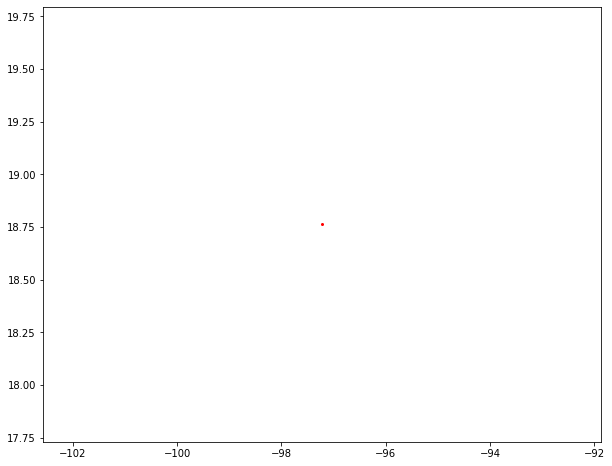

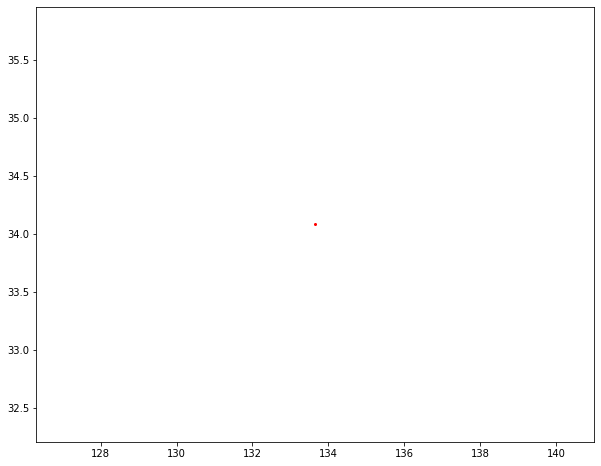

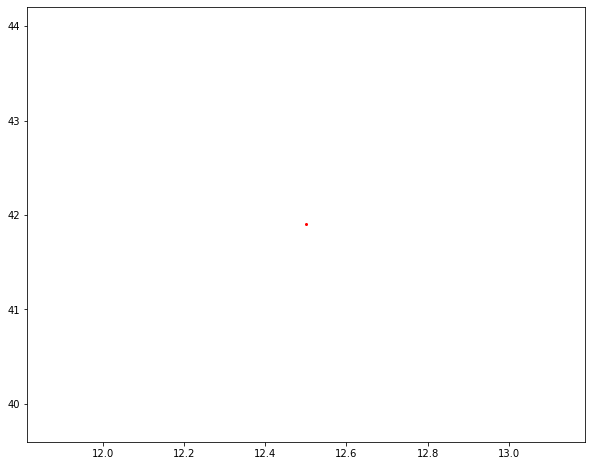

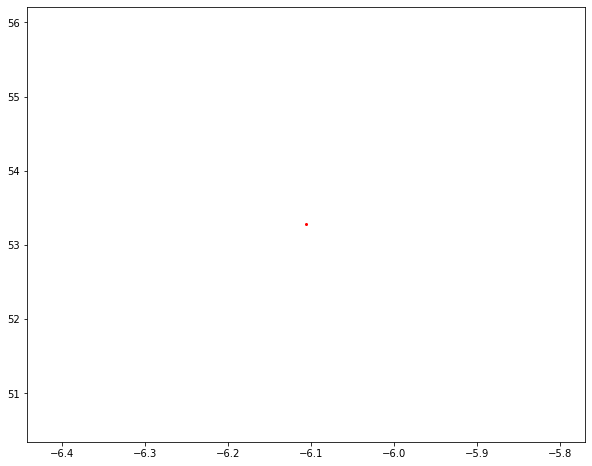

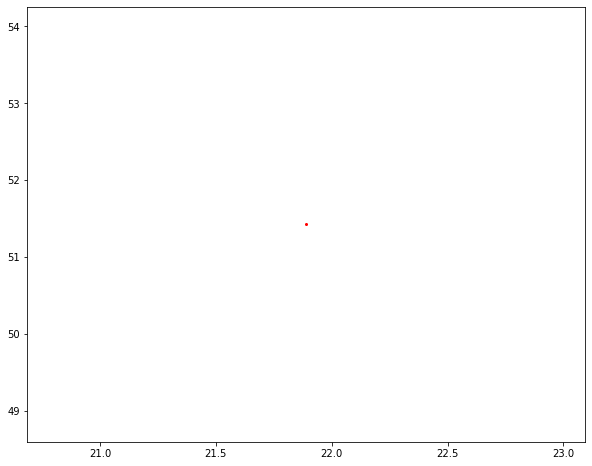

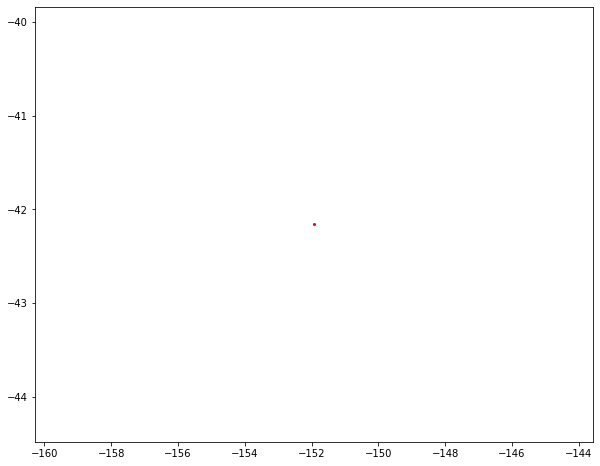

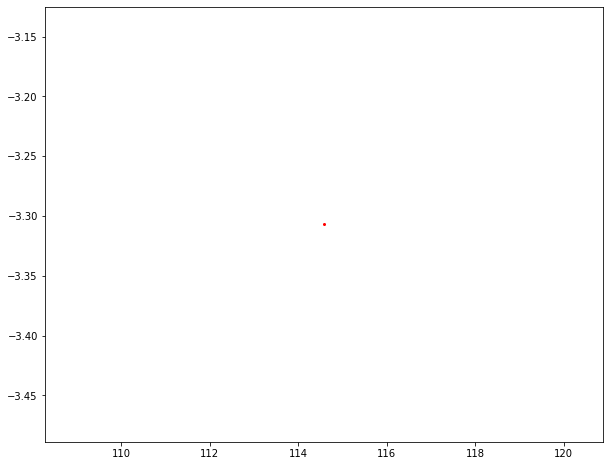

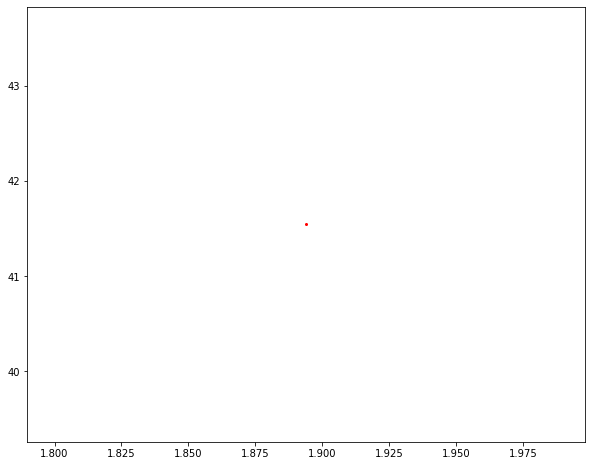

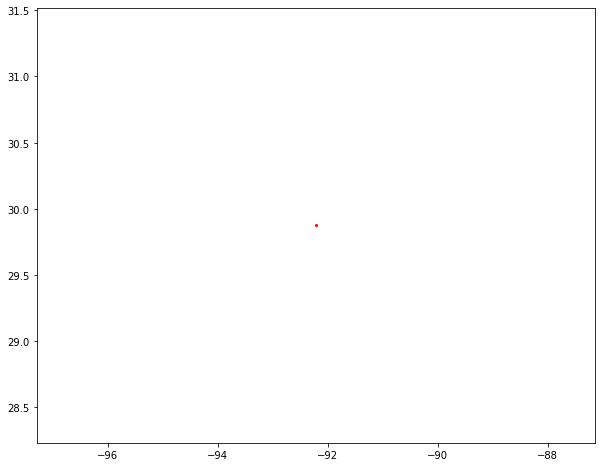

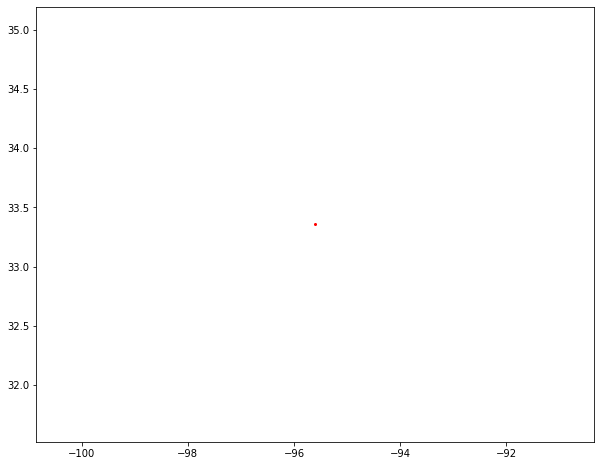

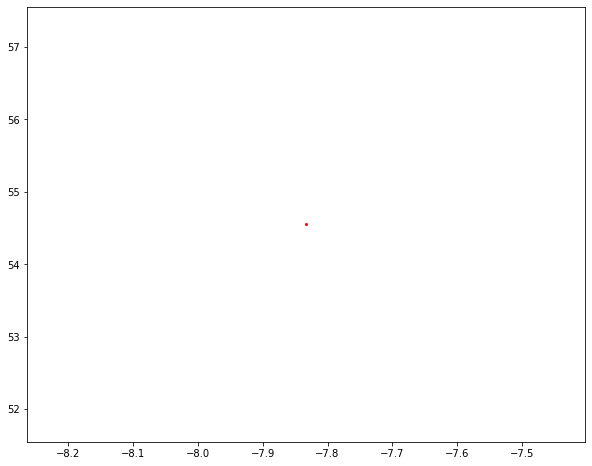

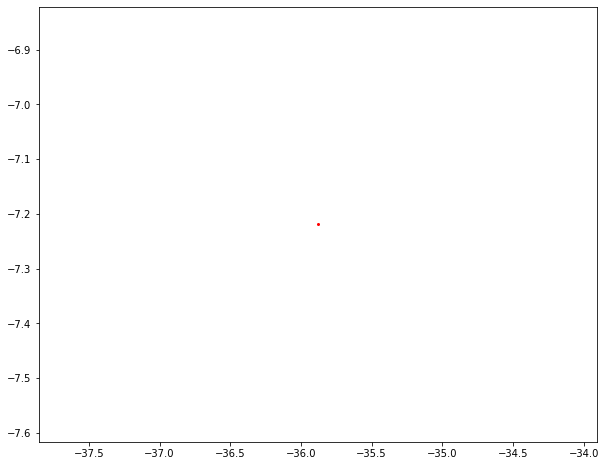

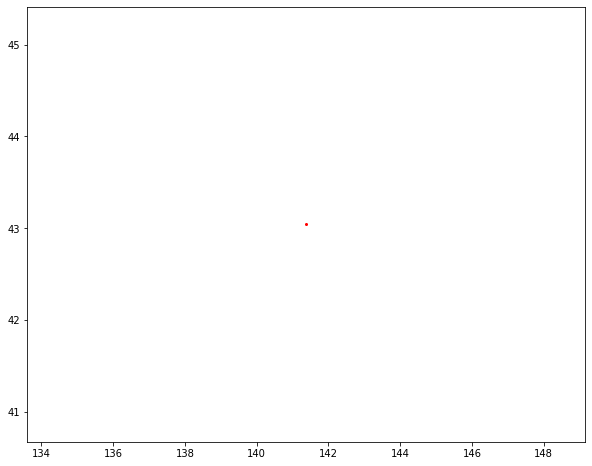

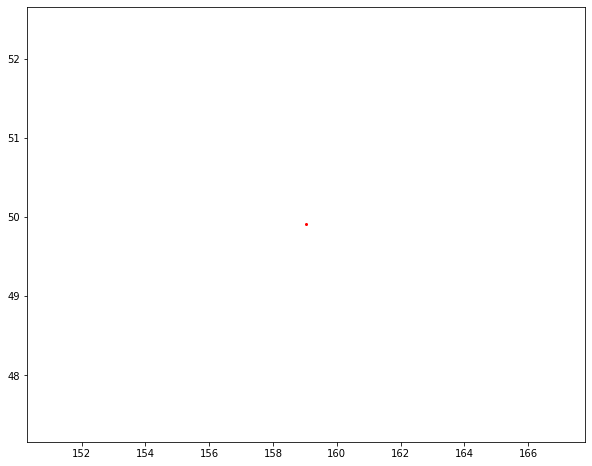

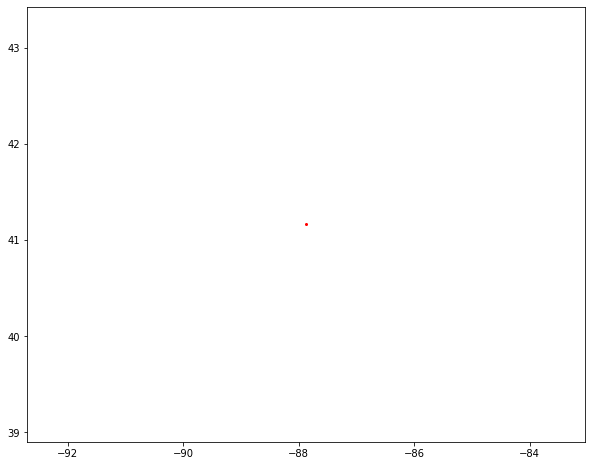

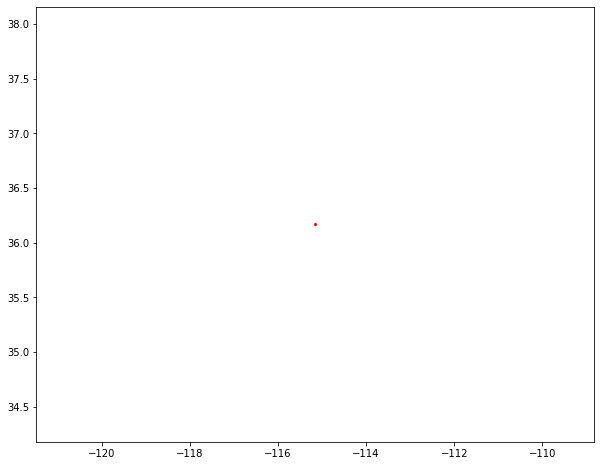

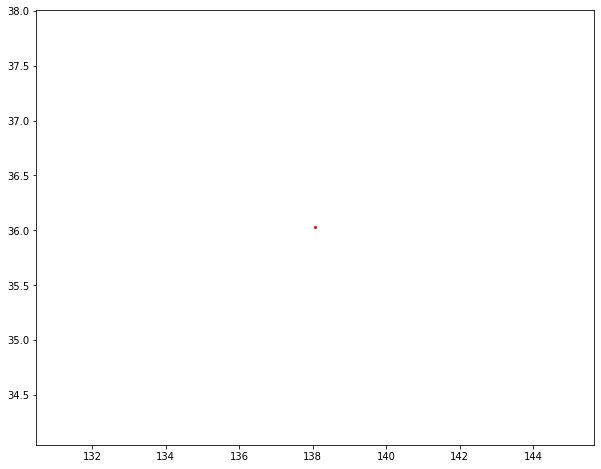

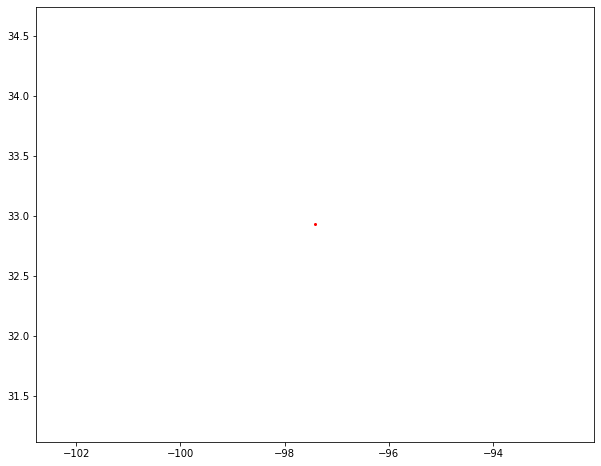

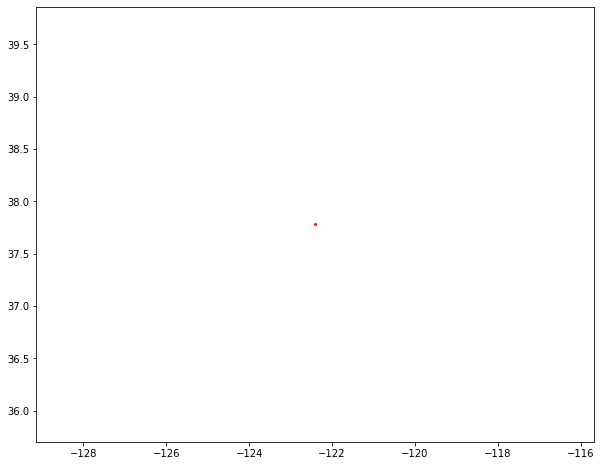

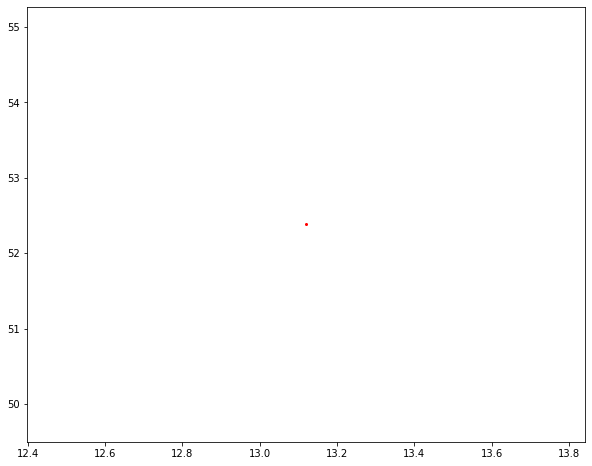

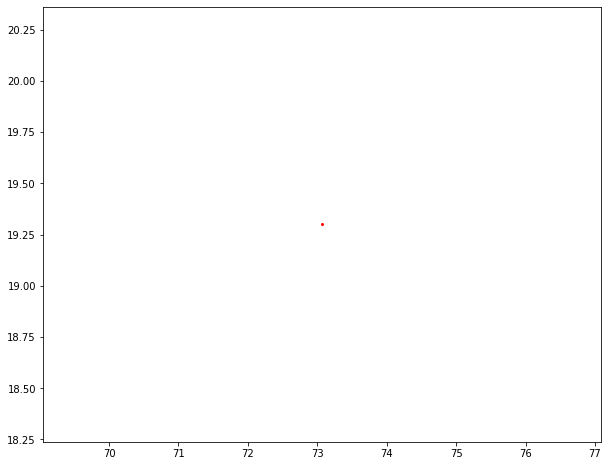

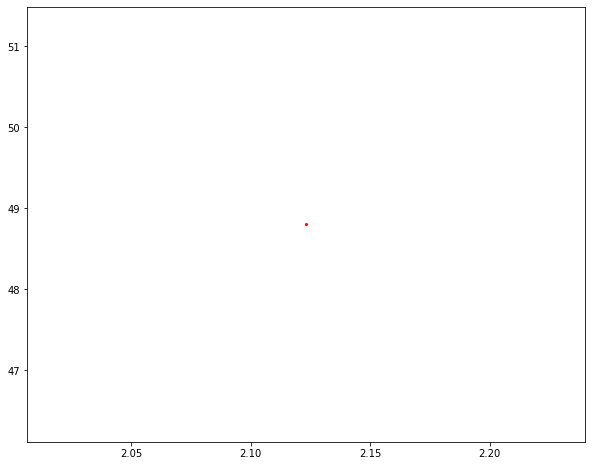

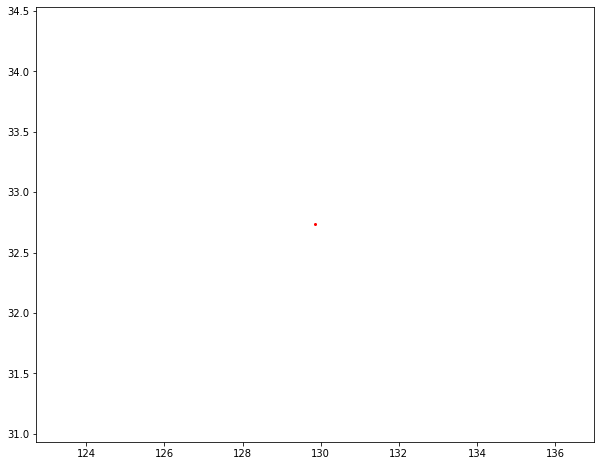

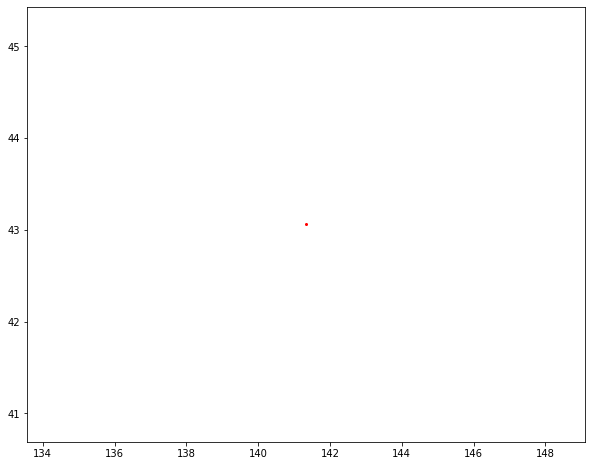

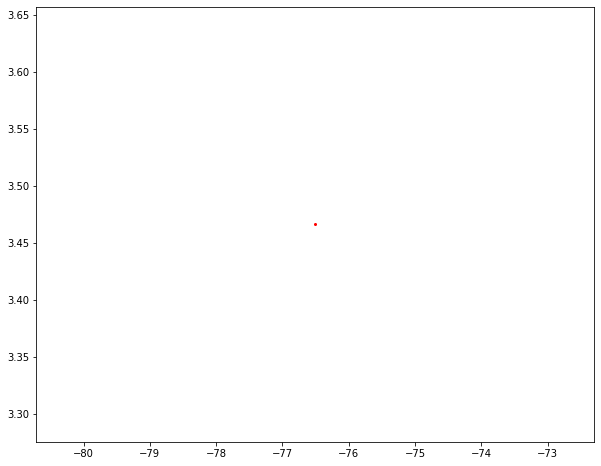

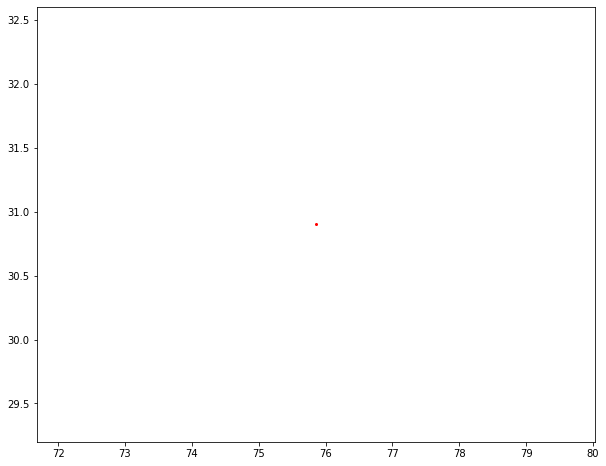

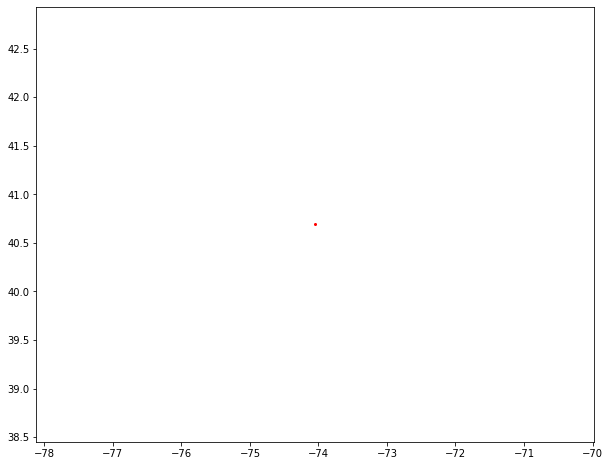

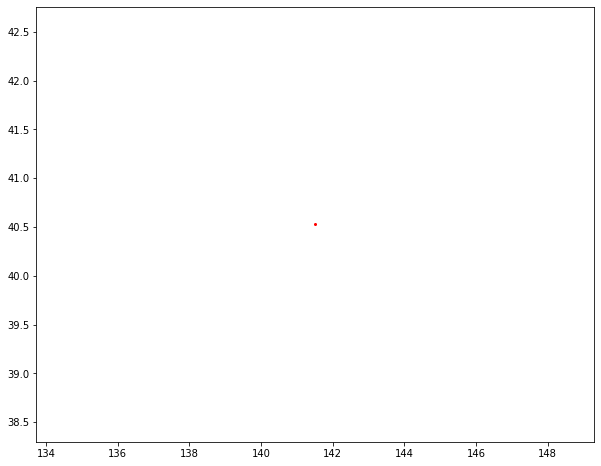

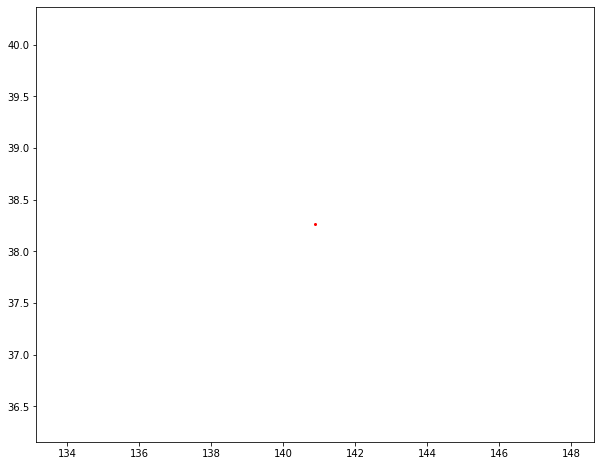

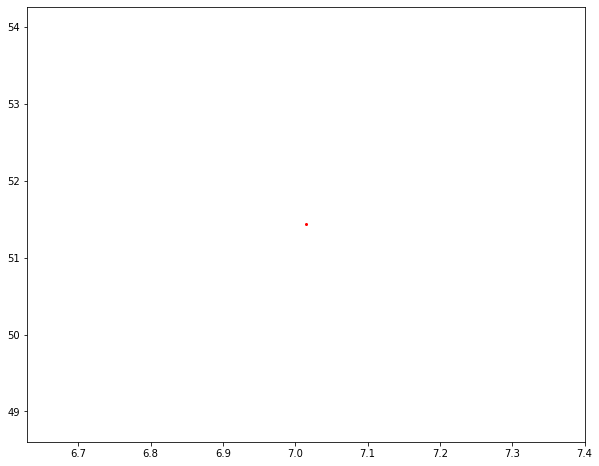

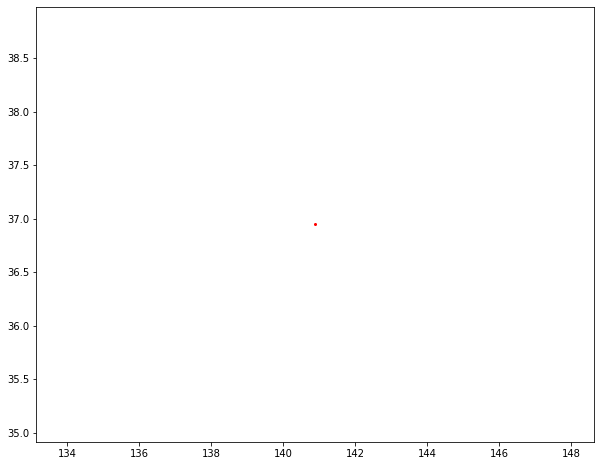

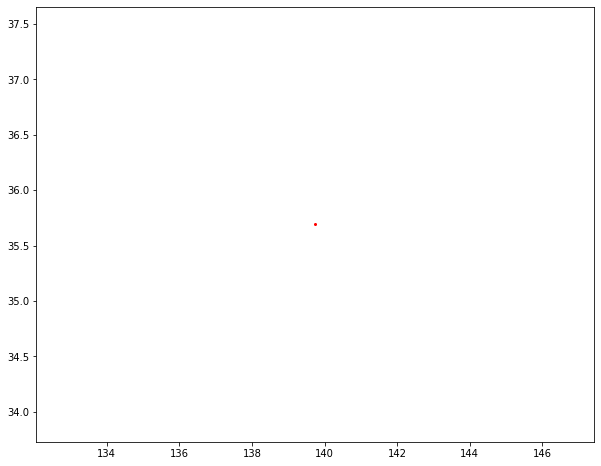

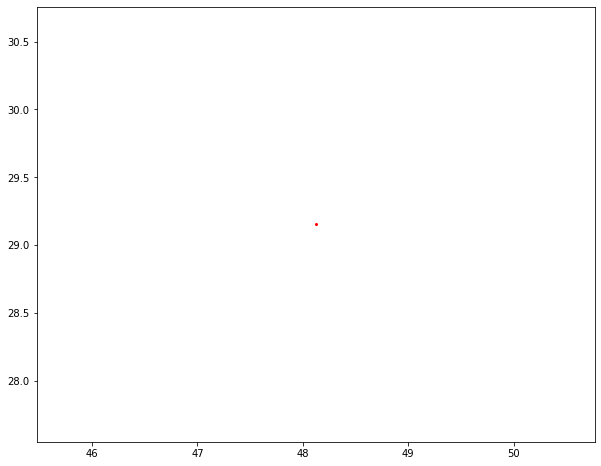

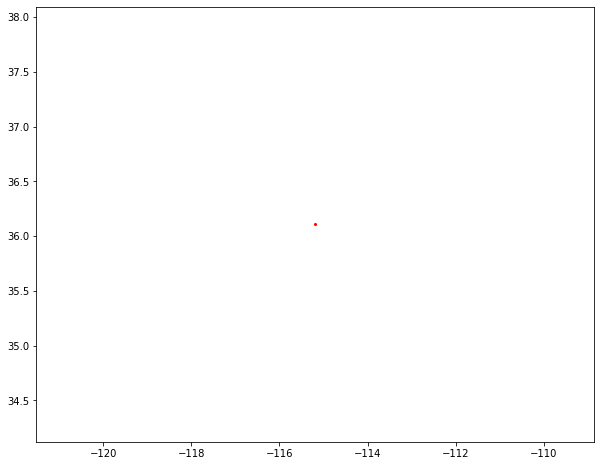

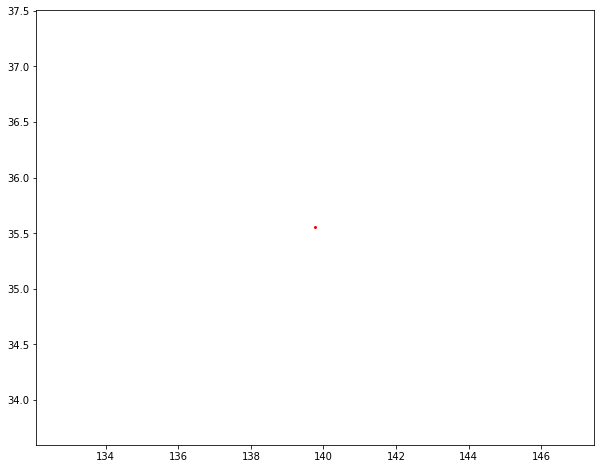

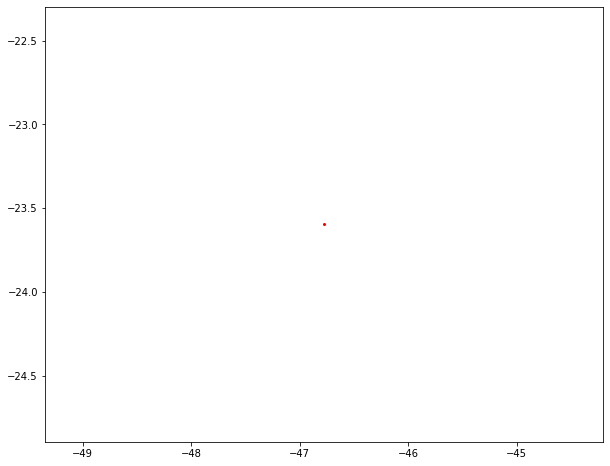

KeyboardInterrupt: 

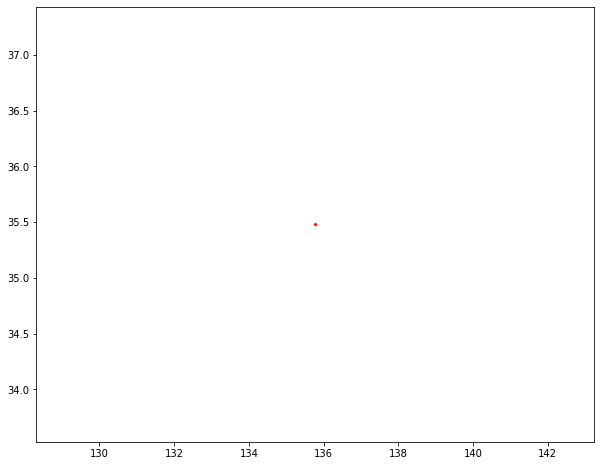

In [55]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import tweepy

#from authentication import authentication  # Consumer and access token/key


class TwitterStreamListener(tweepy.StreamListener):
    """ A listener handles tweets are the received from the stream.
    This is a basic listener that just prints received tweets to stdout.
    """

    def __init__(self):
        super().__init__()
        self.tweet_counter = 0
        self.text_position = self.get_axis_limits(ax)                               # set textbox position
        self.tweet_counter_text = ax.text(self.text_position[0],                    # x position
                                          self.text_position[1],                    # y position
                                          "Tweets : " + str(self.tweet_counter),    # text
                                          fontsize=9,                               # fontsize
                                          ha="center", va="center",                 # position of text in the box
                                          color=(0.30, 0.34, 0.42),                 # textcolor
                                          bbox=dict(                                # fancybox
                                              boxstyle="square,pad=0.3",            # square with padding
                                              ec=(0.85, 0.87, 0.91),                # inner color
                                              fc=(0.93, 0.94, 0.96)                 # border color
                                          ))

    def on_status(self, status):
        if status.coordinates is not None:  # we only care about tweets with coordinates
            self.tweet_counter += 1         # increment our counter
            self.tweet_counter_text.set_text("Tweets : " + str(self.tweet_counter)) # update text
            self.get_tweet(status)

    def on_error(self, status_code):
        if status_code == 403:
            print("The request is understood, but it has been refused or access is not allowed. Limit is maybe reached")
            return False

    @staticmethod
    def get_tweet(tweet):
        x, y = tweet.coordinates['coordinates']  # get coordinates from the tweet
        plt.plot(x, y, 'ro', markersize=2)       # plot the red dot on the map
        plt.pause(0.01)                          # little trick to update the map

    @staticmethod
    def get_axis_limits(axes, scale_x=0.85, scale_y=0.9):
        return axes.get_xlim()[0] * scale_x, (axes.get_ylim()[0] * scale_y)


if __name__ == '__main__':

    # ------------------------------------------------------------------
    # MAP
    # ------------------------------------------------------------------

    # Size of the map
    fig = plt.figure(figsize=(9, 5), dpi=150)

    # Set a title
    plt.title("Tweet's around the world")

    # Declare map projection, size and resolution
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Put a background image on for nice sea rendering
    ax.stock_img()

    # ------------------------------------------------------------------
    # TWEEPY
    # ------------------------------------------------------------------

    # Get access and key from authentication class
   # auth = authentication()

consumer_key='koO4XqTuWFr5ADGcE8kjIkVoU'
consumer_secret='3F4sk9qU8zbKBROuLPUUj1uvE2YuhseXPe0ahMQoivg4icN5bL'
access_token='1230251564616515586-2KqPsCG2mIJp3irRjENgHpCfQUxTUg'
access_token_secret='6PJfMtYGY7w6csiIX9m1S5jFEKNZ3hE9PVkHKeN1S14iM'

    # Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.secure = True
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,                              # credentials
                     wait_on_rate_limit=True,           # Wait if limit is reached
                     wait_on_rate_limit_notify=True,    # Notify is limit is reached
                     retry_count=10,                    # retry counter when error occurs
                     retry_delay=5,                     # seconds between each try
                     retry_errors={401, 404, 500, 503}) # which HTTP status codes to retry

streamListener = TwitterStreamListener()

myStream = tweepy.Stream(auth=api.auth,
                             listener=streamListener)    # our listener

earth_location_coord = [-180, -90, 180, 90]

myStream.filter(locations=earth_location_coord)